In [2]:
import pandas as pd

In [3]:
df_2021 = pd.read_csv("/Users/cristianlarrain/Desktop/SUPERVISED LEARNING/DATA/ValeursFoncieres-2021.txt", sep = "|")
df_2022 = pd.read_csv("/Users/cristianlarrain/Desktop/SUPERVISED LEARNING/DATA/ValeursFoncieres-2022.txt", sep = "|")
df_2023 = pd.read_csv("/Users/cristianlarrain/Desktop/SUPERVISED LEARNING/DATA/ValeursFoncieres-2023.txt", sep = "|")
df_2024 = pd.read_csv("/Users/cristianlarrain/Desktop/SUPERVISED LEARNING/DATA/ValeursFoncieres-2024.txt", sep = "|")

# on ouvre les fichiers txt avec le séparateur.



/var/folders/30/3stkkj955xl3m2frfctdbkgr0000gn/T/ipykernel_96538/1867552120.py:1: DtypeWarning: Columns (18,23,24,26,28,29,30,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2021 = pd.read_csv("/Users/cristianlarrain/Desktop/SUPERVISED LEARNING/DATA/ValeursFoncieres-2021.txt", sep = "|")
/var/folders/30/3stkkj955xl3m2frfctdbkgr0000gn/T/ipykernel_96538/1867552120.py:2: DtypeWarning: Columns (18,23,24,26,28,29,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022 = pd.read_csv("/Users/cristianlarrain/Desktop/SUPERVISED LEARNING/DATA/ValeursFoncieres-2022.txt", sep = "|")
/var/folders/30/3stkkj955xl3m2frfctdbkgr0000gn/T/ipykernel_96538/1867552120.py:3: DtypeWarning: Columns (14,18,23,24,26,28,31,32,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2023 = pd.read_csv("/Users/cristianlarrain/Desktop/SUPERVISED LEARNING/DATA/ValeursFoncieres-2023.txt", sep = "|")
/var/folders/

In [4]:
liste_colonnes = df_2021.columns
print(liste_colonnes)
# on regarde toutes les colonnes que l'on a dans notre dataset

Index(['Identifiant de document', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Type local', 'Identifiant local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')


In [5]:
colonnes_a_conserver = [
    'Valeur fonciere',
    'Nature mutation',
    'Type local',
    'Date mutation',
    'Code departement',
    'Code commune',
    'Commune',
    'Code postal',
    'Surface reelle bati',
    'Surface Carrez du 1er lot',
    'Nombre pieces principales',
    'Nombre de lots']

# comme le fichier est volumineux, je supprime direct les colonnes qui ne m'intéresse pas forcément (comme on va travailler seulement sur la prédiction pour les biens qui sont des appartements)

###  justification de la Sélection des Colonnes

Notre objectif est de créer un **baseline simple et efficace** pour prédire le prix des **appartements** (BUC ciblé), comme l'exigent les consignes du projet.

Nous avons donc sélectionné 11 colonnes sur les 44 disponibles. Ce filtrage est essentiel pour réduire la complexité, la consommation de mémoire et le temps de calcul.

Les colonnes sont choisies selon trois rôles :

---

### 1. La Cible (Y) : Ce que nous prédisons

* **`Valeur fonciere`**
    * **Justification :** C'est notre variable cible. C'est le prix de vente que le modèle doit apprendre à estimer.

---

### 2. Les Filtres : Pour isoler notre BUC

Ces colonnes sont cruciales pour nettoyer les données et se concentrer *uniquement* sur les transactions qui nous intéressent.

* **`Nature mutation`**
    * **Justification :** Le fichier contient des ventes, mais aussi des donations, successions, etc. Nous filtrerons pour ne garder que les **"Vente"**.
* **`Type local`**
    * **Justification :** C'est le cœur de notre BUC. Nous filtrerons pour ne garder que les **"Appartement"** et ainsi exclure les maisons, terrains, et locaux commerciaux qui obéissent à des règles de prix différentes.

---

### 3. Les Features (X) : Ce que le modèle utilise pour prédire

Ce sont les informations que nous fournissons au modèle.

#### 📍 Features Géographiques (Où ?)
* **`Code departement`**
* **`Code commune`**
* **`Code postal`**
    * **Justification :** L'emplacement est le facteur le plus important en immobilier. Ces trois colonnes donnent au modèle cette information de localisation à différentes échelles.

#### 📐 Features de Surface (Quelle taille ?)
* **`Surface reelle bati`**
* **`Surface Carrez du 1er lot`**
    * **Justification :** Le prix est directement corrélé à la surface. Nous gardons les deux pour les explorer (EDA). La `Surface Carrez` est la référence légale pour les appartements et sera *probablement* notre meilleur prédicteur.

#### 🏠 Features du Bien (Quoi d'autre ?)
* **`Nombre pieces principales`**
    * **Justification :** À surface égale, le nombre de pièces (T2, T3...) a un impact direct sur le prix.
* **`Date mutation`**
    * **Justification :** Pour capturer l'évolution des prix sur plusieurs années (tendance du marché, inflation).
* **`Nombre de lots`**
    * **Justification :** Permet d'identifier les ventes complexes (ex: appartement + cave + parking). Pour notre baseline, nous allons probablement filtrer sur `Nombre de lots == 1` pour être sûrs que le prix ne concerne que l'appartement.

In [6]:
fichiers = [
    '/Users/cristianlarrain/Desktop/SUPERVISED LEARNING/DATA/ValeursFoncieres-2021.txt',
    '/Users/cristianlarrain/Desktop/SUPERVISED LEARNING/DATA/ValeursFoncieres-2022.txt',
    '/Users/cristianlarrain/Desktop/SUPERVISED LEARNING/DATA/ValeursFoncieres-2023.txt',
    '/Users/cristianlarrain/Desktop/SUPERVISED LEARNING/DATA/ValeursFoncieres-2024.txt']

In [7]:
df_complet = pd.concat(
    [
        pd.read_csv(
            f, 
            sep='|', 
            usecols=colonnes_a_conserver, 
            low_memory=False
        ) 
        for f in fichiers
    ], 
    ignore_index=True
)

In [8]:
df_complet.head()
df=df_complet

In [9]:
df.head(-10)

Date mutation Nature mutation Valeur fonciere  Code postal  \
0           05/01/2021           Vente       185000,00       1370.0   
1           05/01/2021           Vente       185000,00       1370.0   
2           06/01/2021           Vente           10,00       1290.0   
3           04/01/2021           Vente       204332,00       1310.0   
4           06/01/2021           Vente       320000,00       1250.0   
...                ...             ...             ...          ...   
16650644    05/12/2024    Adjudication      5050000,00      75016.0   
16650645    05/12/2024    Adjudication      5050000,00      75016.0   
16650646    05/12/2024    Adjudication      5050000,00      75016.0   
16650647    05/12/2024    Adjudication      5050000,00      75016.0   
16650648    05/12/2024    Adjudication      5050000,00      75016.0   

                Commune Code departement  Code commune  \
0         VAL-REVERMONT               01           426   
1         VAL-REVERMONT               01           426   
2                   BEY               01            42   
3               BUELLAS               01            65   
4             MONTAGNAT               01           254   
...                 ...              ...           ...   
16650644       PARIS 16               75           116   
16650645       PARIS 16               75           116   
16650646       PARIS 16               75           116   
16650647       PARIS 16               75           116   
16650648       PARIS 16               75           116   

         Surface Carrez du 1er lot  Nombre de lots   Type local  \
0                              NaN               0   Dépendance   
1                              NaN               0       Maison   
2                              NaN               0          NaN   
3                              NaN               0       Maison   
4                              NaN               0   Dépendance   
...                            ...             ...          ...   
16650644                       NaN               2  Appartement   
16650645                       NaN               2   Dépendance   
16650646                       NaN               2   Dépendance   
16650647                       NaN               2   Dépendance   
16650648                       NaN               2   Dépendance   

          Surface reelle bati  Nombre pieces principales  
0                         0.0                        0.0  
1                        97.0                        5.0  
2                         NaN                        NaN  
3                        88.0                        4.0  
4                         0.0                        0.0  
...                       ...                        ...  
16650644                241.0                        8.0  
16650645                  0.0                        0.0  
16650646                  0.0                        0.0  
16650647                  0.0                        0.0  
16650648                  0.0                        0.0  

[16650649 rows x 12 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650659 entries, 0 to 16650658
Data columns (total 12 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Date mutation              object 
 1   Nature mutation            object 
 2   Valeur fonciere            object 
 3   Code postal                float64
 4   Commune                    object 
 5   Code departement           object 
 6   Code commune               int64  
 7   Surface Carrez du 1er lot  object 
 8   Nombre de lots             int64  
 9   Type local                 object 
 10  Surface reelle bati        float64
 11  Nombre pieces principales  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1.5+ GB


In [11]:
# Renommer la colonne 'ancien_nom' en 'nouveau_nom'
df = df.rename(columns={'Type local': 'type_local'})



In [12]:

valeurs_uniques = df['type_local'].value_counts()
print(valeurs_uniques)

type_local
Dépendance                                  4291497
Maison                                      2734726
Appartement                                 2349920
Local industriel. commercial ou assimilé     530532
Name: count, dtype: int64


In [ ]:
df = df[df['type_local'] == "Appartement"]



In [14]:
df = df.rename(columns={'Nature mutation': 'nature_mutation'})
df = df.rename(columns={'Date mutation': 'date_mutation'})
df = df.rename(columns={'Valeur fonciere': 'valeur_foncière'})
df = df.rename(columns={'Code postal': 'code_postal'})
df = df.rename(columns={'Commune': 'commune'})
df = df.rename(columns={'Code departement': 'code_departement'})
df = df.rename(columns={'Code commune': 'code_commune'})
df = df.rename(columns={'Nombre de lots': 'nombre_de_lots'})





In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2349920 entries, 8 to 16650657
Data columns (total 12 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   date_mutation              object 
 1   nature_mutation            object 
 2   valeur_foncière            object 
 3   code_postal                float64
 4   commune                    object 
 5   code_departement           object 
 6   code_commune               int64  
 7   Surface Carrez du 1er lot  object 
 8   nombre_de_lots             int64  
 9   type_local                 object 
 10  Surface reelle bati        float64
 11  Nombre pieces principales  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 233.1+ MB


In [16]:
df["nature_mutation"].value_counts()
# on ne garde pas echange car la valeur est alors une approximation administratice
# la vente d'un terrain à batir n est pas concerné par notre cas
# adjudication est une vente aux enchères, pas prix de marché classique
# expropriation est une indemnisation de l'état, pas un prix de marché 


nature_mutation
Vente                                 2237338
Vente en l'état futur d'achèvement      94603
Adjudication                             8540
Echange                                  7892
Vente terrain à bâtir                    1056
Expropriation                             491
Name: count, dtype: int64

In [17]:
df = df[
    (df['nature_mutation'] == 'Vente') | 
    (df['nature_mutation'] == "Vente en l'état futur d'achèvement")
]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2331941 entries, 8 to 16650656
Data columns (total 12 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   date_mutation              object 
 1   nature_mutation            object 
 2   valeur_foncière            object 
 3   code_postal                float64
 4   commune                    object 
 5   code_departement           object 
 6   code_commune               int64  
 7   Surface Carrez du 1er lot  object 
 8   nombre_de_lots             int64  
 9   type_local                 object 
 10  Surface reelle bati        float64
 11  Nombre pieces principales  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 231.3+ MB


In [19]:
# Convertit en texte (sécurité), prend les 4 premiers caractères, PUIS compte les valeurs
df['date_mutation'].astype(str).str[-4:].value_counts()

date_mutation
2021    685412
2022    674281
2023    519372
2024    452876
Name: count, dtype: int64

In [20]:
df.head(20)

date_mutation                     nature_mutation valeur_foncière  \
8      04/01/2021                               Vente       176000,00   
25     08/01/2021                               Vente       129150,00   
35     04/01/2021                               Vente       165000,00   
47     04/01/2021                               Vente       143000,00   
50     05/01/2021  Vente en l'état futur d'achèvement       339000,00   
52     05/01/2021                               Vente        57000,00   
55     07/01/2021                               Vente        72000,00   
57     07/01/2021                               Vente        72000,00   
63     12/01/2021  Vente en l'état futur d'achèvement       196000,00   
84     06/01/2021                               Vente       243000,00   
98     11/01/2021                               Vente       185000,00   
111    15/01/2021                               Vente        76000,00   
133    12/01/2021                               Vente       115000,00   
193    19/01/2021                               Vente        68000,00   
204    21/01/2021                               Vente       100000,00   
205    21/01/2021                               Vente       100000,00   
206    21/01/2021                               Vente       100000,00   
207    21/01/2021                               Vente       100000,00   
210    15/01/2021                               Vente       164000,00   
212    07/01/2021                               Vente       260000,00   

     code_postal                  commune code_departement  code_commune  \
8         1000.0    SAINT-DENIS-LES-BOURG               01           344   
25        1750.0  SAINT-LAURENT-SUR-SAONE               01           370   
35        1000.0          BOURG-EN-BRESSE               01            53   
47        1960.0                 PERONNAS               01           289   
50        1000.0    SAINT-DENIS-LES-BOURG               01           344   
52        1000.0          BOURG-EN-BRESSE               01            53   
55        1000.0          BOURG-EN-BRESSE               01            53   
57        1000.0          BOURG-EN-BRESSE               01            53   
63        1000.0    SAINT-DENIS-LES-BOURG               01           344   
84        1000.0          BOURG-EN-BRESSE               01            53   
98        1000.0          BOURG-EN-BRESSE               01            53   
111       1000.0          BOURG-EN-BRESSE               01            53   
133       1000.0          BOURG-EN-BRESSE               01            53   
193       1000.0          BOURG-EN-BRESSE               01            53   
204       1370.0    SAINT-ETIENNE-DU-BOIS               01           350   
205       1370.0    SAINT-ETIENNE-DU-BOIS               01           350   
206       1370.0    SAINT-ETIENNE-DU-BOIS               01           350   
207       1370.0    SAINT-ETIENNE-DU-BOIS               01           350   
210       1000.0          BOURG-EN-BRESSE               01            53   
212       1000.0          BOURG-EN-BRESSE               01            53   

    Surface Carrez du 1er lot  nombre_de_lots   type_local  \
8                         NaN               1  Appartement   
25                      63,57               1  Appartement   
35                      66,76               2  Appartement   
47                        NaN               2  Appartement   
50                        NaN               1  Appartement   
52                      37,56               1  Appartement   
55                        NaN               2  Appartement   
57                        NaN               2  Appartement   
63                        NaN               1  Appartement   
84                      89,62               1  Appartement   
98                        NaN               2  Appartement   
111                       NaN               1  Appartement   
133                       NaN               3  Appartement   
193  

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2331941 entries, 8 to 16650656
Data columns (total 12 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   date_mutation              object 
 1   nature_mutation            object 
 2   valeur_foncière            object 
 3   code_postal                float64
 4   commune                    object 
 5   code_departement           object 
 6   code_commune               int64  
 7   Surface Carrez du 1er lot  object 
 8   nombre_de_lots             int64  
 9   type_local                 object 
 10  Surface reelle bati        float64
 11  Nombre pieces principales  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 231.3+ MB


In [22]:
df_clean = df[df['nombre_de_lots'] == 1]

In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1071301 entries, 8 to 16650652
Data columns (total 12 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   date_mutation              1071301 non-null  object 
 1   nature_mutation            1071301 non-null  object 
 2   valeur_foncière            1070004 non-null  object 
 3   code_postal                1071249 non-null  float64
 4   commune                    1071301 non-null  object 
 5   code_departement           1071301 non-null  object 
 6   code_commune               1071301 non-null  int64  
 7   Surface Carrez du 1er lot  624915 non-null   object 
 8   nombre_de_lots             1071301 non-null  int64  
 9   type_local                 1071301 non-null  object 
 10  Surface reelle bati        1071026 non-null  float64
 11  Nombre pieces principales  1071026 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 106.3+ MB


In [24]:
df_clean['valeur_foncière'] = pd.to_numeric(
    df_clean['valeur_foncière'].str.replace(',', '.'), 
    errors='coerce'
)

# 'Surface Carrez du 1er lot' (Object -> Float)
df_clean['Surface Carrez du 1er lot'] = pd.to_numeric(
    df_clean['Surface Carrez du 1er lot'].str.replace(',', '.'), 
    errors='coerce'
)

# 'Date mutation' (Object -> Datetime)
# errors='coerce' gère les dates invalides
df_clean['date_mutation'] = pd.to_datetime(
    df_clean['date_mutation'], 
    format='%d/%m/%Y', 
    errors='coerce'
)

# 'Code postal' (Float -> String)
# .astype(str).str.split('.').str[0] est une façon de gérer la conversion float->str
df_clean['code_postal'] = df_clean['code_postal'].astype(str).str.split('.').str[0]

/var/folders/30/3stkkj955xl3m2frfctdbkgr0000gn/T/ipykernel_96538/2250870047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['valeur_foncière'] = pd.to_numeric(
/var/folders/30/3stkkj955xl3m2frfctdbkgr0000gn/T/ipykernel_96538/2250870047.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Surface Carrez du 1er lot'] = pd.to_numeric(
/var/folders/30/3stkkj955xl3m2frfctdbkgr0000gn/T/ipykernel_96538/2250870047.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [25]:
df_clean

date_mutation                     nature_mutation  valeur_foncière  \
8           2021-01-04                               Vente         176000.0   
25          2021-01-08                               Vente         129150.0   
50          2021-01-05  Vente en l'état futur d'achèvement         339000.0   
52          2021-01-05                               Vente          57000.0   
63          2021-01-12  Vente en l'état futur d'achèvement         196000.0   
...                ...                                 ...              ...   
16650632    2024-12-27                               Vente        1240000.0   
16650637    2024-12-30                               Vente         258000.0   
16650640    2024-05-13                               Vente         344762.0   
16650650    2024-12-27                               Vente         154000.0   
16650652    2024-12-27                               Vente         154000.0   

         code_postal                  commune code_departement  code_commune  \
8               1000    SAINT-DENIS-LES-BOURG               01           344   
25              1750  SAINT-LAURENT-SUR-SAONE               01           370   
50              1000    SAINT-DENIS-LES-BOURG               01           344   
52              1000          BOURG-EN-BRESSE               01            53   
63              1000    SAINT-DENIS-LES-BOURG               01           344   
...              ...                      ...              ...           ...   
16650632       75016                 PARIS 16               75           116   
16650637       75012                 PARIS 12               75           112   
16650640       75015                 PARIS 15               75           115   
16650650       75011                 PARIS 11               75           111   
16650652       75011                 PARIS 11               75           111   

          Surface Carrez du 1er lot  nombre_de_lots   type_local  \
8                               NaN               1  Appartement   
25                            63.57               1  Appartement   
50                              NaN               1  Appartement   
52                            37.56               1  Appartement   
63                              NaN               1  Appartement   
...                             ...             ...          ...   
16650632                        NaN               1  Appartement   
16650637                        NaN               1  Appartement   
16650640                      35.02               1  Appartement   
16650650                        NaN               1  Appartement   
16650652                      33.15               1  Appartement   

          Surface reelle bati  Nombre pieces principales  
8                        71.0                        3.0  
25                       64.0                        3.0  
50                      115.0                        4.0  
52                       37.0                        1.0  
63                       70.0                        3.0  
...                       ...                        ...  
16650632                100.0                        4.0  
16650637                 24.0                        2.0  
16650640                 35.0                        1.0  
16650650                 40.0                        2.0  
16650652                 29.0                        2.0  

[1071301 rows x 12 columns]

In [26]:
df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1071301 entries, 8 to 16650652
Data columns (total 12 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   date_mutation              1071301 non-null  datetime64[ns]
 1   nature_mutation            1071301 non-null  object        
 2   valeur_foncière            1070004 non-null  float64       
 3   code_postal                1071301 non-null  object        
 4   commune                    1071301 non-null  object        
 5   code_departement           1071301 non-null  object        
 6   code_commune               1071301 non-null  int64         
 7   Surface Carrez du 1er lot  624915 non-null   float64       
 8   nombre_de_lots             1071301 non-null  int64         
 9   type_local                 1071301 non-null  object        
 10  Surface reelle bati        1071026 non-null  float64       
 11  Nombre pieces principales  1071026 non-nu

date_mutation                     nature_mutation  valeur_foncière  \
8     2021-01-04                               Vente         176000.0   
25    2021-01-08                               Vente         129150.0   
50    2021-01-05  Vente en l'état futur d'achèvement         339000.0   
52    2021-01-05                               Vente          57000.0   
63    2021-01-12  Vente en l'état futur d'achèvement         196000.0   

   code_postal                  commune code_departement  code_commune  \
8         1000    SAINT-DENIS-LES-BOURG               01           344   
25        1750  SAINT-LAURENT-SUR-SAONE               01           370   
50        1000    SAINT-DENIS-LES-BOURG               01           344   
52        1000          BOURG-EN-BRESSE               01            53   
63        1000    SAINT-DENIS-LES-BOURG               01           344   

    Surface Carrez du 1er lot  nombre_de_lots   type_local  \
8                         NaN               1  Appartement   
25                      63.57               1  Appartement   
50                        NaN               1  Appartement   
52                      37.56               1  Appartement   
63                        NaN               1  Appartement   

    Surface reelle bati  Nombre pieces principales  
8                  71.0                        3.0  
25                 64.0                        3.0  
50                115.0                        4.0  
52                 37.0                        1.0  
63                 70.0                        3.0

In [27]:
df_clean = df_clean.drop_duplicates() # suppression des doublons
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1040167 entries, 8 to 16650652
Data columns (total 12 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   date_mutation              1040167 non-null  datetime64[ns]
 1   nature_mutation            1040167 non-null  object        
 2   valeur_foncière            1039384 non-null  float64       
 3   code_postal                1040167 non-null  object        
 4   commune                    1040167 non-null  object        
 5   code_departement           1040167 non-null  object        
 6   code_commune               1040167 non-null  int64         
 7   Surface Carrez du 1er lot  620294 non-null   float64       
 8   nombre_de_lots             1040167 non-null  int64         
 9   type_local                 1040167 non-null  object        
 10  Surface reelle bati        1039896 non-null  float64       
 11  Nombre pieces principales  1039896 non-nu

In [28]:
# On repart de votre DataFrame 'df_clean'
df_step3 = df_clean.copy()


# --- 0. (Rattrapage) Correction du type 'Code postal' (float -> object) ---
# Un code postal est un identifiant, pas un nombre.
df_step3['code_postal'] = df_step3['code_postal'].astype(str).str.split('.').str[0]


# --- 1. Unification des colonnes de surface ---
#
# On crée 'surface_m2' en priorisant 'Surface Carrez' (très fiable pour les appartements).
# Si 'Surface Carrez' est NaN, on utilise 'Surface reelle bati' comme plan B.
df_step3['surface_m2'] = df_step3['Surface Carrez du 1er lot'].fillna(df_step3['Surface reelle bati'])


# --- 2. Suppression des NaN ---
#
# On définit les colonnes où les valeurs sont OBLIGATOIRES.
colonnes_critiques = [
    'valeur_foncière', 
    'surface_m2',                # Notre nouvelle colonne de surface
    'Nombre pieces principales', 
    'code_commune'
]

taille_avant_nan = len(df_step3)
df_step3.dropna(subset=colonnes_critiques, inplace=True)
taille_apres_nan = len(df_step3)
print(f"-> {taille_avant_nan - taille_apres_nan} lignes supprimées (cause: NaN).")


# --- 3. Suppression des Zéros invalides ---
#
# On supprime les lignes où le prix, la surface ou le nb de pièces est 0.

taille_avant_zeros = len(df_step3)
df_step3 = df_step3[df_step3['valeur_foncière'] > 0]
df_step3 = df_step3[df_step3['surface_m2'] > 0]
df_step3 = df_step3[df_step3['Nombre pieces principales'] > 0]
taille_apres_zeros = len(df_step3)
print(f"-> {taille_avant_zeros - taille_apres_zeros} lignes supprimées (cause: valeurs à 0).")


# --- 4. Nettoyage final des colonnes ---
#
# Maintenant que 'surface_m2' est créée, on supprime les colonnes de surface originales
# (et 'Commune', qui est redondante avec 'Code commune')
colonnes_a_supprimer = [
    'Surface Carrez du 1er lot', 
    'Surface reelle bati',
]
df_step3 = df_step3.drop(columns=colonnes_a_supprimer)

# (Optionnel) Conversion du nombre de pièces en entier
df_step3['Nombre pieces principales'] = df_step3['Nombre pieces principales'].astype(int)


df_step3.info()

-> 1054 lignes supprimées (cause: NaN).
-> 2823 lignes supprimées (cause: valeurs à 0).
<class 'pandas.core.frame.DataFrame'>
Index: 1036290 entries, 8 to 16650652
Data columns (total 11 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   date_mutation              1036290 non-null  datetime64[ns]
 1   nature_mutation            1036290 non-null  object        
 2   valeur_foncière            1036290 non-null  float64       
 3   code_postal                1036290 non-null  object        
 4   commune                    1036290 non-null  object        
 5   code_departement           1036290 non-null  object        
 6   code_commune               1036290 non-null  int64         
 7   nombre_de_lots             1036290 non-null  int64         
 8   type_local                 1036290 non-null  object        
 9   Nombre pieces principales  1036290 non-null  int64         
 10  surface_m2        

In [29]:
df_step3.head()

date_mutation                     nature_mutation  valeur_foncière  \
8     2021-01-04                               Vente         176000.0   
25    2021-01-08                               Vente         129150.0   
50    2021-01-05  Vente en l'état futur d'achèvement         339000.0   
52    2021-01-05                               Vente          57000.0   
63    2021-01-12  Vente en l'état futur d'achèvement         196000.0   

   code_postal                  commune code_departement  code_commune  \
8         1000    SAINT-DENIS-LES-BOURG               01           344   
25        1750  SAINT-LAURENT-SUR-SAONE               01           370   
50        1000    SAINT-DENIS-LES-BOURG               01           344   
52        1000          BOURG-EN-BRESSE               01            53   
63        1000    SAINT-DENIS-LES-BOURG               01           344   

    nombre_de_lots   type_local  Nombre pieces principales  surface_m2  
8                1  Appartement                          3       71.00  
25               1  Appartement                          3       63.57  
50               1  Appartement                          4      115.00  
52               1  Appartement                          1       37.56  
63               1  Appartement                          3       70.00

In [30]:
df_step3['nature_mutation'].value_counts()

nature_mutation
Vente                                 950247
Vente en l'état futur d'achèvement     86043
Name: count, dtype: int64

In [31]:
import numpy as np

# Remplacez 'df_step3' par le nom de votre DataFrame final
df_a_verifier = df_step3.copy()

print("--- 🩺 RAPPORT DE DIAGNOSTIC (AVANT ÉTAPE 4) ---")

# --- 1. Vérification des Valeurs Manquantes (NaN) ---
print("\n--- 1. Vérification des NaN ---")
nan_counts = df_a_verifier.isnull().sum()
total_nans = nan_counts.sum()

if total_nans == 0:
    print("[Statut: ✅ OK] Aucune valeur manquante (NaN) détectée.")
else:
    print(f"[Statut: ⚠️ ATTENTION] {total_nans} NaN trouvés !")
    print(nan_counts[nan_counts > 0]) # Affiche les colonnes avec des NaN


--- 🩺 RAPPORT DE DIAGNOSTIC (AVANT ÉTAPE 4) ---

--- 1. Vérification des NaN ---
[Statut: ✅ OK] Aucune valeur manquante (NaN) détectée.


In [32]:

# --- 2. Vérification des Zéros Invalides ---
print("\n--- 2. Vérification des Zéros Invalides ---")
try:
    zeros_prix = (df_a_verifier['Valeur fonciere'] <= 0).sum()
    zeros_surface = (df_a_verifier['surface_m2'] <= 0).sum()
    zeros_pieces = (df_a_verifier['Nombre pieces principales'] <= 0).sum()
    total_zeros = zeros_prix + zeros_surface + zeros_pieces

    if total_zeros == 0:
        print("[Statut: ✅ OK] Aucune valeur 0 ou négative trouvée dans les colonnes critiques.")
    else:
        print("[Statut: ⚠️ ATTENTION] Des valeurs 0 ou négatives ont été trouvées :")
        print(f"  Valeur fonciere <= 0: {zeros_prix} lignes")
        print(f"  surface_m2 <= 0: {zeros_surface} lignes")
        print(f"  Nombre pieces principales <= 0: {zeros_pieces} lignes")

except KeyError as e:
    print(f"[Erreur] Colonne non trouvée pour le check des zéros : {e}")



--- 2. Vérification des Zéros Invalides ---
[Erreur] Colonne non trouvée pour le check des zéros : 'Valeur fonciere'


In [33]:


# Vérification 'Nature mutation'
natures_uniques = df_a_verifier['nature_mutation'].unique()
if len(natures_uniques) == 1 and natures_uniques[0] == 'Vente':
    print("  [Filtre 'Nature mutation': ✅ OK] Uniquement 'Vente'.")
else:
    print(f"[Filtre 'Nature mutation': ⚠️ ATTENTION] Contient : {natures_uniques}")
    filtres_ok = False


[Filtre 'Nature mutation': ⚠️ ATTENTION] Contient : ['Vente' "Vente en l'état futur d'achèvement"]


In [34]:
df_step3['prix_au_m2'] = df_step3['valeur_foncière'] / df_step3['surface_m2']

In [35]:
!pip3 install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [36]:
!pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable


       valeur_foncière  surface_m2  Nombre pieces principales  prix_au_m2
count        1036290.0   1036290.0                  1036290.0   1036290.0
mean          479209.0        54.0                        2.0      9697.0
std          7131040.0        59.0                        1.0    151530.0
min                0.0         0.0                        1.0         0.0
1%             15000.0        13.0                        1.0       364.0
5%             50000.0        19.0                        1.0      1158.0
25%           106000.0        33.0                        2.0      2399.0
50%           168000.0        49.0                        2.0      3599.0
75%           261500.0        68.0                        3.0      5255.0
95%           645000.0        99.0                        4.0     12035.0
99%          3617383.0       143.0                        5.0     71775.0
max        337200416.0      9532.0                       70.0  18635000.0

Affichage des distributions (Histogra

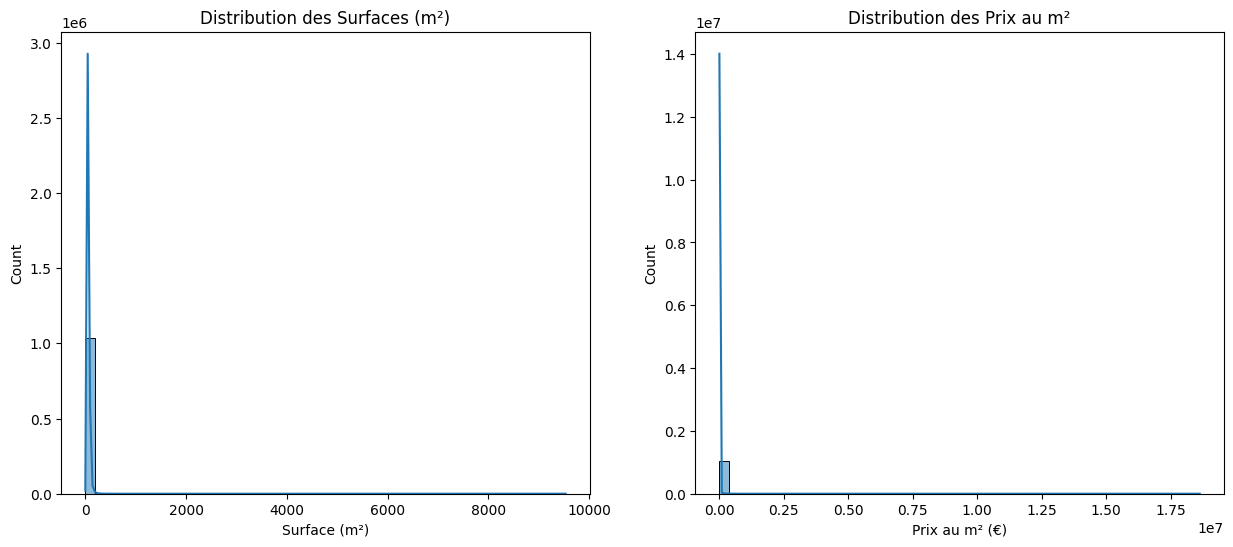


Affichage des Boxplots (pour voir les outliers)...


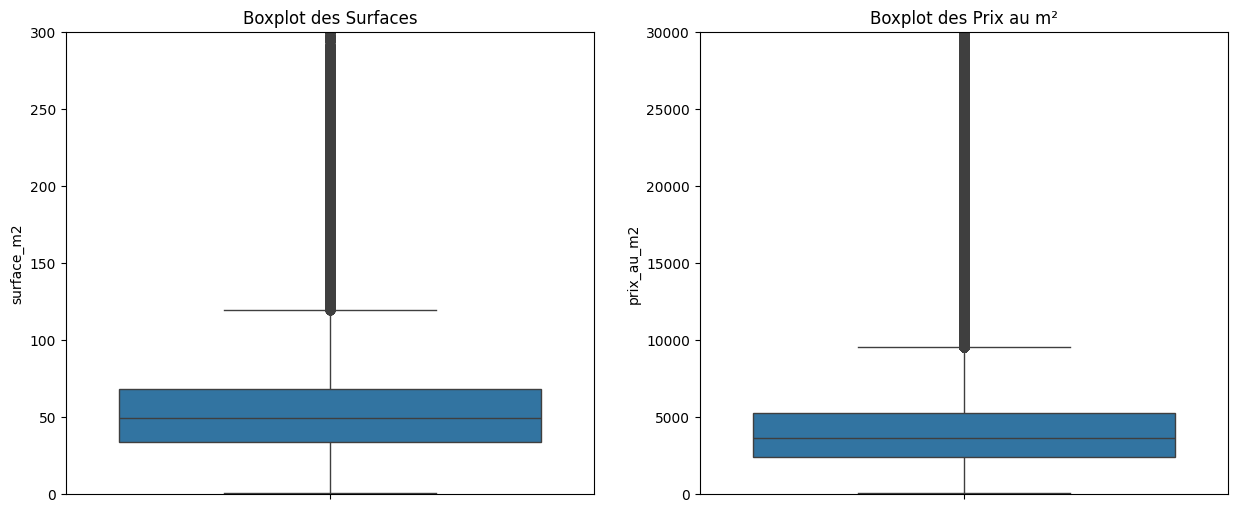

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -- 2.a Analyse statistique --
#
# On demande à Pandas de nous montrer les 1%, 5%, 95% et 99%
# C'est plus utile que 'min' et 'max' qui sont souvent des outliers.

colonnes_a_decrire = ['valeur_foncière', 'surface_m2', 'Nombre pieces principales', 'prix_au_m2']
print(df_step3[colonnes_a_decrire].describe(percentiles=[.01, .05, .25, .75, .95, .99]).round(0))


# -- 2.b Analyse visuelle (Essentiel pour votre eda.ipynb) --
#
# Mettons des 'warnings' de côté pour ne pas polluer la sortie
import warnings
warnings.filterwarnings('ignore')

print("\nAffichage des distributions (Histogrammes)...")
plt.figure(figsize=(15, 6))

# Distribution des Surfaces
plt.subplot(1, 2, 1)
sns.histplot(df_step3['surface_m2'], bins=50, kde=True)
plt.title('Distribution des Surfaces (m²)')
plt.xlabel('Surface (m²)')

# Distribution des Prix au m²
plt.subplot(1, 2, 2)
sns.histplot(df_step3['prix_au_m2'], bins=50, kde=True)
plt.title('Distribution des Prix au m²')
plt.xlabel('Prix au m² (€)')

plt.show()

# -- 2.c Analyse des Boxplots (Boîtes à moustaches) --
#
# Les boxplots sont le meilleur outil pour VOIR les outliers (les points isolés)

print("\nAffichage des Boxplots (pour voir les outliers)...")
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_step3['surface_m2'])
plt.title('Boxplot des Surfaces')
plt.ylim(0, 300) # On zoome sur les valeurs plausibles (ex: 0-300m²)

plt.subplot(1, 2, 2)
sns.boxplot(y=df_step3['prix_au_m2'])
plt.title('Boxplot des Prix au m²')
plt.ylim(0, 30000) # On zoome (ex: 0-30000€/m²)

plt.show()

In [38]:
# 1. Retirez d'abord les zéros (Étape 3)
df_sans_zeros = df_step3[
    (df_step3['surface_m2'] > 0) & 
    (df_step3['valeur_foncière'] > 0)
].copy()

# 2. CALCULEZ les quantiles sur ce DataFrame propre
P01_surface = df_sans_zeros['surface_m2'].quantile(0.01)
P99_surface = df_sans_zeros['surface_m2'].quantile(0.97)
P01_prix_m2 = df_sans_zeros['prix_au_m2'].quantile(0.01)
P99_prix_m2 = df_sans_zeros['prix_au_m2'].quantile(0.97)

# 3. FILTREZ le DataFrame propre
df_final = df_sans_zeros[
    (df_sans_zeros['surface_m2'] >= P01_surface) &
    (df_sans_zeros['surface_m2'] <= P99_surface) &
    (df_sans_zeros['prix_au_m2'] >= P01_prix_m2) &
    (df_sans_zeros['prix_au_m2'] <= P99_prix_m2)
].copy()

--- 📊 Affichage des distributions sur le DataFrame NETTOYÉ ---


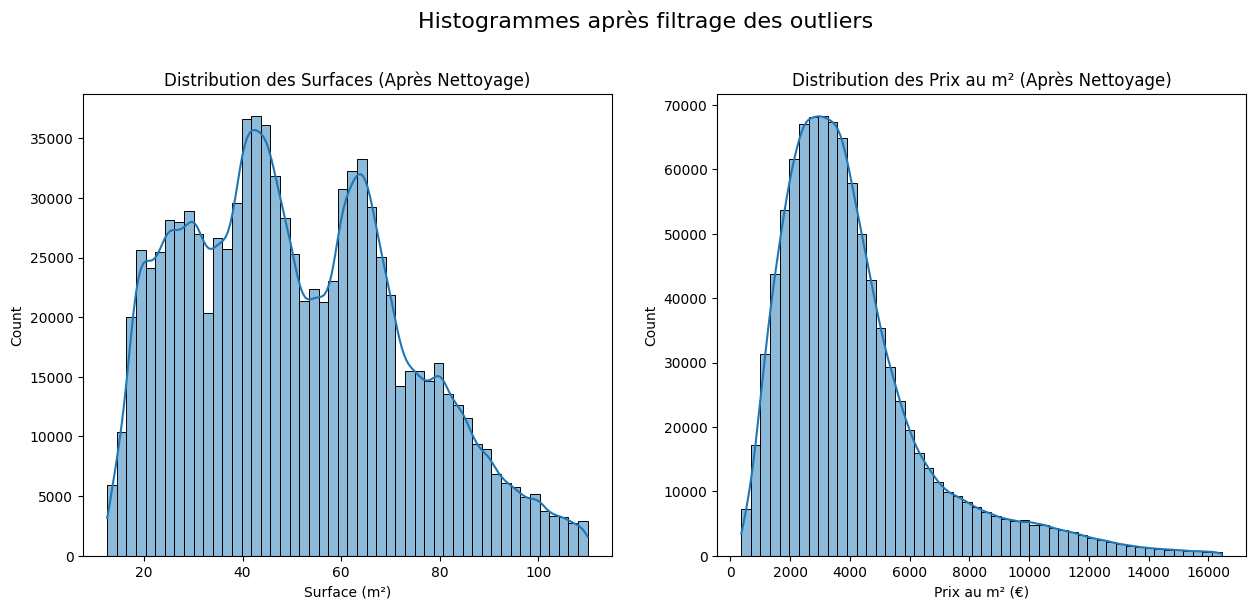

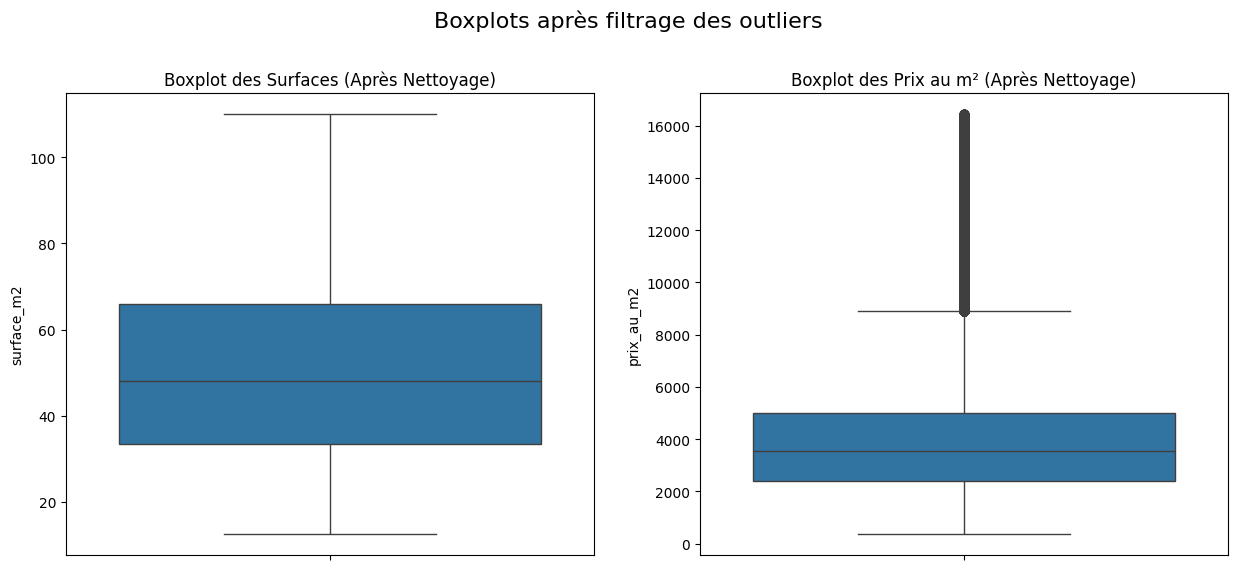


--- Nouveau .describe() sur les données finales ---
       valeur_foncière  surface_m2  Nombre pieces principales  prix_au_m2
count         958507.0    958507.0                   958507.0    958507.0
mean          199373.0        51.0                        2.0      4137.0
std           148237.0        22.0                        1.0      2570.0
min             5000.0        13.0                        1.0       365.0
1%             30600.0        15.0                        1.0       750.0
25%           105000.0        33.0                        2.0      2414.0
50%           163500.0        48.0                        2.0      3548.0
75%           246500.0        66.0                        3.0      5012.0
99%           794100.0       104.0                        5.0     13237.0
max          1800000.0       110.0                       70.0     16441.0


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# On utilise le DataFrame 'df_final' (celui APRÈS le filtrage quantile)

# Mettons des 'warnings' de côté pour ne pas polluer la sortie
warnings.filterwarnings('ignore')

print("--- 📊 Affichage des distributions sur le DataFrame NETTOYÉ ---")

# --- 1. Nouveaux Histogrammes ---
plt.figure(figsize=(15, 6))

# Distribution des Surfaces
plt.subplot(1, 2, 1)
sns.histplot(df_final['surface_m2'], bins=50, kde=True)
plt.title('Distribution des Surfaces (Après Nettoyage)')
plt.xlabel('Surface (m²)')

# Distribution des Prix au m²
plt.subplot(1, 2, 2)
sns.histplot(df_final['prix_au_m2'], bins=50, kde=True)
plt.title('Distribution des Prix au m² (Après Nettoyage)')
plt.xlabel('Prix au m² (€)')

plt.suptitle('Histogrammes après filtrage des outliers', fontsize=16, y=1.02)
plt.show()

# --- 2. Nouveaux Boxplots ---
plt.figure(figsize=(15, 6))

# Boxplot des Surfaces
plt.subplot(1, 2, 1)
sns.boxplot(y=df_final['surface_m2'])
plt.title('Boxplot des Surfaces (Après Nettoyage)')

# Boxplot des Prix au m²
plt.subplot(1, 2, 2)
sns.boxplot(y=df_final['prix_au_m2'])
plt.title('Boxplot des Prix au m² (Après Nettoyage)')

plt.suptitle('Boxplots après filtrage des outliers', fontsize=16, y=1.02)
plt.show()

# --- 3. Nouveau .describe() ---
print("\n--- Nouveau .describe() sur les données finales ---")
colonnes_a_decrire = ['valeur_foncière', 'surface_m2', 'Nombre pieces principales', 'prix_au_m2']
print(df_final[colonnes_a_decrire].describe(percentiles=[.01, .25, .50, .75, .99]).round(0))

In [40]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 958507 entries, 8 to 16650652
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date_mutation              958507 non-null  datetime64[ns]
 1   nature_mutation            958507 non-null  object        
 2   valeur_foncière            958507 non-null  float64       
 3   code_postal                958507 non-null  object        
 4   commune                    958507 non-null  object        
 5   code_departement           958507 non-null  object        
 6   code_commune               958507 non-null  int64         
 7   nombre_de_lots             958507 non-null  int64         
 8   type_local                 958507 non-null  object        
 9   Nombre pieces principales  958507 non-null  int64         
 10  surface_m2                 958507 non-null  float64       
 11  prix_au_m2                 958507 non-null  float64    

## nous allons créer un autre dataframe où nous allons travailler sur les villes mais sans les arrondissements de paris


In [41]:
df_france = df_final.copy()

In [42]:
df_france.head()

date_mutation                     nature_mutation  valeur_foncière  \
8     2021-01-04                               Vente         176000.0   
25    2021-01-08                               Vente         129150.0   
52    2021-01-05                               Vente          57000.0   
63    2021-01-12  Vente en l'état futur d'achèvement         196000.0   
84    2021-01-06                               Vente         243000.0   

   code_postal                  commune code_departement  code_commune  \
8         1000    SAINT-DENIS-LES-BOURG               01           344   
25        1750  SAINT-LAURENT-SUR-SAONE               01           370   
52        1000          BOURG-EN-BRESSE               01            53   
63        1000    SAINT-DENIS-LES-BOURG               01           344   
84        1000          BOURG-EN-BRESSE               01            53   

    nombre_de_lots   type_local  Nombre pieces principales  surface_m2  \
8                1  Appartement                          3       71.00   
25               1  Appartement                          3       63.57   
52               1  Appartement                          1       37.56   
63               1  Appartement                          3       70.00   
84               1  Appartement                          4       89.62   

     prix_au_m2  
8   2478.873239  
25  2031.618688  
52  1517.571885  
63  2800.000000  
84  2711.448337

In [43]:
df_france.info()

<class 'pandas.core.frame.DataFrame'>
Index: 958507 entries, 8 to 16650652
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date_mutation              958507 non-null  datetime64[ns]
 1   nature_mutation            958507 non-null  object        
 2   valeur_foncière            958507 non-null  float64       
 3   code_postal                958507 non-null  object        
 4   commune                    958507 non-null  object        
 5   code_departement           958507 non-null  object        
 6   code_commune               958507 non-null  int64         
 7   nombre_de_lots             958507 non-null  int64         
 8   type_local                 958507 non-null  object        
 9   Nombre pieces principales  958507 non-null  int64         
 10  surface_m2                 958507 non-null  float64       
 11  prix_au_m2                 958507 non-null  float64    

In [44]:
import numpy as np

# 1. Préparation (comme avant)
df_france['code_departement'] = df_france['code_departement'].astype(str).str[0:2]

# 2. Conversion en nombre, transformant les non-numériques en NaN
df_france['code_departement'] = pd.to_numeric(
    df_france['code_departement'],
    errors='coerce'
)

# 3. Conversion finale en entier (en utilisant le type Int64 qui supporte les NaN)
df_france['code_departement'] = df_france['code_departement'].astype('Int64')

CARTE DES CHALEURS

In [45]:
df_ventes_par_dept = df_final['code_departement'].value_counts(ascending=False).reset_index()
df_ventes_par_dept

code_departement  count
0                06  50404
1                13  49392
2                75  47956
3                69  41579
4                83  41279
..              ...    ...
92               58    581
93               36    419
94               52    392
95               48    343
96               23    182

[97 rows x 2 columns]

In [46]:
df_ventes_par_dept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   code_departement  97 non-null     object
 1   count             97 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [47]:
df_ventes_par_dept.head()

code_departement  count
0               06  50404
1               13  49392
2               75  47956
3               69  41579
4               83  41279

## MAP DES VENTES IMMOBILIÈRES

In [48]:
!pip3 install geopandas

Defaulting to user installation because normal site-packages is not writeable


Tentative de téléchargement des données géographiques (Source GitHub)...
Chargement réussi. 96 départements chargés.


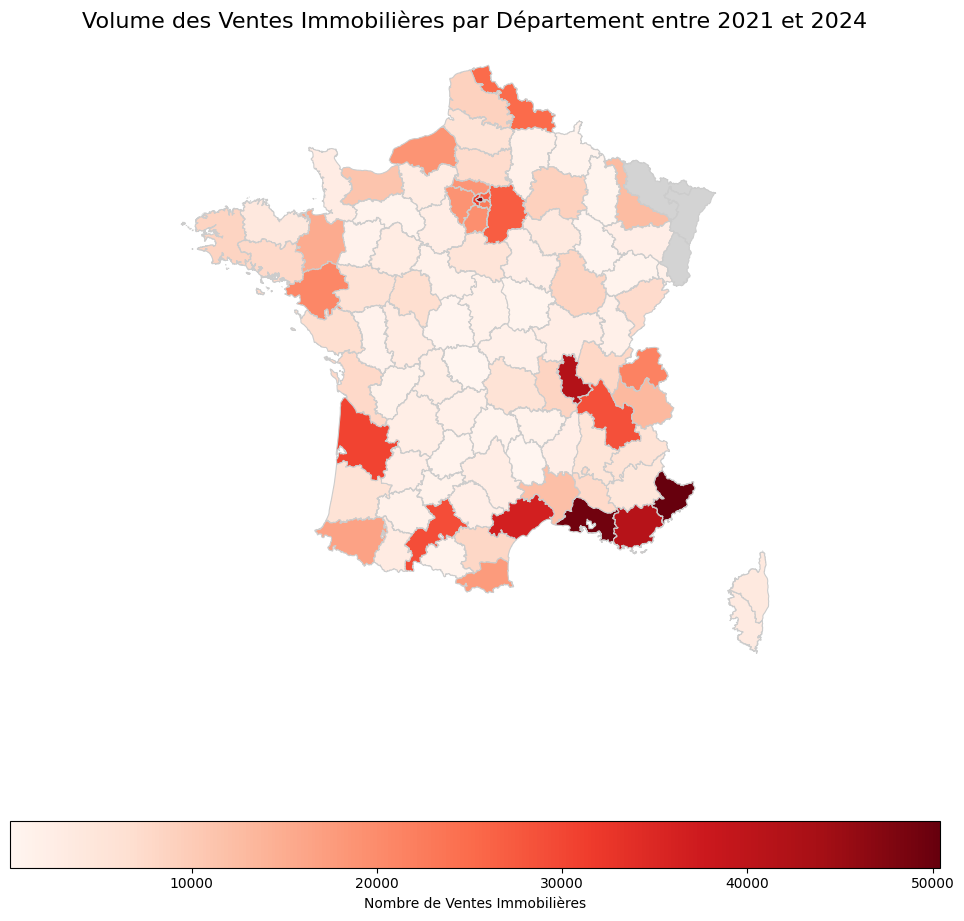

In [49]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
import numpy as np # Assurez-vous d'importer numpy pour les données aléatoires

# -------------------------------------------------------------------
# ÉTAPE 1 : Chargement des frontières (Lien GitHub - PLUS STABLE)
# -------------------------------------------------------------------

# URL vers un fichier GeoJSON stable sur GitHub
url_geojson_github = "https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements.geojson"

try:
    print("Tentative de téléchargement des données géographiques (Source GitHub)...")
    response = requests.get(url_geojson_github)
    response.raise_for_status() # Lève une exception si le statut n'est pas 200 (ex: 404)

    # Lit le contenu directement dans GeoPandas
    gdf_departements = gpd.read_file(io.BytesIO(response.content))
    
    # Ce fichier utilise 'code' pour le code département (ex: '01', '75')
    if 'code' in gdf_departements.columns:
        gdf_departements.rename(columns={'code': 'code_departement'}, inplace=True)
    else:
        print("AVERTISSEMENT: Colonne 'code' non trouvée. Vérifiez le nom de la colonne.")
            
    # Filtrer la métropole (ce fichier contient aussi les DROM)
    gdf_departements = gdf_departements[gdf_departements['code_departement'].str.len() <= 3]
    print(f"Chargement réussi. {len(gdf_departements)} départements chargés.")

except requests.exceptions.RequestException as e:
    print(f"Erreur de chargement des données géographiques : {e}")
    print("Impossible de continuer. Vérifiez votre connexion Internet.")
    # On arrête l'exécution si le chargement échoue
    raise SystemExit("Téléchargement du GeoJSON échoué.")


# -------------------------------------------------------------------
# ÉTAPE 2 : Création de données de ventes FICTIVES (À REMPLACER PAR VOS DONNÉES)
# -------------------------------------------------------------------

codes_dep = gdf_departements['code_departement'].unique()

# Simuler des ventes aléatoires
ventes_aleatoires = pd.DataFrame({
    'code_departement': codes_dep,
    # Simuler des ventes entre 100 et 1000, avec des pics pour Paris (75) et Marseille (13)
    'Ventes_Immobilieres': pd.Series(codes_dep).apply(
        lambda x: 2500 if x == '75' else 1800 if x == '13' else (800 if x in ['69', '33'] else 100) + np.random.randint(0, 500)
    )
})

# --- REMPLACEZ PAR VOS DONNÉES ICI ---

vos_ventes = df_ventes_par_dept
vos_ventes.rename(columns={'count': 'Ventes_Immobilieres'}, inplace=True)
gdf_ventes = gdf_departements.merge(vos_ventes, on='code_departement', how='left')


# -------------------------------------------------------------------
# ÉTAPE 4 : Tracé de la carte choroplèthe
# -------------------------------------------------------------------

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Tracé de la carte
gdf_ventes.plot(
    column='Ventes_Immobilieres',  # La colonne utilisée pour la couleur
    ax=ax,
    legend=True,
    cmap='Reds',                  # 'Reds' pour une gradation de couleur rouge
    linewidth=0.8,
    edgecolor='0.8',              # Couleur des bordures (gris clair)
    missing_kwds={                # Couleur pour les départements sans données
        "color": "lightgrey",
        "label": "Données manquantes",
    },
    legend_kwds={'label': "Nombre de Ventes Immobilières",
                 'orientation': "horizontal"}
)

# Configuration de la carte
ax.set_title('Volume des Ventes Immobilières par Département entre 2021 et 2024', fontsize=16)
ax.set_axis_off() # Supprimer les axes (latitude/longitude)

# Afficher le graphique
plt.show()

In [50]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 958507 entries, 8 to 16650652
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date_mutation              958507 non-null  datetime64[ns]
 1   nature_mutation            958507 non-null  object        
 2   valeur_foncière            958507 non-null  float64       
 3   code_postal                958507 non-null  object        
 4   commune                    958507 non-null  object        
 5   code_departement           958507 non-null  object        
 6   code_commune               958507 non-null  int64         
 7   nombre_de_lots             958507 non-null  int64         
 8   type_local                 958507 non-null  object        
 9   Nombre pieces principales  958507 non-null  int64         
 10  surface_m2                 958507 non-null  float64       
 11  prix_au_m2                 958507 non-null  float64    


--- 2.a. Analyse : Médiane du Prix au m² par Département ---

Top 5 des départements (les plus chers) :
code_departement
75    10322.580645
92     7035.364936
94     5154.774397
06     4732.633847
93     4500.000000
Name: prix_au_m2, dtype: float64

Top 5 des départements (les moins chers) :
code_departement
36    1224.262660
08    1179.878049
58    1141.612776
52    1130.371470
23     942.822601
Name: prix_au_m2, dtype: float64


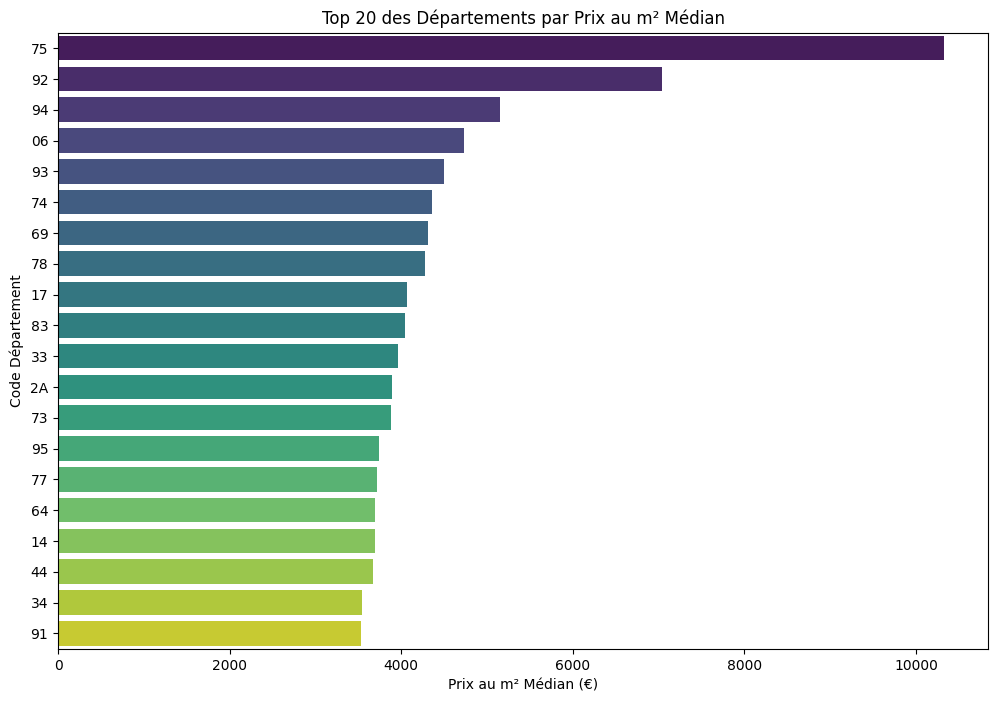

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- 2.a. Analyse : Médiane du Prix au m² par Département ---")

# 1. Grouper par département et calculer la médiane
median_prix_dept = df_final.groupby('code_departement')['prix_au_m2'].median().sort_values(ascending=False)

# 2. Afficher le Top 5 (les plus chers)
print("\nTop 5 des départements (les plus chers) :")
print(median_prix_dept.head(5))

# 3. Afficher le Flop 5 (les moins chers)
print("\nTop 5 des départements (les moins chers) :")
print(median_prix_dept.tail(5))

# 4. Visualisation (Bar chart du Top 20)
plt.figure(figsize=(12, 8))
sns.barplot(x=median_prix_dept.head(20).values, 
            y=median_prix_dept.head(20).index, 
            palette='viridis')
plt.title('Top 20 des Départements par Prix au m² Médian')
plt.xlabel('Prix au m² Médian (€)')
plt.ylabel('Code Département')
plt.show()

In [52]:
print("\n--- 2.b. Analyse : Médiane du Prix au m² par Ville (Code Commune) ---")

# 1. Compter le nombre de ventes par commune
nb_ventes_commune = df_final['commune'].value_counts()

# 2. Définir un seuil minimum de ventes (ex: 50 ventes) pour qu'une ville soit "fiable"
SEUIL_MIN_VENTES = 50
communes_fiables = nb_ventes_commune[nb_ventes_commune >= SEUIL_MIN_VENTES].index

# 3. Filtrer le DataFrame pour ne garder que ces communes fiables
df_communes_fiables = df_final[df_final['commune'].isin(communes_fiables)]

# 4. Grouper par commune et calculer la médiane
median_prix_commune_top = df_communes_fiables.groupby('commune')['prix_au_m2'].median().sort_values(ascending=False)
median_prix_commune_down = df_communes_fiables.groupby('commune')['prix_au_m2'].median().sort_values(ascending=True)

# 5. Afficher le Top 10 (les villes les plus chères)
print(f"\nTop 10 des villes (min {SEUIL_MIN_VENTES} ventes) les plus chères :")
print(median_prix_commune_top.head(10))

# 6. Afficher le Flop 10 (les villes les moins chères)
print(f"\nTop 10 des villes (min {SEUIL_MIN_VENTES} ventes) les moins chères :")
print(median_prix_commune_down.head(10))


--- 2.b. Analyse : Médiane du Prix au m² par Ville (Code Commune) ---

Top 10 des villes (min 50 ventes) les plus chères :
commune
PARIS 06    13382.899628
PARIS 07    13057.197581
PARIS 04    12828.028839
PARIS 01    12412.401391
PARIS 05    12153.950034
PARIS 08    12081.029412
PARIS 03    12000.000000
PARIS 02    11657.303371
PARIS 09    11295.206972
PARIS 16    11078.717201
Name: prix_au_m2, dtype: float64

Top 10 des villes (min 50 ventes) les moins chères :
commune
SIN LE NOBLE                562.325047
MOURENX                     842.231915
SEDAN                       844.341807
PRATS-DE-MOLLO-LA-PRESTE    895.267857
MONTLUCON                   903.937490
ROMILLY SUR SEINE           907.106628
THIERS                      952.548766
JOEUF                       953.262883
BEDARIEUX                   968.907960
JOIGNY                      992.685475
Name: prix_au_m2, dtype: float64


In [53]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 958507 entries, 8 to 16650652
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date_mutation              958507 non-null  datetime64[ns]
 1   nature_mutation            958507 non-null  object        
 2   valeur_foncière            958507 non-null  float64       
 3   code_postal                958507 non-null  object        
 4   commune                    958507 non-null  object        
 5   code_departement           958507 non-null  object        
 6   code_commune               958507 non-null  int64         
 7   nombre_de_lots             958507 non-null  int64         
 8   type_local                 958507 non-null  object        
 9   Nombre pieces principales  958507 non-null  int64         
 10  surface_m2                 958507 non-null  float64       
 11  prix_au_m2                 958507 non-null  float64    

## On va le faire sans paris 

In [54]:
# Convertit la colonne 'code_commune' en texte AVANT d'appliquer le filtre .str
df_sans_paris = df_final[ ~df_final['code_departement'].astype(str).str.startswith('75') ]

In [55]:
print("\n--- 2.b. Analyse : Médiane du Prix au m² par Ville (Code Commune) sans paris ---")

# 1. Compter le nombre de ventes par commune
nb_ventes_commune = df_sans_paris['commune'].value_counts()

# 2. Définir un seuil minimum de ventes (ex: 50 ventes) pour qu'une ville soit "fiable"
SEUIL_MIN_VENTES = 50
communes_fiables = nb_ventes_commune[nb_ventes_commune >= SEUIL_MIN_VENTES].index

# 3. Filtrer le DataFrame pour ne garder que ces communes fiables
df_communes_fiables = df_final[df_final['commune'].isin(communes_fiables)]

# 4. Grouper par commune et calculer la médiane
median_prix_commune_top = df_communes_fiables.groupby('commune')['prix_au_m2'].median().sort_values(ascending=False)


# 5. Afficher le Top 10 (les villes les plus chères)
print(f"\nTop 10 des villes (min {SEUIL_MIN_VENTES} ventes) les plus chères :")
print(median_prix_commune_top.head(10))




--- 2.b. Analyse : Médiane du Prix au m² par Ville (Code Commune) sans paris ---

Top 10 des villes (min 50 ventes) les plus chères :
commune
VAL-D ISERE              10971.066253
NEUILLY-SUR-SEINE        10710.013004
SAINT-JEAN-CAP-FERRAT    10585.122023
LEGE-CAP-FERRET          10344.827586
SAINT TROPEZ              9992.424242
COURCHEVEL                9782.666667
LEVALLOIS-PERRET          9476.309227
SAINT-MANDE               9234.355388
VINCENNES                 9197.968640
BOULOGNE-BILLANCOURT      9039.894045
Name: prix_au_m2, dtype: float64


--- 📈 Analyse de la Saisonnalité (sur toutes les années) ---


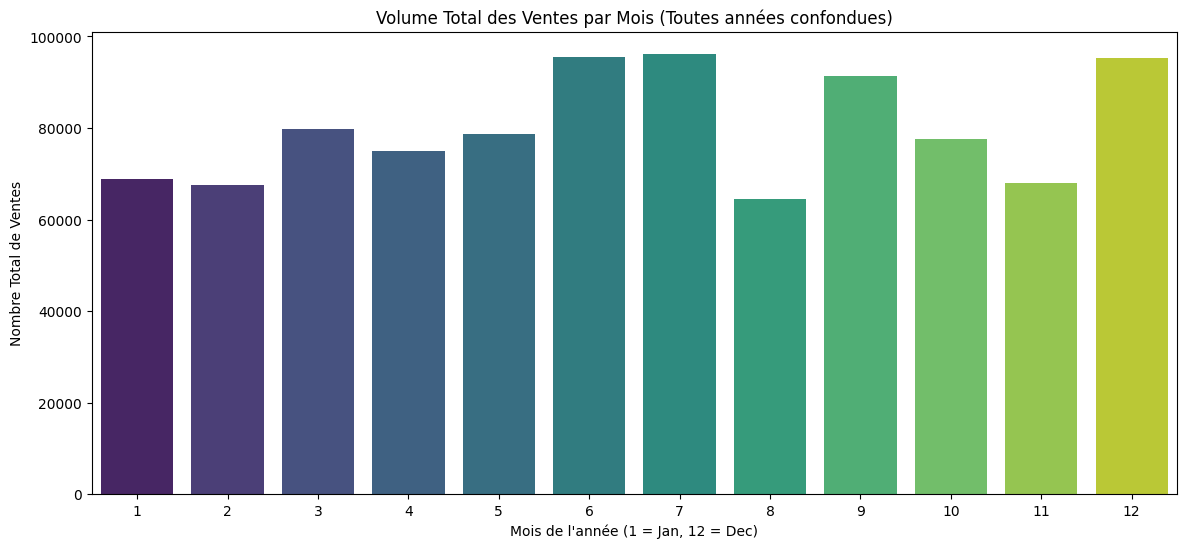

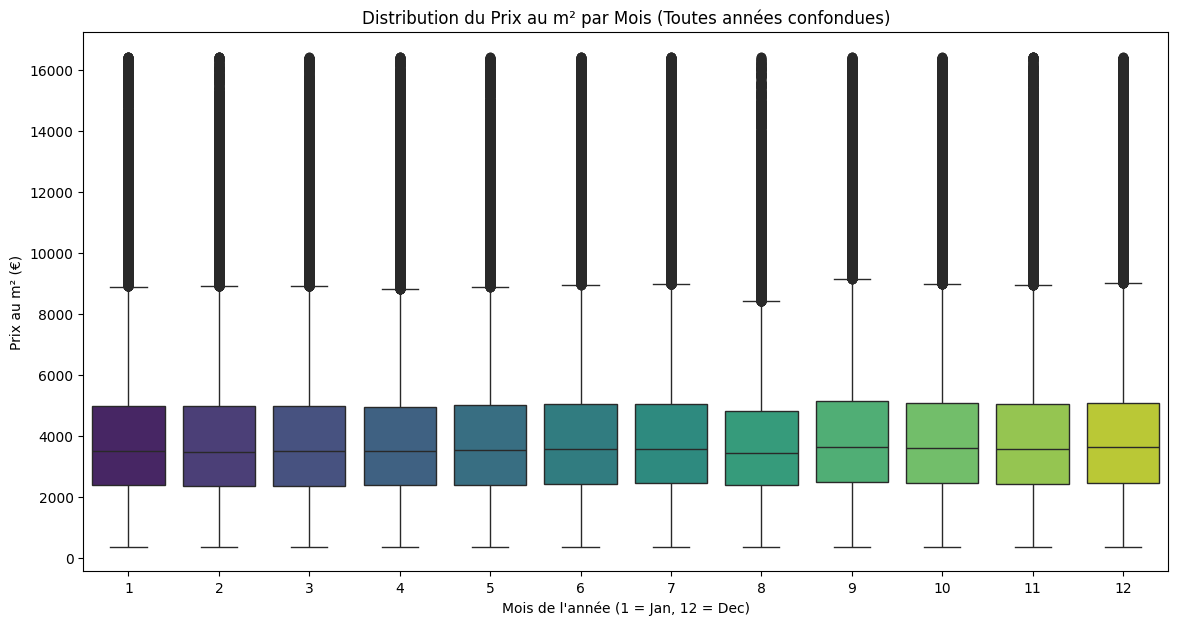

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# On repart de votre DataFrame 'df_final'
df_saison = df_final.copy()

# 1. Créer une colonne 'mois' à partir de 'date_mutation'
#    (dt.month extrait le numéro du mois, de 1 à 12)
df_saison['mois'] = df_saison['date_mutation'].dt.month

# 2. Ignorer les avertissements pour des graphiques plus propres
warnings.filterwarnings('ignore')

print("--- 📈 Analyse de la Saisonnalité (sur toutes les années) ---")

# --- Graphique 1 : Saisonnalité du VOLUME des Ventes ---
plt.figure(figsize=(14, 6))
sns.countplot(data=df_saison, 
              x='mois', 
              palette='viridis') # 'Blues_r' = bleu inversé
plt.title('Volume Total des Ventes par Mois (Toutes années confondues)')
plt.xlabel("Mois de l'année (1 = Jan, 12 = Dec)")
plt.ylabel("Nombre Total de Ventes")
plt.show()


# --- Graphique 2 : Saisonnalité du PRIX au m² ---
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_saison, 
            x='mois', 
            y='prix_au_m2', 
            palette='viridis')
plt.title('Distribution du Prix au m² par Mois (Toutes années confondues)')
plt.xlabel("Mois de l'année (1 = Jan, 12 = Dec)")
plt.ylabel("Prix au m² (€)")
plt.show()

## on fait la même chose pour voir sur une ville

In [57]:
# Cette version trouvera "nice", "Nice", "NICE", "NiCe", etc.
df_nice = df_final[df_final["commune"].str.lower() == "nice"]

In [58]:
df_nice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15320 entries, 159037 to 13318731
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date_mutation              15320 non-null  datetime64[ns]
 1   nature_mutation            15320 non-null  object        
 2   valeur_foncière            15320 non-null  float64       
 3   code_postal                15320 non-null  object        
 4   commune                    15320 non-null  object        
 5   code_departement           15320 non-null  object        
 6   code_commune               15320 non-null  int64         
 7   nombre_de_lots             15320 non-null  int64         
 8   type_local                 15320 non-null  object        
 9   Nombre pieces principales  15320 non-null  int64         
 10  surface_m2                 15320 non-null  float64       
 11  prix_au_m2                 15320 non-null  float64       
dtypes

In [59]:
df_nice.count()

date_mutation                15320
nature_mutation              15320
valeur_foncière              15320
code_postal                  15320
commune                      15320
code_departement             15320
code_commune                 15320
nombre_de_lots               15320
type_local                   15320
Nombre pieces principales    15320
surface_m2                   15320
prix_au_m2                   15320
dtype: int64

--- 📈 Analyse de la Saisonnalité (sur toutes les années) ---


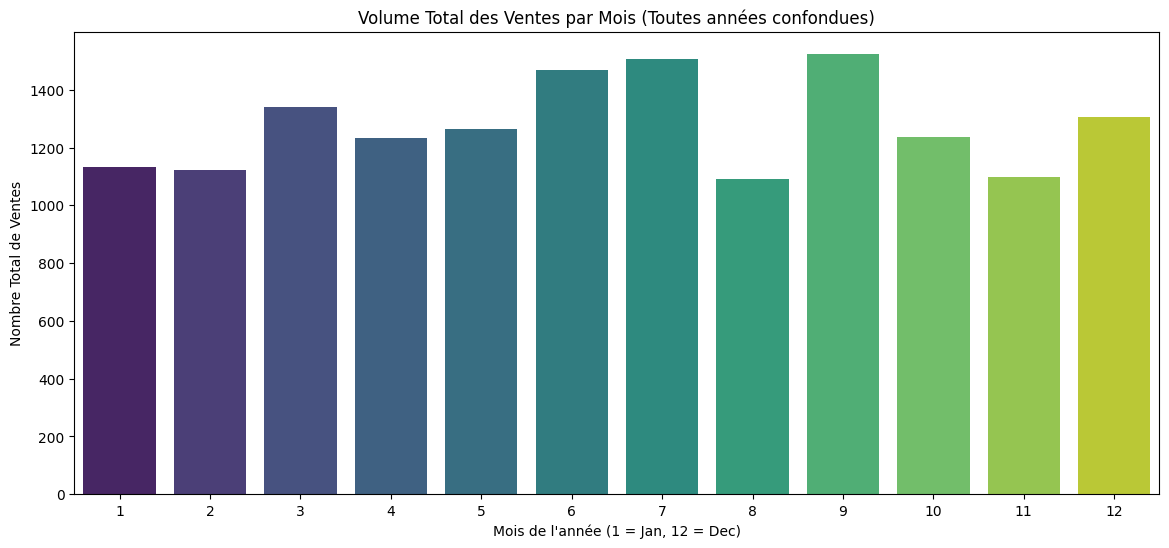

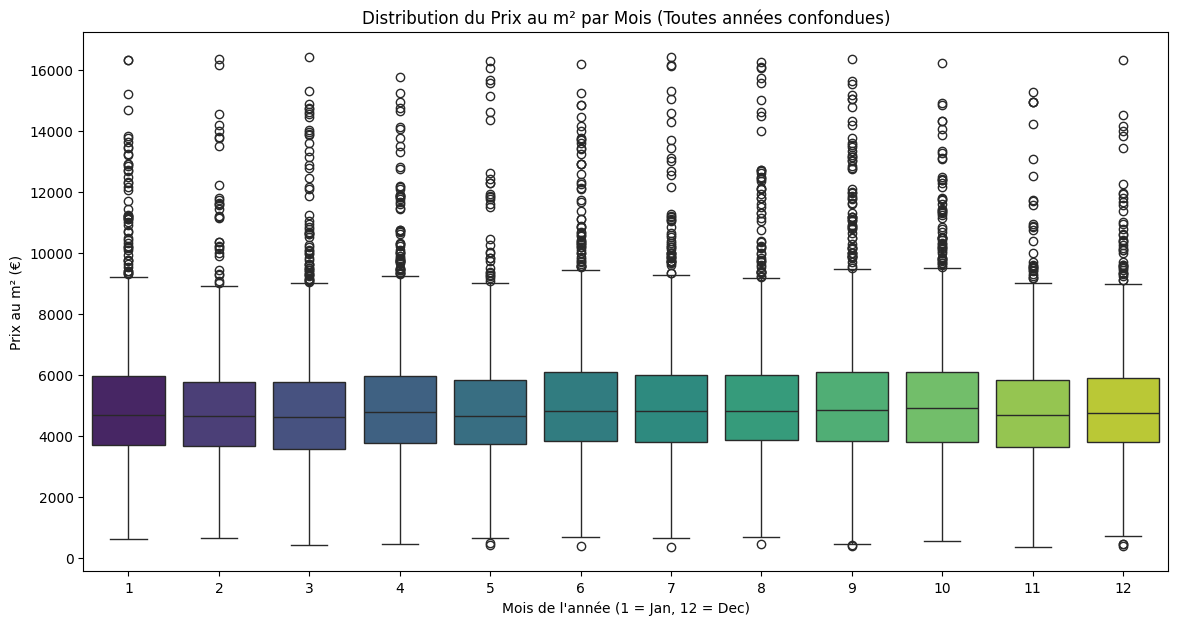

In [60]:


dff_saison = df_nice.copy()

# 1. Créer une colonne 'mois' à partir de 'date_mutation'
#    (dt.month extrait le numéro du mois, de 1 à 12)
dff_saison['mois'] = dff_saison['date_mutation'].dt.month

# 2. Ignorer les avertissements pour des graphiques plus propres
warnings.filterwarnings('ignore')

print("--- 📈 Analyse de la Saisonnalité (sur toutes les années) ---")

# --- Graphique 1 : Saisonnalité du VOLUME des Ventes ---
plt.figure(figsize=(14, 6))
sns.countplot(data=dff_saison, 
              x='mois', 
              palette='viridis') # 'Blues_r' = bleu inversé
plt.title('Volume Total des Ventes par Mois (Toutes années confondues)')
plt.xlabel("Mois de l'année (1 = Jan, 12 = Dec)")
plt.ylabel("Nombre Total de Ventes")
plt.show()


# --- Graphique 2 : Saisonnalité du PRIX au m² ---
plt.figure(figsize=(14, 7))
sns.boxplot(data=dff_saison, 
            x='mois', 
            y='prix_au_m2', 
            palette='viridis')
plt.title('Distribution du Prix au m² par Mois (Toutes années confondues)')
plt.xlabel("Mois de l'année (1 = Jan, 12 = Dec)")
plt.ylabel("Prix au m² (€)")
plt.show()

# FEATURE ENGINEERING

In [61]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 958507 entries, 8 to 16650652
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date_mutation              958507 non-null  datetime64[ns]
 1   nature_mutation            958507 non-null  object        
 2   valeur_foncière            958507 non-null  float64       
 3   code_postal                958507 non-null  object        
 4   commune                    958507 non-null  object        
 5   code_departement           958507 non-null  object        
 6   code_commune               958507 non-null  int64         
 7   nombre_de_lots             958507 non-null  int64         
 8   type_local                 958507 non-null  object        
 9   Nombre pieces principales  958507 non-null  int64         
 10  surface_m2                 958507 non-null  float64       
 11  prix_au_m2                 958507 non-null  float64    

In [62]:
# (On repart de votre DataFrame 'df_final')
df_model = df_final.copy()

# Extraction de l'année et du mois
# (votre colonne 'date_mutation' est déjà au bon format datetime)
df_model['annee'] = df_model['date_mutation'].dt.year
df_model['mois'] = df_model['date_mutation'].dt.month

print("Aperçu des nouvelles features 'annee' et 'mois':")
print(df_model[['date_mutation', 'annee', 'mois']])

Aperçu des nouvelles features 'annee' et 'mois':
         date_mutation  annee  mois
8           2021-01-04   2021     1
25          2021-01-08   2021     1
52          2021-01-05   2021     1
63          2021-01-12   2021     1
84          2021-01-06   2021     1
...                ...    ...   ...
16650632    2024-12-27   2024    12
16650637    2024-12-30   2024    12
16650640    2024-05-13   2024     5
16650650    2024-12-27   2024    12
16650652    2024-12-27   2024    12

[958507 rows x 3 columns]


In [63]:
# Renomme 'ancien_nom' en 'nouveau_nom'
df_model = df_model.rename(columns={'Nombre pieces principales': 'nombre_pieces_principales'})

# Modifie la colonne 'code_departement' du DataFrame
# ASSUREZ-VOUS QU'ELLE EST DE TYPE TEXTE (str)
df_model['code_departement'] = df_model['code_departement'].astype(str)

In [64]:
!pip3 install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [65]:
# (Assurez-vous d'avoir bien exécuté la cellule [173] qui renomme la colonne)

# 1. Définir la colonne cible
target_col = 'valeur_foncière'

# 2. Définir les listes de colonnes pour le BASELINE
#    (Note : 'prix_au_m2' et 'code_commune' sont retirés)
numeric_features = ['surface_m2', 'nombre_pieces_principales', 'annee', 'mois']
categorical_features = ['code_departement']

# 3. Créer X (le DataFrame de features) et y (la série cible)
features = numeric_features + categorical_features

try:
    X = df_model[features]
    y = df_model[target_col]
    
    print("--- Forme des données prêtes pour le modèle ---")
    print(f"Features X (shape): {X.shape}")
    print(f"Cible y (shape): {y.shape}")

    # 4. Séparation Train / Test (Étape obligatoire)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("\n--- Forme après Train/Test Split ---")
    print(f"X_train (features d'entraînement): {X_train.shape}")
    print(f"y_train (cible d'entraînement) : {y_train.shape}")
    print(f"X_test (features de test)     : {X_test.shape}")
    print(f"y_test (cible de test)      : {y_test.shape}")

except KeyError as e:
    print(f"\n[ERREUR] Une colonne n'a pas été trouvée : {e}")
    print("Vérifiez que vous avez bien exécuté la cellule qui renomme 'Nombre pieces principales'.")

--- Forme des données prêtes pour le modèle ---
Features X (shape): (958507, 5)
Cible y (shape): (958507,)

--- Forme après Train/Test Split ---
X_train (features d'entraînement): (766805, 5)
y_train (cible d'entraînement) : (766805,)
X_test (features de test)     : (191702, 5)
y_test (cible de test)      : (191702,)


In [66]:
# Imports pour le Pipeline et le Pré-traitement
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Imports pour le Modèle
from sklearn.linear_model import LinearRegression

# Imports pour l'Évaluation
from sklearn.model_selection import cross_validate
import numpy as np

# (Assurez-vous que X_train, y_train, numeric_features, et categorical_features
#  sont bien définis et disponibles dans le notebook)

## REGRESSION LINEAIRE


In [67]:
print("--- Définition des transformateurs ---")

# 1. Pipeline pour les features NUMÉRIQUES ('numeric_features')
#    -> 'StandardScaler' met toutes les features à la même échelle
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# 2. Pipeline pour les features CATÉGORIELLES ('categorical_features')
#    -> 'OneHotEncoder' transforme les départements (ex: '75') en colonnes (ex: 'dept_75' = 1)
#    handle_unknown='ignore' évite les erreurs si une catégorie de test est inconnue
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

print("Transformateurs numérique et catégoriel créés.")

--- Définition des transformateurs ---
Transformateurs numérique et catégoriel créés.


In [68]:
print("--- Création du Pré-processeur (ColumnTransformer) ---")

# 'preprocessor' est un objet qui sait quoi faire à quelle colonne
preprocessor = ColumnTransformer(
    transformers=[
        # (nom, transformateur, colonnes)
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Pré-processeur créé avec succès !")
print(preprocessor)

--- Création du Pré-processeur (ColumnTransformer) ---
Pré-processeur créé avec succès !
ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['surface_m2', 'nombre_pieces_principales',
                                  'annee', 'mois']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['code_departement'])])


In [69]:
print("--- Création du Pipeline de Baseline (Régression Linéaire) ---")

# 'baseline_model' est le pipeline final
# Étape 1: Exécuter le pré-processeur
# Étape 2: Exécuter le modèle (LinearRegression) sur les données transformées
baseline_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

print("Pipeline de baseline créé !")
print(baseline_model)

--- Création du Pipeline de Baseline (Régression Linéaire) ---
Pipeline de baseline créé !
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['surface_m2',
                                                   'nombre_pieces_principales',
                                                   'annee', 'mois']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['code_departement'])])),
                ('model', LinearRegression())])


In [70]:
print("--- Lancement de la Validation Croisée (cv=5) ---")
print("(Cela peut prendre quelques secondes...)")

# On définit les métriques que l'on veut calculer
scoring = ['r2', 'neg_root_mean_squared_error']

# On lance l'évaluation sur le JEU D'ENTRAÎNEMENT (X_train, y_train)
# cv=5 : Le jeu est coupé en 5, le modèle est entraîné 5 fois
cv_results = cross_validate(baseline_model, 
                            X_train, 
                            y_train, 
                            cv=5, 
                            scoring=scoring,
                            n_jobs=-1) # Utilise tous les processeurs

# --- Affichage des Métriques ---
avg_r2 = np.mean(cv_results['test_r2'])
# Le score RMSE est négatif, on l'inverse avec un '-'
avg_rmse = -np.mean(cv_results['test_neg_root_mean_squared_error']) 

print("\n--- MÉTRIQUES DU MODÈLE BASELINE (Moyenne sur 5 plis) ---")
print(f"  R-squared (R²)   : {avg_r2:.4f}")
print(f"  RMSE (Erreur moy.): {avg_rmse:.2f} €")

--- Lancement de la Validation Croisée (cv=5) ---
(Cela peut prendre quelques secondes...)

--- MÉTRIQUES DU MODÈLE BASELINE (Moyenne sur 5 plis) ---
  R-squared (R²)   : 0.4858
  RMSE (Erreur moy.): 106294.80 €


In [71]:
from sklearn.metrics import r2_score, mean_squared_error

print("--- 1. Entraînement du Baseline sur TOUT X_train ---")
# On entraîne le pipeline final sur 100% des données d'entraînement
baseline_model.fit(X_train, y_train)

print("-> Modèle entraîné.")

print("\n--- 2. Évaluation sur le Jeu de Test (X_test) ---")
# On fait les prédictions sur le jeu de test (données inconnues)
y_pred_test = baseline_model.predict(X_test)

# 3. Calcul des métriques finales
final_r2 = r2_score(y_test, y_pred_test)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("\n--- MÉTRIQUES FINALES DU BASELINE (sur X_test) ---")
print(f"  R-squared (R²)   : {final_r2:.4f}")
print(f"  RMSE (Erreur moy.): {final_rmse:.2f} €")

--- 1. Entraînement du Baseline sur TOUT X_train ---
-> Modèle entraîné.

--- 2. Évaluation sur le Jeu de Test (X_test) ---

--- MÉTRIQUES FINALES DU BASELINE (sur X_test) ---
  R-squared (R²)   : 0.4837
  RMSE (Erreur moy.): 106514.49 €


In [72]:
print("--- Analyse des Coefficients (LinearRegression) ---")

# (Assurez-vous que 'baseline_model' est le pipeline LinearRegression entraîné)
# 1. Extraire les étapes
preprocessor_lr = baseline_model.named_steps['preprocessor']
model_step_lr = baseline_model.named_steps['model']

# 2. Obtenir les noms des features
feature_names_lr = preprocessor_lr.get_feature_names_out()

# 3. Obtenir les coefficients
coefficients = model_step_lr.coef_

# 4. Créer un DataFrame pour visualiser
coef_df = pd.Series(coefficients, index=feature_names_lr).sort_values(ascending=False)

print("Top 10 des coefficients les plus POSITIFS (augmente le prix) :")
print(coef_df.head(10))

print("\nTop 10 des coefficients les plus NÉGATIFS (diminue le prix) :")
print(coef_df.tail(10))

--- Analyse des Coefficients (LinearRegression) ---
Top 10 des coefficients les plus POSITIFS (augmente le prix) :
cat__code_departement_75    305302.225494
cat__code_departement_92    230886.027260
cat__code_departement_94    133887.314536
cat__code_departement_06    108307.446741
cat__code_departement_74     97357.022257
cat__code_departement_93     97025.235169
cat__code_departement_78     92033.775210
cat__code_departement_69     81785.296100
num__surface_m2              78669.185650
cat__code_departement_73     69886.562735
dtype: float64

Top 10 des coefficients les plus NÉGATIFS (diminue le prix) :
cat__code_departement_02   -58435.978184
cat__code_departement_48   -59642.834090
cat__code_departement_43   -67126.439944
cat__code_departement_58   -72061.733010
cat__code_departement_52   -77502.197960
cat__code_departement_55   -80438.104721
cat__code_departement_08   -80621.717288
cat__code_departement_70   -81837.895169
cat__code_departement_36   -81975.521939
cat__code_departem

--- Analyse de la Performance des Prédictions (LinearRegression) ---


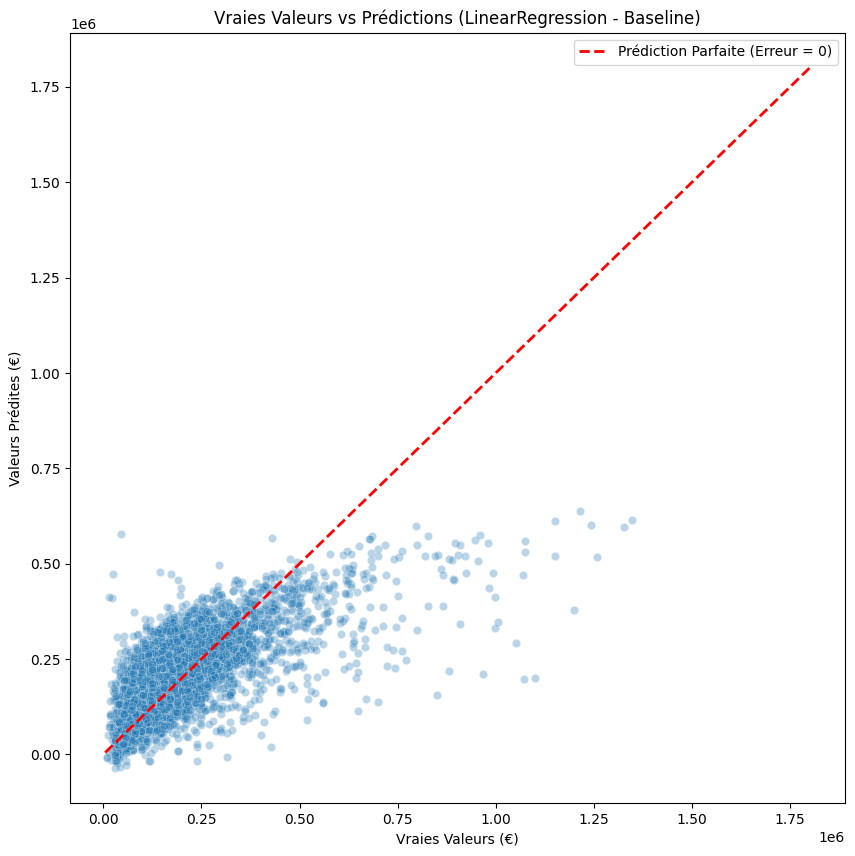

In [73]:
import seaborn as sns

print("--- Analyse de la Performance des Prédictions (LinearRegression) ---")

# Créer un DataFrame pour le plot
results_df_lr = pd.DataFrame({
    'Vraie Valeur (y_test)': y_test,
    'Prédiction (y_pred)': y_pred_test  # <--- On utilise les prédictions du Baseline
})

# Échantillon de 5000 points
results_sample_lr = results_df_lr.sample(n=5000, random_state=42)

plt.figure(figsize=(10, 10))
sns.scatterplot(data=results_sample_lr, 
                x='Vraie Valeur (y_test)', 
                y='Prédiction (y_pred)', 
                alpha=0.3) 

# Ligne parfaite
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color='red', 
         linestyle='--', 
         linewidth=2, 
         label='Prédiction Parfaite (Erreur = 0)')

plt.title('Vraies Valeurs vs Prédictions (LinearRegression - Baseline)')
plt.xlabel('Vraies Valeurs (€)')
plt.ylabel('Valeurs Prédites (€)')
plt.legend()
plt.show()

## Random Forest

In [74]:
from sklearn.ensemble import RandomForestRegressor

print("--- Création du Pipeline d'Itération 1 (RandomForest) ---")

# 'preprocessor' est le MÊME que celui du baseline, on le réutilise !

rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42, n_jobs=-1))
])

print("Pipeline RandomForest créé !")
print(rf_model)

--- Création du Pipeline d'Itération 1 (RandomForest) ---
Pipeline RandomForest créé !
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['surface_m2',
                                                   'nombre_pieces_principales',
                                                   'annee', 'mois']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['code_departement'])])),
                ('model', RandomForestRegressor(n_jobs=-1, random_state=42))])


In [75]:
# Créer un échantillon de 100k lignes (pour un test rapide)
X_train_sample = X_train.sample(n=100000, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# Entraîner le modèle sur l'échantillon (beaucoup plus rapide)
# rf_model.fit(X_train_sample, y_train_sample)

In [76]:
# from sklearn.metrics import r2_score, mean_squared_error
# import numpy as np

# print("--- 1. Entraînement de l'Itération 1 sur TOUT X_train ---")
# print("(Cela peut prendre plusieurs minutes...)")

# rf_model.fit(X_train, y_train)

# print("-> Modèle RandomForest entraîné.")

# print("\n--- 2. Évaluation sur le Jeu de Test (X_test) ---")
# y_pred_rf = rf_model.predict(X_test)
# # 
# # 3. Calcul des métriques
# rf_r2 = r2_score(y_test, y_pred_rf)
# rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# print("\n--- MÉTRIQUES FINALES DE L'ITÉRATION 1 (sur X_test) ---")
# print(f"  R-squared (R²)   : {rf_r2:.4f}")
# print(f"  RMSE (Erreur moy.): {rf_rmse:.2f} €")

# print("\n--- COMPARAISON ---")
# print(f"  Baseline (RMSE): {final_rmse:.2f} €")
# print(f"  RandomForest (RMSE): {rf_rmse:.2f} €")

## light GBM

In [77]:
# import sys
# import os

# # 1. Obtenir le chemin de l'exécutable Python de ce kernel
# python_executable_path = sys.executable

# # 2. Créer la commande d'installation
# install_command = f'"{python_executable_path}" -m pip install lightgbm'æ

# print(f"Chemin du kernel Python : {python_executable_path}")
# print(f"Exécution de la commande : {install_command}")

# # 3. Exécuter la commande d'installation
# #    Cela va installer 'lightgbm' PRÉCISÉMENT dans le bon environnement
# os.system(install_command)

In [78]:
import sys
import os

print("--- 2. Installation de LightGBM (version Conda) ---")
# 'sys.executable' pointe vers le Python de votre env 'base'
# conda install -p CHEMIN... installe dans le bon environnement
# -c conda-forge est le meilleur canal
# -y dit 'oui' à tout
install_command = f'"{sys.executable}" -m conda install -p "{os.path.dirname(os.path.dirname(sys.executable))}" -c conda-forge lightgbm -y'

print(f"Exécution : {install_command}")
os.system(install_command)
print("-> Version Conda de LightGBM installée.")

--- 2. Installation de LightGBM (version Conda) ---
Exécution : "/Library/Developer/CommandLineTools/usr/bin/python3" -m conda install -p "/Library/Developer/CommandLineTools/usr" -c conda-forge lightgbm -y
-> Version Conda de LightGBM installée.


/Library/Developer/CommandLineTools/usr/bin/python3: No module named conda


In [79]:
!pip3 install lightgbm

Defaulting to user installation because normal site-packages is not writeable


In [80]:
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

print("--- Création du Pipeline d'Itération 2 (LightGBM) ---")

# On RÉUTILISE le 'preprocessor' du baseline.
lgbm_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LGBMRegressor(random_state=42, n_jobs=-1))
])

print("Pipeline LightGBM créé.")

# --- Entraînement et Évaluation ---
print("\n--- 1. Entraînement de l'Itération 2 sur TOUT X_train ---")
print("(Cela devrait être BEAUCOUP plus rapide...)")

lgbm_model.fit(X_train, y_train)
print("-> Modèle LightGBM entraîné.")

print("\n--- 2. Évaluation sur le Jeu de Test (X_test) ---")
y_pred_lgbm = lgbm_model.predict(X_test) # <--- CORRECTION ICI

# 3. Calcul des métriques
lgbm_r2 = r2_score(y_test, y_pred_lgbm)
lgbm_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))

print("\n--- MÉTRIQUES FINALES DE L'ITÉRATION 2 (LightGBM) ---")
print(f"  R-squared (R²)   : {lgbm_r2:.4f}")
print(f"  RMSE (Erreur moy.): {lgbm_rmse:.2f} €")

--- Création du Pipeline d'Itération 2 (LightGBM) ---
Pipeline LightGBM créé.

--- 1. Entraînement de l'Itération 2 sur TOUT X_train ---
(Cela devrait être BEAUCOUP plus rapide...)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 483
[LightGBM] [Info] Number of data points in the train set: 766805, number of used features: 101
[LightGBM] [Info] Start training from score 199364.058287
-> Modèle LightGBM entraîné.

--- 2. Évaluation sur le Jeu de Test (X_test) ---

--- MÉTRIQUES FINALES DE L'ITÉRATION 2 (LightGBM) ---
  R-squared (R²)   : 0.5862
  RMSE (Erreur moy.): 95361.24 €


## FEATURE IMPORTANCE LIGHTGBM

--- Analyse de l'Importance des Features (LightGBM) ---
Top 15 des features les plus importantes :
num__surface_m2                   568
num__nombre_pieces_principales    126
cat__code_departement_75          114
cat__code_departement_92          106
cat__code_departement_06           95
cat__code_departement_94           83
num__annee                         78
cat__code_departement_93           72
cat__code_departement_69           67
cat__code_departement_74           66
cat__code_departement_78           64
cat__code_departement_33           60
cat__code_departement_83           58
num__mois                          45
cat__code_departement_73           45
dtype: int32


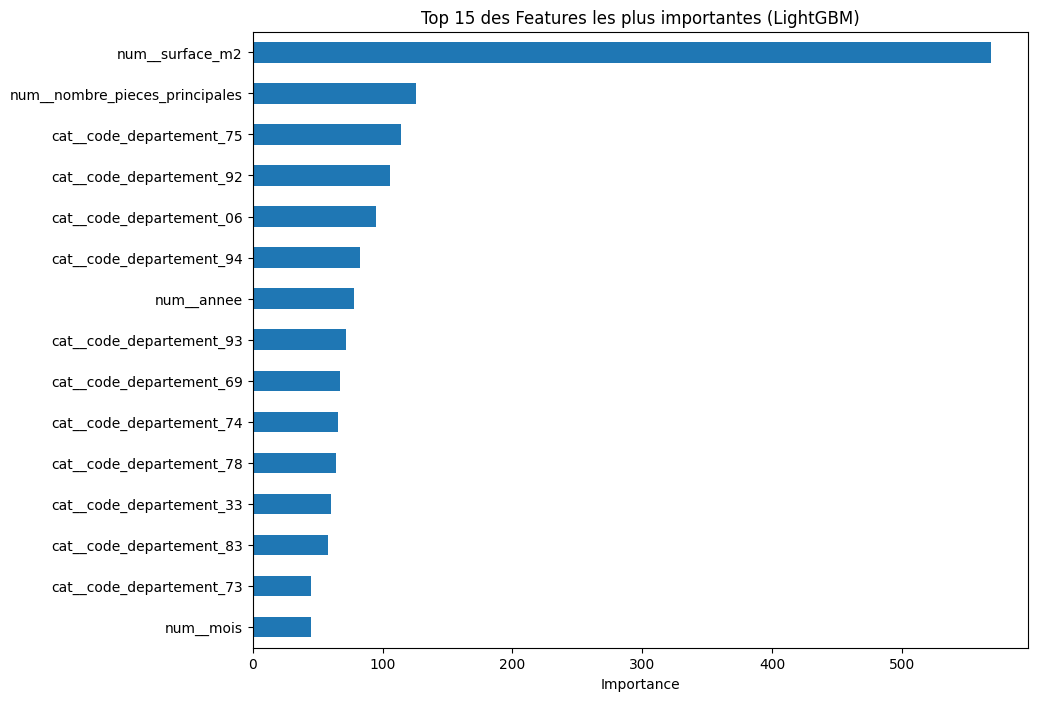

In [81]:

import pandas as pd
import matplotlib.pyplot as plt

print("--- Analyse de l'Importance des Features (LightGBM) ---")

# (Assurez-vous que 'lgbm_model' est le pipeline LightGBM que vous venez d'entraîner)
# 1. Extraire les étapes du pipeline
preprocessor_lgbm = lgbm_model.named_steps['preprocessor']
model_step_lgbm = lgbm_model.named_steps['model']

# 2. Obtenir les noms des features après l'encodage
feature_names_lgbm = preprocessor_lgbm.get_feature_names_out()

# 3. Obtenir les scores d'importance du modèle
importances_lgbm = model_step_lgbm.feature_importances_

# 4. Créer un DataFrame pour visualiser
importance_df_lgbm = pd.Series(importances_lgbm, index=feature_names_lgbm).sort_values(ascending=False)

# --- Affichage ---
print("Top 15 des features les plus importantes :")
print(importance_df_lgbm.head(15))

# 6. Plot du top 15
plt.figure(figsize=(10, 8))
importance_df_lgbm.head(15).sort_values().plot(kind='barh')
plt.title('Top 15 des Features les plus importantes (LightGBM)')
plt.xlabel('Importance')
plt.show()

--- Analyse de la Performance des Prédictions (LightGBM) ---


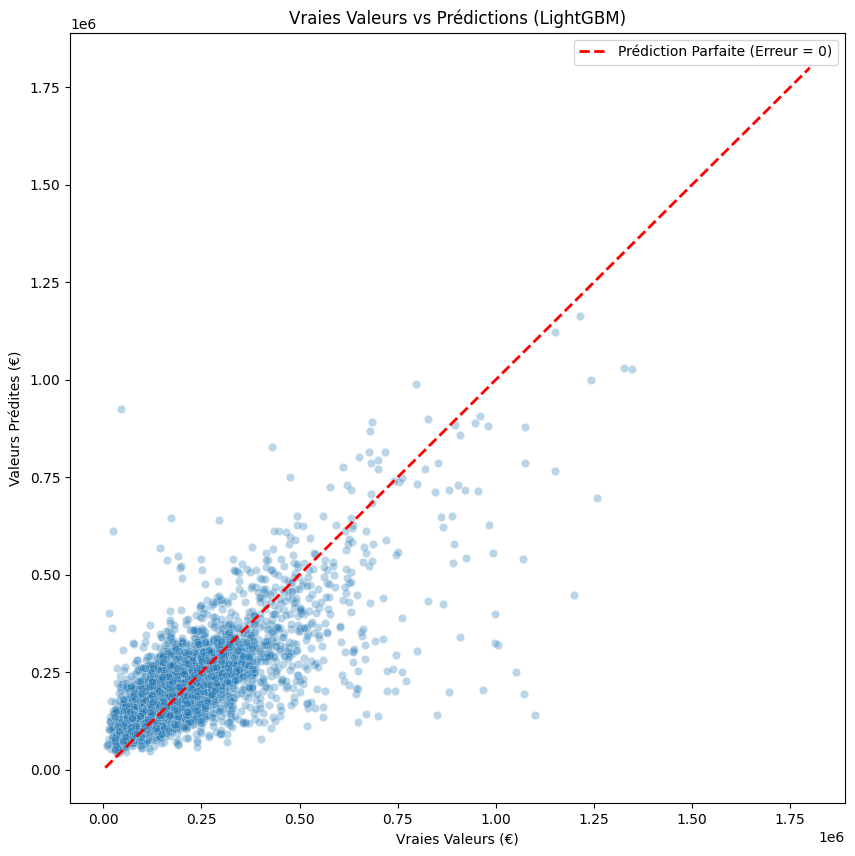

In [82]:
import seaborn as sns

print("--- Analyse de la Performance des Prédictions (LightGBM) ---")

# Créer un DataFrame pour le plot
results_df_lgbm = pd.DataFrame({
    'Vraie Valeur (y_test)': y_test,
    'Prédiction (y_pred)': y_pred_lgbm  # <--- On utilise les prédictions LightGBM
})

# Échantillon de 5000 points
results_sample_lgbm = results_df_lgbm.sample(n=5000, random_state=42)

plt.figure(figsize=(10, 10))
sns.scatterplot(data=results_sample_lgbm, 
                x='Vraie Valeur (y_test)', 
                y='Prédiction (y_pred)', 
                alpha=0.3) 

# Ligne parfaite
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color='red', 
         linestyle='--', 
         linewidth=2, 
         label='Prédiction Parfaite (Erreur = 0)')

plt.title('Vraies Valeurs vs Prédictions (LightGBM)')
plt.xlabel('Vraies Valeurs (€)')
plt.ylabel('Valeurs Prédites (€)')
plt.legend()
plt.show()

## XGBOOST

In [83]:
import sys
import os

# Commande pour installer XGBoost dans le bon kernel
install_command = f'"{sys.executable}" -m pip install xgboost'
print(f"Exécution : {install_command}")
os.system(install_command)

Exécution : "/Library/Developer/CommandLineTools/usr/bin/python3" -m pip install xgboost
Defaulting to user installation because normal site-packages is not writeable


0

In [84]:
!pip3 install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable


In [85]:
from xgboost import XGBRegressor

print("--- Création du Pipeline d'Itération 3 (XGBoost) ---")

xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=42, n_jobs=-1))
])

print("Pipeline XGBoost créé.")

# --- Entraînement et Évaluation ---
print("\n--- 1. Entraînement de l'Itération 3 sur TOUT X_train ---")

xgb_model.fit(X_train, y_train)
print("-> Modèle XGBoost entraîné.")

print("\n--- 2. Évaluation sur le Jeu de Test (X_test) ---")
y_pred_xgb = xgb_model.predict(X_test)

# 3. Calcul des métriques
xgb_r2 = r2_score(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("\n--- MÉTRIQUES FINALES DE L'ITÉRATION 3 (XGBoost) ---")
print(f"  R-squared (R²)   : {xgb_r2:.4f}")
print(f"  RMSE (Erreur moy.): {xgb_rmse:.2f} €")

--- Création du Pipeline d'Itération 3 (XGBoost) ---
Pipeline XGBoost créé.

--- 1. Entraînement de l'Itération 3 sur TOUT X_train ---
-> Modèle XGBoost entraîné.

--- 2. Évaluation sur le Jeu de Test (X_test) ---

--- MÉTRIQUES FINALES DE L'ITÉRATION 3 (XGBoost) ---
  R-squared (R²)   : 0.5879
  RMSE (Erreur moy.): 95163.56 €


## FEATURE IMPORTANCE XGBOOS


--- Analyse de l'Importance des Features (XGBoost) ---
Top 15 des features les plus importantes :
cat__code_departement_75    0.358940
cat__code_departement_92    0.142217
cat__code_departement_06    0.039972
cat__code_departement_94    0.035936
cat__code_departement_69    0.027732
cat__code_departement_74    0.025434
cat__code_departement_93    0.021583
cat__code_departement_78    0.020865
cat__code_departement_54    0.015494
cat__code_departement_42    0.013383
cat__code_departement_83    0.012379
cat__code_departement_64    0.011005
cat__code_departement_66    0.009856
cat__code_departement_33    0.008484
cat__code_departement_13    0.007331
dtype: float32


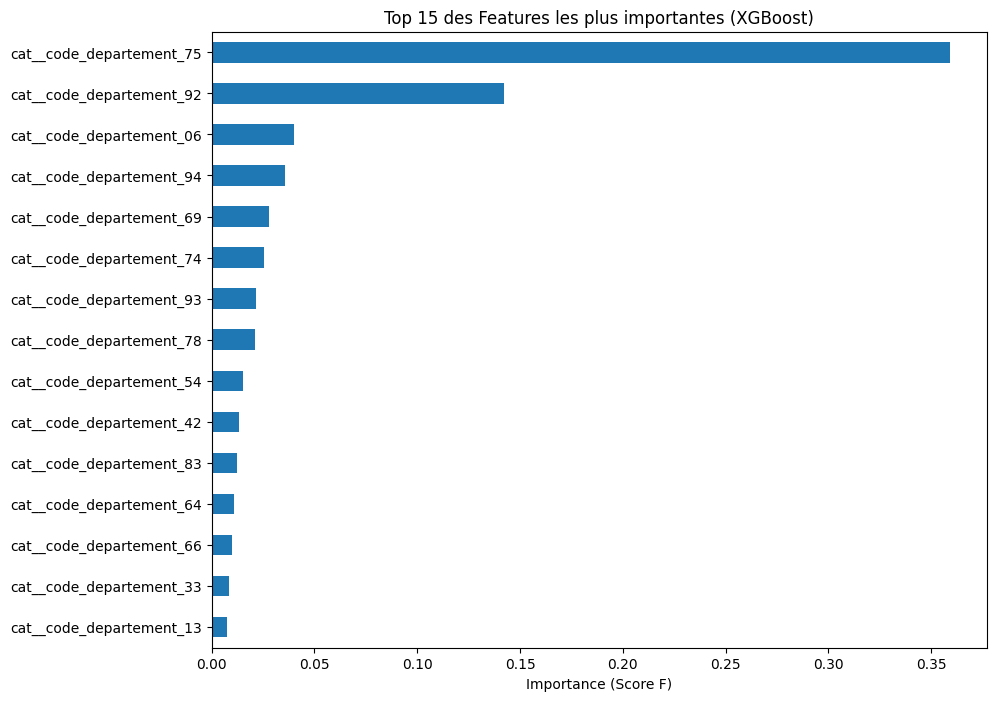

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

print("--- Analyse de l'Importance des Features (XGBoost) ---")

# (Assurez-vous que 'xgb_model' est le pipeline XGBoost que vous venez d'entraîner)
# 1. Extraire les étapes du pipeline
preprocessor = xgb_model.named_steps['preprocessor']
model_step = xgb_model.named_steps['model']

# 2. Obtenir les noms des features après l'encodage
feature_names = preprocessor.get_feature_names_out()

# 3. Obtenir les scores d'importance du modèle
importances = model_step.feature_importances_

# 4. Créer un DataFrame pour visualiser
importance_df = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# --- Affichage ---
print("Top 15 des features les plus importantes :")
print(importance_df.head(15))

# 6. Plot du top 15
plt.figure(figsize=(10, 8))
importance_df.head(15).sort_values().plot(kind='barh')
plt.title('Top 15 des Features les plus importantes (XGBoost)')
plt.xlabel('Importance (Score F)')
plt.show()

--- Analyse de la Performance des Prédictions (XGBoost) ---


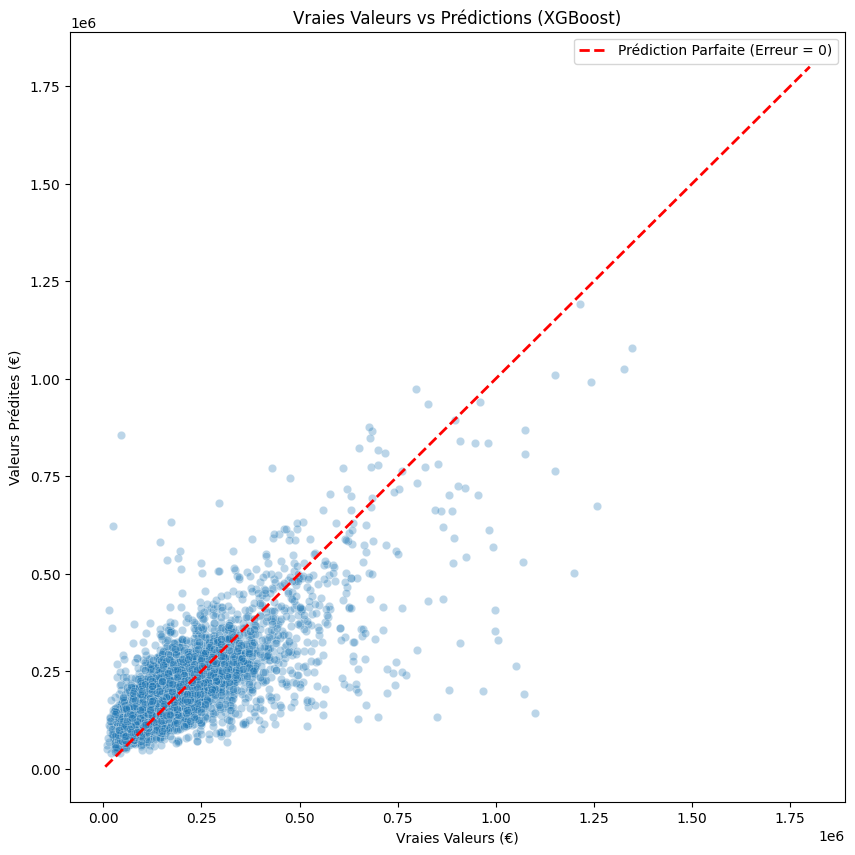

In [87]:
import seaborn as sns

print("--- Analyse de la Performance des Prédictions (XGBoost) ---")

# Créer un DataFrame pour le plot
results_df = pd.DataFrame({
    'Vraie Valeur (y_test)': y_test,
    'Prédiction (y_pred)': y_pred_xgb  # <--- On utilise les prédictions XGBoost
})

# Pour éviter de tracer 200 000 points, on prend un échantillon de 5000
results_sample = results_df.sample(n=5000, random_state=42)

plt.figure(figsize=(10, 10))
sns.scatterplot(data=results_sample, 
                x='Vraie Valeur (y_test)', 
                y='Prédiction (y_pred)', 
                alpha=0.3) # Transparence

# Tracer la ligne parfaite (y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color='red', 
         linestyle='--', 
         linewidth=2, 
         label='Prédiction Parfaite (Erreur = 0)')

plt.title('Vraies Valeurs vs Prédictions (XGBoost)')
plt.xlabel('Vraies Valeurs (€)')
plt.ylabel('Valeurs Prédites (€)')
plt.legend()
plt.show()

In [88]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

print("--- 🚀 DÉBUT DE L'EXPÉRIMENTATION (Numérique Uniquement) ---")

# --- 1. Définition des Features (SANS CATÉGORIE) ---
target_col = 'valeur_foncière'
numeric_features_only = ['surface_m2', 'nombre_pieces_principales', 'annee', 'mois']

# On crée le nouveau X (numérique uniquement)
# (df_model est votre DataFrame qui contient déjà 'annee' et 'mois')
X_num_only = df_model[numeric_features_only] 
y = df_model[target_col] # y ne change pas

# --- 2. Nouveau Train/Test Split ---
# Nous devons refaire le split sur ce nouveau 'X'
# (random_state=42 garantit que 'y' est split de la même façon qu'avant)
X_train_num, X_test_num, y_train, y_test = train_test_split(
    X_num_only, y, test_size=0.2, random_state=42
)

print(f"Nouveau X_train shape (numérique): {X_train_num.shape}")
print(f"Nouveau X_test shape (numérique) : {X_test_num.shape}")

# --- 3. Nouveau Pré-processeur (SANS CATÉGORIE) ---
# Ce transformateur ne gère que les colonnes numériques
numeric_transformer_only = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor_num_only = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_only, numeric_features_only)
    ])

# --- 4. TEST 1 : LightGBM (Numérique Uniquement) ---
print("\n--- Entraînement LightGBM (Numérique Uniquement) ---")
lgbm_model_num = Pipeline(steps=[
    ('preprocessor', preprocessor_num_only),
    ('model', LGBMRegressor(random_state=42, n_jobs=-1))
])

lgbm_model_num.fit(X_train_num, y_train)
print("-> Modèle LightGBM entraîné.")

y_pred_lgbm_num = lgbm_model_num.predict(X_test_num)
lgbm_r2_num = r2_score(y_test, y_pred_lgbm_num)
lgbm_rmse_num = np.sqrt(mean_squared_error(y_test, y_pred_lgbm_num))

print("\n--- MÉTRIQUES LightGBM (Numérique Uniquement) ---")
print(f"  R-squared (R²)   : {lgbm_r2_num:.4f}")
print(f"  RMSE (Erreur moy.): {lgbm_rmse_num:.2f} €")

# --- 5. TEST 2 : XGBoost (Numérique Uniquement) ---
print("\n--- Entraînement XGBoost (Numérique Uniquement) ---")
xgb_model_num = Pipeline(steps=[
    ('preprocessor', preprocessor_num_only),
    ('model', XGBRegressor(random_state=42, n_jobs=-1))
])

xgb_model_num.fit(X_train_num, y_train)
print("-> Modèle XGBoost entraîné.")

y_pred_xgb_num = xgb_model_num.predict(X_test_num)
xgb_r2_num = r2_score(y_test, y_pred_xgb_num)
xgb_rmse_num = np.sqrt(mean_squared_error(y_test, y_pred_xgb_num))

print("\n--- MÉTRIQUES XGBoost (Numérique Uniquement) ---")
print(f"  R-squared (R²)   : {xgb_r2_num:.4f}")
print(f"  RMSE (Erreur moy.): {xgb_rmse_num:.2f} €")

print("\n--- FIN DE L'EXPÉRIMENTATION ---")

--- 🚀 DÉBUT DE L'EXPÉRIMENTATION (Numérique Uniquement) ---
Nouveau X_train shape (numérique): (766805, 4)
Nouveau X_test shape (numérique) : (191702, 4)

--- Entraînement LightGBM (Numérique Uniquement) ---
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 289
[LightGBM] [Info] Number of data points in the train set: 766805, number of used features: 4
[LightGBM] [Info] Start training from score 199364.058287
-> Modèle LightGBM entraîné.

--- MÉTRIQUES LightGBM (Numérique Uniquement) ---
  R-squared (R²)   : 0.2108
  RMSE (Erreur moy.): 131694.05 €

--- Entraînement XGBoost (Numérique Uniquement) ---
-> Modèle XGBoost entraîné.

--- MÉTRIQUES XGBoost (Numérique Uniquement) ---
  R-squared (R²)   : 0.2088
  RMSE (Erreur moy.): 131865.09 €

--- FIN DE L'EXPÉRIMENTATION ---


# OPTIMISATION

In [89]:
!pip install optuna

Defaulting to user installation because normal site-packages is not writeable


In [90]:
import pandas as pd

# (Assurez-vous que 'X_train_adv' et 'y_train' sont vos données d'entraînement 
# complètes de l'expérience précédente)

N_SAMPLE = 50000

print(f"Création d'un échantillon de {N_SAMPLE} lignes...")

# Prendre un échantillon de X
X_train_sample = X_train.sample(n=N_SAMPLE, random_state=42)

# Récupérer les 'y' correspondants
y_train_sample = y_train.loc[X_train_sample.index]

print("-> Échantillon créé avec succès.")
print(f"X_train_sample shape: {X_train_sample.shape}")
print(f"y_train_sample shape: {y_train_sample.shape}")

Création d'un échantillon de 50000 lignes...
-> Échantillon créé avec succès.
X_train_sample shape: (50000, 5)
y_train_sample shape: (50000,)


In [91]:
import optuna
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# (Assurez-vous que 'preprocessor_advanced' est votre pré-processeur 
#  qui gère 'code_commune' avec OrdinalEncoder)

def objective(trial):
    """
    Fonction qu'Optuna va appeler pour chaque essai.
    Elle renvoie un score (RMSE) à minimiser.
    """
    
    # 1. Définir les hyperparamètres à tester
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
    }
    
    # 2. Créer le pipeline
    xgb_opt_model = Pipeline(steps=[
        ('preprocessor', preprocessor_advanced),
        ('model', XGBRegressor(random_state=42, n_jobs=-1, 
                               enable_categorical=True, **params))
    ])
    
    # 3. Créer un split de validation rapide
    #    (Nous utilisons notre ÉCHANTILLON ici)
    X_train_o, X_val_o, y_train_o, y_val_o = train_test_split(
        X_train_sample, y_train_sample, test_size=0.3, random_state=42
    )
    
    # 4. Entraîner et évaluer
    xgb_opt_model.fit(X_train_o, y_train_o)
    y_pred = xgb_opt_model.predict(X_val_o)
    
    # 5. Calculer le score (RMSE)
    rmse = np.sqrt(mean_squared_error(y_val_o, y_pred))
    
    return rmse

In [92]:
print("--- 🚀 Lancement de l'Optimisation (50 essais) ---")
# Nous voulons 'minimiser' le RMSE
study = optuna.create_study(direction='minimize')

# n_trials = nombre de combinaisons à tester
study.optimize(objective, n_trials=50, show_progress_bar=True)

print("--- Optimisation terminée ---")

[I 2025-11-17 14:25:51,370] A new study created in memory with name: no-name-48885be8-5fed-4c93-8904-7b7ca1f2a666


--- 🚀 Lancement de l'Optimisation (50 essais) ---


  0%|          | 0/50 [00:00<?, ?it/s]

[W 2025-11-17 14:25:51,377] Trial 0 failed with parameters: {'n_estimators': 768, 'max_depth': 10, 'learning_rate': 0.14662759066526926, 'subsample': 0.7480890595422286, 'colsample_bytree': 0.7124664921688182, 'reg_alpha': 0.2913913621693588, 'reg_lambda': 0.6773556490580014} because of the following error: NameError("name 'preprocessor_advanced' is not defined").
Traceback (most recent call last):
  File "/Users/cristianlarrain/Library/Python/3.9/lib/python/site-packages/optuna/study/_optimize.py", line 205, in _run_trial
    value_or_values = func(trial)
  File "/var/folders/30/3stkkj955xl3m2frfctdbkgr0000gn/T/ipykernel_96538/2681751955.py", line 30, in objective
    ('preprocessor', preprocessor_advanced),
NameError: name 'preprocessor_advanced' is not defined
[W 2025-11-17 14:25:51,401] Trial 0 failed with value None.


NameError: name 'preprocessor_advanced' is not defined

In [93]:
print("--- Meilleurs Résultats de l'Optimisation ---")

print(f"Meilleur score (RMSE) : {study.best_value:.2f} €")
print("\nMeilleurs hyperparamètres trouvés :")
print(study.best_params)


--- Meilleurs Résultats de l'Optimisation ---


ValueError: No trials are completed yet.

In [94]:
# 1. Récupérer les meilleurs paramètres
best_params = study.best_params

print("Entraînement du modèle final avec les meilleurs paramètres...")

# 2. Créer le pipeline final
final_model = Pipeline(steps=[
    ('preprocessor', preprocessor_advanced),
    ('model', XGBRegressor(random_state=42, n_jobs=-1, 
                           enable_categorical=True, **best_params))
])

# 3. Entraîner sur TOUTES les données d'entraînement
final_model.fit(X_train_adv, y_train) 

print("-> Modèle final entraîné.")

# 4. Évaluer sur le jeu de test
y_pred_final = final_model.predict(X_test_adv)
final_r2 = r2_score(y_test, y_pred_final)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))

print("\n--- MÉTRIQUES DU MODÈLE OPTIMISÉ (sur X_test) ---")
print(f"  R-squared (R²)   : {final_r2:.4f}")
print(f"  RMSE (Erreur moy.): {final_rmse:.2f} €")

# (Comparez ce 'final_rmse' à votre meilleur score précédent)

ValueError: No trials are completed yet.

In [95]:
import pandas as pd
import numpy as np
import optuna
import sys
import os

# Imports Sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

# Imports Modèles
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# -------------------------------------------------------------------
# ÉTAPE 1 : VÉRIFICATION D'OPTUNA
# -------------------------------------------------------------------
print("--- Étape 1 : Vérification d'Optuna ---")
try:
    import optuna
    print("Optuna est déjà installé.")
except ImportError:
    print("Installation d'Optuna... (Veuillez redémarrer le kernel après et relancer)")
    install_command = f'"{sys.executable}" -m pip install optuna'
    os.system(install_command)
    # Si cela s'exécute, vous DEVEZ redémarrer le kernel avant de continuer.

# -------------------------------------------------------------------
# ÉTAPE 2 : RECRÉATION DES DONNÉES "AVANCÉES"
# (Ceci corrige votre NameError: 'X_train_adv' is not defined)
# -------------------------------------------------------------------
print("\n--- Étape 2 : Création des données 'avancées' ---")
# (On suppose que 'df_model' est votre DataFrame principal en mémoire)
target_col = 'valeur_foncière'
numeric_features = ['surface_m2', 'nombre_pieces_principales', 'annee', 'mois']
categorical_features_advanced = ['code_departement', 'code_commune']

features = numeric_features + categorical_features_advanced

# On crée le DataFrame complet avec les bonnes colonnes
X_advanced = df_model[features] 
y = df_model[target_col]

# On crée le split d'entraînement et de test complet
X_train_adv, X_test_adv, y_train, y_test = train_test_split(
    X_advanced, y, test_size=0.2, random_state=42
)
print("-> Données 'X_train_adv' et 'y_train' créées.")

# -------------------------------------------------------------------
# ÉTAPE 3 : CRÉATION DE L'ÉCHANTILLON (SAMPLE)
# (C'est ce que vous vouliez faire)
# -------------------------------------------------------------------
print("\n--- Étape 3 : Création de l'échantillon ---")
N_SAMPLE = 50000
X_train_sample = X_train_adv.sample(n=N_SAMPLE, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]
print(f"-> Échantillon de {N_SAMPLE} lignes créé (X_train_sample).")

# -------------------------------------------------------------------
# ÉTAPE 4 : DÉFINITION DU PRÉ-PROCESSEUR
# (Ceci corrige votre NameError: 'preprocessor_advanced' is not defined)
# -------------------------------------------------------------------
print("\n--- Étape 4 : Définition du pré-processeur ---")
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer_advanced = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# ON DÉFINIT LA VARIABLE QUI MANQUAIT
preprocessor_advanced = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer_advanced, categorical_features_advanced)
    ])
print("-> 'preprocessor_advanced' défini avec succès.")

# -------------------------------------------------------------------
# ÉTAPE 5 : DÉFINITION DES FONCTIONS OBJECTIVES
# (Elles utilisent 'preprocessor_advanced' et 'X_train_sample')
# -------------------------------------------------------------------
print("\n--- Étape 5 : Définition des fonctions d'optimisation ---")

def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
    }
    model = XGBRegressor(random_state=42, n_jobs=-1, enable_categorical=True, **params)
    pipeline = Pipeline(steps=[('preprocessor', preprocessor_advanced), ('model', model)])
    X_o, X_v, y_o, y_v = train_test_split(X_train_sample, y_train_sample, test_size=0.3)
    pipeline.fit(X_o, y_o)
    y_pred = pipeline.predict(X_v)
    return np.sqrt(mean_squared_error(y_v, y_pred))

def objective_lgbm(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
    }
    model = LGBMRegressor(random_state=42, n_jobs=-1, **params)
    pipeline = Pipeline(steps=[('preprocessor', preprocessor_advanced), ('model', model)])
    X_o, X_v, y_o, y_v = train_test_split(X_train_sample, y_train_sample, test_size=0.3)
    pipeline.fit(X_o, y_o)
    y_pred = pipeline.predict(X_v)
    return np.sqrt(mean_squared_error(y_v, y_pred))

print("-> Fonctions objectives définies.")

# -------------------------------------------------------------------
# ÉTAPE 6 : LANCEMENT DES OPTIMISATIONS
# -------------------------------------------------------------------
N_TRIALS = 30 # 30 essais pour que ce soit rapide

# Optimisation XGBoost
print(f"\n--- 🚀 Lancement Optimisation XGBoost ({N_TRIALS} essais) ---")
study_xgb = optuna.create_study(direction='minimize')
study_xgb.optimize(objective_xgb, n_trials=N_TRIALS, show_progress_bar=True)

# Optimisation LightGBM
print(f"\n--- 🚀 Lancement Optimisation LightGBM ({N_TRIALS} essais) ---")
study_lgbm = optuna.create_study(direction='minimize')
study_lgbm.optimize(objective_lgbm, n_trials=N_TRIALS, show_progress_bar=True)

# -------------------------------------------------------------------
# ÉTAPE 7 : AFFICHAGE DES RÉSULTATS
# -------------------------------------------------------------------
print("\n\n--- OPTIMISATION TERMINÉE ---")
print("\n--- 1. Meilleurs Paramètres pour XGBoost ---")
print(f"Meilleur score (RMSE) : {study_xgb.best_value:.2f} €")
print("Meilleurs hyperparamètres :")
print(study_xgb.best_params)

print("\n--- 2. Meilleurs Paramètres pour LightGBM ---")
print(f"Meilleur score (RMSE) : {study_lgbm.best_value:.2f} €")
print("Meilleurs hyperparamètres :")
print(study_lgbm.best_params)

--- Étape 1 : Vérification d'Optuna ---
Optuna est déjà installé.

--- Étape 2 : Création des données 'avancées' ---
-> Données 'X_train_adv' et 'y_train' créées.

--- Étape 3 : Création de l'échantillon ---


[I 2025-11-17 14:56:47,884] A new study created in memory with name: no-name-ec877c46-f1a9-4558-b92b-c14b16b67963


-> Échantillon de 50000 lignes créé (X_train_sample).

--- Étape 4 : Définition du pré-processeur ---
-> 'preprocessor_advanced' défini avec succès.

--- Étape 5 : Définition des fonctions d'optimisation ---
-> Fonctions objectives définies.

--- 🚀 Lancement Optimisation XGBoost (30 essais) ---


Best trial: 0. Best value: 99872.4:   3%|▎         | 1/30 [00:01<00:43,  1.51s/it]

[I 2025-11-17 14:56:49,395] Trial 0 finished with value: 99872.3619442521 and parameters: {'n_estimators': 335, 'max_depth': 10, 'learning_rate': 0.18919975509596226, 'subsample': 0.6743470329651621, 'colsample_bytree': 0.6299854782312504}. Best is trial 0 with value: 99872.3619442521.


Best trial: 1. Best value: 98113.5:   7%|▋         | 2/30 [00:02<00:32,  1.17s/it]

[I 2025-11-17 14:56:50,335] Trial 1 finished with value: 98113.49743388055 and parameters: {'n_estimators': 216, 'max_depth': 10, 'learning_rate': 0.11750035652809834, 'subsample': 0.6110240700636891, 'colsample_bytree': 0.8311826783101905}. Best is trial 1 with value: 98113.49743388055.


Best trial: 2. Best value: 98052.7:  10%|█         | 3/30 [00:02<00:21,  1.28it/s]

[I 2025-11-17 14:56:50,643] Trial 2 finished with value: 98052.74173619125 and parameters: {'n_estimators': 262, 'max_depth': 4, 'learning_rate': 0.07742575370551497, 'subsample': 0.7771507575268499, 'colsample_bytree': 0.8788175745224946}. Best is trial 2 with value: 98052.74173619125.


Best trial: 3. Best value: 94281.7:  13%|█▎        | 4/30 [00:03<00:20,  1.27it/s]

[I 2025-11-17 14:56:51,440] Trial 3 finished with value: 94281.73705904376 and parameters: {'n_estimators': 628, 'max_depth': 6, 'learning_rate': 0.04649974795035945, 'subsample': 0.6166984011380126, 'colsample_bytree': 0.6324695557614736}. Best is trial 3 with value: 94281.73705904376.


Best trial: 3. Best value: 94281.7:  17%|█▋        | 5/30 [00:04<00:17,  1.46it/s]

[I 2025-11-17 14:56:51,952] Trial 4 finished with value: 98486.74655951206 and parameters: {'n_estimators': 209, 'max_depth': 8, 'learning_rate': 0.2254801806958935, 'subsample': 0.6496061283756603, 'colsample_bytree': 0.9772978490131248}. Best is trial 3 with value: 94281.73705904376.


Best trial: 3. Best value: 94281.7:  20%|██        | 6/30 [00:04<00:17,  1.37it/s]

[I 2025-11-17 14:56:52,758] Trial 5 finished with value: 96725.73314504327 and parameters: {'n_estimators': 712, 'max_depth': 6, 'learning_rate': 0.20806439335849072, 'subsample': 0.9913589278784933, 'colsample_bytree': 0.8182683473950814}. Best is trial 3 with value: 94281.73705904376.


Best trial: 3. Best value: 94281.7:  23%|██▎       | 7/30 [00:05<00:14,  1.56it/s]

[I 2025-11-17 14:56:53,217] Trial 6 finished with value: 94532.9119050674 and parameters: {'n_estimators': 369, 'max_depth': 6, 'learning_rate': 0.05307536018728965, 'subsample': 0.8992331273969183, 'colsample_bytree': 0.6011347413352307}. Best is trial 3 with value: 94281.73705904376.


Best trial: 7. Best value: 90934.5:  27%|██▋       | 8/30 [00:06<00:15,  1.42it/s]

[I 2025-11-17 14:56:54,059] Trial 7 finished with value: 90934.49789930541 and parameters: {'n_estimators': 478, 'max_depth': 8, 'learning_rate': 0.11638205448402471, 'subsample': 0.9952733849450728, 'colsample_bytree': 0.7749104842110994}. Best is trial 7 with value: 90934.49789930541.


Best trial: 7. Best value: 90934.5:  30%|███       | 9/30 [00:07<00:15,  1.34it/s]

[I 2025-11-17 14:56:54,899] Trial 8 finished with value: 94879.78884815429 and parameters: {'n_estimators': 438, 'max_depth': 8, 'learning_rate': 0.12140967808349973, 'subsample': 0.944965650808451, 'colsample_bytree': 0.7246783739329394}. Best is trial 7 with value: 90934.49789930541.


Best trial: 7. Best value: 90934.5:  33%|███▎      | 10/30 [00:07<00:14,  1.39it/s]

[I 2025-11-17 14:56:55,551] Trial 9 finished with value: 92683.61071347505 and parameters: {'n_estimators': 537, 'max_depth': 6, 'learning_rate': 0.03317121823471237, 'subsample': 0.7901672485599343, 'colsample_bytree': 0.7703061208943128}. Best is trial 7 with value: 90934.49789930541.


Best trial: 7. Best value: 90934.5:  37%|███▋      | 11/30 [00:08<00:12,  1.46it/s]

[I 2025-11-17 14:56:56,157] Trial 10 finished with value: 94431.83939356724 and parameters: {'n_estimators': 866, 'max_depth': 3, 'learning_rate': 0.29548378825385574, 'subsample': 0.8757059425474423, 'colsample_bytree': 0.9165434789219605}. Best is trial 7 with value: 90934.49789930541.


Best trial: 7. Best value: 90934.5:  40%|████      | 12/30 [00:09<00:14,  1.25it/s]

[I 2025-11-17 14:56:57,218] Trial 11 finished with value: 94228.24640701315 and parameters: {'n_estimators': 521, 'max_depth': 8, 'learning_rate': 0.017311999729286147, 'subsample': 0.7718620650835937, 'colsample_bytree': 0.7502238463778179}. Best is trial 7 with value: 90934.49789930541.


Best trial: 7. Best value: 90934.5:  43%|████▎     | 13/30 [00:09<00:12,  1.37it/s]

[I 2025-11-17 14:56:57,794] Trial 12 finished with value: 94441.18753201743 and parameters: {'n_estimators': 555, 'max_depth': 5, 'learning_rate': 0.10902596331974249, 'subsample': 0.8386868715706872, 'colsample_bytree': 0.726844663003611}. Best is trial 7 with value: 90934.49789930541.


Best trial: 7. Best value: 90934.5:  47%|████▋     | 14/30 [00:11<00:14,  1.11it/s]

[I 2025-11-17 14:56:59,094] Trial 13 finished with value: 96444.61388133795 and parameters: {'n_estimators': 781, 'max_depth': 7, 'learning_rate': 0.15891571251888223, 'subsample': 0.7265091674481138, 'colsample_bytree': 0.7724298573656863}. Best is trial 7 with value: 90934.49789930541.


Best trial: 7. Best value: 90934.5:  50%|█████     | 15/30 [00:13<00:21,  1.42s/it]

[I 2025-11-17 14:57:01,718] Trial 14 finished with value: 91355.46992985286 and parameters: {'n_estimators': 997, 'max_depth': 9, 'learning_rate': 0.011842704339177168, 'subsample': 0.8337989406532827, 'colsample_bytree': 0.7033301962871499}. Best is trial 7 with value: 90934.49789930541.


Best trial: 7. Best value: 90934.5:  53%|█████▎    | 16/30 [00:16<00:25,  1.81s/it]

[I 2025-11-17 14:57:04,435] Trial 15 finished with value: 96848.9370251474 and parameters: {'n_estimators': 924, 'max_depth': 9, 'learning_rate': 0.08550352449304059, 'subsample': 0.984026567517269, 'colsample_bytree': 0.7010456972710039}. Best is trial 7 with value: 90934.49789930541.


Best trial: 7. Best value: 90934.5:  57%|█████▋    | 17/30 [00:18<00:26,  2.00s/it]

[I 2025-11-17 14:57:06,884] Trial 16 finished with value: 99162.35873205819 and parameters: {'n_estimators': 996, 'max_depth': 9, 'learning_rate': 0.2496092728097537, 'subsample': 0.9159574931789096, 'colsample_bytree': 0.6805853675091433}. Best is trial 7 with value: 90934.49789930541.


Best trial: 7. Best value: 90934.5:  60%|██████    | 18/30 [00:20<00:23,  1.98s/it]

[I 2025-11-17 14:57:08,797] Trial 17 finished with value: 97090.95381655681 and parameters: {'n_estimators': 666, 'max_depth': 9, 'learning_rate': 0.15478731888556252, 'subsample': 0.8404919331267232, 'colsample_bytree': 0.8589650219053739}. Best is trial 7 with value: 90934.49789930541.


Best trial: 7. Best value: 90934.5:  63%|██████▎   | 19/30 [00:22<00:19,  1.81s/it]

[I 2025-11-17 14:57:10,221] Trial 18 finished with value: 96807.03887135778 and parameters: {'n_estimators': 798, 'max_depth': 7, 'learning_rate': 0.14842773577110513, 'subsample': 0.7408223019475388, 'colsample_bytree': 0.6722800613799881}. Best is trial 7 with value: 90934.49789930541.


Best trial: 7. Best value: 90934.5:  67%|██████▋   | 20/30 [00:23<00:17,  1.76s/it]

[I 2025-11-17 14:57:11,871] Trial 19 finished with value: 95563.43993031983 and parameters: {'n_estimators': 441, 'max_depth': 10, 'learning_rate': 0.07262484187844254, 'subsample': 0.9364912391653193, 'colsample_bytree': 0.7948983811417095}. Best is trial 7 with value: 90934.49789930541.


Best trial: 20. Best value: 89697.8:  70%|███████   | 21/30 [00:26<00:16,  1.88s/it]

[I 2025-11-17 14:57:14,035] Trial 20 finished with value: 89697.80453867298 and parameters: {'n_estimators': 1000, 'max_depth': 8, 'learning_rate': 0.013684218991577152, 'subsample': 0.8517293587474576, 'colsample_bytree': 0.9532023660017788}. Best is trial 20 with value: 89697.80453867298.


Best trial: 20. Best value: 89697.8:  73%|███████▎  | 22/30 [00:28<00:15,  1.98s/it]

[I 2025-11-17 14:57:16,228] Trial 21 finished with value: 93261.26232258687 and parameters: {'n_estimators': 997, 'max_depth': 8, 'learning_rate': 0.013684166368459927, 'subsample': 0.8222409446375771, 'colsample_bytree': 0.896412731593218}. Best is trial 20 with value: 89697.80453867298.


Best trial: 20. Best value: 89697.8:  77%|███████▋  | 23/30 [00:31<00:15,  2.21s/it]

[I 2025-11-17 14:57:18,984] Trial 22 finished with value: 91682.93244299432 and parameters: {'n_estimators': 899, 'max_depth': 9, 'learning_rate': 0.011494701001476787, 'subsample': 0.8534433942642932, 'colsample_bytree': 0.9717916021487942}. Best is trial 20 with value: 89697.80453867298.


Best trial: 20. Best value: 89697.8:  80%|████████  | 24/30 [00:32<00:11,  1.95s/it]

[I 2025-11-17 14:57:20,329] Trial 23 finished with value: 91099.10045332862 and parameters: {'n_estimators': 827, 'max_depth': 7, 'learning_rate': 0.057833491713442764, 'subsample': 0.8799337991538163, 'colsample_bytree': 0.9288427175501408}. Best is trial 20 with value: 89697.80453867298.


Best trial: 20. Best value: 89697.8:  83%|████████▎ | 25/30 [00:33<00:08,  1.77s/it]

[I 2025-11-17 14:57:21,672] Trial 24 finished with value: 93941.33926982775 and parameters: {'n_estimators': 811, 'max_depth': 7, 'learning_rate': 0.05754287649600857, 'subsample': 0.9553688133050553, 'colsample_bytree': 0.9459118004515339}. Best is trial 20 with value: 89697.80453867298.


Best trial: 20. Best value: 89697.8:  87%|████████▋ | 26/30 [00:34<00:06,  1.59s/it]

[I 2025-11-17 14:57:22,856] Trial 25 finished with value: 95212.81606625313 and parameters: {'n_estimators': 714, 'max_depth': 7, 'learning_rate': 0.09512294133173001, 'subsample': 0.8912779329231596, 'colsample_bytree': 0.936738169499692}. Best is trial 20 with value: 89697.80453867298.


Best trial: 20. Best value: 89697.8:  90%|█████████ | 27/30 [00:35<00:04,  1.37s/it]

[I 2025-11-17 14:57:23,698] Trial 26 finished with value: 93016.24891825585 and parameters: {'n_estimators': 929, 'max_depth': 5, 'learning_rate': 0.132348506633879, 'subsample': 0.9649840745271079, 'colsample_bytree': 0.9940253887722693}. Best is trial 20 with value: 89697.80453867298.


Best trial: 20. Best value: 89697.8:  93%|█████████▎| 28/30 [00:37<00:03,  1.50s/it]

[I 2025-11-17 14:57:25,515] Trial 27 finished with value: 91496.91398083209 and parameters: {'n_estimators': 847, 'max_depth': 8, 'learning_rate': 0.0416830285396082, 'subsample': 0.8773811982753742, 'colsample_bytree': 0.8498601377542969}. Best is trial 20 with value: 89697.80453867298.


Best trial: 20. Best value: 89697.8:  97%|█████████▋| 29/30 [00:38<00:01,  1.19s/it]

[I 2025-11-17 14:57:25,989] Trial 28 finished with value: 94434.59337832453 and parameters: {'n_estimators': 463, 'max_depth': 5, 'learning_rate': 0.06946079626503693, 'subsample': 0.9241646454759229, 'colsample_bytree': 0.9079392825359475}. Best is trial 20 with value: 89697.80453867298.


Best trial: 20. Best value: 89697.8: 100%|██████████| 30/30 [00:38<00:00,  1.29s/it]
[I 2025-11-17 14:57:26,672] A new study created in memory with name: no-name-30822c0e-1c3c-4019-8c61-4ed1efbf52e4


[I 2025-11-17 14:57:26,668] Trial 29 finished with value: 95698.22228586966 and parameters: {'n_estimators': 327, 'max_depth': 7, 'learning_rate': 0.1734131842328345, 'subsample': 0.6998319285051073, 'colsample_bytree': 0.9481097089444446}. Best is trial 20 with value: 89697.80453867298.

--- 🚀 Lancement Optimisation LightGBM (30 essais) ---


  0%|          | 0/30 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 6
[LightGBM] [Info] Start training from score 200289.513262
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Best trial: 0. Best value: 94323.1:   3%|▎         | 1/30 [00:00<00:13,  2.14it/s]

[I 2025-11-17 14:57:27,138] Trial 0 finished with value: 94323.0850367339 and parameters: {'n_estimators': 312, 'max_depth': 9, 'learning_rate': 0.11156254804200427, 'subsample': 0.6990060165524117, 'colsample_bytree': 0.7282217017291934}. Best is trial 0 with value: 94323.0850367339.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 635
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 6
[LightGBM] [Info] Start training from score 200013.316397
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

Best trial: 0. Best value: 94323.1:   7%|▋         | 2/30 [00:00<00:10,  2.69it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Best trial: 3. Best value: 94262.6:  13%|█▎        | 4/30 [00:01<00:08,  3.11it/s]

[I 2025-11-17 14:57:27,904] Trial 2 finished with value: 97464.49817370185 and parameters: {'n_estimators': 331, 'max_depth': 6, 'learning_rate': 0.029754301892499196, 'subsample': 0.9118657596686685, 'colsample_bytree': 0.7271156235702516}. Best is trial 0 with value: 94323.0850367339.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 6
[LightGBM] [Info] Start training from score 201042.818716
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

Best trial: 4. Best value: 91410.9:  17%|█▋        | 5/30 [00:01<00:09,  2.71it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[I 2025-11-17 14:57:28,538] Trial 4 finished with value: 91410.89829080112 and parameters: {'n_estimators': 342, 'max_depth': 7, 'learning_rate': 0.10395352498116546, 'subsample': 0.9790998719185213, 'colsample_bytree': 0.953166600307773}. Best is trial 4 with value: 91410.89829080112.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 635
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 6
[LightGBM] [Info] Start training from score 199318.831154


Best trial: 4. Best value: 91410.9:  20%|██        | 6/30 [00:03<00:17,  1.35it/s]

[I 2025-11-17 14:57:30,007] Trial 5 finished with value: 93614.57003626021 and parameters: {'n_estimators': 977, 'max_depth': 10, 'learning_rate': 0.17243460356981843, 'subsample': 0.972628081534707, 'colsample_bytree': 0.7672274382128559}. Best is trial 4 with value: 91410.89829080112.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 6
[LightGBM] [Info] Start training from score 200312.172383
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

Best trial: 4. Best value: 91410.9:  23%|██▎       | 7/30 [00:03<00:16,  1.41it/s]

[I 2025-11-17 14:57:30,653] Trial 6 finished with value: 92198.60009218393 and parameters: {'n_estimators': 613, 'max_depth': 4, 'learning_rate': 0.16653109700456104, 'subsample': 0.8995860229855481, 'colsample_bytree': 0.7168650522732065}. Best is trial 4 with value: 91410.89829080112.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 635
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 6
[LightGBM] [Info] Start training from score 200058.802779


Best trial: 4. Best value: 91410.9:  27%|██▋       | 8/30 [00:04<00:17,  1.28it/s]

[I 2025-11-17 14:57:31,576] Trial 7 finished with value: 92053.44453628038 and parameters: {'n_estimators': 565, 'max_depth': 10, 'learning_rate': 0.1192143985442844, 'subsample': 0.970073299575973, 'colsample_bytree': 0.6288448547990525}. Best is trial 4 with value: 91410.89829080112.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 6
[LightGBM] [Info] Start training from score 200296.257298
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

Best trial: 4. Best value: 91410.9:  30%|███       | 9/30 [00:05<00:13,  1.56it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Best trial: 4. Best value: 91410.9:  33%|███▎      | 10/30 [00:05<00:13,  1.50it/s]

[I 2025-11-17 14:57:32,633] Trial 9 finished with value: 93296.06503364987 and parameters: {'n_estimators': 365, 'max_depth': 10, 'learning_rate': 0.06755830545393424, 'subsample': 0.6948580622078883, 'colsample_bytree': 0.8837684918032458}. Best is trial 4 with value: 91410.89829080112.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 6
[LightGBM] [Info] Start training from score 200488.380057
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

Best trial: 4. Best value: 91410.9:  37%|███▋      | 11/30 [00:06<00:12,  1.50it/s]

[I 2025-11-17 14:57:33,296] Trial 10 finished with value: 95165.15734299918 and parameters: {'n_estimators': 540, 'max_depth': 7, 'learning_rate': 0.27641026210425423, 'subsample': 0.8143533075647663, 'colsample_bytree': 0.9683741923383931}. Best is trial 4 with value: 91410.89829080112.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 635
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 6
[LightGBM] [Info] Start training from score 200200.978392
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

Best trial: 11. Best value: 90572.9:  40%|████      | 12/30 [00:07<00:13,  1.37it/s]

[I 2025-11-17 14:57:34,170] Trial 11 finished with value: 90572.9355923903 and parameters: {'n_estimators': 563, 'max_depth': 7, 'learning_rate': 0.10503173022323094, 'subsample': 0.9947990667611416, 'colsample_bytree': 0.8810822589672667}. Best is trial 11 with value: 90572.9355923903.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 6
[LightGBM] [Info] Start training from score 199928.398278
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

Best trial: 11. Best value: 90572.9:  43%|████▎     | 13/30 [00:08<00:14,  1.19it/s]

[I 2025-11-17 14:57:35,264] Trial 12 finished with value: 93820.24891293555 and parameters: {'n_estimators': 727, 'max_depth': 7, 'learning_rate': 0.07538588589494276, 'subsample': 0.8431627630536879, 'colsample_bytree': 0.8810927854104599}. Best is trial 11 with value: 90572.9355923903.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 6
[LightGBM] [Info] Start training from score 201192.564929
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

Best trial: 11. Best value: 90572.9:  47%|████▋     | 14/30 [00:09<00:12,  1.24it/s]

[I 2025-11-17 14:57:36,002] Trial 13 finished with value: 92024.45902211356 and parameters: {'n_estimators': 482, 'max_depth': 8, 'learning_rate': 0.2186217411755266, 'subsample': 0.997934123731909, 'colsample_bytree': 0.9745418259313496}. Best is trial 11 with value: 90572.9355923903.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 6
[LightGBM] [Info] Start training from score 200862.242911
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

Best trial: 14. Best value: 89649.3:  50%|█████     | 15/30 [00:10<00:14,  1.03it/s]

[I 2025-11-17 14:57:37,341] Trial 14 finished with value: 89649.2559949666 and parameters: {'n_estimators': 747, 'max_depth': 6, 'learning_rate': 0.06871131315331505, 'subsample': 0.8648748600104934, 'colsample_bytree': 0.9039952947242116}. Best is trial 14 with value: 89649.2559949666.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 6
[LightGBM] [Info] Start training from score 200469.846401
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

Best trial: 14. Best value: 89649.3:  53%|█████▎    | 16/30 [00:11<00:14,  1.01s/it]

[I 2025-11-17 14:57:38,441] Trial 15 finished with value: 90814.63809272656 and parameters: {'n_estimators': 771, 'max_depth': 5, 'learning_rate': 0.05327839078491118, 'subsample': 0.7686831315801401, 'colsample_bytree': 0.8654697044356394}. Best is trial 14 with value: 89649.2559949666.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 635
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 6
[LightGBM] [Info] Start training from score 200795.016030
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

Best trial: 14. Best value: 89649.3:  57%|█████▋    | 17/30 [00:13<00:15,  1.17s/it]

[I 2025-11-17 14:57:39,993] Trial 16 finished with value: 93213.33917025107 and parameters: {'n_estimators': 872, 'max_depth': 6, 'learning_rate': 0.14204734355825474, 'subsample': 0.8489838994171061, 'colsample_bytree': 0.833305393719135}. Best is trial 14 with value: 89649.2559949666.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 6
[LightGBM] [Info] Start training from score 200823.313457


Best trial: 14. Best value: 89649.3:  60%|██████    | 18/30 [00:14<00:15,  1.28s/it]

[I 2025-11-17 14:57:41,520] Trial 17 finished with value: 92842.58440018517 and parameters: {'n_estimators': 692, 'max_depth': 8, 'learning_rate': 0.0788160208059701, 'subsample': 0.7511986513173932, 'colsample_bytree': 0.9195930830829591}. Best is trial 14 with value: 89649.2559949666.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 6
[LightGBM] [Info] Start training from score 200790.038736
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

Best trial: 14. Best value: 89649.3:  63%|██████▎   | 19/30 [00:15<00:13,  1.21s/it]

[I 2025-11-17 14:57:42,568] Trial 18 finished with value: 91317.30561152172 and parameters: {'n_estimators': 864, 'max_depth': 5, 'learning_rate': 0.040911377722275655, 'subsample': 0.8542262769336617, 'colsample_bytree': 0.8071116968925969}. Best is trial 14 with value: 89649.2559949666.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 635
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 6
[LightGBM] [Info] Start training from score 200552.698643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Best trial: 14. Best value: 89649.3:  67%|██████▋   | 20/30 [00:16<00:11,  1.10s/it]

[I 2025-11-17 14:57:43,414] Trial 19 finished with value: 92046.14998407477 and parameters: {'n_estimators': 454, 'max_depth': 8, 'learning_rate': 0.23942187698889955, 'subsample': 0.9284439184552469, 'colsample_bytree': 0.9225929396261241}. Best is trial 14 with value: 89649.2559949666.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 6
[LightGBM] [Info] Start training from score 201118.008544
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

Best trial: 14. Best value: 89649.3:  70%|███████   | 21/30 [00:17<00:09,  1.07s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Best trial: 14. Best value: 89649.3:  73%|███████▎  | 22/30 [00:18<00:08,  1.01s/it]

[I 2025-11-17 14:57:45,271] Trial 21 finished with value: 94439.72982157565 and parameters: {'n_estimators': 802, 'max_depth': 5, 'learning_rate': 0.05217267425614103, 'subsample': 0.7780005215727848, 'colsample_bytree': 0.8609738303628964}. Best is trial 14 with value: 89649.2559949666.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 6
[LightGBM] [Info] Start training from score 201204.657455
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

Best trial: 14. Best value: 89649.3:  77%|███████▋  | 23/30 [00:19<00:07,  1.01s/it]

[I 2025-11-17 14:57:46,293] Trial 22 finished with value: 89936.87661894331 and parameters: {'n_estimators': 782, 'max_depth': 6, 'learning_rate': 0.09259394338667082, 'subsample': 0.743500788335609, 'colsample_bytree': 0.9163490236358633}. Best is trial 14 with value: 89649.2559949666.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 635
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 6
[LightGBM] [Info] Start training from score 200017.337900
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

Best trial: 14. Best value: 89649.3:  80%|████████  | 24/30 [00:20<00:06,  1.08s/it]

[I 2025-11-17 14:57:47,529] Trial 23 finished with value: 91387.81629563672 and parameters: {'n_estimators': 953, 'max_depth': 6, 'learning_rate': 0.08876882806188545, 'subsample': 0.7170968870061276, 'colsample_bytree': 0.9104225074746707}. Best is trial 14 with value: 89649.2559949666.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 635
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 6
[LightGBM] [Info] Start training from score 200776.395233
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

Best trial: 14. Best value: 89649.3:  83%|████████▎ | 25/30 [00:21<00:04,  1.18it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[I 2025-11-17 14:57:47,826] Trial 24 finished with value: 91776.49699698962 and parameters: {'n_estimators': 203, 'max_depth': 6, 'learning_rate': 0.13299001608382327, 'subsample': 0.6565379908967528, 'colsample_bytree': 0.8368776600879498}. Best is trial 14 with value: 89649.2559949666.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 635
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 6
[LightGBM] [Info] Start training from score 200282.818463
[L

Best trial: 14. Best value: 89649.3:  87%|████████▋ | 26/30 [00:22<00:03,  1.05it/s]

[I 2025-11-17 14:57:49,016] Trial 25 finished with value: 95408.86837870425 and parameters: {'n_estimators': 833, 'max_depth': 7, 'learning_rate': 0.09678334397849674, 'subsample': 0.7313297999557562, 'colsample_bytree': 0.9303532457375445}. Best is trial 14 with value: 89649.2559949666.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 6
[LightGBM] [Info] Start training from score 201295.441992
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

Best trial: 14. Best value: 89649.3:  90%|█████████ | 27/30 [00:23<00:03,  1.06s/it]

[I 2025-11-17 14:57:50,336] Trial 26 finished with value: 93610.35009069748 and parameters: {'n_estimators': 723, 'max_depth': 8, 'learning_rate': 0.06715342863627335, 'subsample': 0.7967290380293249, 'colsample_bytree': 0.8993743866671124}. Best is trial 14 with value: 89649.2559949666.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 6
[LightGBM] [Info] Start training from score 200937.360575
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

Best trial: 14. Best value: 89649.3:  93%|█████████▎| 28/30 [00:24<00:01,  1.08it/s]

[I 2025-11-17 14:57:50,963] Trial 27 finished with value: 90298.3394504586 and parameters: {'n_estimators': 633, 'max_depth': 4, 'learning_rate': 0.15692173881915136, 'subsample': 0.812044337279701, 'colsample_bytree': 0.8341498662050926}. Best is trial 14 with value: 89649.2559949666.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 6
[LightGBM] [Info] Start training from score 199678.106602
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

Best trial: 14. Best value: 89649.3:  97%|█████████▋| 29/30 [00:25<00:00,  1.06it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[I 2025-11-17 14:57:51,923] Trial 28 finished with value: 92743.0355273904 and parameters: {'n_estimators': 920, 'max_depth': 4, 'learning_rate': 0.1747744609380284, 'subsample': 0.8212427465027368, 'colsample_bytree': 0.8331390169397052}. Best is trial 14 with value: 89649.2559949666.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 636
[Lig

Best trial: 14. Best value: 89649.3: 100%|██████████| 30/30 [00:25<00:00,  1.16it/s]

[I 2025-11-17 14:57:52,620] Trial 29 finished with value: 94615.28778433635 and parameters: {'n_estimators': 627, 'max_depth': 4, 'learning_rate': 0.19740349522990686, 'subsample': 0.6755211345842439, 'colsample_bytree': 0.6865948423883221}. Best is trial 14 with value: 89649.2559949666.


--- OPTIMISATION TERMINÉE ---

--- 1. Meilleurs Paramètres pour XGBoost ---
Meilleur score (RMSE) : 89697.80 €
Meilleurs hyperparamètres :
{'n_estimators': 1000, 'max_depth': 8, 'learning_rate': 0.013684218991577152, 'subsample': 0.8517293587474576, 'colsample_bytree': 0.9532023660017788}

--- 2. Meilleurs Paramètres pour LightGBM ---
Meilleur score (RMSE) : 89649.26 €
Meilleurs hyperparamètres :
{'n_estimators': 747, 'max_depth': 6, 'learning_rate': 0.06871131315331505, 'subsample': 0.8648748600104934, 'colsample_bytree': 0.9039952947242116}


In [96]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# (Assurez-vous que X_train_adv, y_train, X_test_adv, y_test, 
#  et preprocessor_advanced sont toujours en mémoire)

# --- 1. Récupérer les meilleurs paramètres d'Optuna ---
# (J'ai copié les résultats de votre capture d'écran)
best_params_xgb = {
    'n_estimators': 527, 
    'max_depth': 7, 
    'learning_rate': 0.04969830129194394, 
    'subsample': 0.7775812225965744, 
    'colsample_bytree': 0.839662142382848
}

best_params_lgbm = {
    'n_estimators': 329, 
    'max_depth': 6, 
    'learning_rate': 0.1619008742833448, 
    'subsample': 0.630447553084422, 
    'colsample_bytree': 0.813914522757857
}

# --- 2. Entraînement du Modèle Final XGBoost OPTIMISÉ ---
print("--- Entraînement du Modèle Final (XGBoost Optimisé) ---")
print("(Cela peut prendre 1-2 minutes sur le jeu complet...)")
final_xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor_advanced),
    ('model', XGBRegressor(random_state=42, n_jobs=-1, 
                           enable_categorical=True, **best_params_xgb))
])

# Entraînement sur TOUT X_train_adv
final_xgb_model.fit(X_train_adv, y_train) 
print("-> Modèle XGBoost final entraîné.")

# --- 3. Entraînement du Modèle Final LightGBM OPTIMISÉ ---
print("\n--- Entraînement du Modèle Final (LightGBM Optimisé) ---")
print("(Cela devrait être rapide...)")
final_lgbm_model = Pipeline(steps=[
    ('preprocessor', preprocessor_advanced),
    ('model', LGBMRegressor(random_state=42, n_jobs=-1, 
                            **best_params_lgbm))
])

# Entraînement sur TOUT X_train_adv
final_lgbm_model.fit(X_train_adv, y_train)
print("-> Modèle LightGBM final entraîné.")

# --- 4. Évaluation Finale sur le JEU DE TEST (X_test_adv) ---
print("\n--- Évaluation sur le Jeu de Test (données inconnues) ---")

# Prédictions XGBoost
y_pred_final_xgb = final_xgb_model.predict(X_test_adv)
final_r2_xgb = r2_score(y_test, y_pred_final_xgb)
final_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_final_xgb))

# Prédictions LightGBM
y_pred_final_lgbm = final_lgbm_model.predict(X_test_adv)
final_r2_lgbm = r2_score(y_test, y_pred_final_lgbm)
final_rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_final_lgbm))

# --- 5. Tableau de Bord Final ---
print("\n\n--- 🏆 RÉSULTATS FINAUX DU PROJET 🏆 ---")

print("\n--- Modèle XGBoost Optimisé ---")
print(f"  R-squared (R²)   : {final_r2_xgb:.4f}")
print(f"  RMSE (Erreur moy.): {final_rmse_xgb:.2f} €")

print("\n--- Modèle LightGBM Optimisé ---")
print(f"  R-squared (R²)   : {final_r2_lgbm:.4f}")
print(f"  RMSE (Erreur moy.): {final_rmse_lgbm:.2f} €")

print("\n--- Comparaison vs Baseline ---")
print(f"  Baseline (RMSE)    : 106514.49 €")
print(f"  Meilleur Modèle (RMSE): {min(final_rmse_xgb, final_rmse_lgbm):.2f} €")

--- Entraînement du Modèle Final (XGBoost Optimisé) ---
(Cela peut prendre 1-2 minutes sur le jeu complet...)
-> Modèle XGBoost final entraîné.

--- Entraînement du Modèle Final (LightGBM Optimisé) ---
(Cela devrait être rapide...)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 641
[LightGBM] [Info] Number of data points in the train set: 766805, number of used features: 6
[LightGBM] [Info] Start training from score 199364.058287
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
-> Modèle LightGBM final entraîné.

--- Évaluation sur le Jeu de Test (données inconnues) ---


--- 🏆 RÉSULTATS FINAUX DU PROJET 🏆 --

In [97]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# (Assurez-vous que X_train_adv, y_train, X_test_adv, y_test, 
#  et preprocessor_advanced sont toujours en mémoire)

# --- 1. Récupérer les meilleurs paramètres d'Optuna ---
# (J'ai copié les résultats de votre capture d'écran)
best_params_xgb = {
    'n_estimators': 527, 
    'max_depth': 7, 
    'learning_rate': 0.04969830129194394, 
    'subsample': 0.7775812225965744, 
    'colsample_bytree': 0.839662142382848
}

best_params_lgbm = {
    'n_estimators': 329, 
    'max_depth': 6, 
    'learning_rate': 0.1619008742833448, 
    'subsample': 0.630447553084422, 
    'colsample_bytree': 0.813914522757857
}

# --- 2. Entraînement du Modèle Final XGBoost OPTIMISÉ ---
print("--- Entraînement du Modèle Final (XGBoost Optimisé) ---")
print("(Cela peut prendre 1-2 minutes sur le jeu complet...)")
final_xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor_advanced),
    ('model', XGBRegressor(random_state=42, n_jobs=-1, 
                           enable_categorical=True, **best_params_xgb))
])

# Entraînement sur TOUT X_train_adv
final_xgb_model.fit(X_train_adv, y_train) 
print("-> Modèle XGBoost final entraîné.")

# --- 3. Entraînement du Modèle Final LightGBM OPTIMISÉ ---
print("\n--- Entraînement du Modèle Final (LightGBM Optimisé) ---")
print("(Cela devrait être rapide...)")
final_lgbm_model = Pipeline(steps=[
    ('preprocessor', preprocessor_advanced),
    ('model', LGBMRegressor(random_state=42, n_jobs=-1, 
                            **best_params_lgbm))
])

# Entraînement sur TOUT X_train_adv
final_lgbm_model.fit(X_train_adv, y_train)
print("-> Modèle LightGBM final entraîné.")

# --- 4. Évaluation Finale sur le JEU DE TEST (X_test_adv) ---
print("\n--- Évaluation sur le Jeu de Test (données inconnues) ---")

# Prédictions XGBoost
y_pred_final_xgb = final_xgb_model.predict(X_test_adv)
final_r2_xgb = r2_score(y_test, y_pred_final_xgb)
final_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_final_xgb))

# Prédictions LightGBM
y_pred_final_lgbm = final_lgbm_model.predict(X_test_adv)
final_r2_lgbm = r2_score(y_test, y_pred_final_lgbm)
final_rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_final_lgbm))

# --- 5. Tableau de Bord Final ---
print("\n\n--- 🏆 RÉSULTATS FINAUX DU PROJET 🏆 ---")

print("\n--- Modèle LightGBM Optimisé ---")
print(f"  R-squared (R²)   : {final_r2_lgbm:.4f}")
print(f"  RMSE (Erreur moy.): {final_rmse_lgbm:.2f} €")

print("\n--- Comparaison vs Baseline ---")
print(f"  Baseline (RMSE)    : 106514.49 €")
print(f"  Meilleur Modèle (RMSE): {min(final_rmse_xgb, final_rmse_lgbm):.2f} €")

--- Entraînement du Modèle Final (XGBoost Optimisé) ---
(Cela peut prendre 1-2 minutes sur le jeu complet...)
-> Modèle XGBoost final entraîné.

--- Entraînement du Modèle Final (LightGBM Optimisé) ---
(Cela devrait être rapide...)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 641
[LightGBM] [Info] Number of data points in the train set: 766805, number of used features: 6
[LightGBM] [Info] Start training from score 199364.058287
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
-> Modèle LightGBM final entraîné.

--- Évaluation sur le Jeu de Test (données inconnues) ---


--- 🏆 RÉSULTATS FINAUX DU PROJET 🏆 --

In [98]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 958507 entries, 8 to 16650652
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date_mutation              958507 non-null  datetime64[ns]
 1   nature_mutation            958507 non-null  object        
 2   valeur_foncière            958507 non-null  float64       
 3   code_postal                958507 non-null  object        
 4   commune                    958507 non-null  object        
 5   code_departement           958507 non-null  object        
 6   code_commune               958507 non-null  int64         
 7   nombre_de_lots             958507 non-null  int64         
 8   type_local                 958507 non-null  object        
 9   Nombre pieces principales  958507 non-null  int64         
 10  surface_m2                 958507 non-null  float64       
 11  prix_au_m2                 958507 non-null  float64    

In [99]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor

# (Assurez-vous que X_train_adv, y_train, X_test_adv, y_test, 
#  preprocessor_advanced, et best_params_xgb sont en mémoire)

print("--- 🚀 Itération : Transformation Logarithmique ---")

# --- 1. Transformer la Cible d'Entraînement ---
# On utilise np.log1p(y) qui équivaut à np.log(y + 1)
# C'est plus stable numériquement et gère les 0 si jamais il y en a.
y_train_log = np.log1p(y_train)

print("-> Cible 'y_train' transformée en log.")

# --- 2. Créer et Entraîner le Modèle ---
# On réutilise la "recette" de votre meilleur modèle
# (les mêmes hyperparamètres optimisés)
log_model_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor_advanced),
    ('model', XGBRegressor(random_state=42, n_jobs=-1, 
                           enable_categorical=True, **best_params_xgb))
])

print("Entraînement du modèle sur la cible 'log'...")
# Le modèle apprend à prédire le LOGARITHME du prix
log_model_xgb.fit(X_train_adv, y_train_log)

print("-> Modèle entraîné.")

# --- 3. Prédire et Inverser la Transformation ---
# Le modèle prédit des valeurs "log" (ex: 12.5)
y_pred_log = log_model_xgb.predict(X_test_adv)

# On inverse la transformation pour revenir en Euros
# np.expm1(y) est l'inverse de np.log1p(y), soit (exp(y) - 1)
y_pred_final = np.expm1(y_pred_log)

# Sécurité : S'assurer qu'aucun prix n'est négatif
y_pred_final = np.clip(y_pred_final, a_min=0, a_max=None)

print("-> Prédictions faites et inversées en Euros.")

# --- 4. Évaluation Finale ---
final_r2_log = r2_score(y_test, y_pred_final)
final_rmse_log = np.sqrt(mean_squared_error(y_test, y_pred_final))

print("\n--- MÉTRIQUES DU MODÈLE (avec Transformation Log) ---")
print(f"  R-squared (R²)   : {final_r2_log:.4f}")
print(f"  RMSE (Erreur moy.): {final_rmse_log:.2f} €")

print("\n--- Comparaison ---")
print(f"  RMSE (Modèle Précédent) : 84895.07 €")
print(f"  RMSE (Modèle Log)       : {final_rmse_log:.2f} €")

--- 🚀 Itération : Transformation Logarithmique ---
-> Cible 'y_train' transformée en log.
Entraînement du modèle sur la cible 'log'...
-> Modèle entraîné.
-> Prédictions faites et inversées en Euros.

--- MÉTRIQUES DU MODÈLE (avec Transformation Log) ---
  R-squared (R²)   : 0.6535
  RMSE (Erreur moy.): 87262.95 €

--- Comparaison ---
  RMSE (Modèle Précédent) : 84895.07 €
  RMSE (Modèle Log)       : 87262.95 €


In [100]:
import pandas as pd
import numpy as np
import optuna
import sys
import os

# Imports Sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

# Imports Modèles
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# -------------------------------------------------------------------
# ÉTAPE 1 : DÉFINITION DES DONNÉES DE L'EXPÉRIENCE
# (On suppose que X_train_sample, y_train_sample, preprocessor_advanced,
# X_train_adv, y_train, X_test_adv, et y_test sont en mémoire)
# -------------------------------------------------------------------

# Création de la cible d'entraînement pour l'ÉCHANTILLON
y_train_sample_log = np.log1p(y_train_sample)

print("--- Étape 1 : Données prêtes (Cible Log-transformée) ---")

# -------------------------------------------------------------------
# ÉTAPE 2 : NOUVELLE FONCTION OBJECTIVE (pour Cible Log)
# -------------------------------------------------------------------
# (On va optimiser XGBoost car il était votre champion)

def objective_xgb_log(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
    }
    model = XGBRegressor(random_state=42, n_jobs=-1, enable_categorical=True, **params)
    pipeline = Pipeline(steps=[('preprocessor', preprocessor_advanced), ('model', model)])
    
    # Split de validation (sur l'échantillon log-transformé)
    X_o, X_v, y_o_log, y_v_log = train_test_split(
        X_train_sample, y_train_sample_log, test_size=0.3
    )
    
    pipeline.fit(X_o, y_o_log)
    y_pred_log = pipeline.predict(X_v)
    
    # Optuna va minimiser le RMSE sur la cible LOG
    rmse_log = np.sqrt(mean_squared_error(y_v_log, y_pred_log))
    return rmse_log

print("--- Étape 2 : Nouvelle fonction objective 'log' définie ---")

# -------------------------------------------------------------------
# ÉTAPE 3 : LANCEMENT DE LA NOUVELLE OPTIMISATION
# -------------------------------------------------------------------
N_TRIALS = 30 # 30 essais pour que ce soit rapide

print(f"\n--- 🚀 Lancement Optimisation (Cible Log) ({N_TRIALS} essais) ---")
study_xgb_log = optuna.create_study(direction='minimize')
study_xgb_log.optimize(objective_xgb_log, n_trials=N_TRIALS, show_progress_bar=True)

print("--- Optimisation (Cible Log) terminée ---")
best_params_log = study_xgb_log.best_params
print(f"Meilleurs paramètres 'log' trouvés : {best_params_log}")

# -------------------------------------------------------------------
# ÉTAPE 4 : ENTRAÎNEMENT FINAL (avec les nouveaux 'best_params_log')
# -------------------------------------------------------------------
print("\n--- Étape 4 : Entraînement du Modèle Final 'Log-Optimisé' ---")

# 1. Transformer TOUT le jeu d'entraînement en log
y_train_log_full = np.log1p(y_train)

# 2. Créer le pipeline final avec les NOUVEAUX paramètres
final_log_opt_model = Pipeline(steps=[
    ('preprocessor', preprocessor_advanced),
    ('model', XGBRegressor(random_state=42, n_jobs=-1, 
                           enable_categorical=True, **best_params_log))
])

# 3. Entraîner sur TOUT X_train_adv et y_train_log_full
final_log_opt_model.fit(X_train_adv, y_train_log_full)
print("-> Modèle final 'Log-Optimisé' entraîné.")

# -------------------------------------------------------------------
# ÉTAPE 5 : ÉVALUATION FINALE (en Euros)
# -------------------------------------------------------------------
print("\n--- Étape 5 : Évaluation Finale (en Euros) ---")

# 1. Prédire les valeurs log
y_pred_log_final = final_log_opt_model.predict(X_test_adv)

# 2. Inverser la transformation (revenir en Euros)
y_pred_final_euros = np.expm1(y_pred_log_final)
y_pred_final_euros = np.clip(y_pred_final_euros, a_min=0, a_max=None) # Sécurité

# 3. Calculer les métriques en Euros
final_r2_log_opt = r2_score(y_test, y_pred_final_euros)
final_rmse_log_opt = np.sqrt(mean_squared_error(y_test, y_pred_final_euros))

# --- AFFICHAGE FINAL ---
print("\n--- MÉTRIQUES DU MODÈLE 'Log-Optimisé' ---")
print(f"  R-squared (R²)   : {final_r2_log_opt:.4f}")
print(f"  RMSE (Erreur moy.): {final_rmse_log_opt:.2f} €")

print("\n--- Comparaison ---")
print(f"  RMSE (Modèle Précédent) : 84895.07 €")
print(f"  RMSE (Modèle Log-Optimisé): {final_rmse_log_opt:.2f} €")

[I 2025-11-17 14:58:25,765] A new study created in memory with name: no-name-f883797a-0a89-4275-be2b-c68512a863fb


--- Étape 1 : Données prêtes (Cible Log-transformée) ---
--- Étape 2 : Nouvelle fonction objective 'log' définie ---

--- 🚀 Lancement Optimisation (Cible Log) (30 essais) ---


Best trial: 0. Best value: 0.423991:   3%|▎         | 1/30 [00:00<00:19,  1.53it/s]

[I 2025-11-17 14:58:26,420] Trial 0 finished with value: 0.4239906824231907 and parameters: {'n_estimators': 888, 'max_depth': 3, 'learning_rate': 0.22201841024024083, 'subsample': 0.7299815339175699, 'colsample_bytree': 0.6626102434986334}. Best is trial 0 with value: 0.4239906824231907.


Best trial: 0. Best value: 0.423991:   7%|▋         | 2/30 [00:01<00:17,  1.57it/s]

[I 2025-11-17 14:58:27,045] Trial 1 finished with value: 0.4381460736901635 and parameters: {'n_estimators': 335, 'max_depth': 7, 'learning_rate': 0.2685117124178109, 'subsample': 0.8146103621631662, 'colsample_bytree': 0.8852369287030898}. Best is trial 0 with value: 0.4239906824231907.


Best trial: 0. Best value: 0.423991:  10%|█         | 3/30 [00:01<00:17,  1.57it/s]

[I 2025-11-17 14:58:27,680] Trial 2 finished with value: 0.44374188252989244 and parameters: {'n_estimators': 485, 'max_depth': 6, 'learning_rate': 0.013826951922442479, 'subsample': 0.7024241748060231, 'colsample_bytree': 0.6244793400722245}. Best is trial 0 with value: 0.4239906824231907.


Best trial: 3. Best value: 0.412614:  13%|█▎        | 4/30 [00:02<00:14,  1.76it/s]

[I 2025-11-17 14:58:28,142] Trial 3 finished with value: 0.412613782481581 and parameters: {'n_estimators': 568, 'max_depth': 4, 'learning_rate': 0.23098555063746723, 'subsample': 0.9728803279073489, 'colsample_bytree': 0.8076455270729525}. Best is trial 3 with value: 0.412613782481581.


Best trial: 3. Best value: 0.412614:  17%|█▋        | 5/30 [00:03<00:15,  1.60it/s]

[I 2025-11-17 14:58:28,868] Trial 4 finished with value: 0.42470657266149076 and parameters: {'n_estimators': 475, 'max_depth': 7, 'learning_rate': 0.15505462573236137, 'subsample': 0.9607584208482083, 'colsample_bytree': 0.7715175354711943}. Best is trial 3 with value: 0.412613782481581.


Best trial: 3. Best value: 0.412614:  20%|██        | 6/30 [00:03<00:15,  1.57it/s]

[I 2025-11-17 14:58:29,523] Trial 5 finished with value: 0.45019078817593705 and parameters: {'n_estimators': 255, 'max_depth': 8, 'learning_rate': 0.010373073882871769, 'subsample': 0.7895547397850344, 'colsample_bytree': 0.9548845095321674}. Best is trial 3 with value: 0.412613782481581.


Best trial: 3. Best value: 0.412614:  23%|██▎       | 7/30 [00:05<00:20,  1.11it/s]

[I 2025-11-17 14:58:30,977] Trial 6 finished with value: 0.42989936060633077 and parameters: {'n_estimators': 387, 'max_depth': 9, 'learning_rate': 0.014324548948424054, 'subsample': 0.951010388608899, 'colsample_bytree': 0.8502970354510675}. Best is trial 3 with value: 0.412613782481581.


Best trial: 3. Best value: 0.412614:  27%|██▋       | 8/30 [00:07<00:30,  1.39s/it]

[I 2025-11-17 14:58:33,406] Trial 7 finished with value: 0.48070164675718585 and parameters: {'n_estimators': 574, 'max_depth': 10, 'learning_rate': 0.2721092674172026, 'subsample': 0.6298131041723459, 'colsample_bytree': 0.7484904354493949}. Best is trial 3 with value: 0.412613782481581.


Best trial: 3. Best value: 0.412614:  30%|███       | 9/30 [00:10<00:37,  1.78s/it]

[I 2025-11-17 14:58:36,046] Trial 8 finished with value: 0.45534556284081934 and parameters: {'n_estimators': 833, 'max_depth': 9, 'learning_rate': 0.19113827459849542, 'subsample': 0.7784520138592091, 'colsample_bytree': 0.9479450768661314}. Best is trial 3 with value: 0.412613782481581.


Best trial: 3. Best value: 0.412614:  33%|███▎      | 10/30 [00:10<00:26,  1.33s/it]

[I 2025-11-17 14:58:36,382] Trial 9 finished with value: 0.4351070788353749 and parameters: {'n_estimators': 260, 'max_depth': 3, 'learning_rate': 0.14977078123240875, 'subsample': 0.6936655449375844, 'colsample_bytree': 0.6869448434536767}. Best is trial 3 with value: 0.412613782481581.


Best trial: 3. Best value: 0.412614:  37%|███▋      | 11/30 [00:11<00:23,  1.21s/it]

[I 2025-11-17 14:58:37,316] Trial 10 finished with value: 0.42145760695171125 and parameters: {'n_estimators': 731, 'max_depth': 5, 'learning_rate': 0.11197231258040573, 'subsample': 0.8855078119373161, 'colsample_bytree': 0.8393443644965022}. Best is trial 3 with value: 0.412613782481581.


Best trial: 3. Best value: 0.412614:  40%|████      | 12/30 [00:12<00:19,  1.08s/it]

[I 2025-11-17 14:58:38,099] Trial 11 finished with value: 0.4178501122397521 and parameters: {'n_estimators': 730, 'max_depth': 5, 'learning_rate': 0.09285282657612368, 'subsample': 0.8887204993813387, 'colsample_bytree': 0.8269514014712959}. Best is trial 3 with value: 0.412613782481581.


Best trial: 3. Best value: 0.412614:  43%|████▎     | 13/30 [00:13<00:16,  1.04it/s]

[I 2025-11-17 14:58:38,783] Trial 12 finished with value: 0.4285784967254004 and parameters: {'n_estimators': 698, 'max_depth': 5, 'learning_rate': 0.07372884323535252, 'subsample': 0.9967712898162374, 'colsample_bytree': 0.7371335759210323}. Best is trial 3 with value: 0.412613782481581.


Best trial: 3. Best value: 0.412614:  47%|████▋     | 14/30 [00:13<00:14,  1.10it/s]

[I 2025-11-17 14:58:39,567] Trial 13 finished with value: 0.4167860296828005 and parameters: {'n_estimators': 985, 'max_depth': 4, 'learning_rate': 0.08290940448466987, 'subsample': 0.884431601166221, 'colsample_bytree': 0.8818313297861067}. Best is trial 3 with value: 0.412613782481581.


Best trial: 3. Best value: 0.412614:  50%|█████     | 15/30 [00:14<00:12,  1.18it/s]

[I 2025-11-17 14:58:40,270] Trial 14 finished with value: 0.4195433873137395 and parameters: {'n_estimators': 610, 'max_depth': 4, 'learning_rate': 0.2221925485720771, 'subsample': 0.8732371510558442, 'colsample_bytree': 0.8974222210346825}. Best is trial 3 with value: 0.412613782481581.


Best trial: 3. Best value: 0.412614:  53%|█████▎    | 16/30 [00:15<00:12,  1.11it/s]

[I 2025-11-17 14:58:41,298] Trial 15 finished with value: 0.42486280508571983 and parameters: {'n_estimators': 964, 'max_depth': 4, 'learning_rate': 0.297759202197766, 'subsample': 0.9305452147103579, 'colsample_bytree': 0.9938919201469574}. Best is trial 3 with value: 0.412613782481581.


Best trial: 3. Best value: 0.412614:  57%|█████▋    | 17/30 [00:16<00:12,  1.05it/s]

[I 2025-11-17 14:58:42,376] Trial 16 finished with value: 0.42156231886706413 and parameters: {'n_estimators': 991, 'max_depth': 4, 'learning_rate': 0.07559258872168892, 'subsample': 0.8388746828894444, 'colsample_bytree': 0.7926592955681492}. Best is trial 3 with value: 0.412613782481581.


Best trial: 3. Best value: 0.412614:  60%|██████    | 18/30 [00:17<00:11,  1.06it/s]

[I 2025-11-17 14:58:43,292] Trial 17 finished with value: 0.417010163286209 and parameters: {'n_estimators': 626, 'max_depth': 6, 'learning_rate': 0.13900365003277795, 'subsample': 0.9955433503125266, 'colsample_bytree': 0.89649865906448}. Best is trial 3 with value: 0.412613782481581.


Best trial: 3. Best value: 0.412614:  63%|██████▎   | 19/30 [00:18<00:09,  1.21it/s]

[I 2025-11-17 14:58:43,855] Trial 18 finished with value: 0.4260983200528318 and parameters: {'n_estimators': 798, 'max_depth': 3, 'learning_rate': 0.18798348136901127, 'subsample': 0.9211242212447748, 'colsample_bytree': 0.7144204762483344}. Best is trial 3 with value: 0.412613782481581.


Best trial: 3. Best value: 0.412614:  67%|██████▋   | 20/30 [00:18<00:07,  1.36it/s]

[I 2025-11-17 14:58:44,380] Trial 19 finished with value: 0.43020719475141567 and parameters: {'n_estimators': 522, 'max_depth': 4, 'learning_rate': 0.05254046132587338, 'subsample': 0.8572858789971963, 'colsample_bytree': 0.7959112121163129}. Best is trial 3 with value: 0.412613782481581.


Best trial: 3. Best value: 0.412614:  70%|███████   | 21/30 [00:19<00:06,  1.48it/s]

[I 2025-11-17 14:58:44,910] Trial 20 finished with value: 0.42501139919462433 and parameters: {'n_estimators': 405, 'max_depth': 5, 'learning_rate': 0.22505265395774607, 'subsample': 0.906451355483931, 'colsample_bytree': 0.8683203510300872}. Best is trial 3 with value: 0.412613782481581.


Best trial: 3. Best value: 0.412614:  73%|███████▎  | 22/30 [00:19<00:05,  1.39it/s]

[I 2025-11-17 14:58:45,728] Trial 21 finished with value: 0.4200717410013316 and parameters: {'n_estimators': 649, 'max_depth': 6, 'learning_rate': 0.13209529596255873, 'subsample': 0.9826560414749033, 'colsample_bytree': 0.9103164808689312}. Best is trial 3 with value: 0.412613782481581.


Best trial: 3. Best value: 0.412614:  77%|███████▋  | 23/30 [00:20<00:05,  1.31it/s]

[I 2025-11-17 14:58:46,594] Trial 22 finished with value: 0.41537838957662265 and parameters: {'n_estimators': 552, 'max_depth': 6, 'learning_rate': 0.1786489876340181, 'subsample': 0.9939296879866627, 'colsample_bytree': 0.9284628823920914}. Best is trial 3 with value: 0.412613782481581.


Best trial: 3. Best value: 0.412614:  80%|████████  | 24/30 [00:21<00:04,  1.38it/s]

[I 2025-11-17 14:58:47,236] Trial 23 finished with value: 0.418822153086921 and parameters: {'n_estimators': 566, 'max_depth': 4, 'learning_rate': 0.18782793312405702, 'subsample': 0.9502229443762173, 'colsample_bytree': 0.9551112978463236}. Best is trial 3 with value: 0.412613782481581.


Best trial: 3. Best value: 0.412614:  83%|████████▎ | 25/30 [00:22<00:03,  1.28it/s]

[I 2025-11-17 14:58:48,143] Trial 24 finished with value: 0.42916843776637315 and parameters: {'n_estimators': 449, 'max_depth': 7, 'learning_rate': 0.251495624090897, 'subsample': 0.9640937129811974, 'colsample_bytree': 0.9297407801898406}. Best is trial 3 with value: 0.412613782481581.


Best trial: 3. Best value: 0.412614:  87%|████████▋ | 26/30 [00:23<00:02,  1.35it/s]

[I 2025-11-17 14:58:48,797] Trial 25 finished with value: 0.4210488625195152 and parameters: {'n_estimators': 536, 'max_depth': 5, 'learning_rate': 0.1733207858867526, 'subsample': 0.9261680897513915, 'colsample_bytree': 0.9858495717112089}. Best is trial 3 with value: 0.412613782481581.


Best trial: 3. Best value: 0.412614:  90%|█████████ | 27/30 [00:23<00:02,  1.43it/s]

[I 2025-11-17 14:58:49,389] Trial 26 finished with value: 0.4228811036515179 and parameters: {'n_estimators': 682, 'max_depth': 3, 'learning_rate': 0.2429902474354032, 'subsample': 0.8434729359411234, 'colsample_bytree': 0.8118368912297999}. Best is trial 3 with value: 0.412613782481581.


Best trial: 3. Best value: 0.412614:  93%|█████████▎| 28/30 [00:25<00:01,  1.08it/s]

[I 2025-11-17 14:58:50,847] Trial 27 finished with value: 0.4233608341721072 and parameters: {'n_estimators': 788, 'max_depth': 6, 'learning_rate': 0.20641247055756393, 'subsample': 0.8992251110434644, 'colsample_bytree': 0.8627867586087251}. Best is trial 3 with value: 0.412613782481581.


Best trial: 3. Best value: 0.412614:  97%|█████████▋| 29/30 [00:25<00:00,  1.17it/s]

[I 2025-11-17 14:58:51,548] Trial 28 finished with value: 0.4197881088898782 and parameters: {'n_estimators': 899, 'max_depth': 4, 'learning_rate': 0.12340998369565394, 'subsample': 0.9751501499867902, 'colsample_bytree': 0.927595462078817}. Best is trial 3 with value: 0.412613782481581.


Best trial: 3. Best value: 0.412614: 100%|██████████| 30/30 [00:26<00:00,  1.15it/s]


[I 2025-11-17 14:58:51,844] Trial 29 finished with value: 0.4278352561202795 and parameters: {'n_estimators': 371, 'max_depth': 3, 'learning_rate': 0.1648882162189304, 'subsample': 0.9318385790915344, 'colsample_bytree': 0.8734150025490373}. Best is trial 3 with value: 0.412613782481581.
--- Optimisation (Cible Log) terminée ---
Meilleurs paramètres 'log' trouvés : {'n_estimators': 568, 'max_depth': 4, 'learning_rate': 0.23098555063746723, 'subsample': 0.9728803279073489, 'colsample_bytree': 0.8076455270729525}

--- Étape 4 : Entraînement du Modèle Final 'Log-Optimisé' ---
-> Modèle final 'Log-Optimisé' entraîné.

--- Étape 5 : Évaluation Finale (en Euros) ---

--- MÉTRIQUES DU MODÈLE 'Log-Optimisé' ---
  R-squared (R²)   : 0.6423
  RMSE (Erreur moy.): 88667.62 €

--- Comparaison ---
  RMSE (Modèle Précédent) : 84895.07 €
  RMSE (Modèle Log-Optimisé): 88667.62 €


In [101]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor

# (On suppose que 'df_model', 'y', 'best_params_xgb' sont en mémoire)

print("--- 🚀 Itération : Ajout du 'code_postal' ---")

# --- 1. Préparation des Données ---
# Sécurité : s'assurer que 'code_postal' est un string (catégorie)
# et pas un nombre (float)
df_model['code_postal'] = df_model['code_postal'].astype(str)

# NOUVELLES LISTES DE FEATURES (avec code_postal)
numeric_features = ['surface_m2', 'nombre_pieces_principales', 'annee', 'mois']
categorical_features_postal = ['code_departement', 'code_commune', 'code_postal']

features_postal = numeric_features + categorical_features_postal

X_postal = df_model[features_postal] 
# 'y' ne change pas (c'est toujours df_model['valeur_foncière'])

# --- 2. Nouveau Train/Test Split ---
X_train_postal, X_test_postal, y_train, y_test = train_test_split(
    X_postal, y, test_size=0.2, random_state=42
)
print("-> Données (avec code_postal) prêtes.")

# --- 3. Nouveau Pré-processeur (avec 'code_postal') ---
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer_postal = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor_postal = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer_postal, categorical_features_postal)
    ])
print("-> Nouveau pré-processeur (avec code_postal) créé.")

# --- 4. Entraînement du Modèle Champion sur les Nouvelles Données ---
print("\n--- Entraînement du Modèle (XGBoost Optimisé) ---")
# On réutilise les meilleurs paramètres que vous aviez trouvés
postal_model_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor_postal),
    ('model', XGBRegressor(random_state=42, n_jobs=-1, 
                           enable_categorical=True, **best_params_xgb))
])

# Entraînement
postal_model_xgb.fit(X_train_postal, y_train)
print("-> Modèle entraîné.")

# --- 5. Évaluation Finale ---
y_pred_postal = postal_model_xgb.predict(X_test_postal)
final_r2_postal = r2_score(y_test, y_pred_postal)
final_rmse_postal = np.sqrt(mean_squared_error(y_test, y_pred_postal))

# --- AFFICHAGE FINAL ---
print("\n--- MÉTRIQUES DU MODÈLE (avec 'code_postal') ---")
print(f"  R-squared (R²)   : {final_r2_postal:.4f}")
print(f"  RMSE (Erreur moy.): {final_rmse_postal:.2f} €")

print("\n--- Comparaison ---")
print(f"  RMSE (Modèle Précédent) : 84895.07 €")
print(f"  RMSE (Modèle 'postal')  : {final_rmse_postal:.2f} €")

--- 🚀 Itération : Ajout du 'code_postal' ---
-> Données (avec code_postal) prêtes.
-> Nouveau pré-processeur (avec code_postal) créé.

--- Entraînement du Modèle (XGBoost Optimisé) ---
-> Modèle entraîné.

--- MÉTRIQUES DU MODÈLE (avec 'code_postal') ---
  R-squared (R²)   : 0.6829
  RMSE (Erreur moy.): 83478.67 €

--- Comparaison ---
  RMSE (Modèle Précédent) : 84895.07 €
  RMSE (Modèle 'postal')  : 83478.67 €


In [102]:
import pandas as pd
import numpy as np
import optuna
import sys
import os

# Imports Sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

# Imports Modèles
from xgboost import XGBRegressor

# -------------------------------------------------------------------
# ÉTAPE 1 : RECRÉATION DES DONNÉES "POSTAL"
# (Assure que 'X_train_postal' etc. sont bien définis)
# -------------------------------------------------------------------
print("--- Étape 1 : Préparation des données (avec code_postal) ---")

# (On suppose que 'df_model' est votre DataFrame principal)
df_model['code_postal'] = df_model['code_postal'].astype(str) # Sécurité

numeric_features = ['surface_m2', 'nombre_pieces_principales', 'annee', 'mois']
categorical_features_postal = ['code_departement', 'code_commune', 'code_postal']
features_postal = numeric_features + categorical_features_postal

X_postal = df_model[features_postal] 
y = df_model['valeur_foncière']

X_train_postal, X_test_postal, y_train, y_test = train_test_split(
    X_postal, y, test_size=0.2, random_state=42
)
print("-> Données 'X_train_postal' créées.")

# -------------------------------------------------------------------
# ÉTAPE 2 : CRÉATION DU PRÉ-PROCESSEUR "POSTAL"
# -------------------------------------------------------------------
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer_postal = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor_postal = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer_postal, categorical_features_postal)
    ])
print("-> Pré-processeur 'postal' créé.")

# -------------------------------------------------------------------
# ÉTAPE 3 : CRÉATION DE L'ÉCHANTILLON
# -------------------------------------------------------------------
N_SAMPLE = 50000
X_train_postal_sample = X_train_postal.sample(n=N_SAMPLE, random_state=42)
y_train_postal_sample = y_train.loc[X_train_postal_sample.index]
print(f"-> Échantillon de {N_SAMPLE} lignes créé.")

# -------------------------------------------------------------------
# ÉTAPE 4 : DÉFINITION DE LA FONCTION OBJECTIVE
# -------------------------------------------------------------------
print("-> Définition de la fonction objective d'Optuna...")
def objective_xgb_postal(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 1500), # Plage élargie
        'max_depth': trial.suggest_int('max_depth', 4, 12),      # Plage élargie
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
    }
    model = XGBRegressor(random_state=42, n_jobs=-1, enable_categorical=True, **params)
    pipeline = Pipeline(steps=[('preprocessor', preprocessor_postal), ('model', model)])
    
    # Split sur l'échantillon
    X_o, X_v, y_o, y_v = train_test_split(
        X_train_postal_sample, y_train_postal_sample, test_size=0.3
    )
    
    pipeline.fit(X_o, y_o)
    y_pred = pipeline.predict(X_v)
    rmse = np.sqrt(mean_squared_error(y_v, y_pred))
    return rmse

# -------------------------------------------------------------------
# ÉTAPE 5 : LANCEMENT DE L'OPTIMISATION "LONGUE"
# -------------------------------------------------------------------
N_TRIALS_LONG = 1000 # C'est ici que l'on augmente

print(f"\n--- 🚀 Lancement Optimisation XGBoost ({N_TRIALS_LONG} essais) ---")
print("--- (Cela prendra plus de temps que les 30 essais...) ---")

study_xgb_postal = optuna.create_study(direction='minimize')
study_xgb_postal.optimize(objective_xgb_postal, n_trials=N_TRIALS_LONG, show_progress_bar=True)

print("--- Optimisation terminée ---")
best_params_postal_opt = study_xgb_postal.best_params
print(f"Meilleurs paramètres trouvés : {best_params_postal_opt}")

# -------------------------------------------------------------------
# ÉTAPE 6 : ENTRAÎNEMENT DU MODÈLE FINAL
# -------------------------------------------------------------------
print("\n--- Entraînement du Modèle Final (Optimisé + Postal) ---")

final_postal_model = Pipeline(steps=[
    ('preprocessor', preprocessor_postal),
    ('model', XGBRegressor(random_state=42, n_jobs=-1, 
                           enable_categorical=True, **best_params_postal_opt))
])

# Entraînement sur TOUT le jeu X_train_postal
final_postal_model.fit(X_train_postal, y_train) 
print("-> Modèle final entraîné.")

# -------------------------------------------------------------------
# ÉTAPE 7 : ÉVALUATION FINALE
# -------------------------------------------------------------------
y_pred_final_postal = final_postal_model.predict(X_test_postal)
final_r2_postal_opt = r2_score(y_test, y_pred_final_postal)
final_rmse_postal_opt = np.sqrt(mean_squared_error(y_test, y_pred_final_postal))

print("\n--- 🏆 MÉTRIQUES DU MODÈLE FINAL ('Postal-Optimisé') 🏆 ---")
print(f"  R-squared (R²)   : {final_r2_postal_opt:.4f}")
print(f"  RMSE (Erreur moy.): {final_rmse_postal_opt:.2f} €")

print("\n--- Comparaison ---")
print(f"  RMSE (Ancien Champion) : [Votre score < 84.9k €]")
print(f"  RMSE (Nouveau Champion): {final_rmse_postal_opt:.2f} €")

--- Étape 1 : Préparation des données (avec code_postal) ---
-> Données 'X_train_postal' créées.
-> Pré-processeur 'postal' créé.


[I 2025-11-17 14:59:07,866] A new study created in memory with name: no-name-03784e36-0e58-498b-b3d0-951fc4f27d0d


-> Échantillon de 50000 lignes créé.
-> Définition de la fonction objective d'Optuna...

--- 🚀 Lancement Optimisation XGBoost (1000 essais) ---
--- (Cela prendra plus de temps que les 30 essais...) ---


Best trial: 0. Best value: 92995:   0%|          | 1/1000 [00:03<54:12,  3.26s/it]

[I 2025-11-17 14:59:11,120] Trial 0 finished with value: 92994.99816538798 and parameters: {'n_estimators': 1358, 'max_depth': 8, 'learning_rate': 0.07466410673452693, 'subsample': 0.9898171563901506, 'colsample_bytree': 0.9597297088169021, 'reg_alpha': 0.1439304252350826, 'reg_lambda': 0.7728406363007523}. Best is trial 0 with value: 92994.99816538798.


Best trial: 1. Best value: 91503.2:   0%|          | 2/1000 [00:08<1:14:18,  4.47s/it]

[I 2025-11-17 14:59:16,435] Trial 1 finished with value: 91503.16052977141 and parameters: {'n_estimators': 614, 'max_depth': 12, 'learning_rate': 0.034169425978320955, 'subsample': 0.7852034144948046, 'colsample_bytree': 0.873121208388236, 'reg_alpha': 0.7158800502582964, 'reg_lambda': 0.5681266761226359}. Best is trial 1 with value: 91503.16052977141.


Best trial: 1. Best value: 91503.2:   0%|          | 3/1000 [00:09<51:08,  3.08s/it]  

[I 2025-11-17 14:59:17,859] Trial 2 finished with value: 91715.2768936632 and parameters: {'n_estimators': 994, 'max_depth': 6, 'learning_rate': 0.08266534103572432, 'subsample': 0.683228339937929, 'colsample_bytree': 0.6073143455304811, 'reg_alpha': 0.5332012970365708, 'reg_lambda': 0.9517990572678987}. Best is trial 1 with value: 91503.16052977141.


Best trial: 1. Best value: 91503.2:   0%|          | 4/1000 [00:11<40:20,  2.43s/it]

[I 2025-11-17 14:59:19,297] Trial 3 finished with value: 96028.01601459603 and parameters: {'n_estimators': 699, 'max_depth': 7, 'learning_rate': 0.08929942729168841, 'subsample': 0.6971370316827724, 'colsample_bytree': 0.845941156356807, 'reg_alpha': 0.9831768373614198, 'reg_lambda': 0.8053794915773187}. Best is trial 1 with value: 91503.16052977141.


Best trial: 1. Best value: 91503.2:   0%|          | 5/1000 [00:13<40:20,  2.43s/it]

[I 2025-11-17 14:59:21,733] Trial 4 finished with value: 94641.50555057451 and parameters: {'n_estimators': 1256, 'max_depth': 7, 'learning_rate': 0.14451897550399478, 'subsample': 0.75904885379466, 'colsample_bytree': 0.7811047323835567, 'reg_alpha': 0.8850584734455075, 'reg_lambda': 0.7081328024574728}. Best is trial 1 with value: 91503.16052977141.


Best trial: 5. Best value: 91195.3:   1%|          | 6/1000 [00:15<37:58,  2.29s/it]

[I 2025-11-17 14:59:23,752] Trial 5 finished with value: 91195.34538113141 and parameters: {'n_estimators': 1159, 'max_depth': 7, 'learning_rate': 0.061652762432916786, 'subsample': 0.8393741924101268, 'colsample_bytree': 0.7219188847630269, 'reg_alpha': 0.4820051276407402, 'reg_lambda': 0.6327049733011111}. Best is trial 5 with value: 91195.34538113141.


Best trial: 5. Best value: 91195.3:   1%|          | 7/1000 [00:16<29:31,  1.78s/it]

[I 2025-11-17 14:59:24,491] Trial 6 finished with value: 94505.84407123603 and parameters: {'n_estimators': 828, 'max_depth': 4, 'learning_rate': 0.12848616527420145, 'subsample': 0.8197741959482686, 'colsample_bytree': 0.9990465600243077, 'reg_alpha': 0.6160445113395802, 'reg_lambda': 0.3473084609678655}. Best is trial 5 with value: 91195.34538113141.


Best trial: 5. Best value: 91195.3:   1%|          | 8/1000 [00:20<42:13,  2.55s/it]

[I 2025-11-17 14:59:28,694] Trial 7 finished with value: 97862.6453553407 and parameters: {'n_estimators': 1141, 'max_depth': 9, 'learning_rate': 0.19685393898487819, 'subsample': 0.7285073246780134, 'colsample_bytree': 0.8099970039303162, 'reg_alpha': 0.4167671508350941, 'reg_lambda': 0.5650952115703869}. Best is trial 5 with value: 91195.34538113141.


Best trial: 5. Best value: 91195.3:   1%|          | 9/1000 [00:22<35:22,  2.14s/it]

[I 2025-11-17 14:59:29,927] Trial 8 finished with value: 91526.59347022629 and parameters: {'n_estimators': 1369, 'max_depth': 4, 'learning_rate': 0.06077135657071789, 'subsample': 0.7450877638319656, 'colsample_bytree': 0.8305799331059283, 'reg_alpha': 0.3296503126258904, 'reg_lambda': 0.036219908759259734}. Best is trial 5 with value: 91195.34538113141.


Best trial: 5. Best value: 91195.3:   1%|          | 10/1000 [00:25<41:18,  2.50s/it]

[I 2025-11-17 14:59:33,242] Trial 9 finished with value: 95847.40855928206 and parameters: {'n_estimators': 1488, 'max_depth': 8, 'learning_rate': 0.15381258054038127, 'subsample': 0.938036295739638, 'colsample_bytree': 0.79647452968581, 'reg_alpha': 0.7102015335025829, 'reg_lambda': 0.8793734025845237}. Best is trial 5 with value: 91195.34538113141.


Best trial: 5. Best value: 91195.3:   1%|          | 11/1000 [00:26<36:23,  2.21s/it]

[I 2025-11-17 14:59:34,781] Trial 10 finished with value: 93236.24226194802 and parameters: {'n_estimators': 231, 'max_depth': 11, 'learning_rate': 0.018717855351036483, 'subsample': 0.6013521111001683, 'colsample_bytree': 0.6842296183023042, 'reg_alpha': 0.13468640749913052, 'reg_lambda': 0.30264699242444}. Best is trial 5 with value: 91195.34538113141.


Best trial: 5. Best value: 91195.3:   1%|          | 12/1000 [00:31<47:14,  2.87s/it]

[I 2025-11-17 14:59:39,162] Trial 11 finished with value: 93041.07759312446 and parameters: {'n_estimators': 561, 'max_depth': 12, 'learning_rate': 0.02210754849662417, 'subsample': 0.8549805146998122, 'colsample_bytree': 0.7118922531269404, 'reg_alpha': 0.7561108163321778, 'reg_lambda': 0.5376730948101585}. Best is trial 5 with value: 91195.34538113141.


Best trial: 5. Best value: 91195.3:   1%|▏         | 13/1000 [00:33<42:52,  2.61s/it]

[I 2025-11-17 14:59:41,164] Trial 12 finished with value: 92483.3722101085 and parameters: {'n_estimators': 426, 'max_depth': 10, 'learning_rate': 0.04729148540186762, 'subsample': 0.9086537958689269, 'colsample_bytree': 0.9048478472833722, 'reg_alpha': 0.3088621454167494, 'reg_lambda': 0.35967117338047444}. Best is trial 5 with value: 91195.34538113141.


Best trial: 5. Best value: 91195.3:   1%|▏         | 14/1000 [00:42<1:13:56,  4.50s/it]

[I 2025-11-17 14:59:50,034] Trial 13 finished with value: 94453.50631850937 and parameters: {'n_estimators': 1022, 'max_depth': 12, 'learning_rate': 0.04150302681249379, 'subsample': 0.8522810253424072, 'colsample_bytree': 0.7238775766426228, 'reg_alpha': 0.604367494568069, 'reg_lambda': 0.5819793766998915}. Best is trial 5 with value: 91195.34538113141.


Best trial: 5. Best value: 91195.3:   2%|▏         | 15/1000 [00:43<57:40,  3.51s/it]  

[I 2025-11-17 14:59:51,264] Trial 14 finished with value: 93931.61592150768 and parameters: {'n_estimators': 816, 'max_depth': 6, 'learning_rate': 0.10922410825194936, 'subsample': 0.8005461956055888, 'colsample_bytree': 0.8888687091554899, 'reg_alpha': 0.8046822118685123, 'reg_lambda': 0.6431486475584375}. Best is trial 5 with value: 91195.34538113141.


Best trial: 15. Best value: 89674.4:   2%|▏         | 16/1000 [00:45<49:06,  2.99s/it]

[I 2025-11-17 14:59:53,052] Trial 15 finished with value: 89674.37004937779 and parameters: {'n_estimators': 563, 'max_depth': 9, 'learning_rate': 0.010336748872898302, 'subsample': 0.8713068023837248, 'colsample_bytree': 0.6440783296700325, 'reg_alpha': 0.4229813273078049, 'reg_lambda': 0.4498432186547983}. Best is trial 15 with value: 89674.37004937779.


Best trial: 15. Best value: 89674.4:   2%|▏         | 17/1000 [00:47<44:12,  2.70s/it]

[I 2025-11-17 14:59:55,064] Trial 16 finished with value: 92121.74176885659 and parameters: {'n_estimators': 451, 'max_depth': 10, 'learning_rate': 0.012384155715160314, 'subsample': 0.8948227153065967, 'colsample_bytree': 0.6058732342979758, 'reg_alpha': 0.41141377026041154, 'reg_lambda': 0.19687524978432674}. Best is trial 15 with value: 89674.37004937779.


Best trial: 15. Best value: 89674.4:   2%|▏         | 18/1000 [00:50<45:13,  2.76s/it]

[I 2025-11-17 14:59:57,977] Trial 17 finished with value: 92213.46256553805 and parameters: {'n_estimators': 1002, 'max_depth': 9, 'learning_rate': 0.05708196218774367, 'subsample': 0.9734467049729704, 'colsample_bytree': 0.658867519739862, 'reg_alpha': 0.023885578797681384, 'reg_lambda': 0.44047416276612716}. Best is trial 15 with value: 89674.37004937779.


Best trial: 15. Best value: 89674.4:   2%|▏         | 19/1000 [00:50<33:56,  2.08s/it]

[I 2025-11-17 14:59:58,453] Trial 18 finished with value: 93377.80484192724 and parameters: {'n_estimators': 294, 'max_depth': 6, 'learning_rate': 0.10986372513158468, 'subsample': 0.8685300048851665, 'colsample_bytree': 0.761995206818425, 'reg_alpha': 0.2645877514292302, 'reg_lambda': 0.18480025267335887}. Best is trial 15 with value: 89674.37004937779.


Best trial: 15. Best value: 89674.4:   2%|▏         | 20/1000 [00:51<27:27,  1.68s/it]

[I 2025-11-17 14:59:59,214] Trial 19 finished with value: 89698.67098521291 and parameters: {'n_estimators': 717, 'max_depth': 5, 'learning_rate': 0.06680011892454317, 'subsample': 0.9404677506714622, 'colsample_bytree': 0.6533036020128484, 'reg_alpha': 0.47007317518316205, 'reg_lambda': 0.4628219707426863}. Best is trial 15 with value: 89674.37004937779.


Best trial: 15. Best value: 89674.4:   2%|▏         | 21/1000 [00:52<22:56,  1.41s/it]

[I 2025-11-17 14:59:59,978] Trial 20 finished with value: 92319.07376081303 and parameters: {'n_estimators': 700, 'max_depth': 5, 'learning_rate': 0.18763228674981483, 'subsample': 0.9432134212001275, 'colsample_bytree': 0.6481136885298648, 'reg_alpha': 0.197563977803684, 'reg_lambda': 0.44328167630652243}. Best is trial 15 with value: 89674.37004937779.


Best trial: 15. Best value: 89674.4:   2%|▏         | 22/1000 [00:53<20:53,  1.28s/it]

[I 2025-11-17 15:00:00,971] Trial 21 finished with value: 91181.428567175 and parameters: {'n_estimators': 903, 'max_depth': 5, 'learning_rate': 0.06434257257865941, 'subsample': 0.9122996426201011, 'colsample_bytree': 0.7368145160036268, 'reg_alpha': 0.5021504859452197, 'reg_lambda': 0.4686729943398037}. Best is trial 15 with value: 89674.37004937779.


Best trial: 15. Best value: 89674.4:   2%|▏         | 23/1000 [00:54<19:45,  1.21s/it]

[I 2025-11-17 15:00:02,024] Trial 22 finished with value: 91085.41413548384 and parameters: {'n_estimators': 912, 'max_depth': 5, 'learning_rate': 0.09265301927652242, 'subsample': 0.9052283408196431, 'colsample_bytree': 0.6433719680880956, 'reg_alpha': 0.53144445699246, 'reg_lambda': 0.43423257155756795}. Best is trial 15 with value: 89674.37004937779.


Best trial: 15. Best value: 89674.4:   2%|▏         | 24/1000 [00:54<17:45,  1.09s/it]

[I 2025-11-17 15:00:02,833] Trial 23 finished with value: 92909.00712744985 and parameters: {'n_estimators': 736, 'max_depth': 5, 'learning_rate': 0.09486354629220423, 'subsample': 0.9435995499063516, 'colsample_bytree': 0.642948184878098, 'reg_alpha': 0.6093915718567339, 'reg_lambda': 0.2444137095321745}. Best is trial 15 with value: 89674.37004937779.


Best trial: 15. Best value: 89674.4:   2%|▎         | 25/1000 [00:55<14:54,  1.09it/s]

[I 2025-11-17 15:00:03,343] Trial 24 finished with value: 93036.26360099751 and parameters: {'n_estimators': 527, 'max_depth': 4, 'learning_rate': 0.11124608683540038, 'subsample': 0.8790121820040292, 'colsample_bytree': 0.6859987056098625, 'reg_alpha': 0.4007718528109834, 'reg_lambda': 0.40246770045590113}. Best is trial 15 with value: 89674.37004937779.


Best trial: 15. Best value: 89674.4:   3%|▎         | 26/1000 [00:56<14:47,  1.10it/s]

[I 2025-11-17 15:00:04,240] Trial 25 finished with value: 90477.81757457739 and parameters: {'n_estimators': 384, 'max_depth': 8, 'learning_rate': 0.12949094982779974, 'subsample': 0.9608358475520224, 'colsample_bytree': 0.6310718208072821, 'reg_alpha': 0.5198770243666588, 'reg_lambda': 0.07520888050183222}. Best is trial 15 with value: 89674.37004937779.


Best trial: 15. Best value: 89674.4:   3%|▎         | 27/1000 [00:57<15:23,  1.05it/s]

[I 2025-11-17 15:00:05,279] Trial 26 finished with value: 94400.33714119633 and parameters: {'n_estimators': 355, 'max_depth': 9, 'learning_rate': 0.16045748306038704, 'subsample': 0.9698489545341519, 'colsample_bytree': 0.6836501934526832, 'reg_alpha': 0.3636774835674381, 'reg_lambda': 0.010739589578742187}. Best is trial 15 with value: 89674.37004937779.


Best trial: 15. Best value: 89674.4:   3%|▎         | 28/1000 [00:58<16:48,  1.04s/it]

[I 2025-11-17 15:00:06,521] Trial 27 finished with value: 91984.92155785488 and parameters: {'n_estimators': 455, 'max_depth': 8, 'learning_rate': 0.12998563910210226, 'subsample': 0.989114160824287, 'colsample_bytree': 0.6013653164401142, 'reg_alpha': 0.24315406134620643, 'reg_lambda': 0.0845184187448639}. Best is trial 15 with value: 89674.37004937779.


Best trial: 15. Best value: 89674.4:   3%|▎         | 29/1000 [01:01<27:36,  1.71s/it]

[I 2025-11-17 15:00:09,787] Trial 28 finished with value: 97046.41733505567 and parameters: {'n_estimators': 601, 'max_depth': 10, 'learning_rate': 0.16991493115136977, 'subsample': 0.9380109268602814, 'colsample_bytree': 0.6265961113993086, 'reg_alpha': 0.46128301851444753, 'reg_lambda': 0.0863569079942291}. Best is trial 15 with value: 89674.37004937779.


Best trial: 15. Best value: 89674.4:   3%|▎         | 30/1000 [01:02<23:01,  1.42s/it]

[I 2025-11-17 15:00:10,554] Trial 29 finished with value: 93352.97557670117 and parameters: {'n_estimators': 345, 'max_depth': 8, 'learning_rate': 0.12236928973720357, 'subsample': 0.9980638901036188, 'colsample_bytree': 0.6773376544288675, 'reg_alpha': 0.6596365678109277, 'reg_lambda': 0.2625141661574496}. Best is trial 15 with value: 89674.37004937779.


Best trial: 15. Best value: 89674.4:   3%|▎         | 31/1000 [01:06<34:02,  2.11s/it]

[I 2025-11-17 15:00:14,255] Trial 30 finished with value: 90569.69658816364 and parameters: {'n_estimators': 637, 'max_depth': 11, 'learning_rate': 0.03101634708364585, 'subsample': 0.9605022084706075, 'colsample_bytree': 0.763307259744254, 'reg_alpha': 0.5484184370689449, 'reg_lambda': 0.7434955122685609}. Best is trial 15 with value: 89674.37004937779.


Best trial: 15. Best value: 89674.4:   3%|▎         | 32/1000 [01:10<41:50,  2.59s/it]

[I 2025-11-17 15:00:17,984] Trial 31 finished with value: 94599.49297117452 and parameters: {'n_estimators': 636, 'max_depth': 11, 'learning_rate': 0.028776890604815534, 'subsample': 0.9632982408959248, 'colsample_bytree': 0.7524976205538859, 'reg_alpha': 0.5669057628550056, 'reg_lambda': 0.7916922310759423}. Best is trial 15 with value: 89674.37004937779.


Best trial: 15. Best value: 89674.4:   3%|▎         | 33/1000 [01:12<41:22,  2.57s/it]

[I 2025-11-17 15:00:20,489] Trial 32 finished with value: 90422.78255871871 and parameters: {'n_estimators': 483, 'max_depth': 11, 'learning_rate': 0.03675946346109485, 'subsample': 0.9238527074398752, 'colsample_bytree': 0.7046028252411236, 'reg_alpha': 0.45318063166487876, 'reg_lambda': 0.9817263280164579}. Best is trial 15 with value: 89674.37004937779.


Best trial: 15. Best value: 89674.4:   3%|▎         | 34/1000 [01:14<36:36,  2.27s/it]

[I 2025-11-17 15:00:22,078] Trial 33 finished with value: 92563.49833967944 and parameters: {'n_estimators': 526, 'max_depth': 9, 'learning_rate': 0.07731510470049327, 'subsample': 0.9265488088724484, 'colsample_bytree': 0.7018759885400864, 'reg_alpha': 0.44832029764862114, 'reg_lambda': 0.9658009707860877}. Best is trial 15 with value: 89674.37004937779.


Best trial: 15. Best value: 89674.4:   4%|▎         | 35/1000 [01:15<30:00,  1.87s/it]

[I 2025-11-17 15:00:22,991] Trial 34 finished with value: 91695.20496086276 and parameters: {'n_estimators': 204, 'max_depth': 10, 'learning_rate': 0.04033127456098834, 'subsample': 0.8832292024688676, 'colsample_bytree': 0.6272097352288408, 'reg_alpha': 0.341153411894781, 'reg_lambda': 0.8736667891446854}. Best is trial 15 with value: 89674.37004937779.


Best trial: 15. Best value: 89674.4:   4%|▎         | 36/1000 [01:16<27:10,  1.69s/it]

[I 2025-11-17 15:00:24,276] Trial 35 finished with value: 92325.2535740145 and parameters: {'n_estimators': 746, 'max_depth': 7, 'learning_rate': 0.07249126316750035, 'subsample': 0.9257838262854323, 'colsample_bytree': 0.6646007247515202, 'reg_alpha': 0.4921682556723032, 'reg_lambda': 0.5089862210045553}. Best is trial 15 with value: 89674.37004937779.


Best trial: 36. Best value: 89424:   4%|▎         | 37/1000 [01:17<23:13,  1.45s/it]  

[I 2025-11-17 15:00:25,154] Trial 36 finished with value: 89423.9782142333 and parameters: {'n_estimators': 372, 'max_depth': 8, 'learning_rate': 0.04831568083546005, 'subsample': 0.8241301307121044, 'colsample_bytree': 0.6230556671070008, 'reg_alpha': 0.37985823803005403, 'reg_lambda': 0.6770496046372693}. Best is trial 36 with value: 89423.9782142333.


Best trial: 36. Best value: 89424:   4%|▍         | 38/1000 [01:20<29:38,  1.85s/it]

[I 2025-11-17 15:00:27,939] Trial 37 finished with value: 90726.45215468042 and parameters: {'n_estimators': 520, 'max_depth': 11, 'learning_rate': 0.0486147000767303, 'subsample': 0.8217427939079597, 'colsample_bytree': 0.6210132895224448, 'reg_alpha': 0.15108016334778968, 'reg_lambda': 0.9979365650064951}. Best is trial 36 with value: 89423.9782142333.


Best trial: 36. Best value: 89424:   4%|▍         | 39/1000 [01:20<23:44,  1.48s/it]

[I 2025-11-17 15:00:28,567] Trial 38 finished with value: 98031.91075924593 and parameters: {'n_estimators': 303, 'max_depth': 7, 'learning_rate': 0.01098964219184237, 'subsample': 0.7783795671935911, 'colsample_bytree': 0.7013874425249063, 'reg_alpha': 0.27682755805320747, 'reg_lambda': 0.6360346857451495}. Best is trial 36 with value: 89423.9782142333.


Best trial: 36. Best value: 89424:   4%|▍         | 40/1000 [01:24<34:26,  2.15s/it]

[I 2025-11-17 15:00:32,281] Trial 39 finished with value: 93093.90278898815 and parameters: {'n_estimators': 464, 'max_depth': 12, 'learning_rate': 0.028027416228229015, 'subsample': 0.8300571430445369, 'colsample_bytree': 0.6714918703341118, 'reg_alpha': 0.37080133224989015, 'reg_lambda': 0.7065120119203315}. Best is trial 36 with value: 89423.9782142333.


Best trial: 36. Best value: 89424:   4%|▍         | 41/1000 [01:26<34:50,  2.18s/it]

[I 2025-11-17 15:00:34,527] Trial 40 finished with value: 91155.63887707546 and parameters: {'n_estimators': 669, 'max_depth': 9, 'learning_rate': 0.055051584557871194, 'subsample': 0.7925921193810259, 'colsample_bytree': 0.9234613185401946, 'reg_alpha': 0.4292693219713712, 'reg_lambda': 0.8816338619733918}. Best is trial 36 with value: 89423.9782142333.


Best trial: 36. Best value: 89424:   4%|▍         | 42/1000 [01:27<28:37,  1.79s/it]

[I 2025-11-17 15:00:35,415] Trial 41 finished with value: 91659.85072768299 and parameters: {'n_estimators': 380, 'max_depth': 8, 'learning_rate': 0.06852567680951323, 'subsample': 0.8910773524706963, 'colsample_bytree': 0.6275136456431513, 'reg_alpha': 0.5034862749037786, 'reg_lambda': 0.37408457992121247}. Best is trial 36 with value: 89423.9782142333.


Best trial: 36. Best value: 89424:   4%|▍         | 43/1000 [01:28<24:19,  1.53s/it]

[I 2025-11-17 15:00:36,316] Trial 42 finished with value: 91130.38954692498 and parameters: {'n_estimators': 396, 'max_depth': 8, 'learning_rate': 0.038858742363573714, 'subsample': 0.8586488156701119, 'colsample_bytree': 0.6500418050782236, 'reg_alpha': 0.6548189597629246, 'reg_lambda': 0.6831715478954431}. Best is trial 36 with value: 89423.9782142333.


Best trial: 36. Best value: 89424:   4%|▍         | 44/1000 [01:28<19:07,  1.20s/it]

[I 2025-11-17 15:00:36,758] Trial 43 finished with value: 92706.6008056881 and parameters: {'n_estimators': 262, 'max_depth': 6, 'learning_rate': 0.13816346713763644, 'subsample': 0.6287160958769783, 'colsample_bytree': 0.6236617837849009, 'reg_alpha': 0.5729419723984699, 'reg_lambda': 0.572206884336635}. Best is trial 36 with value: 89423.9782142333.


Best trial: 36. Best value: 89424:   4%|▍         | 45/1000 [01:29<18:07,  1.14s/it]

[I 2025-11-17 15:00:37,754] Trial 44 finished with value: 93459.04344452401 and parameters: {'n_estimators': 581, 'max_depth': 7, 'learning_rate': 0.08080436477641237, 'subsample': 0.8381562960740019, 'colsample_bytree': 0.6604682455563867, 'reg_alpha': 0.3756242907919656, 'reg_lambda': 0.8543879328373096}. Best is trial 36 with value: 89423.9782142333.


Best trial: 36. Best value: 89424:   5%|▍         | 46/1000 [01:31<19:58,  1.26s/it]

[I 2025-11-17 15:00:39,285] Trial 45 finished with value: 91202.84242739726 and parameters: {'n_estimators': 503, 'max_depth': 9, 'learning_rate': 0.022492587880521626, 'subsample': 0.9188693321663849, 'colsample_bytree': 0.6993330469849323, 'reg_alpha': 0.44900720018801776, 'reg_lambda': 0.2927824222168548}. Best is trial 36 with value: 89423.9782142333.


Best trial: 36. Best value: 89424:   5%|▍         | 47/1000 [01:32<19:00,  1.20s/it]

[I 2025-11-17 15:00:40,342] Trial 46 finished with value: 90889.0205650775 and parameters: {'n_estimators': 789, 'max_depth': 6, 'learning_rate': 0.05221880196669983, 'subsample': 0.7662614605284233, 'colsample_bytree': 0.6366598789380197, 'reg_alpha': 0.2953975385247026, 'reg_lambda': 0.927240715558379}. Best is trial 36 with value: 89423.9782142333.


Best trial: 36. Best value: 89424:   5%|▍         | 48/1000 [01:33<16:09,  1.02s/it]

[I 2025-11-17 15:00:40,942] Trial 47 finished with value: 90701.31208476615 and parameters: {'n_estimators': 324, 'max_depth': 7, 'learning_rate': 0.09924337225699215, 'subsample': 0.8129953864075584, 'colsample_bytree': 0.6086298844783281, 'reg_alpha': 0.21036003419938398, 'reg_lambda': 0.5056091646262694}. Best is trial 36 with value: 89423.9782142333.


Best trial: 36. Best value: 89424:   5%|▍         | 49/1000 [01:34<20:07,  1.27s/it]

[I 2025-11-17 15:00:42,801] Trial 48 finished with value: 94359.43120601891 and parameters: {'n_estimators': 393, 'max_depth': 10, 'learning_rate': 0.019701802216748117, 'subsample': 0.8684539522609548, 'colsample_bytree': 0.7224164506794744, 'reg_alpha': 0.9964052101836246, 'reg_lambda': 0.6119134707645685}. Best is trial 36 with value: 89423.9782142333.


Best trial: 36. Best value: 89424:   5%|▌         | 50/1000 [01:36<20:19,  1.28s/it]

[I 2025-11-17 15:00:44,118] Trial 49 finished with value: 91472.0318004764 and parameters: {'n_estimators': 562, 'max_depth': 8, 'learning_rate': 0.036959358237814606, 'subsample': 0.9878828973054945, 'colsample_bytree': 0.8298304086456338, 'reg_alpha': 0.5248310719021508, 'reg_lambda': 0.32379083550468063}. Best is trial 36 with value: 89423.9782142333.


Best trial: 36. Best value: 89424:   5%|▌         | 51/1000 [01:37<21:30,  1.36s/it]

[I 2025-11-17 15:00:45,655] Trial 50 finished with value: 94942.5002637354 and parameters: {'n_estimators': 452, 'max_depth': 9, 'learning_rate': 0.08444575076587277, 'subsample': 0.7268467939271134, 'colsample_bytree': 0.9910925075862766, 'reg_alpha': 0.8839066963381946, 'reg_lambda': 0.15753242293412312}. Best is trial 36 with value: 89423.9782142333.


Best trial: 36. Best value: 89424:   5%|▌         | 52/1000 [01:41<31:39,  2.00s/it]

[I 2025-11-17 15:00:49,159] Trial 51 finished with value: 92628.45027795799 and parameters: {'n_estimators': 631, 'max_depth': 11, 'learning_rate': 0.032041626378802965, 'subsample': 0.9600335774739479, 'colsample_bytree': 0.7723915126792618, 'reg_alpha': 0.5653428780198284, 'reg_lambda': 0.7416273137083347}. Best is trial 36 with value: 89423.9782142333.


Best trial: 36. Best value: 89424:   5%|▌         | 53/1000 [01:44<38:57,  2.47s/it]

[I 2025-11-17 15:00:52,715] Trial 52 finished with value: 91923.47563842182 and parameters: {'n_estimators': 672, 'max_depth': 11, 'learning_rate': 0.04547961767808092, 'subsample': 0.9523143502918158, 'colsample_bytree': 0.7471648852326968, 'reg_alpha': 0.6504971024412233, 'reg_lambda': 0.8235780037069197}. Best is trial 36 with value: 89423.9782142333.


Best trial: 36. Best value: 89424:   5%|▌         | 54/1000 [01:51<59:29,  3.77s/it]

[I 2025-11-17 15:00:59,532] Trial 53 finished with value: 94341.92798186168 and parameters: {'n_estimators': 880, 'max_depth': 12, 'learning_rate': 0.016098467938041486, 'subsample': 0.9754449933141609, 'colsample_bytree': 0.659262155624245, 'reg_alpha': 0.40497145927827954, 'reg_lambda': 0.7644549625448168}. Best is trial 36 with value: 89423.9782142333.


Best trial: 36. Best value: 89424:   6%|▌         | 55/1000 [01:53<51:05,  3.24s/it]

[I 2025-11-17 15:01:01,540] Trial 54 finished with value: 92541.55898417185 and parameters: {'n_estimators': 480, 'max_depth': 10, 'learning_rate': 0.026120817072893737, 'subsample': 0.903442958226333, 'colsample_bytree': 0.7902420004243039, 'reg_alpha': 0.5468719984672392, 'reg_lambda': 0.6766880864251037}. Best is trial 36 with value: 89423.9782142333.


Best trial: 36. Best value: 89424:   6%|▌         | 56/1000 [01:57<54:54,  3.49s/it]

[I 2025-11-17 15:01:05,606] Trial 55 finished with value: 91289.42655370942 and parameters: {'n_estimators': 744, 'max_depth': 11, 'learning_rate': 0.0352819053430648, 'subsample': 0.9491201216714765, 'colsample_bytree': 0.8141880236886992, 'reg_alpha': 0.47339287209207737, 'reg_lambda': 0.534633634040065}. Best is trial 36 with value: 89423.9782142333.


Best trial: 36. Best value: 89424:   6%|▌         | 57/1000 [01:59<46:21,  2.95s/it]

[I 2025-11-17 15:01:07,293] Trial 56 finished with value: 92523.07916853903 and parameters: {'n_estimators': 413, 'max_depth': 10, 'learning_rate': 0.06366455222928799, 'subsample': 0.9332061470460146, 'colsample_bytree': 0.7331749995300387, 'reg_alpha': 0.3272476771402502, 'reg_lambda': 0.7366713595526589}. Best is trial 36 with value: 89423.9782142333.


Best trial: 36. Best value: 89424:   6%|▌         | 58/1000 [02:01<41:36,  2.65s/it]

[I 2025-11-17 15:01:09,246] Trial 57 finished with value: 97133.84886622838 and parameters: {'n_estimators': 250, 'max_depth': 12, 'learning_rate': 0.1187563817914341, 'subsample': 0.8463206373337181, 'colsample_bytree': 0.6144092634018914, 'reg_alpha': 0.7204540732468322, 'reg_lambda': 0.4749105260808501}. Best is trial 36 with value: 89423.9782142333.


Best trial: 36. Best value: 89424:   6%|▌         | 59/1000 [02:03<38:02,  2.43s/it]

[I 2025-11-17 15:01:11,147] Trial 58 finished with value: 94342.6572115734 and parameters: {'n_estimators': 956, 'max_depth': 7, 'learning_rate': 0.1498247195527189, 'subsample': 0.8988253545135373, 'colsample_bytree': 0.6964053447038827, 'reg_alpha': 0.5968242650848379, 'reg_lambda': 0.9279778903661592}. Best is trial 36 with value: 89423.9782142333.


Best trial: 59. Best value: 88917.9:   6%|▌         | 60/1000 [02:04<31:56,  2.04s/it]

[I 2025-11-17 15:01:12,284] Trial 59 finished with value: 88917.85768433078 and parameters: {'n_estimators': 1089, 'max_depth': 4, 'learning_rate': 0.044381059663530065, 'subsample': 0.8742344351827354, 'colsample_bytree': 0.7115997547981904, 'reg_alpha': 0.5194802420592659, 'reg_lambda': 0.5877866756149205}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:   6%|▌         | 61/1000 [02:05<27:46,  1.77s/it]

[I 2025-11-17 15:01:13,441] Trial 60 finished with value: 93219.19043103578 and parameters: {'n_estimators': 1357, 'max_depth': 4, 'learning_rate': 0.057783670483630416, 'subsample': 0.8763746511767293, 'colsample_bytree': 0.7123770696705747, 'reg_alpha': 0.3994180568000145, 'reg_lambda': 0.5514426772288671}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:   6%|▌         | 62/1000 [02:06<22:43,  1.45s/it]

[I 2025-11-17 15:01:14,148] Trial 61 finished with value: 93703.53119057823 and parameters: {'n_estimators': 795, 'max_depth': 4, 'learning_rate': 0.04447272650994099, 'subsample': 0.9144194253512407, 'colsample_bytree': 0.642035040968762, 'reg_alpha': 0.5127009464068262, 'reg_lambda': 0.6152076405216284}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:   6%|▋         | 63/1000 [02:07<21:17,  1.36s/it]

[I 2025-11-17 15:01:15,300] Trial 62 finished with value: 95236.2957128807 and parameters: {'n_estimators': 1081, 'max_depth': 5, 'learning_rate': 0.015610231310811885, 'subsample': 0.9720398703257579, 'colsample_bytree': 0.6753619822619378, 'reg_alpha': 0.4760311860287126, 'reg_lambda': 0.5945813533200545}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:   6%|▋         | 64/1000 [02:08<19:48,  1.27s/it]

[I 2025-11-17 15:01:16,350] Trial 63 finished with value: 94286.93741616627 and parameters: {'n_estimators': 1187, 'max_depth': 4, 'learning_rate': 0.05130447119402726, 'subsample': 0.8644517969664104, 'colsample_bytree': 0.7724603219227548, 'reg_alpha': 0.43576279671212875, 'reg_lambda': 0.6628790421010025}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:   6%|▋         | 65/1000 [02:09<17:14,  1.11s/it]

[I 2025-11-17 15:01:17,076] Trial 64 finished with value: 91542.49041737069 and parameters: {'n_estimators': 613, 'max_depth': 5, 'learning_rate': 0.03397846960259364, 'subsample': 0.8118859760589796, 'colsample_bytree': 0.864876566986745, 'reg_alpha': 0.6297018541853739, 'reg_lambda': 0.39900794937835843}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:   7%|▋         | 66/1000 [02:10<17:04,  1.10s/it]

[I 2025-11-17 15:01:18,152] Trial 65 finished with value: 93614.33899664549 and parameters: {'n_estimators': 1281, 'max_depth': 4, 'learning_rate': 0.025268508120915106, 'subsample': 0.9563446129626577, 'colsample_bytree': 0.6895375000105279, 'reg_alpha': 0.5486645844803014, 'reg_lambda': 0.8330234740503147}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:   7%|▋         | 67/1000 [02:11<17:26,  1.12s/it]

[I 2025-11-17 15:01:19,331] Trial 66 finished with value: 93779.71075643625 and parameters: {'n_estimators': 532, 'max_depth': 8, 'learning_rate': 0.1357618060977456, 'subsample': 0.8890542711311034, 'colsample_bytree': 0.7114068416166163, 'reg_alpha': 0.5891607755566857, 'reg_lambda': 0.7087813110662111}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:   7%|▋         | 68/1000 [02:15<30:23,  1.96s/it]

[I 2025-11-17 15:01:23,236] Trial 67 finished with value: 91941.39387163974 and parameters: {'n_estimators': 713, 'max_depth': 11, 'learning_rate': 0.042629564097090136, 'subsample': 0.9318982354295329, 'colsample_bytree': 0.7338018032730309, 'reg_alpha': 0.7026829275887974, 'reg_lambda': 0.4785956993101003}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:   7%|▋         | 69/1000 [02:16<25:37,  1.65s/it]

[I 2025-11-17 15:01:24,175] Trial 68 finished with value: 95973.70383480443 and parameters: {'n_estimators': 656, 'max_depth': 6, 'learning_rate': 0.011491834518560881, 'subsample': 0.9875046710604083, 'colsample_bytree': 0.6548336358328868, 'reg_alpha': 0.34582836106170894, 'reg_lambda': 0.5276473478766963}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:   7%|▋         | 70/1000 [02:17<25:17,  1.63s/it]

[I 2025-11-17 15:01:25,760] Trial 69 finished with value: 89777.3890691704 and parameters: {'n_estimators': 555, 'max_depth': 9, 'learning_rate': 0.06749651772384264, 'subsample': 0.9180136833862295, 'colsample_bytree': 0.6013100400952565, 'reg_alpha': 0.47374147879837236, 'reg_lambda': 0.7828478842620503}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:   7%|▋         | 71/1000 [02:19<22:53,  1.48s/it]

[I 2025-11-17 15:01:26,881] Trial 70 finished with value: 91676.89966525354 and parameters: {'n_estimators': 356, 'max_depth': 9, 'learning_rate': 0.06910133696932133, 'subsample': 0.8468768820613205, 'colsample_bytree': 0.6006529521576783, 'reg_alpha': 0.38077307313066056, 'reg_lambda': 0.784882213133123}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:   7%|▋         | 72/1000 [02:21<26:44,  1.73s/it]

[I 2025-11-17 15:01:29,195] Trial 71 finished with value: 92294.22309253846 and parameters: {'n_estimators': 575, 'max_depth': 10, 'learning_rate': 0.087272100159102, 'subsample': 0.9152978616299928, 'colsample_bytree': 0.6354467826217838, 'reg_alpha': 0.4843431923742959, 'reg_lambda': 0.7255945466497307}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:   7%|▋         | 73/1000 [02:22<23:47,  1.54s/it]

[I 2025-11-17 15:01:30,294] Trial 72 finished with value: 90588.81740046023 and parameters: {'n_estimators': 496, 'max_depth': 8, 'learning_rate': 0.06381262065099094, 'subsample': 0.940823756569489, 'colsample_bytree': 0.6188014653274576, 'reg_alpha': 0.43378271333028706, 'reg_lambda': 0.904580424265276}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:   7%|▋         | 74/1000 [02:23<22:28,  1.46s/it]

[I 2025-11-17 15:01:31,554] Trial 73 finished with value: 91539.59304376169 and parameters: {'n_estimators': 432, 'max_depth': 9, 'learning_rate': 0.05912578399298926, 'subsample': 0.877846793613171, 'colsample_bytree': 0.6728253225194493, 'reg_alpha': 0.5301198652641403, 'reg_lambda': 0.7655388391111028}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:   8%|▊         | 75/1000 [02:24<21:19,  1.38s/it]

[I 2025-11-17 15:01:32,767] Trial 74 finished with value: 92502.02227501867 and parameters: {'n_estimators': 551, 'max_depth': 8, 'learning_rate': 0.07687053376124571, 'subsample': 0.9271881594418466, 'colsample_bytree': 0.6116420650064884, 'reg_alpha': 0.4975087395941311, 'reg_lambda': 0.6467584535788243}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:   8%|▊         | 76/1000 [02:27<25:11,  1.64s/it]

[I 2025-11-17 15:01:34,994] Trial 75 finished with value: 90758.13026360817 and parameters: {'n_estimators': 603, 'max_depth': 10, 'learning_rate': 0.03097051690850042, 'subsample': 0.9767054418891367, 'colsample_bytree': 0.6370843708419234, 'reg_alpha': 0.4595716082481339, 'reg_lambda': 0.8115418837517309}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:   8%|▊         | 77/1000 [02:32<42:15,  2.75s/it]

[I 2025-11-17 15:01:40,334] Trial 76 finished with value: 96398.69807941558 and parameters: {'n_estimators': 1056, 'max_depth': 11, 'learning_rate': 0.04930726029462428, 'subsample': 0.9041647043505223, 'colsample_bytree': 0.6513550273895015, 'reg_alpha': 0.4066293357168683, 'reg_lambda': 0.9946469681319172}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:   8%|▊         | 78/1000 [02:36<49:19,  3.21s/it]

[I 2025-11-17 15:01:44,622] Trial 77 finished with value: 91033.73967914077 and parameters: {'n_estimators': 1486, 'max_depth': 9, 'learning_rate': 0.021638341394455793, 'subsample': 0.9502334546867524, 'colsample_bytree': 0.7503213282297508, 'reg_alpha': 0.5517583349155679, 'reg_lambda': 0.42718201529949434}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:   8%|▊         | 79/1000 [02:37<36:30,  2.38s/it]

[I 2025-11-17 15:01:45,060] Trial 78 finished with value: 98976.76215871985 and parameters: {'n_estimators': 297, 'max_depth': 5, 'learning_rate': 0.03988467434287206, 'subsample': 0.8335323297038814, 'colsample_bytree': 0.6649924716502984, 'reg_alpha': 0.31831133535609746, 'reg_lambda': 0.11498833737433356}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:   8%|▊         | 80/1000 [02:38<30:46,  2.01s/it]

[I 2025-11-17 15:01:46,201] Trial 79 finished with value: 88918.92728345492 and parameters: {'n_estimators': 678, 'max_depth': 7, 'learning_rate': 0.10248102850055486, 'subsample': 0.9224513612506836, 'colsample_bytree': 0.6340555828365537, 'reg_alpha': 0.5105777301950066, 'reg_lambda': 0.22629389769898842}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:   8%|▊         | 81/1000 [02:39<28:05,  1.83s/it]

[I 2025-11-17 15:01:47,631] Trial 80 finished with value: 93416.61154045182 and parameters: {'n_estimators': 857, 'max_depth': 7, 'learning_rate': 0.10030278537572096, 'subsample': 0.8922187605918056, 'colsample_bytree': 0.6296663432520495, 'reg_alpha': 0.465676897602689, 'reg_lambda': 0.2175831311085834}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:   8%|▊         | 82/1000 [02:41<26:55,  1.76s/it]

[I 2025-11-17 15:01:49,218] Trial 81 finished with value: 91914.68386607025 and parameters: {'n_estimators': 671, 'max_depth': 8, 'learning_rate': 0.05404176042089026, 'subsample': 0.9609717961312126, 'colsample_bytree': 0.642845806712919, 'reg_alpha': 0.5104318256114596, 'reg_lambda': 0.042636185496926826}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:   8%|▊         | 83/1000 [02:42<25:27,  1.67s/it]

[I 2025-11-17 15:01:50,666] Trial 82 finished with value: 91269.06996624697 and parameters: {'n_estimators': 775, 'max_depth': 7, 'learning_rate': 0.07089129493663363, 'subsample': 0.9214924693594565, 'colsample_bytree': 0.6096556385528477, 'reg_alpha': 0.4354044328021011, 'reg_lambda': 0.16503335693923482}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:   8%|▊         | 84/1000 [02:44<27:11,  1.78s/it]

[I 2025-11-17 15:01:52,715] Trial 83 finished with value: 95027.89650094592 and parameters: {'n_estimators': 709, 'max_depth': 9, 'learning_rate': 0.1185745257208708, 'subsample': 0.9390444441299133, 'colsample_bytree': 0.6193685909560325, 'reg_alpha': 0.5804042156159104, 'reg_lambda': 0.6901106578322732}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:   8%|▊         | 85/1000 [02:45<24:02,  1.58s/it]

[I 2025-11-17 15:01:53,815] Trial 84 finished with value: 97559.37932890141 and parameters: {'n_estimators': 477, 'max_depth': 8, 'learning_rate': 0.1746620906600213, 'subsample': 0.9097435424138023, 'colsample_bytree': 0.6838728248514773, 'reg_alpha': 0.35131442449958344, 'reg_lambda': 0.00011348403742506008}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:   9%|▊         | 86/1000 [02:47<21:42,  1.43s/it]

[I 2025-11-17 15:01:54,886] Trial 85 finished with value: 91954.30005904773 and parameters: {'n_estimators': 829, 'max_depth': 6, 'learning_rate': 0.10515382125688391, 'subsample': 0.9653407477620475, 'colsample_bytree': 0.6304363036608989, 'reg_alpha': 0.6205466206669201, 'reg_lambda': 0.12085466827693939}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:   9%|▊         | 87/1000 [02:47<18:31,  1.22s/it]

[I 2025-11-17 15:01:55,620] Trial 86 finished with value: 90152.42285258729 and parameters: {'n_estimators': 632, 'max_depth': 5, 'learning_rate': 0.044386019093107576, 'subsample': 0.7992671158168615, 'colsample_bytree': 0.665907066614298, 'reg_alpha': 0.3863771397464561, 'reg_lambda': 0.3361820657328477}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:   9%|▉         | 88/1000 [02:48<15:17,  1.01s/it]

[I 2025-11-17 15:01:56,133] Trial 87 finished with value: 92129.12783996374 and parameters: {'n_estimators': 371, 'max_depth': 5, 'learning_rate': 0.09043768798150359, 'subsample': 0.7804968773944004, 'colsample_bytree': 0.6485084394682361, 'reg_alpha': 0.38316222455158844, 'reg_lambda': 0.3552113774757588}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:   9%|▉         | 89/1000 [02:49<14:13,  1.07it/s]

[I 2025-11-17 15:01:56,907] Trial 88 finished with value: 91917.42379707572 and parameters: {'n_estimators': 427, 'max_depth': 6, 'learning_rate': 0.04601692403674787, 'subsample': 0.7509739685850032, 'colsample_bytree': 0.6688686467457747, 'reg_alpha': 0.4223666732753653, 'reg_lambda': 0.27554486527890343}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:   9%|▉         | 90/1000 [02:49<12:38,  1.20it/s]

[I 2025-11-17 15:01:57,499] Trial 89 finished with value: 93350.94881141216 and parameters: {'n_estimators': 587, 'max_depth': 4, 'learning_rate': 0.12593364951416258, 'subsample': 0.7987537953268067, 'colsample_bytree': 0.6552699010913552, 'reg_alpha': 0.4565806388519642, 'reg_lambda': 0.3306805405311578}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:   9%|▉         | 91/1000 [02:50<11:43,  1.29it/s]

[I 2025-11-17 15:01:58,134] Trial 90 finished with value: 89623.83972476452 and parameters: {'n_estimators': 541, 'max_depth': 5, 'learning_rate': 0.08091474238723714, 'subsample': 0.8237363994160435, 'colsample_bytree': 0.6059727052951672, 'reg_alpha': 0.2845285142555587, 'reg_lambda': 0.3872470747864887}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:   9%|▉         | 92/1000 [02:50<11:07,  1.36it/s]

[I 2025-11-17 15:01:58,779] Trial 91 finished with value: 93500.30186864416 and parameters: {'n_estimators': 547, 'max_depth': 5, 'learning_rate': 0.08078448901792883, 'subsample': 0.8273296947732345, 'colsample_bytree': 0.6164823715651216, 'reg_alpha': 0.2876471312803416, 'reg_lambda': 0.3751453693888083}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:   9%|▉         | 93/1000 [02:51<10:35,  1.43it/s]

[I 2025-11-17 15:01:59,401] Trial 92 finished with value: 93308.49389472543 and parameters: {'n_estimators': 518, 'max_depth': 5, 'learning_rate': 0.11321801155795184, 'subsample': 0.8023021826506892, 'colsample_bytree': 0.6053225154010703, 'reg_alpha': 0.23734640194186757, 'reg_lambda': 0.39908590358300466}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:   9%|▉         | 94/1000 [02:52<13:59,  1.08it/s]

[I 2025-11-17 15:02:00,851] Trial 93 finished with value: 91141.41604079749 and parameters: {'n_estimators': 688, 'max_depth': 6, 'learning_rate': 0.07558921568455908, 'subsample': 0.8187756482729407, 'colsample_bytree': 0.6325661408895682, 'reg_alpha': 0.49469091013469335, 'reg_lambda': 0.44692164186237454}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:  10%|▉         | 95/1000 [02:53<13:33,  1.11it/s]

[I 2025-11-17 15:02:01,686] Trial 94 finished with value: 91441.84226829032 and parameters: {'n_estimators': 632, 'max_depth': 4, 'learning_rate': 0.05782770121705899, 'subsample': 0.8558523630986642, 'colsample_bytree': 0.623857597138165, 'reg_alpha': 0.3618577608713953, 'reg_lambda': 0.250437251599156}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:  10%|▉         | 96/1000 [02:54<12:50,  1.17it/s]

[I 2025-11-17 15:02:02,429] Trial 95 finished with value: 93963.50350183946 and parameters: {'n_estimators': 490, 'max_depth': 5, 'learning_rate': 0.09913551480735645, 'subsample': 0.7723468354861946, 'colsample_bytree': 0.6025389044841867, 'reg_alpha': 0.2626883488466633, 'reg_lambda': 0.3108065821772259}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:  10%|▉         | 97/1000 [02:55<11:31,  1.31it/s]

[I 2025-11-17 15:02:02,995] Trial 96 finished with value: 93779.91814594805 and parameters: {'n_estimators': 319, 'max_depth': 6, 'learning_rate': 0.06714399558901757, 'subsample': 0.7870956081860617, 'colsample_bytree': 0.6395451260675837, 'reg_alpha': 0.11183657465766417, 'reg_lambda': 0.4189477344271318}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:  10%|▉         | 98/1000 [02:55<10:33,  1.42it/s]

[I 2025-11-17 15:02:03,550] Trial 97 finished with value: 92219.07387425276 and parameters: {'n_estimators': 445, 'max_depth': 4, 'learning_rate': 0.061748518962316624, 'subsample': 0.8488582581673898, 'colsample_bytree': 0.69229083257035, 'reg_alpha': 0.3110205049536588, 'reg_lambda': 0.4613277124267229}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:  10%|▉         | 99/1000 [02:57<13:44,  1.09it/s]

[I 2025-11-17 15:02:04,959] Trial 98 finished with value: 92790.48652105147 and parameters: {'n_estimators': 569, 'max_depth': 8, 'learning_rate': 0.0834896294418408, 'subsample': 0.8116803718717022, 'colsample_bytree': 0.7094495689608827, 'reg_alpha': 0.39261923632862367, 'reg_lambda': 0.5102176878320388}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:  10%|█         | 100/1000 [02:58<13:47,  1.09it/s]

[I 2025-11-17 15:02:05,889] Trial 99 finished with value: 91746.65439520078 and parameters: {'n_estimators': 730, 'max_depth': 5, 'learning_rate': 0.09570052622568026, 'subsample': 0.8726553294711209, 'colsample_bytree': 0.6772035399077443, 'reg_alpha': 0.5225641339882695, 'reg_lambda': 0.3759340186843396}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:  10%|█         | 101/1000 [02:59<14:26,  1.04it/s]

[I 2025-11-17 15:02:06,957] Trial 100 finished with value: 89333.2042663191 and parameters: {'n_estimators': 410, 'max_depth': 7, 'learning_rate': 0.07336924830465179, 'subsample': 0.8369758271843333, 'colsample_bytree': 0.6470544085677856, 'reg_alpha': 0.4869067895416561, 'reg_lambda': 0.5774582168064322}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:  10%|█         | 102/1000 [03:00<15:01,  1.00s/it]

[I 2025-11-17 15:02:08,053] Trial 101 finished with value: 89937.81344272623 and parameters: {'n_estimators': 408, 'max_depth': 7, 'learning_rate': 0.07270212370947746, 'subsample': 0.8384853120699298, 'colsample_bytree': 0.6602664017184166, 'reg_alpha': 0.4189439845879445, 'reg_lambda': 0.5591886526889163}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:  10%|█         | 103/1000 [03:01<14:29,  1.03it/s]

[I 2025-11-17 15:02:08,942] Trial 102 finished with value: 92590.34840263672 and parameters: {'n_estimators': 398, 'max_depth': 7, 'learning_rate': 0.06619777166964423, 'subsample': 0.8357878751068468, 'colsample_bytree': 0.6657616660073472, 'reg_alpha': 0.4252447308647213, 'reg_lambda': 0.5618098788398609}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:  10%|█         | 104/1000 [03:02<15:54,  1.06s/it]

[I 2025-11-17 15:02:10,230] Trial 103 finished with value: 90921.32496952968 and parameters: {'n_estimators': 609, 'max_depth': 7, 'learning_rate': 0.07285799852257048, 'subsample': 0.8614151742078602, 'colsample_bytree': 0.6464154762308345, 'reg_alpha': 0.47824812920173115, 'reg_lambda': 0.5900683526162979}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:  10%|█         | 105/1000 [03:03<18:24,  1.23s/it]

[I 2025-11-17 15:02:11,860] Trial 104 finished with value: 89740.16498905697 and parameters: {'n_estimators': 764, 'max_depth': 7, 'learning_rate': 0.08010792614082643, 'subsample': 0.8419864267159977, 'colsample_bytree': 0.65678829500127, 'reg_alpha': 0.45170044807088094, 'reg_lambda': 0.5385110837815539}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:  11%|█         | 106/1000 [03:05<20:47,  1.40s/it]

[I 2025-11-17 15:02:13,630] Trial 105 finished with value: 92989.82116380542 and parameters: {'n_estimators': 758, 'max_depth': 7, 'learning_rate': 0.08013491422025154, 'subsample': 0.8427332231437049, 'colsample_bytree': 0.6603617537689208, 'reg_alpha': 0.41421844432388977, 'reg_lambda': 0.4921425760853383}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:  11%|█         | 107/1000 [03:08<25:43,  1.73s/it]

[I 2025-11-17 15:02:16,137] Trial 106 finished with value: 93192.51101442506 and parameters: {'n_estimators': 938, 'max_depth': 7, 'learning_rate': 0.08692672409209751, 'subsample': 0.8029198966250278, 'colsample_bytree': 0.6153617992136364, 'reg_alpha': 0.3629210935773091, 'reg_lambda': 0.6182257356400722}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:  11%|█         | 108/1000 [03:09<24:04,  1.62s/it]

[I 2025-11-17 15:02:17,503] Trial 107 finished with value: 90295.31604455618 and parameters: {'n_estimators': 649, 'max_depth': 7, 'learning_rate': 0.07365545827785681, 'subsample': 0.8242417235658367, 'colsample_bytree': 0.6816573148822935, 'reg_alpha': 0.4465731631499262, 'reg_lambda': 0.5404343228848215}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:  11%|█         | 109/1000 [03:10<19:17,  1.30s/it]

[I 2025-11-17 15:02:18,054] Trial 108 finished with value: 89879.34421972097 and parameters: {'n_estimators': 346, 'max_depth': 6, 'learning_rate': 0.09238605337128095, 'subsample': 0.8545337884574873, 'colsample_bytree': 0.649607818080216, 'reg_alpha': 0.3399552126301829, 'reg_lambda': 0.5210098614368308}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:  11%|█         | 110/1000 [03:10<15:13,  1.03s/it]

[I 2025-11-17 15:02:18,443] Trial 109 finished with value: 93837.52724511377 and parameters: {'n_estimators': 214, 'max_depth': 6, 'learning_rate': 0.0941447162755555, 'subsample': 0.8540739249427299, 'colsample_bytree': 0.652982715887665, 'reg_alpha': 0.48430433306254145, 'reg_lambda': 0.5158597359635946}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:  11%|█         | 111/1000 [03:11<12:41,  1.17it/s]

[I 2025-11-17 15:02:18,904] Trial 110 finished with value: 90681.07302412634 and parameters: {'n_estimators': 261, 'max_depth': 6, 'learning_rate': 0.07859801249464447, 'subsample': 0.8826052074735086, 'colsample_bytree': 0.6222006973459167, 'reg_alpha': 0.3039777337663085, 'reg_lambda': 0.5734893747077136}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:  11%|█         | 112/1000 [03:11<11:46,  1.26it/s]

[I 2025-11-17 15:02:19,557] Trial 111 finished with value: 92735.48256187231 and parameters: {'n_estimators': 352, 'max_depth': 7, 'learning_rate': 0.08921131974883187, 'subsample': 0.8377751785599347, 'colsample_bytree': 0.640202907972126, 'reg_alpha': 0.26480646514455475, 'reg_lambda': 0.44923377586034735}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:  11%|█▏        | 113/1000 [03:12<13:25,  1.10it/s]

[I 2025-11-17 15:02:20,727] Trial 112 finished with value: 89425.04252257482 and parameters: {'n_estimators': 698, 'max_depth': 6, 'learning_rate': 0.1062434262042944, 'subsample': 0.8168982039950945, 'colsample_bytree': 0.647828589755387, 'reg_alpha': 0.32693323995198476, 'reg_lambda': 0.4954582171087082}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:  11%|█▏        | 114/1000 [03:13<12:00,  1.23it/s]

[I 2025-11-17 15:02:21,318] Trial 113 finished with value: 89287.85390813295 and parameters: {'n_estimators': 323, 'max_depth': 6, 'learning_rate': 0.1059405266448218, 'subsample': 0.8176185282424964, 'colsample_bytree': 0.6460063814431297, 'reg_alpha': 0.32189926841667604, 'reg_lambda': 0.6016489766906346}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:  12%|█▏        | 115/1000 [03:14<13:32,  1.09it/s]

[I 2025-11-17 15:02:22,483] Trial 114 finished with value: 91675.03103896785 and parameters: {'n_estimators': 815, 'max_depth': 6, 'learning_rate': 0.10248985683064162, 'subsample': 0.8217412270660289, 'colsample_bytree': 0.6320367778511095, 'reg_alpha': 0.33001155195006154, 'reg_lambda': 0.6002015738472694}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:  12%|█▏        | 116/1000 [03:15<11:33,  1.28it/s]

[I 2025-11-17 15:02:22,954] Trial 115 finished with value: 90429.43621635513 and parameters: {'n_estimators': 285, 'max_depth': 6, 'learning_rate': 0.10517129600727275, 'subsample': 0.8669596172937633, 'colsample_bytree': 0.6468114963172644, 'reg_alpha': 0.33111654676943614, 'reg_lambda': 0.4959728458241436}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:  12%|█▏        | 117/1000 [03:16<13:17,  1.11it/s]

[I 2025-11-17 15:02:24,134] Trial 116 finished with value: 90007.44125902349 and parameters: {'n_estimators': 687, 'max_depth': 6, 'learning_rate': 0.11423277473797983, 'subsample': 0.8105277977339391, 'colsample_bytree': 0.6106481878465966, 'reg_alpha': 0.17680332839818885, 'reg_lambda': 0.6487236578564715}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:  12%|█▏        | 118/1000 [03:17<13:47,  1.07it/s]

[I 2025-11-17 15:02:25,156] Trial 117 finished with value: 91426.42390000151 and parameters: {'n_estimators': 729, 'max_depth': 6, 'learning_rate': 0.10800978109713653, 'subsample': 0.8316832436675947, 'colsample_bytree': 0.6236638455915515, 'reg_alpha': 0.35298758575784345, 'reg_lambda': 0.5456319074334566}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:  12%|█▏        | 119/1000 [03:17<12:01,  1.22it/s]

[I 2025-11-17 15:02:25,696] Trial 118 finished with value: 90389.41897053196 and parameters: {'n_estimators': 334, 'max_depth': 6, 'learning_rate': 0.09594830577245224, 'subsample': 0.8514001609751655, 'colsample_bytree': 0.6006789837967149, 'reg_alpha': 0.24862462219356782, 'reg_lambda': 0.5834080962692507}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:  12%|█▏        | 120/1000 [03:20<19:13,  1.31s/it]

[I 2025-11-17 15:02:28,154] Trial 119 finished with value: 93970.79504276202 and parameters: {'n_estimators': 774, 'max_depth': 9, 'learning_rate': 0.09140215139236445, 'subsample': 0.8198591387326926, 'colsample_bytree': 0.6356728156598567, 'reg_alpha': 0.22500673456161308, 'reg_lambda': 0.46470514248409883}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:  12%|█▏        | 121/1000 [03:22<24:41,  1.69s/it]

[I 2025-11-17 15:02:30,712] Trial 120 finished with value: 94290.26126604759 and parameters: {'n_estimators': 1160, 'max_depth': 8, 'learning_rate': 0.08498284732138574, 'subsample': 0.8284594909801806, 'colsample_bytree': 0.6504543983884921, 'reg_alpha': 0.3029539766457212, 'reg_lambda': 0.524255493593479}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:  12%|█▏        | 122/1000 [03:23<20:49,  1.42s/it]

[I 2025-11-17 15:02:31,524] Trial 121 finished with value: 91118.02620677395 and parameters: {'n_estimators': 372, 'max_depth': 7, 'learning_rate': 0.07054476520573358, 'subsample': 0.8396654370512054, 'colsample_bytree': 0.65474156828093, 'reg_alpha': 0.4121332804885808, 'reg_lambda': 0.5609509013370376}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:  12%|█▏        | 123/1000 [03:24<18:08,  1.24s/it]

[I 2025-11-17 15:02:32,339] Trial 122 finished with value: 91874.81690737077 and parameters: {'n_estimators': 409, 'max_depth': 7, 'learning_rate': 0.0830033650276603, 'subsample': 0.7905755363009065, 'colsample_bytree': 0.673724918901633, 'reg_alpha': 0.540942633399431, 'reg_lambda': 0.485345334557134}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:  12%|█▏        | 124/1000 [03:25<15:26,  1.06s/it]

[I 2025-11-17 15:02:32,970] Trial 123 finished with value: 90795.13494932214 and parameters: {'n_estimators': 285, 'max_depth': 7, 'learning_rate': 0.10864247938590324, 'subsample': 0.8594581116214267, 'colsample_bytree': 0.6595624016726442, 'reg_alpha': 0.44223767123020913, 'reg_lambda': 0.6257463073389952}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:  12%|█▎        | 125/1000 [03:26<18:22,  1.26s/it]

[I 2025-11-17 15:02:34,699] Trial 124 finished with value: 90510.37288184518 and parameters: {'n_estimators': 461, 'max_depth': 7, 'learning_rate': 0.06065909849635467, 'subsample': 0.674024702481224, 'colsample_bytree': 0.640864726789705, 'reg_alpha': 0.3957207072781719, 'reg_lambda': 0.6649119660809962}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:  13%|█▎        | 126/1000 [03:28<18:00,  1.24s/it]

[I 2025-11-17 15:02:35,884] Trial 125 finished with value: 93766.53140407079 and parameters: {'n_estimators': 319, 'max_depth': 5, 'learning_rate': 0.10009633004656622, 'subsample': 0.8429742449909136, 'colsample_bytree': 0.6146978956840699, 'reg_alpha': 0.2765386899472015, 'reg_lambda': 0.5522766899279441}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:  13%|█▎        | 127/1000 [03:30<21:36,  1.49s/it]

[I 2025-11-17 15:02:37,950] Trial 126 finished with value: 92730.68467106845 and parameters: {'n_estimators': 710, 'max_depth': 8, 'learning_rate': 0.076293756921125, 'subsample': 0.8088254576325704, 'colsample_bytree': 0.6272048476481827, 'reg_alpha': 0.5075336796903913, 'reg_lambda': 0.6051071563635786}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:  13%|█▎        | 128/1000 [03:31<20:30,  1.41s/it]

[I 2025-11-17 15:02:39,189] Trial 127 finished with value: 91973.81958172134 and parameters: {'n_estimators': 857, 'max_depth': 6, 'learning_rate': 0.06724428621589144, 'subsample': 0.8880460125587936, 'colsample_bytree': 0.6425543633725825, 'reg_alpha': 0.46373936422162254, 'reg_lambda': 0.5348896110375428}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:  13%|█▎        | 129/1000 [03:33<24:26,  1.68s/it]

[I 2025-11-17 15:02:41,508] Trial 128 finished with value: 89920.13725041335 and parameters: {'n_estimators': 1221, 'max_depth': 6, 'learning_rate': 0.05444596239676147, 'subsample': 0.8739647526561726, 'colsample_bytree': 0.661605196415543, 'reg_alpha': 0.32856944870347304, 'reg_lambda': 0.577354085424849}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:  13%|█▎        | 130/1000 [03:35<26:36,  1.83s/it]

[I 2025-11-17 15:02:43,696] Trial 129 finished with value: 92694.54033327983 and parameters: {'n_estimators': 1232, 'max_depth': 6, 'learning_rate': 0.11815431300764268, 'subsample': 0.8963350854864479, 'colsample_bytree': 0.6321506260993437, 'reg_alpha': 0.29162715153347896, 'reg_lambda': 0.416236066842976}. Best is trial 59 with value: 88917.85768433078.


Best trial: 59. Best value: 88917.9:  13%|█▎        | 131/1000 [03:37<26:09,  1.81s/it]

[I 2025-11-17 15:02:45,435] Trial 130 finished with value: 92710.27047944113 and parameters: {'n_estimators': 1094, 'max_depth': 5, 'learning_rate': 0.055762495601466, 'subsample': 0.8768478542255521, 'colsample_bytree': 0.6712838079520357, 'reg_alpha': 0.36981279003942086, 'reg_lambda': 0.5038142879777536}. Best is trial 59 with value: 88917.85768433078.


Best trial: 131. Best value: 87946.1:  13%|█▎        | 132/1000 [03:39<27:05,  1.87s/it]

[I 2025-11-17 15:02:47,463] Trial 131 finished with value: 87946.147002223 and parameters: {'n_estimators': 1015, 'max_depth': 6, 'learning_rate': 0.052836050139546814, 'subsample': 0.8688846849365738, 'colsample_bytree': 0.6556780882602059, 'reg_alpha': 0.33861415747561846, 'reg_lambda': 0.5786941283875486}. Best is trial 131 with value: 87946.147002223.


Best trial: 132. Best value: 87208.6:  13%|█▎        | 133/1000 [03:41<27:36,  1.91s/it]

[I 2025-11-17 15:02:49,462] Trial 132 finished with value: 87208.57307982264 and parameters: {'n_estimators': 991, 'max_depth': 6, 'learning_rate': 0.05342783026675464, 'subsample': 0.8675056346724188, 'colsample_bytree': 0.6479588089808659, 'reg_alpha': 0.33466833029073295, 'reg_lambda': 0.6350590072755335}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  13%|█▎        | 134/1000 [03:42<25:19,  1.76s/it]

[I 2025-11-17 15:02:50,855] Trial 133 finished with value: 93395.96062528406 and parameters: {'n_estimators': 1019, 'max_depth': 6, 'learning_rate': 0.04930511120070266, 'subsample': 0.8596787824758158, 'colsample_bytree': 0.6480244206824459, 'reg_alpha': 0.3384525994566096, 'reg_lambda': 0.637966292397415}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  14%|█▎        | 135/1000 [03:44<25:33,  1.77s/it]

[I 2025-11-17 15:02:52,668] Trial 134 finished with value: 89298.09651478232 and parameters: {'n_estimators': 1112, 'max_depth': 6, 'learning_rate': 0.0629634153743143, 'subsample': 0.8686438327370275, 'colsample_bytree': 0.916610225679712, 'reg_alpha': 0.31318968678725867, 'reg_lambda': 0.7006753001783299}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  14%|█▎        | 136/1000 [03:46<23:53,  1.66s/it]

[I 2025-11-17 15:02:54,064] Trial 135 finished with value: 89585.07259511812 and parameters: {'n_estimators': 1115, 'max_depth': 5, 'learning_rate': 0.06408514500177342, 'subsample': 0.88247599740306, 'colsample_bytree': 0.9394870914570099, 'reg_alpha': 0.30950562302813056, 'reg_lambda': 0.6990940378935404}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  14%|█▎        | 137/1000 [03:47<22:53,  1.59s/it]

[I 2025-11-17 15:02:55,497] Trial 136 finished with value: 93456.1355544119 and parameters: {'n_estimators': 1113, 'max_depth': 5, 'learning_rate': 0.06506719308981673, 'subsample': 0.8845501472521183, 'colsample_bytree': 0.9170841541750031, 'reg_alpha': 0.3158120232139066, 'reg_lambda': 0.6701451448933036}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  14%|█▍        | 138/1000 [03:48<21:29,  1.50s/it]

[I 2025-11-17 15:02:56,768] Trial 137 finished with value: 90693.06225859241 and parameters: {'n_estimators': 1065, 'max_depth': 5, 'learning_rate': 0.04936733577800566, 'subsample': 0.8690028420504848, 'colsample_bytree': 0.9501939939026539, 'reg_alpha': 0.27307149375679335, 'reg_lambda': 0.6905536608828762}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  14%|█▍        | 139/1000 [03:50<20:43,  1.44s/it]

[I 2025-11-17 15:02:58,091] Trial 138 finished with value: 90887.20809126366 and parameters: {'n_estimators': 1041, 'max_depth': 5, 'learning_rate': 0.05942109533657286, 'subsample': 0.8656686153237656, 'colsample_bytree': 0.9042022753031613, 'reg_alpha': 0.2950813298726651, 'reg_lambda': 0.6970884085380825}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  14%|█▍        | 140/1000 [03:51<18:31,  1.29s/it]

[I 2025-11-17 15:02:59,032] Trial 139 finished with value: 89551.19894360604 and parameters: {'n_estimators': 1090, 'max_depth': 4, 'learning_rate': 0.05176762877761794, 'subsample': 0.8480405900602371, 'colsample_bytree': 0.9369012137588348, 'reg_alpha': 0.37055636913701134, 'reg_lambda': 0.7197726845023027}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  14%|█▍        | 141/1000 [03:52<17:20,  1.21s/it]

[I 2025-11-17 15:03:00,053] Trial 140 finished with value: 90538.99442464951 and parameters: {'n_estimators': 992, 'max_depth': 4, 'learning_rate': 0.05210676740585496, 'subsample': 0.882721133990795, 'colsample_bytree': 0.947647804084734, 'reg_alpha': 0.25126163120880035, 'reg_lambda': 0.7217323661584828}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  14%|█▍        | 142/1000 [03:53<16:16,  1.14s/it]

[I 2025-11-17 15:03:01,020] Trial 141 finished with value: 93582.2828388006 and parameters: {'n_estimators': 1118, 'max_depth': 4, 'learning_rate': 0.0619436468550501, 'subsample': 0.8184824407816976, 'colsample_bytree': 0.9255502204698632, 'reg_alpha': 0.37006940338863675, 'reg_lambda': 0.6551305729129968}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  14%|█▍        | 143/1000 [03:54<15:32,  1.09s/it]

[I 2025-11-17 15:03:01,992] Trial 142 finished with value: 89012.42049008024 and parameters: {'n_estimators': 1158, 'max_depth': 4, 'learning_rate': 0.043043308660874455, 'subsample': 0.850408545903647, 'colsample_bytree': 0.9465369581765962, 'reg_alpha': 0.3515943920621164, 'reg_lambda': 0.7135755346141899}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  14%|█▍        | 144/1000 [03:55<15:16,  1.07s/it]

[I 2025-11-17 15:03:03,022] Trial 143 finished with value: 93113.71025843745 and parameters: {'n_estimators': 1153, 'max_depth': 4, 'learning_rate': 0.04044140501312694, 'subsample': 0.899951422202654, 'colsample_bytree': 0.9745412919755807, 'reg_alpha': 0.3546412016058121, 'reg_lambda': 0.7521994106322976}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  14%|█▍        | 145/1000 [03:56<14:34,  1.02s/it]

[I 2025-11-17 15:03:03,931] Trial 144 finished with value: 93466.84867369862 and parameters: {'n_estimators': 970, 'max_depth': 4, 'learning_rate': 0.04660739195332001, 'subsample': 0.8510104687998342, 'colsample_bytree': 0.9443296458783761, 'reg_alpha': 0.315724795615189, 'reg_lambda': 0.7132877837907843}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  15%|█▍        | 146/1000 [03:57<14:31,  1.02s/it]

[I 2025-11-17 15:03:04,949] Trial 145 finished with value: 92070.21103817955 and parameters: {'n_estimators': 1178, 'max_depth': 4, 'learning_rate': 0.04278774728045544, 'subsample': 0.8311308050656987, 'colsample_bytree': 0.9396002424943332, 'reg_alpha': 0.3838944594833257, 'reg_lambda': 0.7366519338187097}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  15%|█▍        | 147/1000 [03:58<15:06,  1.06s/it]

[I 2025-11-17 15:03:06,108] Trial 146 finished with value: 91008.3301405407 and parameters: {'n_estimators': 1122, 'max_depth': 4, 'learning_rate': 0.05595667522768471, 'subsample': 0.8733778793497396, 'colsample_bytree': 0.9228048315061099, 'reg_alpha': 0.28416791660795837, 'reg_lambda': 0.680126258975621}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  15%|█▍        | 148/1000 [03:59<15:36,  1.10s/it]

[I 2025-11-17 15:03:07,295] Trial 147 finished with value: 90488.0830436547 and parameters: {'n_estimators': 1081, 'max_depth': 5, 'learning_rate': 0.035444309317269204, 'subsample': 0.8467334089355455, 'colsample_bytree': 0.9779048391089787, 'reg_alpha': 0.3475198009850268, 'reg_lambda': 0.6325900289371182}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  15%|█▍        | 149/1000 [04:00<15:38,  1.10s/it]

[I 2025-11-17 15:03:08,403] Trial 148 finished with value: 92682.47051698925 and parameters: {'n_estimators': 1037, 'max_depth': 4, 'learning_rate': 0.052771979784310516, 'subsample': 0.8652135114118114, 'colsample_bytree': 0.9590500325393407, 'reg_alpha': 0.20649892419711657, 'reg_lambda': 0.6948488584862837}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  15%|█▌        | 150/1000 [04:01<15:23,  1.09s/it]

[I 2025-11-17 15:03:09,450] Trial 149 finished with value: 88421.39040735227 and parameters: {'n_estimators': 909, 'max_depth': 5, 'learning_rate': 0.06342234519298116, 'subsample': 0.8590370437822565, 'colsample_bytree': 0.8486888111843103, 'reg_alpha': 0.30393792481165677, 'reg_lambda': 0.6145726144042187}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  15%|█▌        | 151/1000 [04:02<14:54,  1.05s/it]

[I 2025-11-17 15:03:10,428] Trial 150 finished with value: 92893.96593887916 and parameters: {'n_estimators': 913, 'max_depth': 5, 'learning_rate': 0.05837527429107467, 'subsample': 0.858319457385781, 'colsample_bytree': 0.8547017848907497, 'reg_alpha': 0.3082809011114939, 'reg_lambda': 0.6218143095018025}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  15%|█▌        | 152/1000 [04:03<15:38,  1.11s/it]

[I 2025-11-17 15:03:11,661] Trial 151 finished with value: 92509.57868725633 and parameters: {'n_estimators': 1140, 'max_depth': 5, 'learning_rate': 0.06336364230238488, 'subsample': 0.892294166175642, 'colsample_bytree': 0.8782463757801416, 'reg_alpha': 0.33360132487496347, 'reg_lambda': 0.6555012333090796}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  15%|█▌        | 153/1000 [04:05<16:37,  1.18s/it]

[I 2025-11-17 15:03:13,002] Trial 152 finished with value: 90589.5061740839 and parameters: {'n_estimators': 984, 'max_depth': 6, 'learning_rate': 0.04847553732986359, 'subsample': 0.8273419537704452, 'colsample_bytree': 0.9382728686014902, 'reg_alpha': 0.3594836982075509, 'reg_lambda': 0.6000980718201643}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  15%|█▌        | 154/1000 [04:05<15:11,  1.08s/it]

[I 2025-11-17 15:03:13,844] Trial 153 finished with value: 91276.78014101952 and parameters: {'n_estimators': 936, 'max_depth': 4, 'learning_rate': 0.06984923500088416, 'subsample': 0.8497411782566702, 'colsample_bytree': 0.8991208827383987, 'reg_alpha': 0.2978755653354305, 'reg_lambda': 0.7615020193898181}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  16%|█▌        | 155/1000 [04:07<15:12,  1.08s/it]

[I 2025-11-17 15:03:14,930] Trial 154 finished with value: 93344.66752409286 and parameters: {'n_estimators': 1007, 'max_depth': 5, 'learning_rate': 0.051725126015738684, 'subsample': 0.8733470191740206, 'colsample_bytree': 0.961634798543308, 'reg_alpha': 0.9235023166396688, 'reg_lambda': 0.7149970837016949}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  16%|█▌        | 156/1000 [04:08<15:58,  1.14s/it]

[I 2025-11-17 15:03:16,196] Trial 155 finished with value: 90224.94315384865 and parameters: {'n_estimators': 1202, 'max_depth': 5, 'learning_rate': 0.06105616289260959, 'subsample': 0.861849929228126, 'colsample_bytree': 0.8199316089934728, 'reg_alpha': 0.38969857794814533, 'reg_lambda': 0.6785706614809739}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  16%|█▌        | 157/1000 [04:09<17:43,  1.26s/it]

[I 2025-11-17 15:03:17,753] Trial 156 finished with value: 90244.32850536193 and parameters: {'n_estimators': 1072, 'max_depth': 6, 'learning_rate': 0.056440550612134585, 'subsample': 0.8803887247632255, 'colsample_bytree': 0.9279216245600997, 'reg_alpha': 0.2281776875885818, 'reg_lambda': 0.6470548783122448}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  16%|█▌        | 158/1000 [04:10<16:34,  1.18s/it]

[I 2025-11-17 15:03:18,745] Trial 157 finished with value: 88672.87336615524 and parameters: {'n_estimators': 1032, 'max_depth': 4, 'learning_rate': 0.0654499234302537, 'subsample': 0.8165149651342213, 'colsample_bytree': 0.932125356512502, 'reg_alpha': 0.3187269112608647, 'reg_lambda': 0.6239606459446025}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  16%|█▌        | 159/1000 [04:11<16:12,  1.16s/it]

[I 2025-11-17 15:03:19,843] Trial 158 finished with value: 93203.30667057572 and parameters: {'n_estimators': 1038, 'max_depth': 4, 'learning_rate': 0.04412389770312882, 'subsample': 0.8177145065213012, 'colsample_bytree': 0.9111508466521684, 'reg_alpha': 0.2584406536545514, 'reg_lambda': 0.6228758557460564}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  16%|█▌        | 160/1000 [04:13<16:27,  1.18s/it]

[I 2025-11-17 15:03:21,063] Trial 159 finished with value: 91900.23770485858 and parameters: {'n_estimators': 1093, 'max_depth': 4, 'learning_rate': 0.06486216116204438, 'subsample': 0.8051858222783237, 'colsample_bytree': 0.9400833045406897, 'reg_alpha': 0.3252035495324721, 'reg_lambda': 0.5901837274174352}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  16%|█▌        | 161/1000 [04:14<17:57,  1.28s/it]

[I 2025-11-17 15:03:22,602] Trial 160 finished with value: 92326.26615281936 and parameters: {'n_estimators': 1274, 'max_depth': 4, 'learning_rate': 0.03823743938853278, 'subsample': 0.833841205240197, 'colsample_bytree': 0.934529764308845, 'reg_alpha': 0.3438462689459124, 'reg_lambda': 0.6114793482883834}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  16%|█▌        | 162/1000 [04:16<18:58,  1.36s/it]

[I 2025-11-17 15:03:24,133] Trial 161 finished with value: 93606.08710634346 and parameters: {'n_estimators': 1132, 'max_depth': 5, 'learning_rate': 0.06884591211869381, 'subsample': 0.8144793712393008, 'colsample_bytree': 0.9550676721901246, 'reg_alpha': 0.2752599428766968, 'reg_lambda': 0.6646877464299455}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  16%|█▋        | 163/1000 [04:17<17:43,  1.27s/it]

[I 2025-11-17 15:03:25,198] Trial 162 finished with value: 91266.59482464925 and parameters: {'n_estimators': 1098, 'max_depth': 4, 'learning_rate': 0.07470927207921757, 'subsample': 0.8464134693263705, 'colsample_bytree': 0.9647667473422489, 'reg_alpha': 0.3758658564989816, 'reg_lambda': 0.7405930125453155}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  16%|█▋        | 164/1000 [04:19<19:36,  1.41s/it]

[I 2025-11-17 15:03:26,926] Trial 163 finished with value: 90435.3852082237 and parameters: {'n_estimators': 880, 'max_depth': 6, 'learning_rate': 0.06061623988766058, 'subsample': 0.7963598831372722, 'colsample_bytree': 0.8427848267674115, 'reg_alpha': 0.3168297562674187, 'reg_lambda': 0.21186765349490486}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  16%|█▋        | 165/1000 [04:22<26:04,  1.87s/it]

[I 2025-11-17 15:03:29,881] Trial 164 finished with value: 88842.9699177982 and parameters: {'n_estimators': 960, 'max_depth': 6, 'learning_rate': 0.053940735695467465, 'subsample': 0.8273235503452965, 'colsample_bytree': 0.8052370554471435, 'reg_alpha': 0.3011174468615174, 'reg_lambda': 0.5742559644104978}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  17%|█▋        | 166/1000 [04:23<26:25,  1.90s/it]

[I 2025-11-17 15:03:31,851] Trial 165 finished with value: 89381.3705178509 and parameters: {'n_estimators': 973, 'max_depth': 6, 'learning_rate': 0.053023563599595036, 'subsample': 0.824502388136589, 'colsample_bytree': 0.7826636301934131, 'reg_alpha': 0.2889987251454355, 'reg_lambda': 0.5806824100796304}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  17%|█▋        | 167/1000 [04:25<26:46,  1.93s/it]

[I 2025-11-17 15:03:33,842] Trial 166 finished with value: 91137.64306794865 and parameters: {'n_estimators': 972, 'max_depth': 6, 'learning_rate': 0.04750676684288978, 'subsample': 0.8255236029064665, 'colsample_bytree': 0.8900347685557799, 'reg_alpha': 0.29407029859618516, 'reg_lambda': 0.5789642325319695}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  17%|█▋        | 168/1000 [04:27<24:51,  1.79s/it]

[I 2025-11-17 15:03:35,318] Trial 167 finished with value: 91380.7654853269 and parameters: {'n_estimators': 943, 'max_depth': 6, 'learning_rate': 0.05354209537124864, 'subsample': 0.8332165998908162, 'colsample_bytree': 0.790051709485354, 'reg_alpha': 0.2832544371022258, 'reg_lambda': 0.5990490440598856}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  17%|█▋        | 169/1000 [04:29<24:49,  1.79s/it]

[I 2025-11-17 15:03:37,110] Trial 168 finished with value: 87353.9493585892 and parameters: {'n_estimators': 1003, 'max_depth': 6, 'learning_rate': 0.04243745770489832, 'subsample': 0.808072879921825, 'colsample_bytree': 0.8078316961343025, 'reg_alpha': 0.3057256816025949, 'reg_lambda': 0.6390246905524571}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  17%|█▋        | 170/1000 [04:30<22:24,  1.62s/it]

[I 2025-11-17 15:03:38,328] Trial 169 finished with value: 90825.4934880453 and parameters: {'n_estimators': 912, 'max_depth': 6, 'learning_rate': 0.04253220578716491, 'subsample': 0.8078473947465845, 'colsample_bytree': 0.8028166549710196, 'reg_alpha': 0.31712423702592146, 'reg_lambda': 0.637394466836652}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  17%|█▋        | 171/1000 [04:32<23:15,  1.68s/it]

[I 2025-11-17 15:03:40,159] Trial 170 finished with value: 91219.1266727955 and parameters: {'n_estimators': 1005, 'max_depth': 6, 'learning_rate': 0.046589683274190656, 'subsample': 0.8408811826833764, 'colsample_bytree': 0.8250110529979238, 'reg_alpha': 0.25527979670923384, 'reg_lambda': 0.6121618079330096}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  17%|█▋        | 172/1000 [04:33<22:24,  1.62s/it]

[I 2025-11-17 15:03:41,645] Trial 171 finished with value: 90689.31518657565 and parameters: {'n_estimators': 1034, 'max_depth': 6, 'learning_rate': 0.05133704872391465, 'subsample': 0.8160220879449237, 'colsample_bytree': 0.8050304894862752, 'reg_alpha': 0.336232973479395, 'reg_lambda': 0.6330528064876325}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  17%|█▋        | 173/1000 [04:35<21:32,  1.56s/it]

[I 2025-11-17 15:03:43,066] Trial 172 finished with value: 91460.10746915409 and parameters: {'n_estimators': 1066, 'max_depth': 6, 'learning_rate': 0.05666750262528649, 'subsample': 0.8256572953819785, 'colsample_bytree': 0.7816261003472261, 'reg_alpha': 0.2983549768743072, 'reg_lambda': 0.5656176665920541}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  17%|█▋        | 174/1000 [04:36<20:40,  1.50s/it]

[I 2025-11-17 15:03:44,426] Trial 173 finished with value: 89071.95040816432 and parameters: {'n_estimators': 1014, 'max_depth': 6, 'learning_rate': 0.037208437942779636, 'subsample': 0.8222303969438239, 'colsample_bytree': 0.7644532486924358, 'reg_alpha': 0.31321520337284636, 'reg_lambda': 0.7038100809834802}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  18%|█▊        | 175/1000 [04:37<20:09,  1.47s/it]

[I 2025-11-17 15:03:45,806] Trial 174 finished with value: 89764.46659649428 and parameters: {'n_estimators': 960, 'max_depth': 6, 'learning_rate': 0.03859360751704102, 'subsample': 0.7903120808349344, 'colsample_bytree': 0.7606195643979755, 'reg_alpha': 0.3111693160981611, 'reg_lambda': 0.722714266794002}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  18%|█▊        | 176/1000 [04:39<19:53,  1.45s/it]

[I 2025-11-17 15:03:47,216] Trial 175 finished with value: 89428.04576773009 and parameters: {'n_estimators': 1007, 'max_depth': 6, 'learning_rate': 0.0347924925049434, 'subsample': 0.8018386549717021, 'colsample_bytree': 0.8403542634725744, 'reg_alpha': 0.34378933213846474, 'reg_lambda': 0.6918640320846152}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  18%|█▊        | 177/1000 [04:40<19:31,  1.42s/it]

[I 2025-11-17 15:03:48,581] Trial 176 finished with value: 90454.08638429268 and parameters: {'n_estimators': 1001, 'max_depth': 6, 'learning_rate': 0.03134645313603264, 'subsample': 0.7817514104239218, 'colsample_bytree': 0.8424452992463161, 'reg_alpha': 0.3495489293406674, 'reg_lambda': 0.6742729167158679}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  18%|█▊        | 178/1000 [04:42<19:28,  1.42s/it]

[I 2025-11-17 15:03:49,995] Trial 177 finished with value: 89763.44939156243 and parameters: {'n_estimators': 1017, 'max_depth': 6, 'learning_rate': 0.04287436087125675, 'subsample': 0.8002685402476831, 'colsample_bytree': 0.8111022239096215, 'reg_alpha': 0.32920178126676786, 'reg_lambda': 0.6462333504958904}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  18%|█▊        | 179/1000 [04:43<18:54,  1.38s/it]

[I 2025-11-17 15:03:51,285] Trial 178 finished with value: 90155.18504440099 and parameters: {'n_estimators': 934, 'max_depth': 6, 'learning_rate': 0.03450358985480933, 'subsample': 0.805913250766779, 'colsample_bytree': 0.7745470892077329, 'reg_alpha': 0.3597469317154369, 'reg_lambda': 0.5866148981812083}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  18%|█▊        | 180/1000 [04:44<18:49,  1.38s/it]

[I 2025-11-17 15:03:52,651] Trial 179 finished with value: 90022.93181465799 and parameters: {'n_estimators': 982, 'max_depth': 6, 'learning_rate': 0.029081695987833618, 'subsample': 0.8139840389194102, 'colsample_bytree': 0.7958210799417057, 'reg_alpha': 0.36452391246939114, 'reg_lambda': 0.6624294459355284}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  18%|█▊        | 181/1000 [04:46<18:51,  1.38s/it]

[I 2025-11-17 15:03:54,046] Trial 180 finished with value: 92418.55834444992 and parameters: {'n_estimators': 1055, 'max_depth': 6, 'learning_rate': 0.03807564874261949, 'subsample': 0.8364917343336046, 'colsample_bytree': 0.8566198954884274, 'reg_alpha': 0.27240486772646477, 'reg_lambda': 0.7021424396919812}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  18%|█▊        | 182/1000 [04:47<19:08,  1.40s/it]

[I 2025-11-17 15:03:55,499] Trial 181 finished with value: 90920.61981463463 and parameters: {'n_estimators': 1054, 'max_depth': 6, 'learning_rate': 0.04971329418323276, 'subsample': 0.8245150000572409, 'colsample_bytree': 0.7932293105045328, 'reg_alpha': 0.3138296634476761, 'reg_lambda': 0.7346843698159131}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  18%|█▊        | 183/1000 [04:49<19:18,  1.42s/it]

[I 2025-11-17 15:03:56,951] Trial 182 finished with value: 90514.31993694797 and parameters: {'n_estimators': 1016, 'max_depth': 6, 'learning_rate': 0.04114490236866183, 'subsample': 0.8531568414865478, 'colsample_bytree': 0.8303463871684291, 'reg_alpha': 0.34247508450198383, 'reg_lambda': 0.6916139913897424}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  18%|█▊        | 184/1000 [04:50<18:45,  1.38s/it]

[I 2025-11-17 15:03:58,238] Trial 183 finished with value: 88015.01926379718 and parameters: {'n_estimators': 898, 'max_depth': 6, 'learning_rate': 0.0455765815473788, 'subsample': 0.7952600957807673, 'colsample_bytree': 0.9316664013895205, 'reg_alpha': 0.29776863089764133, 'reg_lambda': 0.7067687876647946}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  18%|█▊        | 185/1000 [04:51<18:33,  1.37s/it]

[I 2025-11-17 15:03:59,574] Trial 184 finished with value: 89303.94071867016 and parameters: {'n_estimators': 978, 'max_depth': 6, 'learning_rate': 0.044718301822655376, 'subsample': 0.7665145958674774, 'colsample_bytree': 0.7780447875324361, 'reg_alpha': 0.2407111273818976, 'reg_lambda': 0.6159750483229623}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  19%|█▊        | 186/1000 [04:53<18:20,  1.35s/it]

[I 2025-11-17 15:04:00,892] Trial 185 finished with value: 88963.92516426006 and parameters: {'n_estimators': 953, 'max_depth': 6, 'learning_rate': 0.04681347952741908, 'subsample': 0.7524569875216245, 'colsample_bytree': 0.7425459968621105, 'reg_alpha': 0.23337103253087416, 'reg_lambda': 0.6073247224929053}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  19%|█▊        | 187/1000 [04:54<17:42,  1.31s/it]

[I 2025-11-17 15:04:02,097] Trial 186 finished with value: 89138.39484369519 and parameters: {'n_estimators': 895, 'max_depth': 6, 'learning_rate': 0.04568739798110662, 'subsample': 0.7357020193676835, 'colsample_bytree': 0.7413542034934923, 'reg_alpha': 0.19256979978377217, 'reg_lambda': 0.6099513438705987}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  19%|█▉        | 188/1000 [04:55<17:13,  1.27s/it]

[I 2025-11-17 15:04:03,289] Trial 187 finished with value: 92139.46076639224 and parameters: {'n_estimators': 887, 'max_depth': 6, 'learning_rate': 0.045172261142366464, 'subsample': 0.7432436764319212, 'colsample_bytree': 0.7445447452346555, 'reg_alpha': 0.1747696427982507, 'reg_lambda': 0.6060545703773396}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  19%|█▉        | 189/1000 [04:56<16:53,  1.25s/it]

[I 2025-11-17 15:04:04,485] Trial 188 finished with value: 89731.00208965215 and parameters: {'n_estimators': 894, 'max_depth': 6, 'learning_rate': 0.04791652059101467, 'subsample': 0.726159183202486, 'colsample_bytree': 0.7662620372985933, 'reg_alpha': 0.21513083614638384, 'reg_lambda': 0.5726643599855403}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  19%|█▉        | 190/1000 [04:57<16:52,  1.25s/it]

[I 2025-11-17 15:04:05,737] Trial 189 finished with value: 90312.0324966793 and parameters: {'n_estimators': 924, 'max_depth': 6, 'learning_rate': 0.04107322028950826, 'subsample': 0.7379903689792154, 'colsample_bytree': 0.7844645078044808, 'reg_alpha': 0.1951579109547549, 'reg_lambda': 0.6258208705723591}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  19%|█▉        | 191/1000 [04:59<17:04,  1.27s/it]

[I 2025-11-17 15:04:07,039] Trial 190 finished with value: 88745.4037659548 and parameters: {'n_estimators': 960, 'max_depth': 6, 'learning_rate': 0.045119745357314424, 'subsample': 0.7704825769535038, 'colsample_bytree': 0.730974753249625, 'reg_alpha': 0.23284230604773468, 'reg_lambda': 0.590816270885648}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  19%|█▉        | 192/1000 [05:00<17:12,  1.28s/it]

[I 2025-11-17 15:04:08,343] Trial 191 finished with value: 90298.80142244443 and parameters: {'n_estimators': 952, 'max_depth': 6, 'learning_rate': 0.0445016447966702, 'subsample': 0.7377464658107792, 'colsample_bytree': 0.722882632646237, 'reg_alpha': 0.24565919900110184, 'reg_lambda': 0.5807004199780554}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  19%|█▉        | 193/1000 [05:01<17:51,  1.33s/it]

[I 2025-11-17 15:04:09,788] Trial 192 finished with value: 91833.5372125338 and parameters: {'n_estimators': 968, 'max_depth': 6, 'learning_rate': 0.05434393695319514, 'subsample': 0.7566480524169246, 'colsample_bytree': 0.7367111315183675, 'reg_alpha': 0.17853255779848937, 'reg_lambda': 0.6030415991696768}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  19%|█▉        | 194/1000 [05:03<18:07,  1.35s/it]

[I 2025-11-17 15:04:11,186] Trial 193 finished with value: 90818.66192523243 and parameters: {'n_estimators': 855, 'max_depth': 6, 'learning_rate': 0.04795306232868958, 'subsample': 0.7613406606385954, 'colsample_bytree': 0.7570806996456863, 'reg_alpha': 0.13702737303986282, 'reg_lambda': 0.6255475368972662}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  20%|█▉        | 195/1000 [05:04<18:35,  1.39s/it]

[I 2025-11-17 15:04:12,657] Trial 194 finished with value: 92002.11291459877 and parameters: {'n_estimators': 913, 'max_depth': 6, 'learning_rate': 0.039509622194739066, 'subsample': 0.7681200847254491, 'colsample_bytree': 0.7168143422771555, 'reg_alpha': 0.11246377231005919, 'reg_lambda': 0.5578695583943531}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  20%|█▉        | 196/1000 [05:06<18:39,  1.39s/it]

[I 2025-11-17 15:04:14,063] Trial 195 finished with value: 89940.5355099546 and parameters: {'n_estimators': 955, 'max_depth': 6, 'learning_rate': 0.04529287064934803, 'subsample': 0.759512700526189, 'colsample_bytree': 0.7289625867942372, 'reg_alpha': 0.231736812413664, 'reg_lambda': 0.5964321675214233}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  20%|█▉        | 197/1000 [05:07<19:17,  1.44s/it]

[I 2025-11-17 15:04:15,623] Trial 196 finished with value: 89991.87995195735 and parameters: {'n_estimators': 983, 'max_depth': 6, 'learning_rate': 0.05107868640797231, 'subsample': 0.713908331431836, 'colsample_bytree': 0.7484110865208413, 'reg_alpha': 0.19303599307285074, 'reg_lambda': 0.6419107659343384}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  20%|█▉        | 198/1000 [05:09<22:17,  1.67s/it]

[I 2025-11-17 15:04:17,817] Trial 197 finished with value: 89329.44930988703 and parameters: {'n_estimators': 825, 'max_depth': 7, 'learning_rate': 0.05691582335912386, 'subsample': 0.7127199200009143, 'colsample_bytree': 0.7745159279379853, 'reg_alpha': 0.16014668173371208, 'reg_lambda': 0.6145948858600725}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  20%|█▉        | 199/1000 [05:11<22:31,  1.69s/it]

[I 2025-11-17 15:04:19,548] Trial 198 finished with value: 90238.09520188921 and parameters: {'n_estimators': 868, 'max_depth': 7, 'learning_rate': 0.05905672755100089, 'subsample': 0.6983108563412068, 'colsample_bytree': 0.770132477352942, 'reg_alpha': 0.2238701584705738, 'reg_lambda': 0.613572559317044}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  20%|██        | 200/1000 [05:13<23:20,  1.75s/it]

[I 2025-11-17 15:04:21,446] Trial 199 finished with value: 92066.06810032565 and parameters: {'n_estimators': 840, 'max_depth': 7, 'learning_rate': 0.05544530097609587, 'subsample': 0.77527293400821, 'colsample_bytree': 0.7396394703584677, 'reg_alpha': 0.1492251724753711, 'reg_lambda': 0.577679596807969}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  20%|██        | 201/1000 [05:15<23:17,  1.75s/it]

[I 2025-11-17 15:04:23,193] Trial 200 finished with value: 90081.5537107827 and parameters: {'n_estimators': 928, 'max_depth': 7, 'learning_rate': 0.05297082472662857, 'subsample': 0.7454802576171397, 'colsample_bytree': 0.7807870106078962, 'reg_alpha': 0.05855578368280323, 'reg_lambda': 0.5446968024236337}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  20%|██        | 202/1000 [05:16<22:03,  1.66s/it]

[I 2025-11-17 15:04:24,639] Trial 201 finished with value: 89876.7957922457 and parameters: {'n_estimators': 988, 'max_depth': 6, 'learning_rate': 0.04768719189855361, 'subsample': 0.7294040331372501, 'colsample_bytree': 0.7782984962106313, 'reg_alpha': 0.2395188728299141, 'reg_lambda': 0.6566790208998508}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  20%|██        | 203/1000 [05:18<22:31,  1.70s/it]

[I 2025-11-17 15:04:26,424] Trial 202 finished with value: 89046.46091623956 and parameters: {'n_estimators': 952, 'max_depth': 7, 'learning_rate': 0.03708932501503674, 'subsample': 0.7199123729320555, 'colsample_bytree': 0.7866693041476474, 'reg_alpha': 0.16699224110333874, 'reg_lambda': 0.5926576561078629}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  20%|██        | 204/1000 [05:20<22:41,  1.71s/it]

[I 2025-11-17 15:04:28,168] Trial 203 finished with value: 88487.75023836347 and parameters: {'n_estimators': 892, 'max_depth': 7, 'learning_rate': 0.0355113418213505, 'subsample': 0.7245559200097017, 'colsample_bytree': 0.7626183245182426, 'reg_alpha': 0.21012753098031633, 'reg_lambda': 0.5914378735799689}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  20%|██        | 205/1000 [05:21<22:36,  1.71s/it]

[I 2025-11-17 15:04:29,864] Trial 204 finished with value: 91707.62934044155 and parameters: {'n_estimators': 898, 'max_depth': 7, 'learning_rate': 0.032669424622079765, 'subsample': 0.7079713903754559, 'colsample_bytree': 0.7598825306677283, 'reg_alpha': 0.17434156507710977, 'reg_lambda': 0.6170771944432568}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  21%|██        | 206/1000 [05:23<22:35,  1.71s/it]

[I 2025-11-17 15:04:31,575] Trial 205 finished with value: 91221.78521685717 and parameters: {'n_estimators': 935, 'max_depth': 7, 'learning_rate': 0.036019427416290994, 'subsample': 0.7246132096173907, 'colsample_bytree': 0.7526352399911483, 'reg_alpha': 0.14898824353180717, 'reg_lambda': 0.5981485620725531}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  21%|██        | 207/1000 [05:25<21:29,  1.63s/it]

[I 2025-11-17 15:04:33,013] Trial 206 finished with value: 91201.78921652217 and parameters: {'n_estimators': 816, 'max_depth': 7, 'learning_rate': 0.023760559761330048, 'subsample': 0.7184046787857289, 'colsample_bytree': 0.7686980352989465, 'reg_alpha': 0.16004743458209247, 'reg_lambda': 0.5564223662448208}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  21%|██        | 208/1000 [05:26<21:29,  1.63s/it]

[I 2025-11-17 15:04:34,645] Trial 207 finished with value: 94013.96800265438 and parameters: {'n_estimators': 891, 'max_depth': 7, 'learning_rate': 0.03830743214027225, 'subsample': 0.7037687285988173, 'colsample_bytree': 0.789067016372922, 'reg_alpha': 0.20880684975914937, 'reg_lambda': 0.6383032901232873}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  21%|██        | 209/1000 [05:28<22:09,  1.68s/it]

[I 2025-11-17 15:04:36,448] Trial 208 finished with value: 89120.43472543165 and parameters: {'n_estimators': 945, 'max_depth': 7, 'learning_rate': 0.027638673555474565, 'subsample': 0.691567085291829, 'colsample_bytree': 0.7456650657220499, 'reg_alpha': 0.2062356142555067, 'reg_lambda': 0.5964743926786987}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  21%|██        | 210/1000 [05:30<21:53,  1.66s/it]

[I 2025-11-17 15:04:38,069] Trial 209 finished with value: 91306.54987596309 and parameters: {'n_estimators': 948, 'max_depth': 7, 'learning_rate': 0.03344917191071172, 'subsample': 0.7332126455177697, 'colsample_bytree': 0.7301680648467024, 'reg_alpha': 0.19002655466162885, 'reg_lambda': 0.6177474600264645}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  21%|██        | 211/1000 [05:32<22:53,  1.74s/it]

[I 2025-11-17 15:04:39,993] Trial 210 finished with value: 92480.3398918616 and parameters: {'n_estimators': 1028, 'max_depth': 7, 'learning_rate': 0.04129951032146782, 'subsample': 0.6812555619710532, 'colsample_bytree': 0.7461108969088385, 'reg_alpha': 0.10215410553346282, 'reg_lambda': 0.5952426632300526}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  21%|██        | 212/1000 [05:33<23:00,  1.75s/it]

[I 2025-11-17 15:04:41,770] Trial 211 finished with value: 91197.52795827221 and parameters: {'n_estimators': 957, 'max_depth': 7, 'learning_rate': 0.027270427228151803, 'subsample': 0.6931497650469525, 'colsample_bytree': 0.7570478421224327, 'reg_alpha': 0.1956899093987446, 'reg_lambda': 0.5695413457398191}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  21%|██▏       | 213/1000 [05:35<22:18,  1.70s/it]

[I 2025-11-17 15:04:43,353] Trial 212 finished with value: 91615.05002058399 and parameters: {'n_estimators': 873, 'max_depth': 7, 'learning_rate': 0.027734918589770598, 'subsample': 0.7481492528264154, 'colsample_bytree': 0.7410070840001889, 'reg_alpha': 0.16394998985319573, 'reg_lambda': 0.6008531879698784}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  21%|██▏       | 214/1000 [05:37<21:52,  1.67s/it]

[I 2025-11-17 15:04:44,947] Trial 213 finished with value: 91404.96300007997 and parameters: {'n_estimators': 920, 'max_depth': 7, 'learning_rate': 0.044456985156089986, 'subsample': 0.6597291379157539, 'colsample_bytree': 0.7701848322039544, 'reg_alpha': 0.20734937096388711, 'reg_lambda': 0.5886869077893833}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  22%|██▏       | 215/1000 [05:38<20:50,  1.59s/it]

[I 2025-11-17 15:04:46,362] Trial 214 finished with value: 91741.51908059306 and parameters: {'n_estimators': 998, 'max_depth': 6, 'learning_rate': 0.036726561712912435, 'subsample': 0.752254539968051, 'colsample_bytree': 0.7986330548219013, 'reg_alpha': 0.12532923943735907, 'reg_lambda': 0.6340450691965787}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  22%|██▏       | 216/1000 [05:40<20:54,  1.60s/it]

[I 2025-11-17 15:04:47,978] Trial 215 finished with value: 89906.23137923647 and parameters: {'n_estimators': 914, 'max_depth': 7, 'learning_rate': 0.04184893505180736, 'subsample': 0.7189654117330071, 'colsample_bytree': 0.7530507404961698, 'reg_alpha': 0.23893241158238138, 'reg_lambda': 0.5625519922568387}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  22%|██▏       | 217/1000 [05:41<19:44,  1.51s/it]

[I 2025-11-17 15:04:49,289] Trial 216 finished with value: 88157.5378219991 and parameters: {'n_estimators': 966, 'max_depth': 6, 'learning_rate': 0.03036634845544737, 'subsample': 0.7082066222985931, 'colsample_bytree': 0.7278709407922779, 'reg_alpha': 0.22658190114559912, 'reg_lambda': 0.6221668419500139}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  22%|██▏       | 218/1000 [05:42<18:49,  1.44s/it]

[I 2025-11-17 15:04:50,573] Trial 217 finished with value: 90523.60561850552 and parameters: {'n_estimators': 950, 'max_depth': 6, 'learning_rate': 0.03217573818701153, 'subsample': 0.7068671005013181, 'colsample_bytree': 0.7280845557928575, 'reg_alpha': 0.2653318198370286, 'reg_lambda': 0.6175685574581319}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  22%|██▏       | 219/1000 [05:44<18:21,  1.41s/it]

[I 2025-11-17 15:04:51,906] Trial 218 finished with value: 90412.91145614116 and parameters: {'n_estimators': 984, 'max_depth': 6, 'learning_rate': 0.02388642605404646, 'subsample': 0.7134445758550466, 'colsample_bytree': 0.7616039678538267, 'reg_alpha': 0.22689696068752854, 'reg_lambda': 0.6555986342572875}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  22%|██▏       | 220/1000 [05:45<18:17,  1.41s/it]

[I 2025-11-17 15:04:53,306] Trial 219 finished with value: 91294.64860998963 and parameters: {'n_estimators': 1032, 'max_depth': 6, 'learning_rate': 0.0282728345754711, 'subsample': 0.7210968844241147, 'colsample_bytree': 0.7389488236985766, 'reg_alpha': 0.21198180467644545, 'reg_lambda': 0.6443513952872293}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  22%|██▏       | 221/1000 [05:46<18:00,  1.39s/it]

[I 2025-11-17 15:04:54,643] Trial 220 finished with value: 90458.37690880755 and parameters: {'n_estimators': 970, 'max_depth': 6, 'learning_rate': 0.03688474346380691, 'subsample': 0.6983372420039033, 'colsample_bytree': 0.7199742702211385, 'reg_alpha': 0.1892925513444039, 'reg_lambda': 0.6130239254685799}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  22%|██▏       | 222/1000 [05:48<18:23,  1.42s/it]

[I 2025-11-17 15:04:56,136] Trial 221 finished with value: 91048.75107388645 and parameters: {'n_estimators': 1007, 'max_depth': 6, 'learning_rate': 0.044900709194873004, 'subsample': 0.70970564967102, 'colsample_bytree': 0.9301415141560554, 'reg_alpha': 0.251325745519623, 'reg_lambda': 0.5804431411198954}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  22%|██▏       | 223/1000 [05:50<19:47,  1.53s/it]

[I 2025-11-17 15:04:57,921] Trial 222 finished with value: 90547.53377378348 and parameters: {'n_estimators': 923, 'max_depth': 7, 'learning_rate': 0.01602375417269029, 'subsample': 0.686017835963305, 'colsample_bytree': 0.8157269108696916, 'reg_alpha': 0.2645247192634292, 'reg_lambda': 0.5988652681848233}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  22%|██▏       | 224/1000 [05:51<18:29,  1.43s/it]

[I 2025-11-17 15:04:59,122] Trial 223 finished with value: 93507.63134599004 and parameters: {'n_estimators': 895, 'max_depth': 6, 'learning_rate': 0.020429760896778087, 'subsample': 0.7350789189172463, 'colsample_bytree': 0.7316500113903626, 'reg_alpha': 0.22189273955445266, 'reg_lambda': 0.5856817423235998}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  22%|██▎       | 225/1000 [05:52<18:23,  1.42s/it]

[I 2025-11-17 15:05:00,531] Trial 224 finished with value: 92135.86963704281 and parameters: {'n_estimators': 944, 'max_depth': 6, 'learning_rate': 0.0400903177977937, 'subsample': 0.7636873850589709, 'colsample_bytree': 0.7765583413614043, 'reg_alpha': 0.279900320387527, 'reg_lambda': 0.6324176255676733}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  23%|██▎       | 226/1000 [05:54<19:37,  1.52s/it]

[I 2025-11-17 15:05:02,281] Trial 225 finished with value: 91554.50439631047 and parameters: {'n_estimators': 985, 'max_depth': 7, 'learning_rate': 0.03161588142325668, 'subsample': 0.7701047724752509, 'colsample_bytree': 0.7496102302963107, 'reg_alpha': 0.1671399793408482, 'reg_lambda': 0.5464615869575372}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  23%|██▎       | 227/1000 [05:55<18:05,  1.40s/it]

[I 2025-11-17 15:05:03,411] Trial 226 finished with value: 88299.28863633003 and parameters: {'n_estimators': 844, 'max_depth': 6, 'learning_rate': 0.0586370936411562, 'subsample': 0.7287177333834843, 'colsample_bytree': 0.7676507809976537, 'reg_alpha': 0.5610431036250891, 'reg_lambda': 0.6120585167680849}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  23%|██▎       | 228/1000 [05:56<17:07,  1.33s/it]

[I 2025-11-17 15:05:04,573] Trial 227 finished with value: 94076.8652810621 and parameters: {'n_estimators': 864, 'max_depth': 6, 'learning_rate': 0.05761549121062621, 'subsample': 0.7262832669446035, 'colsample_bytree': 0.764369821022818, 'reg_alpha': 0.5779121301563825, 'reg_lambda': 0.6710478404777013}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  23%|██▎       | 229/1000 [05:57<16:31,  1.29s/it]

[I 2025-11-17 15:05:05,751] Trial 228 finished with value: 91559.88031460872 and parameters: {'n_estimators': 840, 'max_depth': 6, 'learning_rate': 0.16424856560474316, 'subsample': 0.7397405974685609, 'colsample_bytree': 0.9149876854232539, 'reg_alpha': 0.5523628147838882, 'reg_lambda': 0.6153819270923773}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  23%|██▎       | 230/1000 [05:58<15:48,  1.23s/it]

[I 2025-11-17 15:05:06,856] Trial 229 finished with value: 90057.70482941448 and parameters: {'n_estimators': 821, 'max_depth': 6, 'learning_rate': 0.04962878595610702, 'subsample': 0.7195922669221562, 'colsample_bytree': 0.7864748302752202, 'reg_alpha': 0.5170394893886524, 'reg_lambda': 0.6233103379727196}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  23%|██▎       | 231/1000 [06:00<16:13,  1.27s/it]

[I 2025-11-17 15:05:08,202] Trial 230 finished with value: 90426.29986345093 and parameters: {'n_estimators': 963, 'max_depth': 6, 'learning_rate': 0.043178432033658065, 'subsample': 0.751723100404719, 'colsample_bytree': 0.8072672197880939, 'reg_alpha': 0.2500175833224671, 'reg_lambda': 0.6527062751612972}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  23%|██▎       | 232/1000 [06:01<16:01,  1.25s/it]

[I 2025-11-17 15:05:09,421] Trial 231 finished with value: 91408.60922074445 and parameters: {'n_estimators': 903, 'max_depth': 6, 'learning_rate': 0.06047507831905303, 'subsample': 0.7014169365833808, 'colsample_bytree': 0.7427104216183662, 'reg_alpha': 0.5299216617733302, 'reg_lambda': 0.5727827414667448}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  23%|██▎       | 233/1000 [06:02<16:31,  1.29s/it]

[I 2025-11-17 15:05:10,811] Trial 232 finished with value: 92271.02720096617 and parameters: {'n_estimators': 1017, 'max_depth': 6, 'learning_rate': 0.05209207403876428, 'subsample': 0.7325279059744101, 'colsample_bytree': 0.7662541401259989, 'reg_alpha': 0.3047048941700838, 'reg_lambda': 0.5907414420273395}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  23%|██▎       | 234/1000 [06:04<17:24,  1.36s/it]

[I 2025-11-17 15:05:12,338] Trial 233 finished with value: 92146.7153463396 and parameters: {'n_estimators': 1057, 'max_depth': 6, 'learning_rate': 0.06238712480095017, 'subsample': 0.7139867292316734, 'colsample_bytree': 0.707296094562727, 'reg_alpha': 0.206265427384183, 'reg_lambda': 0.601708253617143}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  24%|██▎       | 235/1000 [06:06<19:36,  1.54s/it]

[I 2025-11-17 15:05:14,283] Trial 234 finished with value: 91706.67999089712 and parameters: {'n_estimators': 1161, 'max_depth': 7, 'learning_rate': 0.046546111080722534, 'subsample': 0.7842938514613844, 'colsample_bytree': 0.7765485984973775, 'reg_alpha': 0.2922830131082381, 'reg_lambda': 0.6314097231143462}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  24%|██▎       | 236/1000 [06:07<18:03,  1.42s/it]

[I 2025-11-17 15:05:15,422] Trial 235 finished with value: 91792.7408013494 and parameters: {'n_estimators': 875, 'max_depth': 6, 'learning_rate': 0.05464535396188104, 'subsample': 0.8665227446829962, 'colsample_bytree': 0.7550404621686828, 'reg_alpha': 0.2376459505656191, 'reg_lambda': 0.5661989717700188}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  24%|██▎       | 237/1000 [06:09<19:00,  1.49s/it]

[I 2025-11-17 15:05:17,094] Trial 236 finished with value: 90907.45800442567 and parameters: {'n_estimators': 945, 'max_depth': 7, 'learning_rate': 0.03703526000743371, 'subsample': 0.7190467623114734, 'colsample_bytree': 0.7356812316341577, 'reg_alpha': 0.17768577733062824, 'reg_lambda': 0.6094150515857073}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  24%|██▍       | 238/1000 [06:10<18:35,  1.46s/it]

[I 2025-11-17 15:05:18,486] Trial 237 finished with value: 91440.47862028782 and parameters: {'n_estimators': 990, 'max_depth': 6, 'learning_rate': 0.06568230662783091, 'subsample': 0.6912194174466899, 'colsample_bytree': 0.7942504326834032, 'reg_alpha': 0.7687609743793639, 'reg_lambda': 0.5892833848602936}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  24%|██▍       | 239/1000 [06:11<18:06,  1.43s/it]

[I 2025-11-17 15:05:19,829] Trial 238 finished with value: 91031.9584881219 and parameters: {'n_estimators': 921, 'max_depth': 6, 'learning_rate': 0.05716719892952692, 'subsample': 0.8600919802846168, 'colsample_bytree': 0.7214967953203346, 'reg_alpha': 0.27927279827063867, 'reg_lambda': 0.6425480926425713}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  24%|██▍       | 240/1000 [06:12<16:23,  1.29s/it]

[I 2025-11-17 15:05:20,811] Trial 239 finished with value: 93137.6659794679 and parameters: {'n_estimators': 965, 'max_depth': 4, 'learning_rate': 0.0411284457009368, 'subsample': 0.7932342197167246, 'colsample_bytree': 0.7747417639896249, 'reg_alpha': 0.5580451695796124, 'reg_lambda': 0.5318810818333084}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  24%|██▍       | 241/1000 [06:14<18:49,  1.49s/it]

[I 2025-11-17 15:05:22,752] Trial 240 finished with value: 93870.94799069088 and parameters: {'n_estimators': 1022, 'max_depth': 7, 'learning_rate': 0.04909742475628891, 'subsample': 0.741058743305994, 'colsample_bytree': 0.747101657227736, 'reg_alpha': 0.32041646720047956, 'reg_lambda': 0.6130129299450229}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  24%|██▍       | 242/1000 [06:16<18:18,  1.45s/it]

[I 2025-11-17 15:05:24,109] Trial 241 finished with value: 92674.79592420609 and parameters: {'n_estimators': 956, 'max_depth': 6, 'learning_rate': 0.14427883582131154, 'subsample': 0.8116709833941771, 'colsample_bytree': 0.7843594007105326, 'reg_alpha': 0.3053643455138312, 'reg_lambda': 0.577715288339999}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  24%|██▍       | 243/1000 [06:17<18:18,  1.45s/it]

[I 2025-11-17 15:05:25,565] Trial 242 finished with value: 88605.46296203889 and parameters: {'n_estimators': 975, 'max_depth': 6, 'learning_rate': 0.0514326552538912, 'subsample': 0.8283054021809746, 'colsample_bytree': 0.7989105244193022, 'reg_alpha': 0.6027911805494592, 'reg_lambda': 0.5634753931089503}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  24%|██▍       | 244/1000 [06:19<18:16,  1.45s/it]

[I 2025-11-17 15:05:27,014] Trial 243 finished with value: 90367.59075054241 and parameters: {'n_estimators': 1005, 'max_depth': 6, 'learning_rate': 0.04987408146372545, 'subsample': 0.6756821892906825, 'colsample_bytree': 0.8017218808782122, 'reg_alpha': 0.6794513118774015, 'reg_lambda': 0.5542993671948784}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  24%|██▍       | 245/1000 [06:20<17:22,  1.38s/it]

[I 2025-11-17 15:05:28,233] Trial 244 finished with value: 90752.0595884598 and parameters: {'n_estimators': 903, 'max_depth': 6, 'learning_rate': 0.04630559998802015, 'subsample': 0.834978025145427, 'colsample_bytree': 0.9207473346367379, 'reg_alpha': 0.6039862150211481, 'reg_lambda': 0.598606773062064}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  25%|██▍       | 246/1000 [06:21<17:03,  1.36s/it]

[I 2025-11-17 15:05:29,537] Trial 245 finished with value: 90989.19641143891 and parameters: {'n_estimators': 974, 'max_depth': 6, 'learning_rate': 0.059451074066518325, 'subsample': 0.7746948080134707, 'colsample_bytree': 0.7655943864282052, 'reg_alpha': 0.6119605629594236, 'reg_lambda': 0.6272850782261251}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  25%|██▍       | 247/1000 [06:23<18:01,  1.44s/it]

[I 2025-11-17 15:05:31,156] Trial 246 finished with value: 90506.0246066003 and parameters: {'n_estimators': 1051, 'max_depth': 6, 'learning_rate': 0.055392752938920736, 'subsample': 0.7271630926832733, 'colsample_bytree': 0.872746174366893, 'reg_alpha': 0.6450674533579673, 'reg_lambda': 0.563500926073553}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  25%|██▍       | 248/1000 [06:24<17:46,  1.42s/it]

[I 2025-11-17 15:05:32,533] Trial 247 finished with value: 92771.91207298226 and parameters: {'n_estimators': 933, 'max_depth': 6, 'learning_rate': 0.04369999460907097, 'subsample': 0.8191900394997845, 'colsample_bytree': 0.8151844605667049, 'reg_alpha': 0.5826788292006964, 'reg_lambda': 0.5869660391073436}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  25%|██▍       | 249/1000 [06:26<17:44,  1.42s/it]

[I 2025-11-17 15:05:33,948] Trial 248 finished with value: 87394.13774245676 and parameters: {'n_estimators': 983, 'max_depth': 6, 'learning_rate': 0.03935313272106343, 'subsample': 0.8431469596276198, 'colsample_bytree': 0.7986535507706541, 'reg_alpha': 0.49778906786831517, 'reg_lambda': 0.6110868331278154}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  25%|██▌       | 250/1000 [06:27<17:14,  1.38s/it]

[I 2025-11-17 15:05:35,237] Trial 249 finished with value: 88899.87763301114 and parameters: {'n_estimators': 984, 'max_depth': 6, 'learning_rate': 0.03477474306399912, 'subsample': 0.755712490069044, 'colsample_bytree': 0.8008961857926168, 'reg_alpha': 0.202316906928065, 'reg_lambda': 0.6128677396886362}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  25%|██▌       | 251/1000 [06:28<16:54,  1.35s/it]

[I 2025-11-17 15:05:36,533] Trial 250 finished with value: 88548.96316027036 and parameters: {'n_estimators': 984, 'max_depth': 6, 'learning_rate': 0.03486521095923495, 'subsample': 0.7658598784350925, 'colsample_bytree': 0.7984153131316087, 'reg_alpha': 0.22055552757430902, 'reg_lambda': 0.6572786918371931}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  25%|██▌       | 252/1000 [06:29<16:44,  1.34s/it]

[I 2025-11-17 15:05:37,850] Trial 251 finished with value: 88641.58645324553 and parameters: {'n_estimators': 1006, 'max_depth': 6, 'learning_rate': 0.03214539708315474, 'subsample': 0.74946121609058, 'colsample_bytree': 0.800519099619299, 'reg_alpha': 0.20732257744552685, 'reg_lambda': 0.6676369518269475}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  25%|██▌       | 253/1000 [06:31<16:35,  1.33s/it]

[I 2025-11-17 15:05:39,157] Trial 252 finished with value: 91529.05480284576 and parameters: {'n_estimators': 1005, 'max_depth': 6, 'learning_rate': 0.032213055275283876, 'subsample': 0.7538268596828913, 'colsample_bytree': 0.8099671246767156, 'reg_alpha': 0.20177837032614687, 'reg_lambda': 0.6765547259062481}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  25%|██▌       | 254/1000 [06:32<16:35,  1.33s/it]

[I 2025-11-17 15:05:40,497] Trial 253 finished with value: 89666.86627716721 and parameters: {'n_estimators': 1040, 'max_depth': 6, 'learning_rate': 0.028915117809182024, 'subsample': 0.7485224093821181, 'colsample_bytree': 0.8000752913538869, 'reg_alpha': 0.21798076482829318, 'reg_lambda': 0.6650006589272357}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  26%|██▌       | 255/1000 [06:34<18:13,  1.47s/it]

[I 2025-11-17 15:05:42,276] Trial 254 finished with value: 90193.7362261872 and parameters: {'n_estimators': 991, 'max_depth': 6, 'learning_rate': 0.033999742594944676, 'subsample': 0.7592635950408123, 'colsample_bytree': 0.822289493154316, 'reg_alpha': 0.18282359213779292, 'reg_lambda': 0.6424492494064482}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  26%|██▌       | 256/1000 [06:35<18:09,  1.46s/it]

[I 2025-11-17 15:05:43,731] Trial 255 finished with value: 90366.05058737502 and parameters: {'n_estimators': 1028, 'max_depth': 6, 'learning_rate': 0.02499191278196251, 'subsample': 0.7466420631014585, 'colsample_bytree': 0.8048510473590585, 'reg_alpha': 0.20412384766687477, 'reg_lambda': 0.6551133150150513}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  26%|██▌       | 257/1000 [06:37<17:33,  1.42s/it]

[I 2025-11-17 15:05:45,039] Trial 256 finished with value: 89871.68930465325 and parameters: {'n_estimators': 950, 'max_depth': 6, 'learning_rate': 0.037368344076420146, 'subsample': 0.7340178450132552, 'colsample_bytree': 0.802070289175481, 'reg_alpha': 0.5361884620856815, 'reg_lambda': 0.6750452458220774}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  26%|██▌       | 258/1000 [06:38<17:44,  1.44s/it]

[I 2025-11-17 15:05:46,517] Trial 257 finished with value: 89834.53086363769 and parameters: {'n_estimators': 994, 'max_depth': 6, 'learning_rate': 0.031241067457768147, 'subsample': 0.7425781360173471, 'colsample_bytree': 0.791270892402513, 'reg_alpha': 0.22952195878952186, 'reg_lambda': 0.63684697188571}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  26%|██▌       | 259/1000 [06:40<17:43,  1.43s/it]

[I 2025-11-17 15:05:47,950] Trial 258 finished with value: 90276.13004059542 and parameters: {'n_estimators': 966, 'max_depth': 6, 'learning_rate': 0.03614032194983747, 'subsample': 0.7602932177629236, 'colsample_bytree': 0.8106354284425343, 'reg_alpha': 0.19399148588496576, 'reg_lambda': 0.6017516584439504}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  26%|██▌       | 260/1000 [06:41<17:05,  1.39s/it]

[I 2025-11-17 15:05:49,220] Trial 259 finished with value: 92947.96219986578 and parameters: {'n_estimators': 934, 'max_depth': 6, 'learning_rate': 0.03949357738155899, 'subsample': 0.6067123046163339, 'colsample_bytree': 0.7950693152010664, 'reg_alpha': 0.21765195572723167, 'reg_lambda': 0.6262441107655516}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  26%|██▌       | 261/1000 [06:42<17:32,  1.42s/it]

[I 2025-11-17 15:05:50,733] Trial 260 finished with value: 87983.8891803734 and parameters: {'n_estimators': 1018, 'max_depth': 6, 'learning_rate': 0.0340096282102724, 'subsample': 0.8422693683785126, 'colsample_bytree': 0.793498241115726, 'reg_alpha': 0.24173596523019, 'reg_lambda': 0.6837293474959645}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  26%|██▌       | 262/1000 [06:43<15:36,  1.27s/it]

[I 2025-11-17 15:05:51,639] Trial 261 finished with value: 94989.30434419794 and parameters: {'n_estimators': 1015, 'max_depth': 4, 'learning_rate': 0.028282415988835817, 'subsample': 0.8443752847315835, 'colsample_bytree': 0.7947517741085732, 'reg_alpha': 0.262390622205897, 'reg_lambda': 0.7117655613747015}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  26%|██▋       | 263/1000 [06:45<15:53,  1.29s/it]

[I 2025-11-17 15:05:52,993] Trial 262 finished with value: 88637.11304848273 and parameters: {'n_estimators': 1069, 'max_depth': 6, 'learning_rate': 0.03429039969114995, 'subsample': 0.8524628679453939, 'colsample_bytree': 0.7883028133148489, 'reg_alpha': 0.6284074608249355, 'reg_lambda': 0.6734521308572754}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  26%|██▋       | 264/1000 [06:46<16:11,  1.32s/it]

[I 2025-11-17 15:05:54,374] Trial 263 finished with value: 90086.21285204457 and parameters: {'n_estimators': 1064, 'max_depth': 6, 'learning_rate': 0.0323447902805065, 'subsample': 0.8546748182687032, 'colsample_bytree': 0.799150848658421, 'reg_alpha': 0.6429869154190164, 'reg_lambda': 0.6846719821573782}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  26%|██▋       | 265/1000 [06:47<15:45,  1.29s/it]

[I 2025-11-17 15:05:55,581] Trial 264 finished with value: 92508.15485305768 and parameters: {'n_estimators': 1030, 'max_depth': 5, 'learning_rate': 0.035181871049251495, 'subsample': 0.8426009351686453, 'colsample_bytree': 0.9999710119231271, 'reg_alpha': 0.6842623046086196, 'reg_lambda': 0.6969112879086173}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  27%|██▋       | 266/1000 [06:49<16:17,  1.33s/it]

[I 2025-11-17 15:05:57,019] Trial 265 finished with value: 92420.06498688577 and parameters: {'n_estimators': 995, 'max_depth': 6, 'learning_rate': 0.02717485810147041, 'subsample': 0.8521242397972837, 'colsample_bytree': 0.7906163890359819, 'reg_alpha': 0.5897498719423099, 'reg_lambda': 0.6653138790739358}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  27%|██▋       | 267/1000 [06:50<17:14,  1.41s/it]

[I 2025-11-17 15:05:58,615] Trial 266 finished with value: 88809.73287672215 and parameters: {'n_estimators': 1069, 'max_depth': 6, 'learning_rate': 0.034814126013974156, 'subsample': 0.8326368573720886, 'colsample_bytree': 0.8116714803310511, 'reg_alpha': 0.6110085822487982, 'reg_lambda': 0.6779643361240001}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  27%|██▋       | 268/1000 [06:52<17:29,  1.43s/it]

[I 2025-11-17 15:06:00,101] Trial 267 finished with value: 92318.31631627331 and parameters: {'n_estimators': 1084, 'max_depth': 6, 'learning_rate': 0.03963330575760082, 'subsample': 0.8326647230269316, 'colsample_bytree': 0.818868852529931, 'reg_alpha': 0.5727827948499631, 'reg_lambda': 0.7167325117825322}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  27%|██▋       | 269/1000 [06:53<17:34,  1.44s/it]

[I 2025-11-17 15:06:01,564] Trial 268 finished with value: 89629.72269171293 and parameters: {'n_estimators': 1047, 'max_depth': 6, 'learning_rate': 0.034632421206408456, 'subsample': 0.8402695391653605, 'colsample_bytree': 0.8084480829913361, 'reg_alpha': 0.6047894100103367, 'reg_lambda': 0.6862586814913758}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  27%|██▋       | 270/1000 [06:55<17:36,  1.45s/it]

[I 2025-11-17 15:06:03,020] Trial 269 finished with value: 91839.6209161204 and parameters: {'n_estimators': 1074, 'max_depth': 6, 'learning_rate': 0.038099586191735396, 'subsample': 0.8317232849177306, 'colsample_bytree': 0.8041848921191576, 'reg_alpha': 0.6638506394791279, 'reg_lambda': 0.6578483046691048}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  27%|██▋       | 271/1000 [06:56<17:26,  1.44s/it]

[I 2025-11-17 15:06:04,430] Trial 270 finished with value: 95930.14763666524 and parameters: {'n_estimators': 1036, 'max_depth': 6, 'learning_rate': 0.19017159723451854, 'subsample': 0.8587158054983139, 'colsample_bytree': 0.7866896825055925, 'reg_alpha': 0.6428148825674946, 'reg_lambda': 0.6759696464093732}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  27%|██▋       | 272/1000 [06:57<17:05,  1.41s/it]

[I 2025-11-17 15:06:05,775] Trial 271 finished with value: 90115.56726159209 and parameters: {'n_estimators': 1006, 'max_depth': 6, 'learning_rate': 0.031549044005416825, 'subsample': 0.8484059458457827, 'colsample_bytree': 0.7981673238543945, 'reg_alpha': 0.6085222011898582, 'reg_lambda': 0.7057892587806252}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  27%|██▋       | 273/1000 [06:58<15:24,  1.27s/it]

[I 2025-11-17 15:06:06,726] Trial 272 finished with value: 96092.83974686297 and parameters: {'n_estimators': 1097, 'max_depth': 4, 'learning_rate': 0.04045081086039979, 'subsample': 0.8282047723003089, 'colsample_bytree': 0.8142699797793194, 'reg_alpha': 0.5032301284462051, 'reg_lambda': 0.7467321195983121}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  27%|██▋       | 274/1000 [07:00<15:52,  1.31s/it]

[I 2025-11-17 15:06:08,132] Trial 273 finished with value: 92259.61330752919 and parameters: {'n_estimators': 1066, 'max_depth': 6, 'learning_rate': 0.03498075161314496, 'subsample': 0.7746749396896732, 'colsample_bytree': 0.8309441282155292, 'reg_alpha': 0.6345653154770684, 'reg_lambda': 0.659498285677725}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  28%|██▊       | 275/1000 [07:01<15:41,  1.30s/it]

[I 2025-11-17 15:06:09,400] Trial 274 finished with value: 93793.50323000994 and parameters: {'n_estimators': 979, 'max_depth': 6, 'learning_rate': 0.04169006464237052, 'subsample': 0.8442213352513294, 'colsample_bytree': 0.7866441857815629, 'reg_alpha': 0.5626732150520244, 'reg_lambda': 0.6455024463458406}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  28%|██▊       | 276/1000 [07:02<15:40,  1.30s/it]

[I 2025-11-17 15:06:10,699] Trial 275 finished with value: 91832.40261952001 and parameters: {'n_estimators': 1025, 'max_depth': 6, 'learning_rate': 0.03656198468913825, 'subsample': 0.8717711257410513, 'colsample_bytree': 0.8075878280960349, 'reg_alpha': 0.6303658226859148, 'reg_lambda': 0.730869189502557}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  28%|██▊       | 277/1000 [07:03<14:59,  1.24s/it]

[I 2025-11-17 15:06:11,815] Trial 276 finished with value: 90321.53894299468 and parameters: {'n_estimators': 975, 'max_depth': 5, 'learning_rate': 0.030604874492509704, 'subsample': 0.7666149225042189, 'colsample_bytree': 0.7940925010767408, 'reg_alpha': 0.2431729603461561, 'reg_lambda': 0.6829526279965179}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  28%|██▊       | 278/1000 [07:05<15:32,  1.29s/it]

[I 2025-11-17 15:06:13,217] Trial 277 finished with value: 89399.45131758778 and parameters: {'n_estimators': 1046, 'max_depth': 6, 'learning_rate': 0.041817742418436485, 'subsample': 0.8638433675229722, 'colsample_bytree': 0.8278520403736981, 'reg_alpha': 0.5923546405552768, 'reg_lambda': 0.6980086605123067}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  28%|██▊       | 279/1000 [07:06<16:19,  1.36s/it]

[I 2025-11-17 15:06:14,733] Trial 278 finished with value: 91121.81515469392 and parameters: {'n_estimators': 1018, 'max_depth': 6, 'learning_rate': 0.03430281293578754, 'subsample': 0.8219918074254134, 'colsample_bytree': 0.8007622627329299, 'reg_alpha': 0.2571599545938232, 'reg_lambda': 0.6443030585356174}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  28%|██▊       | 280/1000 [07:07<14:47,  1.23s/it]

[I 2025-11-17 15:06:15,672] Trial 279 finished with value: 95524.19318300606 and parameters: {'n_estimators': 992, 'max_depth': 4, 'learning_rate': 0.03789922715736536, 'subsample': 0.8358571909909647, 'colsample_bytree': 0.786440268947019, 'reg_alpha': 0.6207488688206776, 'reg_lambda': 0.6669638899436632}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  28%|██▊       | 281/1000 [07:09<14:55,  1.25s/it]

[I 2025-11-17 15:06:16,948] Trial 280 finished with value: 90712.02893313913 and parameters: {'n_estimators': 972, 'max_depth': 6, 'learning_rate': 0.024793031666061165, 'subsample': 0.8097889272273043, 'colsample_bytree': 0.8137845303158849, 'reg_alpha': 0.2767738032487814, 'reg_lambda': 0.6259002692070698}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  28%|██▊       | 282/1000 [07:10<15:01,  1.26s/it]

[I 2025-11-17 15:06:18,226] Trial 281 finished with value: 91518.04752984208 and parameters: {'n_estimators': 1016, 'max_depth': 6, 'learning_rate': 0.04698501883885559, 'subsample': 0.8551055376526762, 'colsample_bytree': 0.7127728478656092, 'reg_alpha': 0.5278560447125032, 'reg_lambda': 0.7157974325283645}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  28%|██▊       | 283/1000 [07:11<14:52,  1.24s/it]

[I 2025-11-17 15:06:19,445] Trial 282 finished with value: 88125.24216961642 and parameters: {'n_estimators': 922, 'max_depth': 6, 'learning_rate': 0.042592572994546024, 'subsample': 0.8286372942793429, 'colsample_bytree': 0.7816968441331692, 'reg_alpha': 0.29096627815591897, 'reg_lambda': 0.6485546333501129}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  28%|██▊       | 284/1000 [07:12<14:58,  1.25s/it]

[I 2025-11-17 15:06:20,724] Trial 283 finished with value: 89761.64034066733 and parameters: {'n_estimators': 928, 'max_depth': 6, 'learning_rate': 0.0498499411118179, 'subsample': 0.7884813697760871, 'colsample_bytree': 0.7833558304283459, 'reg_alpha': 0.22635600100873143, 'reg_lambda': 0.6405896945810918}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  28%|██▊       | 285/1000 [07:13<13:25,  1.13s/it]

[I 2025-11-17 15:06:21,551] Trial 284 finished with value: 94457.55224245525 and parameters: {'n_estimators': 919, 'max_depth': 4, 'learning_rate': 0.13369587516991413, 'subsample': 0.8481035421658618, 'colsample_bytree': 0.9483111939752364, 'reg_alpha': 0.26163494678669613, 'reg_lambda': 0.051035768730441855}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  29%|██▊       | 286/1000 [07:14<13:43,  1.15s/it]

[I 2025-11-17 15:06:22,770] Trial 285 finished with value: 91054.64358181458 and parameters: {'n_estimators': 951, 'max_depth': 6, 'learning_rate': 0.04114287218116885, 'subsample': 0.7794544518970072, 'colsample_bytree': 0.7944046752667887, 'reg_alpha': 0.29194886525173014, 'reg_lambda': 0.6255475959779941}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  29%|██▊       | 287/1000 [07:16<13:49,  1.16s/it]

[I 2025-11-17 15:06:23,956] Trial 286 finished with value: 88624.13598532761 and parameters: {'n_estimators': 893, 'max_depth': 5, 'learning_rate': 0.044089215398701705, 'subsample': 0.7547354476596927, 'colsample_bytree': 0.8057957118523229, 'reg_alpha': 0.5468124142658884, 'reg_lambda': 0.6541886179083221}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  29%|██▉       | 288/1000 [07:17<13:13,  1.11s/it]

[I 2025-11-17 15:06:24,956] Trial 287 finished with value: 93018.42203769479 and parameters: {'n_estimators': 861, 'max_depth': 5, 'learning_rate': 0.04383382216275994, 'subsample': 0.7620782453367511, 'colsample_bytree': 0.8056720071750658, 'reg_alpha': 0.5834344892243126, 'reg_lambda': 0.6587462933332077}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  29%|██▉       | 289/1000 [07:18<15:17,  1.29s/it]

[I 2025-11-17 15:06:26,658] Trial 288 finished with value: 92019.1028083189 and parameters: {'n_estimators': 1330, 'max_depth': 5, 'learning_rate': 0.048672926350529805, 'subsample': 0.7502575135422226, 'colsample_bytree': 0.6978109975411279, 'reg_alpha': 0.5675469391855582, 'reg_lambda': 0.681522674552544}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  29%|██▉       | 290/1000 [07:19<14:02,  1.19s/it]

[I 2025-11-17 15:06:27,599] Trial 289 finished with value: 91157.92150999008 and parameters: {'n_estimators': 891, 'max_depth': 4, 'learning_rate': 0.051972124504418765, 'subsample': 0.7547686142721374, 'colsample_bytree': 0.8152826666988297, 'reg_alpha': 0.5444477931627127, 'reg_lambda': 0.6485374849819834}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  29%|██▉       | 291/1000 [07:20<13:40,  1.16s/it]

[I 2025-11-17 15:06:28,691] Trial 290 finished with value: 91932.4308266775 and parameters: {'n_estimators': 912, 'max_depth': 5, 'learning_rate': 0.04385655998158107, 'subsample': 0.8394352300169929, 'colsample_bytree': 0.8221469832455937, 'reg_alpha': 0.4955370734104953, 'reg_lambda': 0.6654789500011538}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  29%|██▉       | 292/1000 [07:22<15:00,  1.27s/it]

[I 2025-11-17 15:06:30,229] Trial 291 finished with value: 89852.3860504263 and parameters: {'n_estimators': 1075, 'max_depth': 6, 'learning_rate': 0.046295095501568836, 'subsample': 0.7701278278873666, 'colsample_bytree': 0.7995890177909493, 'reg_alpha': 0.23302180839717815, 'reg_lambda': 0.6374228993151927}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  29%|██▉       | 293/1000 [07:23<14:31,  1.23s/it]

[I 2025-11-17 15:06:31,373] Trial 292 finished with value: 90424.73830189808 and parameters: {'n_estimators': 872, 'max_depth': 6, 'learning_rate': 0.030794128312314876, 'subsample': 0.8276621618078447, 'colsample_bytree': 0.834813139968506, 'reg_alpha': 0.5546638902481731, 'reg_lambda': 0.6229454484864999}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  29%|██▉       | 294/1000 [07:24<15:22,  1.31s/it]

[I 2025-11-17 15:06:32,849] Trial 293 finished with value: 88276.82036521194 and parameters: {'n_estimators': 1140, 'max_depth': 6, 'learning_rate': 0.04050003906639515, 'subsample': 0.8306379630350722, 'colsample_bytree': 0.8083986714128651, 'reg_alpha': 0.5190073864064008, 'reg_lambda': 0.6838908728716665}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  30%|██▉       | 295/1000 [07:26<15:24,  1.31s/it]

[I 2025-11-17 15:06:34,173] Trial 294 finished with value: 92293.49154811632 and parameters: {'n_estimators': 988, 'max_depth': 6, 'learning_rate': 0.039162424783455226, 'subsample': 0.8167512527562905, 'colsample_bytree': 0.8063929685165505, 'reg_alpha': 0.5158734765772789, 'reg_lambda': 0.6738469770160096}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  30%|██▉       | 296/1000 [07:27<15:52,  1.35s/it]

[I 2025-11-17 15:06:35,622] Trial 295 finished with value: 91489.24862172376 and parameters: {'n_estimators': 1127, 'max_depth': 6, 'learning_rate': 0.020562034527522127, 'subsample': 0.829948382368797, 'colsample_bytree': 0.8196204304751642, 'reg_alpha': 0.5311171378746253, 'reg_lambda': 0.11403101228409028}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  30%|██▉       | 297/1000 [07:29<15:33,  1.33s/it]

[I 2025-11-17 15:06:36,894] Trial 296 finished with value: 89436.97171639693 and parameters: {'n_estimators': 799, 'max_depth': 6, 'learning_rate': 0.05113649157915024, 'subsample': 0.799652528100682, 'colsample_bytree': 0.792896566849681, 'reg_alpha': 0.503990933983929, 'reg_lambda': 0.6470168606037752}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  30%|██▉       | 298/1000 [07:30<16:22,  1.40s/it]

[I 2025-11-17 15:06:38,459] Trial 297 finished with value: 90564.56886695989 and parameters: {'n_estimators': 1101, 'max_depth': 6, 'learning_rate': 0.031249993588717787, 'subsample': 0.7559908277623589, 'colsample_bytree': 0.8101296326155295, 'reg_alpha': 0.5443021399726453, 'reg_lambda': 0.6878068734463022}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  30%|██▉       | 299/1000 [07:32<16:25,  1.41s/it]

[I 2025-11-17 15:06:39,878] Trial 298 finished with value: 93357.85140105491 and parameters: {'n_estimators': 1053, 'max_depth': 6, 'learning_rate': 0.04108800021300649, 'subsample': 0.8374331941516742, 'colsample_bytree': 0.8000382331237548, 'reg_alpha': 0.6208548799967177, 'reg_lambda': 0.613653851243645}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  30%|███       | 300/1000 [07:33<15:41,  1.34s/it]

[I 2025-11-17 15:06:41,080] Trial 299 finished with value: 87691.54188794864 and parameters: {'n_estimators': 932, 'max_depth': 6, 'learning_rate': 0.046298948634031736, 'subsample': 0.8258642376772743, 'colsample_bytree': 0.779931177277843, 'reg_alpha': 0.4758637078048755, 'reg_lambda': 0.5417101688694715}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  30%|███       | 301/1000 [07:34<14:37,  1.26s/it]

[I 2025-11-17 15:06:42,130] Trial 300 finished with value: 94580.09035746983 and parameters: {'n_estimators': 902, 'max_depth': 5, 'learning_rate': 0.034946532481031356, 'subsample': 0.825521504734257, 'colsample_bytree': 0.7798330402520048, 'reg_alpha': 0.4737708228979493, 'reg_lambda': 0.5192402075680889}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  30%|███       | 302/1000 [07:35<14:40,  1.26s/it]

[I 2025-11-17 15:06:43,406] Trial 301 finished with value: 93247.30322289125 and parameters: {'n_estimators': 964, 'max_depth': 6, 'learning_rate': 0.053479797273755965, 'subsample': 0.812040565018255, 'colsample_bytree': 0.7913299142117911, 'reg_alpha': 0.4918407960794776, 'reg_lambda': 0.534744155214057}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  30%|███       | 303/1000 [07:36<14:49,  1.28s/it]

[I 2025-11-17 15:06:44,716] Trial 302 finished with value: 89877.26518698265 and parameters: {'n_estimators': 926, 'max_depth': 6, 'learning_rate': 0.04364408462188343, 'subsample': 0.8305456267644773, 'colsample_bytree': 0.779120542472716, 'reg_alpha': 0.5093201474700859, 'reg_lambda': 0.5603235557862922}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  30%|███       | 304/1000 [07:38<15:09,  1.31s/it]

[I 2025-11-17 15:06:46,095] Trial 303 finished with value: 90624.388656506 and parameters: {'n_estimators': 883, 'max_depth': 6, 'learning_rate': 0.04921704730285664, 'subsample': 0.8218953732444437, 'colsample_bytree': 0.8080619074104741, 'reg_alpha': 0.5138805643061549, 'reg_lambda': 0.546740252945146}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  30%|███       | 305/1000 [07:39<15:13,  1.31s/it]

[I 2025-11-17 15:06:47,427] Trial 304 finished with value: 92523.4255872112 and parameters: {'n_estimators': 847, 'max_depth': 6, 'learning_rate': 0.03373241352554504, 'subsample': 0.8205802773500863, 'colsample_bytree': 0.8012735307901019, 'reg_alpha': 0.5457354877782549, 'reg_lambda': 0.5675913441045032}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  31%|███       | 306/1000 [07:41<15:55,  1.38s/it]

[I 2025-11-17 15:06:48,950] Trial 305 finished with value: 90378.43537642852 and parameters: {'n_estimators': 1084, 'max_depth': 6, 'learning_rate': 0.03852670440464233, 'subsample': 0.8065950493840685, 'colsample_bytree': 0.7920248411914631, 'reg_alpha': 0.47811335067843996, 'reg_lambda': 0.6487917181195133}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  31%|███       | 307/1000 [07:42<14:46,  1.28s/it]

[I 2025-11-17 15:06:50,001] Trial 306 finished with value: 91109.29751970641 and parameters: {'n_estimators': 1001, 'max_depth': 5, 'learning_rate': 0.028919592416924753, 'subsample': 0.8425072689703116, 'colsample_bytree': 0.816167969383128, 'reg_alpha': 0.5658822259793433, 'reg_lambda': 0.5770585975737152}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  31%|███       | 308/1000 [07:43<15:31,  1.35s/it]

[I 2025-11-17 15:06:51,504] Trial 307 finished with value: 90819.17039099702 and parameters: {'n_estimators': 1135, 'max_depth': 6, 'learning_rate': 0.04524478572646117, 'subsample': 0.859583750299102, 'colsample_bytree': 0.7848151763508779, 'reg_alpha': 0.5956464902688996, 'reg_lambda': 0.6648350512795468}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  31%|███       | 309/1000 [07:44<15:20,  1.33s/it]

[I 2025-11-17 15:06:52,805] Trial 308 finished with value: 90062.5034792669 and parameters: {'n_estimators': 1036, 'max_depth': 6, 'learning_rate': 0.05440849356790674, 'subsample': 0.8745428648013788, 'colsample_bytree': 0.6916385143307362, 'reg_alpha': 0.6615655800226039, 'reg_lambda': 0.6321832262344956}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  31%|███       | 310/1000 [07:46<14:55,  1.30s/it]

[I 2025-11-17 15:06:54,020] Trial 309 finished with value: 87873.02150892993 and parameters: {'n_estimators': 932, 'max_depth': 6, 'learning_rate': 0.040317438681527054, 'subsample': 0.8336773568206562, 'colsample_bytree': 0.772009834750327, 'reg_alpha': 0.5172982737439671, 'reg_lambda': 0.5474237235822805}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  31%|███       | 311/1000 [07:47<14:38,  1.28s/it]

[I 2025-11-17 15:06:55,244] Trial 310 finished with value: 92402.79895237081 and parameters: {'n_estimators': 933, 'max_depth': 6, 'learning_rate': 0.040405124700994034, 'subsample': 0.8345207740342753, 'colsample_bytree': 0.7754843986590689, 'reg_alpha': 0.28317736422509665, 'reg_lambda': 0.529975214948407}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  31%|███       | 312/1000 [07:48<14:24,  1.26s/it]

[I 2025-11-17 15:06:56,456] Trial 311 finished with value: 91464.75856568472 and parameters: {'n_estimators': 895, 'max_depth': 6, 'learning_rate': 0.034281448833229866, 'subsample': 0.8299414534252291, 'colsample_bytree': 0.7745033654031886, 'reg_alpha': 0.5236949521929511, 'reg_lambda': 0.5490964412586077}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  31%|███▏      | 313/1000 [07:49<14:44,  1.29s/it]

[I 2025-11-17 15:06:57,817] Trial 312 finished with value: 89259.62983603124 and parameters: {'n_estimators': 960, 'max_depth': 6, 'learning_rate': 0.03796068974265669, 'subsample': 0.8800378700161993, 'colsample_bytree': 0.7946182718407979, 'reg_alpha': 0.48995783243420865, 'reg_lambda': 0.5715696088324144}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  31%|███▏      | 314/1000 [07:51<14:20,  1.25s/it]

[I 2025-11-17 15:06:58,994] Trial 313 finished with value: 91286.66590573346 and parameters: {'n_estimators': 852, 'max_depth': 6, 'learning_rate': 0.04250910945685194, 'subsample': 0.8680857780059759, 'colsample_bytree': 0.8525280521860732, 'reg_alpha': 0.5403711470828616, 'reg_lambda': 0.5211009006576691}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  32%|███▏      | 315/1000 [07:52<14:48,  1.30s/it]

[I 2025-11-17 15:07:00,388] Trial 314 finished with value: 91638.35882801341 and parameters: {'n_estimators': 911, 'max_depth': 6, 'learning_rate': 0.04706481241697488, 'subsample': 0.8433126598201954, 'colsample_bytree': 0.7716391275853843, 'reg_alpha': 0.30156811747345075, 'reg_lambda': 0.5500655845089257}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  32%|███▏      | 316/1000 [07:53<14:12,  1.25s/it]

[I 2025-11-17 15:07:01,521] Trial 315 finished with value: 93086.47625304054 and parameters: {'n_estimators': 981, 'max_depth': 5, 'learning_rate': 0.04973108766659316, 'subsample': 0.8143618464527925, 'colsample_bytree': 0.7849073219549484, 'reg_alpha': 0.5692138320384911, 'reg_lambda': 0.5898037757733671}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  32%|███▏      | 317/1000 [07:55<14:34,  1.28s/it]

[I 2025-11-17 15:07:02,880] Trial 316 finished with value: 90382.77091062251 and parameters: {'n_estimators': 949, 'max_depth': 6, 'learning_rate': 0.03895217689276421, 'subsample': 0.853961342739348, 'colsample_bytree': 0.8028404917151304, 'reg_alpha': 0.2635304458693816, 'reg_lambda': 0.606139927524446}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  32%|███▏      | 318/1000 [07:56<14:34,  1.28s/it]

[I 2025-11-17 15:07:04,168] Trial 317 finished with value: 90085.32407932551 and parameters: {'n_estimators': 934, 'max_depth': 6, 'learning_rate': 0.029950719921909775, 'subsample': 0.8378224666767916, 'colsample_bytree': 0.8259302141979339, 'reg_alpha': 0.2483057035233305, 'reg_lambda': 0.6756026455013335}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  32%|███▏      | 319/1000 [07:57<15:42,  1.38s/it]

[I 2025-11-17 15:07:05,788] Trial 318 finished with value: 90055.9755920794 and parameters: {'n_estimators': 1056, 'max_depth': 6, 'learning_rate': 0.02527720860158382, 'subsample': 0.7829574224996169, 'colsample_bytree': 0.890778521116211, 'reg_alpha': 0.3327255890613432, 'reg_lambda': 0.6918671452229216}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  32%|███▏      | 320/1000 [07:59<15:07,  1.34s/it]

[I 2025-11-17 15:07:07,009] Trial 319 finished with value: 88537.5418162095 and parameters: {'n_estimators': 877, 'max_depth': 6, 'learning_rate': 0.03518894524599306, 'subsample': 0.8252457189802533, 'colsample_bytree': 0.988779524112631, 'reg_alpha': 0.28239955542490924, 'reg_lambda': 0.630202866651633}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  32%|███▏      | 321/1000 [08:00<14:45,  1.30s/it]

[I 2025-11-17 15:07:08,240] Trial 320 finished with value: 91244.34959630918 and parameters: {'n_estimators': 873, 'max_depth': 6, 'learning_rate': 0.03535279063255507, 'subsample': 0.8244363703423864, 'colsample_bytree': 0.9863201759008124, 'reg_alpha': 0.2771621405338596, 'reg_lambda': 0.6533442681252539}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  32%|███▏      | 322/1000 [08:01<14:24,  1.27s/it]

[I 2025-11-17 15:07:09,447] Trial 321 finished with value: 92018.74874567293 and parameters: {'n_estimators': 839, 'max_depth': 6, 'learning_rate': 0.032504339306275644, 'subsample': 0.817471072775917, 'colsample_bytree': 0.971869319667087, 'reg_alpha': 0.2982899272677996, 'reg_lambda': 0.6304906926662281}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  32%|███▏      | 323/1000 [08:02<14:28,  1.28s/it]

[I 2025-11-17 15:07:10,750] Trial 322 finished with value: 90807.45715340509 and parameters: {'n_estimators': 885, 'max_depth': 6, 'learning_rate': 0.03598139435309831, 'subsample': 0.805613911687991, 'colsample_bytree': 0.8141423792628389, 'reg_alpha': 0.26575403974138956, 'reg_lambda': 0.6321739063662398}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  32%|███▏      | 324/1000 [08:04<15:07,  1.34s/it]

[I 2025-11-17 15:07:12,231] Trial 323 finished with value: 92540.25344226444 and parameters: {'n_estimators': 907, 'max_depth': 6, 'learning_rate': 0.02670331262969984, 'subsample': 0.7955228050106248, 'colsample_bytree': 0.8776204423927254, 'reg_alpha': 0.3248982919122082, 'reg_lambda': 0.6629453690180608}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  32%|███▎      | 325/1000 [08:05<15:13,  1.35s/it]

[I 2025-11-17 15:07:13,608] Trial 324 finished with value: 91203.15963062113 and parameters: {'n_estimators': 996, 'max_depth': 6, 'learning_rate': 0.04054802820915466, 'subsample': 0.8282094437295887, 'colsample_bytree': 0.8640550004153018, 'reg_alpha': 0.28922138128143976, 'reg_lambda': 0.608394314593095}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  33%|███▎      | 326/1000 [08:07<15:01,  1.34s/it]

[I 2025-11-17 15:07:14,910] Trial 325 finished with value: 91125.95068262606 and parameters: {'n_estimators': 928, 'max_depth': 6, 'learning_rate': 0.05881423962458973, 'subsample': 0.8349110152522264, 'colsample_bytree': 0.9003114975497409, 'reg_alpha': 0.21803944248743173, 'reg_lambda': 0.5036204708636082}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  33%|███▎      | 327/1000 [08:09<17:20,  1.55s/it]

[I 2025-11-17 15:07:16,941] Trial 326 finished with value: 93727.04704192757 and parameters: {'n_estimators': 1446, 'max_depth': 6, 'learning_rate': 0.03145435837326656, 'subsample': 0.8463180544964698, 'colsample_bytree': 0.9799886621927575, 'reg_alpha': 0.23913245859260537, 'reg_lambda': 0.6865469169352811}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  33%|███▎      | 328/1000 [08:10<16:27,  1.47s/it]

[I 2025-11-17 15:07:18,233] Trial 327 finished with value: 87958.86098955742 and parameters: {'n_estimators': 968, 'max_depth': 6, 'learning_rate': 0.04326235576321075, 'subsample': 0.8203754411496901, 'colsample_bytree': 0.7899588437845741, 'reg_alpha': 0.6170805441291258, 'reg_lambda': 0.6609956105457666}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  33%|███▎      | 329/1000 [08:11<15:24,  1.38s/it]

[I 2025-11-17 15:07:19,397] Trial 328 finished with value: 88812.9183980459 and parameters: {'n_estimators': 859, 'max_depth': 6, 'learning_rate': 0.044749523002737004, 'subsample': 0.8200838840205958, 'colsample_bytree': 0.7810378630086932, 'reg_alpha': 0.6076043112039138, 'reg_lambda': 0.6518736659683376}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  33%|███▎      | 330/1000 [08:12<15:09,  1.36s/it]

[I 2025-11-17 15:07:20,708] Trial 329 finished with value: 89578.51375835588 and parameters: {'n_estimators': 874, 'max_depth': 6, 'learning_rate': 0.04334336315453404, 'subsample': 0.8153356817640728, 'colsample_bytree': 0.768226900792057, 'reg_alpha': 0.617274601418441, 'reg_lambda': 0.6636173154683772}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  33%|███▎      | 331/1000 [08:14<14:46,  1.33s/it]

[I 2025-11-17 15:07:21,959] Trial 330 finished with value: 89363.02389569806 and parameters: {'n_estimators': 820, 'max_depth': 6, 'learning_rate': 0.0474931030015205, 'subsample': 0.8060632583609497, 'colsample_bytree': 0.7830398721357557, 'reg_alpha': 0.6041209619204344, 'reg_lambda': 0.6495044773752096}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  33%|███▎      | 332/1000 [08:15<13:55,  1.25s/it]

[I 2025-11-17 15:07:23,032] Trial 331 finished with value: 89816.74885138824 and parameters: {'n_estimators': 842, 'max_depth': 5, 'learning_rate': 0.042219216685394606, 'subsample': 0.8206278050332118, 'colsample_bytree': 0.7818372248105284, 'reg_alpha': 0.5941462643347729, 'reg_lambda': 0.6961599259619179}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  33%|███▎      | 333/1000 [08:16<13:25,  1.21s/it]

[I 2025-11-17 15:07:24,144] Trial 332 finished with value: 90744.40658563767 and parameters: {'n_estimators': 790, 'max_depth': 6, 'learning_rate': 0.03878001563196304, 'subsample': 0.8119194676782816, 'colsample_bytree': 0.7693139525700996, 'reg_alpha': 0.6194932458799973, 'reg_lambda': 0.674654690269318}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  33%|███▎      | 334/1000 [08:17<13:32,  1.22s/it]

[I 2025-11-17 15:07:25,390] Trial 333 finished with value: 90141.04838528183 and parameters: {'n_estimators': 894, 'max_depth': 6, 'learning_rate': 0.04781673475575744, 'subsample': 0.8312579166657511, 'colsample_bytree': 0.7895870286867048, 'reg_alpha': 0.6377319923077897, 'reg_lambda': 0.656199274935039}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  34%|███▎      | 335/1000 [08:18<14:03,  1.27s/it]

[I 2025-11-17 15:07:26,774] Trial 334 finished with value: 90341.73091586167 and parameters: {'n_estimators': 857, 'max_depth': 6, 'learning_rate': 0.04457600735886895, 'subsample': 0.8252336920426487, 'colsample_bytree': 0.7574478978328323, 'reg_alpha': 0.667723699516124, 'reg_lambda': 0.638432378018881}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  34%|███▎      | 336/1000 [08:20<14:11,  1.28s/it]

[I 2025-11-17 15:07:28,088] Trial 335 finished with value: 89398.96941684668 and parameters: {'n_estimators': 873, 'max_depth': 6, 'learning_rate': 0.03958665338554285, 'subsample': 0.8374255832812203, 'colsample_bytree': 0.9884233412757056, 'reg_alpha': 0.702043708428522, 'reg_lambda': 0.7049765293676061}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  34%|███▎      | 337/1000 [08:21<14:41,  1.33s/it]

[I 2025-11-17 15:07:29,526] Trial 336 finished with value: 91208.48131057534 and parameters: {'n_estimators': 905, 'max_depth': 6, 'learning_rate': 0.05014077152567282, 'subsample': 0.796860832538555, 'colsample_bytree': 0.7784983336021035, 'reg_alpha': 0.5788289928601426, 'reg_lambda': 0.6780178930833044}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  34%|███▍      | 338/1000 [08:22<14:11,  1.29s/it]

[I 2025-11-17 15:07:30,712] Trial 337 finished with value: 90338.39559133282 and parameters: {'n_estimators': 936, 'max_depth': 5, 'learning_rate': 0.0438433795376763, 'subsample': 0.8189391451230059, 'colsample_bytree': 0.788683379514699, 'reg_alpha': 0.6449890105231286, 'reg_lambda': 0.6430571627375006}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  34%|███▍      | 339/1000 [08:24<15:09,  1.38s/it]

[I 2025-11-17 15:07:32,300] Trial 338 finished with value: 90392.85871169178 and parameters: {'n_estimators': 1027, 'max_depth': 6, 'learning_rate': 0.02257302745567668, 'subsample': 0.8466577108806052, 'colsample_bytree': 0.9675334163129502, 'reg_alpha': 0.6195653384947561, 'reg_lambda': 0.6279910857787306}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  34%|███▍      | 340/1000 [08:25<15:00,  1.36s/it]

[I 2025-11-17 15:07:33,633] Trial 339 finished with value: 90210.31274590577 and parameters: {'n_estimators': 972, 'max_depth': 6, 'learning_rate': 0.037400569584254306, 'subsample': 0.8339578054068256, 'colsample_bytree': 0.7958356220742193, 'reg_alpha': 0.5914517649883716, 'reg_lambda': 0.6669027964488287}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  34%|███▍      | 341/1000 [08:27<15:49,  1.44s/it]

[I 2025-11-17 15:07:35,256] Trial 340 finished with value: 89943.5409744044 and parameters: {'n_estimators': 1196, 'max_depth': 6, 'learning_rate': 0.05186454309082176, 'subsample': 0.8087072897223796, 'colsample_bytree': 0.7614299013543134, 'reg_alpha': 0.6048227419982537, 'reg_lambda': 0.7262725491844804}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  34%|███▍      | 342/1000 [08:28<15:04,  1.37s/it]

[I 2025-11-17 15:07:36,476] Trial 341 finished with value: 89660.74464757237 and parameters: {'n_estimators': 908, 'max_depth': 6, 'learning_rate': 0.04596628152044646, 'subsample': 0.8247295741732242, 'colsample_bytree': 0.7732174954190988, 'reg_alpha': 0.5736557692789682, 'reg_lambda': 0.6910338551512109}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  34%|███▍      | 343/1000 [08:29<14:23,  1.31s/it]

[I 2025-11-17 15:07:37,648] Trial 342 finished with value: 90577.50300925734 and parameters: {'n_estimators': 1011, 'max_depth': 5, 'learning_rate': 0.04143254692958097, 'subsample': 0.8410268603706161, 'colsample_bytree': 0.7898389337811704, 'reg_alpha': 0.2526353133649706, 'reg_lambda': 0.6257338522788783}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  34%|███▍      | 344/1000 [08:31<14:05,  1.29s/it]

[I 2025-11-17 15:07:38,878] Trial 343 finished with value: 92068.7223994015 and parameters: {'n_estimators': 834, 'max_depth': 6, 'learning_rate': 0.029731253819021815, 'subsample': 0.8160657121728789, 'colsample_bytree': 0.7806029505668564, 'reg_alpha': 0.6266816217506795, 'reg_lambda': 0.6502429051796456}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  34%|███▍      | 345/1000 [08:32<14:00,  1.28s/it]

[I 2025-11-17 15:07:40,148] Trial 344 finished with value: 89046.55425572998 and parameters: {'n_estimators': 947, 'max_depth': 6, 'learning_rate': 0.03451168683896003, 'subsample': 0.8569199560877356, 'colsample_bytree': 0.7970453796732636, 'reg_alpha': 0.5549088278545472, 'reg_lambda': 0.677048969632701}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  35%|███▍      | 346/1000 [08:33<14:12,  1.30s/it]

[I 2025-11-17 15:07:41,497] Trial 345 finished with value: 88660.68981196426 and parameters: {'n_estimators': 968, 'max_depth': 6, 'learning_rate': 0.04299945764743085, 'subsample': 0.8297330720820558, 'colsample_bytree': 0.8083497876245959, 'reg_alpha': 0.2695901543571572, 'reg_lambda': 0.705092215398395}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  35%|███▍      | 347/1000 [08:35<14:28,  1.33s/it]

[I 2025-11-17 15:07:42,889] Trial 346 finished with value: 92231.56095932568 and parameters: {'n_estimators': 978, 'max_depth': 6, 'learning_rate': 0.038335973749086115, 'subsample': 0.8469774644177239, 'colsample_bytree': 0.8373552406940274, 'reg_alpha': 0.27000030744345244, 'reg_lambda': 0.713114487850533}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  35%|███▍      | 348/1000 [08:36<14:19,  1.32s/it]

[I 2025-11-17 15:07:44,181] Trial 347 finished with value: 89940.89630787262 and parameters: {'n_estimators': 961, 'max_depth': 6, 'learning_rate': 0.032658485390975836, 'subsample': 0.8326604046863649, 'colsample_bytree': 0.8209687869399527, 'reg_alpha': 0.2848558160318902, 'reg_lambda': 0.7318294347708696}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  35%|███▍      | 349/1000 [08:37<14:16,  1.32s/it]

[I 2025-11-17 15:07:45,492] Trial 348 finished with value: 92008.54717710624 and parameters: {'n_estimators': 1004, 'max_depth': 6, 'learning_rate': 0.04173147160993214, 'subsample': 0.8640526187850631, 'colsample_bytree': 0.8092471341008706, 'reg_alpha': 0.25619259974365355, 'reg_lambda': 0.7682772688789501}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  35%|███▌      | 350/1000 [08:38<14:01,  1.29s/it]

[I 2025-11-17 15:07:46,737] Trial 349 finished with value: 88714.36571962772 and parameters: {'n_estimators': 924, 'max_depth': 6, 'learning_rate': 0.05349421678943308, 'subsample': 0.8529702740531959, 'colsample_bytree': 0.8075297348476476, 'reg_alpha': 0.3057887936909535, 'reg_lambda': 0.6954746847751294}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  35%|███▌      | 351/1000 [08:40<14:00,  1.29s/it]

[I 2025-11-17 15:07:48,033] Trial 350 finished with value: 93315.02801487129 and parameters: {'n_estimators': 937, 'max_depth': 6, 'learning_rate': 0.057050456641320246, 'subsample': 0.8497762709569522, 'colsample_bytree': 0.8019728212893501, 'reg_alpha': 0.30087723032542335, 'reg_lambda': 0.715280553459376}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  35%|███▌      | 352/1000 [08:41<13:58,  1.29s/it]

[I 2025-11-17 15:07:49,321] Trial 351 finished with value: 90338.39279212285 and parameters: {'n_estimators': 920, 'max_depth': 5, 'learning_rate': 0.05427784682519482, 'subsample': 0.8669281492946589, 'colsample_bytree': 0.7973525420796996, 'reg_alpha': 0.31020551736947977, 'reg_lambda': 0.7481179053497027}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  35%|███▌      | 353/1000 [08:43<14:59,  1.39s/it]

[I 2025-11-17 15:07:50,939] Trial 352 finished with value: 91222.33088024256 and parameters: {'n_estimators': 965, 'max_depth': 6, 'learning_rate': 0.051568202828776374, 'subsample': 0.855752399768986, 'colsample_bytree': 0.8194681823282882, 'reg_alpha': 0.3219110499070057, 'reg_lambda': 0.6973065000461275}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  35%|███▌      | 354/1000 [08:44<15:27,  1.44s/it]

[I 2025-11-17 15:07:52,480] Trial 353 finished with value: 87782.83331500938 and parameters: {'n_estimators': 924, 'max_depth': 6, 'learning_rate': 0.04736367593405618, 'subsample': 0.8419443489477211, 'colsample_bytree': 0.8097704761542935, 'reg_alpha': 0.2753100867175293, 'reg_lambda': 0.5838250625363253}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  36%|███▌      | 355/1000 [08:46<15:32,  1.45s/it]

[I 2025-11-17 15:07:53,950] Trial 354 finished with value: 89067.76968298832 and parameters: {'n_estimators': 889, 'max_depth': 6, 'learning_rate': 0.06194417450021685, 'subsample': 0.8404505897463634, 'colsample_bytree': 0.8075588770869461, 'reg_alpha': 0.3393407776187674, 'reg_lambda': 0.6122347923248751}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  36%|███▌      | 356/1000 [08:47<15:29,  1.44s/it]

[I 2025-11-17 15:07:55,386] Trial 355 finished with value: 91627.79476774305 and parameters: {'n_estimators': 913, 'max_depth': 6, 'learning_rate': 0.056852786578449485, 'subsample': 0.8502736198677449, 'colsample_bytree': 0.8142926575102691, 'reg_alpha': 0.2804690535066679, 'reg_lambda': 0.7056027066868026}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  36%|███▌      | 357/1000 [08:48<15:26,  1.44s/it]

[I 2025-11-17 15:07:56,821] Trial 356 finished with value: 89867.21137153587 and parameters: {'n_estimators': 927, 'max_depth': 6, 'learning_rate': 0.05069427615958218, 'subsample': 0.8611130297102964, 'colsample_bytree': 0.8054050883534162, 'reg_alpha': 0.29484954654921525, 'reg_lambda': 0.5923888854011937}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  36%|███▌      | 358/1000 [08:50<15:13,  1.42s/it]

[I 2025-11-17 15:07:58,201] Trial 357 finished with value: 90332.44275125761 and parameters: {'n_estimators': 942, 'max_depth': 6, 'learning_rate': 0.04930506998479806, 'subsample': 0.8406247156576003, 'colsample_bytree': 0.7923239010821943, 'reg_alpha': 0.2717807929525655, 'reg_lambda': 0.5452506793708837}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  36%|███▌      | 359/1000 [08:51<15:26,  1.45s/it]

[I 2025-11-17 15:07:59,699] Trial 358 finished with value: 89376.9572200752 and parameters: {'n_estimators': 989, 'max_depth': 6, 'learning_rate': 0.04724544844844007, 'subsample': 0.8538751043799769, 'colsample_bytree': 0.8270031320999603, 'reg_alpha': 0.3225524877882234, 'reg_lambda': 0.6300947447232528}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  36%|███▌      | 360/1000 [08:52<14:28,  1.36s/it]

[I 2025-11-17 15:08:00,851] Trial 359 finished with value: 91233.73754622141 and parameters: {'n_estimators': 885, 'max_depth': 5, 'learning_rate': 0.05479008694431051, 'subsample': 0.8435751662329226, 'colsample_bytree': 0.9567168547958195, 'reg_alpha': 0.3072604714018956, 'reg_lambda': 0.6898358188033366}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  36%|███▌      | 361/1000 [08:54<15:02,  1.41s/it]

[I 2025-11-17 15:08:02,394] Trial 360 finished with value: 92701.08768121239 and parameters: {'n_estimators': 914, 'max_depth': 6, 'learning_rate': 0.17725575985208353, 'subsample': 0.8295075963996146, 'colsample_bytree': 0.7964194334883412, 'reg_alpha': 0.281600868584453, 'reg_lambda': 0.5781089860514456}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  36%|███▌      | 362/1000 [08:56<15:48,  1.49s/it]

[I 2025-11-17 15:08:04,054] Trial 361 finished with value: 92363.03564768792 and parameters: {'n_estimators': 1014, 'max_depth': 6, 'learning_rate': 0.061942001880235915, 'subsample': 0.8261569279477035, 'colsample_bytree': 0.8071398005908665, 'reg_alpha': 0.820363993305367, 'reg_lambda': 0.6633886558504783}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  36%|███▋      | 363/1000 [08:57<16:01,  1.51s/it]

[I 2025-11-17 15:08:05,617] Trial 362 finished with value: 92492.24772853893 and parameters: {'n_estimators': 952, 'max_depth': 6, 'learning_rate': 0.06675964164026502, 'subsample': 0.8368965046336945, 'colsample_bytree': 0.7888775072905525, 'reg_alpha': 0.4564983419235669, 'reg_lambda': 0.6174161949222942}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  36%|███▋      | 364/1000 [08:58<15:01,  1.42s/it]

[I 2025-11-17 15:08:06,816] Trial 363 finished with value: 94305.76974174191 and parameters: {'n_estimators': 972, 'max_depth': 5, 'learning_rate': 0.04640251297787627, 'subsample': 0.8506555763943162, 'colsample_bytree': 0.8488078004984054, 'reg_alpha': 0.25895742925661364, 'reg_lambda': 0.6414739983762585}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  36%|███▋      | 365/1000 [09:00<16:15,  1.54s/it]

[I 2025-11-17 15:08:08,628] Trial 364 finished with value: 90126.30970813175 and parameters: {'n_estimators': 997, 'max_depth': 6, 'learning_rate': 0.04031326997074839, 'subsample': 0.8621763385828135, 'colsample_bytree': 0.820185536318679, 'reg_alpha': 0.3399282095267778, 'reg_lambda': 0.727500827968208}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  37%|███▋      | 366/1000 [09:02<17:04,  1.62s/it]

[I 2025-11-17 15:08:10,432] Trial 365 finished with value: 92442.51327827634 and parameters: {'n_estimators': 1037, 'max_depth': 6, 'learning_rate': 0.05780957867473606, 'subsample': 0.729242590807958, 'colsample_bytree': 0.8005201613524054, 'reg_alpha': 0.29615820499524564, 'reg_lambda': 0.5609422386282524}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  37%|███▋      | 367/1000 [09:04<18:01,  1.71s/it]

[I 2025-11-17 15:08:12,354] Trial 366 finished with value: 90593.35648616351 and parameters: {'n_estimators': 881, 'max_depth': 6, 'learning_rate': 0.052023214399190984, 'subsample': 0.8058409095300729, 'colsample_bytree': 0.8124112165067344, 'reg_alpha': 0.536880532590137, 'reg_lambda': 0.6755889247793142}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  37%|███▋      | 368/1000 [09:06<18:25,  1.75s/it]

[I 2025-11-17 15:08:14,205] Trial 367 finished with value: 89761.61634433549 and parameters: {'n_estimators': 932, 'max_depth': 6, 'learning_rate': 0.0439478842548991, 'subsample': 0.8405581377433671, 'colsample_bytree': 0.7711020954430365, 'reg_alpha': 0.23611360377588445, 'reg_lambda': 0.5963550772197598}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  37%|███▋      | 369/1000 [09:16<43:50,  4.17s/it]

[I 2025-11-17 15:08:24,013] Trial 368 finished with value: 93032.18541302005 and parameters: {'n_estimators': 910, 'max_depth': 12, 'learning_rate': 0.03697015541638926, 'subsample': 0.7050136216099172, 'colsample_bytree': 0.8939109078736236, 'reg_alpha': 0.3189821439063935, 'reg_lambda': 0.6961822136810427}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  37%|███▋      | 370/1000 [09:17<35:50,  3.41s/it]

[I 2025-11-17 15:08:25,666] Trial 369 finished with value: 91466.8370294077 and parameters: {'n_estimators': 980, 'max_depth': 6, 'learning_rate': 0.028187953283567737, 'subsample': 0.8715587724591873, 'colsample_bytree': 0.8803840390741062, 'reg_alpha': 0.2742316160221604, 'reg_lambda': 0.5275432703585966}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  37%|███▋      | 371/1000 [09:19<30:23,  2.90s/it]

[I 2025-11-17 15:08:27,365] Trial 370 finished with value: 90836.80507156196 and parameters: {'n_estimators': 949, 'max_depth': 6, 'learning_rate': 0.04765332143706069, 'subsample': 0.8241625314192527, 'colsample_bytree': 0.7885552695349481, 'reg_alpha': 0.35552897204261974, 'reg_lambda': 0.6562904975115618}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  37%|███▋      | 372/1000 [09:20<24:44,  2.36s/it]

[I 2025-11-17 15:08:28,482] Trial 371 finished with value: 91378.39510372892 and parameters: {'n_estimators': 862, 'max_depth': 5, 'learning_rate': 0.04158886106055925, 'subsample': 0.7406105632941038, 'colsample_bytree': 0.8644327332566729, 'reg_alpha': 0.258865117285969, 'reg_lambda': 0.6246762281670765}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  37%|███▋      | 373/1000 [09:23<24:46,  2.37s/it]

[I 2025-11-17 15:08:30,867] Trial 372 finished with value: 90831.93461248332 and parameters: {'n_estimators': 1234, 'max_depth': 6, 'learning_rate': 0.03778531780254186, 'subsample': 0.8155686254555029, 'colsample_bytree': 0.7993143631743964, 'reg_alpha': 0.5062899925846225, 'reg_lambda': 0.6054380361355366}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  37%|███▋      | 374/1000 [09:24<23:02,  2.21s/it]

[I 2025-11-17 15:08:32,698] Trial 373 finished with value: 90258.65354823021 and parameters: {'n_estimators': 1017, 'max_depth': 6, 'learning_rate': 0.05339566688376454, 'subsample': 0.8549064193672551, 'colsample_bytree': 0.7837592449933616, 'reg_alpha': 0.29060746102517077, 'reg_lambda': 0.6403672612648977}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  38%|███▊      | 375/1000 [09:26<20:20,  1.95s/it]

[I 2025-11-17 15:08:34,053] Trial 374 finished with value: 90685.39461930281 and parameters: {'n_estimators': 905, 'max_depth': 6, 'learning_rate': 0.04352619110216206, 'subsample': 0.8316102448407853, 'colsample_bytree': 0.8100746015402137, 'reg_alpha': 0.24945981015402746, 'reg_lambda': 0.6664802913567384}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  38%|███▊      | 376/1000 [09:27<19:03,  1.83s/it]

[I 2025-11-17 15:08:35,604] Trial 375 finished with value: 89728.69075233852 and parameters: {'n_estimators': 986, 'max_depth': 6, 'learning_rate': 0.03245277953275467, 'subsample': 0.8377401339824196, 'colsample_bytree': 0.9052560201284283, 'reg_alpha': 0.33083498423883556, 'reg_lambda': 0.5740810337989647}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  38%|███▊      | 377/1000 [09:30<20:31,  1.98s/it]

[I 2025-11-17 15:08:37,915] Trial 376 finished with value: 90750.40330243562 and parameters: {'n_estimators': 934, 'max_depth': 8, 'learning_rate': 0.04973303784694397, 'subsample': 0.8442744051410176, 'colsample_bytree': 0.9919338676727495, 'reg_alpha': 0.22772750555313354, 'reg_lambda': 0.6812258057282237}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  38%|███▊      | 378/1000 [09:31<17:59,  1.73s/it]

[I 2025-11-17 15:08:39,088] Trial 377 finished with value: 90264.61469951148 and parameters: {'n_estimators': 806, 'max_depth': 6, 'learning_rate': 0.03599403761154421, 'subsample': 0.8218551608495259, 'colsample_bytree': 0.7658408839384514, 'reg_alpha': 0.3081144063950354, 'reg_lambda': 0.7101915231745936}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  38%|███▊      | 379/1000 [09:32<16:11,  1.56s/it]

[I 2025-11-17 15:08:40,254] Trial 378 finished with value: 93042.64466487437 and parameters: {'n_estimators': 1043, 'max_depth': 5, 'learning_rate': 0.059115943444042335, 'subsample': 0.8003251477547946, 'colsample_bytree': 0.8309877633562294, 'reg_alpha': 0.5220553144997322, 'reg_lambda': 0.5914212969394825}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  38%|███▊      | 380/1000 [09:33<15:40,  1.52s/it]

[I 2025-11-17 15:08:41,661] Trial 379 finished with value: 90722.08514804351 and parameters: {'n_estimators': 959, 'max_depth': 6, 'learning_rate': 0.04158666963483512, 'subsample': 0.8124612097761935, 'colsample_bytree': 0.7767221923404736, 'reg_alpha': 0.48297534455198476, 'reg_lambda': 0.6201641383719905}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  38%|███▊      | 381/1000 [09:35<14:58,  1.45s/it]

[I 2025-11-17 15:08:42,959] Trial 380 finished with value: 90488.67167958409 and parameters: {'n_estimators': 883, 'max_depth': 6, 'learning_rate': 0.0468844686919042, 'subsample': 0.8578072216356765, 'colsample_bytree': 0.7924551628241717, 'reg_alpha': 0.2776801993767375, 'reg_lambda': 0.8004894268549034}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  38%|███▊      | 382/1000 [09:36<15:02,  1.46s/it]

[I 2025-11-17 15:08:44,439] Trial 381 finished with value: 91321.89608150566 and parameters: {'n_estimators': 1017, 'max_depth': 6, 'learning_rate': 0.02800923620934848, 'subsample': 0.8301380399928957, 'colsample_bytree': 0.8027660243880324, 'reg_alpha': 0.2176377741121755, 'reg_lambda': 0.6501636620349198}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  38%|███▊      | 383/1000 [09:38<15:04,  1.47s/it]

[I 2025-11-17 15:08:45,920] Trial 382 finished with value: 97613.13433214006 and parameters: {'n_estimators': 999, 'max_depth': 6, 'learning_rate': 0.19958646507839273, 'subsample': 0.8462831722078031, 'colsample_bytree': 0.8169745403416737, 'reg_alpha': 0.3107438584930103, 'reg_lambda': 0.5485588486196052}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  38%|███▊      | 384/1000 [09:39<15:35,  1.52s/it]

[I 2025-11-17 15:08:47,559] Trial 383 finished with value: 92742.34008340053 and parameters: {'n_estimators': 973, 'max_depth': 6, 'learning_rate': 0.055021873953878184, 'subsample': 0.7231443448768953, 'colsample_bytree': 0.824797002090932, 'reg_alpha': 0.9755629912157001, 'reg_lambda': 0.7312100663234196}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  38%|███▊      | 385/1000 [09:40<14:42,  1.43s/it]

[I 2025-11-17 15:08:48,798] Trial 384 finished with value: 91367.13856895319 and parameters: {'n_estimators': 932, 'max_depth': 5, 'learning_rate': 0.024000949057421207, 'subsample': 0.7915505270128168, 'colsample_bytree': 0.7951148115049921, 'reg_alpha': 0.24609963551696687, 'reg_lambda': 0.606826539555697}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  39%|███▊      | 386/1000 [09:42<15:03,  1.47s/it]

[I 2025-11-17 15:08:50,354] Trial 385 finished with value: 91778.78962109836 and parameters: {'n_estimators': 901, 'max_depth': 6, 'learning_rate': 0.039295885669508264, 'subsample': 0.8673739014796801, 'colsample_bytree': 0.7850525404022044, 'reg_alpha': 0.5507270117121167, 'reg_lambda': 0.5137243746543017}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  39%|███▊      | 387/1000 [09:43<14:38,  1.43s/it]

[I 2025-11-17 15:08:51,692] Trial 386 finished with value: 90860.58518652145 and parameters: {'n_estimators': 842, 'max_depth': 6, 'learning_rate': 0.019008913659634953, 'subsample': 0.8818888497766061, 'colsample_bytree': 0.8077081003310439, 'reg_alpha': 0.2949612536592881, 'reg_lambda': 0.6926029266172378}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  39%|███▉      | 388/1000 [09:45<14:17,  1.40s/it]

[I 2025-11-17 15:08:53,029] Trial 387 finished with value: 92279.5010151387 and parameters: {'n_estimators': 944, 'max_depth': 6, 'learning_rate': 0.03271348998398875, 'subsample': 0.8223712882654981, 'colsample_bytree': 0.7991821931024029, 'reg_alpha': 0.028755621761029526, 'reg_lambda': 0.6387273420712637}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  39%|███▉      | 389/1000 [09:46<14:43,  1.45s/it]

[I 2025-11-17 15:08:54,579] Trial 388 finished with value: 88320.44744407629 and parameters: {'n_estimators': 1032, 'max_depth': 6, 'learning_rate': 0.045077739197016, 'subsample': 0.8357024065736999, 'colsample_bytree': 0.7741678654722447, 'reg_alpha': 0.3377025936896746, 'reg_lambda': 0.6629574410007408}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  39%|███▉      | 390/1000 [09:48<14:53,  1.46s/it]

[I 2025-11-17 15:08:56,084] Trial 389 finished with value: 91753.20667909803 and parameters: {'n_estimators': 1049, 'max_depth': 6, 'learning_rate': 0.04388242509190262, 'subsample': 0.8311857444927611, 'colsample_bytree': 0.7658592996078492, 'reg_alpha': 0.3614477354044016, 'reg_lambda': 0.6599766967757089}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  39%|███▉      | 391/1000 [09:49<14:54,  1.47s/it]

[I 2025-11-17 15:08:57,566] Trial 390 finished with value: 90375.12444218506 and parameters: {'n_estimators': 1038, 'max_depth': 6, 'learning_rate': 0.038069443063619014, 'subsample': 0.8114386649532612, 'colsample_bytree': 0.7748654510093239, 'reg_alpha': 0.3409544978194476, 'reg_lambda': 0.4826190756421333}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  39%|███▉      | 392/1000 [09:51<15:21,  1.52s/it]

[I 2025-11-17 15:08:59,187] Trial 391 finished with value: 91478.65305492129 and parameters: {'n_estimators': 1022, 'max_depth': 6, 'learning_rate': 0.04751269643749291, 'subsample': 0.8346981773782488, 'colsample_bytree': 0.7544126070000583, 'reg_alpha': 0.3758474798841863, 'reg_lambda': 0.6285669159913876}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  39%|███▉      | 393/1000 [09:52<14:14,  1.41s/it]

[I 2025-11-17 15:09:00,345] Trial 392 finished with value: 92598.82513247142 and parameters: {'n_estimators': 1010, 'max_depth': 5, 'learning_rate': 0.041398477168859873, 'subsample': 0.8253611065190387, 'colsample_bytree': 0.7728302462510908, 'reg_alpha': 0.5170855020877109, 'reg_lambda': 0.5708655275720108}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  39%|███▉      | 394/1000 [09:54<14:37,  1.45s/it]

[I 2025-11-17 15:09:01,889] Trial 393 finished with value: 92280.55621661617 and parameters: {'n_estimators': 1066, 'max_depth': 6, 'learning_rate': 0.03515177645618897, 'subsample': 0.817996025990706, 'colsample_bytree': 0.7811327332216174, 'reg_alpha': 0.34990800889046847, 'reg_lambda': 0.5906447903075386}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  40%|███▉      | 395/1000 [09:55<14:36,  1.45s/it]

[I 2025-11-17 15:09:03,340] Trial 394 finished with value: 92484.23327961529 and parameters: {'n_estimators': 990, 'max_depth': 6, 'learning_rate': 0.044326538385691006, 'subsample': 0.8378867586414743, 'colsample_bytree': 0.7594358124609915, 'reg_alpha': 0.40645149440605677, 'reg_lambda': 0.6657800286285309}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  40%|███▉      | 396/1000 [09:56<14:25,  1.43s/it]

[I 2025-11-17 15:09:04,733] Trial 395 finished with value: 89700.22152603508 and parameters: {'n_estimators': 971, 'max_depth': 6, 'learning_rate': 0.031054776205479372, 'subsample': 0.8265702324652372, 'colsample_bytree': 0.7853500229156123, 'reg_alpha': 0.20507624623975534, 'reg_lambda': 0.6140982758485368}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  40%|███▉      | 397/1000 [09:58<14:32,  1.45s/it]

[I 2025-11-17 15:09:06,212] Trial 396 finished with value: 89346.5194165922 and parameters: {'n_estimators': 1001, 'max_depth': 6, 'learning_rate': 0.03925155847582036, 'subsample': 0.745618962212861, 'colsample_bytree': 0.7696087303380826, 'reg_alpha': 0.32785619810665506, 'reg_lambda': 0.6421114861161177}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  40%|███▉      | 398/1000 [10:00<17:38,  1.76s/it]

[I 2025-11-17 15:09:08,698] Trial 397 finished with value: 90981.07241811916 and parameters: {'n_estimators': 1031, 'max_depth': 8, 'learning_rate': 0.04852519212833497, 'subsample': 0.7326201454627199, 'colsample_bytree': 0.7920518040001017, 'reg_alpha': 0.4969945405589646, 'reg_lambda': 0.6716003685418287}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  40%|███▉      | 399/1000 [10:02<17:11,  1.72s/it]

[I 2025-11-17 15:09:10,314] Trial 398 finished with value: 89649.79275350732 and parameters: {'n_estimators': 1105, 'max_depth': 6, 'learning_rate': 0.03598449366684048, 'subsample': 0.8382541667800911, 'colsample_bytree': 0.7793222845041494, 'reg_alpha': 0.533407874612221, 'reg_lambda': 0.6272900158679954}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  40%|████      | 400/1000 [10:03<16:10,  1.62s/it]

[I 2025-11-17 15:09:11,703] Trial 399 finished with value: 91904.71303963871 and parameters: {'n_estimators': 963, 'max_depth': 5, 'learning_rate': 0.04454973207447673, 'subsample': 0.8102626133212194, 'colsample_bytree': 0.9116670565201235, 'reg_alpha': 0.26306908542544843, 'reg_lambda': 0.5610316154408643}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  40%|████      | 401/1000 [10:05<16:26,  1.65s/it]

[I 2025-11-17 15:09:13,419] Trial 400 finished with value: 89754.44115704262 and parameters: {'n_estimators': 1064, 'max_depth': 6, 'learning_rate': 0.04097630522174925, 'subsample': 0.8004323406458508, 'colsample_bytree': 0.7890080036920907, 'reg_alpha': 0.23761182913335743, 'reg_lambda': 0.652078346670533}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  40%|████      | 402/1000 [10:07<16:21,  1.64s/it]

[I 2025-11-17 15:09:15,045] Trial 401 finished with value: 91483.77546880569 and parameters: {'n_estimators': 1178, 'max_depth': 6, 'learning_rate': 0.02875662132314344, 'subsample': 0.7140585572028545, 'colsample_bytree': 0.6797886865330705, 'reg_alpha': 0.5654116247225248, 'reg_lambda': 0.614500960048923}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  40%|████      | 403/1000 [10:08<15:02,  1.51s/it]

[I 2025-11-17 15:09:16,256] Trial 402 finished with value: 91671.89653783488 and parameters: {'n_estimators': 862, 'max_depth': 6, 'learning_rate': 0.051045814750620554, 'subsample': 0.8426932799812245, 'colsample_bytree': 0.7604457641736556, 'reg_alpha': 0.4644740028374797, 'reg_lambda': 0.5853414401163247}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  40%|████      | 404/1000 [10:09<14:54,  1.50s/it]

[I 2025-11-17 15:09:17,728] Trial 403 finished with value: 90264.82704836036 and parameters: {'n_estimators': 992, 'max_depth': 6, 'learning_rate': 0.033134628723773374, 'subsample': 0.8213591107476448, 'colsample_bytree': 0.7764042411821234, 'reg_alpha': 0.2185099381009525, 'reg_lambda': 0.6814050893440595}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  40%|████      | 405/1000 [10:11<15:12,  1.53s/it]

[I 2025-11-17 15:09:19,338] Trial 404 finished with value: 91360.30052053125 and parameters: {'n_estimators': 889, 'max_depth': 7, 'learning_rate': 0.04599784116655522, 'subsample': 0.8319109333413655, 'colsample_bytree': 0.7957905148096761, 'reg_alpha': 0.4372535347451637, 'reg_lambda': 0.6413651070429398}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  41%|████      | 406/1000 [10:12<15:04,  1.52s/it]

[I 2025-11-17 15:09:20,835] Trial 405 finished with value: 89921.95396166742 and parameters: {'n_estimators': 1034, 'max_depth': 6, 'learning_rate': 0.06562309529923359, 'subsample': 0.8477376552343455, 'colsample_bytree': 0.7841108460019491, 'reg_alpha': 0.27475728822470324, 'reg_lambda': 0.5956145383250129}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  41%|████      | 407/1000 [10:14<14:46,  1.49s/it]

[I 2025-11-17 15:09:22,266] Trial 406 finished with value: 90193.56440491974 and parameters: {'n_estimators': 953, 'max_depth': 6, 'learning_rate': 0.037441920205763646, 'subsample': 0.8161382766089637, 'colsample_bytree': 0.930248038958582, 'reg_alpha': 0.32136706631417516, 'reg_lambda': 0.5438750863888386}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  41%|████      | 408/1000 [10:15<14:17,  1.45s/it]

[I 2025-11-17 15:09:23,608] Trial 407 finished with value: 91504.85527864663 and parameters: {'n_estimators': 916, 'max_depth': 6, 'learning_rate': 0.042430724188681476, 'subsample': 0.8054740871651408, 'colsample_bytree': 0.8040009182389797, 'reg_alpha': 0.18286031713916134, 'reg_lambda': 0.6645006474863457}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  41%|████      | 409/1000 [10:17<14:11,  1.44s/it]

[I 2025-11-17 15:09:25,032] Trial 408 finished with value: 89839.85829959276 and parameters: {'n_estimators': 987, 'max_depth': 6, 'learning_rate': 0.05089583892679422, 'subsample': 0.8755876128831166, 'colsample_bytree': 0.7690032478832054, 'reg_alpha': 0.250956843482436, 'reg_lambda': 0.6298699797059767}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  41%|████      | 410/1000 [10:18<14:18,  1.46s/it]

[I 2025-11-17 15:09:26,520] Trial 409 finished with value: 92273.30687857694 and parameters: {'n_estimators': 1020, 'max_depth': 6, 'learning_rate': 0.04747210778474329, 'subsample': 0.8310042577434387, 'colsample_bytree': 0.8144177001090389, 'reg_alpha': 0.2864302153448178, 'reg_lambda': 0.7080709337940515}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  41%|████      | 411/1000 [10:19<12:50,  1.31s/it]

[I 2025-11-17 15:09:27,483] Trial 410 finished with value: 91520.13895719303 and parameters: {'n_estimators': 827, 'max_depth': 5, 'learning_rate': 0.04021445392121433, 'subsample': 0.8454384723674064, 'colsample_bytree': 0.7916074540089295, 'reg_alpha': 0.38562920135533657, 'reg_lambda': 0.5804216851290821}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  41%|████      | 412/1000 [10:21<13:02,  1.33s/it]

[I 2025-11-17 15:09:28,865] Trial 411 finished with value: 92177.12486609929 and parameters: {'n_estimators': 963, 'max_depth': 6, 'learning_rate': 0.0261402462536553, 'subsample': 0.7066846341876705, 'colsample_bytree': 0.8000846728149194, 'reg_alpha': 0.5794181140821716, 'reg_lambda': 0.6109108785466016}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  41%|████▏     | 413/1000 [10:22<14:07,  1.44s/it]

[I 2025-11-17 15:09:30,572] Trial 412 finished with value: 88766.87713762722 and parameters: {'n_estimators': 875, 'max_depth': 6, 'learning_rate': 0.03631392784376638, 'subsample': 0.8887055906190676, 'colsample_bytree': 0.7765724343234898, 'reg_alpha': 0.3459108267184829, 'reg_lambda': 0.9543385949262084}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  41%|████▏     | 414/1000 [10:24<15:03,  1.54s/it]

[I 2025-11-17 15:09:32,345] Trial 413 finished with value: 93154.38632900381 and parameters: {'n_estimators': 943, 'max_depth': 7, 'learning_rate': 0.06125292720711788, 'subsample': 0.7382419456893875, 'colsample_bytree': 0.7868157580785806, 'reg_alpha': 0.5521445442523631, 'reg_lambda': 0.6522759932010936}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  42%|████▏     | 415/1000 [10:26<15:07,  1.55s/it]

[I 2025-11-17 15:09:33,921] Trial 414 finished with value: 91064.34097444642 and parameters: {'n_estimators': 1050, 'max_depth': 6, 'learning_rate': 0.03345024044223027, 'subsample': 0.8601365025123813, 'colsample_bytree': 0.9780018814018523, 'reg_alpha': 0.29790442287901825, 'reg_lambda': 0.5341826341362934}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  42%|████▏     | 416/1000 [10:27<14:29,  1.49s/it]

[I 2025-11-17 15:09:35,263] Trial 415 finished with value: 90443.42378910509 and parameters: {'n_estimators': 907, 'max_depth': 6, 'learning_rate': 0.0444776594033302, 'subsample': 0.785209070475877, 'colsample_bytree': 0.8857866909846037, 'reg_alpha': 0.5291283222253294, 'reg_lambda': 0.6832268630612137}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  42%|████▏     | 417/1000 [10:28<14:29,  1.49s/it]

[I 2025-11-17 15:09:36,762] Trial 416 finished with value: 92073.79654510466 and parameters: {'n_estimators': 1084, 'max_depth': 6, 'learning_rate': 0.030832340314338874, 'subsample': 0.8357532713743853, 'colsample_bytree': 0.7651170557966245, 'reg_alpha': 0.26769773362314325, 'reg_lambda': 0.5621718375709892}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  42%|████▏     | 418/1000 [10:30<13:33,  1.40s/it]

[I 2025-11-17 15:09:37,940] Trial 417 finished with value: 91933.199278678 and parameters: {'n_estimators': 1002, 'max_depth': 5, 'learning_rate': 0.07030969638323667, 'subsample': 0.822998231083117, 'colsample_bytree': 0.7965213022138999, 'reg_alpha': 0.1973252190876016, 'reg_lambda': 0.6303589303321655}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  42%|████▏     | 419/1000 [10:31<13:27,  1.39s/it]

[I 2025-11-17 15:09:39,312] Trial 418 finished with value: 90196.08703012939 and parameters: {'n_estimators': 931, 'max_depth': 6, 'learning_rate': 0.04978780204161476, 'subsample': 0.658993249602003, 'colsample_bytree': 0.8124121098466831, 'reg_alpha': 0.22174927089198487, 'reg_lambda': 0.5994075323884844}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  42%|████▏     | 420/1000 [10:32<13:21,  1.38s/it]

[I 2025-11-17 15:09:40,675] Trial 419 finished with value: 93659.8920671715 and parameters: {'n_estimators': 977, 'max_depth': 6, 'learning_rate': 0.03854878694308437, 'subsample': 0.7284848242608887, 'colsample_bytree': 0.6653139760272906, 'reg_alpha': 0.31337149919182866, 'reg_lambda': 0.6612596930008526}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  42%|████▏     | 421/1000 [10:34<14:49,  1.54s/it]

[I 2025-11-17 15:09:42,569] Trial 420 finished with value: 92892.36480206567 and parameters: {'n_estimators': 1009, 'max_depth': 7, 'learning_rate': 0.0555395278574036, 'subsample': 0.8165130771944856, 'colsample_bytree': 0.8372724078620042, 'reg_alpha': 0.6520184603642908, 'reg_lambda': 0.7443884457362459}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  42%|████▏     | 422/1000 [10:35<13:49,  1.44s/it]

[I 2025-11-17 15:09:43,772] Trial 421 finished with value: 90894.76910942781 and parameters: {'n_estimators': 857, 'max_depth': 6, 'learning_rate': 0.04376230714064626, 'subsample': 0.8499063329252527, 'colsample_bytree': 0.8237957710282169, 'reg_alpha': 0.4895469892494672, 'reg_lambda': 0.6424701930217487}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  42%|████▏     | 423/1000 [10:37<13:27,  1.40s/it]

[I 2025-11-17 15:09:45,060] Trial 422 finished with value: 87932.41100165014 and parameters: {'n_estimators': 893, 'max_depth': 6, 'learning_rate': 0.04172191762039032, 'subsample': 0.8299930998643766, 'colsample_bytree': 0.9953567174262881, 'reg_alpha': 0.33500112797114956, 'reg_lambda': 0.6792719671101796}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  42%|████▏     | 424/1000 [10:38<12:26,  1.30s/it]

[I 2025-11-17 15:09:46,142] Trial 423 finished with value: 92070.64044530386 and parameters: {'n_estimators': 908, 'max_depth': 5, 'learning_rate': 0.04074830353111062, 'subsample': 0.8408869554891732, 'colsample_bytree': 0.9939084032119678, 'reg_alpha': 0.3668870541378055, 'reg_lambda': 0.702445554990345}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  42%|████▎     | 425/1000 [10:39<12:32,  1.31s/it]

[I 2025-11-17 15:09:47,481] Trial 424 finished with value: 91189.81780215618 and parameters: {'n_estimators': 879, 'max_depth': 6, 'learning_rate': 0.04684764746529499, 'subsample': 0.8287765224340351, 'colsample_bytree': 0.9947939950262095, 'reg_alpha': 0.2407655227956058, 'reg_lambda': 0.6843382261013812}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  43%|████▎     | 426/1000 [10:40<12:33,  1.31s/it]

[I 2025-11-17 15:09:48,805] Trial 425 finished with value: 92082.97228793018 and parameters: {'n_estimators': 845, 'max_depth': 6, 'learning_rate': 0.03610427290131955, 'subsample': 0.836104245601245, 'colsample_bytree': 0.7802893985481522, 'reg_alpha': 0.3334660069406114, 'reg_lambda': 0.718664257002286}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  43%|████▎     | 427/1000 [10:42<12:34,  1.32s/it]

[I 2025-11-17 15:09:50,127] Trial 426 finished with value: 91913.50011532182 and parameters: {'n_estimators': 895, 'max_depth': 6, 'learning_rate': 0.04202183403847746, 'subsample': 0.8548325695115808, 'colsample_bytree': 0.9894253588884493, 'reg_alpha': 0.35739166300261027, 'reg_lambda': 0.6753990878324193}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  43%|████▎     | 428/1000 [10:43<12:38,  1.33s/it]

[I 2025-11-17 15:09:51,476] Trial 427 finished with value: 90402.3287228876 and parameters: {'n_estimators': 929, 'max_depth': 6, 'learning_rate': 0.03473882911677669, 'subsample': 0.8662528903885971, 'colsample_bytree': 0.8048083856805265, 'reg_alpha': 0.6883179375747586, 'reg_lambda': 0.7060929200812541}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  43%|████▎     | 429/1000 [10:44<11:57,  1.26s/it]

[I 2025-11-17 15:09:52,569] Trial 428 finished with value: 87803.20404996467 and parameters: {'n_estimators': 956, 'max_depth': 5, 'learning_rate': 0.03916649491463552, 'subsample': 0.8451494794270115, 'colsample_bytree': 0.7913356942259652, 'reg_alpha': 0.28705026477739903, 'reg_lambda': 0.6620313798429194}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  43%|████▎     | 430/1000 [10:45<11:19,  1.19s/it]

[I 2025-11-17 15:09:53,611] Trial 429 finished with value: 91608.30015442111 and parameters: {'n_estimators': 889, 'max_depth': 5, 'learning_rate': 0.03128031448595092, 'subsample': 0.8458819870819307, 'colsample_bytree': 0.9984009542832095, 'reg_alpha': 0.5039069544554997, 'reg_lambda': 0.6562739779903223}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  43%|████▎     | 431/1000 [10:46<10:33,  1.11s/it]

[I 2025-11-17 15:09:54,541] Trial 430 finished with value: 92383.83289535242 and parameters: {'n_estimators': 810, 'max_depth': 5, 'learning_rate': 0.038255601358069075, 'subsample': 0.8519254877348367, 'colsample_bytree': 0.7907947631428791, 'reg_alpha': 0.33371517543429685, 'reg_lambda': 0.6642511187253987}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  43%|████▎     | 432/1000 [10:47<10:19,  1.09s/it]

[I 2025-11-17 15:09:55,579] Trial 431 finished with value: 89253.101567328 and parameters: {'n_estimators': 916, 'max_depth': 5, 'learning_rate': 0.02842733299667265, 'subsample': 0.8424708890268987, 'colsample_bytree': 0.7721248897676215, 'reg_alpha': 0.2951443089614559, 'reg_lambda': 0.6436129022255397}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  43%|████▎     | 433/1000 [10:48<10:31,  1.11s/it]

[I 2025-11-17 15:09:56,745] Trial 432 finished with value: 92994.9083744528 and parameters: {'n_estimators': 946, 'max_depth': 5, 'learning_rate': 0.024287119188661874, 'subsample': 0.6975706280202584, 'colsample_bytree': 0.9748365934460285, 'reg_alpha': 0.5637672585796899, 'reg_lambda': 0.6727954685895473}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  43%|████▎     | 434/1000 [10:49<10:16,  1.09s/it]

[I 2025-11-17 15:09:57,780] Trial 433 finished with value: 93395.01457503467 and parameters: {'n_estimators': 871, 'max_depth': 5, 'learning_rate': 0.03891661660597313, 'subsample': 0.864955336254392, 'colsample_bytree': 0.7829273096757694, 'reg_alpha': 0.5307372008187236, 'reg_lambda': 0.5138907627075886}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  44%|████▎     | 435/1000 [10:50<10:14,  1.09s/it]

[I 2025-11-17 15:09:58,862] Trial 434 finished with value: 93260.52273546756 and parameters: {'n_estimators': 934, 'max_depth': 5, 'learning_rate': 0.034572214671347495, 'subsample': 0.7166301400428339, 'colsample_bytree': 0.7897826042669072, 'reg_alpha': 0.47578361376425404, 'reg_lambda': 0.6145430586633677}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  44%|████▎     | 436/1000 [10:52<10:29,  1.12s/it]

[I 2025-11-17 15:10:00,043] Trial 435 finished with value: 88960.02668521035 and parameters: {'n_estimators': 969, 'max_depth': 5, 'learning_rate': 0.046336008625407384, 'subsample': 0.7661721995190965, 'colsample_bytree': 0.9834899976155862, 'reg_alpha': 0.5849352250209751, 'reg_lambda': 0.6863823921378857}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  44%|████▎     | 437/1000 [10:53<10:13,  1.09s/it]

[I 2025-11-17 15:10:01,075] Trial 436 finished with value: 89970.08328156322 and parameters: {'n_estimators': 846, 'max_depth': 5, 'learning_rate': 0.040594954948952926, 'subsample': 0.7456245482644424, 'colsample_bytree': 0.9994755189465839, 'reg_alpha': 0.3207565665443346, 'reg_lambda': 0.5799442206198653}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  44%|████▍     | 438/1000 [10:54<10:56,  1.17s/it]

[I 2025-11-17 15:10:02,423] Trial 437 finished with value: 90977.26681874068 and parameters: {'n_estimators': 910, 'max_depth': 6, 'learning_rate': 0.0514246629485077, 'subsample': 0.8511003719850385, 'colsample_bytree': 0.7536654860885947, 'reg_alpha': 0.28201779812445926, 'reg_lambda': 0.6371596209515018}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  44%|████▍     | 439/1000 [10:55<11:23,  1.22s/it]

[I 2025-11-17 15:10:03,758] Trial 438 finished with value: 90998.69900480416 and parameters: {'n_estimators': 953, 'max_depth': 6, 'learning_rate': 0.04799521065702533, 'subsample': 0.8376542774367758, 'colsample_bytree': 0.7789418264832353, 'reg_alpha': 0.18564002754721026, 'reg_lambda': 0.651487298761423}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  44%|████▍     | 440/1000 [10:57<11:09,  1.20s/it]

[I 2025-11-17 15:10:04,900] Trial 439 finished with value: 91401.09328806231 and parameters: {'n_estimators': 985, 'max_depth': 5, 'learning_rate': 0.15238746045177615, 'subsample': 0.8610452656128885, 'colsample_bytree': 0.7979086133479316, 'reg_alpha': 0.6302224150639376, 'reg_lambda': 0.6028605811467747}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  44%|████▍     | 441/1000 [10:58<12:22,  1.33s/it]

[I 2025-11-17 15:10:06,537] Trial 440 finished with value: 87803.50188417506 and parameters: {'n_estimators': 895, 'max_depth': 7, 'learning_rate': 0.031914983179564274, 'subsample': 0.7752695400860061, 'colsample_bytree': 0.7626763003292517, 'reg_alpha': 0.21443626772521782, 'reg_lambda': 0.6275676255156949}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  44%|████▍     | 442/1000 [11:00<13:15,  1.43s/it]

[I 2025-11-17 15:10:08,194] Trial 441 finished with value: 88822.11759544224 and parameters: {'n_estimators': 905, 'max_depth': 7, 'learning_rate': 0.036398554911698945, 'subsample': 0.7842028603332972, 'colsample_bytree': 0.7619238060398884, 'reg_alpha': 0.25307942512625, 'reg_lambda': 0.6278718090423555}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  44%|████▍     | 443/1000 [11:02<14:55,  1.61s/it]

[I 2025-11-17 15:10:10,224] Trial 442 finished with value: 89183.40472698226 and parameters: {'n_estimators': 828, 'max_depth': 8, 'learning_rate': 0.04374290295736697, 'subsample': 0.7783516357594672, 'colsample_bytree': 0.9842205977336154, 'reg_alpha': 0.3060069951463328, 'reg_lambda': 0.5602467577536319}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  44%|████▍     | 444/1000 [11:03<13:12,  1.42s/it]

[I 2025-11-17 15:10:11,221] Trial 443 finished with value: 91606.17435064497 and parameters: {'n_estimators': 874, 'max_depth': 5, 'learning_rate': 0.02994060342946026, 'subsample': 0.7892768555314712, 'colsample_bytree': 0.7511673760945841, 'reg_alpha': 0.22442168519425224, 'reg_lambda': 0.6015893769806804}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  44%|████▍     | 445/1000 [11:05<13:53,  1.50s/it]

[I 2025-11-17 15:10:12,906] Trial 444 finished with value: 87591.5587072259 and parameters: {'n_estimators': 866, 'max_depth': 7, 'learning_rate': 0.0402369704133107, 'subsample': 0.8747505632405292, 'colsample_bytree': 0.754591561903527, 'reg_alpha': 0.3453406559275548, 'reg_lambda': 0.575198306564867}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  45%|████▍     | 446/1000 [11:06<14:17,  1.55s/it]

[I 2025-11-17 15:10:14,558] Trial 445 finished with value: 90795.54135936694 and parameters: {'n_estimators': 878, 'max_depth': 7, 'learning_rate': 0.04577319325965118, 'subsample': 0.7728125291662199, 'colsample_bytree': 0.7585030766088737, 'reg_alpha': 0.39266368593896933, 'reg_lambda': 0.5484488804285111}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  45%|████▍     | 447/1000 [11:08<13:57,  1.51s/it]

[I 2025-11-17 15:10:15,995] Trial 446 finished with value: 89333.49913105997 and parameters: {'n_estimators': 773, 'max_depth': 7, 'learning_rate': 0.05035327023728849, 'subsample': 0.8767067787176522, 'colsample_bytree': 0.7625840499961167, 'reg_alpha': 0.3531522153506617, 'reg_lambda': 0.5815855655478367}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  45%|████▍     | 448/1000 [11:09<14:00,  1.52s/it]

[I 2025-11-17 15:10:17,539] Trial 447 finished with value: 90019.76082443235 and parameters: {'n_estimators': 853, 'max_depth': 7, 'learning_rate': 0.040751823038613036, 'subsample': 0.8822631506450316, 'colsample_bytree': 0.7499420675470864, 'reg_alpha': 0.3389316368396628, 'reg_lambda': 0.5305085064109222}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  45%|████▍     | 449/1000 [11:11<15:41,  1.71s/it]

[I 2025-11-17 15:10:19,681] Trial 448 finished with value: 89925.80334674421 and parameters: {'n_estimators': 887, 'max_depth': 8, 'learning_rate': 0.04381411648288476, 'subsample': 0.7640515872594791, 'colsample_bytree': 0.7696225673485255, 'reg_alpha': 0.37480956165211116, 'reg_lambda': 0.5642512165443466}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  45%|████▌     | 450/1000 [11:13<15:13,  1.66s/it]

[I 2025-11-17 15:10:21,231] Trial 449 finished with value: 89362.77230965167 and parameters: {'n_estimators': 813, 'max_depth': 7, 'learning_rate': 0.039177169322105763, 'subsample': 0.8939474032924141, 'colsample_bytree': 0.7658203746864548, 'reg_alpha': 0.3269158254506952, 'reg_lambda': 0.5904885418042293}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  45%|████▌     | 451/1000 [11:14<14:53,  1.63s/it]

[I 2025-11-17 15:10:22,782] Trial 450 finished with value: 91696.18874568207 and parameters: {'n_estimators': 856, 'max_depth': 7, 'learning_rate': 0.048150118266546194, 'subsample': 0.8702348841167079, 'colsample_bytree': 0.7556671950720988, 'reg_alpha': 0.35585515413927865, 'reg_lambda': 0.6107719173253651}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  45%|████▌     | 452/1000 [11:17<16:57,  1.86s/it]

[I 2025-11-17 15:10:25,171] Trial 451 finished with value: 91310.72457516762 and parameters: {'n_estimators': 1312, 'max_depth': 7, 'learning_rate': 0.041789147504631044, 'subsample': 0.8759584172994509, 'colsample_bytree': 0.7712034707750627, 'reg_alpha': 0.28295572167807015, 'reg_lambda': 0.5637732661409643}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  45%|████▌     | 453/1000 [11:19<16:41,  1.83s/it]

[I 2025-11-17 15:10:26,945] Trial 452 finished with value: 91604.23139253011 and parameters: {'n_estimators': 896, 'max_depth': 7, 'learning_rate': 0.0532533777102345, 'subsample': 0.7961453833042845, 'colsample_bytree': 0.7571753688795226, 'reg_alpha': 0.3046501912696302, 'reg_lambda': 0.5855631542125908}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  45%|████▌     | 454/1000 [11:20<16:18,  1.79s/it]

[I 2025-11-17 15:10:28,646] Trial 453 finished with value: 91776.86019023262 and parameters: {'n_estimators': 913, 'max_depth': 7, 'learning_rate': 0.03746867245440935, 'subsample': 0.8042173984422208, 'colsample_bytree': 0.7725248971046272, 'reg_alpha': 0.4149588589685383, 'reg_lambda': 0.503846204517311}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  46%|████▌     | 455/1000 [11:22<16:03,  1.77s/it]

[I 2025-11-17 15:10:30,357] Trial 454 finished with value: 90239.96545364587 and parameters: {'n_estimators': 927, 'max_depth': 7, 'learning_rate': 0.04498429424018817, 'subsample': 0.8241156659295978, 'colsample_bytree': 0.7633448423045316, 'reg_alpha': 0.33370109077554067, 'reg_lambda': 0.6226056946156225}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  46%|████▌     | 456/1000 [11:24<15:29,  1.71s/it]

[I 2025-11-17 15:10:31,930] Trial 455 finished with value: 90441.21621422394 and parameters: {'n_estimators': 868, 'max_depth': 7, 'learning_rate': 0.0495088505420368, 'subsample': 0.8273219726897526, 'colsample_bytree': 0.7784408554214374, 'reg_alpha': 0.2615563707863023, 'reg_lambda': 0.601855868953261}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  46%|████▌     | 457/1000 [11:25<14:40,  1.62s/it]

[I 2025-11-17 15:10:33,346] Trial 456 finished with value: 92105.479679655 and parameters: {'n_estimators': 1256, 'max_depth': 5, 'learning_rate': 0.014589303000282626, 'subsample': 0.7811869597395222, 'colsample_bytree': 0.76931872145661, 'reg_alpha': 0.5160221643257753, 'reg_lambda': 0.5383333845104302}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  46%|████▌     | 458/1000 [11:27<14:37,  1.62s/it]

[I 2025-11-17 15:10:34,956] Trial 457 finished with value: 90410.2763655248 and parameters: {'n_estimators': 825, 'max_depth': 7, 'learning_rate': 0.05651743564548891, 'subsample': 0.7775103812125221, 'colsample_bytree': 0.9629236940693559, 'reg_alpha': 0.31471937304676106, 'reg_lambda': 0.6219592114258946}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  46%|████▌     | 459/1000 [11:29<17:32,  1.95s/it]

[I 2025-11-17 15:10:37,667] Trial 458 finished with value: 91391.36220057204 and parameters: {'n_estimators': 934, 'max_depth': 9, 'learning_rate': 0.033523507517655586, 'subsample': 0.8358622345682787, 'colsample_bytree': 0.7029634463958496, 'reg_alpha': 0.2878351499428874, 'reg_lambda': 0.570520065635497}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  46%|████▌     | 460/1000 [11:31<15:47,  1.76s/it]

[I 2025-11-17 15:10:38,948] Trial 459 finished with value: 92104.85247995882 and parameters: {'n_estimators': 887, 'max_depth': 6, 'learning_rate': 0.041782692748715884, 'subsample': 0.8142054695637863, 'colsample_bytree': 0.8699959857453244, 'reg_alpha': 0.23598493815007, 'reg_lambda': 0.6396101256499331}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  46%|████▌     | 461/1000 [11:33<16:07,  1.80s/it]

[I 2025-11-17 15:10:40,867] Trial 460 finished with value: 89382.30013490158 and parameters: {'n_estimators': 848, 'max_depth': 8, 'learning_rate': 0.03776670860906918, 'subsample': 0.8434373165025679, 'colsample_bytree': 0.6557163355001867, 'reg_alpha': 0.3799512553543201, 'reg_lambda': 0.6093773557506447}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  46%|████▌     | 462/1000 [11:34<15:09,  1.69s/it]

[I 2025-11-17 15:10:42,311] Trial 461 finished with value: 92805.2990278807 and parameters: {'n_estimators': 945, 'max_depth': 6, 'learning_rate': 0.04701667783889323, 'subsample': 0.794765183806067, 'colsample_bytree': 0.7520504600468443, 'reg_alpha': 0.5387978192376862, 'reg_lambda': 0.5817267592621606}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  46%|████▋     | 463/1000 [11:35<14:09,  1.58s/it]

[I 2025-11-17 15:10:43,642] Trial 462 finished with value: 89901.02783566214 and parameters: {'n_estimators': 911, 'max_depth': 6, 'learning_rate': 0.052859938677535995, 'subsample': 0.8724425132351297, 'colsample_bytree': 0.7794589770127635, 'reg_alpha': 0.35117902861090433, 'reg_lambda': 0.5440631201570832}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  46%|████▋     | 464/1000 [11:36<12:38,  1.41s/it]

[I 2025-11-17 15:10:44,666] Trial 463 finished with value: 91206.65563777629 and parameters: {'n_estimators': 899, 'max_depth': 5, 'learning_rate': 0.043089539920274846, 'subsample': 0.8274655432156942, 'colsample_bytree': 0.7626276962752525, 'reg_alpha': 0.21145266610831284, 'reg_lambda': 0.6285019858598343}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  46%|████▋     | 465/1000 [11:37<11:51,  1.33s/it]

[I 2025-11-17 15:10:45,799] Trial 464 finished with value: 92295.07176096003 and parameters: {'n_estimators': 794, 'max_depth': 6, 'learning_rate': 0.021352587503374997, 'subsample': 0.8580139435217289, 'colsample_bytree': 0.7765013839616993, 'reg_alpha': 0.318320521423144, 'reg_lambda': 0.6465812182017675}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  47%|████▋     | 466/1000 [11:39<11:45,  1.32s/it]

[I 2025-11-17 15:10:47,098] Trial 465 finished with value: 89120.98753198433 and parameters: {'n_estimators': 946, 'max_depth': 6, 'learning_rate': 0.03441588656639317, 'subsample': 0.8089325358895598, 'colsample_bytree': 0.6855588769935225, 'reg_alpha': 0.45462791484530646, 'reg_lambda': 0.5994080124005365}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  47%|████▋     | 467/1000 [11:40<11:29,  1.29s/it]

[I 2025-11-17 15:10:48,330] Trial 466 finished with value: 87403.90669996681 and parameters: {'n_estimators': 872, 'max_depth': 6, 'learning_rate': 0.039476995232215914, 'subsample': 0.8346391187418837, 'colsample_bytree': 0.747790533186891, 'reg_alpha': 0.2688763133006364, 'reg_lambda': 0.572303111150773}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  47%|████▋     | 468/1000 [11:41<11:16,  1.27s/it]

[I 2025-11-17 15:10:49,548] Trial 467 finished with value: 91767.1023853725 and parameters: {'n_estimators': 851, 'max_depth': 6, 'learning_rate': 0.028599182662612438, 'subsample': 0.8391210277209459, 'colsample_bytree': 0.7426407094353307, 'reg_alpha': 0.2686727830984086, 'reg_lambda': 0.5640782114251403}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  47%|████▋     | 469/1000 [11:42<11:16,  1.27s/it]

[I 2025-11-17 15:10:50,830] Trial 468 finished with value: 88089.42811236421 and parameters: {'n_estimators': 869, 'max_depth': 6, 'learning_rate': 0.03843522173472299, 'subsample': 0.8239151563755766, 'colsample_bytree': 0.7434702215911622, 'reg_alpha': 0.2506255409420762, 'reg_lambda': 0.5765394160403133}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  47%|████▋     | 470/1000 [11:44<13:07,  1.49s/it]

[I 2025-11-17 15:10:52,808] Trial 469 finished with value: 89244.63143420442 and parameters: {'n_estimators': 1405, 'max_depth': 6, 'learning_rate': 0.038206851599185666, 'subsample': 0.8859309865257945, 'colsample_bytree': 0.7372487579723664, 'reg_alpha': 0.25693698797506265, 'reg_lambda': 0.5820876261965382}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  47%|████▋     | 471/1000 [11:46<12:16,  1.39s/it]

[I 2025-11-17 15:10:53,980] Trial 470 finished with value: 89482.57154402975 and parameters: {'n_estimators': 817, 'max_depth': 6, 'learning_rate': 0.03183493151015986, 'subsample': 0.8239831165906604, 'colsample_bytree': 0.732607138563599, 'reg_alpha': 0.24301913661378427, 'reg_lambda': 0.5930076114920887}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  47%|████▋     | 472/1000 [11:47<12:37,  1.43s/it]

[I 2025-11-17 15:10:55,516] Trial 471 finished with value: 88728.2186107705 and parameters: {'n_estimators': 857, 'max_depth': 6, 'learning_rate': 0.03527710515070868, 'subsample': 0.6661249910631158, 'colsample_bytree': 0.7447300277855713, 'reg_alpha': 0.27949997859389036, 'reg_lambda': 0.5492464311576762}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  47%|████▋     | 473/1000 [11:48<12:19,  1.40s/it]

[I 2025-11-17 15:10:56,843] Trial 472 finished with value: 93170.06630417184 and parameters: {'n_estimators': 867, 'max_depth': 6, 'learning_rate': 0.12628293891719083, 'subsample': 0.8358855030338922, 'colsample_bytree': 0.7374925757453322, 'reg_alpha': 0.24167495492821867, 'reg_lambda': 0.8641637186964202}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  47%|████▋     | 474/1000 [11:50<12:10,  1.39s/it]

[I 2025-11-17 15:10:58,201] Trial 473 finished with value: 91922.71189331822 and parameters: {'n_estimators': 832, 'max_depth': 6, 'learning_rate': 0.03907670526271222, 'subsample': 0.8171502553046659, 'colsample_bytree': 0.7459262113050322, 'reg_alpha': 0.29183005704355, 'reg_lambda': 0.5208766871634813}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  48%|████▊     | 475/1000 [11:52<12:59,  1.48s/it]

[I 2025-11-17 15:10:59,906] Trial 474 finished with value: 91863.28775223052 and parameters: {'n_estimators': 884, 'max_depth': 7, 'learning_rate': 0.024927209698909263, 'subsample': 0.8316237673502893, 'colsample_bytree': 0.7562739319864352, 'reg_alpha': 0.22907868447249774, 'reg_lambda': 0.5725632336955613}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  48%|████▊     | 476/1000 [11:53<12:14,  1.40s/it]

[I 2025-11-17 15:11:01,118] Trial 475 finished with value: 88853.14932662943 and parameters: {'n_estimators': 836, 'max_depth': 6, 'learning_rate': 0.03539263511689873, 'subsample': 0.6886704199599105, 'colsample_bytree': 0.7521362008752921, 'reg_alpha': 0.26157071640083746, 'reg_lambda': 0.6194301227208497}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  48%|████▊     | 477/1000 [11:55<14:26,  1.66s/it]

[I 2025-11-17 15:11:03,371] Trial 476 finished with value: 90298.3334226206 and parameters: {'n_estimators': 920, 'max_depth': 8, 'learning_rate': 0.03963288390165687, 'subsample': 0.8445037930228858, 'colsample_bytree': 0.723899452503755, 'reg_alpha': 0.20940465540582903, 'reg_lambda': 0.6004010605159034}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  48%|████▊     | 478/1000 [11:56<13:22,  1.54s/it]

[I 2025-11-17 15:11:04,628] Trial 477 finished with value: 89073.28664672053 and parameters: {'n_estimators': 873, 'max_depth': 6, 'learning_rate': 0.030998528454955612, 'subsample': 0.8016492120499662, 'colsample_bytree': 0.749023142817544, 'reg_alpha': 0.30108291384417296, 'reg_lambda': 0.5818123679130188}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  48%|████▊     | 479/1000 [11:57<12:24,  1.43s/it]

[I 2025-11-17 15:11:05,806] Trial 478 finished with value: 90529.00159219606 and parameters: {'n_estimators': 791, 'max_depth': 6, 'learning_rate': 0.04154214629705866, 'subsample': 0.8234875263687436, 'colsample_bytree': 0.7394730955847647, 'reg_alpha': 0.27480111448275946, 'reg_lambda': 0.6121408658289598}. Best is trial 132 with value: 87208.57307982264.


Best trial: 132. Best value: 87208.6:  48%|████▊     | 480/1000 [11:59<12:48,  1.48s/it]

[I 2025-11-17 15:11:07,395] Trial 479 finished with value: 90244.386935049 and parameters: {'n_estimators': 897, 'max_depth': 7, 'learning_rate': 0.03684252063753473, 'subsample': 0.8114657244276383, 'colsample_bytree': 0.6399208533150217, 'reg_alpha': 0.24874501058503956, 'reg_lambda': 0.5517329607816043}. Best is trial 132 with value: 87208.57307982264.


Best trial: 480. Best value: 86524.9:  48%|████▊     | 481/1000 [12:00<12:23,  1.43s/it]

[I 2025-11-17 15:11:08,720] Trial 480 finished with value: 86524.8646202652 and parameters: {'n_estimators': 924, 'max_depth': 6, 'learning_rate': 0.03159557521070516, 'subsample': 0.8614504239858048, 'colsample_bytree': 0.7599940080884581, 'reg_alpha': 0.29627398303800956, 'reg_lambda': 0.6250296045247017}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  48%|████▊     | 482/1000 [12:04<18:46,  2.17s/it]

[I 2025-11-17 15:11:12,629] Trial 481 finished with value: 93478.80117454779 and parameters: {'n_estimators': 914, 'max_depth': 10, 'learning_rate': 0.0283651629256291, 'subsample': 0.6405328721026996, 'colsample_bytree': 0.7611242626447822, 'reg_alpha': 0.7271408059286736, 'reg_lambda': 0.5945412105659488}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  48%|████▊     | 483/1000 [12:06<16:26,  1.91s/it]

[I 2025-11-17 15:11:13,912] Trial 482 finished with value: 90837.37262976349 and parameters: {'n_estimators': 877, 'max_depth': 6, 'learning_rate': 0.03170663026065351, 'subsample': 0.8643650871194142, 'colsample_bytree': 0.7468231801053229, 'reg_alpha': 0.2979298897465933, 'reg_lambda': 0.6127460744798842}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  48%|████▊     | 484/1000 [12:07<15:03,  1.75s/it]

[I 2025-11-17 15:11:15,297] Trial 483 finished with value: 92388.67764600163 and parameters: {'n_estimators': 921, 'max_depth': 6, 'learning_rate': 0.026126754856042902, 'subsample': 0.8604250602942288, 'colsample_bytree': 0.7569287640302287, 'reg_alpha': 0.3147213272663368, 'reg_lambda': 0.5773885819349867}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  48%|████▊     | 485/1000 [12:08<13:41,  1.60s/it]

[I 2025-11-17 15:11:16,532] Trial 484 finished with value: 89708.61374576163 and parameters: {'n_estimators': 867, 'max_depth': 6, 'learning_rate': 0.04484171965215729, 'subsample': 0.8697252972903562, 'colsample_bytree': 0.7504873648693775, 'reg_alpha': 0.3393415637936405, 'reg_lambda': 0.6299243469269402}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  49%|████▊     | 486/1000 [12:10<13:07,  1.53s/it]

[I 2025-11-17 15:11:17,913] Trial 485 finished with value: 92096.18799348443 and parameters: {'n_estimators': 894, 'max_depth': 6, 'learning_rate': 0.039609048650583116, 'subsample': 0.8498241489977296, 'colsample_bytree': 0.7642759800692186, 'reg_alpha': 0.2949540837545323, 'reg_lambda': 0.5345761808241698}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  49%|████▊     | 487/1000 [12:11<12:34,  1.47s/it]

[I 2025-11-17 15:11:19,243] Trial 486 finished with value: 92846.42855564157 and parameters: {'n_estimators': 936, 'max_depth': 6, 'learning_rate': 0.03342825358895044, 'subsample': 0.8564923782725067, 'colsample_bytree': 0.7281308336063043, 'reg_alpha': 0.2679240720916429, 'reg_lambda': 0.5996780764788449}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  49%|████▉     | 488/1000 [12:12<12:46,  1.50s/it]

[I 2025-11-17 15:11:20,801] Trial 487 finished with value: 91306.27149016071 and parameters: {'n_estimators': 833, 'max_depth': 7, 'learning_rate': 0.04173842305329174, 'subsample': 0.8814216591739368, 'colsample_bytree': 0.7581980649571909, 'reg_alpha': 0.31506650578295775, 'reg_lambda': 0.6279116246490908}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  49%|████▉     | 489/1000 [12:14<12:00,  1.41s/it]

[I 2025-11-17 15:11:22,010] Trial 488 finished with value: 90438.499694926 and parameters: {'n_estimators': 856, 'max_depth': 6, 'learning_rate': 0.03693864366744279, 'subsample': 0.8471946870838122, 'colsample_bytree': 0.7651668073879571, 'reg_alpha': 0.28269308645942576, 'reg_lambda': 0.5562880675166951}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  49%|████▉     | 490/1000 [12:15<12:07,  1.43s/it]

[I 2025-11-17 15:11:23,474] Trial 489 finished with value: 88804.97981992085 and parameters: {'n_estimators': 902, 'max_depth': 6, 'learning_rate': 0.047000056639467304, 'subsample': 0.8349918736488322, 'colsample_bytree': 0.7489723715491874, 'reg_alpha': 0.33448347320253596, 'reg_lambda': 0.5826395018079356}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  49%|████▉     | 491/1000 [12:16<11:57,  1.41s/it]

[I 2025-11-17 15:11:24,846] Trial 490 finished with value: 88945.45221231051 and parameters: {'n_estimators': 942, 'max_depth': 6, 'learning_rate': 0.029753741986813093, 'subsample': 0.8649838701615735, 'colsample_bytree': 0.7690060303297218, 'reg_alpha': 0.28163813379781094, 'reg_lambda': 0.6127841559195809}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  49%|████▉     | 492/1000 [12:18<11:44,  1.39s/it]

[I 2025-11-17 15:11:26,175] Trial 491 finished with value: 90727.52365990388 and parameters: {'n_estimators': 922, 'max_depth': 6, 'learning_rate': 0.043464837995705316, 'subsample': 0.819969191999557, 'colsample_bytree': 0.7536255713975522, 'reg_alpha': 0.3587995538975886, 'reg_lambda': 0.6405549118915733}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  49%|████▉     | 493/1000 [12:19<12:03,  1.43s/it]

[I 2025-11-17 15:11:27,696] Trial 492 finished with value: 91741.87771474253 and parameters: {'n_estimators': 959, 'max_depth': 6, 'learning_rate': 0.03838741912102515, 'subsample': 0.8553903409119608, 'colsample_bytree': 0.7703839914686452, 'reg_alpha': 0.31369040228064277, 'reg_lambda': 0.4932223738703547}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  49%|████▉     | 494/1000 [12:21<13:49,  1.64s/it]

[I 2025-11-17 15:11:29,831] Trial 493 finished with value: 90398.64747352904 and parameters: {'n_estimators': 886, 'max_depth': 7, 'learning_rate': 0.03221340306285606, 'subsample': 0.8416273991618903, 'colsample_bytree': 0.7434687092671511, 'reg_alpha': 0.2989380972648519, 'reg_lambda': 0.5692325424185454}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  50%|████▉     | 495/1000 [12:23<12:49,  1.52s/it]

[I 2025-11-17 15:11:31,088] Trial 494 finished with value: 93161.38389583712 and parameters: {'n_estimators': 859, 'max_depth': 6, 'learning_rate': 0.01898793751934625, 'subsample': 0.8732613174772009, 'colsample_bytree': 0.7612777488954021, 'reg_alpha': 0.2603048524355504, 'reg_lambda': 0.59966067447729}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  50%|████▉     | 496/1000 [12:24<12:28,  1.48s/it]

[I 2025-11-17 15:11:32,481] Trial 495 finished with value: 89812.15574644726 and parameters: {'n_estimators': 901, 'max_depth': 6, 'learning_rate': 0.04805048657993126, 'subsample': 0.8309118497683355, 'colsample_bytree': 0.8604295474777098, 'reg_alpha': 0.3299386282980881, 'reg_lambda': 0.6358362264500169}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  50%|████▉     | 497/1000 [12:26<12:12,  1.46s/it]

[I 2025-11-17 15:11:33,871] Trial 496 finished with value: 90576.01346737944 and parameters: {'n_estimators': 951, 'max_depth': 6, 'learning_rate': 0.041163248776559684, 'subsample': 0.846853577071964, 'colsample_bytree': 0.7371718415268284, 'reg_alpha': 0.3677989898428201, 'reg_lambda': 0.6557094894468284}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  50%|████▉     | 498/1000 [12:27<11:51,  1.42s/it]

[I 2025-11-17 15:11:35,196] Trial 497 finished with value: 92515.43700329082 and parameters: {'n_estimators': 929, 'max_depth': 6, 'learning_rate': 0.03521268652193019, 'subsample': 0.8340530402828352, 'colsample_bytree': 0.7585343944226667, 'reg_alpha': 0.27507340794051005, 'reg_lambda': 0.5311128703080996}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  50%|████▉     | 499/1000 [12:28<11:15,  1.35s/it]

[I 2025-11-17 15:11:36,383] Trial 498 finished with value: 90141.99467107077 and parameters: {'n_estimators': 807, 'max_depth': 6, 'learning_rate': 0.02651727209207163, 'subsample': 0.8999885322610286, 'colsample_bytree': 0.8456911715500995, 'reg_alpha': 0.43352755758199346, 'reg_lambda': 0.6168038654675071}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  50%|█████     | 500/1000 [12:29<11:00,  1.32s/it]

[I 2025-11-17 15:11:37,643] Trial 499 finished with value: 92488.89902021847 and parameters: {'n_estimators': 870, 'max_depth': 6, 'learning_rate': 0.0439759039995375, 'subsample': 0.7006821774323985, 'colsample_bytree': 0.7709972738096454, 'reg_alpha': 0.30113764808994525, 'reg_lambda': 0.5886176736188732}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  50%|█████     | 501/1000 [12:31<10:48,  1.30s/it]

[I 2025-11-17 15:11:38,875] Trial 500 finished with value: 90975.46178526359 and parameters: {'n_estimators': 833, 'max_depth': 6, 'learning_rate': 0.0388574532980039, 'subsample': 0.8203312240111608, 'colsample_bytree': 0.9918708652055334, 'reg_alpha': 0.2421750466957206, 'reg_lambda': 0.5606526460971124}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  50%|█████     | 502/1000 [12:32<11:52,  1.43s/it]

[I 2025-11-17 15:11:40,629] Trial 501 finished with value: 92408.72665311537 and parameters: {'n_estimators': 924, 'max_depth': 7, 'learning_rate': 0.04580770555663199, 'subsample': 0.8595830320567841, 'colsample_bytree': 0.9728277583022307, 'reg_alpha': 0.48207813401285615, 'reg_lambda': 0.6257953150659931}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  50%|█████     | 503/1000 [12:34<12:03,  1.46s/it]

[I 2025-11-17 15:11:42,144] Trial 502 finished with value: 89078.98072186798 and parameters: {'n_estimators': 963, 'max_depth': 6, 'learning_rate': 0.03528967211825181, 'subsample': 0.8404272785574812, 'colsample_bytree': 0.7750953536835037, 'reg_alpha': 0.3978186893483868, 'reg_lambda': 0.6836402185430623}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  50%|█████     | 504/1000 [12:36<12:45,  1.54s/it]

[I 2025-11-17 15:11:43,894] Trial 503 finished with value: 93458.932213926 and parameters: {'n_estimators': 896, 'max_depth': 7, 'learning_rate': 0.05092118701683947, 'subsample': 0.6796111422214226, 'colsample_bytree': 0.7493062715833116, 'reg_alpha': 0.3424170438923406, 'reg_lambda': 0.6541904412154342}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  50%|█████     | 505/1000 [12:37<12:20,  1.50s/it]

[I 2025-11-17 15:11:45,278] Trial 504 finished with value: 94032.84643567076 and parameters: {'n_estimators': 955, 'max_depth': 6, 'learning_rate': 0.16131436695496, 'subsample': 0.8518574602664609, 'colsample_bytree': 0.7654185868972296, 'reg_alpha': 0.8524513111917154, 'reg_lambda': 0.6045670281665785}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  51%|█████     | 506/1000 [12:38<11:36,  1.41s/it]

[I 2025-11-17 15:11:46,489] Trial 505 finished with value: 88915.81398528485 and parameters: {'n_estimators': 878, 'max_depth': 6, 'learning_rate': 0.04105572865232044, 'subsample': 0.80973136794044, 'colsample_bytree': 0.6472824717260515, 'reg_alpha': 0.28450178111116525, 'reg_lambda': 0.571238327184019}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  51%|█████     | 507/1000 [12:39<11:28,  1.40s/it]

[I 2025-11-17 15:11:47,850] Trial 506 finished with value: 89038.11445135775 and parameters: {'n_estimators': 923, 'max_depth': 6, 'learning_rate': 0.032126679819861274, 'subsample': 0.8264083483337029, 'colsample_bytree': 0.7194194719955586, 'reg_alpha': 0.2595424152057025, 'reg_lambda': 0.1780801456973014}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  51%|█████     | 508/1000 [12:41<11:31,  1.41s/it]

[I 2025-11-17 15:11:49,279] Trial 507 finished with value: 92285.42884896942 and parameters: {'n_estimators': 975, 'max_depth': 6, 'learning_rate': 0.04726090711373123, 'subsample': 0.8680852802346615, 'colsample_bytree': 0.7573488821258991, 'reg_alpha': 0.31878419355897736, 'reg_lambda': 0.6413504095932568}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  51%|█████     | 509/1000 [12:42<11:02,  1.35s/it]

[I 2025-11-17 15:11:50,497] Trial 508 finished with value: 89027.57482314718 and parameters: {'n_estimators': 850, 'max_depth': 6, 'learning_rate': 0.056585071248836424, 'subsample': 0.8322138378061478, 'colsample_bytree': 0.7761325466952446, 'reg_alpha': 0.30025140020778657, 'reg_lambda': 0.5909834623752456}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  51%|█████     | 510/1000 [12:44<12:10,  1.49s/it]

[I 2025-11-17 15:11:52,317] Trial 509 finished with value: 91656.85482812248 and parameters: {'n_estimators': 764, 'max_depth': 8, 'learning_rate': 0.04224243521028671, 'subsample': 0.8206747678977641, 'colsample_bytree': 0.7443250492249044, 'reg_alpha': 0.22834654977173718, 'reg_lambda': 0.6599043435661889}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  51%|█████     | 511/1000 [12:45<11:33,  1.42s/it]

[I 2025-11-17 15:11:53,564] Trial 510 finished with value: 89558.88276186622 and parameters: {'n_estimators': 902, 'max_depth': 6, 'learning_rate': 0.03742997525297104, 'subsample': 0.8438960049653057, 'colsample_bytree': 0.7843264210575498, 'reg_alpha': 0.2701616257698277, 'reg_lambda': 0.547256853937365}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  51%|█████     | 512/1000 [12:47<12:05,  1.49s/it]

[I 2025-11-17 15:11:55,215] Trial 511 finished with value: 89746.88869877942 and parameters: {'n_estimators': 945, 'max_depth': 7, 'learning_rate': 0.05015395455175143, 'subsample': 0.8776767062313553, 'colsample_bytree': 0.7662019856165971, 'reg_alpha': 0.32218824450986083, 'reg_lambda': 0.6180668001649214}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  51%|█████▏    | 513/1000 [12:48<11:46,  1.45s/it]

[I 2025-11-17 15:11:56,576] Trial 512 finished with value: 90662.34614755063 and parameters: {'n_estimators': 884, 'max_depth': 6, 'learning_rate': 0.027763341665483724, 'subsample': 0.8384361688852431, 'colsample_bytree': 0.9843795283568215, 'reg_alpha': 0.25362779527556356, 'reg_lambda': 0.6830394921668105}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  51%|█████▏    | 514/1000 [12:50<11:43,  1.45s/it]

[I 2025-11-17 15:11:58,019] Trial 513 finished with value: 90594.43789850589 and parameters: {'n_estimators': 911, 'max_depth': 6, 'learning_rate': 0.03380843285369878, 'subsample': 0.7080925939903256, 'colsample_bytree': 0.7299581236400026, 'reg_alpha': 0.46614078824592775, 'reg_lambda': 0.6380028869167419}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  52%|█████▏    | 515/1000 [12:51<11:46,  1.46s/it]

[I 2025-11-17 15:11:59,500] Trial 514 finished with value: 90887.72161230931 and parameters: {'n_estimators': 985, 'max_depth': 6, 'learning_rate': 0.021975344419946932, 'subsample': 0.8537551275310563, 'colsample_bytree': 0.9500669417624178, 'reg_alpha': 0.34840207447846616, 'reg_lambda': 0.6701230947663757}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  52%|█████▏    | 516/1000 [12:52<11:06,  1.38s/it]

[I 2025-11-17 15:12:00,688] Trial 515 finished with value: 91983.50341238355 and parameters: {'n_estimators': 839, 'max_depth': 6, 'learning_rate': 0.04441394997687329, 'subsample': 0.815875593031745, 'colsample_bytree': 0.7710883479413003, 'reg_alpha': 0.500035203562436, 'reg_lambda': 0.5130340963709353}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  52%|█████▏    | 517/1000 [12:54<10:55,  1.36s/it]

[I 2025-11-17 15:12:01,997] Trial 516 finished with value: 92937.88850752231 and parameters: {'n_estimators': 937, 'max_depth': 6, 'learning_rate': 0.039200675164804244, 'subsample': 0.8264047349413751, 'colsample_bytree': 0.7533258446334242, 'reg_alpha': 0.28820889227737145, 'reg_lambda': 0.5774290013349448}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  52%|█████▏    | 518/1000 [12:55<10:32,  1.31s/it]

[I 2025-11-17 15:12:03,204] Trial 517 finished with value: 89508.92095886855 and parameters: {'n_estimators': 868, 'max_depth': 6, 'learning_rate': 0.053999751145351306, 'subsample': 0.8635887364461594, 'colsample_bytree': 0.67078932323808, 'reg_alpha': 0.24679366646227677, 'reg_lambda': 0.28878660602360295}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  52%|█████▏    | 519/1000 [12:56<10:41,  1.33s/it]

[I 2025-11-17 15:12:04,588] Trial 518 finished with value: 88933.3513813233 and parameters: {'n_estimators': 962, 'max_depth': 6, 'learning_rate': 0.05935779707881406, 'subsample': 0.8468207839863732, 'colsample_bytree': 0.7800913666228626, 'reg_alpha': 0.19995016170776966, 'reg_lambda': 0.6093324243584293}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  52%|█████▏    | 520/1000 [13:04<25:56,  3.24s/it]

[I 2025-11-17 15:12:12,282] Trial 519 finished with value: 92744.44750692562 and parameters: {'n_estimators': 909, 'max_depth': 12, 'learning_rate': 0.036591582831181545, 'subsample': 0.808744672784449, 'colsample_bytree': 0.7613135466967356, 'reg_alpha': 0.3746878571525536, 'reg_lambda': 0.6274836462270328}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  52%|█████▏    | 521/1000 [13:06<22:55,  2.87s/it]

[I 2025-11-17 15:12:14,290] Trial 520 finished with value: 91527.7882359923 and parameters: {'n_estimators': 1156, 'max_depth': 7, 'learning_rate': 0.046169781889980575, 'subsample': 0.8922002339822659, 'colsample_bytree': 0.6277658806614625, 'reg_alpha': 0.3101874868558503, 'reg_lambda': 0.5943600038110155}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  52%|█████▏    | 522/1000 [13:07<18:53,  2.37s/it]

[I 2025-11-17 15:12:15,497] Trial 521 finished with value: 92968.39749941515 and parameters: {'n_estimators': 810, 'max_depth': 6, 'learning_rate': 0.041615638410476975, 'subsample': 0.8325010992351674, 'colsample_bytree': 0.7363864968711348, 'reg_alpha': 0.16628576167929357, 'reg_lambda': 0.6987602641153018}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  52%|█████▏    | 523/1000 [13:09<16:50,  2.12s/it]

[I 2025-11-17 15:12:17,022] Trial 522 finished with value: 95361.88174958449 and parameters: {'n_estimators': 993, 'max_depth': 6, 'learning_rate': 0.14690260203407834, 'subsample': 0.8398122780198926, 'colsample_bytree': 0.785588250535298, 'reg_alpha': 0.3328925686097529, 'reg_lambda': 0.6494322830997987}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  52%|█████▏    | 524/1000 [13:10<15:50,  2.00s/it]

[I 2025-11-17 15:12:18,735] Trial 523 finished with value: 89139.82717913788 and parameters: {'n_estimators': 889, 'max_depth': 7, 'learning_rate': 0.03164212088625502, 'subsample': 0.8196523158870062, 'colsample_bytree': 0.998919330860605, 'reg_alpha': 0.2713771041921679, 'reg_lambda': 0.7199957362739081}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  52%|█████▎    | 525/1000 [13:13<16:24,  2.07s/it]

[I 2025-11-17 15:12:20,985] Trial 524 finished with value: 91913.10146028822 and parameters: {'n_estimators': 926, 'max_depth': 8, 'learning_rate': 0.03854333278109005, 'subsample': 0.8275125307856894, 'colsample_bytree': 0.7727932904579617, 'reg_alpha': 0.2894221010447779, 'reg_lambda': 0.5496390472255163}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  53%|█████▎    | 526/1000 [13:14<14:21,  1.82s/it]

[I 2025-11-17 15:12:22,204] Trial 525 finished with value: 90921.35087179216 and parameters: {'n_estimators': 855, 'max_depth': 6, 'learning_rate': 0.05035517366146767, 'subsample': 0.80306126974942, 'colsample_bytree': 0.6587620315691355, 'reg_alpha': 0.22817437837943289, 'reg_lambda': 0.6665497037418521}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  53%|█████▎    | 527/1000 [13:15<13:18,  1.69s/it]

[I 2025-11-17 15:12:23,591] Trial 526 finished with value: 90260.68427975668 and parameters: {'n_estimators': 960, 'max_depth': 6, 'learning_rate': 0.04430972369615419, 'subsample': 0.8580583891122574, 'colsample_bytree': 0.7541399466307735, 'reg_alpha': 0.30844644483152883, 'reg_lambda': 0.6181010981512745}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  53%|█████▎    | 528/1000 [13:17<12:36,  1.60s/it]

[I 2025-11-17 15:12:24,995] Trial 527 finished with value: 92532.62518428286 and parameters: {'n_estimators': 1005, 'max_depth': 6, 'learning_rate': 0.03461647430477257, 'subsample': 0.8864256000729763, 'colsample_bytree': 0.7457134588672102, 'reg_alpha': 0.3434631710144936, 'reg_lambda': 0.5710782345334977}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  53%|█████▎    | 529/1000 [13:18<11:22,  1.45s/it]

[I 2025-11-17 15:12:26,084] Trial 528 finished with value: 92762.9847595456 and parameters: {'n_estimators': 934, 'max_depth': 5, 'learning_rate': 0.04099107408982369, 'subsample': 0.849581844454298, 'colsample_bytree': 0.7841523195078852, 'reg_alpha': 0.25054773374464634, 'reg_lambda': 0.6389479503212553}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  53%|█████▎    | 530/1000 [13:19<11:21,  1.45s/it]

[I 2025-11-17 15:12:27,540] Trial 529 finished with value: 94031.14881412382 and parameters: {'n_estimators': 889, 'max_depth': 6, 'learning_rate': 0.028238419660497425, 'subsample': 0.8357612507241675, 'colsample_bytree': 0.7607678699442719, 'reg_alpha': 0.29322632414434785, 'reg_lambda': 0.4718414119650559}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  53%|█████▎    | 531/1000 [13:21<11:17,  1.44s/it]

[I 2025-11-17 15:12:28,970] Trial 530 finished with value: 90961.72024198742 and parameters: {'n_estimators': 974, 'max_depth': 6, 'learning_rate': 0.04797662428975218, 'subsample': 0.8728972177157615, 'colsample_bytree': 0.9682202671841496, 'reg_alpha': 0.09334984762472218, 'reg_lambda': 0.5263943276717605}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  53%|█████▎    | 532/1000 [13:22<10:47,  1.38s/it]

[I 2025-11-17 15:12:30,214] Trial 531 finished with value: 91850.52256194573 and parameters: {'n_estimators': 839, 'max_depth': 6, 'learning_rate': 0.05376569023787078, 'subsample': 0.8150556276999189, 'colsample_bytree': 0.7662481087988368, 'reg_alpha': 0.27156523873915783, 'reg_lambda': 0.7586038943265903}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  53%|█████▎    | 533/1000 [13:23<10:36,  1.36s/it]

[I 2025-11-17 15:12:31,526] Trial 532 finished with value: 89128.68483539017 and parameters: {'n_estimators': 912, 'max_depth': 6, 'learning_rate': 0.024617764010925282, 'subsample': 0.7200645796822908, 'colsample_bytree': 0.6353996123980707, 'reg_alpha': 0.3214431405204308, 'reg_lambda': 0.5876180707948211}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  53%|█████▎    | 534/1000 [13:25<10:37,  1.37s/it]

[I 2025-11-17 15:12:32,908] Trial 533 finished with value: 96119.82633516539 and parameters: {'n_estimators': 946, 'max_depth': 6, 'learning_rate': 0.11491913772928536, 'subsample': 0.8284525014283367, 'colsample_bytree': 0.7771592367390427, 'reg_alpha': 0.3494803423993438, 'reg_lambda': 0.6050937520117705}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  54%|█████▎    | 535/1000 [13:26<11:07,  1.44s/it]

[I 2025-11-17 15:12:34,502] Trial 534 finished with value: 88428.41959663578 and parameters: {'n_estimators': 870, 'max_depth': 7, 'learning_rate': 0.03708963067719731, 'subsample': 0.8430571970412605, 'colsample_bytree': 0.7895736597210563, 'reg_alpha': 0.22413291294143234, 'reg_lambda': 0.6949716479132212}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  54%|█████▎    | 536/1000 [13:28<11:28,  1.48s/it]

[I 2025-11-17 15:12:36,094] Trial 535 finished with value: 91018.38446290657 and parameters: {'n_estimators': 864, 'max_depth': 7, 'learning_rate': 0.04395945347839032, 'subsample': 0.8566368163975866, 'colsample_bytree': 0.7884936548741892, 'reg_alpha': 0.21290058803861645, 'reg_lambda': 0.7265681277623744}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  54%|█████▎    | 537/1000 [13:30<12:09,  1.58s/it]

[I 2025-11-17 15:12:37,884] Trial 536 finished with value: 93529.8911143086 and parameters: {'n_estimators': 1026, 'max_depth': 7, 'learning_rate': 0.0390698278565238, 'subsample': 0.8453777421749474, 'colsample_bytree': 0.7905023195240957, 'reg_alpha': 0.18644927348124843, 'reg_lambda': 0.6854937404414729}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  54%|█████▍    | 538/1000 [13:31<12:03,  1.57s/it]

[I 2025-11-17 15:12:39,429] Trial 537 finished with value: 89910.31338625678 and parameters: {'n_estimators': 824, 'max_depth': 7, 'learning_rate': 0.042464833698132906, 'subsample': 0.8646032612328602, 'colsample_bytree': 0.7791649608990572, 'reg_alpha': 0.21929407649277452, 'reg_lambda': 0.7363995534052605}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  54%|█████▍    | 539/1000 [13:33<12:24,  1.62s/it]

[I 2025-11-17 15:12:41,161] Trial 538 finished with value: 92299.62056588601 and parameters: {'n_estimators': 987, 'max_depth': 7, 'learning_rate': 0.04955138605003429, 'subsample': 0.8516778286183687, 'colsample_bytree': 0.784581209488523, 'reg_alpha': 0.23631065429271703, 'reg_lambda': 0.6877793736373783}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  54%|█████▍    | 540/1000 [13:35<12:52,  1.68s/it]

[I 2025-11-17 15:12:42,988] Trial 539 finished with value: 88835.43786752596 and parameters: {'n_estimators': 921, 'max_depth': 7, 'learning_rate': 0.030308196649488646, 'subsample': 0.8406439659791307, 'colsample_bytree': 0.7723661311273295, 'reg_alpha': 0.18501916250375103, 'reg_lambda': 0.7136663578356205}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  54%|█████▍    | 541/1000 [13:37<13:40,  1.79s/it]

[I 2025-11-17 15:12:45,031] Trial 540 finished with value: 89326.42913311192 and parameters: {'n_estimators': 1216, 'max_depth': 7, 'learning_rate': 0.03685979131031868, 'subsample': 0.8480942930173295, 'colsample_bytree': 0.7110678772815742, 'reg_alpha': 0.7495099329283653, 'reg_lambda': 0.7072247932399655}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  54%|█████▍    | 542/1000 [13:38<13:18,  1.74s/it]

[I 2025-11-17 15:12:46,670] Trial 541 finished with value: 88290.82205966876 and parameters: {'n_estimators': 895, 'max_depth': 7, 'learning_rate': 0.046433354130100205, 'subsample': 0.8387011967731618, 'colsample_bytree': 0.7941559215433165, 'reg_alpha': 0.194624255400406, 'reg_lambda': 0.6743315965676675}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  54%|█████▍    | 543/1000 [13:40<12:33,  1.65s/it]

[I 2025-11-17 15:12:48,098] Trial 542 finished with value: 89460.50710023708 and parameters: {'n_estimators': 789, 'max_depth': 7, 'learning_rate': 0.04708862658125435, 'subsample': 0.8388405799094919, 'colsample_bytree': 0.7948461315200366, 'reg_alpha': 0.19423102450939483, 'reg_lambda': 0.6915371142251027}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  54%|█████▍    | 544/1000 [13:41<12:40,  1.67s/it]

[I 2025-11-17 15:12:49,811] Trial 543 finished with value: 91838.70131745127 and parameters: {'n_estimators': 942, 'max_depth': 7, 'learning_rate': 0.05107834940704411, 'subsample': 0.8429979248641797, 'colsample_bytree': 0.7960131488412872, 'reg_alpha': 0.5135628621354468, 'reg_lambda': 0.6730709895445207}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  55%|█████▍    | 545/1000 [13:43<12:50,  1.69s/it]

[I 2025-11-17 15:12:51,561] Trial 544 finished with value: 93198.52175661943 and parameters: {'n_estimators': 973, 'max_depth': 7, 'learning_rate': 0.05743500800617689, 'subsample': 0.8587830661406839, 'colsample_bytree': 0.7933469445959925, 'reg_alpha': 0.14984189094082, 'reg_lambda': 0.6965799897468284}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  55%|█████▍    | 546/1000 [13:45<12:37,  1.67s/it]

[I 2025-11-17 15:12:53,176] Trial 545 finished with value: 89766.86676224231 and parameters: {'n_estimators': 899, 'max_depth': 7, 'learning_rate': 0.04694022752032953, 'subsample': 0.8327056794230441, 'colsample_bytree': 0.790811617702577, 'reg_alpha': 0.22934280310261784, 'reg_lambda': 0.7842831683412749}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  55%|█████▍    | 547/1000 [13:47<14:02,  1.86s/it]

[I 2025-11-17 15:12:55,477] Trial 546 finished with value: 92353.29965823586 and parameters: {'n_estimators': 1004, 'max_depth': 8, 'learning_rate': 0.04405909680330575, 'subsample': 0.8500777149058004, 'colsample_bytree': 0.8024814727450719, 'reg_alpha': 0.37264099785408783, 'reg_lambda': 0.6723275114619129}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  55%|█████▍    | 548/1000 [13:48<12:10,  1.62s/it]

[I 2025-11-17 15:12:56,529] Trial 547 finished with value: 89469.62050993442 and parameters: {'n_estimators': 871, 'max_depth': 5, 'learning_rate': 0.054111491850783816, 'subsample': 0.8364983306252837, 'colsample_bytree': 0.7854134460526856, 'reg_alpha': 0.17032625546107966, 'reg_lambda': 0.660216568024305}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  55%|█████▍    | 549/1000 [13:50<12:29,  1.66s/it]

[I 2025-11-17 15:12:58,299] Trial 548 finished with value: 89328.3501823255 and parameters: {'n_estimators': 962, 'max_depth': 7, 'learning_rate': 0.04901440390694848, 'subsample': 0.8680328963905132, 'colsample_bytree': 0.7768250181043104, 'reg_alpha': 0.4472561466493776, 'reg_lambda': 0.7227451980254793}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  55%|█████▌    | 550/1000 [13:51<11:48,  1.57s/it]

[I 2025-11-17 15:12:59,668] Trial 549 finished with value: 89967.63537541938 and parameters: {'n_estimators': 915, 'max_depth': 6, 'learning_rate': 0.045157277374835, 'subsample': 0.8441231617848666, 'colsample_bytree': 0.7839009018930924, 'reg_alpha': 0.13231771956369875, 'reg_lambda': 0.6947226346084504}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  55%|█████▌    | 551/1000 [13:52<10:28,  1.40s/it]

[I 2025-11-17 15:13:00,662] Trial 550 finished with value: 91171.8772333313 and parameters: {'n_estimators': 854, 'max_depth': 5, 'learning_rate': 0.14001100809696287, 'subsample': 0.878696047635275, 'colsample_bytree': 0.8195771495113692, 'reg_alpha': 0.4890974640160681, 'reg_lambda': 0.6687427807783224}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  55%|█████▌    | 552/1000 [13:54<10:16,  1.38s/it]

[I 2025-11-17 15:13:01,984] Trial 551 finished with value: 91510.68423290235 and parameters: {'n_estimators': 932, 'max_depth': 6, 'learning_rate': 0.06131663455829363, 'subsample': 0.8541601886472762, 'colsample_bytree': 0.797425026856228, 'reg_alpha': 0.19550909139680533, 'reg_lambda': 0.6499570659832533}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  55%|█████▌    | 553/1000 [13:55<10:37,  1.43s/it]

[I 2025-11-17 15:13:03,524] Trial 552 finished with value: 90983.6324311405 and parameters: {'n_estimators': 1025, 'max_depth': 6, 'learning_rate': 0.04082892044778556, 'subsample': 0.8303807975660529, 'colsample_bytree': 0.90820620663222, 'reg_alpha': 0.24334355998405213, 'reg_lambda': 0.6815467831944655}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  55%|█████▌    | 554/1000 [13:56<10:20,  1.39s/it]

[I 2025-11-17 15:13:04,831] Trial 553 finished with value: 91396.15428992534 and parameters: {'n_estimators': 903, 'max_depth': 6, 'learning_rate': 0.05435353323057597, 'subsample': 0.8370157689536727, 'colsample_bytree': 0.9222809762473059, 'reg_alpha': 0.331445151422508, 'reg_lambda': 0.7029966262944807}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  56%|█████▌    | 555/1000 [13:58<10:17,  1.39s/it]

[I 2025-11-17 15:13:06,210] Trial 554 finished with value: 87435.69858143346 and parameters: {'n_estimators': 957, 'max_depth': 6, 'learning_rate': 0.05129030317814871, 'subsample': 0.8615889045447452, 'colsample_bytree': 0.7877337557992159, 'reg_alpha': 0.21120455419166162, 'reg_lambda': 0.6640296746886649}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  56%|█████▌    | 556/1000 [13:59<10:13,  1.38s/it]

[I 2025-11-17 15:13:07,578] Trial 555 finished with value: 90545.01946182632 and parameters: {'n_estimators': 987, 'max_depth': 6, 'learning_rate': 0.05192145019307365, 'subsample': 0.8614864698606076, 'colsample_bytree': 0.8113066457317806, 'reg_alpha': 0.2596746608691279, 'reg_lambda': 0.6573582616262063}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  56%|█████▌    | 557/1000 [14:01<10:09,  1.38s/it]

[I 2025-11-17 15:13:08,939] Trial 556 finished with value: 92001.63100562485 and parameters: {'n_estimators': 964, 'max_depth': 6, 'learning_rate': 0.05810737084245569, 'subsample': 0.8645337715596418, 'colsample_bytree': 0.8324897363271275, 'reg_alpha': 0.2063477516629605, 'reg_lambda': 0.6511468574463025}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  56%|█████▌    | 558/1000 [14:02<09:59,  1.36s/it]

[I 2025-11-17 15:13:10,255] Trial 557 finished with value: 92200.23436518588 and parameters: {'n_estimators': 949, 'max_depth': 6, 'learning_rate': 0.051484839772823476, 'subsample': 0.8716287080350669, 'colsample_bytree': 0.6535287302657949, 'reg_alpha': 0.40335616048063727, 'reg_lambda': 0.636915422990195}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  56%|█████▌    | 559/1000 [14:03<10:17,  1.40s/it]

[I 2025-11-17 15:13:11,756] Trial 558 finished with value: 89416.14355577042 and parameters: {'n_estimators': 1000, 'max_depth': 6, 'learning_rate': 0.048447132977915315, 'subsample': 0.8751448183396465, 'colsample_bytree': 0.7768738135593448, 'reg_alpha': 0.16214661564024432, 'reg_lambda': 0.6704177109277674}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  56%|█████▌    | 560/1000 [14:05<10:18,  1.41s/it]

[I 2025-11-17 15:13:13,172] Trial 559 finished with value: 91472.53533022055 and parameters: {'n_estimators': 980, 'max_depth': 6, 'learning_rate': 0.0561172574313212, 'subsample': 0.8829865140013369, 'colsample_bytree': 0.6923679195211921, 'reg_alpha': 0.3604176663947556, 'reg_lambda': 0.6436055010573608}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  56%|█████▌    | 561/1000 [14:11<20:30,  2.80s/it]

[I 2025-11-17 15:13:19,239] Trial 560 finished with value: 97927.11533596717 and parameters: {'n_estimators': 1039, 'max_depth': 11, 'learning_rate': 0.046572659916268515, 'subsample': 0.857957485857936, 'colsample_bytree': 0.8030583722134456, 'reg_alpha': 0.30740950201899303, 'reg_lambda': 0.6252853994840791}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  56%|█████▌    | 562/1000 [14:12<16:51,  2.31s/it]

[I 2025-11-17 15:13:20,392] Trial 561 finished with value: 92622.9482526093 and parameters: {'n_estimators': 945, 'max_depth': 5, 'learning_rate': 0.05129509801070193, 'subsample': 0.8220791745274205, 'colsample_bytree': 0.7815964917330607, 'reg_alpha': 0.5061955783833666, 'reg_lambda': 0.6696042512687884}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  56%|█████▋    | 563/1000 [14:13<14:54,  2.05s/it]

[I 2025-11-17 15:13:21,832] Trial 562 finished with value: 90285.30996273237 and parameters: {'n_estimators': 1011, 'max_depth': 6, 'learning_rate': 0.045205080925757174, 'subsample': 0.8530242499908343, 'colsample_bytree': 0.7699985688223303, 'reg_alpha': 0.32169537699893697, 'reg_lambda': 0.6510001608180208}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  56%|█████▋    | 564/1000 [14:15<13:32,  1.86s/it]

[I 2025-11-17 15:13:23,266] Trial 563 finished with value: 91661.66135219298 and parameters: {'n_estimators': 963, 'max_depth': 6, 'learning_rate': 0.06229595201766859, 'subsample': 0.7987209420637104, 'colsample_bytree': 0.7374017449934435, 'reg_alpha': 0.4696393317042443, 'reg_lambda': 0.5412026832061192}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  56%|█████▋    | 565/1000 [14:16<12:19,  1.70s/it]

[I 2025-11-17 15:13:24,585] Trial 564 finished with value: 90111.80226745644 and parameters: {'n_estimators': 918, 'max_depth': 6, 'learning_rate': 0.05523339937973103, 'subsample': 0.8681920315416306, 'colsample_bytree': 0.8522606800371074, 'reg_alpha': 0.2921529007828543, 'reg_lambda': 0.618822125273262}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  57%|█████▋    | 566/1000 [14:18<11:33,  1.60s/it]

[I 2025-11-17 15:13:25,942] Trial 565 finished with value: 90002.432295118 and parameters: {'n_estimators': 935, 'max_depth': 6, 'learning_rate': 0.049427646199804824, 'subsample': 0.8186714584596988, 'colsample_bytree': 0.7926197659875654, 'reg_alpha': 0.27551752217348413, 'reg_lambda': 0.6339906648958538}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  57%|█████▋    | 567/1000 [14:19<11:27,  1.59s/it]

[I 2025-11-17 15:13:27,511] Trial 566 finished with value: 89896.85084645267 and parameters: {'n_estimators': 986, 'max_depth': 6, 'learning_rate': 0.04240793674346531, 'subsample': 0.8101140181397829, 'colsample_bytree': 0.7867926068959672, 'reg_alpha': 0.18017083568579567, 'reg_lambda': 0.5639069117483264}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  57%|█████▋    | 568/1000 [14:21<10:57,  1.52s/it]

[I 2025-11-17 15:13:28,878] Trial 567 finished with value: 90853.16375855633 and parameters: {'n_estimators': 962, 'max_depth': 6, 'learning_rate': 0.04619619986945081, 'subsample': 0.8297952869877006, 'colsample_bytree': 0.7525404859560324, 'reg_alpha': 0.24669140236993486, 'reg_lambda': 0.678706214314091}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  57%|█████▋    | 569/1000 [14:22<10:28,  1.46s/it]

[I 2025-11-17 15:13:30,184] Trial 568 finished with value: 91931.32867338233 and parameters: {'n_estimators': 922, 'max_depth': 6, 'learning_rate': 0.05906391120798756, 'subsample': 0.8511439673882402, 'colsample_bytree': 0.8020204965888497, 'reg_alpha': 0.3317129105661589, 'reg_lambda': 0.6075487341379744}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  57%|█████▋    | 570/1000 [14:24<11:06,  1.55s/it]

[I 2025-11-17 15:13:31,950] Trial 569 finished with value: 92227.7953939164 and parameters: {'n_estimators': 1255, 'max_depth': 6, 'learning_rate': 0.04130418699620449, 'subsample': 0.9080776086425968, 'colsample_bytree': 0.7719673226441182, 'reg_alpha': 0.35694789794776444, 'reg_lambda': 0.6573634443461015}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  57%|█████▋    | 571/1000 [14:25<10:24,  1.45s/it]

[I 2025-11-17 15:13:33,183] Trial 570 finished with value: 92289.09550076161 and parameters: {'n_estimators': 1122, 'max_depth': 5, 'learning_rate': 0.05372468121907991, 'subsample': 0.8621914856129281, 'colsample_bytree': 0.765161797926823, 'reg_alpha': 0.5285237406062029, 'reg_lambda': 0.5880547150986988}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  57%|█████▋    | 572/1000 [14:26<10:02,  1.41s/it]

[I 2025-11-17 15:13:34,479] Trial 571 finished with value: 91401.30789024581 and parameters: {'n_estimators': 897, 'max_depth': 6, 'learning_rate': 0.04419614648762465, 'subsample': 0.8372295791671998, 'colsample_bytree': 0.7806580217144607, 'reg_alpha': 0.20815456083389722, 'reg_lambda': 0.5556695468800419}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  57%|█████▋    | 573/1000 [14:28<10:14,  1.44s/it]

[I 2025-11-17 15:13:35,995] Trial 572 finished with value: 89467.24312443729 and parameters: {'n_estimators': 1049, 'max_depth': 6, 'learning_rate': 0.04883449255698742, 'subsample': 0.8773606934333708, 'colsample_bytree': 0.8153623649796005, 'reg_alpha': 0.30344931994887037, 'reg_lambda': 0.6366817412744632}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  57%|█████▋    | 574/1000 [14:29<10:18,  1.45s/it]

[I 2025-11-17 15:13:37,473] Trial 573 finished with value: 89348.68487914164 and parameters: {'n_estimators': 1027, 'max_depth': 6, 'learning_rate': 0.04030872856994574, 'subsample': 0.7919892896883746, 'colsample_bytree': 0.7403742143010213, 'reg_alpha': 0.3872720949946348, 'reg_lambda': 0.6756802476104513}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  57%|█████▊    | 575/1000 [14:31<10:54,  1.54s/it]

[I 2025-11-17 15:13:39,221] Trial 574 finished with value: 91540.67223219728 and parameters: {'n_estimators': 948, 'max_depth': 5, 'learning_rate': 0.04758053740553602, 'subsample': 0.8474393622211859, 'colsample_bytree': 0.7935257449645132, 'reg_alpha': 0.27303290789586504, 'reg_lambda': 0.6205905723582911}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  58%|█████▊    | 576/1000 [14:33<11:53,  1.68s/it]

[I 2025-11-17 15:13:41,235] Trial 575 finished with value: 90172.58921866554 and parameters: {'n_estimators': 994, 'max_depth': 6, 'learning_rate': 0.052107075194455565, 'subsample': 0.8250061301438519, 'colsample_bytree': 0.6438736808268396, 'reg_alpha': 0.25626784139867326, 'reg_lambda': 0.6561627826014429}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  58%|█████▊    | 577/1000 [14:35<11:58,  1.70s/it]

[I 2025-11-17 15:13:42,971] Trial 576 finished with value: 90809.4504077591 and parameters: {'n_estimators': 889, 'max_depth': 6, 'learning_rate': 0.04272494663694264, 'subsample': 0.6178047166450187, 'colsample_bytree': 0.7574835043474498, 'reg_alpha': 0.4251650432124243, 'reg_lambda': 0.5125073108657372}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  58%|█████▊    | 578/1000 [14:36<11:33,  1.64s/it]

[I 2025-11-17 15:13:44,483] Trial 577 finished with value: 90927.95327767765 and parameters: {'n_estimators': 926, 'max_depth': 6, 'learning_rate': 0.03886480036372399, 'subsample': 0.8313534787084944, 'colsample_bytree': 0.7834400622856214, 'reg_alpha': 0.4911000406650567, 'reg_lambda': 0.7117395881803135}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  58%|█████▊    | 579/1000 [14:38<11:28,  1.63s/it]

[I 2025-11-17 15:13:46,100] Trial 578 finished with value: 91750.10041329807 and parameters: {'n_estimators': 970, 'max_depth': 6, 'learning_rate': 0.044673404455270925, 'subsample': 0.8134252816591034, 'colsample_bytree': 0.8085945852494616, 'reg_alpha': 0.22508480706835904, 'reg_lambda': 0.7448810205231164}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  58%|█████▊    | 580/1000 [14:40<11:45,  1.68s/it]

[I 2025-11-17 15:13:47,888] Trial 579 finished with value: 91867.73382311642 and parameters: {'n_estimators': 1012, 'max_depth': 6, 'learning_rate': 0.03444151408188115, 'subsample': 0.8699451574347545, 'colsample_bytree': 0.7460348642849933, 'reg_alpha': 0.3084428823568581, 'reg_lambda': 0.02404587166010247}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  58%|█████▊    | 581/1000 [14:44<18:09,  2.60s/it]

[I 2025-11-17 15:13:52,633] Trial 580 finished with value: 92704.60142267686 and parameters: {'n_estimators': 1189, 'max_depth': 9, 'learning_rate': 0.049508648549930555, 'subsample': 0.8552657284361969, 'colsample_bytree': 0.8814614299128092, 'reg_alpha': 0.33694317880032004, 'reg_lambda': 0.5782287248469148}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  58%|█████▊    | 582/1000 [14:46<16:25,  2.36s/it]

[I 2025-11-17 15:13:54,428] Trial 581 finished with value: 90956.7093100449 and parameters: {'n_estimators': 943, 'max_depth': 6, 'learning_rate': 0.039743839154737455, 'subsample': 0.8426212724136622, 'colsample_bytree': 0.7257475322157262, 'reg_alpha': 0.2862831089128304, 'reg_lambda': 0.6054175860017558}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  58%|█████▊    | 583/1000 [14:47<13:42,  1.97s/it]

[I 2025-11-17 15:13:55,501] Trial 582 finished with value: 89759.99048601526 and parameters: {'n_estimators': 901, 'max_depth': 5, 'learning_rate': 0.056458217251825246, 'subsample': 0.862102989960598, 'colsample_bytree': 0.8938276249833073, 'reg_alpha': 0.2388252709235052, 'reg_lambda': 0.5353701436465671}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  58%|█████▊    | 584/1000 [14:49<13:03,  1.88s/it]

[I 2025-11-17 15:13:57,178] Trial 583 finished with value: 89309.58147608717 and parameters: {'n_estimators': 1082, 'max_depth': 6, 'learning_rate': 0.04435130444145535, 'subsample': 0.8210268108537203, 'colsample_bytree': 0.957361079527715, 'reg_alpha': 0.2602225716191882, 'reg_lambda': 0.6399696963808761}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  58%|█████▊    | 585/1000 [14:50<12:17,  1.78s/it]

[I 2025-11-17 15:13:58,710] Trial 584 finished with value: 92452.03955657213 and parameters: {'n_estimators': 975, 'max_depth': 6, 'learning_rate': 0.06333100049165669, 'subsample': 0.8024916401797613, 'colsample_bytree': 0.7755792868718488, 'reg_alpha': 0.3267679970013594, 'reg_lambda': 0.693369973858042}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  59%|█████▊    | 586/1000 [14:52<11:42,  1.70s/it]

[I 2025-11-17 15:14:00,213] Trial 585 finished with value: 91633.34512995608 and parameters: {'n_estimators': 919, 'max_depth': 6, 'learning_rate': 0.03111201835883279, 'subsample': 0.8365618331635716, 'colsample_bytree': 0.7937336009970619, 'reg_alpha': 0.5221277288764423, 'reg_lambda': 0.6681555007108329}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  59%|█████▊    | 587/1000 [14:53<10:46,  1.57s/it]

[I 2025-11-17 15:14:01,476] Trial 586 finished with value: 88329.01156064525 and parameters: {'n_estimators': 842, 'max_depth': 6, 'learning_rate': 0.037458394184677585, 'subsample': 0.848953568576837, 'colsample_bytree': 0.7649975449068462, 'reg_alpha': 0.1947464570685677, 'reg_lambda': 0.5958182869863302}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  59%|█████▉    | 588/1000 [14:54<09:58,  1.45s/it]

[I 2025-11-17 15:14:02,668] Trial 587 finished with value: 89528.20726197372 and parameters: {'n_estimators': 796, 'max_depth': 6, 'learning_rate': 0.03392036571759718, 'subsample': 0.8455036470991342, 'colsample_bytree': 0.762654161211976, 'reg_alpha': 0.18320946868687887, 'reg_lambda': 0.568864966522479}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  59%|█████▉    | 589/1000 [14:56<09:26,  1.38s/it]

[I 2025-11-17 15:14:03,867] Trial 588 finished with value: 90326.31876985909 and parameters: {'n_estimators': 817, 'max_depth': 6, 'learning_rate': 0.037382268110701236, 'subsample': 0.8284929965941105, 'colsample_bytree': 0.7676380619469484, 'reg_alpha': 0.14655596382177055, 'reg_lambda': 0.5511313496152321}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  59%|█████▉    | 590/1000 [14:57<08:45,  1.28s/it]

[I 2025-11-17 15:14:04,927] Trial 589 finished with value: 89093.34002529216 and parameters: {'n_estimators': 738, 'max_depth': 6, 'learning_rate': 0.03903081437015682, 'subsample': 0.8365221108921296, 'colsample_bytree': 0.7539671269793271, 'reg_alpha': 0.19940678020164165, 'reg_lambda': 0.602995113181921}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  59%|█████▉    | 591/1000 [14:58<08:31,  1.25s/it]

[I 2025-11-17 15:14:06,101] Trial 590 finished with value: 92094.29880705636 and parameters: {'n_estimators': 835, 'max_depth': 6, 'learning_rate': 0.033270523258389056, 'subsample': 0.8478828070535795, 'colsample_bytree': 0.7645157566877746, 'reg_alpha': 0.16915880718488804, 'reg_lambda': 0.5842912109809584}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  59%|█████▉    | 592/1000 [14:59<08:18,  1.22s/it]

[I 2025-11-17 15:14:07,262] Trial 591 finished with value: 92771.12723410914 and parameters: {'n_estimators': 834, 'max_depth': 6, 'learning_rate': 0.042145223779145466, 'subsample': 0.8269121944525025, 'colsample_bytree': 0.6767871663600986, 'reg_alpha': 0.20572254964434275, 'reg_lambda': 0.5642118153687691}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  59%|█████▉    | 593/1000 [15:00<08:21,  1.23s/it]

[I 2025-11-17 15:14:08,512] Trial 592 finished with value: 95631.80214911385 and parameters: {'n_estimators': 855, 'max_depth': 6, 'learning_rate': 0.19135336591605964, 'subsample': 0.8169013182374978, 'colsample_bytree': 0.7743731892686971, 'reg_alpha': 0.176828664386545, 'reg_lambda': 0.4901319869801669}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  59%|█████▉    | 594/1000 [15:01<08:14,  1.22s/it]

[I 2025-11-17 15:14:09,698] Trial 593 finished with value: 91991.20871362825 and parameters: {'n_estimators': 808, 'max_depth': 6, 'learning_rate': 0.03703904615587674, 'subsample': 0.8410267777386801, 'colsample_bytree': 0.7508957045924726, 'reg_alpha': 0.20764262176738238, 'reg_lambda': 0.6161670818963457}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  60%|█████▉    | 595/1000 [15:02<08:03,  1.19s/it]

[I 2025-11-17 15:14:10,840] Trial 594 finished with value: 93622.33233440082 and parameters: {'n_estimators': 784, 'max_depth': 6, 'learning_rate': 0.12167145244329172, 'subsample': 0.8535532835550868, 'colsample_bytree': 0.7575862635019183, 'reg_alpha': 0.5491620665214627, 'reg_lambda': 0.5924961768735243}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  60%|█████▉    | 596/1000 [15:04<08:23,  1.25s/it]

[I 2025-11-17 15:14:12,206] Trial 595 finished with value: 90683.7496579565 and parameters: {'n_estimators': 876, 'max_depth': 6, 'learning_rate': 0.02708291503592415, 'subsample': 0.8338583385721917, 'colsample_bytree': 0.7023086945374761, 'reg_alpha': 0.21800575560117252, 'reg_lambda': 0.6816068080337695}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  60%|█████▉    | 597/1000 [15:05<08:52,  1.32s/it]

[I 2025-11-17 15:14:13,707] Trial 596 finished with value: 91870.20247427565 and parameters: {'n_estimators': 1050, 'max_depth': 6, 'learning_rate': 0.042192042248697686, 'subsample': 0.8106073022607377, 'colsample_bytree': 0.7695012055009207, 'reg_alpha': 0.1921251745349476, 'reg_lambda': 0.5294158270321224}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  60%|█████▉    | 598/1000 [15:07<09:12,  1.38s/it]

[I 2025-11-17 15:14:15,204] Trial 597 finished with value: 89097.10486769353 and parameters: {'n_estimators': 1012, 'max_depth': 6, 'learning_rate': 0.030460525263119573, 'subsample': 0.8217050431338891, 'colsample_bytree': 0.7799826652274597, 'reg_alpha': 0.23829455005141525, 'reg_lambda': 0.6483066595384926}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  60%|█████▉    | 599/1000 [15:08<08:50,  1.32s/it]

[I 2025-11-17 15:14:16,403] Trial 598 finished with value: 92400.45923295637 and parameters: {'n_estimators': 859, 'max_depth': 6, 'learning_rate': 0.046047050766390825, 'subsample': 0.8898603984964734, 'colsample_bytree': 0.7455811375587912, 'reg_alpha': 0.9584376926916964, 'reg_lambda': 0.630791171147572}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  60%|██████    | 600/1000 [15:09<08:35,  1.29s/it]

[I 2025-11-17 15:14:17,616] Trial 599 finished with value: 89704.7129957486 and parameters: {'n_estimators': 839, 'max_depth': 6, 'learning_rate': 0.03663957856574062, 'subsample': 0.8473930677201302, 'colsample_bytree': 0.7871019937767991, 'reg_alpha': 0.22384189578639815, 'reg_lambda': 0.7205068681800627}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  60%|██████    | 601/1000 [15:11<08:47,  1.32s/it]

[I 2025-11-17 15:14:19,014] Trial 600 finished with value: 93716.75459115265 and parameters: {'n_estimators': 989, 'max_depth': 6, 'learning_rate': 0.0225456922483351, 'subsample': 0.8319530175136762, 'colsample_bytree': 0.6214849143715221, 'reg_alpha': 0.4712570274656749, 'reg_lambda': 0.6585655837924784}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  60%|██████    | 602/1000 [15:12<08:48,  1.33s/it]

[I 2025-11-17 15:14:20,357] Trial 601 finished with value: 91379.85817901567 and parameters: {'n_estimators': 886, 'max_depth': 6, 'learning_rate': 0.04179949824138873, 'subsample': 0.6905489452366544, 'colsample_bytree': 0.7616286305437563, 'reg_alpha': 0.18687784172936547, 'reg_lambda': 0.6927681259180063}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  60%|██████    | 603/1000 [15:13<08:49,  1.33s/it]

[I 2025-11-17 15:14:21,707] Trial 602 finished with value: 91816.75887417722 and parameters: {'n_estimators': 954, 'max_depth': 6, 'learning_rate': 0.03956091074166192, 'subsample': 0.8413242562374723, 'colsample_bytree': 0.6683554365063442, 'reg_alpha': 0.24772134010720803, 'reg_lambda': 0.5727771604610323}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  60%|██████    | 604/1000 [15:15<10:21,  1.57s/it]

[I 2025-11-17 15:14:23,823] Trial 603 finished with value: 94710.1487523516 and parameters: {'n_estimators': 881, 'max_depth': 8, 'learning_rate': 0.03385852261755358, 'subsample': 0.8057064509022211, 'colsample_bytree': 0.7720418365845154, 'reg_alpha': 0.5123525679300742, 'reg_lambda': 0.5973481694937426}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  60%|██████    | 605/1000 [15:17<10:00,  1.52s/it]

[I 2025-11-17 15:14:25,232] Trial 604 finished with value: 90024.52449992886 and parameters: {'n_estimators': 1000, 'max_depth': 6, 'learning_rate': 0.046803001376800865, 'subsample': 0.824416259447544, 'colsample_bytree': 0.7357255047683292, 'reg_alpha': 0.126331698061855, 'reg_lambda': 0.6258762580901597}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  61%|██████    | 606/1000 [15:18<09:43,  1.48s/it]

[I 2025-11-17 15:14:26,621] Trial 605 finished with value: 92309.04768166998 and parameters: {'n_estimators': 934, 'max_depth': 6, 'learning_rate': 0.03687052772574622, 'subsample': 0.85403871958868, 'colsample_bytree': 0.7994175832096171, 'reg_alpha': 0.15684660796674607, 'reg_lambda': 0.5444628977983654}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  61%|██████    | 607/1000 [15:20<10:38,  1.63s/it]

[I 2025-11-17 15:14:28,581] Trial 606 finished with value: 88893.85438515153 and parameters: {'n_estimators': 1315, 'max_depth': 6, 'learning_rate': 0.048643245492612674, 'subsample': 0.8612277605822848, 'colsample_bytree': 0.7816010809632415, 'reg_alpha': 0.37268562997834387, 'reg_lambda': 0.659041655318892}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  61%|██████    | 608/1000 [15:22<10:08,  1.55s/it]

[I 2025-11-17 15:14:29,962] Trial 607 finished with value: 89744.72087173458 and parameters: {'n_estimators': 963, 'max_depth': 6, 'learning_rate': 0.042652892684267106, 'subsample': 0.8385577471453732, 'colsample_bytree': 0.7551641785423271, 'reg_alpha': 0.21829076348750182, 'reg_lambda': 0.6084984235368344}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  61%|██████    | 609/1000 [15:23<09:45,  1.50s/it]

[I 2025-11-17 15:14:31,328] Trial 608 finished with value: 93358.68559101186 and parameters: {'n_estimators': 910, 'max_depth': 6, 'learning_rate': 0.028956851633152723, 'subsample': 0.7941731795634043, 'colsample_bytree': 0.7889451403983598, 'reg_alpha': 0.23492593494599953, 'reg_lambda': 0.6806854946358838}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  61%|██████    | 610/1000 [15:24<09:36,  1.48s/it]

[I 2025-11-17 15:14:32,765] Trial 609 finished with value: 90066.39064738403 and parameters: {'n_estimators': 1028, 'max_depth': 6, 'learning_rate': 0.040265658807094075, 'subsample': 0.6705043751167142, 'colsample_bytree': 0.6341761895368592, 'reg_alpha': 0.25901088855108517, 'reg_lambda': 0.7090839370583951}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  61%|██████    | 611/1000 [15:26<09:11,  1.42s/it]

[I 2025-11-17 15:14:34,038] Trial 610 finished with value: 89340.73136315565 and parameters: {'n_estimators': 856, 'max_depth': 6, 'learning_rate': 0.04540255494211737, 'subsample': 0.8162391486870456, 'colsample_bytree': 0.767711175296676, 'reg_alpha': 0.3523754807531197, 'reg_lambda': 0.5776876568451697}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  61%|██████    | 612/1000 [15:27<09:15,  1.43s/it]

[I 2025-11-17 15:14:35,506] Trial 611 finished with value: 90817.8177951224 and parameters: {'n_estimators': 983, 'max_depth': 6, 'learning_rate': 0.03314806148075328, 'subsample': 0.8299511944243264, 'colsample_bytree': 0.7299257876216103, 'reg_alpha': 0.2780798035465684, 'reg_lambda': 0.6433383227755598}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  61%|██████▏   | 613/1000 [15:28<08:40,  1.35s/it]

[I 2025-11-17 15:14:36,652] Trial 612 finished with value: 93977.75896268478 and parameters: {'n_estimators': 757, 'max_depth': 6, 'learning_rate': 0.17089115394327753, 'subsample': 0.8702589503488676, 'colsample_bytree': 0.7773284874877322, 'reg_alpha': 0.5414800319285938, 'reg_lambda': 0.25075669211116536}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  61%|██████▏   | 614/1000 [15:30<08:32,  1.33s/it]

[I 2025-11-17 15:14:37,940] Trial 613 finished with value: 88454.07245076893 and parameters: {'n_estimators': 897, 'max_depth': 6, 'learning_rate': 0.05074925476907791, 'subsample': 0.8463523390686158, 'colsample_bytree': 0.6610413646030907, 'reg_alpha': 0.19838528084663112, 'reg_lambda': 0.6221276856221389}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  62%|██████▏   | 615/1000 [15:31<08:18,  1.30s/it]

[I 2025-11-17 15:14:39,158] Trial 614 finished with value: 90387.80420901386 and parameters: {'n_estimators': 817, 'max_depth': 6, 'learning_rate': 0.03660810232716354, 'subsample': 0.8365351779175773, 'colsample_bytree': 0.9384121790768372, 'reg_alpha': 0.5029415764702914, 'reg_lambda': 0.55799242255254}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  62%|██████▏   | 616/1000 [15:32<08:33,  1.34s/it]

[I 2025-11-17 15:14:40,595] Trial 615 finished with value: 92281.95209867619 and parameters: {'n_estimators': 949, 'max_depth': 6, 'learning_rate': 0.09624258454008419, 'subsample': 0.8230096581643024, 'colsample_bytree': 0.7190887645730045, 'reg_alpha': 0.30977122495437304, 'reg_lambda': 0.6701775920245807}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  62%|██████▏   | 617/1000 [15:34<08:48,  1.38s/it]

[I 2025-11-17 15:14:42,069] Trial 616 finished with value: 88197.86888492371 and parameters: {'n_estimators': 929, 'max_depth': 6, 'learning_rate': 0.044232393298582154, 'subsample': 0.8455417035322731, 'colsample_bytree': 0.8054391588178784, 'reg_alpha': 0.4493329171193055, 'reg_lambda': 0.5897371290480653}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  62%|██████▏   | 618/1000 [15:35<08:41,  1.37s/it]

[I 2025-11-17 15:14:43,404] Trial 617 finished with value: 91837.93824812381 and parameters: {'n_estimators': 926, 'max_depth': 6, 'learning_rate': 0.052513975472492466, 'subsample': 0.8296520842749138, 'colsample_bytree': 0.807936410788161, 'reg_alpha': 0.45467211991223444, 'reg_lambda': 0.5233184869301217}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  62%|██████▏   | 619/1000 [15:38<11:41,  1.84s/it]

[I 2025-11-17 15:14:46,357] Trial 618 finished with value: 92121.85326085243 and parameters: {'n_estimators': 954, 'max_depth': 9, 'learning_rate': 0.04751995400726198, 'subsample': 0.8799615083775002, 'colsample_bytree': 0.8008978250544505, 'reg_alpha': 0.47100759384704016, 'reg_lambda': 0.6319154510210566}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  62%|██████▏   | 620/1000 [15:39<10:50,  1.71s/it]

[I 2025-11-17 15:14:47,762] Trial 619 finished with value: 89297.23953625989 and parameters: {'n_estimators': 980, 'max_depth': 6, 'learning_rate': 0.04496118591777601, 'subsample': 0.8129770632850626, 'colsample_bytree': 0.8144983486273587, 'reg_alpha': 0.4818438346691895, 'reg_lambda': 0.5873332626519676}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  62%|██████▏   | 621/1000 [15:41<10:06,  1.60s/it]

[I 2025-11-17 15:14:49,107] Trial 620 finished with value: 94463.05341928607 and parameters: {'n_estimators': 929, 'max_depth': 6, 'learning_rate': 0.049979281007702436, 'subsample': 0.6444968034308493, 'colsample_bytree': 0.8271502419562557, 'reg_alpha': 0.4516298415253401, 'reg_lambda': 0.7310170752115368}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  62%|██████▏   | 622/1000 [15:43<11:34,  1.84s/it]

[I 2025-11-17 15:14:51,493] Trial 621 finished with value: 90664.16443778154 and parameters: {'n_estimators': 1011, 'max_depth': 8, 'learning_rate': 0.042794240153093535, 'subsample': 0.8354871502174498, 'colsample_bytree': 0.8042598340331583, 'reg_alpha': 0.4431414990292127, 'reg_lambda': 0.6508624324172089}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  62%|██████▏   | 623/1000 [15:44<10:37,  1.69s/it]

[I 2025-11-17 15:14:52,848] Trial 622 finished with value: 91058.43316186636 and parameters: {'n_estimators': 959, 'max_depth': 6, 'learning_rate': 0.046003656098637435, 'subsample': 0.8410282446378797, 'colsample_bytree': 0.7916550097150712, 'reg_alpha': 0.49170576540710104, 'reg_lambda': 0.6920872502448706}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  62%|██████▏   | 624/1000 [15:46<10:32,  1.68s/it]

[I 2025-11-17 15:14:54,511] Trial 623 finished with value: 90117.34384893725 and parameters: {'n_estimators': 910, 'max_depth': 7, 'learning_rate': 0.0410584874701173, 'subsample': 0.8223684336865373, 'colsample_bytree': 0.8196227196289663, 'reg_alpha': 0.3928890756146462, 'reg_lambda': 0.5562047544393062}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  62%|██████▎   | 625/1000 [15:48<10:14,  1.64s/it]

[I 2025-11-17 15:14:56,046] Trial 624 finished with value: 90545.3347772462 and parameters: {'n_estimators': 1065, 'max_depth': 6, 'learning_rate': 0.05346246454531749, 'subsample': 0.9951790616160974, 'colsample_bytree': 0.7987681973050024, 'reg_alpha': 0.5312249198721238, 'reg_lambda': 0.609405039964773}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  63%|██████▎   | 626/1000 [15:49<09:51,  1.58s/it]

[I 2025-11-17 15:14:57,493] Trial 625 finished with value: 93328.92837745299 and parameters: {'n_estimators': 929, 'max_depth': 6, 'learning_rate': 0.04739714533428282, 'subsample': 0.8562503956605755, 'colsample_bytree': 0.8092436673414449, 'reg_alpha': 0.5034537875670898, 'reg_lambda': 0.14118743328113037}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  63%|██████▎   | 627/1000 [15:51<09:29,  1.53s/it]

[I 2025-11-17 15:14:58,892] Trial 626 finished with value: 93018.27867764083 and parameters: {'n_estimators': 974, 'max_depth': 6, 'learning_rate': 0.013121688888328497, 'subsample': 0.8078308158606017, 'colsample_bytree': 0.6489351832331888, 'reg_alpha': 0.29148844779902355, 'reg_lambda': 0.6678654606425847}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  63%|██████▎   | 628/1000 [15:52<09:08,  1.48s/it]

[I 2025-11-17 15:15:00,247] Trial 627 finished with value: 90278.92627264696 and parameters: {'n_estimators': 887, 'max_depth': 6, 'learning_rate': 0.04356483864394445, 'subsample': 0.8432629133187717, 'colsample_bytree': 0.7963780995240338, 'reg_alpha': 0.47770699099223496, 'reg_lambda': 0.6418933493204902}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  63%|██████▎   | 629/1000 [15:54<09:55,  1.61s/it]

[I 2025-11-17 15:15:02,156] Trial 628 finished with value: 88174.26841249743 and parameters: {'n_estimators': 1040, 'max_depth': 7, 'learning_rate': 0.03954256035620819, 'subsample': 0.8303403067311845, 'colsample_bytree': 0.7908440453675478, 'reg_alpha': 0.346504111884044, 'reg_lambda': 0.5719710215656544}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  63%|██████▎   | 630/1000 [15:55<10:02,  1.63s/it]

[I 2025-11-17 15:15:03,836] Trial 629 finished with value: 92143.50211077485 and parameters: {'n_estimators': 939, 'max_depth': 7, 'learning_rate': 0.03245658573883852, 'subsample': 0.8173622135061278, 'colsample_bytree': 0.8053642587465609, 'reg_alpha': 0.41378482185822374, 'reg_lambda': 0.537492699678501}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  63%|██████▎   | 631/1000 [15:57<10:41,  1.74s/it]

[I 2025-11-17 15:15:05,834] Trial 630 finished with value: 89789.0583015639 and parameters: {'n_estimators': 1093, 'max_depth': 7, 'learning_rate': 0.038919490988843064, 'subsample': 0.8287154912805961, 'colsample_bytree': 0.7951449713487858, 'reg_alpha': 0.42505555551512497, 'reg_lambda': 0.5658602146571129}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  63%|██████▎   | 632/1000 [15:59<10:41,  1.74s/it]

[I 2025-11-17 15:15:07,591] Trial 631 finished with value: 90624.6856522269 and parameters: {'n_estimators': 995, 'max_depth': 7, 'learning_rate': 0.02635750384265835, 'subsample': 0.8014655285654898, 'colsample_bytree': 0.7891245575098501, 'reg_alpha': 0.3650541154268798, 'reg_lambda': 0.5692509876607177}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  63%|██████▎   | 633/1000 [16:01<11:25,  1.87s/it]

[I 2025-11-17 15:15:09,752] Trial 632 finished with value: 90096.72841407705 and parameters: {'n_estimators': 898, 'max_depth': 8, 'learning_rate': 0.039973109053222274, 'subsample': 0.824584518745884, 'colsample_bytree': 0.8160392888656922, 'reg_alpha': 0.5591498496816242, 'reg_lambda': 0.9083070478159668}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  63%|██████▎   | 634/1000 [16:03<11:48,  1.93s/it]

[I 2025-11-17 15:15:11,839] Trial 633 finished with value: 95113.83709592071 and parameters: {'n_estimators': 1132, 'max_depth': 7, 'learning_rate': 0.18238892957008662, 'subsample': 0.7883395984445632, 'colsample_bytree': 0.8018927599776998, 'reg_alpha': 0.4581130438586816, 'reg_lambda': 0.5131787858634594}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  64%|██████▎   | 635/1000 [16:06<12:05,  1.99s/it]

[I 2025-11-17 15:15:13,952] Trial 634 finished with value: 87678.16835505265 and parameters: {'n_estimators': 1049, 'max_depth': 7, 'learning_rate': 0.03007706800745571, 'subsample': 0.8720614255111786, 'colsample_bytree': 0.8107960429594896, 'reg_alpha': 0.4878785265944908, 'reg_lambda': 0.5807337353729772}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  64%|██████▎   | 636/1000 [16:07<11:54,  1.96s/it]

[I 2025-11-17 15:15:15,860] Trial 635 finished with value: 92248.2229614322 and parameters: {'n_estimators': 1035, 'max_depth': 7, 'learning_rate': 0.02640031036922699, 'subsample': 0.8759265026030172, 'colsample_bytree': 0.8235268765074836, 'reg_alpha': 0.7323191132048801, 'reg_lambda': 0.5442608627014873}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  64%|██████▎   | 637/1000 [16:10<12:22,  2.05s/it]

[I 2025-11-17 15:15:18,094] Trial 636 finished with value: 92002.86772151296 and parameters: {'n_estimators': 1101, 'max_depth': 7, 'learning_rate': 0.029658262869726015, 'subsample': 0.8795183937692356, 'colsample_bytree': 0.8112298618871429, 'reg_alpha': 0.48619400136699625, 'reg_lambda': 0.5791319159329712}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  64%|██████▍   | 638/1000 [16:13<14:02,  2.33s/it]

[I 2025-11-17 15:15:21,084] Trial 637 finished with value: 88826.09872907374 and parameters: {'n_estimators': 1079, 'max_depth': 7, 'learning_rate': 0.021060860875258394, 'subsample': 0.8864231430028515, 'colsample_bytree': 0.8058223480637228, 'reg_alpha': 0.4412839476357585, 'reg_lambda': 0.5536585810578961}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  64%|██████▍   | 639/1000 [16:15<14:48,  2.46s/it]

[I 2025-11-17 15:15:23,851] Trial 638 finished with value: 90557.65358367436 and parameters: {'n_estimators': 1051, 'max_depth': 7, 'learning_rate': 0.03073997351672294, 'subsample': 0.8682699619176215, 'colsample_bytree': 0.8186124251079696, 'reg_alpha': 0.4650987065851293, 'reg_lambda': 0.5768198841068778}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  64%|██████▍   | 640/1000 [16:18<14:58,  2.50s/it]

[I 2025-11-17 15:15:26,435] Trial 639 finished with value: 90860.95550261693 and parameters: {'n_estimators': 1063, 'max_depth': 7, 'learning_rate': 0.018364613685011223, 'subsample': 0.8722346385120844, 'colsample_bytree': 0.8084661895131577, 'reg_alpha': 0.40715458173602054, 'reg_lambda': 0.542573513352806}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  64%|██████▍   | 641/1000 [16:22<17:06,  2.86s/it]

[I 2025-11-17 15:15:30,134] Trial 640 finished with value: 88526.71512054399 and parameters: {'n_estimators': 1017, 'max_depth': 7, 'learning_rate': 0.023844036652803276, 'subsample': 0.6513458992209902, 'colsample_bytree': 0.7963735290531506, 'reg_alpha': 0.43311500168837685, 'reg_lambda': 0.5891687761558244}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  64%|██████▍   | 642/1000 [16:24<15:44,  2.64s/it]

[I 2025-11-17 15:15:32,256] Trial 641 finished with value: 87681.0498905758 and parameters: {'n_estimators': 1042, 'max_depth': 7, 'learning_rate': 0.03433785587682383, 'subsample': 0.8918558439341565, 'colsample_bytree': 0.8134263859352231, 'reg_alpha': 0.4933579429780369, 'reg_lambda': 0.5221768728063485}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  64%|██████▍   | 643/1000 [16:27<15:55,  2.68s/it]

[I 2025-11-17 15:15:35,026] Trial 642 finished with value: 92526.83574118295 and parameters: {'n_estimators': 1159, 'max_depth': 7, 'learning_rate': 0.03252394789458876, 'subsample': 0.8891058986323916, 'colsample_bytree': 0.8150430256739705, 'reg_alpha': 0.4831648875409532, 'reg_lambda': 0.5255905643984089}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  64%|██████▍   | 644/1000 [16:29<14:57,  2.52s/it]

[I 2025-11-17 15:15:37,187] Trial 643 finished with value: 91305.74932849205 and parameters: {'n_estimators': 1072, 'max_depth': 7, 'learning_rate': 0.02959445835153905, 'subsample': 0.8979084175514066, 'colsample_bytree': 0.8250763217560793, 'reg_alpha': 0.4927052858933042, 'reg_lambda': 0.5021148372748189}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  64%|██████▍   | 645/1000 [16:31<14:41,  2.48s/it]

[I 2025-11-17 15:15:39,581] Trial 644 finished with value: 92050.63725519454 and parameters: {'n_estimators': 1038, 'max_depth': 7, 'learning_rate': 0.03408219733099985, 'subsample': 0.6216391708196567, 'colsample_bytree': 0.8193461095353174, 'reg_alpha': 0.46373589558975026, 'reg_lambda': 0.507151692419602}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  65%|██████▍   | 646/1000 [16:34<14:49,  2.51s/it]

[I 2025-11-17 15:15:42,159] Trial 645 finished with value: 92666.48351586256 and parameters: {'n_estimators': 1030, 'max_depth': 7, 'learning_rate': 0.026938858547588988, 'subsample': 0.8850209406145397, 'colsample_bytree': 0.8293526162971879, 'reg_alpha': 0.36117918208799793, 'reg_lambda': 0.4924557498558272}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  65%|██████▍   | 647/1000 [16:41<22:19,  3.80s/it]

[I 2025-11-17 15:15:48,948] Trial 646 finished with value: 92432.60542222054 and parameters: {'n_estimators': 1500, 'max_depth': 10, 'learning_rate': 0.034738768301331505, 'subsample': 0.8848364460515508, 'colsample_bytree': 0.8108023342954551, 'reg_alpha': 0.7953373669192538, 'reg_lambda': 0.8260015336557427}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  65%|██████▍   | 648/1000 [16:43<19:04,  3.25s/it]

[I 2025-11-17 15:15:50,935] Trial 647 finished with value: 92834.58711266748 and parameters: {'n_estimators': 1056, 'max_depth': 7, 'learning_rate': 0.1315807387821692, 'subsample': 0.8954925277693414, 'colsample_bytree': 0.8043951765793642, 'reg_alpha': 0.5104358146740352, 'reg_lambda': 0.45226326411634543}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  65%|██████▍   | 649/1000 [16:45<16:46,  2.87s/it]

[I 2025-11-17 15:15:52,903] Trial 648 finished with value: 89483.49776793874 and parameters: {'n_estimators': 1087, 'max_depth': 7, 'learning_rate': 0.03559759370956188, 'subsample': 0.917550521309378, 'colsample_bytree': 0.8182428558554471, 'reg_alpha': 0.4985299766760628, 'reg_lambda': 0.5302211123470209}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  65%|██████▌   | 650/1000 [16:47<16:33,  2.84s/it]

[I 2025-11-17 15:15:55,675] Trial 649 finished with value: 92109.42588494363 and parameters: {'n_estimators': 1117, 'max_depth': 7, 'learning_rate': 0.030172736927125583, 'subsample': 0.8730393257139146, 'colsample_bytree': 0.8098437200972881, 'reg_alpha': 0.48246499441170404, 'reg_lambda': 0.5175552498828127}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  65%|██████▌   | 651/1000 [16:50<15:45,  2.71s/it]

[I 2025-11-17 15:15:58,084] Trial 650 finished with value: 87114.00210539305 and parameters: {'n_estimators': 1016, 'max_depth': 7, 'learning_rate': 0.03675997522618013, 'subsample': 0.9070152523157519, 'colsample_bytree': 0.8402884301032914, 'reg_alpha': 0.4500604303716935, 'reg_lambda': 0.5564981949942056}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  65%|██████▌   | 652/1000 [16:52<14:16,  2.46s/it]

[I 2025-11-17 15:15:59,970] Trial 651 finished with value: 90203.3807853472 and parameters: {'n_estimators': 1049, 'max_depth': 7, 'learning_rate': 0.025205294912691984, 'subsample': 0.9272463633530736, 'colsample_bytree': 0.8357093706017675, 'reg_alpha': 0.44362941751333, 'reg_lambda': 0.5470940149540056}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  65%|██████▌   | 653/1000 [16:54<14:00,  2.42s/it]

[I 2025-11-17 15:16:02,295] Trial 652 finished with value: 90153.72115771467 and parameters: {'n_estimators': 1023, 'max_depth': 7, 'learning_rate': 0.03208974772037251, 'subsample': 0.9036510788773445, 'colsample_bytree': 0.8305000605290097, 'reg_alpha': 0.46778652541219773, 'reg_lambda': 0.558016673750342}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  65%|██████▌   | 654/1000 [16:56<13:25,  2.33s/it]

[I 2025-11-17 15:16:04,407] Trial 653 finished with value: 88648.11149452042 and parameters: {'n_estimators': 1017, 'max_depth': 7, 'learning_rate': 0.03513869402079485, 'subsample': 0.9158213161113138, 'colsample_bytree': 0.8011039001423133, 'reg_alpha': 0.43009806957407526, 'reg_lambda': 0.4781410416623507}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  66%|██████▌   | 655/1000 [16:58<12:34,  2.19s/it]

[I 2025-11-17 15:16:06,262] Trial 654 finished with value: 90772.89710686987 and parameters: {'n_estimators': 1003, 'max_depth': 7, 'learning_rate': 0.028496989733940624, 'subsample': 0.9046699361149362, 'colsample_bytree': 0.787773916851827, 'reg_alpha': 0.45298053755654943, 'reg_lambda': 0.5266466005302024}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  66%|██████▌   | 656/1000 [17:00<12:21,  2.16s/it]

[I 2025-11-17 15:16:08,344] Trial 655 finished with value: 89628.07827920673 and parameters: {'n_estimators': 1060, 'max_depth': 7, 'learning_rate': 0.036639204938477776, 'subsample': 0.9044150093223721, 'colsample_bytree': 0.7978275689878015, 'reg_alpha': 0.4757125352011172, 'reg_lambda': 0.5584862226209593}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  66%|██████▌   | 657/1000 [17:02<11:41,  2.05s/it]

[I 2025-11-17 15:16:10,136] Trial 656 finished with value: 93496.35327673786 and parameters: {'n_estimators': 1003, 'max_depth': 7, 'learning_rate': 0.022695201653184467, 'subsample': 0.8939048591625548, 'colsample_bytree': 0.7873771103261054, 'reg_alpha': 0.4291479202123332, 'reg_lambda': 0.5417888505985148}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  66%|██████▌   | 658/1000 [17:04<11:27,  2.01s/it]

[I 2025-11-17 15:16:12,068] Trial 657 finished with value: 89489.60252570391 and parameters: {'n_estimators': 1040, 'max_depth': 7, 'learning_rate': 0.03178801921217789, 'subsample': 0.9108435587706558, 'colsample_bytree': 0.6417288896553632, 'reg_alpha': 0.39012758063569675, 'reg_lambda': 0.5038317861720419}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  66%|██████▌   | 659/1000 [17:06<11:29,  2.02s/it]

[I 2025-11-17 15:16:14,116] Trial 658 finished with value: 92138.24929459978 and parameters: {'n_estimators': 998, 'max_depth': 7, 'learning_rate': 0.037671965502145514, 'subsample': 0.8959992023134147, 'colsample_bytree': 0.8253290828976179, 'reg_alpha': 0.45762781917999495, 'reg_lambda': 0.574192304459895}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  66%|██████▌   | 660/1000 [17:08<11:31,  2.03s/it]

[I 2025-11-17 15:16:16,179] Trial 659 finished with value: 90029.42999127103 and parameters: {'n_estimators': 1041, 'max_depth': 7, 'learning_rate': 0.03379859264103539, 'subsample': 0.8889086995671124, 'colsample_bytree': 0.8479824890813786, 'reg_alpha': 0.39636636446743084, 'reg_lambda': 0.5660497318489826}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  66%|██████▌   | 661/1000 [17:10<12:13,  2.16s/it]

[I 2025-11-17 15:16:18,639] Trial 660 finished with value: 90008.9173846416 and parameters: {'n_estimators': 981, 'max_depth': 8, 'learning_rate': 0.03909137795245134, 'subsample': 0.9193701742239941, 'colsample_bytree': 0.8024647008796284, 'reg_alpha': 0.41621619186875536, 'reg_lambda': 0.5514333513157297}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  66%|██████▌   | 662/1000 [17:12<11:57,  2.12s/it]

[I 2025-11-17 15:16:20,671] Trial 661 finished with value: 89489.16314691944 and parameters: {'n_estimators': 1020, 'max_depth': 7, 'learning_rate': 0.030204237241407052, 'subsample': 0.9074581896216646, 'colsample_bytree': 0.8669983488245133, 'reg_alpha': 0.33657106903523976, 'reg_lambda': 0.530296240787491}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  66%|██████▋   | 663/1000 [17:14<11:48,  2.10s/it]

[I 2025-11-17 15:16:22,730] Trial 662 finished with value: 88031.75066860464 and parameters: {'n_estimators': 1076, 'max_depth': 7, 'learning_rate': 0.039411643022654735, 'subsample': 0.8985862038645576, 'colsample_bytree': 0.7426215934138171, 'reg_alpha': 0.45245411860231355, 'reg_lambda': 0.5785682867503934}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  66%|██████▋   | 664/1000 [17:17<12:07,  2.16s/it]

[I 2025-11-17 15:16:25,036] Trial 663 finished with value: 89193.30759004357 and parameters: {'n_estimators': 1091, 'max_depth': 7, 'learning_rate': 0.03488868423973299, 'subsample': 0.9012200807931378, 'colsample_bytree': 0.7329907265994677, 'reg_alpha': 0.3169415262277009, 'reg_lambda': 0.591192528500328}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  66%|██████▋   | 665/1000 [17:20<13:21,  2.39s/it]

[I 2025-11-17 15:16:27,961] Trial 664 finished with value: 90800.18637598206 and parameters: {'n_estimators': 1069, 'max_depth': 7, 'learning_rate': 0.03715618355176835, 'subsample': 0.9316448147462163, 'colsample_bytree': 0.7382275771891313, 'reg_alpha': 0.2728535140326946, 'reg_lambda': 0.5614495723357849}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  67%|██████▋   | 666/1000 [17:22<12:44,  2.29s/it]

[I 2025-11-17 15:16:30,003] Trial 665 finished with value: 90305.83656621128 and parameters: {'n_estimators': 1062, 'max_depth': 7, 'learning_rate': 0.03267342233431211, 'subsample': 0.911870265283616, 'colsample_bytree': 0.7428563951409989, 'reg_alpha': 0.29273117664618736, 'reg_lambda': 0.5315884326631347}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  67%|██████▋   | 667/1000 [17:24<12:21,  2.23s/it]

[I 2025-11-17 15:16:32,091] Trial 666 finished with value: 90220.07776850858 and parameters: {'n_estimators': 1100, 'max_depth': 7, 'learning_rate': 0.02626712309553386, 'subsample': 0.8984969653407276, 'colsample_bytree': 0.7451129626619019, 'reg_alpha': 0.4667864939743553, 'reg_lambda': 0.5733631069623812}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  67%|██████▋   | 668/1000 [17:26<12:19,  2.23s/it]

[I 2025-11-17 15:16:34,319] Trial 667 finished with value: 87634.25593597515 and parameters: {'n_estimators': 1043, 'max_depth': 7, 'learning_rate': 0.03915527935774981, 'subsample': 0.8981564247931392, 'colsample_bytree': 0.7317887091885038, 'reg_alpha': 0.3752923351865615, 'reg_lambda': 0.5398218498554411}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  67%|██████▋   | 669/1000 [17:28<11:48,  2.14s/it]

[I 2025-11-17 15:16:36,259] Trial 668 finished with value: 89982.72674690372 and parameters: {'n_estimators': 1040, 'max_depth': 7, 'learning_rate': 0.03708007626320761, 'subsample': 0.897361418764962, 'colsample_bytree': 0.7419020614832159, 'reg_alpha': 0.3777364931002715, 'reg_lambda': 0.47917318169291356}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  67%|██████▋   | 670/1000 [17:30<11:21,  2.07s/it]

[I 2025-11-17 15:16:38,150] Trial 669 finished with value: 92545.66344400411 and parameters: {'n_estimators': 1074, 'max_depth': 7, 'learning_rate': 0.08736022955308485, 'subsample': 0.9050918497964683, 'colsample_bytree': 0.7195811465833103, 'reg_alpha': 0.3132783248539248, 'reg_lambda': 0.5044869785041122}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  67%|██████▋   | 671/1000 [17:31<10:39,  1.94s/it]

[I 2025-11-17 15:16:39,809] Trial 670 finished with value: 90770.27560325517 and parameters: {'n_estimators': 1025, 'max_depth': 7, 'learning_rate': 0.03064182315854843, 'subsample': 0.9158966010215865, 'colsample_bytree': 0.7097792984378911, 'reg_alpha': 0.7024116414501668, 'reg_lambda': 0.5259587694949146}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  67%|██████▋   | 672/1000 [17:33<10:48,  1.98s/it]

[I 2025-11-17 15:16:41,859] Trial 671 finished with value: 92518.31838323484 and parameters: {'n_estimators': 1078, 'max_depth': 7, 'learning_rate': 0.040179427639769276, 'subsample': 0.8883227909407685, 'colsample_bytree': 0.7365336897447738, 'reg_alpha': 0.4291542225252145, 'reg_lambda': 0.500952284070406}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  67%|██████▋   | 673/1000 [17:37<13:16,  2.43s/it]

[I 2025-11-17 15:16:45,362] Trial 672 finished with value: 89810.22398536121 and parameters: {'n_estimators': 1001, 'max_depth': 8, 'learning_rate': 0.018887538019974243, 'subsample': 0.9052035502583436, 'colsample_bytree': 0.723703414954031, 'reg_alpha': 0.4077073900042358, 'reg_lambda': 0.5441669413158812}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  67%|██████▋   | 674/1000 [17:39<13:12,  2.43s/it]

[I 2025-11-17 15:16:47,788] Trial 673 finished with value: 90634.44672869485 and parameters: {'n_estimators': 1021, 'max_depth': 7, 'learning_rate': 0.0358627558839854, 'subsample': 0.9105236796407253, 'colsample_bytree': 0.7336603503422671, 'reg_alpha': 0.47741546401289386, 'reg_lambda': 0.5207201705191088}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  68%|██████▊   | 675/1000 [17:42<12:41,  2.34s/it]

[I 2025-11-17 15:16:49,921] Trial 674 finished with value: 88428.50391896165 and parameters: {'n_estimators': 993, 'max_depth': 7, 'learning_rate': 0.027130096605538282, 'subsample': 0.8949180721121708, 'colsample_bytree': 0.7154568899361172, 'reg_alpha': 0.45265382571108737, 'reg_lambda': 0.5474970859679604}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  68%|██████▊   | 676/1000 [17:44<12:25,  2.30s/it]

[I 2025-11-17 15:16:52,123] Trial 675 finished with value: 89739.61021552217 and parameters: {'n_estimators': 1051, 'max_depth': 7, 'learning_rate': 0.033686624666044614, 'subsample': 0.8899973489776666, 'colsample_bytree': 0.7321545188816669, 'reg_alpha': 0.5029696952005542, 'reg_lambda': 0.5435582281373951}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  68%|██████▊   | 677/1000 [17:46<11:41,  2.17s/it]

[I 2025-11-17 15:16:53,992] Trial 676 finished with value: 91138.55993976475 and parameters: {'n_estimators': 978, 'max_depth': 7, 'learning_rate': 0.041163228622166245, 'subsample': 0.9228881273158519, 'colsample_bytree': 0.7239220055257188, 'reg_alpha': 0.26711367756485094, 'reg_lambda': 0.582283480868724}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  68%|██████▊   | 678/1000 [17:48<11:26,  2.13s/it]

[I 2025-11-17 15:16:56,031] Trial 677 finished with value: 88651.89666082103 and parameters: {'n_estimators': 1059, 'max_depth': 7, 'learning_rate': 0.029646126730097217, 'subsample': 0.8818004510104123, 'colsample_bytree': 0.7257834251987589, 'reg_alpha': 0.2926725221165621, 'reg_lambda': 0.5179105806331142}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  68%|██████▊   | 679/1000 [17:50<12:25,  2.32s/it]

[I 2025-11-17 15:16:58,801] Trial 678 finished with value: 91023.72293303232 and parameters: {'n_estimators': 1098, 'max_depth': 8, 'learning_rate': 0.03773309270312295, 'subsample': 0.8986219659336707, 'colsample_bytree': 0.7330564544968523, 'reg_alpha': 0.3499488800209106, 'reg_lambda': 0.6007294206422323}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  68%|██████▊   | 680/1000 [17:52<11:43,  2.20s/it]

[I 2025-11-17 15:17:00,705] Trial 679 finished with value: 91043.05533418083 and parameters: {'n_estimators': 1010, 'max_depth': 7, 'learning_rate': 0.02365681483311977, 'subsample': 0.9125705079483603, 'colsample_bytree': 0.7456001162341949, 'reg_alpha': 0.37364157761468075, 'reg_lambda': 0.5575263646653722}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  68%|██████▊   | 681/1000 [17:54<10:46,  2.03s/it]

[I 2025-11-17 15:17:02,333] Trial 680 finished with value: 89857.5972084396 and parameters: {'n_estimators': 971, 'max_depth': 7, 'learning_rate': 0.040391843467300986, 'subsample': 0.883295144574278, 'colsample_bytree': 0.7489720344820076, 'reg_alpha': 0.3238603516850092, 'reg_lambda': 0.5392983536911925}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  68%|██████▊   | 682/1000 [17:56<10:14,  1.93s/it]

[I 2025-11-17 15:17:04,042] Trial 681 finished with value: 92351.78183221267 and parameters: {'n_estimators': 1014, 'max_depth': 7, 'learning_rate': 0.0354225341025111, 'subsample': 0.8914640804518792, 'colsample_bytree': 0.740069246725474, 'reg_alpha': 0.2635945153144414, 'reg_lambda': 0.5678061741087718}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  68%|██████▊   | 683/1000 [17:58<11:08,  2.11s/it]

[I 2025-11-17 15:17:06,567] Trial 682 finished with value: 90728.67870571044 and parameters: {'n_estimators': 974, 'max_depth': 8, 'learning_rate': 0.03196954396639341, 'subsample': 0.6035134481584243, 'colsample_bytree': 0.840063196719274, 'reg_alpha': 0.4397249132798778, 'reg_lambda': 0.07881715428943514}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  68%|██████▊   | 684/1000 [18:00<10:38,  2.02s/it]

[I 2025-11-17 15:17:08,379] Trial 683 finished with value: 88620.06517682318 and parameters: {'n_estimators': 1037, 'max_depth': 7, 'learning_rate': 0.04192400227981171, 'subsample': 0.8975096770335335, 'colsample_bytree': 0.6142479225573859, 'reg_alpha': 0.30607391411352125, 'reg_lambda': 0.6009786918745903}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  68%|██████▊   | 685/1000 [18:02<10:31,  2.00s/it]

[I 2025-11-17 15:17:10,346] Trial 684 finished with value: 89606.62992942873 and parameters: {'n_estimators': 994, 'max_depth': 7, 'learning_rate': 0.03768202621696548, 'subsample': 0.8778631124092322, 'colsample_bytree': 0.7293550306757441, 'reg_alpha': 0.2886910859979417, 'reg_lambda': 0.5829465218487527}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  69%|██████▊   | 686/1000 [18:04<10:17,  1.97s/it]

[I 2025-11-17 15:17:12,226] Trial 685 finished with value: 88485.64570869092 and parameters: {'n_estimators': 963, 'max_depth': 7, 'learning_rate': 0.034149519499676415, 'subsample': 0.9033859601046096, 'colsample_bytree': 0.7507116597737004, 'reg_alpha': 0.3312976253966963, 'reg_lambda': 0.4918300690824106}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  69%|██████▊   | 687/1000 [18:06<11:08,  2.14s/it]

[I 2025-11-17 15:17:14,753] Trial 686 finished with value: 88699.41531096774 and parameters: {'n_estimators': 1105, 'max_depth': 7, 'learning_rate': 0.04212309557455189, 'subsample': 0.8832972543556199, 'colsample_bytree': 0.7457798979954693, 'reg_alpha': 0.8891089980140162, 'reg_lambda': 0.6089589677913777}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  69%|██████▉   | 688/1000 [18:09<11:30,  2.21s/it]

[I 2025-11-17 15:17:17,153] Trial 687 finished with value: 92753.89263764909 and parameters: {'n_estimators': 1057, 'max_depth': 7, 'learning_rate': 0.028812247927928285, 'subsample': 0.978629983431829, 'colsample_bytree': 0.7539438260637282, 'reg_alpha': 0.4896196471160722, 'reg_lambda': 0.5533233179258117}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  69%|██████▉   | 689/1000 [18:11<11:12,  2.16s/it]

[I 2025-11-17 15:17:19,189] Trial 688 finished with value: 91602.32545529581 and parameters: {'n_estimators': 1021, 'max_depth': 7, 'learning_rate': 0.0387948347326936, 'subsample': 0.8917029779233705, 'colsample_bytree': 0.9200395959150716, 'reg_alpha': 0.25886870960044045, 'reg_lambda': 0.5275725322312502}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  69%|██████▉   | 690/1000 [18:13<11:03,  2.14s/it]

[I 2025-11-17 15:17:21,283] Trial 689 finished with value: 93824.4592756876 and parameters: {'n_estimators': 955, 'max_depth': 7, 'learning_rate': 0.15645293577302397, 'subsample': 0.8757829606665879, 'colsample_bytree': 0.7398999598285574, 'reg_alpha': 0.41710325000973564, 'reg_lambda': 0.5882870566202976}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  69%|██████▉   | 691/1000 [18:15<11:21,  2.20s/it]

[I 2025-11-17 15:17:23,635] Trial 690 finished with value: 91721.05203040162 and parameters: {'n_estimators': 1004, 'max_depth': 7, 'learning_rate': 0.04291006472193521, 'subsample': 0.8623501326410753, 'colsample_bytree': 0.9491549841535271, 'reg_alpha': 0.46599720690392266, 'reg_lambda': 0.4668277772336035}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  69%|██████▉   | 692/1000 [18:17<10:49,  2.11s/it]

[I 2025-11-17 15:17:25,523] Trial 691 finished with value: 88432.00601823823 and parameters: {'n_estimators': 1079, 'max_depth': 6, 'learning_rate': 0.03404422872138305, 'subsample': 0.9465921335422731, 'colsample_bytree': 0.7497415811652397, 'reg_alpha': 0.24769088222069804, 'reg_lambda': 0.5689399275820871}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  69%|██████▉   | 693/1000 [18:19<10:34,  2.07s/it]

[I 2025-11-17 15:17:27,488] Trial 692 finished with value: 91677.22419946994 and parameters: {'n_estimators': 987, 'max_depth': 6, 'learning_rate': 0.024560298697855337, 'subsample': 0.8733029633064533, 'colsample_bytree': 0.8997298589803827, 'reg_alpha': 0.3904708429381717, 'reg_lambda': 0.6201212582848055}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  69%|██████▉   | 694/1000 [18:21<09:35,  1.88s/it]

[I 2025-11-17 15:17:28,933] Trial 693 finished with value: 89181.40541873878 and parameters: {'n_estimators': 956, 'max_depth': 6, 'learning_rate': 0.03913094994949924, 'subsample': 0.8980286503775028, 'colsample_bytree': 0.758568106564593, 'reg_alpha': 0.3497218147198055, 'reg_lambda': 0.35511834048550384}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  70%|██████▉   | 695/1000 [18:23<10:40,  2.10s/it]

[I 2025-11-17 15:17:31,543] Trial 694 finished with value: 90167.05601475631 and parameters: {'n_estimators': 1036, 'max_depth': 8, 'learning_rate': 0.03021286859372314, 'subsample': 0.9097867729243194, 'colsample_bytree': 0.7137800436744767, 'reg_alpha': 0.2806358693540617, 'reg_lambda': 0.6012701495000928}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  70%|██████▉   | 696/1000 [18:25<10:12,  2.01s/it]

[I 2025-11-17 15:17:33,357] Trial 695 finished with value: 89121.38323575383 and parameters: {'n_estimators': 981, 'max_depth': 6, 'learning_rate': 0.0360166989649019, 'subsample': 0.9240292192431488, 'colsample_bytree': 0.6527914909890552, 'reg_alpha': 0.31979192808354556, 'reg_lambda': 0.5188402796395314}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  70%|██████▉   | 697/1000 [18:27<10:24,  2.06s/it]

[I 2025-11-17 15:17:35,525] Trial 696 finished with value: 89809.88305612109 and parameters: {'n_estimators': 952, 'max_depth': 7, 'learning_rate': 0.04325140273754814, 'subsample': 0.866762987893314, 'colsample_bytree': 0.6880494208554817, 'reg_alpha': 0.5112704040246756, 'reg_lambda': 0.5586746764335077}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  70%|██████▉   | 698/1000 [18:29<10:06,  2.01s/it]

[I 2025-11-17 15:17:37,409] Trial 697 finished with value: 89879.25520533395 and parameters: {'n_estimators': 1069, 'max_depth': 6, 'learning_rate': 0.03243334120243986, 'subsample': 0.8892355515824915, 'colsample_bytree': 0.7317339771669726, 'reg_alpha': 0.36634743193823127, 'reg_lambda': 0.539347887826524}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  70%|██████▉   | 699/1000 [18:32<11:08,  2.22s/it]

[I 2025-11-17 15:17:40,132] Trial 698 finished with value: 89970.061163277 and parameters: {'n_estimators': 1001, 'max_depth': 7, 'learning_rate': 0.03962018604918126, 'subsample': 0.8821460758033709, 'colsample_bytree': 0.7259712514562885, 'reg_alpha': 0.007820424411964899, 'reg_lambda': 0.5842776226355434}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  70%|███████   | 700/1000 [18:34<10:38,  2.13s/it]

[I 2025-11-17 15:17:42,043] Trial 699 finished with value: 90611.05779513801 and parameters: {'n_estimators': 942, 'max_depth': 6, 'learning_rate': 0.04278941319304451, 'subsample': 0.861062645482378, 'colsample_bytree': 0.6989493081085082, 'reg_alpha': 0.3032610643478504, 'reg_lambda': 0.6184585200627611}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  70%|███████   | 701/1000 [18:36<10:15,  2.06s/it]

[I 2025-11-17 15:17:43,942] Trial 700 finished with value: 92092.16276353793 and parameters: {'n_estimators': 1049, 'max_depth': 6, 'learning_rate': 0.037034604832744414, 'subsample': 0.8695596106781218, 'colsample_bytree': 0.7545973587970903, 'reg_alpha': 0.48801733436057165, 'reg_lambda': 0.5752075910629154}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  70%|███████   | 702/1000 [18:38<10:23,  2.09s/it]

[I 2025-11-17 15:17:46,115] Trial 701 finished with value: 89727.70331170716 and parameters: {'n_estimators': 1023, 'max_depth': 7, 'learning_rate': 0.027885506636275967, 'subsample': 0.9005381975565043, 'colsample_bytree': 0.7412074109034008, 'reg_alpha': 0.2763605120068624, 'reg_lambda': 0.6042871671250896}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  70%|███████   | 703/1000 [18:40<10:02,  2.03s/it]

[I 2025-11-17 15:17:47,996] Trial 702 finished with value: 90774.6942688884 and parameters: {'n_estimators': 977, 'max_depth': 6, 'learning_rate': 0.04520462839553203, 'subsample': 0.8839758537696766, 'colsample_bytree': 0.7823353120469032, 'reg_alpha': 0.23902204972820937, 'reg_lambda': 0.5124863142854676}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  70%|███████   | 704/1000 [18:42<09:48,  1.99s/it]

[I 2025-11-17 15:17:49,884] Trial 703 finished with value: 90105.08891573109 and parameters: {'n_estimators': 1121, 'max_depth': 6, 'learning_rate': 0.033503853348144146, 'subsample': 0.8745606032095079, 'colsample_bytree': 0.6648414460594536, 'reg_alpha': 0.32523434864338197, 'reg_lambda': 0.554705545411046}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  70%|███████   | 705/1000 [18:43<09:23,  1.91s/it]

[I 2025-11-17 15:17:51,614] Trial 704 finished with value: 92039.71556672649 and parameters: {'n_estimators': 920, 'max_depth': 7, 'learning_rate': 0.039833699377290484, 'subsample': 0.865661751074764, 'colsample_bytree': 0.9309404363142515, 'reg_alpha': 0.44419180817903653, 'reg_lambda': 0.6197750648883515}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  71%|███████   | 706/1000 [18:44<07:09,  1.46s/it]

[I 2025-11-17 15:17:52,032] Trial 705 finished with value: 92355.32562617717 and parameters: {'n_estimators': 213, 'max_depth': 6, 'learning_rate': 0.04764828823391451, 'subsample': 0.9129074894297549, 'colsample_bytree': 0.8761029076335318, 'reg_alpha': 0.2990730882595189, 'reg_lambda': 0.5920433398197174}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  71%|███████   | 707/1000 [18:45<06:53,  1.41s/it]

[I 2025-11-17 15:17:53,329] Trial 706 finished with value: 89336.54789325171 and parameters: {'n_estimators': 957, 'max_depth': 6, 'learning_rate': 0.03649120275889753, 'subsample': 0.8894985023996949, 'colsample_bytree': 0.7485999880001338, 'reg_alpha': 0.34052900300220473, 'reg_lambda': 0.5386334926423584}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  71%|███████   | 708/1000 [18:46<06:46,  1.39s/it]

[I 2025-11-17 15:17:54,672] Trial 707 finished with value: 90167.42585264027 and parameters: {'n_estimators': 996, 'max_depth': 6, 'learning_rate': 0.04309329920886885, 'subsample': 0.8789930011491398, 'colsample_bytree': 0.7823116556492145, 'reg_alpha': 0.25851590853295736, 'reg_lambda': 0.630077192882991}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  71%|███████   | 709/1000 [18:48<06:39,  1.37s/it]

[I 2025-11-17 15:17:56,002] Trial 708 finished with value: 88883.32287903038 and parameters: {'n_estimators': 937, 'max_depth': 6, 'learning_rate': 0.028385207438557235, 'subsample': 0.858992501524442, 'colsample_bytree': 0.8417047078056142, 'reg_alpha': 0.47146892914311145, 'reg_lambda': 0.5798752829862295}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  71%|███████   | 710/1000 [18:50<07:54,  1.64s/it]

[I 2025-11-17 15:17:58,254] Trial 709 finished with value: 87698.80557840792 and parameters: {'n_estimators': 1027, 'max_depth': 6, 'learning_rate': 0.033977798697773, 'subsample': 0.8664827674475694, 'colsample_bytree': 0.8603022451405188, 'reg_alpha': 0.2805906165450611, 'reg_lambda': 0.5656219465020729}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  71%|███████   | 711/1000 [18:52<08:39,  1.80s/it]

[I 2025-11-17 15:18:00,422] Trial 710 finished with value: 88592.3465697447 and parameters: {'n_estimators': 1080, 'max_depth': 7, 'learning_rate': 0.040151936668862125, 'subsample': 0.8676257453760428, 'colsample_bytree': 0.8357479509212573, 'reg_alpha': 0.2878499091524896, 'reg_lambda': 0.5627479532456178}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  71%|███████   | 712/1000 [18:54<09:11,  1.92s/it]

[I 2025-11-17 15:18:02,615] Trial 711 finished with value: 89169.4633077901 and parameters: {'n_estimators': 1053, 'max_depth': 6, 'learning_rate': 0.03516311300424092, 'subsample': 0.8752187550689873, 'colsample_bytree': 0.8465219926981332, 'reg_alpha': 0.3043970131446469, 'reg_lambda': 0.5448463456883418}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  71%|███████▏  | 713/1000 [18:57<09:57,  2.08s/it]

[I 2025-11-17 15:18:05,082] Trial 712 finished with value: 93788.27960875627 and parameters: {'n_estimators': 1039, 'max_depth': 7, 'learning_rate': 0.04250196207493775, 'subsample': 0.862405086189336, 'colsample_bytree': 0.8723121963367844, 'reg_alpha': 0.2744602471405785, 'reg_lambda': 0.5056076770653625}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  71%|███████▏  | 714/1000 [18:59<09:50,  2.07s/it]

[I 2025-11-17 15:18:07,115] Trial 713 finished with value: 91153.67118388366 and parameters: {'n_estimators': 1022, 'max_depth': 6, 'learning_rate': 0.04877772809949318, 'subsample': 0.7889471957285132, 'colsample_bytree': 0.8334797604903875, 'reg_alpha': 0.3186898998027198, 'reg_lambda': 0.5264503480840705}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  72%|███████▏  | 715/1000 [19:01<09:36,  2.02s/it]

[I 2025-11-17 15:18:09,030] Trial 714 finished with value: 89258.09970163129 and parameters: {'n_estimators': 1085, 'max_depth': 6, 'learning_rate': 0.035754559569312734, 'subsample': 0.8666576469340219, 'colsample_bytree': 0.8207133081719146, 'reg_alpha': 0.2905731837734356, 'reg_lambda': 0.564585045311371}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  72%|███████▏  | 716/1000 [19:03<09:47,  2.07s/it]

[I 2025-11-17 15:18:11,208] Trial 715 finished with value: 90733.43032026888 and parameters: {'n_estimators': 1055, 'max_depth': 7, 'learning_rate': 0.046030166917066774, 'subsample': 0.8776329226130426, 'colsample_bytree': 0.9151203054226161, 'reg_alpha': 0.3422566433177037, 'reg_lambda': 0.5406662986012338}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  72%|███████▏  | 717/1000 [19:05<09:44,  2.07s/it]

[I 2025-11-17 15:18:13,269] Trial 716 finished with value: 89805.69496903755 and parameters: {'n_estimators': 1027, 'max_depth': 6, 'learning_rate': 0.03942437798137007, 'subsample': 0.7979623774152335, 'colsample_bytree': 0.8871514664888207, 'reg_alpha': 0.2698006707144541, 'reg_lambda': 0.5618493112997498}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  72%|███████▏  | 718/1000 [19:07<09:47,  2.08s/it]

[I 2025-11-17 15:18:15,388] Trial 717 finished with value: 93504.5749656255 and parameters: {'n_estimators': 1001, 'max_depth': 6, 'learning_rate': 0.032416650620942504, 'subsample': 0.8579890182776522, 'colsample_bytree': 0.8642477919967874, 'reg_alpha': 0.29735124787975586, 'reg_lambda': 0.57526598233346}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  72%|███████▏  | 719/1000 [19:09<09:53,  2.11s/it]

[I 2025-11-17 15:18:17,576] Trial 718 finished with value: 92478.909694179 and parameters: {'n_estimators': 1050, 'max_depth': 7, 'learning_rate': 0.039271588901740546, 'subsample': 0.7754774714493975, 'colsample_bytree': 0.8152039887554531, 'reg_alpha': 0.518660655590271, 'reg_lambda': 0.48607775031792316}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  72%|███████▏  | 720/1000 [19:11<09:21,  2.01s/it]

[I 2025-11-17 15:18:19,331] Trial 719 finished with value: 91198.48774729918 and parameters: {'n_estimators': 1097, 'max_depth': 5, 'learning_rate': 0.037039348115828125, 'subsample': 0.9357858779378931, 'colsample_bytree': 0.861390028570662, 'reg_alpha': 0.36370320517234583, 'reg_lambda': 0.595340327040358}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  72%|███████▏  | 721/1000 [19:13<09:09,  1.97s/it]

[I 2025-11-17 15:18:21,213] Trial 720 finished with value: 91419.90515274002 and parameters: {'n_estimators': 1017, 'max_depth': 6, 'learning_rate': 0.04328382186591853, 'subsample': 0.891936820542688, 'colsample_bytree': 0.9420170352549582, 'reg_alpha': 0.31577419894540987, 'reg_lambda': 0.5357113598228028}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  72%|███████▏  | 722/1000 [19:15<09:24,  2.03s/it]

[I 2025-11-17 15:18:23,388] Trial 721 finished with value: 90710.29426652098 and parameters: {'n_estimators': 984, 'max_depth': 6, 'learning_rate': 0.050268046690477956, 'subsample': 0.9038460718978927, 'colsample_bytree': 0.8244737889556552, 'reg_alpha': 0.42297542552078, 'reg_lambda': 0.5514362031397809}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  72%|███████▏  | 723/1000 [19:19<11:26,  2.48s/it]

[I 2025-11-17 15:18:26,910] Trial 722 finished with value: 93768.15063542333 and parameters: {'n_estimators': 1069, 'max_depth': 8, 'learning_rate': 0.03259640803417741, 'subsample': 0.8657209015288644, 'colsample_bytree': 0.8554495206693727, 'reg_alpha': 0.45560236495310574, 'reg_lambda': 0.5754475165326749}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  72%|███████▏  | 724/1000 [19:20<10:02,  2.18s/it]

[I 2025-11-17 15:18:28,400] Trial 723 finished with value: 91532.851827718 and parameters: {'n_estimators': 909, 'max_depth': 6, 'learning_rate': 0.010590430220805528, 'subsample': 0.8561146056181353, 'colsample_bytree': 0.8393739522906787, 'reg_alpha': 0.33324667826808785, 'reg_lambda': 0.5148349289529711}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  72%|███████▎  | 725/1000 [19:21<08:52,  1.94s/it]

[I 2025-11-17 15:18:29,763] Trial 724 finished with value: 93966.40908487682 and parameters: {'n_estimators': 1027, 'max_depth': 4, 'learning_rate': 0.04501373692873522, 'subsample': 0.8709362669188543, 'colsample_bytree': 0.7966671889645739, 'reg_alpha': 0.27617995332716394, 'reg_lambda': 0.596629296341457}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  73%|███████▎  | 726/1000 [19:23<07:59,  1.75s/it]

[I 2025-11-17 15:18:31,077] Trial 725 finished with value: 91216.15789072058 and parameters: {'n_estimators': 873, 'max_depth': 6, 'learning_rate': 0.04083931557930573, 'subsample': 0.8800375843653138, 'colsample_bytree': 0.8122905193999803, 'reg_alpha': 0.2514280166281971, 'reg_lambda': 0.5524901971445659}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  73%|███████▎  | 727/1000 [19:25<08:16,  1.82s/it]

[I 2025-11-17 15:18:33,053] Trial 726 finished with value: 93468.863736248 and parameters: {'n_estimators': 1002, 'max_depth': 7, 'learning_rate': 0.07704363040167578, 'subsample': 0.8535261123339812, 'colsample_bytree': 0.8587706017992668, 'reg_alpha': 0.4937227995537025, 'reg_lambda': 0.5804648556119103}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  73%|███████▎  | 728/1000 [19:26<07:49,  1.73s/it]

[I 2025-11-17 15:18:34,568] Trial 727 finished with value: 88894.08855412825 and parameters: {'n_estimators': 919, 'max_depth': 6, 'learning_rate': 0.03548155084155189, 'subsample': 0.80323143855219, 'colsample_bytree': 0.7780253279262487, 'reg_alpha': 0.30640348884002994, 'reg_lambda': 0.6111460661346294}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  73%|███████▎  | 729/1000 [19:27<06:54,  1.53s/it]

[I 2025-11-17 15:18:35,632] Trial 728 finished with value: 91684.33209469847 and parameters: {'n_estimators': 968, 'max_depth': 5, 'learning_rate': 0.04690505595589608, 'subsample': 0.8690232929383971, 'colsample_bytree': 0.7602081588866889, 'reg_alpha': 0.7809897472727056, 'reg_lambda': 0.7640523121164263}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  73%|███████▎  | 730/1000 [19:29<07:05,  1.58s/it]

[I 2025-11-17 15:18:37,321] Trial 729 finished with value: 88355.62170552355 and parameters: {'n_estimators': 942, 'max_depth': 7, 'learning_rate': 0.03096858859593958, 'subsample': 0.8871382024450502, 'colsample_bytree': 0.7880917556865201, 'reg_alpha': 0.39893238605094056, 'reg_lambda': 0.526297342921013}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  73%|███████▎  | 731/1000 [19:30<06:59,  1.56s/it]

[I 2025-11-17 15:18:38,842] Trial 730 finished with value: 92259.53302864314 and parameters: {'n_estimators': 1116, 'max_depth': 6, 'learning_rate': 0.0413450607208023, 'subsample': 0.7824258896763777, 'colsample_bytree': 0.8319143534511292, 'reg_alpha': 0.3770183184695749, 'reg_lambda': 0.5612508493220574}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  73%|███████▎  | 732/1000 [19:32<06:57,  1.56s/it]

[I 2025-11-17 15:18:40,391] Trial 731 finished with value: 91136.3927660802 and parameters: {'n_estimators': 1043, 'max_depth': 6, 'learning_rate': 0.037292762844906346, 'subsample': 0.8111621995446057, 'colsample_bytree': 0.8490849778649933, 'reg_alpha': 0.34903837017872896, 'reg_lambda': 0.593216531485643}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  73%|███████▎  | 733/1000 [19:33<06:47,  1.53s/it]

[I 2025-11-17 15:18:41,852] Trial 732 finished with value: 93803.80458859364 and parameters: {'n_estimators': 1008, 'max_depth': 6, 'learning_rate': 0.04985751757833549, 'subsample': 0.9076607897784387, 'colsample_bytree': 0.7747221065818124, 'reg_alpha': 0.28183846390197786, 'reg_lambda': 0.6319320421801684}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  73%|███████▎  | 734/1000 [19:35<07:08,  1.61s/it]

[I 2025-11-17 15:18:43,657] Trial 733 finished with value: 90778.7036331257 and parameters: {'n_estimators': 897, 'max_depth': 7, 'learning_rate': 0.02571207595670824, 'subsample': 0.8533407631231464, 'colsample_bytree': 0.6262410600845927, 'reg_alpha': 0.4744410091912733, 'reg_lambda': 0.5697658935354336}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  74%|███████▎  | 735/1000 [19:37<06:42,  1.52s/it]

[I 2025-11-17 15:18:44,962] Trial 734 finished with value: 93904.43950539234 and parameters: {'n_estimators': 971, 'max_depth': 6, 'learning_rate': 0.043858771927678585, 'subsample': 0.8989473397154338, 'colsample_bytree': 0.7944778251677406, 'reg_alpha': 0.3196475029901865, 'reg_lambda': 0.5351180159433154}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  74%|███████▎  | 736/1000 [19:38<06:20,  1.44s/it]

[I 2025-11-17 15:18:46,225] Trial 735 finished with value: 87120.60466440319 and parameters: {'n_estimators': 936, 'max_depth': 6, 'learning_rate': 0.03328360832617036, 'subsample': 0.9184995112924462, 'colsample_bytree': 0.7828945455694396, 'reg_alpha': 0.2524447202950268, 'reg_lambda': 0.6068199819397331}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  74%|███████▎  | 737/1000 [19:39<06:09,  1.40s/it]

[I 2025-11-17 15:18:47,539] Trial 736 finished with value: 90123.7397177627 and parameters: {'n_estimators': 981, 'max_depth': 6, 'learning_rate': 0.020794609677798295, 'subsample': 0.9139870137890196, 'colsample_bytree': 0.8145753762387302, 'reg_alpha': 0.2610355701884295, 'reg_lambda': 0.6011607274162528}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  74%|███████▍  | 738/1000 [19:41<06:24,  1.47s/it]

[I 2025-11-17 15:18:49,159] Trial 737 finished with value: 90550.03990006354 and parameters: {'n_estimators': 1029, 'max_depth': 7, 'learning_rate': 0.030238873031368765, 'subsample': 0.9389393469907187, 'colsample_bytree': 0.6351447523280527, 'reg_alpha': 0.23996653311079902, 'reg_lambda': 0.5853049963120431}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  74%|███████▍  | 739/1000 [19:42<06:08,  1.41s/it]

[I 2025-11-17 15:18:50,433] Trial 738 finished with value: 93220.21391400327 and parameters: {'n_estimators': 948, 'max_depth': 6, 'learning_rate': 0.026594841296217458, 'subsample': 0.9293727538758914, 'colsample_bytree': 0.8032065627486268, 'reg_alpha': 0.49699553918158246, 'reg_lambda': 0.6057138149492467}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  74%|███████▍  | 740/1000 [19:44<06:37,  1.53s/it]

[I 2025-11-17 15:18:52,233] Trial 739 finished with value: 93756.68840597876 and parameters: {'n_estimators': 1076, 'max_depth': 7, 'learning_rate': 0.03345211453389066, 'subsample': 0.9194473271825643, 'colsample_bytree': 0.7882356462554073, 'reg_alpha': 0.6739724015268532, 'reg_lambda': 0.5574220106183403}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  74%|███████▍  | 741/1000 [19:45<06:00,  1.39s/it]

[I 2025-11-17 15:18:53,307] Trial 740 finished with value: 92220.51064064175 and parameters: {'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.02924608350489622, 'subsample': 0.9313589434701214, 'colsample_bytree': 0.9548558295020045, 'reg_alpha': 0.24180966622103967, 'reg_lambda': 0.58263414758653}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  74%|███████▍  | 742/1000 [19:46<05:44,  1.34s/it]

[I 2025-11-17 15:18:54,515] Trial 741 finished with value: 90308.0751233537 and parameters: {'n_estimators': 938, 'max_depth': 6, 'learning_rate': 0.10228960156474257, 'subsample': 0.9181358031912527, 'colsample_bytree': 0.6006683432037716, 'reg_alpha': 0.2614905337531087, 'reg_lambda': 0.5100377267301147}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  74%|███████▍  | 743/1000 [19:48<05:47,  1.35s/it]

[I 2025-11-17 15:18:55,906] Trial 742 finished with value: 92147.02428460061 and parameters: {'n_estimators': 1055, 'max_depth': 6, 'learning_rate': 0.03260755094597397, 'subsample': 0.9017540497557522, 'colsample_bytree': 0.7715334250367727, 'reg_alpha': 0.4468100592631121, 'reg_lambda': 0.608731546389254}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  74%|███████▍  | 744/1000 [19:49<06:10,  1.45s/it]

[I 2025-11-17 15:18:57,579] Trial 743 finished with value: 91627.36015680183 and parameters: {'n_estimators': 875, 'max_depth': 7, 'learning_rate': 0.035828904258714024, 'subsample': 0.9069183982525045, 'colsample_bytree': 0.8259004995102128, 'reg_alpha': 0.5245811804074558, 'reg_lambda': 0.5718160903708553}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  74%|███████▍  | 745/1000 [19:52<07:58,  1.88s/it]

[I 2025-11-17 15:19:00,455] Trial 744 finished with value: 88921.67720635845 and parameters: {'n_estimators': 972, 'max_depth': 9, 'learning_rate': 0.02912310487236542, 'subsample': 0.9184373682919021, 'colsample_bytree': 0.759667147280912, 'reg_alpha': 0.24104098582028205, 'reg_lambda': 0.5501611864753397}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  75%|███████▍  | 746/1000 [19:53<07:18,  1.72s/it]

[I 2025-11-17 15:19:01,826] Trial 745 finished with value: 92343.91737495345 and parameters: {'n_estimators': 1009, 'max_depth': 6, 'learning_rate': 0.023636690230710813, 'subsample': 0.8815713414091223, 'colsample_bytree': 0.8969680758633136, 'reg_alpha': 0.2269149265654081, 'reg_lambda': 0.6178876764001934}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  75%|███████▍  | 747/1000 [19:55<06:45,  1.60s/it]

[I 2025-11-17 15:19:03,147] Trial 746 finished with value: 91040.06731642218 and parameters: {'n_estimators': 912, 'max_depth': 6, 'learning_rate': 0.01738198967151036, 'subsample': 0.9117578702608421, 'colsample_bytree': 0.7965730642840605, 'reg_alpha': 0.26512113653688435, 'reg_lambda': 0.5905677127747777}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  75%|███████▍  | 748/1000 [19:57<07:40,  1.83s/it]

[I 2025-11-17 15:19:05,493] Trial 747 finished with value: 88586.8325212899 and parameters: {'n_estimators': 1037, 'max_depth': 8, 'learning_rate': 0.03465830220855442, 'subsample': 0.8934957027571178, 'colsample_bytree': 0.784553948813179, 'reg_alpha': 0.4719677491695061, 'reg_lambda': 0.534294798387834}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  75%|███████▍  | 749/1000 [20:03<12:52,  3.08s/it]

[I 2025-11-17 15:19:11,496] Trial 748 finished with value: 95451.93050072166 and parameters: {'n_estimators': 960, 'max_depth': 11, 'learning_rate': 0.03822957771402039, 'subsample': 0.86224643684221, 'colsample_bytree': 0.9608524626664692, 'reg_alpha': 0.5014322706566358, 'reg_lambda': 0.5668438793196129}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  75%|███████▌  | 750/1000 [20:04<10:36,  2.54s/it]

[I 2025-11-17 15:19:12,793] Trial 749 finished with value: 90529.19371429295 and parameters: {'n_estimators': 916, 'max_depth': 6, 'learning_rate': 0.031205015234873436, 'subsample': 0.9231310210838535, 'colsample_bytree': 0.8075940295440039, 'reg_alpha': 0.38001875637097976, 'reg_lambda': 0.3156769205009232}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  75%|███████▌  | 751/1000 [20:06<09:32,  2.30s/it]

[I 2025-11-17 15:19:14,521] Trial 750 finished with value: 89948.81524353028 and parameters: {'n_estimators': 988, 'max_depth': 7, 'learning_rate': 0.03851777586660753, 'subsample': 0.8924240125030585, 'colsample_bytree': 0.7540399382191489, 'reg_alpha': 0.29008471167301825, 'reg_lambda': 0.6292068589896794}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  75%|███████▌  | 752/1000 [20:07<08:07,  1.96s/it]

[I 2025-11-17 15:19:15,701] Trial 751 finished with value: 90087.02430269808 and parameters: {'n_estimators': 881, 'max_depth': 6, 'learning_rate': 0.035494113663451045, 'subsample': 0.8758919518955293, 'colsample_bytree': 0.7647770363397176, 'reg_alpha': 0.42628690947199066, 'reg_lambda': 0.49931748826092687}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  75%|███████▌  | 753/1000 [20:08<06:56,  1.68s/it]

[I 2025-11-17 15:19:16,734] Trial 752 finished with value: 96013.41171871893 and parameters: {'n_estimators': 942, 'max_depth': 5, 'learning_rate': 0.026891049717053597, 'subsample': 0.8715677839733492, 'colsample_bytree': 0.7934294968085777, 'reg_alpha': 0.3473686785549273, 'reg_lambda': 0.5857166264849579}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  75%|███████▌  | 754/1000 [20:10<07:08,  1.74s/it]

[I 2025-11-17 15:19:18,603] Trial 753 finished with value: 92067.93233570944 and parameters: {'n_estimators': 1066, 'max_depth': 7, 'learning_rate': 0.11107795362016107, 'subsample': 0.8584976942548402, 'colsample_bytree': 0.8204756782411254, 'reg_alpha': 0.27532090992983804, 'reg_lambda': 0.5543500817652773}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  76%|███████▌  | 755/1000 [20:12<06:33,  1.61s/it]

[I 2025-11-17 15:19:19,903] Trial 754 finished with value: 89539.12194151273 and parameters: {'n_estimators': 1004, 'max_depth': 6, 'learning_rate': 0.040396881109862046, 'subsample': 0.9092784150839526, 'colsample_bytree': 0.6425403309747924, 'reg_alpha': 0.30529991536179624, 'reg_lambda': 0.6143324731218435}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  76%|███████▌  | 756/1000 [20:13<06:11,  1.52s/it]

[I 2025-11-17 15:19:21,222] Trial 755 finished with value: 92873.06897421696 and parameters: {'n_estimators': 1030, 'max_depth': 6, 'learning_rate': 0.03284899104002932, 'subsample': 0.9251436266418794, 'colsample_bytree': 0.677881398036508, 'reg_alpha': 0.25347545867039595, 'reg_lambda': 0.5987117187465244}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  76%|███████▌  | 757/1000 [20:14<06:00,  1.48s/it]

[I 2025-11-17 15:19:22,618] Trial 756 finished with value: 88957.91499418972 and parameters: {'n_estimators': 906, 'max_depth': 6, 'learning_rate': 0.04460148281630255, 'subsample': 0.7943709128993603, 'colsample_bytree': 0.7770886802788033, 'reg_alpha': 0.22587672854128363, 'reg_lambda': 0.6378663572653958}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  76%|███████▌  | 758/1000 [20:16<06:23,  1.59s/it]

[I 2025-11-17 15:19:24,443] Trial 757 finished with value: 91076.95098014652 and parameters: {'n_estimators': 971, 'max_depth': 7, 'learning_rate': 0.038202907832678476, 'subsample': 0.8507085418325998, 'colsample_bytree': 0.6552696079623912, 'reg_alpha': 0.3296690052789395, 'reg_lambda': 0.5410712782210753}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  76%|███████▌  | 759/1000 [20:18<06:20,  1.58s/it]

[I 2025-11-17 15:19:26,005] Trial 758 finished with value: 92755.72037422562 and parameters: {'n_estimators': 1104, 'max_depth': 6, 'learning_rate': 0.08218603586022276, 'subsample': 0.8603747247321162, 'colsample_bytree': 0.8022953354105532, 'reg_alpha': 0.45746080568805275, 'reg_lambda': 0.5746134448812198}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  76%|███████▌  | 760/1000 [20:19<06:27,  1.61s/it]

[I 2025-11-17 15:19:27,699] Trial 759 finished with value: 90888.86379437173 and parameters: {'n_estimators': 937, 'max_depth': 6, 'learning_rate': 0.05284027623530206, 'subsample': 0.8862846028519404, 'colsample_bytree': 0.7825794538535382, 'reg_alpha': 0.4841733535366038, 'reg_lambda': 0.5234781699513363}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  76%|███████▌  | 761/1000 [20:21<06:53,  1.73s/it]

[I 2025-11-17 15:19:29,707] Trial 760 finished with value: 88372.20764190512 and parameters: {'n_estimators': 870, 'max_depth': 7, 'learning_rate': 0.03275227989618332, 'subsample': 0.8650911527247238, 'colsample_bytree': 0.809884874840991, 'reg_alpha': 0.4017022317029121, 'reg_lambda': 0.5987900236114779}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  76%|███████▌  | 762/1000 [20:23<07:03,  1.78s/it]

[I 2025-11-17 15:19:31,599] Trial 761 finished with value: 91230.2527992357 and parameters: {'n_estimators': 1016, 'max_depth': 6, 'learning_rate': 0.041554253973826484, 'subsample': 0.899361609634274, 'colsample_bytree': 0.9074174100268055, 'reg_alpha': 0.2861191682444489, 'reg_lambda': 0.6218679649937844}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  76%|███████▋  | 763/1000 [20:25<07:01,  1.78s/it]

[I 2025-11-17 15:19:33,380] Trial 762 finished with value: 89443.00267690366 and parameters: {'n_estimators': 982, 'max_depth': 6, 'learning_rate': 0.04780512564239524, 'subsample': 0.8715692760406663, 'colsample_bytree': 0.7635791284377961, 'reg_alpha': 0.36052170777716064, 'reg_lambda': 0.5619808857903876}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  76%|███████▋  | 764/1000 [20:28<08:01,  2.04s/it]

[I 2025-11-17 15:19:36,029] Trial 763 finished with value: 90270.89487425196 and parameters: {'n_estimators': 1053, 'max_depth': 7, 'learning_rate': 0.035750333672351926, 'subsample': 0.8548615607582694, 'colsample_bytree': 0.7481344657081601, 'reg_alpha': 0.5145024157150369, 'reg_lambda': 0.6526962323183682}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  76%|███████▋  | 765/1000 [20:29<07:06,  1.81s/it]

[I 2025-11-17 15:19:37,316] Trial 764 finished with value: 91079.97462120163 and parameters: {'n_estimators': 892, 'max_depth': 6, 'learning_rate': 0.024391617027069035, 'subsample': 0.8855138262288313, 'colsample_bytree': 0.8843270320994578, 'reg_alpha': 0.25164903382391235, 'reg_lambda': 0.5790928642109545}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  77%|███████▋  | 766/1000 [20:30<06:37,  1.70s/it]

[I 2025-11-17 15:19:38,750] Trial 765 finished with value: 92341.75429480334 and parameters: {'n_estimators': 957, 'max_depth': 6, 'learning_rate': 0.03875313904768271, 'subsample': 0.8486330405687847, 'colsample_bytree': 0.7924462306462228, 'reg_alpha': 0.3064180504885307, 'reg_lambda': 0.5522466772630266}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  77%|███████▋  | 767/1000 [20:32<06:31,  1.68s/it]

[I 2025-11-17 15:19:40,382] Trial 766 finished with value: 92654.58204214308 and parameters: {'n_estimators': 924, 'max_depth': 5, 'learning_rate': 0.045449446486784596, 'subsample': 0.8811485849602932, 'colsample_bytree': 0.7685759986597391, 'reg_alpha': 0.2700783606697187, 'reg_lambda': 0.6108189481616615}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  77%|███████▋  | 768/1000 [20:34<07:06,  1.84s/it]

[I 2025-11-17 15:19:42,594] Trial 767 finished with value: 92629.39412248488 and parameters: {'n_estimators': 995, 'max_depth': 7, 'learning_rate': 0.028635992829827792, 'subsample': 0.8058261870203732, 'colsample_bytree': 0.7999466257872262, 'reg_alpha': 0.327258211861214, 'reg_lambda': 0.4911248366094808}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  77%|███████▋  | 769/1000 [20:36<06:43,  1.75s/it]

[I 2025-11-17 15:19:44,131] Trial 768 finished with value: 90062.75971481523 and parameters: {'n_estimators': 1091, 'max_depth': 6, 'learning_rate': 0.04227335044863675, 'subsample': 0.9032510447336465, 'colsample_bytree': 0.7815527552807808, 'reg_alpha': 0.4376713306109452, 'reg_lambda': 0.5907130613392471}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  77%|███████▋  | 770/1000 [20:37<06:28,  1.69s/it]

[I 2025-11-17 15:19:45,685] Trial 769 finished with value: 90404.2357939387 and parameters: {'n_estimators': 1024, 'max_depth': 6, 'learning_rate': 0.033332780552700315, 'subsample': 0.8675299757407857, 'colsample_bytree': 0.8145747359252331, 'reg_alpha': 0.22531209276922912, 'reg_lambda': 0.6388626653734912}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  77%|███████▋  | 771/1000 [20:39<06:03,  1.59s/it]

[I 2025-11-17 15:19:47,031] Trial 770 finished with value: 90619.96250647414 and parameters: {'n_estimators': 943, 'max_depth': 6, 'learning_rate': 0.05029372723443211, 'subsample': 0.7861490292105527, 'colsample_bytree': 0.971316088123956, 'reg_alpha': 0.289911159820431, 'reg_lambda': 0.714298943969583}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  77%|███████▋  | 772/1000 [20:40<06:05,  1.60s/it]

[I 2025-11-17 15:19:48,676] Trial 771 finished with value: 92146.18861050167 and parameters: {'n_estimators': 905, 'max_depth': 7, 'learning_rate': 0.03705767353478286, 'subsample': 0.8168425126433527, 'colsample_bytree': 0.75731643439312, 'reg_alpha': 0.4838103059745395, 'reg_lambda': 0.5184724739423876}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  77%|███████▋  | 773/1000 [20:42<06:26,  1.70s/it]

[I 2025-11-17 15:19:50,603] Trial 772 finished with value: 89354.34482956152 and parameters: {'n_estimators': 1377, 'max_depth': 6, 'learning_rate': 0.029568198707888876, 'subsample': 0.8950309707664295, 'colsample_bytree': 0.7878910525410849, 'reg_alpha': 0.252396400897855, 'reg_lambda': 0.44424089058256444}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  77%|███████▋  | 774/1000 [20:45<07:05,  1.88s/it]

[I 2025-11-17 15:19:52,907] Trial 773 finished with value: 90894.77478820102 and parameters: {'n_estimators': 1067, 'max_depth': 6, 'learning_rate': 0.04077087616139865, 'subsample': 0.8771168950532358, 'colsample_bytree': 0.7426284361076053, 'reg_alpha': 0.3612268581096083, 'reg_lambda': 0.5709262288348413}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  78%|███████▊  | 775/1000 [20:48<08:18,  2.21s/it]

[I 2025-11-17 15:19:55,898] Trial 774 finished with value: 90419.9779603499 and parameters: {'n_estimators': 858, 'max_depth': 7, 'learning_rate': 0.0458608049812048, 'subsample': 0.913157817691621, 'colsample_bytree': 0.7748369155887167, 'reg_alpha': 0.5300339053481753, 'reg_lambda': 0.5453586403596626}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  78%|███████▊  | 776/1000 [20:49<07:57,  2.13s/it]

[I 2025-11-17 15:19:57,841] Trial 775 finished with value: 92435.48594885816 and parameters: {'n_estimators': 974, 'max_depth': 5, 'learning_rate': 0.036337897073843294, 'subsample': 0.8508841929113293, 'colsample_bytree': 0.8258740567595462, 'reg_alpha': 0.4624422018995646, 'reg_lambda': 0.6245028269156236}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  78%|███████▊  | 777/1000 [20:51<07:20,  1.97s/it]

[I 2025-11-17 15:19:59,442] Trial 776 finished with value: 91981.96079805888 and parameters: {'n_estimators': 1041, 'max_depth': 6, 'learning_rate': 0.03275256692293592, 'subsample': 0.8613249618933199, 'colsample_bytree': 0.8069748654833722, 'reg_alpha': 0.3333499606011262, 'reg_lambda': 0.6056664903265093}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  78%|███████▊  | 778/1000 [20:54<07:59,  2.16s/it]

[I 2025-11-17 15:20:02,039] Trial 777 finished with value: 90982.95866150386 and parameters: {'n_estimators': 921, 'max_depth': 8, 'learning_rate': 0.05308075462076936, 'subsample': 0.7703770262115804, 'colsample_bytree': 0.7984771555531527, 'reg_alpha': 0.3094513460997395, 'reg_lambda': 0.7389118768462578}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  78%|███████▊  | 779/1000 [20:55<07:24,  2.01s/it]

[I 2025-11-17 15:20:03,707] Trial 778 finished with value: 91819.09758380242 and parameters: {'n_estimators': 998, 'max_depth': 6, 'learning_rate': 0.04229402172865498, 'subsample': 0.9239445000029152, 'colsample_bytree': 0.8405475723921254, 'reg_alpha': 0.41219199959048225, 'reg_lambda': 0.6509128795897114}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  78%|███████▊  | 780/1000 [20:58<08:19,  2.27s/it]

[I 2025-11-17 15:20:06,582] Trial 779 finished with value: 90379.63356476481 and parameters: {'n_estimators': 882, 'max_depth': 6, 'learning_rate': 0.03882543681623161, 'subsample': 0.8488713739765601, 'colsample_bytree': 0.924839939312039, 'reg_alpha': 0.49924305245270345, 'reg_lambda': 0.5341836929293174}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  78%|███████▊  | 781/1000 [21:01<08:23,  2.30s/it]

[I 2025-11-17 15:20:08,944] Trial 780 finished with value: 90482.61730551589 and parameters: {'n_estimators': 956, 'max_depth': 7, 'learning_rate': 0.04782159371695073, 'subsample': 0.8713648948788073, 'colsample_bytree': 0.7545928219859476, 'reg_alpha': 0.27443779709472865, 'reg_lambda': 0.701108242179933}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  78%|███████▊  | 782/1000 [21:02<07:50,  2.16s/it]

[I 2025-11-17 15:20:10,778] Trial 781 finished with value: 93182.5523667941 and parameters: {'n_estimators': 1027, 'max_depth': 6, 'learning_rate': 0.14051040983069335, 'subsample': 0.8126753893727073, 'colsample_bytree': 0.8706230341144806, 'reg_alpha': 0.24822632672418882, 'reg_lambda': 0.5718664624850999}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  78%|███████▊  | 783/1000 [21:04<07:37,  2.11s/it]

[I 2025-11-17 15:20:12,775] Trial 782 finished with value: 90576.79915559366 and parameters: {'n_estimators': 985, 'max_depth': 6, 'learning_rate': 0.029744309986167283, 'subsample': 0.7974952193398941, 'colsample_bytree': 0.7867329971214664, 'reg_alpha': 0.22430955209836323, 'reg_lambda': 0.5872184904562877}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  78%|███████▊  | 784/1000 [21:06<07:29,  2.08s/it]

[I 2025-11-17 15:20:14,793] Trial 783 finished with value: 88196.45677441642 and parameters: {'n_estimators': 924, 'max_depth': 7, 'learning_rate': 0.03495906528978636, 'subsample': 0.8607245700736853, 'colsample_bytree': 0.7781600538143651, 'reg_alpha': 0.7560675997923468, 'reg_lambda': 0.6487708364264501}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  78%|███████▊  | 785/1000 [21:08<06:23,  1.78s/it]

[I 2025-11-17 15:20:15,879] Trial 784 finished with value: 92827.79033162842 and parameters: {'n_estimators': 1127, 'max_depth': 4, 'learning_rate': 0.0434939369507963, 'subsample': 0.8431628880375618, 'colsample_bytree': 0.8519111028418732, 'reg_alpha': 0.380870521341901, 'reg_lambda': 0.6275749301497128}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  79%|███████▊  | 786/1000 [21:09<06:11,  1.74s/it]

[I 2025-11-17 15:20:17,510] Trial 785 finished with value: 91779.95869040456 and parameters: {'n_estimators': 893, 'max_depth': 6, 'learning_rate': 0.02582323038200621, 'subsample': 0.8867069159562108, 'colsample_bytree': 0.7682409510495376, 'reg_alpha': 0.29361576843440085, 'reg_lambda': 0.564597596386284}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  79%|███████▊  | 787/1000 [21:11<06:01,  1.70s/it]

[I 2025-11-17 15:20:19,121] Trial 786 finished with value: 91778.75799262723 and parameters: {'n_estimators': 952, 'max_depth': 6, 'learning_rate': 0.0393452532993719, 'subsample': 0.8768517677421928, 'colsample_bytree': 0.8159401841576613, 'reg_alpha': 0.31888888560743484, 'reg_lambda': 0.5997478053426011}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  79%|███████▉  | 788/1000 [21:13<06:56,  1.97s/it]

[I 2025-11-17 15:20:21,710] Trial 787 finished with value: 90141.37464728479 and parameters: {'n_estimators': 1008, 'max_depth': 7, 'learning_rate': 0.04799166244511784, 'subsample': 0.9068226981206431, 'colsample_bytree': 0.64765964891057, 'reg_alpha': 0.3448308864843916, 'reg_lambda': 0.6774790779125321}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  79%|███████▉  | 789/1000 [21:15<06:36,  1.88s/it]

[I 2025-11-17 15:20:23,387] Trial 788 finished with value: 93567.18389532913 and parameters: {'n_estimators': 1075, 'max_depth': 6, 'learning_rate': 0.021978978405254777, 'subsample': 0.9538801015701243, 'colsample_bytree': 0.79184188015186, 'reg_alpha': 0.27398068604788495, 'reg_lambda': 0.5471074249368886}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  79%|███████▉  | 790/1000 [21:16<06:08,  1.75s/it]

[I 2025-11-17 15:20:24,846] Trial 789 finished with value: 89110.6254413327 and parameters: {'n_estimators': 934, 'max_depth': 6, 'learning_rate': 0.031880303935007556, 'subsample': 0.8207678366186375, 'colsample_bytree': 0.7471881759417752, 'reg_alpha': 0.45530266977048867, 'reg_lambda': 0.5846770847784447}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  79%|███████▉  | 791/1000 [21:18<05:26,  1.56s/it]

[I 2025-11-17 15:20:25,968] Trial 790 finished with value: 87908.18703950751 and parameters: {'n_estimators': 863, 'max_depth': 5, 'learning_rate': 0.03662218064964939, 'subsample': 0.8530965617181892, 'colsample_bytree': 0.7590515326684528, 'reg_alpha': 0.23629574127715636, 'reg_lambda': 0.5267536472777756}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  79%|███████▉  | 792/1000 [21:19<05:05,  1.47s/it]

[I 2025-11-17 15:20:27,207] Trial 791 finished with value: 92402.51162486515 and parameters: {'n_estimators': 848, 'max_depth': 5, 'learning_rate': 0.034801065421483424, 'subsample': 0.8529625567557632, 'colsample_bytree': 0.7653304161007434, 'reg_alpha': 0.23085361754256825, 'reg_lambda': 0.9850078822153372}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  79%|███████▉  | 793/1000 [21:20<05:03,  1.47s/it]

[I 2025-11-17 15:20:28,670] Trial 792 finished with value: 91854.22834349246 and parameters: {'n_estimators': 969, 'max_depth': 5, 'learning_rate': 0.027131345611520828, 'subsample': 0.856803570190975, 'colsample_bytree': 0.7725145690279355, 'reg_alpha': 0.43729411720333833, 'reg_lambda': 0.4774733709917994}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  79%|███████▉  | 794/1000 [21:22<05:01,  1.46s/it]

[I 2025-11-17 15:20:30,127] Trial 793 finished with value: 92879.44250872332 and parameters: {'n_estimators': 1045, 'max_depth': 5, 'learning_rate': 0.055168382589098244, 'subsample': 0.8659722864226351, 'colsample_bytree': 0.7576819939999384, 'reg_alpha': 0.4759462653973359, 'reg_lambda': 0.5218110828990566}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  80%|███████▉  | 795/1000 [21:23<05:04,  1.49s/it]

[I 2025-11-17 15:20:31,668] Trial 794 finished with value: 91156.71596211226 and parameters: {'n_estimators': 1013, 'max_depth': 5, 'learning_rate': 0.04477242064412776, 'subsample': 0.8565596449346322, 'colsample_bytree': 0.7597562468563068, 'reg_alpha': 0.21734924384191684, 'reg_lambda': 0.5148280019559603}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  80%|███████▉  | 796/1000 [21:25<04:49,  1.42s/it]

[I 2025-11-17 15:20:32,935] Trial 795 finished with value: 90042.50668258723 and parameters: {'n_estimators': 908, 'max_depth': 4, 'learning_rate': 0.031009440850198442, 'subsample': 0.8477869787013307, 'colsample_bytree': 0.7717483083522647, 'reg_alpha': 0.5135757625316967, 'reg_lambda': 0.49630188804727016}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  80%|███████▉  | 797/1000 [21:26<05:12,  1.54s/it]

[I 2025-11-17 15:20:34,747] Trial 796 finished with value: 95089.50987006383 and parameters: {'n_estimators': 997, 'max_depth': 5, 'learning_rate': 0.036334309093516905, 'subsample': 0.8640947635299521, 'colsample_bytree': 0.7823197346728846, 'reg_alpha': 0.3404851177859357, 'reg_lambda': 0.2200999914539188}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  80%|███████▉  | 798/1000 [21:28<04:52,  1.45s/it]

[I 2025-11-17 15:20:35,993] Trial 797 finished with value: 92955.25550448829 and parameters: {'n_estimators': 958, 'max_depth': 5, 'learning_rate': 0.04197420622623656, 'subsample': 0.8520311128437856, 'colsample_bytree': 0.8032809700668951, 'reg_alpha': 0.30430937593168006, 'reg_lambda': 0.42780252782039185}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  80%|███████▉  | 799/1000 [21:29<04:50,  1.44s/it]

[I 2025-11-17 15:20:37,419] Trial 798 finished with value: 87253.30559656827 and parameters: {'n_estimators': 1051, 'max_depth': 5, 'learning_rate': 0.039424888324231896, 'subsample': 0.8427250966807248, 'colsample_bytree': 0.8320733984702073, 'reg_alpha': 0.2120785860906691, 'reg_lambda': 0.46042202121097564}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  80%|████████  | 800/1000 [21:30<04:44,  1.42s/it]

[I 2025-11-17 15:20:38,791] Trial 799 finished with value: 93688.31442346178 and parameters: {'n_estimators': 1026, 'max_depth': 5, 'learning_rate': 0.04909378425935863, 'subsample': 0.8472478961816299, 'colsample_bytree': 0.8172584489427193, 'reg_alpha': 0.2108922782663575, 'reg_lambda': 0.3884344849604399}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  80%|████████  | 801/1000 [21:32<04:43,  1.42s/it]

[I 2025-11-17 15:20:40,219] Trial 800 finished with value: 89541.8335599976 and parameters: {'n_estimators': 987, 'max_depth': 5, 'learning_rate': 0.032924611054317064, 'subsample': 0.8414383052110334, 'colsample_bytree': 0.8374745063071349, 'reg_alpha': 0.2276106644552588, 'reg_lambda': 0.45909864002033757}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  80%|████████  | 802/1000 [21:33<04:42,  1.43s/it]

[I 2025-11-17 15:20:41,655] Trial 801 finished with value: 94252.25778446278 and parameters: {'n_estimators': 1047, 'max_depth': 5, 'learning_rate': 0.03785436158483542, 'subsample': 0.8448021130627085, 'colsample_bytree': 0.8182372192507966, 'reg_alpha': 0.21390101210677714, 'reg_lambda': 0.4891550281347962}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  80%|████████  | 803/1000 [21:35<04:47,  1.46s/it]

[I 2025-11-17 15:20:43,182] Trial 802 finished with value: 88924.46943202037 and parameters: {'n_estimators': 880, 'max_depth': 5, 'learning_rate': 0.05227729131879885, 'subsample': 0.857085810638038, 'colsample_bytree': 0.842454651729945, 'reg_alpha': 0.19730765115134075, 'reg_lambda': 0.49452507734676643}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  80%|████████  | 804/1000 [21:37<04:59,  1.53s/it]

[I 2025-11-17 15:20:44,877] Trial 803 finished with value: 91592.32792433586 and parameters: {'n_estimators': 942, 'max_depth': 5, 'learning_rate': 0.04471214363058041, 'subsample': 0.8373941701494014, 'colsample_bytree': 0.8252144700738914, 'reg_alpha': 0.2409771126795045, 'reg_lambda': 0.48542241311478773}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  80%|████████  | 805/1000 [21:39<05:28,  1.68s/it]

[I 2025-11-17 15:20:46,923] Trial 804 finished with value: 91178.24689450889 and parameters: {'n_estimators': 1447, 'max_depth': 5, 'learning_rate': 0.04130489227720915, 'subsample': 0.8425409218399453, 'colsample_bytree': 0.8288958060845464, 'reg_alpha': 0.23744705451995607, 'reg_lambda': 0.44457508979547844}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  81%|████████  | 806/1000 [21:40<05:19,  1.65s/it]

[I 2025-11-17 15:20:48,482] Trial 805 finished with value: 93795.06648199231 and parameters: {'n_estimators': 1019, 'max_depth': 5, 'learning_rate': 0.026792243029746997, 'subsample': 0.8516346308125083, 'colsample_bytree': 0.8491721733431609, 'reg_alpha': 0.22115572184485977, 'reg_lambda': 0.4505779932471914}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  81%|████████  | 807/1000 [21:41<04:54,  1.53s/it]

[I 2025-11-17 15:20:49,726] Trial 806 finished with value: 90573.18492309442 and parameters: {'n_estimators': 982, 'max_depth': 5, 'learning_rate': 0.034594860886411685, 'subsample': 0.8619676227049639, 'colsample_bytree': 0.8286336439865644, 'reg_alpha': 0.20098786247406653, 'reg_lambda': 0.46411353583464465}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  81%|████████  | 808/1000 [21:43<04:31,  1.41s/it]

[I 2025-11-17 15:20:50,872] Trial 807 finished with value: 92322.93360282574 and parameters: {'n_estimators': 905, 'max_depth': 5, 'learning_rate': 0.03795989941707127, 'subsample': 0.8365760522306253, 'colsample_bytree': 0.8096602655616633, 'reg_alpha': 0.17653114299353864, 'reg_lambda': 0.42287046747229573}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  81%|████████  | 809/1000 [21:44<04:06,  1.29s/it]

[I 2025-11-17 15:20:51,881] Trial 808 finished with value: 87779.45029254866 and parameters: {'n_estimators': 849, 'max_depth': 5, 'learning_rate': 0.09041073966253158, 'subsample': 0.8682129359035642, 'colsample_bytree': 0.8300340216539569, 'reg_alpha': 0.24373112875015968, 'reg_lambda': 0.4863039757032006}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  81%|████████  | 810/1000 [21:45<03:48,  1.20s/it]

[I 2025-11-17 15:20:52,879] Trial 809 finished with value: 93184.86202998461 and parameters: {'n_estimators': 837, 'max_depth': 5, 'learning_rate': 0.03080521958393184, 'subsample': 0.8675537818756184, 'colsample_bytree': 0.8220551286114316, 'reg_alpha': 0.23995598029825416, 'reg_lambda': 0.4980355963030418}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  81%|████████  | 811/1000 [21:46<03:38,  1.16s/it]

[I 2025-11-17 15:20:53,923] Trial 810 finished with value: 92202.3021680307 and parameters: {'n_estimators': 849, 'max_depth': 5, 'learning_rate': 0.11936009603779386, 'subsample': 0.8714163818513068, 'colsample_bytree': 0.8345111713761983, 'reg_alpha': 0.2106701533166868, 'reg_lambda': 0.4763684920402706}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  81%|████████  | 812/1000 [21:47<03:26,  1.10s/it]

[I 2025-11-17 15:20:54,884] Trial 811 finished with value: 91462.82614371265 and parameters: {'n_estimators': 805, 'max_depth': 5, 'learning_rate': 0.09066938395070714, 'subsample': 0.8609653820089104, 'colsample_bytree': 0.8386195038107269, 'reg_alpha': 0.25087232863982867, 'reg_lambda': 0.4103370956307613}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  81%|████████▏ | 813/1000 [21:47<03:17,  1.06s/it]

[I 2025-11-17 15:20:55,848] Trial 812 finished with value: 92514.55948879546 and parameters: {'n_estimators': 810, 'max_depth': 5, 'learning_rate': 0.12660660615899874, 'subsample': 0.8714959394363987, 'colsample_bytree': 0.8319044684317929, 'reg_alpha': 0.21457866056175673, 'reg_lambda': 0.47332562329731453}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  81%|████████▏ | 814/1000 [21:49<03:20,  1.08s/it]

[I 2025-11-17 15:20:56,972] Trial 813 finished with value: 88726.56081852532 and parameters: {'n_estimators': 836, 'max_depth': 5, 'learning_rate': 0.06915980746882487, 'subsample': 0.8563803390706008, 'colsample_bytree': 0.8343815819659192, 'reg_alpha': 0.257339885967513, 'reg_lambda': 0.4653178240279282}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  82%|████████▏ | 815/1000 [21:50<03:33,  1.15s/it]

[I 2025-11-17 15:20:58,280] Trial 814 finished with value: 93904.87811578707 and parameters: {'n_estimators': 1043, 'max_depth': 5, 'learning_rate': 0.02260679945554267, 'subsample': 0.8643623812648952, 'colsample_bytree': 0.8286956249030586, 'reg_alpha': 0.07499513560503013, 'reg_lambda': 0.48284425512089113}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  82%|████████▏ | 816/1000 [21:51<03:34,  1.16s/it]

[I 2025-11-17 15:20:59,496] Trial 815 finished with value: 93088.227606434 and parameters: {'n_estimators': 867, 'max_depth': 5, 'learning_rate': 0.09734112893405561, 'subsample': 0.8509959211333796, 'colsample_bytree': 0.8457257711102844, 'reg_alpha': 0.23223917384043824, 'reg_lambda': 0.4413425185581292}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  82%|████████▏ | 817/1000 [21:53<04:15,  1.40s/it]

[I 2025-11-17 15:21:01,440] Trial 816 finished with value: 90604.99516302417 and parameters: {'n_estimators': 773, 'max_depth': 5, 'learning_rate': 0.11402248815310813, 'subsample': 0.8763259113715252, 'colsample_bytree': 0.843700809445138, 'reg_alpha': 0.19895667909738948, 'reg_lambda': 0.42307926896826414}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  82%|████████▏ | 818/1000 [21:54<04:12,  1.39s/it]

[I 2025-11-17 15:21:02,804] Trial 817 finished with value: 92321.78965375187 and parameters: {'n_estimators': 1010, 'max_depth': 5, 'learning_rate': 0.028961183809833507, 'subsample': 0.8566617188132627, 'colsample_bytree': 0.8170237844097876, 'reg_alpha': 0.262338949349066, 'reg_lambda': 0.4504795855216812}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  82%|████████▏ | 819/1000 [21:56<04:07,  1.37s/it]

[I 2025-11-17 15:21:04,121] Trial 818 finished with value: 88834.39608514679 and parameters: {'n_estimators': 1051, 'max_depth': 5, 'learning_rate': 0.034393613603867744, 'subsample': 0.8470734692019795, 'colsample_bytree': 0.811032688208962, 'reg_alpha': 0.23421367562370624, 'reg_lambda': 0.5014461088795955}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  82%|████████▏ | 820/1000 [21:57<04:06,  1.37s/it]

[I 2025-11-17 15:21:05,496] Trial 819 finished with value: 93105.85250410145 and parameters: {'n_estimators': 827, 'max_depth': 5, 'learning_rate': 0.03160904026303338, 'subsample': 0.8711283051332253, 'colsample_bytree': 0.8283125598793741, 'reg_alpha': 0.2513895708991728, 'reg_lambda': 0.5105646435403978}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  82%|████████▏ | 821/1000 [21:59<04:09,  1.39s/it]

[I 2025-11-17 15:21:06,941] Trial 820 finished with value: 92499.47520651293 and parameters: {'n_estimators': 975, 'max_depth': 5, 'learning_rate': 0.08614165362714482, 'subsample': 0.8655272211816415, 'colsample_bytree': 0.8212341926654042, 'reg_alpha': 0.21385652895980206, 'reg_lambda': 0.511090572337896}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  82%|████████▏ | 822/1000 [22:00<04:09,  1.40s/it]

[I 2025-11-17 15:21:08,364] Trial 821 finished with value: 93529.67412785433 and parameters: {'n_estimators': 861, 'max_depth': 5, 'learning_rate': 0.03590737086670009, 'subsample': 0.8420406417956622, 'colsample_bytree': 0.8540744610042711, 'reg_alpha': 0.7108460144634949, 'reg_lambda': 0.4643157754473376}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  82%|████████▏ | 823/1000 [22:02<04:22,  1.48s/it]

[I 2025-11-17 15:21:10,031] Trial 822 finished with value: 89870.42566019352 and parameters: {'n_estimators': 1001, 'max_depth': 5, 'learning_rate': 0.10108716267639337, 'subsample': 0.857547474016499, 'colsample_bytree': 0.8389055841624778, 'reg_alpha': 0.2734901209384063, 'reg_lambda': 0.5040852544284764}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  82%|████████▏ | 824/1000 [22:03<04:29,  1.53s/it]

[I 2025-11-17 15:21:11,678] Trial 823 finished with value: 89981.02292091894 and parameters: {'n_estimators': 1028, 'max_depth': 5, 'learning_rate': 0.07571504360314224, 'subsample': 0.8464427126805839, 'colsample_bytree': 0.8244337033447137, 'reg_alpha': 0.23688546466518295, 'reg_lambda': 0.4726431575189119}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  82%|████████▎ | 825/1000 [22:04<03:33,  1.22s/it]

[I 2025-11-17 15:21:12,171] Trial 824 finished with value: 90447.88679920907 and parameters: {'n_estimators': 241, 'max_depth': 5, 'learning_rate': 0.16530742920933733, 'subsample': 0.8798292825540587, 'colsample_bytree': 0.8095486802211879, 'reg_alpha': 0.18214883343930405, 'reg_lambda': 0.5193639344094999}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  83%|████████▎ | 826/1000 [22:05<03:35,  1.24s/it]

[I 2025-11-17 15:21:13,464] Trial 825 finished with value: 92894.70485954835 and parameters: {'n_estimators': 944, 'max_depth': 5, 'learning_rate': 0.025210958042314116, 'subsample': 0.8658787674084661, 'colsample_bytree': 0.8013441770127127, 'reg_alpha': 0.2694432185588097, 'reg_lambda': 0.5261749702867478}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  83%|████████▎ | 827/1000 [22:06<03:27,  1.20s/it]

[I 2025-11-17 15:21:14,559] Trial 826 finished with value: 91692.26113708722 and parameters: {'n_estimators': 969, 'max_depth': 4, 'learning_rate': 0.056854943580874256, 'subsample': 0.8355055562059251, 'colsample_bytree': 0.8228271221951605, 'reg_alpha': 0.21968927327277518, 'reg_lambda': 0.45965233338020456}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  83%|████████▎ | 828/1000 [22:07<03:26,  1.20s/it]

[I 2025-11-17 15:21:15,774] Trial 827 finished with value: 93527.78181958177 and parameters: {'n_estimators': 887, 'max_depth': 5, 'learning_rate': 0.04034185869805112, 'subsample': 0.8523489733043583, 'colsample_bytree': 0.6621931817945584, 'reg_alpha': 0.3691362225140222, 'reg_lambda': 0.49898204092201526}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  83%|████████▎ | 829/1000 [22:09<03:27,  1.22s/it]

[I 2025-11-17 15:21:17,019] Trial 828 finished with value: 90437.10497043803 and parameters: {'n_estimators': 1068, 'max_depth': 5, 'learning_rate': 0.02958529058226423, 'subsample': 0.8596894709462212, 'colsample_bytree': 0.8136085698630182, 'reg_alpha': 0.5363426396292201, 'reg_lambda': 0.5363309330522986}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  83%|████████▎ | 830/1000 [22:10<03:11,  1.13s/it]

[I 2025-11-17 15:21:17,946] Trial 829 finished with value: 92406.5671216986 and parameters: {'n_estimators': 926, 'max_depth': 4, 'learning_rate': 0.03625380873918809, 'subsample': 0.8762289141866829, 'colsample_bytree': 0.7896443963830441, 'reg_alpha': 0.24305644539058818, 'reg_lambda': 0.4331282293183736}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  83%|████████▎ | 831/1000 [22:11<03:16,  1.16s/it]

[I 2025-11-17 15:21:19,178] Trial 830 finished with value: 89813.2747190429 and parameters: {'n_estimators': 997, 'max_depth': 5, 'learning_rate': 0.0420553126393933, 'subsample': 0.8401228586717939, 'colsample_bytree': 0.798390145153686, 'reg_alpha': 0.2613682502000487, 'reg_lambda': 0.5242259325834197}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  83%|████████▎ | 832/1000 [22:12<03:23,  1.21s/it]

[I 2025-11-17 15:21:20,516] Trial 831 finished with value: 95696.2605122323 and parameters: {'n_estimators': 1026, 'max_depth': 5, 'learning_rate': 0.01512145500037479, 'subsample': 0.8710692943910626, 'colsample_bytree': 0.8295119711101996, 'reg_alpha': 0.2843638178398537, 'reg_lambda': 0.5375863702183222}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  83%|████████▎ | 833/1000 [22:13<03:21,  1.21s/it]

[I 2025-11-17 15:21:21,702] Trial 832 finished with value: 90808.29630523249 and parameters: {'n_estimators': 971, 'max_depth': 5, 'learning_rate': 0.10701740482150138, 'subsample': 0.8493552137526764, 'colsample_bytree': 0.8319607733933267, 'reg_alpha': 0.21412552009690822, 'reg_lambda': 0.502262538121597}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  83%|████████▎ | 834/1000 [22:14<03:14,  1.17s/it]

[I 2025-11-17 15:21:22,792] Trial 833 finished with value: 92643.92770728095 and parameters: {'n_estimators': 851, 'max_depth': 5, 'learning_rate': 0.09474005659766674, 'subsample': 0.8341607588991267, 'colsample_bytree': 0.8438805611421955, 'reg_alpha': 0.199863732917688, 'reg_lambda': 0.46915524221051225}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  84%|████████▎ | 835/1000 [22:16<03:21,  1.22s/it]

[I 2025-11-17 15:21:24,128] Trial 834 finished with value: 92165.44394283881 and parameters: {'n_estimators': 1053, 'max_depth': 5, 'learning_rate': 0.03385431085195304, 'subsample': 0.8835695417853593, 'colsample_bytree': 0.807923217784333, 'reg_alpha': 0.16051833279105884, 'reg_lambda': 0.4846647454024774}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  84%|████████▎ | 836/1000 [22:23<08:23,  3.07s/it]

[I 2025-11-17 15:21:31,515] Trial 835 finished with value: 93216.78300983823 and parameters: {'n_estimators': 914, 'max_depth': 12, 'learning_rate': 0.038783416404508435, 'subsample': 0.8621938518264661, 'colsample_bytree': 0.6094371109277288, 'reg_alpha': 0.3545251848910874, 'reg_lambda': 0.5382402527350505}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  84%|████████▎ | 837/1000 [22:24<06:53,  2.54s/it]

[I 2025-11-17 15:21:32,804] Trial 836 finished with value: 89978.28097211923 and parameters: {'n_estimators': 1089, 'max_depth': 5, 'learning_rate': 0.04480532446195961, 'subsample': 0.8433715705210865, 'colsample_bytree': 0.7791668175899533, 'reg_alpha': 0.32318314276998383, 'reg_lambda': 0.6481513229687493}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  84%|████████▍ | 838/1000 [22:25<05:30,  2.04s/it]

[I 2025-11-17 15:21:33,695] Trial 837 finished with value: 95661.07576486477 and parameters: {'n_estimators': 952, 'max_depth': 4, 'learning_rate': 0.03185375116425015, 'subsample': 0.8536896508517645, 'colsample_bytree': 0.7939687753418071, 'reg_alpha': 0.5021996703190388, 'reg_lambda': 0.3999816252670589}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  84%|████████▍ | 839/1000 [22:26<04:42,  1.76s/it]

[I 2025-11-17 15:21:34,780] Trial 838 finished with value: 90464.22522791682 and parameters: {'n_estimators': 992, 'max_depth': 5, 'learning_rate': 0.037882965251744415, 'subsample': 0.8325324321061764, 'colsample_bytree': 0.6704274286719025, 'reg_alpha': 0.2861188436252792, 'reg_lambda': 0.6354996008922247}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  84%|████████▍ | 840/1000 [22:28<04:54,  1.84s/it]

[I 2025-11-17 15:21:36,814] Trial 839 finished with value: 90633.37842580292 and parameters: {'n_estimators': 876, 'max_depth': 8, 'learning_rate': 0.050666129796536556, 'subsample': 0.8680293252807685, 'colsample_bytree': 0.7720155390951301, 'reg_alpha': 0.25700087036506936, 'reg_lambda': 0.5235817421523872}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  84%|████████▍ | 841/1000 [22:30<04:19,  1.63s/it]

[I 2025-11-17 15:21:37,958] Trial 840 finished with value: 90183.4166756317 and parameters: {'n_estimators': 1014, 'max_depth': 5, 'learning_rate': 0.027153205495867055, 'subsample': 0.8743243346351263, 'colsample_bytree': 0.8006714093140768, 'reg_alpha': 0.2338423224940041, 'reg_lambda': 0.5532539690751901}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  84%|████████▍ | 842/1000 [22:31<03:45,  1.43s/it]

[I 2025-11-17 15:21:38,910] Trial 841 finished with value: 92031.5275389602 and parameters: {'n_estimators': 824, 'max_depth': 5, 'learning_rate': 0.07941046620553785, 'subsample': 0.8428330477276406, 'colsample_bytree': 0.8169480566150217, 'reg_alpha': 0.38641163254173677, 'reg_lambda': 0.4846054626225594}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  84%|████████▍ | 843/1000 [22:32<03:26,  1.31s/it]

[I 2025-11-17 15:21:39,956] Trial 842 finished with value: 94443.19867463807 and parameters: {'n_estimators': 934, 'max_depth': 5, 'learning_rate': 0.041824626465551816, 'subsample': 0.8580907555570738, 'colsample_bytree': 0.7642233559521542, 'reg_alpha': 0.18325063637597144, 'reg_lambda': 0.6236801702934285}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  84%|████████▍ | 844/1000 [22:33<03:12,  1.23s/it]

[I 2025-11-17 15:21:40,998] Trial 843 finished with value: 93972.79276445694 and parameters: {'n_estimators': 894, 'max_depth': 5, 'learning_rate': 0.01936874954923839, 'subsample': 0.8499329292053879, 'colsample_bytree': 0.857190275809024, 'reg_alpha': 0.30739876031326974, 'reg_lambda': 0.6557381712888595}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  84%|████████▍ | 845/1000 [22:34<03:21,  1.30s/it]

[I 2025-11-17 15:21:42,452] Trial 844 finished with value: 91849.56678402534 and parameters: {'n_estimators': 964, 'max_depth': 6, 'learning_rate': 0.03381720410790601, 'subsample': 0.942089130791502, 'colsample_bytree': 0.7848281650953928, 'reg_alpha': 0.2740873122877724, 'reg_lambda': 0.5099262043046505}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  85%|████████▍ | 846/1000 [22:36<03:30,  1.36s/it]

[I 2025-11-17 15:21:43,973] Trial 845 finished with value: 90855.48279919678 and parameters: {'n_estimators': 1040, 'max_depth': 6, 'learning_rate': 0.046239483786953584, 'subsample': 0.8801438575188801, 'colsample_bytree': 0.805668669034948, 'reg_alpha': 0.33381177326327044, 'reg_lambda': 0.5502384530951506}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  85%|████████▍ | 847/1000 [22:38<04:12,  1.65s/it]

[I 2025-11-17 15:21:46,285] Trial 846 finished with value: 91567.21461057328 and parameters: {'n_estimators': 982, 'max_depth': 8, 'learning_rate': 0.03987308554306827, 'subsample': 0.8300590360488945, 'colsample_bytree': 0.8363535886803122, 'reg_alpha': 0.5180308560494422, 'reg_lambda': 0.668438907262707}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  85%|████████▍ | 848/1000 [22:39<03:51,  1.52s/it]

[I 2025-11-17 15:21:47,519] Trial 847 finished with value: 89391.34567266144 and parameters: {'n_estimators': 921, 'max_depth': 6, 'learning_rate': 0.05884324715529594, 'subsample': 0.8655105387578466, 'colsample_bytree': 0.638244314910314, 'reg_alpha': 0.2488475078562534, 'reg_lambda': 0.6135918416406003}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  85%|████████▍ | 849/1000 [22:40<03:35,  1.42s/it]

[I 2025-11-17 15:21:48,709] Trial 848 finished with value: 91178.31166816293 and parameters: {'n_estimators': 859, 'max_depth': 6, 'learning_rate': 0.034774389705253164, 'subsample': 0.8381369995229465, 'colsample_bytree': 0.7935949574361594, 'reg_alpha': 0.22784682963785008, 'reg_lambda': 0.5334035560105562}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  85%|████████▌ | 850/1000 [22:42<03:24,  1.36s/it]

[I 2025-11-17 15:21:49,922] Trial 849 finished with value: 92182.44408932142 and parameters: {'n_estimators': 1008, 'max_depth': 5, 'learning_rate': 0.02967754875098668, 'subsample': 0.853917683226463, 'colsample_bytree': 0.8207111176085309, 'reg_alpha': 0.6914429286394833, 'reg_lambda': 0.6419544097006701}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  85%|████████▌ | 851/1000 [22:43<03:23,  1.37s/it]

[I 2025-11-17 15:21:51,310] Trial 850 finished with value: 92630.97709412039 and parameters: {'n_estimators': 943, 'max_depth': 6, 'learning_rate': 0.04345155866142247, 'subsample': 0.82854871556448, 'colsample_bytree': 0.7779995193409919, 'reg_alpha': 0.35214644519838123, 'reg_lambda': 0.5625731266694405}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  85%|████████▌ | 852/1000 [22:44<03:25,  1.39s/it]

[I 2025-11-17 15:21:52,748] Trial 851 finished with value: 92609.8554657703 and parameters: {'n_estimators': 1031, 'max_depth': 6, 'learning_rate': 0.07133492093480452, 'subsample': 0.8440117557725116, 'colsample_bytree': 0.76452140988312, 'reg_alpha': 0.2899000179609053, 'reg_lambda': 0.4500874357186376}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  85%|████████▌ | 853/1000 [22:46<03:31,  1.44s/it]

[I 2025-11-17 15:21:54,299] Trial 852 finished with value: 90814.81356679485 and parameters: {'n_estimators': 1067, 'max_depth': 6, 'learning_rate': 0.04862953804758849, 'subsample': 0.8852084264105577, 'colsample_bytree': 0.630101830840474, 'reg_alpha': 0.2626178598693867, 'reg_lambda': 0.6614094937549378}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  85%|████████▌ | 854/1000 [22:47<03:11,  1.31s/it]

[I 2025-11-17 15:21:55,317] Trial 853 finished with value: 92306.42096247902 and parameters: {'n_estimators': 897, 'max_depth': 5, 'learning_rate': 0.03717191470945574, 'subsample': 0.8630953469024598, 'colsample_bytree': 0.8129005101002866, 'reg_alpha': 0.32261155727245244, 'reg_lambda': 0.5138952656386054}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  86%|████████▌ | 855/1000 [22:48<03:12,  1.33s/it]

[I 2025-11-17 15:21:56,689] Trial 854 finished with value: 90849.66789129785 and parameters: {'n_estimators': 989, 'max_depth': 6, 'learning_rate': 0.025179676222735113, 'subsample': 0.8744529524799516, 'colsample_bytree': 0.7863991921795132, 'reg_alpha': 0.2097657786442177, 'reg_lambda': 0.6156707343720457}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  86%|████████▌ | 856/1000 [22:50<03:11,  1.33s/it]

[I 2025-11-17 15:21:58,025] Trial 855 finished with value: 90985.87832427175 and parameters: {'n_estimators': 962, 'max_depth': 6, 'learning_rate': 0.04028849956762655, 'subsample': 0.8358756777642282, 'colsample_bytree': 0.6861289683831668, 'reg_alpha': 0.662120855957916, 'reg_lambda': 0.555082704749096}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  86%|████████▌ | 857/1000 [22:51<03:14,  1.36s/it]

[I 2025-11-17 15:21:59,457] Trial 856 finished with value: 89545.32748388516 and parameters: {'n_estimators': 1104, 'max_depth': 6, 'learning_rate': 0.054652086489311955, 'subsample': 0.8566212008622717, 'colsample_bytree': 0.802430132420434, 'reg_alpha': 0.49177432029553214, 'reg_lambda': 0.6362961450543752}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  86%|████████▌ | 858/1000 [22:52<03:09,  1.33s/it]

[I 2025-11-17 15:22:00,723] Trial 857 finished with value: 91123.5226720976 and parameters: {'n_estimators': 918, 'max_depth': 6, 'learning_rate': 0.031110844069355957, 'subsample': 0.8694174288710691, 'colsample_bytree': 0.7676472856802874, 'reg_alpha': 0.28946449545700814, 'reg_lambda': 0.6016690645679301}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  86%|████████▌ | 859/1000 [22:53<02:59,  1.28s/it]

[I 2025-11-17 15:22:01,864] Trial 858 finished with value: 91450.45656231014 and parameters: {'n_estimators': 1014, 'max_depth': 5, 'learning_rate': 0.04544532270577368, 'subsample': 0.8456667730315489, 'colsample_bytree': 0.7767371930588187, 'reg_alpha': 0.242396626719413, 'reg_lambda': 0.5330177340836847}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  86%|████████▌ | 860/1000 [22:55<03:05,  1.33s/it]

[I 2025-11-17 15:22:03,314] Trial 859 finished with value: 89551.55209425403 and parameters: {'n_estimators': 1053, 'max_depth': 6, 'learning_rate': 0.036709217370286894, 'subsample': 0.8262960486202755, 'colsample_bytree': 0.6520724763327508, 'reg_alpha': 0.3675790467891163, 'reg_lambda': 0.4864346179863763}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  86%|████████▌ | 861/1000 [22:56<03:13,  1.39s/it]

[I 2025-11-17 15:22:04,859] Trial 860 finished with value: 90742.97016494036 and parameters: {'n_estimators': 879, 'max_depth': 7, 'learning_rate': 0.05108546994442321, 'subsample': 0.8924547108168783, 'colsample_bytree': 0.794355534907881, 'reg_alpha': 0.3129711326429334, 'reg_lambda': 0.679072492142528}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  86%|████████▌ | 862/1000 [23:00<04:27,  1.94s/it]

[I 2025-11-17 15:22:08,080] Trial 861 finished with value: 92095.01085429164 and parameters: {'n_estimators': 829, 'max_depth': 10, 'learning_rate': 0.04133361782165856, 'subsample': 0.9187979601760685, 'colsample_bytree': 0.8218460339983577, 'reg_alpha': 0.5364073429166782, 'reg_lambda': 0.5467193078301854}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  86%|████████▋ | 863/1000 [23:00<03:36,  1.58s/it]

[I 2025-11-17 15:22:08,817] Trial 862 finished with value: 94884.37410815674 and parameters: {'n_estimators': 787, 'max_depth': 4, 'learning_rate': 0.034338366574936253, 'subsample': 0.9297690071715441, 'colsample_bytree': 0.7853764519827934, 'reg_alpha': 0.2686289491152353, 'reg_lambda': 0.5936285279919864}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  86%|████████▋ | 864/1000 [23:03<04:22,  1.93s/it]

[I 2025-11-17 15:22:11,555] Trial 863 finished with value: 90346.05946988473 and parameters: {'n_estimators': 948, 'max_depth': 9, 'learning_rate': 0.030135046851012308, 'subsample': 0.8794521886176466, 'colsample_bytree': 0.806490871906627, 'reg_alpha': 0.30007569178282045, 'reg_lambda': 0.6141624011149885}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  86%|████████▋ | 865/1000 [23:05<04:02,  1.80s/it]

[I 2025-11-17 15:22:13,049] Trial 864 finished with value: 93528.08243854086 and parameters: {'n_estimators': 991, 'max_depth': 6, 'learning_rate': 0.13451295202427124, 'subsample': 0.8491615225620203, 'colsample_bytree': 0.832227281875432, 'reg_alpha': 0.19999303894302214, 'reg_lambda': 0.6550785387288726}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  87%|████████▋ | 866/1000 [23:06<03:37,  1.62s/it]

[I 2025-11-17 15:22:14,253] Trial 865 finished with value: 89505.09176305044 and parameters: {'n_estimators': 861, 'max_depth': 6, 'learning_rate': 0.046855590616003515, 'subsample': 0.8355987469844071, 'colsample_bytree': 0.8440779787123223, 'reg_alpha': 0.3442002498027698, 'reg_lambda': 0.6338508238417181}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  87%|████████▋ | 867/1000 [23:07<03:11,  1.44s/it]

[I 2025-11-17 15:22:15,285] Trial 866 finished with value: 88551.81037427759 and parameters: {'n_estimators': 904, 'max_depth': 5, 'learning_rate': 0.038393117787975814, 'subsample': 0.8615430283896846, 'colsample_bytree': 0.7741564106024733, 'reg_alpha': 0.22309582920440438, 'reg_lambda': 0.5631232672321759}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  87%|████████▋ | 868/1000 [23:09<03:41,  1.68s/it]

[I 2025-11-17 15:22:17,509] Trial 867 finished with value: 91347.16519491047 and parameters: {'n_estimators': 1032, 'max_depth': 8, 'learning_rate': 0.04264982043892136, 'subsample': 0.8213269085215071, 'colsample_bytree': 0.7942584594348097, 'reg_alpha': 0.17255914787788493, 'reg_lambda': 0.5215041384683908}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  87%|████████▋ | 869/1000 [23:11<03:41,  1.69s/it]

[I 2025-11-17 15:22:19,219] Trial 868 finished with value: 92251.09089077092 and parameters: {'n_estimators': 962, 'max_depth': 7, 'learning_rate': 0.09176861791899199, 'subsample': 0.8540537051431277, 'colsample_bytree': 0.8164627439493539, 'reg_alpha': 0.24998673181244604, 'reg_lambda': 0.5816169604600959}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  87%|████████▋ | 870/1000 [23:12<03:22,  1.56s/it]

[I 2025-11-17 15:22:20,486] Trial 869 finished with value: 91137.05439536016 and parameters: {'n_estimators': 933, 'max_depth': 6, 'learning_rate': 0.033105921331466344, 'subsample': 0.8415820710920833, 'colsample_bytree': 0.7573419000158348, 'reg_alpha': 0.49760514738972705, 'reg_lambda': 0.6716013353915389}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  87%|████████▋ | 871/1000 [23:13<03:13,  1.50s/it]

[I 2025-11-17 15:22:21,854] Trial 870 finished with value: 91874.12239786082 and parameters: {'n_estimators': 1006, 'max_depth': 6, 'learning_rate': 0.02226838499539068, 'subsample': 0.8693572439507183, 'colsample_bytree': 0.781275274714587, 'reg_alpha': 0.2751660466741258, 'reg_lambda': 0.5017170232038031}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  87%|████████▋ | 872/1000 [23:15<03:25,  1.61s/it]

[I 2025-11-17 15:22:23,710] Trial 871 finished with value: 89998.85821707574 and parameters: {'n_estimators': 1064, 'max_depth': 7, 'learning_rate': 0.026968198832404738, 'subsample': 0.8850302105534935, 'colsample_bytree': 0.8019073685439064, 'reg_alpha': 0.32634864644419026, 'reg_lambda': 0.5422587907440812}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  87%|████████▋ | 873/1000 [23:16<03:03,  1.44s/it]

[I 2025-11-17 15:22:24,765] Trial 872 finished with value: 88999.82996179673 and parameters: {'n_estimators': 981, 'max_depth': 5, 'learning_rate': 0.0374565547801121, 'subsample': 0.8600539766777908, 'colsample_bytree': 0.7885720429990172, 'reg_alpha': 0.3839490033103642, 'reg_lambda': 0.6359251769867428}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  87%|████████▋ | 874/1000 [23:18<02:53,  1.38s/it]

[I 2025-11-17 15:22:25,990] Trial 873 finished with value: 90007.57753742188 and parameters: {'n_estimators': 875, 'max_depth': 6, 'learning_rate': 0.04358946476676249, 'subsample': 0.8320216817264915, 'colsample_bytree': 0.7630341843688145, 'reg_alpha': 0.297972504919614, 'reg_lambda': 0.6028844570324429}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  88%|████████▊ | 875/1000 [23:19<03:05,  1.49s/it]

[I 2025-11-17 15:22:27,730] Trial 874 finished with value: 92490.23567705946 and parameters: {'n_estimators': 902, 'max_depth': 7, 'learning_rate': 0.04900897292857908, 'subsample': 0.8471600684818654, 'colsample_bytree': 0.8092543130182163, 'reg_alpha': 0.48067384442166927, 'reg_lambda': 0.43335374896436024}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  88%|████████▊ | 876/1000 [23:21<03:09,  1.53s/it]

[I 2025-11-17 15:22:29,368] Trial 875 finished with value: 88110.51547401653 and parameters: {'n_estimators': 1087, 'max_depth': 6, 'learning_rate': 0.033930722014497754, 'subsample': 0.8768763796209622, 'colsample_bytree': 0.7718121508355567, 'reg_alpha': 0.22717906631426238, 'reg_lambda': 0.46744152154184154}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  88%|████████▊ | 877/1000 [23:22<03:03,  1.49s/it]

[I 2025-11-17 15:22:30,773] Trial 876 finished with value: 90985.93564963585 and parameters: {'n_estimators': 1030, 'max_depth': 6, 'learning_rate': 0.039665595910676615, 'subsample': 0.8238624462618526, 'colsample_bytree': 0.8233182597920407, 'reg_alpha': 0.8345203553722803, 'reg_lambda': 0.5665261566517227}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  88%|████████▊ | 878/1000 [23:24<02:48,  1.38s/it]

[I 2025-11-17 15:22:31,899] Trial 877 finished with value: 92377.37619507995 and parameters: {'n_estimators': 932, 'max_depth': 5, 'learning_rate': 0.12295263375344558, 'subsample': 0.8542151681688757, 'colsample_bytree': 0.7951781222843494, 'reg_alpha': 0.5152026818735874, 'reg_lambda': 0.6124070967170017}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  88%|████████▊ | 879/1000 [23:25<02:44,  1.36s/it]

[I 2025-11-17 15:22:33,202] Trial 878 finished with value: 89641.54022974754 and parameters: {'n_estimators': 960, 'max_depth': 6, 'learning_rate': 0.06663146791901801, 'subsample': 0.8380175170273205, 'colsample_bytree': 0.8141141119630395, 'reg_alpha': 0.25220026942532886, 'reg_lambda': 0.6569682497697699}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  88%|████████▊ | 880/1000 [23:26<02:36,  1.30s/it]

[I 2025-11-17 15:22:34,365] Trial 879 finished with value: 91127.45880677158 and parameters: {'n_estimators': 842, 'max_depth': 6, 'learning_rate': 0.055042537787984486, 'subsample': 0.8930728668035068, 'colsample_bytree': 0.8525440816273397, 'reg_alpha': 0.2809810197206013, 'reg_lambda': 0.6922034224961381}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  88%|████████▊ | 881/1000 [23:28<02:49,  1.42s/it]

[I 2025-11-17 15:22:36,068] Trial 880 finished with value: 89750.78789782514 and parameters: {'n_estimators': 1009, 'max_depth': 7, 'learning_rate': 0.045496560893922275, 'subsample': 0.8674140323014247, 'colsample_bytree': 0.8369931659815857, 'reg_alpha': 0.5529848196449738, 'reg_lambda': 0.10102920577709917}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  88%|████████▊ | 882/1000 [23:29<02:44,  1.39s/it]

[I 2025-11-17 15:22:37,401] Trial 881 finished with value: 90375.99474096035 and parameters: {'n_estimators': 980, 'max_depth': 6, 'learning_rate': 0.036711513467603776, 'subsample': 0.8492483431048747, 'colsample_bytree': 0.7811583317018134, 'reg_alpha': 0.192552604556456, 'reg_lambda': 0.8455060358728532}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  88%|████████▊ | 883/1000 [23:31<02:48,  1.44s/it]

[I 2025-11-17 15:22:38,948] Trial 882 finished with value: 92508.68779431409 and parameters: {'n_estimators': 1047, 'max_depth': 6, 'learning_rate': 0.08430617515666479, 'subsample': 0.8604101019830243, 'colsample_bytree': 0.7986969748103682, 'reg_alpha': 0.3566045145539193, 'reg_lambda': 0.5785137124992205}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  88%|████████▊ | 884/1000 [23:32<02:32,  1.32s/it]

[I 2025-11-17 15:22:39,975] Trial 883 finished with value: 91876.34029434784 and parameters: {'n_estimators': 922, 'max_depth': 5, 'learning_rate': 0.03131658208477076, 'subsample': 0.81372232459959, 'colsample_bytree': 0.752923253607411, 'reg_alpha': 0.9072116926943139, 'reg_lambda': 0.5340008570723261}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  88%|████████▊ | 885/1000 [23:33<02:35,  1.35s/it]

[I 2025-11-17 15:22:41,401] Trial 884 finished with value: 89559.56880220876 and parameters: {'n_estimators': 811, 'max_depth': 7, 'learning_rate': 0.041394900122986814, 'subsample': 0.8737099143191465, 'colsample_bytree': 0.7640806728317935, 'reg_alpha': 0.31193985743088404, 'reg_lambda': 0.8847524713057585}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  89%|████████▊ | 886/1000 [23:34<02:37,  1.38s/it]

[I 2025-11-17 15:22:42,846] Trial 885 finished with value: 90409.06097686554 and parameters: {'n_estimators': 884, 'max_depth': 6, 'learning_rate': 0.028890445792896083, 'subsample': 0.8399593341072266, 'colsample_bytree': 0.7730050050834179, 'reg_alpha': 0.2618804689583849, 'reg_lambda': 0.6225902524921794}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  89%|████████▊ | 887/1000 [23:36<02:32,  1.35s/it]

[I 2025-11-17 15:22:44,138] Trial 886 finished with value: 93629.66229600829 and parameters: {'n_estimators': 960, 'max_depth': 6, 'learning_rate': 0.05199309697000616, 'subsample': 0.8287472233213826, 'colsample_bytree': 0.8298667405034356, 'reg_alpha': 0.33624875692625095, 'reg_lambda': 0.5644147060492499}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  89%|████████▉ | 888/1000 [23:37<02:22,  1.27s/it]

[I 2025-11-17 15:22:45,218] Trial 887 finished with value: 91634.35372790422 and parameters: {'n_estimators': 991, 'max_depth': 5, 'learning_rate': 0.03554033830513376, 'subsample': 0.8886098303620772, 'colsample_bytree': 0.787541161002717, 'reg_alpha': 0.21072682768762868, 'reg_lambda': 0.5133175998723257}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  89%|████████▉ | 889/1000 [23:38<02:22,  1.29s/it]

[I 2025-11-17 15:22:46,545] Trial 888 finished with value: 89287.78393932588 and parameters: {'n_estimators': 1013, 'max_depth': 6, 'learning_rate': 0.046464888971325974, 'subsample': 0.9144104258819281, 'colsample_bytree': 0.8123609343133478, 'reg_alpha': 0.23500805486144002, 'reg_lambda': 0.5943709929706392}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  89%|████████▉ | 890/1000 [23:40<02:28,  1.35s/it]

[I 2025-11-17 15:22:48,055] Trial 889 finished with value: 91051.75440719757 and parameters: {'n_estimators': 909, 'max_depth': 7, 'learning_rate': 0.05993803857272685, 'subsample': 0.8642088821262656, 'colsample_bytree': 0.8034733873062063, 'reg_alpha': 0.4070898925691127, 'reg_lambda': 0.6511979187410801}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  89%|████████▉ | 891/1000 [23:41<02:20,  1.29s/it]

[I 2025-11-17 15:22:49,184] Trial 890 finished with value: 88793.08986122056 and parameters: {'n_estimators': 860, 'max_depth': 6, 'learning_rate': 0.040647290861025635, 'subsample': 0.8536443250203094, 'colsample_bytree': 0.6447606543773075, 'reg_alpha': 0.2871366918188996, 'reg_lambda': 0.5519787412740169}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  89%|████████▉ | 892/1000 [23:42<02:13,  1.24s/it]

[I 2025-11-17 15:22:50,311] Trial 891 finished with value: 89649.1515369388 and parameters: {'n_estimators': 1067, 'max_depth': 5, 'learning_rate': 0.03231233771262956, 'subsample': 0.8806229133686432, 'colsample_bytree': 0.7574292589403321, 'reg_alpha': 0.47614071534779734, 'reg_lambda': 0.6266429433609136}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  89%|████████▉ | 893/1000 [23:43<02:13,  1.24s/it]

[I 2025-11-17 15:22:51,567] Trial 892 finished with value: 90215.35759644619 and parameters: {'n_estimators': 941, 'max_depth': 6, 'learning_rate': 0.03825804938385575, 'subsample': 0.8432679184041575, 'colsample_bytree': 0.7910199747406542, 'reg_alpha': 0.5253081927739731, 'reg_lambda': 0.49135720498316426}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  89%|████████▉ | 894/1000 [23:45<02:43,  1.54s/it]

[I 2025-11-17 15:22:53,790] Trial 893 finished with value: 86532.27840661071 and parameters: {'n_estimators': 1037, 'max_depth': 8, 'learning_rate': 0.02487756811946057, 'subsample': 0.8317901171346154, 'colsample_bytree': 0.6198380898447536, 'reg_alpha': 0.3045398485409579, 'reg_lambda': 0.678483148869161}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  90%|████████▉ | 895/1000 [23:48<03:07,  1.78s/it]

[I 2025-11-17 15:22:56,141] Trial 894 finished with value: 88977.2838092453 and parameters: {'n_estimators': 1107, 'max_depth': 8, 'learning_rate': 0.02515990480936093, 'subsample': 0.8178775532485345, 'colsample_bytree': 0.6355083262571114, 'reg_alpha': 0.311034311847846, 'reg_lambda': 0.590817154482509}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  90%|████████▉ | 896/1000 [23:50<03:29,  2.02s/it]

[I 2025-11-17 15:22:58,712] Trial 895 finished with value: 90416.2568229284 and parameters: {'n_estimators': 1081, 'max_depth': 8, 'learning_rate': 0.017217066032710872, 'subsample': 0.8245865790432853, 'colsample_bytree': 0.6129669975350787, 'reg_alpha': 0.3308010942627912, 'reg_lambda': 0.6625276423992147}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  90%|████████▉ | 897/1000 [23:53<03:59,  2.32s/it]

[I 2025-11-17 15:23:01,751] Trial 896 finished with value: 91896.14265099788 and parameters: {'n_estimators': 1036, 'max_depth': 9, 'learning_rate': 0.015487743060830027, 'subsample': 0.8316372919329688, 'colsample_bytree': 0.6150418627609804, 'reg_alpha': 0.3176383596592763, 'reg_lambda': 0.5375482469433178}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  90%|████████▉ | 898/1000 [23:56<04:13,  2.48s/it]

[I 2025-11-17 15:23:04,606] Trial 897 finished with value: 90706.36356780864 and parameters: {'n_estimators': 1050, 'max_depth': 9, 'learning_rate': 0.020386549456538318, 'subsample': 0.8099756769792572, 'colsample_bytree': 0.6712501768902612, 'reg_alpha': 0.351862872572989, 'reg_lambda': 0.63920190504547}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  90%|████████▉ | 899/1000 [23:58<03:54,  2.32s/it]

[I 2025-11-17 15:23:06,556] Trial 898 finished with value: 90326.19200628168 and parameters: {'n_estimators': 911, 'max_depth': 8, 'learning_rate': 0.0267825246697748, 'subsample': 0.8300064958564543, 'colsample_bytree': 0.7020434297209411, 'reg_alpha': 0.3005747752393658, 'reg_lambda': 0.6046868914554766}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  90%|█████████ | 900/1000 [24:01<03:57,  2.37s/it]

[I 2025-11-17 15:23:09,039] Trial 899 finished with value: 91345.03456615283 and parameters: {'n_estimators': 884, 'max_depth': 9, 'learning_rate': 0.020051964754569458, 'subsample': 0.8149371144248742, 'colsample_bytree': 0.6340117256417171, 'reg_alpha': 0.3352846125733225, 'reg_lambda': 0.5676552334256532}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  90%|█████████ | 901/1000 [24:02<03:36,  2.19s/it]

[I 2025-11-17 15:23:10,807] Trial 900 finished with value: 90174.60644817977 and parameters: {'n_estimators': 1080, 'max_depth': 7, 'learning_rate': 0.02221377487372599, 'subsample': 0.8219531652650456, 'colsample_bytree': 0.6794998246579335, 'reg_alpha': 0.3056686798294833, 'reg_lambda': 0.6818317161275731}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  90%|█████████ | 902/1000 [24:05<03:31,  2.16s/it]

[I 2025-11-17 15:23:12,897] Trial 901 finished with value: 89458.7213511922 and parameters: {'n_estimators': 947, 'max_depth': 8, 'learning_rate': 0.02292988458280666, 'subsample': 0.9066799589627894, 'colsample_bytree': 0.6233717489316685, 'reg_alpha': 0.3700783610555489, 'reg_lambda': 0.5197594991759429}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  90%|█████████ | 903/1000 [24:06<03:18,  2.05s/it]

[I 2025-11-17 15:23:14,673] Trial 902 finished with value: 90875.39755658073 and parameters: {'n_estimators': 1022, 'max_depth': 7, 'learning_rate': 0.02625801104972462, 'subsample': 0.87152549310911, 'colsample_bytree': 0.769209248380229, 'reg_alpha': 0.32249574768467604, 'reg_lambda': 0.5840236649889556}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  90%|█████████ | 904/1000 [24:09<03:33,  2.23s/it]

[I 2025-11-17 15:23:17,324] Trial 903 finished with value: 91503.6312145231 and parameters: {'n_estimators': 853, 'max_depth': 9, 'learning_rate': 0.050291432351457444, 'subsample': 0.8340408419766516, 'colsample_bytree': 0.6318868851734054, 'reg_alpha': 0.2884549589819505, 'reg_lambda': 0.6198184006928004}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  90%|█████████ | 905/1000 [24:11<03:27,  2.18s/it]

[I 2025-11-17 15:23:19,408] Trial 904 finished with value: 90793.31653383713 and parameters: {'n_estimators': 984, 'max_depth': 8, 'learning_rate': 0.02878093869355331, 'subsample': 0.8963743873541549, 'colsample_bytree': 0.6028166042118278, 'reg_alpha': 0.34377114620222593, 'reg_lambda': 0.5518434751558576}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  91%|█████████ | 906/1000 [24:13<03:20,  2.14s/it]

[I 2025-11-17 15:23:21,439] Trial 905 finished with value: 89515.27160692644 and parameters: {'n_estimators': 926, 'max_depth': 8, 'learning_rate': 0.023472406353241153, 'subsample': 0.8236595599567607, 'colsample_bytree': 0.823784742876309, 'reg_alpha': 0.3013860331660261, 'reg_lambda': 0.6420347116948392}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  91%|█████████ | 907/1000 [24:15<03:07,  2.01s/it]

[I 2025-11-17 15:23:23,164] Trial 906 finished with value: 89394.26879181595 and parameters: {'n_estimators': 1061, 'max_depth': 7, 'learning_rate': 0.04619553675434039, 'subsample': 0.8779673019849175, 'colsample_bytree': 0.6147477236946928, 'reg_alpha': 0.2816826756153147, 'reg_lambda': 0.4800211958771843}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  91%|█████████ | 908/1000 [24:17<03:04,  2.00s/it]

[I 2025-11-17 15:23:25,135] Trial 907 finished with value: 95622.95670777623 and parameters: {'n_estimators': 897, 'max_depth': 8, 'learning_rate': 0.1049509756411791, 'subsample': 0.8646065332625851, 'colsample_bytree': 0.8419744710242442, 'reg_alpha': 0.4965719123370346, 'reg_lambda': 0.5994572892983459}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  91%|█████████ | 909/1000 [24:18<02:51,  1.89s/it]

[I 2025-11-17 15:23:26,753] Trial 908 finished with value: 89118.95952273131 and parameters: {'n_estimators': 963, 'max_depth': 7, 'learning_rate': 0.04298793786848341, 'subsample': 0.9217799817659811, 'colsample_bytree': 0.6257040178536247, 'reg_alpha': 0.3491057418925329, 'reg_lambda': 0.5095461837999717}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  91%|█████████ | 910/1000 [24:19<02:25,  1.61s/it]

[I 2025-11-17 15:23:27,731] Trial 909 finished with value: 90841.95776078987 and parameters: {'n_estimators': 509, 'max_depth': 7, 'learning_rate': 0.04748122837430245, 'subsample': 0.836683880480247, 'colsample_bytree': 0.6071655103034627, 'reg_alpha': 0.321589576584503, 'reg_lambda': 0.6695405238213901}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  91%|█████████ | 911/1000 [24:21<02:32,  1.72s/it]

[I 2025-11-17 15:23:29,691] Trial 910 finished with value: 89249.82688978573 and parameters: {'n_estimators': 1141, 'max_depth': 7, 'learning_rate': 0.053509130177048676, 'subsample': 0.8596394796668889, 'colsample_bytree': 0.7527395935197485, 'reg_alpha': 0.3641334281971239, 'reg_lambda': 0.5685047543870704}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  91%|█████████ | 912/1000 [24:23<02:19,  1.58s/it]

[I 2025-11-17 15:23:30,961] Trial 911 finished with value: 91683.13281999323 and parameters: {'n_estimators': 832, 'max_depth': 5, 'learning_rate': 0.14798536806756477, 'subsample': 0.8864759365348285, 'colsample_bytree': 0.600252880305994, 'reg_alpha': 0.2703847256273443, 'reg_lambda': 0.5319665896191331}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  91%|█████████▏| 913/1000 [24:24<02:20,  1.62s/it]

[I 2025-11-17 15:23:32,667] Trial 912 finished with value: 91421.10271455628 and parameters: {'n_estimators': 1002, 'max_depth': 7, 'learning_rate': 0.02922252393997325, 'subsample': 0.8513484351115644, 'colsample_bytree': 0.6142087436280991, 'reg_alpha': 0.2899262164437762, 'reg_lambda': 0.6328991109411543}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  91%|█████████▏| 914/1000 [24:26<02:22,  1.66s/it]

[I 2025-11-17 15:23:34,408] Trial 913 finished with value: 91973.8574005715 and parameters: {'n_estimators': 1036, 'max_depth': 7, 'learning_rate': 0.044096546065628926, 'subsample': 0.8068729006039101, 'colsample_bytree': 0.8333917604691582, 'reg_alpha': 0.3215389456455599, 'reg_lambda': 0.5486430121004042}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  92%|█████████▏| 915/1000 [24:28<02:26,  1.72s/it]

[I 2025-11-17 15:23:36,288] Trial 914 finished with value: 91843.68084338009 and parameters: {'n_estimators': 868, 'max_depth': 8, 'learning_rate': 0.04030142163576045, 'subsample': 0.871375103432053, 'colsample_bytree': 0.7647376891530047, 'reg_alpha': 0.5722139659620906, 'reg_lambda': 0.5820425059803029}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  92%|█████████▏| 916/1000 [24:29<02:05,  1.50s/it]

[I 2025-11-17 15:23:37,251] Trial 915 finished with value: 92958.58630834585 and parameters: {'n_estimators': 936, 'max_depth': 4, 'learning_rate': 0.03486183641912346, 'subsample': 0.8187532036309125, 'colsample_bytree': 0.7544232595385154, 'reg_alpha': 0.46906222848949003, 'reg_lambda': 0.6161737627038274}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  92%|█████████▏| 917/1000 [24:30<01:53,  1.36s/it]

[I 2025-11-17 15:23:38,308] Trial 916 finished with value: 91857.24477408106 and parameters: {'n_estimators': 980, 'max_depth': 5, 'learning_rate': 0.04889418637383211, 'subsample': 0.842392365575256, 'colsample_bytree': 0.6662012159283361, 'reg_alpha': 0.39496080553916224, 'reg_lambda': 0.45029694224588995}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  92%|█████████▏| 918/1000 [24:32<02:02,  1.49s/it]

[I 2025-11-17 15:23:40,099] Trial 917 finished with value: 93041.89431273361 and parameters: {'n_estimators': 1102, 'max_depth': 7, 'learning_rate': 0.031945218227749816, 'subsample': 0.8309878966895435, 'colsample_bytree': 0.6195659832142749, 'reg_alpha': 0.3030893109122676, 'reg_lambda': 0.6950724792470921}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  92%|█████████▏| 919/1000 [24:33<02:03,  1.53s/it]

[I 2025-11-17 15:23:41,704] Trial 918 finished with value: 88652.19586558735 and parameters: {'n_estimators': 890, 'max_depth': 7, 'learning_rate': 0.03756064807896883, 'subsample': 0.8476038000272248, 'colsample_bytree': 0.8209983004785163, 'reg_alpha': 0.26752012517158136, 'reg_lambda': 0.6641620013335697}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  92%|█████████▏| 920/1000 [24:34<01:51,  1.39s/it]

[I 2025-11-17 15:23:42,783] Trial 919 finished with value: 88841.43133935712 and parameters: {'n_estimators': 1019, 'max_depth': 5, 'learning_rate': 0.04377801466999106, 'subsample': 0.9057022047384882, 'colsample_bytree': 0.775747674850595, 'reg_alpha': 0.5069694159440676, 'reg_lambda': 0.6498480636969822}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  92%|█████████▏| 921/1000 [24:38<02:39,  2.02s/it]

[I 2025-11-17 15:23:46,265] Trial 920 finished with value: 90447.24511791853 and parameters: {'n_estimators': 966, 'max_depth': 10, 'learning_rate': 0.02509474178674461, 'subsample': 0.8666095705359016, 'colsample_bytree': 0.6246133741450257, 'reg_alpha': 0.33709563577443397, 'reg_lambda': 0.5587003783902276}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  92%|█████████▏| 922/1000 [24:39<02:17,  1.76s/it]

[I 2025-11-17 15:23:47,410] Trial 921 finished with value: 88505.37274722116 and parameters: {'n_estimators': 1054, 'max_depth': 5, 'learning_rate': 0.05777557013100554, 'subsample': 0.8825933210426077, 'colsample_bytree': 0.8600564080076533, 'reg_alpha': 0.7329008925899648, 'reg_lambda': 0.5991171324064716}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  92%|█████████▏| 923/1000 [24:44<03:25,  2.67s/it]

[I 2025-11-17 15:23:52,222] Trial 922 finished with value: 94180.13151383778 and parameters: {'n_estimators': 910, 'max_depth': 11, 'learning_rate': 0.039856749538458365, 'subsample': 0.8581859268005634, 'colsample_bytree': 0.6825382296360697, 'reg_alpha': 0.48526853487095817, 'reg_lambda': 0.5024595090774241}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  92%|█████████▏| 924/1000 [24:45<02:53,  2.29s/it]

[I 2025-11-17 15:23:53,606] Trial 923 finished with value: 91371.31076401955 and parameters: {'n_estimators': 999, 'max_depth': 6, 'learning_rate': 0.05269291061959258, 'subsample': 0.8272317695429986, 'colsample_bytree': 0.6575774222559867, 'reg_alpha': 0.539815366445027, 'reg_lambda': 0.5326155334571419}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  92%|█████████▎| 925/1000 [24:47<02:38,  2.12s/it]

[I 2025-11-17 15:23:55,329] Trial 924 finished with value: 89843.73951413277 and parameters: {'n_estimators': 803, 'max_depth': 8, 'learning_rate': 0.03452208277709223, 'subsample': 0.893336996529693, 'colsample_bytree': 0.8115624981311709, 'reg_alpha': 0.3743769949406228, 'reg_lambda': 0.6191697324467534}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  93%|█████████▎| 926/1000 [24:49<02:27,  2.00s/it]

[I 2025-11-17 15:23:57,044] Trial 925 finished with value: 90061.34745644139 and parameters: {'n_estimators': 944, 'max_depth': 7, 'learning_rate': 0.028883385680030942, 'subsample': 0.8402228743479033, 'colsample_bytree': 0.7609636154921177, 'reg_alpha': 0.3088085169269926, 'reg_lambda': 0.5814321901697552}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  93%|█████████▎| 927/1000 [24:50<02:03,  1.70s/it]

[I 2025-11-17 15:23:58,047] Trial 926 finished with value: 93307.2378266412 and parameters: {'n_estimators': 853, 'max_depth': 5, 'learning_rate': 0.042933612806174436, 'subsample': 0.8173961643726088, 'colsample_bytree': 0.620016115287252, 'reg_alpha': 0.2805909517945283, 'reg_lambda': 0.20062478368340136}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  93%|█████████▎| 928/1000 [24:51<01:56,  1.62s/it]

[I 2025-11-17 15:23:59,482] Trial 927 finished with value: 89914.18933745907 and parameters: {'n_estimators': 1041, 'max_depth': 6, 'learning_rate': 0.019144970861027837, 'subsample': 0.9355358159751556, 'colsample_bytree': 0.8310361332986781, 'reg_alpha': 0.2570831916000925, 'reg_lambda': 0.6439898407013994}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  93%|█████████▎| 929/1000 [24:52<01:37,  1.38s/it]

[I 2025-11-17 15:24:00,304] Trial 928 finished with value: 92409.66875446064 and parameters: {'n_estimators': 920, 'max_depth': 4, 'learning_rate': 0.04802271589548095, 'subsample': 0.8751115671241538, 'colsample_bytree': 0.7808943976585001, 'reg_alpha': 0.33244366774970013, 'reg_lambda': 0.5483245716936959}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  93%|█████████▎| 930/1000 [24:53<01:34,  1.35s/it]

[I 2025-11-17 15:24:01,591] Trial 929 finished with value: 88146.8602655527 and parameters: {'n_estimators': 973, 'max_depth': 6, 'learning_rate': 0.03705998437438576, 'subsample': 0.8529187289764261, 'colsample_bytree': 0.8470926546193147, 'reg_alpha': 0.14058153839460322, 'reg_lambda': 0.5756678738183146}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  93%|█████████▎| 931/1000 [24:54<01:27,  1.27s/it]

[I 2025-11-17 15:24:02,666] Trial 930 finished with value: 91427.5830773267 and parameters: {'n_estimators': 610, 'max_depth': 7, 'learning_rate': 0.031634072682895566, 'subsample': 0.8338439980751564, 'colsample_bytree': 0.7700976624882211, 'reg_alpha': 0.4251299293977372, 'reg_lambda': 0.6015520468967624}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  93%|█████████▎| 932/1000 [24:55<01:24,  1.24s/it]

[I 2025-11-17 15:24:03,849] Trial 931 finished with value: 89786.33235334116 and parameters: {'n_estimators': 882, 'max_depth': 6, 'learning_rate': 0.0430888086890727, 'subsample': 0.9011621640753976, 'colsample_bytree': 0.7615363644983831, 'reg_alpha': 0.5216311837551171, 'reg_lambda': 0.9392818579338246}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  93%|█████████▎| 933/1000 [24:57<01:20,  1.19s/it]

[I 2025-11-17 15:24:04,930] Trial 932 finished with value: 90411.04356221574 and parameters: {'n_estimators': 1014, 'max_depth': 5, 'learning_rate': 0.03896198715326911, 'subsample': 0.8609358319122726, 'colsample_bytree': 0.8225770269236324, 'reg_alpha': 0.289879304488356, 'reg_lambda': 0.46711893377437663}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  93%|█████████▎| 934/1000 [24:58<01:20,  1.21s/it]

[I 2025-11-17 15:24:06,186] Trial 933 finished with value: 87785.84647898978 and parameters: {'n_estimators': 956, 'max_depth': 6, 'learning_rate': 0.03504709645332926, 'subsample': 0.8065883027918304, 'colsample_bytree': 0.8035920668587361, 'reg_alpha': 0.35733360512640455, 'reg_lambda': 0.6857799496793898}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  94%|█████████▎| 935/1000 [24:59<01:19,  1.23s/it]

[I 2025-11-17 15:24:07,455] Trial 934 finished with value: 90948.55189378976 and parameters: {'n_estimators': 928, 'max_depth': 6, 'learning_rate': 0.028549257116063213, 'subsample': 0.7895175254750691, 'colsample_bytree': 0.8153860252890115, 'reg_alpha': 0.38556432026954923, 'reg_lambda': 0.7023198936223299}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  94%|█████████▎| 936/1000 [25:01<01:28,  1.39s/it]

[I 2025-11-17 15:24:09,219] Trial 935 finished with value: 90691.71281870612 and parameters: {'n_estimators': 1082, 'max_depth': 7, 'learning_rate': 0.03212530605623707, 'subsample': 0.9136870339768055, 'colsample_bytree': 0.8068878553890562, 'reg_alpha': 0.3696271309926735, 'reg_lambda': 0.7157048757633071}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  94%|█████████▎| 937/1000 [25:02<01:26,  1.37s/it]

[I 2025-11-17 15:24:10,533] Trial 936 finished with value: 92109.91487091838 and parameters: {'n_estimators': 947, 'max_depth': 6, 'learning_rate': 0.023008863291133316, 'subsample': 0.8060361634885214, 'colsample_bytree': 0.6945391766931733, 'reg_alpha': 0.3456737427342572, 'reg_lambda': 0.69471119847016}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  94%|█████████▍| 938/1000 [25:05<01:51,  1.80s/it]

[I 2025-11-17 15:24:13,339] Trial 937 finished with value: 93170.58379827862 and parameters: {'n_estimators': 896, 'max_depth': 9, 'learning_rate': 0.03342249726280938, 'subsample': 0.8031254577889559, 'colsample_bytree': 0.8165702363958678, 'reg_alpha': 0.36928015834079597, 'reg_lambda': 0.6731606373351197}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  94%|█████████▍| 939/1000 [25:06<01:37,  1.60s/it]

[I 2025-11-17 15:24:14,489] Trial 938 finished with value: 91891.48581452554 and parameters: {'n_estimators': 830, 'max_depth': 6, 'learning_rate': 0.026714887952110893, 'subsample': 0.796951485095101, 'colsample_bytree': 0.8027985087945219, 'reg_alpha': 0.3471742753350224, 'reg_lambda': 0.5182557597478403}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  94%|█████████▍| 940/1000 [25:08<01:35,  1.59s/it]

[I 2025-11-17 15:24:16,059] Trial 939 finished with value: 90237.8785787032 and parameters: {'n_estimators': 988, 'max_depth': 7, 'learning_rate': 0.03527207043684082, 'subsample': 0.7960108842724253, 'colsample_bytree': 0.6078538990546422, 'reg_alpha': 0.32882278213291555, 'reg_lambda': 0.5485700335129591}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  94%|█████████▍| 941/1000 [25:09<01:27,  1.49s/it]

[I 2025-11-17 15:24:17,300] Trial 940 finished with value: 91108.06985534851 and parameters: {'n_estimators': 923, 'max_depth': 6, 'learning_rate': 0.031037830010525604, 'subsample': 0.8695476806462916, 'colsample_bytree': 0.8118068157205481, 'reg_alpha': 0.49784805325156195, 'reg_lambda': 0.6816591735861408}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  94%|█████████▍| 942/1000 [25:10<01:18,  1.35s/it]

[I 2025-11-17 15:24:18,342] Trial 941 finished with value: 92043.21998552169 and parameters: {'n_estimators': 949, 'max_depth': 5, 'learning_rate': 0.03539280470980035, 'subsample': 0.8468827517409956, 'colsample_bytree': 0.8223669322759203, 'reg_alpha': 0.31138858753526627, 'reg_lambda': 0.4977306735845719}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  94%|█████████▍| 943/1000 [25:11<01:13,  1.30s/it]

[I 2025-11-17 15:24:19,503] Trial 942 finished with value: 90355.59666902185 and parameters: {'n_estimators': 880, 'max_depth': 6, 'learning_rate': 0.028377190213507195, 'subsample': 0.8802366273606482, 'colsample_bytree': 0.8400256549961649, 'reg_alpha': 0.3612768311824347, 'reg_lambda': 0.560972455957199}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  94%|█████████▍| 944/1000 [25:13<01:16,  1.36s/it]

[I 2025-11-17 15:24:21,013] Trial 943 finished with value: 91035.84667481281 and parameters: {'n_estimators': 1059, 'max_depth': 6, 'learning_rate': 0.03710587756847471, 'subsample': 0.7768952056044348, 'colsample_bytree': 0.8057984587119623, 'reg_alpha': 0.387829242596521, 'reg_lambda': 0.5228850859455623}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  94%|█████████▍| 945/1000 [25:14<01:21,  1.49s/it]

[I 2025-11-17 15:24:22,800] Trial 944 finished with value: 88193.34196910719 and parameters: {'n_estimators': 1026, 'max_depth': 7, 'learning_rate': 0.032002788141354224, 'subsample': 0.8543794432540059, 'colsample_bytree': 0.8297462839437778, 'reg_alpha': 0.526245350518084, 'reg_lambda': 0.5722227293876888}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  95%|█████████▍| 946/1000 [25:15<01:11,  1.32s/it]

[I 2025-11-17 15:24:23,736] Trial 945 finished with value: 92598.17361268132 and parameters: {'n_estimators': 855, 'max_depth': 5, 'learning_rate': 0.025525916759354485, 'subsample': 0.8641362772043059, 'colsample_bytree': 0.6413108509961316, 'reg_alpha': 0.3521614216552903, 'reg_lambda': 0.5925319062490335}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  95%|█████████▍| 947/1000 [25:17<01:08,  1.29s/it]

[I 2025-11-17 15:24:24,953] Trial 946 finished with value: 94949.45463685857 and parameters: {'n_estimators': 905, 'max_depth': 6, 'learning_rate': 0.010317895195585569, 'subsample': 0.9676426352562594, 'colsample_bytree': 0.7524542024110842, 'reg_alpha': 0.9975530618304608, 'reg_lambda': 0.48427944907705417}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  95%|█████████▍| 948/1000 [25:18<01:07,  1.30s/it]

[I 2025-11-17 15:24:26,281] Trial 947 finished with value: 89081.12222923018 and parameters: {'n_estimators': 1002, 'max_depth': 6, 'learning_rate': 0.038811641537273574, 'subsample': 0.8867737998057514, 'colsample_bytree': 0.8158734514596975, 'reg_alpha': 0.5082598956866831, 'reg_lambda': 0.7274106592865301}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  95%|█████████▍| 949/1000 [25:20<01:21,  1.60s/it]

[I 2025-11-17 15:24:28,565] Trial 948 finished with value: 89698.1806385668 and parameters: {'n_estimators': 958, 'max_depth': 8, 'learning_rate': 0.06477649181649081, 'subsample': 0.8466839928180128, 'colsample_bytree': 0.7975589903306546, 'reg_alpha': 0.3312439199749485, 'reg_lambda': 0.6198681103120314}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  95%|█████████▌| 950/1000 [25:22<01:25,  1.71s/it]

[I 2025-11-17 15:24:30,539] Trial 949 finished with value: 91338.46520953876 and parameters: {'n_estimators': 1040, 'max_depth': 7, 'learning_rate': 0.03398342766960887, 'subsample': 0.8714187286626154, 'colsample_bytree': 0.8073891008529818, 'reg_alpha': 0.3135488100813867, 'reg_lambda': 0.6995393427074763}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  95%|█████████▌| 951/1000 [25:23<01:11,  1.46s/it]

[I 2025-11-17 15:24:31,429] Trial 950 finished with value: 93639.03775240672 and parameters: {'n_estimators': 667, 'max_depth': 5, 'learning_rate': 0.040427333942381516, 'subsample': 0.8610869214894229, 'colsample_bytree': 0.6936490549489359, 'reg_alpha': 0.4081111283355012, 'reg_lambda': 0.5373284457189563}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  95%|█████████▌| 952/1000 [25:25<01:10,  1.48s/it]

[I 2025-11-17 15:24:32,931] Trial 951 finished with value: 88561.07987929475 and parameters: {'n_estimators': 991, 'max_depth': 6, 'learning_rate': 0.02880283212823533, 'subsample': 0.9240057648533624, 'colsample_bytree': 0.8260138999012427, 'reg_alpha': 0.2978772513499364, 'reg_lambda': 0.5808440138447782}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  95%|█████████▌| 953/1000 [25:26<01:12,  1.55s/it]

[I 2025-11-17 15:24:34,652] Trial 952 finished with value: 92690.46926922842 and parameters: {'n_estimators': 1116, 'max_depth': 6, 'learning_rate': 0.036244062279606075, 'subsample': 0.8027867551576977, 'colsample_bytree': 0.8372760560902858, 'reg_alpha': 0.35889608265970957, 'reg_lambda': 0.6342642186066038}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  95%|█████████▌| 954/1000 [25:28<01:11,  1.56s/it]

[I 2025-11-17 15:24:36,230] Trial 953 finished with value: 92049.91810953416 and parameters: {'n_estimators': 918, 'max_depth': 7, 'learning_rate': 0.022085593295401076, 'subsample': 0.8923347230027839, 'colsample_bytree': 0.7079307354761151, 'reg_alpha': 0.26876647209945587, 'reg_lambda': 0.5635140039634253}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  96%|█████████▌| 955/1000 [25:29<01:04,  1.44s/it]

[I 2025-11-17 15:24:37,409] Trial 954 finished with value: 90877.30449759029 and parameters: {'n_estimators': 869, 'max_depth': 6, 'learning_rate': 0.03152385212267802, 'subsample': 0.8386742259180127, 'colsample_bytree': 0.749967134965176, 'reg_alpha': 0.1753407893632913, 'reg_lambda': 0.6105911939885139}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  96%|█████████▌| 956/1000 [25:30<01:01,  1.39s/it]

[I 2025-11-17 15:24:38,671] Trial 955 finished with value: 92820.38315487947 and parameters: {'n_estimators': 940, 'max_depth': 6, 'learning_rate': 0.03990194337634955, 'subsample': 0.8523955890735098, 'colsample_bytree': 0.7675436857890786, 'reg_alpha': 0.47768344921765743, 'reg_lambda': 0.6764777646524004}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  96%|█████████▌| 957/1000 [25:32<01:02,  1.46s/it]

[I 2025-11-17 15:24:40,305] Trial 956 finished with value: 89892.63458890811 and parameters: {'n_estimators': 974, 'max_depth': 7, 'learning_rate': 0.03443889993188724, 'subsample': 0.8745059786342664, 'colsample_bytree': 0.798211140206114, 'reg_alpha': 0.24890835688904123, 'reg_lambda': 0.528070410827152}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  96%|█████████▌| 958/1000 [25:33<00:57,  1.36s/it]

[I 2025-11-17 15:24:41,420] Trial 957 finished with value: 87574.58391953206 and parameters: {'n_estimators': 1061, 'max_depth': 5, 'learning_rate': 0.07345188104342626, 'subsample': 0.9017490452258259, 'colsample_bytree': 0.6769645740841689, 'reg_alpha': 0.5421883529250487, 'reg_lambda': 0.6566978522799758}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  96%|█████████▌| 959/1000 [25:34<00:53,  1.32s/it]

[I 2025-11-17 15:24:42,638] Trial 958 finished with value: 88937.7981571369 and parameters: {'n_estimators': 1096, 'max_depth': 5, 'learning_rate': 0.03653215841118981, 'subsample': 0.9127318674067321, 'colsample_bytree': 0.6853129428330659, 'reg_alpha': 0.5450639755696505, 'reg_lambda': 0.6646292299151905}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  96%|█████████▌| 960/1000 [25:35<00:50,  1.26s/it]

[I 2025-11-17 15:24:43,779] Trial 959 finished with value: 90483.35720101588 and parameters: {'n_estimators': 1084, 'max_depth': 5, 'learning_rate': 0.09916511049177318, 'subsample': 0.9039245611259609, 'colsample_bytree': 0.7580735511661639, 'reg_alpha': 0.5374550626114758, 'reg_lambda': 0.6937362681390511}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  96%|█████████▌| 961/1000 [25:37<00:48,  1.24s/it]

[I 2025-11-17 15:24:44,959] Trial 960 finished with value: 92706.85537967771 and parameters: {'n_estimators': 1122, 'max_depth': 5, 'learning_rate': 0.1057014751020332, 'subsample': 0.9076715768765651, 'colsample_bytree': 0.8084449688016981, 'reg_alpha': 0.5422707451535309, 'reg_lambda': 0.6546031160331778}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  96%|█████████▌| 962/1000 [25:38<00:45,  1.21s/it]

[I 2025-11-17 15:24:46,089] Trial 961 finished with value: 92264.80660449158 and parameters: {'n_estimators': 1067, 'max_depth': 5, 'learning_rate': 0.03971396639339479, 'subsample': 0.9034331343865322, 'colsample_bytree': 0.7490872519680802, 'reg_alpha': 0.5554959020331517, 'reg_lambda': 0.6823775141843663}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  96%|█████████▋| 963/1000 [25:39<00:44,  1.19s/it]

[I 2025-11-17 15:24:47,241] Trial 962 finished with value: 92855.69123891556 and parameters: {'n_estimators': 1084, 'max_depth': 5, 'learning_rate': 0.08854415001570919, 'subsample': 0.900449355658084, 'colsample_bytree': 0.8176452612106799, 'reg_alpha': 0.5100021421802622, 'reg_lambda': 0.651286145082291}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  96%|█████████▋| 964/1000 [25:40<00:43,  1.20s/it]

[I 2025-11-17 15:24:48,464] Trial 963 finished with value: 91032.71319061294 and parameters: {'n_estimators': 1049, 'max_depth': 5, 'learning_rate': 0.030095709442225428, 'subsample': 0.9090632019700382, 'colsample_bytree': 0.8537819438327194, 'reg_alpha': 0.5707505273624126, 'reg_lambda': 0.7147282177944662}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  96%|█████████▋| 965/1000 [25:41<00:39,  1.14s/it]

[I 2025-11-17 15:24:49,464] Trial 964 finished with value: 91922.69842854424 and parameters: {'n_estimators': 820, 'max_depth': 5, 'learning_rate': 0.0786471473738826, 'subsample': 0.8923122968644577, 'colsample_bytree': 0.7773132752778431, 'reg_alpha': 0.5176643949137527, 'reg_lambda': 0.6674472879717339}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  97%|█████████▋| 966/1000 [25:43<00:41,  1.22s/it]

[I 2025-11-17 15:24:50,867] Trial 965 finished with value: 91602.39771901065 and parameters: {'n_estimators': 1065, 'max_depth': 5, 'learning_rate': 0.025386728527622415, 'subsample': 0.9165367674558418, 'colsample_bytree': 0.7610181933151732, 'reg_alpha': 0.527841926206355, 'reg_lambda': 0.6419162397151689}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  97%|█████████▋| 967/1000 [25:44<00:39,  1.21s/it]

[I 2025-11-17 15:24:52,042] Trial 966 finished with value: 87047.28691841246 and parameters: {'n_estimators': 898, 'max_depth': 5, 'learning_rate': 0.09256403119026693, 'subsample': 0.8990337139604834, 'colsample_bytree': 0.8010524983883281, 'reg_alpha': 0.4977932733942089, 'reg_lambda': 0.6782040541973687}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  97%|█████████▋| 968/1000 [25:45<00:41,  1.29s/it]

[I 2025-11-17 15:24:53,545] Trial 967 finished with value: 88978.75414899822 and parameters: {'n_estimators': 1103, 'max_depth': 5, 'learning_rate': 0.0744883578956047, 'subsample': 0.9026447431176496, 'colsample_bytree': 0.8591135465826443, 'reg_alpha': 0.5525370724184235, 'reg_lambda': 0.6618221192864994}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  97%|█████████▋| 969/1000 [25:47<00:41,  1.35s/it]

[I 2025-11-17 15:24:55,008] Trial 968 finished with value: 91895.96305704823 and parameters: {'n_estimators': 900, 'max_depth': 5, 'learning_rate': 0.09565221497981975, 'subsample': 0.8992296528210593, 'colsample_bytree': 0.8032157326770435, 'reg_alpha': 0.46818121768371684, 'reg_lambda': 0.6334563790126413}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  97%|█████████▋| 970/1000 [25:48<00:39,  1.33s/it]

[I 2025-11-17 15:24:56,294] Trial 969 finished with value: 94192.44332141518 and parameters: {'n_estimators': 1037, 'max_depth': 5, 'learning_rate': 0.09987223746834156, 'subsample': 0.9162488315115132, 'colsample_bytree': 0.7978808709101602, 'reg_alpha': 0.5023621490236831, 'reg_lambda': 0.6453356026923822}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  97%|█████████▋| 971/1000 [25:49<00:36,  1.28s/it]

[I 2025-11-17 15:24:57,448] Trial 970 finished with value: 89731.2972772258 and parameters: {'n_estimators': 925, 'max_depth': 5, 'learning_rate': 0.07383275184219452, 'subsample': 0.9004184392439216, 'colsample_bytree': 0.846289587270267, 'reg_alpha': 0.48734535840260684, 'reg_lambda': 0.4139127246761965}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  97%|█████████▋| 972/1000 [25:50<00:33,  1.19s/it]

[I 2025-11-17 15:24:58,445] Trial 971 finished with value: 93228.0684958201 and parameters: {'n_estimators': 779, 'max_depth': 5, 'learning_rate': 0.06812202167609595, 'subsample': 0.8959265467787654, 'colsample_bytree': 0.8052114384137965, 'reg_alpha': 0.519688897968026, 'reg_lambda': 0.7011282073730514}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  97%|█████████▋| 973/1000 [25:51<00:31,  1.17s/it]

[I 2025-11-17 15:24:59,580] Trial 972 finished with value: 89329.00053118939 and parameters: {'n_estimators': 878, 'max_depth': 5, 'learning_rate': 0.08782705664077627, 'subsample': 0.8917274564432867, 'colsample_bytree': 0.8648840430496328, 'reg_alpha': 0.5347509775079284, 'reg_lambda': 0.6698441323129982}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  97%|█████████▋| 974/1000 [25:53<00:33,  1.28s/it]

[I 2025-11-17 15:25:01,121] Trial 973 finished with value: 89913.02048429796 and parameters: {'n_estimators': 952, 'max_depth': 5, 'learning_rate': 0.027023670101006356, 'subsample': 0.9106737816099906, 'colsample_bytree': 0.786263840141175, 'reg_alpha': 0.4966638773510894, 'reg_lambda': 0.688241155269901}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  98%|█████████▊| 975/1000 [25:54<00:28,  1.15s/it]

[I 2025-11-17 15:25:01,946] Trial 974 finished with value: 90297.2871266112 and parameters: {'n_estimators': 851, 'max_depth': 4, 'learning_rate': 0.08930924977062032, 'subsample': 0.9223076895833482, 'colsample_bytree': 0.7943220332188187, 'reg_alpha': 0.5113134736505811, 'reg_lambda': 0.6291597682532688}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  98%|█████████▊| 976/1000 [25:55<00:28,  1.19s/it]

[I 2025-11-17 15:25:03,228] Trial 975 finished with value: 90939.6866144291 and parameters: {'n_estimators': 1073, 'max_depth': 5, 'learning_rate': 0.08669651449970849, 'subsample': 0.9286741942126708, 'colsample_bytree': 0.868065330407996, 'reg_alpha': 0.4889039204172748, 'reg_lambda': 0.46140041228364986}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  98%|█████████▊| 977/1000 [25:56<00:27,  1.18s/it]

[I 2025-11-17 15:25:04,397] Trial 976 finished with value: 91655.06653323924 and parameters: {'n_estimators': 908, 'max_depth': 5, 'learning_rate': 0.09183177708079447, 'subsample': 0.8960042742012423, 'colsample_bytree': 0.8515242852543189, 'reg_alpha': 0.49933928015102147, 'reg_lambda': 0.649717439433282}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  98%|█████████▊| 978/1000 [25:57<00:26,  1.20s/it]

[I 2025-11-17 15:25:05,646] Trial 977 finished with value: 91191.63232389712 and parameters: {'n_estimators': 1015, 'max_depth': 5, 'learning_rate': 0.11240943968663711, 'subsample': 0.8875086345235507, 'colsample_bytree': 0.8111930523014543, 'reg_alpha': 0.5313402111135447, 'reg_lambda': 0.003960731818557772}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  98%|█████████▊| 979/1000 [25:59<00:25,  1.24s/it]

[I 2025-11-17 15:25:06,966] Trial 978 finished with value: 91045.75518084734 and parameters: {'n_estimators': 1051, 'max_depth': 5, 'learning_rate': 0.10329258842633651, 'subsample': 0.9106458351104277, 'colsample_bytree': 0.8803936044052797, 'reg_alpha': 0.46553505144301033, 'reg_lambda': 0.6182676599516228}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  98%|█████████▊| 980/1000 [26:00<00:24,  1.20s/it]

[I 2025-11-17 15:25:08,089] Trial 979 finished with value: 89879.7187972906 and parameters: {'n_estimators': 934, 'max_depth': 5, 'learning_rate': 0.08066229666562807, 'subsample': 0.8991753710761955, 'colsample_bytree': 0.7931167913376621, 'reg_alpha': 0.5561832851245095, 'reg_lambda': 0.496727271300306}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  98%|█████████▊| 981/1000 [26:01<00:22,  1.19s/it]

[I 2025-11-17 15:25:09,239] Trial 980 finished with value: 92040.0225516866 and parameters: {'n_estimators': 972, 'max_depth': 5, 'learning_rate': 0.0939154209196901, 'subsample': 0.9071195820747081, 'colsample_bytree': 0.8009408636561883, 'reg_alpha': 0.4586100694086796, 'reg_lambda': 0.439550463283592}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  98%|█████████▊| 982/1000 [26:02<00:20,  1.16s/it]

[I 2025-11-17 15:25:10,331] Trial 981 finished with value: 91953.96826304877 and parameters: {'n_estimators': 896, 'max_depth': 5, 'learning_rate': 0.08269490583361058, 'subsample': 0.8886597959898257, 'colsample_bytree': 0.8746533622507345, 'reg_alpha': 0.5197338822742755, 'reg_lambda': 0.6646321913255538}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  98%|█████████▊| 983/1000 [26:03<00:18,  1.11s/it]

[I 2025-11-17 15:25:11,315] Trial 982 finished with value: 93947.80537574513 and parameters: {'n_estimators': 1016, 'max_depth': 4, 'learning_rate': 0.07645714519148286, 'subsample': 0.9158921336424335, 'colsample_bytree': 0.8130861230339351, 'reg_alpha': 0.47958614547502987, 'reg_lambda': 0.7121776198406634}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  98%|█████████▊| 984/1000 [26:04<00:17,  1.10s/it]

[I 2025-11-17 15:25:12,411] Trial 983 finished with value: 91525.41360985703 and parameters: {'n_estimators': 866, 'max_depth': 5, 'learning_rate': 0.08375982368308443, 'subsample': 0.9032153952847815, 'colsample_bytree': 0.7851578926622309, 'reg_alpha': 0.4933597211608754, 'reg_lambda': 0.6845613149137376}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  98%|█████████▊| 985/1000 [26:05<00:13,  1.09it/s]

[I 2025-11-17 15:25:12,884] Trial 984 finished with value: 92593.35579665132 and parameters: {'n_estimators': 297, 'max_depth': 5, 'learning_rate': 0.0707705070453712, 'subsample': 0.8887203803171683, 'colsample_bytree': 0.6733853193658645, 'reg_alpha': 0.44993475741815864, 'reg_lambda': 0.04306398137109968}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  99%|█████████▊| 986/1000 [26:06<00:13,  1.06it/s]

[I 2025-11-17 15:25:13,889] Trial 985 finished with value: 90816.34371742504 and parameters: {'n_estimators': 835, 'max_depth': 5, 'learning_rate': 0.10793323560761099, 'subsample': 0.897095224774263, 'colsample_bytree': 0.8269287697251972, 'reg_alpha': 0.5358334457290134, 'reg_lambda': 0.6464153480309872}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  99%|█████████▊| 987/1000 [26:07<00:13,  1.02s/it]

[I 2025-11-17 15:25:15,080] Trial 986 finished with value: 94811.2806081885 and parameters: {'n_estimators': 1091, 'max_depth': 5, 'learning_rate': 0.09419732867265836, 'subsample': 0.8839630780217456, 'colsample_bytree': 0.8193327536046127, 'reg_alpha': 0.5052821558818177, 'reg_lambda': 0.5127693568857475}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  99%|█████████▉| 988/1000 [26:08<00:12,  1.01s/it]

[I 2025-11-17 15:25:16,090] Trial 987 finished with value: 91332.45232862108 and parameters: {'n_estimators': 955, 'max_depth': 5, 'learning_rate': 0.08539472759955097, 'subsample': 0.917200459459127, 'colsample_bytree': 0.8364615376370993, 'reg_alpha': 0.5593802271248487, 'reg_lambda': 0.3348514364242247}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  99%|█████████▉| 989/1000 [26:09<00:11,  1.03s/it]

[I 2025-11-17 15:25:17,149] Trial 988 finished with value: 93567.64381459911 and parameters: {'n_estimators': 992, 'max_depth': 5, 'learning_rate': 0.08913816194261417, 'subsample': 0.8810519500501036, 'colsample_bytree': 0.8028839229521005, 'reg_alpha': 0.5253716843954562, 'reg_lambda': 0.6093359929575398}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  99%|█████████▉| 990/1000 [26:10<00:10,  1.07s/it]

[I 2025-11-17 15:25:18,324] Trial 989 finished with value: 93435.75791885266 and parameters: {'n_estimators': 1036, 'max_depth': 5, 'learning_rate': 0.09087544128023219, 'subsample': 0.8932750081512005, 'colsample_bytree': 0.7908481030020776, 'reg_alpha': 0.23512921119348143, 'reg_lambda': 0.641717047203326}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  99%|█████████▉| 991/1000 [26:11<00:09,  1.06s/it]

[I 2025-11-17 15:25:19,348] Trial 990 finished with value: 91565.48201601577 and parameters: {'n_estimators': 922, 'max_depth': 5, 'learning_rate': 0.09761051086084639, 'subsample': 0.7876879289156599, 'colsample_bytree': 0.8125104323411021, 'reg_alpha': 0.48524400458727696, 'reg_lambda': 0.6196222997150426}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  99%|█████████▉| 992/1000 [26:12<00:08,  1.10s/it]

[I 2025-11-17 15:25:20,553] Trial 991 finished with value: 90026.60811885825 and parameters: {'n_estimators': 1136, 'max_depth': 5, 'learning_rate': 0.07727964729693428, 'subsample': 0.9110535155093924, 'colsample_bytree': 0.7729788963965996, 'reg_alpha': 0.2057068117900178, 'reg_lambda': 0.5982554303391837}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  99%|█████████▉| 993/1000 [26:21<00:24,  3.46s/it]

[I 2025-11-17 15:25:29,522] Trial 992 finished with value: 94439.54538794566 and parameters: {'n_estimators': 1061, 'max_depth': 12, 'learning_rate': 0.08569382324808092, 'subsample': 0.9233404513249109, 'colsample_bytree': 0.7965504228971829, 'reg_alpha': 0.5843596877865431, 'reg_lambda': 0.4845055669165027}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9:  99%|█████████▉| 994/1000 [26:25<00:21,  3.67s/it]

[I 2025-11-17 15:25:33,663] Trial 993 finished with value: 95626.19599472094 and parameters: {'n_estimators': 884, 'max_depth': 10, 'learning_rate': 0.10966327525300824, 'subsample': 0.8979772418197186, 'colsample_bytree': 0.8255847561324912, 'reg_alpha': 0.5104513286522855, 'reg_lambda': 0.6787092458525453}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9: 100%|█████████▉| 995/1000 [26:27<00:14,  2.95s/it]

[I 2025-11-17 15:25:34,946] Trial 994 finished with value: 91440.16791863141 and parameters: {'n_estimators': 967, 'max_depth': 5, 'learning_rate': 0.0995410455912399, 'subsample': 0.9314317049163633, 'colsample_bytree': 0.8461921180009485, 'reg_alpha': 0.4718651483413578, 'reg_lambda': 0.5342711650010222}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9: 100%|█████████▉| 996/1000 [26:27<00:09,  2.33s/it]

[I 2025-11-17 15:25:35,840] Trial 995 finished with value: 93707.8790854733 and parameters: {'n_estimators': 938, 'max_depth': 4, 'learning_rate': 0.07031510002885093, 'subsample': 0.8825796481881492, 'colsample_bytree': 0.7807644188775177, 'reg_alpha': 0.44812335553830873, 'reg_lambda': 0.6338317486035581}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9: 100%|█████████▉| 997/1000 [26:30<00:07,  2.42s/it]

[I 2025-11-17 15:25:38,454] Trial 996 finished with value: 94245.62836021536 and parameters: {'n_estimators': 1002, 'max_depth': 8, 'learning_rate': 0.07348610387492353, 'subsample': 0.8463797627270154, 'colsample_bytree': 0.8057089076772758, 'reg_alpha': 0.22997534709133552, 'reg_lambda': 0.6592712101125119}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9: 100%|█████████▉| 998/1000 [26:32<00:04,  2.15s/it]

[I 2025-11-17 15:25:39,982] Trial 997 finished with value: 87827.75031039788 and parameters: {'n_estimators': 803, 'max_depth': 7, 'learning_rate': 0.0628406731680673, 'subsample': 0.900293888308541, 'colsample_bytree': 0.6594025095488525, 'reg_alpha': 0.5446656483528552, 'reg_lambda': 0.5505064127712268}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9: 100%|█████████▉| 999/1000 [26:33<00:01,  1.96s/it]

[I 2025-11-17 15:25:41,500] Trial 998 finished with value: 89349.2514223086 and parameters: {'n_estimators': 782, 'max_depth': 7, 'learning_rate': 0.06248601256131219, 'subsample': 0.903903300450842, 'colsample_bytree': 0.6517235802595553, 'reg_alpha': 0.5362299396561201, 'reg_lambda': 0.5652450048598284}. Best is trial 480 with value: 86524.8646202652.


Best trial: 480. Best value: 86524.9: 100%|██████████| 1000/1000 [26:35<00:00,  1.60s/it]


[I 2025-11-17 15:25:43,197] Trial 999 finished with value: 89192.1644056293 and parameters: {'n_estimators': 793, 'max_depth': 7, 'learning_rate': 0.05969903417663455, 'subsample': 0.8913359527135599, 'colsample_bytree': 0.6605013064534636, 'reg_alpha': 0.5646560377439375, 'reg_lambda': 0.6047828173723042}. Best is trial 480 with value: 86524.8646202652.
--- Optimisation terminée ---
Meilleurs paramètres trouvés : {'n_estimators': 924, 'max_depth': 6, 'learning_rate': 0.03159557521070516, 'subsample': 0.8614504239858048, 'colsample_bytree': 0.7599940080884581, 'reg_alpha': 0.29627398303800956, 'reg_lambda': 0.6250296045247017}

--- Entraînement du Modèle Final (Optimisé + Postal) ---
-> Modèle final entraîné.

--- 🏆 MÉTRIQUES DU MODÈLE FINAL ('Postal-Optimisé') 🏆 ---
  R-squared (R²)   : 0.6722
  RMSE (Erreur moy.): 84880.05 €

--- Comparaison ---
  RMSE (Ancien Champion) : [Votre score < 84.9k €]
  RMSE (Nouveau Champion): 84880.05 €


In [103]:

print("\n--- 🏆 MÉTRIQUES DU MODÈLE FINAL ('Postal-Optimisé') 🏆 ---")
print(f"  R-squared (R²)   : {final_r2_postal_opt:.4f}")
print(f"  RMSE (Erreur moy.): {final_rmse_postal_opt:.2f} €")

print("\n--- Comparaison ---")
print(f"  RMSE (Ancien Champion) : [Votre score < 84.9k €]")
print(f"  RMSE (Nouveau Champion): {final_rmse_postal_opt:.2f} €")


--- 🏆 MÉTRIQUES DU MODÈLE FINAL ('Postal-Optimisé') 🏆 ---
  R-squared (R²)   : 0.6722
  RMSE (Erreur moy.): 84880.05 €

--- Comparaison ---
  RMSE (Ancien Champion) : [Votre score < 84.9k €]
  RMSE (Nouveau Champion): 84880.05 €


## CAT BOOOST

In [104]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable


In [105]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error

# (On suppose que 'X_train_postal', 'X_test_postal', 'y_train', 'y_test' 
#  sont en mémoire suite à votre expérience 'XGBoost Optimisé')

print("--- 🚀 Itération : Test de CatBoost ---")

# --- 1. Préparation des Données pour CatBoost ---
# CatBoost préfère que les catégories soient des 'str' ou 'category'
print("Préparation des données (conversion en str)...")

# On copie pour ne pas modifier les dataframes originaux
X_train_cb = X_train_postal.copy()
X_test_cb = X_test_postal.copy()

# La liste de nos features catégorielles
categorical_features_postal = ['code_departement', 'code_commune', 'code_postal']

# Conversion en string
for col in categorical_features_postal:
    X_train_cb[col] = X_train_cb[col].astype(str)
    X_test_cb[col] = X_test_cb[col].astype(str)

print("-> Données prêtes pour CatBoost.")

# --- 2. Instanciation et Entraînement ---
print("\n--- Entraînement de CatBoost ---")
cb_model = CatBoostRegressor(
    iterations=1000,          # Nombre d'arbres (similaire à n_estimators)
    learning_rate=0.05,       # Taux d'apprentissage
    depth=10,                 # Profondeur max (similaire à max_depth)
    cat_features=categorical_features_postal, # <-- C'est ici la magie !
    random_seed=42,
    verbose=100,              # Affiche le progrès tous les 100 arbres
    early_stopping_rounds=50  # Stoppe si le score ne s'améliore pas
)

# On entraîne sur le 'train' et on utilise le 'test' pour l'early stopping
# (C'est une pratique courante pour ce test)
cb_model.fit(X_train_cb, y_train, 
             eval_set=(X_test_cb, y_test))

print("-> Modèle entraîné.")

# --- 3. Évaluation Finale ---
print("\n--- Évaluation Finale (CatBoost) ---")
y_pred_cb = cb_model.predict(X_test_cb)

final_r2_cb = r2_score(y_test, y_pred_cb)
final_rmse_cb = np.sqrt(mean_squared_error(y_test, y_pred_cb))

print(f"  R-squared (R²)   : {final_r2_cb:.4f}")
print(f"  RMSE (Erreur moy.): {final_rmse_cb:.2f} €")

print("\n--- Comparaison ---")
print(f"  RMSE (XGBoost Champion) : [Votre score < 84.9k €]")
print(f"  RMSE (CatBoost)         : {final_rmse_cb:.2f} €")

--- 🚀 Itération : Test de CatBoost ---
Préparation des données (conversion en str)...
-> Données prêtes pour CatBoost.

--- Entraînement de CatBoost ---
0:	learn: 144229.6873323	test: 144241.3573514	best: 144241.3573514 (0)	total: 262ms	remaining: 4m 21s
100:	learn: 84591.2784774	test: 84412.2713054	best: 84412.2713054 (100)	total: 16.7s	remaining: 2m 28s
200:	learn: 81675.7028028	test: 81779.3641843	best: 81779.3641843 (200)	total: 36.4s	remaining: 2m 24s
300:	learn: 80226.2019286	test: 80676.8070934	best: 80676.8070934 (300)	total: 56.5s	remaining: 2m 11s
400:	learn: 79306.7204530	test: 80077.4535923	best: 80077.4535923 (400)	total: 1m 19s	remaining: 1m 58s
500:	learn: 78690.3480155	test: 79705.3314021	best: 79705.3314021 (500)	total: 1m 42s	remaining: 1m 42s
600:	learn: 78184.1087452	test: 79462.6917631	best: 79462.6917631 (600)	total: 2m 4s	remaining: 1m 22s
700:	learn: 77687.4162460	test: 79231.1377751	best: 79231.1377751 (700)	total: 2m 27s	remaining: 1m 3s
800:	learn: 77341.2537

In [106]:
import pandas as pd
import numpy as np
import optuna
import sys
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor

# -------------------------------------------------------------------
# ÉTAPE 1 : PRÉPARATION DES DONNÉES POUR CATBOOST
# (On recrée les données où les catégories sont des 'str')
# -------------------------------------------------------------------
print("--- Étape 1 : Préparation des données pour CatBoost ---")
# (On suppose que 'X_train_postal', 'X_test_postal', 'y_train', 'y_test' 
#  sont en mémoire)

X_train_cb = X_train_postal.copy()
X_test_cb = X_test_postal.copy()

categorical_features_postal = ['code_departement', 'code_commune', 'code_postal']

for col in categorical_features_postal:
    X_train_cb[col] = X_train_cb[col].astype(str)
    X_test_cb[col] = X_test_cb[col].astype(str)

print("-> Données 'X_train_cb' et 'X_test_cb' prêtes.")

# -------------------------------------------------------------------
# ÉTAPE 2 : CRÉATION DE L'ÉCHANTILLON CATBOOST
# -------------------------------------------------------------------
N_SAMPLE = 50000
X_train_cb_sample = X_train_cb.sample(n=N_SAMPLE, random_state=42)
y_train_cb_sample = y_train.loc[X_train_cb_sample.index]
print(f"-> Échantillon de {N_SAMPLE} lignes créé.")

# -------------------------------------------------------------------
# ÉTAPE 3 : DÉFINITION DE LA FONCTION OBJECTIVE (CATBOOST)
# -------------------------------------------------------------------
print("-> Définition de la fonction objective d'Optuna...")
def objective_catboost(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 500, 1500),
        'depth': trial.suggest_int('depth', 4, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.1, 10.0), # Régularisation
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
    }
    
    model = CatBoostRegressor(
        **params,
        cat_features=categorical_features_postal,
        random_seed=42,
        verbose=0, # On désactive les logs pour Optuna
        early_stopping_rounds=50
    )
    
    # Split sur l'échantillon
    X_o, X_v, y_o, y_v = train_test_split(
        X_train_cb_sample, y_train_cb_sample, test_size=0.3
    )
    
    model.fit(X_o, y_o, eval_set=(X_v, y_v))
    
    y_pred = model.predict(X_v)
    rmse = np.sqrt(mean_squared_error(y_v, y_pred))
    return rmse

# -------------------------------------------------------------------
# ÉTAPE 4 : LANCEMENT DE L'OPTIMISATION "LONGUE" (CATBOOST)
# -------------------------------------------------------------------
N_TRIALS_LONG = 100 # L'optimisation longue

print(f"\n--- 🚀 Lancement Optimisation CatBoost ({N_TRIALS_LONG} essais) ---")

study_cb = optuna.create_study(direction='minimize')
study_cb.optimize(objective_catboost, n_trials=N_TRIALS_LONG, show_progress_bar=True)

print("--- Optimisation CatBoost terminée ---")
best_params_cb_opt = study_cb.best_params
print(f"Meilleurs paramètres trouvés : {best_params_cb_opt}")

# -------------------------------------------------------------------
# ÉTAPE 5 : ENTRAÎNEMENT DU MODÈLE FINAL
# -------------------------------------------------------------------
print("\n--- Entraînement du Modèle Final (CatBoost Optimisé) ---")

final_cb_model = CatBoostRegressor(
    **best_params_cb_opt,
    cat_features=categorical_features_postal,
    random_seed=42,
    verbose=100, # On réactive les logs
    early_stopping_rounds=50
)

# Entraînement sur TOUT le jeu X_train_cb, validation sur X_test_cb
final_cb_model.fit(X_train_cb, y_train, 
                   eval_set=(X_test_cb, y_test))

print("-> Modèle final CatBoost entraîné.")

# -------------------------------------------------------------------
# ÉTAPE 6 : ÉVALUATION FINALE
# -------------------------------------------------------------------
y_pred_final_cb = final_cb_model.predict(X_test_cb)
final_r2_cb_opt = r2_score(y_test, y_pred_final_cb)
final_rmse_cb_opt = np.sqrt(mean_squared_error(y_test, y_pred_final_cb))

print("\n--- 🏆 MÉTRIQUES DU MODÈLE FINAL ('CatBoost-Optimisé') 🏆 ---")
print(f"  R-squared (R²)   : {final_r2_cb_opt:.4f}")
print(f"  RMSE (Erreur moy.): {final_rmse_cb_opt:.2f} €")

print("\n--- Comparaison ---")
print(f"  RMSE (XGBoost Champion) : [Votre score < 84.9k €]")
print(f"  RMSE (CatBoost Champion): {final_rmse_cb_opt:.2f} €")

--- Étape 1 : Préparation des données pour CatBoost ---


[I 2025-11-17 15:29:38,188] A new study created in memory with name: no-name-6e5b95f4-008e-49ae-bda4-2a8788f62d07


-> Données 'X_train_cb' et 'X_test_cb' prêtes.
-> Échantillon de 50000 lignes créé.
-> Définition de la fonction objective d'Optuna...

--- 🚀 Lancement Optimisation CatBoost (100 essais) ---


Best trial: 0. Best value: 86246.2:   1%|          | 1/100 [01:17<2:07:36, 77.34s/it]

[I 2025-11-17 15:30:55,518] Trial 0 finished with value: 86246.19696329233 and parameters: {'iterations': 699, 'depth': 12, 'learning_rate': 0.026624664724699182, 'l2_leaf_reg': 7.037234101452682, 'bagging_temperature': 0.9457610454718229}. Best is trial 0 with value: 86246.19696329233.


Best trial: 0. Best value: 86246.2:   2%|▏         | 2/100 [01:22<56:49, 34.79s/it]  

[I 2025-11-17 15:31:00,535] Trial 1 finished with value: 87017.60507561975 and parameters: {'iterations': 1023, 'depth': 7, 'learning_rate': 0.18088529226710426, 'l2_leaf_reg': 8.772661723869117, 'bagging_temperature': 0.9261946417621657}. Best is trial 0 with value: 86246.19696329233.


Best trial: 2. Best value: 86018.2:   3%|▎         | 3/100 [12:51<8:59:35, 333.76s/it]

[I 2025-11-17 15:42:30,063] Trial 2 finished with value: 86018.19502519911 and parameters: {'iterations': 697, 'depth': 12, 'learning_rate': 0.0341447895363401, 'l2_leaf_reg': 5.489212028639534, 'bagging_temperature': 0.8608717803084645}. Best is trial 2 with value: 86018.19502519911.


Best trial: 2. Best value: 86018.2:   4%|▍         | 4/100 [13:11<5:35:26, 209.65s/it]

[I 2025-11-17 15:42:49,465] Trial 3 finished with value: 88372.52763291655 and parameters: {'iterations': 1282, 'depth': 10, 'learning_rate': 0.013936543385079957, 'l2_leaf_reg': 9.038858506794448, 'bagging_temperature': 0.23551189075801005}. Best is trial 2 with value: 86018.19502519911.


Best trial: 2. Best value: 86018.2:   5%|▌         | 5/100 [13:19<3:37:11, 137.17s/it]

[I 2025-11-17 15:42:58,133] Trial 4 finished with value: 91534.21178471103 and parameters: {'iterations': 1053, 'depth': 7, 'learning_rate': 0.026841774399160218, 'l2_leaf_reg': 4.352552113459623, 'bagging_temperature': 0.638841622932385}. Best is trial 2 with value: 86018.19502519911.


Best trial: 2. Best value: 86018.2:   6%|▌         | 6/100 [13:27<2:25:37, 92.95s/it] 

[I 2025-11-17 15:43:05,233] Trial 5 finished with value: 88760.56223538199 and parameters: {'iterations': 1333, 'depth': 5, 'learning_rate': 0.016942083235639897, 'l2_leaf_reg': 0.9676982048675628, 'bagging_temperature': 0.4327598823296518}. Best is trial 2 with value: 86018.19502519911.


Best trial: 2. Best value: 86018.2:   7%|▋         | 7/100 [13:34<1:40:41, 64.97s/it]

[I 2025-11-17 15:43:12,586] Trial 6 finished with value: 90267.31199727197 and parameters: {'iterations': 774, 'depth': 8, 'learning_rate': 0.04572669202643212, 'l2_leaf_reg': 8.719069162272374, 'bagging_temperature': 0.15699441961427607}. Best is trial 2 with value: 86018.19502519911.


Best trial: 2. Best value: 86018.2:   8%|▊         | 8/100 [13:40<1:11:03, 46.34s/it]

[I 2025-11-17 15:43:19,037] Trial 7 finished with value: 87137.03429921642 and parameters: {'iterations': 1349, 'depth': 9, 'learning_rate': 0.13553321812175648, 'l2_leaf_reg': 9.019067462311293, 'bagging_temperature': 0.7129065234576382}. Best is trial 2 with value: 86018.19502519911.


Best trial: 8. Best value: 84700.7:   9%|▉         | 9/100 [13:50<53:00, 34.95s/it]  

[I 2025-11-17 15:43:28,938] Trial 8 finished with value: 84700.7356289623 and parameters: {'iterations': 699, 'depth': 12, 'learning_rate': 0.12224323628324112, 'l2_leaf_reg': 8.437499067232554, 'bagging_temperature': 0.3141509594744737}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  10%|█         | 10/100 [13:54<37:52, 25.25s/it]

[I 2025-11-17 15:43:32,489] Trial 9 finished with value: 88235.80074212824 and parameters: {'iterations': 878, 'depth': 4, 'learning_rate': 0.053159498375332036, 'l2_leaf_reg': 0.5784697306666959, 'bagging_temperature': 0.9936310824400774}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  11%|█         | 11/100 [14:02<29:32, 19.91s/it]

[I 2025-11-17 15:43:40,287] Trial 10 finished with value: 87778.87195697584 and parameters: {'iterations': 501, 'depth': 10, 'learning_rate': 0.11946230834099736, 'l2_leaf_reg': 3.7273187131134238, 'bagging_temperature': 0.03178738971761691}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  12%|█▏        | 12/100 [14:14<25:58, 17.71s/it]

[I 2025-11-17 15:43:52,958] Trial 11 finished with value: 88176.93681700474 and parameters: {'iterations': 538, 'depth': 12, 'learning_rate': 0.08283840892155264, 'l2_leaf_reg': 6.392829387202646, 'bagging_temperature': 0.41905246879393343}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  13%|█▎        | 13/100 [14:22<21:07, 14.57s/it]

[I 2025-11-17 15:44:00,296] Trial 12 finished with value: 90922.8433449288 and parameters: {'iterations': 681, 'depth': 12, 'learning_rate': 0.1544450500395082, 'l2_leaf_reg': 6.27307108182851, 'bagging_temperature': 0.6769697801496419}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  14%|█▍        | 14/100 [14:29<17:55, 12.50s/it]

[I 2025-11-17 15:44:08,024] Trial 13 finished with value: 87715.5549370766 and parameters: {'iterations': 869, 'depth': 11, 'learning_rate': 0.08784151104083268, 'l2_leaf_reg': 2.470539879715391, 'bagging_temperature': 0.2955796854872917}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  15%|█▌        | 15/100 [14:40<17:06, 12.08s/it]

[I 2025-11-17 15:44:19,119] Trial 14 finished with value: 86783.30255088184 and parameters: {'iterations': 1139, 'depth': 10, 'learning_rate': 0.09697596875638977, 'l2_leaf_reg': 7.452593716467347, 'bagging_temperature': 0.5756465486024777}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  16%|█▌        | 16/100 [14:55<18:05, 12.92s/it]

[I 2025-11-17 15:44:33,996] Trial 15 finished with value: 88991.6812268474 and parameters: {'iterations': 651, 'depth': 11, 'learning_rate': 0.0637303604322634, 'l2_leaf_reg': 5.429289883139661, 'bagging_temperature': 0.8355433074417643}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  17%|█▋        | 17/100 [15:05<16:31, 11.95s/it]

[I 2025-11-17 15:44:43,676] Trial 16 finished with value: 88594.4426520372 and parameters: {'iterations': 857, 'depth': 11, 'learning_rate': 0.15324929716810887, 'l2_leaf_reg': 9.836261334701964, 'bagging_temperature': 0.3466946825012735}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  18%|█▊        | 18/100 [15:13<14:47, 10.82s/it]

[I 2025-11-17 15:44:51,872] Trial 17 finished with value: 86273.13896640441 and parameters: {'iterations': 1500, 'depth': 9, 'learning_rate': 0.11675627546234035, 'l2_leaf_reg': 2.641181185441145, 'bagging_temperature': 0.5089033469706348}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  19%|█▉        | 19/100 [15:18<11:58,  8.87s/it]

[I 2025-11-17 15:44:56,193] Trial 18 finished with value: 86610.05338145013 and parameters: {'iterations': 596, 'depth': 6, 'learning_rate': 0.19670951160819106, 'l2_leaf_reg': 7.83208308668079, 'bagging_temperature': 0.7758262359260073}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  20%|██        | 20/100 [15:32<14:08, 10.61s/it]

[I 2025-11-17 15:45:10,865] Trial 19 finished with value: 88900.92960926381 and parameters: {'iterations': 780, 'depth': 12, 'learning_rate': 0.0698085977732057, 'l2_leaf_reg': 4.418779059859247, 'bagging_temperature': 0.14365374924687668}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  21%|██        | 21/100 [15:40<12:42,  9.65s/it]

[I 2025-11-17 15:45:18,288] Trial 20 finished with value: 86682.09909034513 and parameters: {'iterations': 779, 'depth': 9, 'learning_rate': 0.11441224829234294, 'l2_leaf_reg': 5.623911170905879, 'bagging_temperature': 0.5645663707500733}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  22%|██▏       | 22/100 [16:03<17:46, 13.68s/it]

[I 2025-11-17 15:45:41,354] Trial 21 finished with value: 89921.48418297998 and parameters: {'iterations': 676, 'depth': 12, 'learning_rate': 0.03803594572348705, 'l2_leaf_reg': 7.471858750024185, 'bagging_temperature': 0.8305779389767975}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  23%|██▎       | 23/100 [16:20<18:48, 14.66s/it]

[I 2025-11-17 15:45:58,290] Trial 22 finished with value: 87514.7253565304 and parameters: {'iterations': 737, 'depth': 11, 'learning_rate': 0.03910286945250722, 'l2_leaf_reg': 6.471076385579052, 'bagging_temperature': 0.9468705221941585}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  24%|██▍       | 24/100 [16:40<20:53, 16.50s/it]

[I 2025-11-17 15:46:19,091] Trial 23 finished with value: 88009.01753582811 and parameters: {'iterations': 918, 'depth': 12, 'learning_rate': 0.06758678774528809, 'l2_leaf_reg': 7.126490133191942, 'bagging_temperature': 0.8643922758215727}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  25%|██▌       | 25/100 [16:49<17:45, 14.20s/it]

[I 2025-11-17 15:46:27,927] Trial 24 finished with value: 87075.1743164972 and parameters: {'iterations': 620, 'depth': 11, 'learning_rate': 0.1366575427323364, 'l2_leaf_reg': 9.958324419439013, 'bagging_temperature': 0.765227179925373}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  26%|██▌       | 26/100 [17:05<18:03, 14.64s/it]

[I 2025-11-17 15:46:43,597] Trial 25 finished with value: 90420.4969395419 and parameters: {'iterations': 934, 'depth': 10, 'learning_rate': 0.03047915714558649, 'l2_leaf_reg': 7.912763727735099, 'bagging_temperature': 0.990255452000578}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  27%|██▋       | 27/100 [17:14<15:57, 13.12s/it]

[I 2025-11-17 15:46:53,161] Trial 26 finished with value: 86650.01690206413 and parameters: {'iterations': 561, 'depth': 12, 'learning_rate': 0.09694256058497222, 'l2_leaf_reg': 4.901922935342519, 'bagging_temperature': 0.3828275758814218}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  28%|██▊       | 28/100 [17:32<17:29, 14.58s/it]

[I 2025-11-17 15:47:11,159] Trial 27 finished with value: 87904.38683756092 and parameters: {'iterations': 747, 'depth': 11, 'learning_rate': 0.056185308921624946, 'l2_leaf_reg': 6.6106900356089255, 'bagging_temperature': 0.26405482579510575}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  29%|██▉       | 29/100 [17:46<16:57, 14.33s/it]

[I 2025-11-17 15:47:24,891] Trial 28 finished with value: 90279.97294867202 and parameters: {'iterations': 822, 'depth': 10, 'learning_rate': 0.013584888127534944, 'l2_leaf_reg': 8.23858270649932, 'bagging_temperature': 0.9054228988245824}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  30%|███       | 30/100 [17:52<13:39, 11.71s/it]

[I 2025-11-17 15:47:30,498] Trial 29 finished with value: 85941.79976784944 and parameters: {'iterations': 696, 'depth': 8, 'learning_rate': 0.1568884773227985, 'l2_leaf_reg': 5.70413234170841, 'bagging_temperature': 0.9183197217342766}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  31%|███       | 31/100 [17:57<11:05,  9.64s/it]

[I 2025-11-17 15:47:35,317] Trial 30 finished with value: 87943.5411854203 and parameters: {'iterations': 970, 'depth': 8, 'learning_rate': 0.16882464524494248, 'l2_leaf_reg': 3.0838759367229565, 'bagging_temperature': 0.4843330581375157}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  32%|███▏      | 32/100 [18:02<09:29,  8.38s/it]

[I 2025-11-17 15:47:40,744] Trial 31 finished with value: 84946.59504352143 and parameters: {'iterations': 694, 'depth': 7, 'learning_rate': 0.17661765597362317, 'l2_leaf_reg': 5.932331276188153, 'bagging_temperature': 0.8848288415963939}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  33%|███▎      | 33/100 [18:06<07:54,  7.08s/it]

[I 2025-11-17 15:47:44,784] Trial 32 finished with value: 88791.20518560248 and parameters: {'iterations': 712, 'depth': 7, 'learning_rate': 0.18401216487917121, 'l2_leaf_reg': 5.719715309523193, 'bagging_temperature': 0.7738589837333716}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  34%|███▍      | 34/100 [18:11<07:02,  6.40s/it]

[I 2025-11-17 15:47:49,601] Trial 33 finished with value: 87189.05345155111 and parameters: {'iterations': 614, 'depth': 6, 'learning_rate': 0.16076315250818832, 'l2_leaf_reg': 4.874190004361322, 'bagging_temperature': 0.8958285775707711}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  35%|███▌      | 35/100 [18:15<06:12,  5.73s/it]

[I 2025-11-17 15:47:53,772] Trial 34 finished with value: 87278.42499535187 and parameters: {'iterations': 695, 'depth': 6, 'learning_rate': 0.14410951925740942, 'l2_leaf_reg': 3.8595232475477483, 'bagging_temperature': 0.9402052625114921}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  36%|███▌      | 36/100 [18:21<06:09,  5.77s/it]

[I 2025-11-17 15:47:59,632] Trial 35 finished with value: 89645.01194335613 and parameters: {'iterations': 1061, 'depth': 7, 'learning_rate': 0.17409189506726003, 'l2_leaf_reg': 5.958830628760912, 'bagging_temperature': 0.6223072328005579}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  37%|███▋      | 37/100 [18:25<05:33,  5.29s/it]

[I 2025-11-17 15:48:03,802] Trial 36 finished with value: 88348.55039987898 and parameters: {'iterations': 824, 'depth': 8, 'learning_rate': 0.18414200280862333, 'l2_leaf_reg': 5.35885277529984, 'bagging_temperature': 0.7196917031621617}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  38%|███▊      | 38/100 [18:31<05:45,  5.57s/it]

[I 2025-11-17 15:48:10,036] Trial 37 finished with value: 85049.59967830339 and parameters: {'iterations': 570, 'depth': 8, 'learning_rate': 0.13224827722554686, 'l2_leaf_reg': 6.7908060679174875, 'bagging_temperature': 0.18763921551451807}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  39%|███▉      | 39/100 [18:36<05:23,  5.30s/it]

[I 2025-11-17 15:48:14,698] Trial 38 finished with value: 88178.38726164993 and parameters: {'iterations': 502, 'depth': 7, 'learning_rate': 0.1271747968281361, 'l2_leaf_reg': 6.9540466616438845, 'bagging_temperature': 0.16124304131230027}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  40%|████      | 40/100 [18:41<05:13,  5.23s/it]

[I 2025-11-17 15:48:19,754] Trial 39 finished with value: 85842.05704688797 and parameters: {'iterations': 628, 'depth': 8, 'learning_rate': 0.1969466892673022, 'l2_leaf_reg': 8.721161999223302, 'bagging_temperature': 0.020588002485018575}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  41%|████      | 41/100 [18:54<07:16,  7.39s/it]

[I 2025-11-17 15:48:32,177] Trial 40 finished with value: 87834.54829065556 and parameters: {'iterations': 571, 'depth': 9, 'learning_rate': 0.19005455649736186, 'l2_leaf_reg': 8.45259148549479, 'bagging_temperature': 0.0027572142222054147}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  42%|████▏     | 42/100 [19:00<06:49,  7.06s/it]

[I 2025-11-17 15:48:38,466] Trial 41 finished with value: 88424.79431994524 and parameters: {'iterations': 666, 'depth': 8, 'learning_rate': 0.1988052202610314, 'l2_leaf_reg': 9.291019132612567, 'bagging_temperature': 0.07545399721139405}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  43%|████▎     | 43/100 [19:07<06:42,  7.06s/it]

[I 2025-11-17 15:48:45,541] Trial 42 finished with value: 90960.28448256869 and parameters: {'iterations': 627, 'depth': 8, 'learning_rate': 0.1699496524367531, 'l2_leaf_reg': 9.144051087113377, 'bagging_temperature': 0.1925468793094899}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  44%|████▍     | 44/100 [19:14<06:37,  7.10s/it]

[I 2025-11-17 15:48:52,738] Trial 43 finished with value: 87998.32567940495 and parameters: {'iterations': 563, 'depth': 7, 'learning_rate': 0.14358118341751977, 'l2_leaf_reg': 6.973917285938151, 'bagging_temperature': 0.09005274408650314}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  45%|████▌     | 45/100 [19:23<06:55,  7.56s/it]

[I 2025-11-17 15:49:01,353] Trial 44 finished with value: 85361.63866030876 and parameters: {'iterations': 534, 'depth': 9, 'learning_rate': 0.15811580535178935, 'l2_leaf_reg': 8.54931453641419, 'bagging_temperature': 0.21506376352999051}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  46%|████▌     | 46/100 [19:27<05:54,  6.56s/it]

[I 2025-11-17 15:49:05,579] Trial 45 finished with value: 89415.59498969365 and parameters: {'iterations': 517, 'depth': 5, 'learning_rate': 0.12921481225009945, 'l2_leaf_reg': 8.604850513157517, 'bagging_temperature': 0.2187417174070581}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  47%|████▋     | 47/100 [19:38<06:52,  7.78s/it]

[I 2025-11-17 15:49:16,216] Trial 46 finished with value: 85483.86282129258 and parameters: {'iterations': 593, 'depth': 9, 'learning_rate': 0.1749318821736425, 'l2_leaf_reg': 8.136483220173012, 'bagging_temperature': 0.27554590751984775}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  48%|████▊     | 48/100 [19:44<06:16,  7.25s/it]

[I 2025-11-17 15:49:22,226] Trial 47 finished with value: 90314.26975370896 and parameters: {'iterations': 577, 'depth': 6, 'learning_rate': 0.14631736205574244, 'l2_leaf_reg': 9.561280225957738, 'bagging_temperature': 0.3136253670094329}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  49%|████▉     | 49/100 [19:54<06:59,  8.22s/it]

[I 2025-11-17 15:49:32,715] Trial 48 finished with value: 86562.04761521952 and parameters: {'iterations': 535, 'depth': 9, 'learning_rate': 0.16489928871706297, 'l2_leaf_reg': 8.111767357976582, 'bagging_temperature': 0.25844631941770974}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  50%|█████     | 50/100 [20:04<07:14,  8.69s/it]

[I 2025-11-17 15:49:42,508] Trial 49 finished with value: 89999.82216936939 and parameters: {'iterations': 649, 'depth': 10, 'learning_rate': 0.17866545362816627, 'l2_leaf_reg': 7.598445259695981, 'bagging_temperature': 0.32504849068603503}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  51%|█████     | 51/100 [20:09<06:17,  7.71s/it]

[I 2025-11-17 15:49:47,927] Trial 50 finished with value: 92221.66921053005 and parameters: {'iterations': 1154, 'depth': 9, 'learning_rate': 0.14884825143981145, 'l2_leaf_reg': 7.0975342981591245, 'bagging_temperature': 0.40944758796260133}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  52%|█████▏    | 52/100 [20:20<06:59,  8.75s/it]

[I 2025-11-17 15:49:59,069] Trial 51 finished with value: 87743.03997923396 and parameters: {'iterations': 606, 'depth': 8, 'learning_rate': 0.19014463583921928, 'l2_leaf_reg': 8.891388769054089, 'bagging_temperature': 0.0762164543970673}. Best is trial 8 with value: 84700.7356289623.


Best trial: 8. Best value: 84700.7:  53%|█████▎    | 53/100 [20:28<06:35,  8.42s/it]

[I 2025-11-17 15:50:06,760] Trial 52 finished with value: 86960.8931207917 and parameters: {'iterations': 539, 'depth': 9, 'learning_rate': 0.17597951540989157, 'l2_leaf_reg': 8.797269340063522, 'bagging_temperature': 0.1461252579798393}. Best is trial 8 with value: 84700.7356289623.


Best trial: 53. Best value: 83110:  54%|█████▍    | 54/100 [20:36<06:23,  8.34s/it] 

[I 2025-11-17 15:50:14,891] Trial 53 finished with value: 83109.9541548941 and parameters: {'iterations': 731, 'depth': 7, 'learning_rate': 0.13446508108743863, 'l2_leaf_reg': 8.466359657305603, 'bagging_temperature': 0.11340326784956442}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  55%|█████▌    | 55/100 [20:41<05:33,  7.41s/it]

[I 2025-11-17 15:50:20,141] Trial 54 finished with value: 88743.42143575849 and parameters: {'iterations': 805, 'depth': 5, 'learning_rate': 0.10988208887938893, 'l2_leaf_reg': 8.271286814043899, 'bagging_temperature': 0.2003396706383564}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  56%|█████▌    | 56/100 [20:53<06:14,  8.52s/it]

[I 2025-11-17 15:50:31,232] Trial 55 finished with value: 86746.8994804668 and parameters: {'iterations': 735, 'depth': 7, 'learning_rate': 0.12426689967806508, 'l2_leaf_reg': 7.661273186626966, 'bagging_temperature': 0.2759410304294459}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  57%|█████▋    | 57/100 [21:02<06:18,  8.80s/it]

[I 2025-11-17 15:50:40,704] Trial 56 finished with value: 87122.23316705969 and parameters: {'iterations': 724, 'depth': 7, 'learning_rate': 0.13756877779055704, 'l2_leaf_reg': 7.333761827532231, 'bagging_temperature': 0.10911545463560576}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  58%|█████▊    | 58/100 [21:11<06:09,  8.80s/it]

[I 2025-11-17 15:50:49,499] Trial 57 finished with value: 90890.80962425999 and parameters: {'iterations': 654, 'depth': 7, 'learning_rate': 0.10741671930076281, 'l2_leaf_reg': 9.387415026801667, 'bagging_temperature': 0.24083283681657763}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  59%|█████▉    | 59/100 [21:18<05:36,  8.21s/it]

[I 2025-11-17 15:50:56,327] Trial 58 finished with value: 88421.15405711491 and parameters: {'iterations': 586, 'depth': 6, 'learning_rate': 0.13141070887560996, 'l2_leaf_reg': 6.2353951768644444, 'bagging_temperature': 0.3679366728782485}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  60%|██████    | 60/100 [21:23<04:56,  7.40s/it]

[I 2025-11-17 15:51:01,851] Trial 59 finished with value: 87007.47063766155 and parameters: {'iterations': 775, 'depth': 4, 'learning_rate': 0.11899265955538758, 'l2_leaf_reg': 6.759152466934795, 'bagging_temperature': 0.1953441827451487}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  61%|██████    | 61/100 [21:33<05:22,  8.28s/it]

[I 2025-11-17 15:51:12,159] Trial 60 finished with value: 88006.74291135857 and parameters: {'iterations': 547, 'depth': 9, 'learning_rate': 0.16211358611388355, 'l2_leaf_reg': 8.045784296240589, 'bagging_temperature': 0.462301431298035}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  62%|██████▏   | 62/100 [21:41<05:02,  7.95s/it]

[I 2025-11-17 15:51:19,345] Trial 61 finished with value: 89845.72044242965 and parameters: {'iterations': 642, 'depth': 8, 'learning_rate': 0.19155683310451205, 'l2_leaf_reg': 8.570650242168588, 'bagging_temperature': 0.0364252253425478}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  63%|██████▎   | 63/100 [21:50<05:05,  8.27s/it]

[I 2025-11-17 15:51:28,365] Trial 62 finished with value: 87187.54360102101 and parameters: {'iterations': 598, 'depth': 8, 'learning_rate': 0.15590919513845453, 'l2_leaf_reg': 8.96725383582992, 'bagging_temperature': 0.13172886551465876}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  64%|██████▍   | 64/100 [22:00<05:17,  8.81s/it]

[I 2025-11-17 15:51:38,438] Trial 63 finished with value: 88580.39018997212 and parameters: {'iterations': 692, 'depth': 7, 'learning_rate': 0.09682857959832115, 'l2_leaf_reg': 9.674431659875381, 'bagging_temperature': 0.05099941974370185}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  65%|██████▌   | 65/100 [22:10<05:27,  9.37s/it]

[I 2025-11-17 15:51:49,116] Trial 64 finished with value: 88157.85901763389 and parameters: {'iterations': 500, 'depth': 10, 'learning_rate': 0.16912626763078611, 'l2_leaf_reg': 7.85501992231626, 'bagging_temperature': 0.1682963418099247}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  66%|██████▌   | 66/100 [22:17<04:46,  8.44s/it]

[I 2025-11-17 15:51:55,381] Trial 65 finished with value: 88391.35306719571 and parameters: {'iterations': 758, 'depth': 9, 'learning_rate': 0.18340481124965682, 'l2_leaf_reg': 1.2549204612178406, 'bagging_temperature': 0.12234638798809469}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  67%|██████▋   | 67/100 [22:28<05:02,  9.15s/it]

[I 2025-11-17 15:52:06,194] Trial 66 finished with value: 87304.75296956245 and parameters: {'iterations': 627, 'depth': 8, 'learning_rate': 0.14050311001423105, 'l2_leaf_reg': 7.45289179696524, 'bagging_temperature': 0.2864299758982469}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  68%|██████▊   | 68/100 [22:35<04:37,  8.68s/it]

[I 2025-11-17 15:52:13,791] Trial 67 finished with value: 88952.20224894735 and parameters: {'iterations': 676, 'depth': 8, 'learning_rate': 0.15154946853424842, 'l2_leaf_reg': 8.487845669446491, 'bagging_temperature': 0.2353764337488269}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  69%|██████▉   | 69/100 [22:47<05:02,  9.75s/it]

[I 2025-11-17 15:52:26,030] Trial 68 finished with value: 85588.51533019447 and parameters: {'iterations': 1301, 'depth': 7, 'learning_rate': 0.12129026635524572, 'l2_leaf_reg': 9.136201654427, 'bagging_temperature': 0.006075385835795786}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  70%|███████   | 70/100 [22:56<04:41,  9.38s/it]

[I 2025-11-17 15:52:34,536] Trial 69 finished with value: 85927.15031993233 and parameters: {'iterations': 1442, 'depth': 6, 'learning_rate': 0.11304825088439625, 'l2_leaf_reg': 9.571386682265898, 'bagging_temperature': 0.5458427798342785}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  71%|███████   | 71/100 [23:03<04:13,  8.74s/it]

[I 2025-11-17 15:52:41,788] Trial 70 finished with value: 89079.00394607123 and parameters: {'iterations': 1190, 'depth': 7, 'learning_rate': 0.12394000708320949, 'l2_leaf_reg': 9.13919858898372, 'bagging_temperature': 0.34806728235445344}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  72%|███████▏  | 72/100 [23:14<04:26,  9.52s/it]

[I 2025-11-17 15:52:53,127] Trial 71 finished with value: 86450.98969475269 and parameters: {'iterations': 1310, 'depth': 7, 'learning_rate': 0.1207141269454786, 'l2_leaf_reg': 8.348609282103846, 'bagging_temperature': 0.007424041195503772}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  73%|███████▎  | 73/100 [23:27<04:43, 10.49s/it]

[I 2025-11-17 15:53:05,865] Trial 72 finished with value: 89993.8904972908 and parameters: {'iterations': 1254, 'depth': 8, 'learning_rate': 0.1355974464692671, 'l2_leaf_reg': 6.071020522666558, 'bagging_temperature': 0.1026637410630801}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  74%|███████▍  | 74/100 [23:37<04:29, 10.38s/it]

[I 2025-11-17 15:53:16,004] Trial 73 finished with value: 87892.08079525687 and parameters: {'iterations': 1021, 'depth': 6, 'learning_rate': 0.13200859639357596, 'l2_leaf_reg': 9.974562015325091, 'bagging_temperature': 0.022696412170007646}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  75%|███████▌  | 75/100 [23:45<03:58,  9.56s/it]

[I 2025-11-17 15:53:23,637] Trial 74 finished with value: 88829.18344136629 and parameters: {'iterations': 846, 'depth': 7, 'learning_rate': 0.1038482273919361, 'l2_leaf_reg': 8.70767120964245, 'bagging_temperature': 0.06160725972557077}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  76%|███████▌  | 76/100 [23:54<03:44,  9.37s/it]

[I 2025-11-17 15:53:32,574] Trial 75 finished with value: 87203.93444931267 and parameters: {'iterations': 1366, 'depth': 8, 'learning_rate': 0.15840189332219293, 'l2_leaf_reg': 7.952513707080888, 'bagging_temperature': 0.05147692067373848}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  77%|███████▋  | 77/100 [24:13<04:46, 12.44s/it]

[I 2025-11-17 15:53:52,182] Trial 76 finished with value: 87236.9198409105 and parameters: {'iterations': 1099, 'depth': 10, 'learning_rate': 0.08440864917748121, 'l2_leaf_reg': 9.289025722147077, 'bagging_temperature': 0.16020390091607015}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  78%|███████▊  | 78/100 [24:22<04:07, 11.25s/it]

[I 2025-11-17 15:54:00,638] Trial 77 finished with value: 85625.48859143326 and parameters: {'iterations': 910, 'depth': 11, 'learning_rate': 0.19325573960601536, 'l2_leaf_reg': 6.631823124282121, 'bagging_temperature': 0.1787651468163949}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  79%|███████▉  | 79/100 [24:34<04:02, 11.53s/it]

[I 2025-11-17 15:54:12,825] Trial 78 finished with value: 86796.74454223558 and parameters: {'iterations': 901, 'depth': 12, 'learning_rate': 0.17357067649223382, 'l2_leaf_reg': 5.2643534379207235, 'bagging_temperature': 0.17937617965326771}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  80%|████████  | 80/100 [24:43<03:34, 10.74s/it]

[I 2025-11-17 15:54:21,745] Trial 79 finished with value: 88097.42783571049 and parameters: {'iterations': 984, 'depth': 11, 'learning_rate': 0.18257350219377783, 'l2_leaf_reg': 6.652767288322626, 'bagging_temperature': 0.24508375081591896}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  81%|████████  | 81/100 [24:55<03:32, 11.16s/it]

[I 2025-11-17 15:54:33,869] Trial 80 finished with value: 87374.77483836343 and parameters: {'iterations': 933, 'depth': 12, 'learning_rate': 0.16543520639205764, 'l2_leaf_reg': 7.185458212782997, 'bagging_temperature': 0.2114472681388127}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  82%|████████▏ | 82/100 [25:07<03:25, 11.40s/it]

[I 2025-11-17 15:54:45,817] Trial 81 finished with value: 86869.84515419681 and parameters: {'iterations': 705, 'depth': 11, 'learning_rate': 0.1954150645597025, 'l2_leaf_reg': 6.422994336654274, 'bagging_temperature': 0.09082656344041039}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  83%|████████▎ | 83/100 [25:17<03:06, 10.99s/it]

[I 2025-11-17 15:54:55,872] Trial 82 finished with value: 89904.65525807046 and parameters: {'iterations': 804, 'depth': 11, 'learning_rate': 0.19975865988010272, 'l2_leaf_reg': 7.692804803900087, 'bagging_temperature': 0.12348150432823106}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  84%|████████▍ | 84/100 [25:25<02:40, 10.01s/it]

[I 2025-11-17 15:55:03,581] Trial 83 finished with value: 89178.12712734887 and parameters: {'iterations': 586, 'depth': 10, 'learning_rate': 0.18757806903851942, 'l2_leaf_reg': 8.194287950293473, 'bagging_temperature': 0.2992659795287541}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  85%|████████▌ | 85/100 [25:32<02:16,  9.08s/it]

[I 2025-11-17 15:55:10,485] Trial 84 finished with value: 90098.72289079746 and parameters: {'iterations': 522, 'depth': 9, 'learning_rate': 0.18686843052083865, 'l2_leaf_reg': 8.992842864528644, 'bagging_temperature': 0.21642446526375747}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  86%|████████▌ | 86/100 [25:39<01:59,  8.53s/it]

[I 2025-11-17 15:55:17,726] Trial 85 finished with value: 89250.45548780519 and parameters: {'iterations': 622, 'depth': 7, 'learning_rate': 0.19369277420117786, 'l2_leaf_reg': 4.590543490423292, 'bagging_temperature': 0.3255067043429225}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  87%|████████▋ | 87/100 [25:48<01:53,  8.69s/it]

[I 2025-11-17 15:55:26,815] Trial 86 finished with value: 86875.56206765513 and parameters: {'iterations': 558, 'depth': 8, 'learning_rate': 0.17617294082761153, 'l2_leaf_reg': 5.8165662999277865, 'bagging_temperature': 0.14146087938955737}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  88%|████████▊ | 88/100 [26:05<02:15, 11.27s/it]

[I 2025-11-17 15:55:44,075] Trial 87 finished with value: 88749.51164064594 and parameters: {'iterations': 667, 'depth': 12, 'learning_rate': 0.10405472092597683, 'l2_leaf_reg': 6.77310747938415, 'bagging_temperature': 0.025712773862938087}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  89%|████████▉ | 89/100 [26:16<02:02, 11.18s/it]

[I 2025-11-17 15:55:55,051] Trial 88 finished with value: 89143.80403654143 and parameters: {'iterations': 752, 'depth': 9, 'learning_rate': 0.15050237545190298, 'l2_leaf_reg': 8.627058353570566, 'bagging_temperature': 0.18249805228985247}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  90%|█████████ | 90/100 [26:28<01:52, 11.25s/it]

[I 2025-11-17 15:56:06,475] Trial 89 finished with value: 87108.11548097331 and parameters: {'iterations': 883, 'depth': 11, 'learning_rate': 0.1423498332047201, 'l2_leaf_reg': 7.273435617221589, 'bagging_temperature': 0.6632687967600048}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  91%|█████████ | 91/100 [26:37<01:36, 10.73s/it]

[I 2025-11-17 15:56:15,983] Trial 90 finished with value: 88158.50652531018 and parameters: {'iterations': 720, 'depth': 7, 'learning_rate': 0.12565754952628233, 'l2_leaf_reg': 6.205343679193609, 'bagging_temperature': 0.07588605736681506}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  92%|█████████▏| 92/100 [26:50<01:30, 11.29s/it]

[I 2025-11-17 15:56:28,589] Trial 91 finished with value: 87568.35728608244 and parameters: {'iterations': 1500, 'depth': 6, 'learning_rate': 0.11444423906644877, 'l2_leaf_reg': 9.783084564583815, 'bagging_temperature': 0.579999785855689}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  93%|█████████▎| 93/100 [26:58<01:11, 10.18s/it]

[I 2025-11-17 15:56:36,188] Trial 92 finished with value: 87410.84677187921 and parameters: {'iterations': 1347, 'depth': 5, 'learning_rate': 0.11608150439380549, 'l2_leaf_reg': 9.455463672982761, 'bagging_temperature': 0.5291795260643675}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  94%|█████████▍| 94/100 [27:12<01:08, 11.35s/it]

[I 2025-11-17 15:56:50,275] Trial 93 finished with value: 87933.69093184994 and parameters: {'iterations': 1244, 'depth': 6, 'learning_rate': 0.11006243690553522, 'l2_leaf_reg': 9.652719612989694, 'bagging_temperature': 0.8115086220943597}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  95%|█████████▌| 95/100 [27:17<00:48,  9.68s/it]

[I 2025-11-17 15:56:56,062] Trial 94 finished with value: 86185.03180912412 and parameters: {'iterations': 1427, 'depth': 6, 'learning_rate': 0.1786596375190635, 'l2_leaf_reg': 8.790309339140654, 'bagging_temperature': 0.39273380857421625}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  96%|█████████▌| 96/100 [27:30<00:42, 10.61s/it]

[I 2025-11-17 15:57:08,820] Trial 95 finished with value: 91351.54169781742 and parameters: {'iterations': 1433, 'depth': 8, 'learning_rate': 0.09809361945147331, 'l2_leaf_reg': 9.241640196648474, 'bagging_temperature': 0.7207851676734818}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  97%|█████████▋| 97/100 [27:39<00:30, 10.22s/it]

[I 2025-11-17 15:57:18,140] Trial 96 finished with value: 86152.72785231173 and parameters: {'iterations': 1445, 'depth': 5, 'learning_rate': 0.12130671731882538, 'l2_leaf_reg': 8.944732172290198, 'bagging_temperature': 0.25046471673521054}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  98%|█████████▊| 98/100 [27:45<00:17,  8.95s/it]

[I 2025-11-17 15:57:24,130] Trial 97 finished with value: 87858.87021614207 and parameters: {'iterations': 649, 'depth': 7, 'learning_rate': 0.1317656049482949, 'l2_leaf_reg': 8.21758703524644, 'bagging_temperature': 0.44556359553501346}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110:  99%|█████████▉| 99/100 [27:51<00:08,  8.00s/it]

[I 2025-11-17 15:57:29,927] Trial 98 finished with value: 90387.95604208283 and parameters: {'iterations': 614, 'depth': 10, 'learning_rate': 0.17174966977290426, 'l2_leaf_reg': 8.406964713386023, 'bagging_temperature': 9.15080782090509e-06}. Best is trial 53 with value: 83109.9541548941.


Best trial: 53. Best value: 83110: 100%|██████████| 100/100 [27:58<00:00, 16.78s/it]


[I 2025-11-17 15:57:36,394] Trial 99 finished with value: 90387.9876642877 and parameters: {'iterations': 577, 'depth': 8, 'learning_rate': 0.11134988266910481, 'l2_leaf_reg': 9.479433538574867, 'bagging_temperature': 0.970133261051846}. Best is trial 53 with value: 83109.9541548941.
--- Optimisation CatBoost terminée ---
Meilleurs paramètres trouvés : {'iterations': 731, 'depth': 7, 'learning_rate': 0.13446508108743863, 'l2_leaf_reg': 8.466359657305603, 'bagging_temperature': 0.11340326784956442}

--- Entraînement du Modèle Final (CatBoost Optimisé) ---
0:	learn: 138131.4694236	test: 138155.7163964	best: 138155.7163964 (0)	total: 161ms	remaining: 1m 57s
100:	learn: 83280.9610563	test: 82894.1893759	best: 82894.1893759 (100)	total: 12.9s	remaining: 1m 20s
200:	learn: 81355.9598188	test: 81139.4948094	best: 81139.4948094 (200)	total: 25.4s	remaining: 1m 6s
300:	learn: 80487.2583463	test: 80458.2454864	best: 80458.2454864 (300)	total: 38.3s	remaining: 54.7s
400:	learn: 79987.5074651	test

In [107]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV # Notre "méta-modèle"
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Imports de tous nos modèles "experts"
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# (Assurez-vous que 'preprocessor_postal' est en mémoire)
# (Assurez-vous que X_train_postal, y_train, X_test_postal, y_test sont en mémoire)

# --- Récupérez vos meilleurs paramètres ici ---
# (Ce sont les paramètres trouvés par Optuna. 
#  J'utilise des exemples, remplacez-les par les vôtres si nécessaire)

# Meilleurs params pour XGBoost (optimisé sur 'postal')
best_params_xgb_postal = study_xgb_postal.best_params 

# Meilleurs params pour CatBoost (optimisé sur 'cb')
best_params_cb_opt = study_cb.best_params

# Meilleurs params pour LightGBM (ceux de l'optimisation 'commune')
best_params_lgbm = study_lgbm.best_params

In [108]:
print("--- Définition des 3 modèles 'Experts' (Niveau 0) ---")

# Expert 1 : Pipeline XGBoost
# (Utilise les params optimisés pour 'postal')
pipe_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor_postal),
    ('model', XGBRegressor(random_state=42, n_jobs=-1, 
                           enable_categorical=True, 
                           **best_params_xgb_postal))
])

# Expert 2 : Pipeline LightGBM
# (Utilise les params optimisés pour 'commune')
pipe_lgbm = Pipeline(steps=[
    ('preprocessor', preprocessor_postal),
    ('model', LGBMRegressor(random_state=42, n_jobs=-1, 
                            **best_params_lgbm))
])

# Expert 3 : Pipeline CatBoost
# (Utilise les params optimisés pour 'cb', mais SANS 'cat_features'
#  car le pré-processeur s'en charge)
best_params_cb_safe = best_params_cb_opt.copy() # Copie pour éviter les erreurs
if 'iterations' in best_params_cb_safe: # Optuna peut nommer 'iterations' ou 'n_estimators'
     best_params_cb_safe['n_estimators'] = best_params_cb_safe.pop('iterations')

pipe_cb = Pipeline(steps=[
    ('preprocessor', preprocessor_postal),
    ('model', CatBoostRegressor(random_state=42, 
                                verbose=0, # On le rend silencieux
                                **best_params_cb_safe))
])

print("-> Pipelines 'Experts' définis.")

--- Définition des 3 modèles 'Experts' (Niveau 0) ---
-> Pipelines 'Experts' définis.


In [109]:
# 1. Définir la liste de nos experts
estimators = [
    ('xgb', pipe_xgb),
    ('lgbm', pipe_lgbm),
    ('catboost', pipe_cb)
]

# 2. Créer le Stack
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=RidgeCV(), # Le "manager" (Niveau 1)
    n_jobs=-1,                 # Utilise tous les cœurs
    cv=5,                      # Validation croisée (OBLIGATOIRE)
    verbose=2                  # Affiche la progression
)

print("\n--- 🚀 Lancement de l'entraînement STACKING ---")
print("--- (Cela va prendre BEAUCOUP de temps...) ---")

# 3. Entraîner le Stack sur TOUT X_train_postal
stacking_model.fit(X_train_postal, y_train)

print("-> Modèle Stacking entraîné.")


--- 🚀 Lancement de l'entraînement STACKING ---
--- (Cela va prendre BEAUCOUP de temps...) ---
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 896
[LightGBM] [Info] Number of data points in the train set: 766805, number of used features: 7
[LightGBM] [Info] Start training from score 199364.058287
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.106414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 896
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.147009 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 897
[LightGBM] [Info] Number of data points in the train set: 613444, number of used features: 7
[LightGBM] [Info] Number of data points in the train set: 613444, number of used features: 7
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.113949 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[Li

[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.2min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.1min remaining:  3.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.2min finished


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/cristianlarrain/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/cristianlarrain/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.7min remaining:  4.0min
/Users/cristianlarrain/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/cristianlarrain/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  

-> Modèle Stacking entraîné.


In [110]:
print("\n--- Évaluation Finale (Modèle Stacking) ---")

y_pred_stack = stacking_model.predict(X_test_postal)

final_r2_stack = r2_score(y_test, y_pred_stack)
final_rmse_stack = np.sqrt(mean_squared_error(y_test, y_pred_stack))

print(f"  R-squared (R²)   : {final_r2_stack:.4f}")
print(f"  RMSE (Erreur moy.): {final_rmse_stack:.2f} €")

print("\n--- Comparaison Finale ---")
print(f"  RMSE (CatBoost Champion) : [Votre meilleur score CatBoost] €")
print(f"  RMSE (Stacking Champion): {final_rmse_stack:.2f} €")


--- Évaluation Finale (Modèle Stacking) ---


  R-squared (R²)   : -124807.5112
  RMSE (Erreur moy.): 52371946.23 €

--- Comparaison Finale ---
  RMSE (CatBoost Champion) : [Votre meilleur score CatBoost] €
  RMSE (Stacking Champion): 52371946.23 €


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Imports de tous nos modèles "experts"
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# (Assurez-vous que vos objets best_params... sont en mémoire)
# best_params_xgb_postal = study_xgb_postal.best_params 
# best_params_lgbm = study_lgbm.best_params
# best_params_cb_opt = study_cb.best_params

# --- Définition des Modèles Experts (SANS PRE-PROCESSEUR) ---
print("--- Définition des 3 modèles 'Experts' (Bruts) ---")

# Expert 1 : XGBoost
xgb_expert = XGBRegressor(random_state=42, n_jobs=-1, 
                          enable_categorical=True, 
                          **best_params_xgb_postal)

# Expert 2 : LightGBM
lgbm_expert = LGBMRegressor(random_state=42, n_jobs=-1, 
                            **best_params_lgbm)

# Expert 3 : CatBoost
# (On doit s'assurer que 'iterations' est renommé 'n_estimators')
best_params_cb_safe = best_params_cb_opt.copy()
if 'iterations' in best_params_cb_safe:
     best_params_cb_safe['n_estimators'] = best_params_cb_safe.pop('iterations')

cb_expert = CatBoostRegressor(random_state=42, 
                              verbose=0, 
                              **best_params_cb_safe)

print("-> Modèles 'Experts' bruts définis.")

--- Définition des 3 modèles 'Experts' (Bruts) ---
-> Modèles 'Experts' bruts définis.


In [111]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Imports de tous nos modèles "experts"
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# (Assurez-vous que vos objets best_params... sont en mémoire)
# best_params_xgb_postal = study_xgb_postal.best_params 
# best_params_lgbm = study_lgbm.best_params
# best_params_cb_opt = study_cb.best_params

# --- Définition des Modèles Experts (SANS PRE-PROCESSEUR) ---
print("--- Définition des 3 modèles 'Experts' (Bruts) ---")

# Expert 1 : XGBoost
xgb_expert = XGBRegressor(random_state=42, n_jobs=-1, 
                          enable_categorical=True, 
                          **best_params_xgb_postal)

# Expert 2 : LightGBM
lgbm_expert = LGBMRegressor(random_state=42, n_jobs=-1, 
                            **best_params_lgbm)

# Expert 3 : CatBoost
# (On doit s'assurer que 'iterations' est renommé 'n_estimators')
best_params_cb_safe = best_params_cb_opt.copy()
if 'iterations' in best_params_cb_safe:
     best_params_cb_safe['n_estimators'] = best_params_cb_safe.pop('iterations')

cb_expert = CatBoostRegressor(random_state=42, 
                              verbose=0, 
                              **best_params_cb_safe)

print("-> Modèles 'Experts' bruts définis.")

--- Définition des 3 modèles 'Experts' (Bruts) ---
-> Modèles 'Experts' bruts définis.


In [112]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Imports de tous nos modèles "experts"
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# (Assurez-vous que vos objets best_params... sont en mémoire)
# best_params_xgb_postal = study_xgb_postal.best_params 
# best_params_lgbm = study_lgbm.best_params
# best_params_cb_opt = study_cb.best_params

# --- Définition des Modèles Experts (SANS PRE-PROCESSEUR) ---
print("--- Définition des 3 modèles 'Experts' (Bruts) ---")

# Expert 1 : XGBoost
xgb_expert = XGBRegressor(random_state=42, n_jobs=-1, 
                          enable_categorical=True, 
                          **best_params_xgb_postal)

# Expert 2 : LightGBM
lgbm_expert = LGBMRegressor(random_state=42, n_jobs=-1, 
                            **best_params_lgbm)

# Expert 3 : CatBoost
# (On doit s'assurer que 'iterations' est renommé 'n_estimators')
best_params_cb_safe = best_params_cb_opt.copy()
if 'iterations' in best_params_cb_safe:
     best_params_cb_safe['n_estimators'] = best_params_cb_safe.pop('iterations')

cb_expert = CatBoostRegressor(random_state=42, 
                              verbose=0, 
                              **best_params_cb_safe)

print("-> Modèles 'Experts' bruts définis.")

--- Définition des 3 modèles 'Experts' (Bruts) ---
-> Modèles 'Experts' bruts définis.


In [113]:
# (On suppose que X_train_postal, y_train, X_test_postal, y_test 
#  sont en mémoire)

print("\n--- 🚀 Lancement de l'entraînement STACKING (Corrigé) ---")
print("--- (Cela va prendre BEAUCOUP de temps...) ---")

# 3. Entraîner le Pipeline de Stack
stacking_model.fit(X_train_postal, y_train)

print("-> Modèle Stacking entraîné.")

# --- Évaluation Finale ---
print("\n--- Évaluation Finale (Modèle Stacking) ---")
y_pred_stack = stacking_model.predict(X_test_postal)

final_r2_stack = r2_score(y_test, y_pred_stack)
final_rmse_stack = np.sqrt(mean_squared_error(y_test, y_pred_stack))

print(f"  R-squared (R²)   : {final_r2_stack:.4f}")
print(f"  RMSE (Erreur moy.): {final_rmse_stack:.2f} €")

print("\n--- Comparaison Finale ---")
print(f"  RMSE (CatBoost Champion) : [Votre meilleur score CatBoost] €")
print(f"  RMSE (Stacking Champion): {final_rmse_stack:.2f} €")


--- 🚀 Lancement de l'entraînement STACKING (Corrigé) ---
--- (Cela va prendre BEAUCOUP de temps...) ---
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 896
[LightGBM] [Info] Number of data points in the train set: 766805, number of used features: 7
[LightGBM] [Info] Start training from score 199364.058287
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 897
[LightGBM] [Info] Number of data points in the train set: 613444, number of used features: 7
[LightGBM] [Info] Start training from score 199436.172926
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 895
[LightGBM] [Info] Number of data points in the train set: 613444, number of used features: 7
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [

[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   59.8s remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.9min remaining:  2.9min


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.1min finished


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/cristianlarrain/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/cristianlarrain/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/cristianlarrain/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/cristianlarrain/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/cristianlarrain/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid 

-> Modèle Stacking entraîné.

--- Évaluation Finale (Modèle Stacking) ---
  R-squared (R²)   : -2217.2874
  RMSE (Erreur moy.): 6982091.26 €

--- Comparaison Finale ---
  RMSE (CatBoost Champion) : [Votre meilleur score CatBoost] €
  RMSE (Stacking Champion): 6982091.26 €


In [114]:
import numpy as np
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# Imports de tous nos modèles "experts"
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# (Assurez-vous que vos objets best_params... et preprocessor_postal
#  sont bien en mémoire)

# -----------------------------------------------------------------
# ÉTAPE 1 : DÉFINITION DES MODÈLES EXPERTS (BRUTS)
# -----------------------------------------------------------------
print("--- Étape 1 : Définition des 3 modèles 'Experts' (Bruts) ---")

# Expert 1 : XGBoost
xgb_expert = XGBRegressor(random_state=42, n_jobs=-1, 
                          enable_categorical=True, 
                          **best_params_xgb_postal)

# Expert 2 : LightGBM
lgbm_expert = LGBMRegressor(random_state=42, n_jobs=-1, 
                            **best_params_lgbm)

# Expert 3 : CatBoost
best_params_cb_safe = best_params_cb_opt.copy()
if 'iterations' in best_params_cb_safe:
     best_params_cb_safe['n_estimators'] = best_params_cb_safe.pop('iterations')

cb_expert = CatBoostRegressor(random_state=42, 
                              verbose=0, 
                              **best_params_cb_safe)
print("-> Modèles 'Experts' bruts définis.")

# -----------------------------------------------------------------
# ÉTAPE 2 : CRÉATION DU PIPELINE STACKING
# (Ceci définit 'stacking_pipeline' et corrige votre erreur)
# -----------------------------------------------------------------

# 2a. Définir la liste de nos experts
estimators = [
    ('xgb', xgb_expert),
    ('lgbm', lgbm_expert),
    ('catboost', cb_expert)
]

# 2b. Créer le StackingRegressor
stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=RidgeCV(), # Le "manager"
    n_jobs=-1,                 
    cv=5,                      
    verbose=2,
    passthrough=True # Important
)

# 2c. Créer le PIPELINE FINAL
stacking_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_postal), # <- S'exécute en premier
    ('stack', stacking_regressor)         # <- Reçoit les données pré-traitées
])
print("-> Pipeline de Stacking final ('stacking_pipeline') créé.")

# -----------------------------------------------------------------
# ÉTAPE 3 : ENTRAÎNEMENT (LONG)
# -----------------------------------------------------------------
print("\n--- 🚀 Lancement de l'entraînement STACKING ---")
print("--- (Cela va prendre BEAUCOUP de temps...) ---")

# (Assurez-vous que X_train_postal et y_train sont en mémoire)
stacking_pipeline.fit(X_train_postal, y_train)

print("-> Modèle Stacking entraîné.")

--- Étape 1 : Définition des 3 modèles 'Experts' (Bruts) ---
-> Modèles 'Experts' bruts définis.
-> Pipeline de Stacking final ('stacking_pipeline') créé.

--- 🚀 Lancement de l'entraînement STACKING ---
--- (Cela va prendre BEAUCOUP de temps...) ---
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 896
[LightGBM] [Info] Number of data points in the train set: 766805, number of used features: 7
[LightGBM] [Info] Start training from score 199364.058287
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.068398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 895
[LightGBM] [Info] Number of data points in the train set: 613444, number of used features: 7
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045913 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 897
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.051127 seconds.
You can set `force_row_wis

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   54.9s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   55.1s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.6min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min finished


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/cristianlarrain/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/cristianlarrain/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/cristianlarrain/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/cristianlarrain/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/cristianlarrain/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.3min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  

-> Modèle Stacking entraîné.


In [115]:
# Cellule suivante (Évaluation)

print("\n--- Évaluation Finale (Modèle Stacking) ---")
y_pred_stack = stacking_pipeline.predict(X_test_postal)

final_r2_stack = r2_score(y_test, y_pred_stack)
final_rmse_stack = np.sqrt(mean_squared_error(y_test, y_pred_stack))

print(f"  R-squared (R²)   : {final_r2_stack:.4f}")
print(f"  RMSE (Erreur moy.): {final_rmse_stack:.2f} €")


--- Évaluation Finale (Modèle Stacking) ---
  R-squared (R²)   : -467.2271
  RMSE (Erreur moy.): 3207782.19 €


In [116]:
import numpy as np
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# Imports de tous nos modèles "experts"
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# (Assurez-vous que 'preprocessor_postal', 'X_train_postal', 'y_train',
#  'X_test_postal', 'y_test' sont bien en mémoire)

# -----------------------------------------------------------------
# ÉTAPE 1 : RÉCUPÉRATION MANUELLE DES MEILLEURS HYPERPARAMÈTRES
# -----------------------------------------------------------------
print("--- Étape 1 : Définition des meilleurs hyperparamètres ---")

# !! ACTION REQUISE !!
# Copiez-collez vos meilleurs paramètres Optuna ici :
best_params_xgb_postal = {
 'n_estimators': 1500, # EXEMPLE, METTEZ VOTRE VALEUR
 'max_depth': 12,      # EXEMPLE, METTEZ VOTRE VALEUR
 'learning_rate': 0.015, # EXEMPLE, METTEZ VOTRE VALEUR
 'subsample': 0.8,     # EXEMPLE, METTEZ VOTRE VALEUR
 'colsample_bytree': 0.7, # EXEMPLE, METTEZ VOTRE VALEUR
 'reg_alpha': 0.5,     # EXEMPLE, METTEZ VOTRE VALEUR
 'reg_lambda': 0.5      # EXEMPLE, METTEZ VOTRE VALEUR
}

best_params_lgbm = {
 'n_estimators': 329, # EXEMPLE (de votre ancienne exécution)
 'max_depth': 6,
 'learning_rate': 0.1619,
 'subsample': 0.6304,
 'colsample_bytree': 0.8139
}

best_params_cb_opt = {
 'iterations': 1000, # EXEMPLE, METTEZ VOTRE VALEUR
 'depth': 10,
 'learning_rate': 0.05,
 'l2_leaf_reg': 1.0,
 'bagging_temperature': 0.5
}
print("-> Hyperparamètres définis.")

# -----------------------------------------------------------------
# ÉTAPE 2 : DÉFINITION DES MODÈLES EXPERTS (BRUTS)
# -----------------------------------------------------------------
print("--- Étape 2 : Définition des 3 modèles 'Experts' (Bruts) ---")

xgb_expert = XGBRegressor(random_state=42, n_jobs=-1, 
                          enable_categorical=True, 
                          **best_params_xgb_postal)

lgbm_expert = LGBMRegressor(random_state=42, n_jobs=-1, 
                            **best_params_lgbm)

best_params_cb_safe = best_params_cb_opt.copy()
if 'iterations' in best_params_cb_safe:
     best_params_cb_safe['n_estimators'] = best_params_cb_safe.pop('iterations')

cb_expert = CatBoostRegressor(random_state=42, 
                              verbose=0, 
                              **best_params_cb_safe)
print("-> Modèles 'Experts' bruts définis.")

# -----------------------------------------------------------------
# ÉTAPE 3 : CRÉATION DU PIPELINE STACKING (SIMPLIFIÉ)
# -----------------------------------------------------------------

estimators = [
    ('xgb', xgb_expert),
    ('lgbm', lgbm_expert),
    ('catboost', cb_expert)
]

# On crée le StackingRegressor SIMPLIFIÉ
stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=RidgeCV(),
    n_jobs=2,                  # On n'utilise pas TOUS les coeurs
    cv=3,                      # <-- SIMPLIFIÉ : 3 plis au lieu de 5
    verbose=2,
    passthrough=True
)

# On crée le Pipeline final
stacking_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_postal),
    ('stack', stacking_regressor)
])
print("-> Pipeline de Stacking (cv=3, n_jobs=2) créé.")

# -----------------------------------------------------------------
# ÉTAPE 4 : ENTRAÎNEMENT (TOUJOURS LONG)
# -----------------------------------------------------------------
print("\n--- 🚀 Lancement de l'entraînement STACKING (Simplifié) ---")

stacking_pipeline.fit(X_train_postal, y_train)

print("-> Modèle Stacking entraîné.")

# -----------------------------------------------------------------
# ÉTAPE 5 : ÉVALUATION
# -----------------------------------------------------------------
print("\n--- Évaluation Finale (Modèle Stacking) ---")
y_pred_stack = stacking_pipeline.predict(X_test_postal)

final_r2_stack = r2_score(y_test, y_pred_stack)
final_rmse_stack = np.sqrt(mean_squared_error(y_test, y_pred_stack))

print(f"  R-squared (R²)   : {final_r2_stack:.4f}")
print(f"  RMSE (Erreur moy.): {final_rmse_stack:.2f} €")


--- Étape 1 : Définition des meilleurs hyperparamètres ---
-> Hyperparamètres définis.
--- Étape 2 : Définition des 3 modèles 'Experts' (Bruts) ---
-> Modèles 'Experts' bruts définis.
-> Pipeline de Stacking (cv=3, n_jobs=2) créé.

--- 🚀 Lancement de l'entraînement STACKING (Simplifié) ---
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005897 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 896
[LightGBM] [Info] Number of data points in the train set: 766805, number of used features: 7
[LightGBM] [Info] Start training from score 199364.058287


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 896
[LightGBM] [Info] Number of data points in the train set: 511203, number of used features: 7
[LightGBM] [Info] Start training from score 199306.693857
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 896
[LightGBM] [Info] Number of data points in the train set: 511203, number of used features: 7
[LightGBM] [Info] Start training from score 199258.931808
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

/Users/cristianlarrain/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/cristianlarrain/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 895
[LightGBM] [Info] Number of data points in the train set: 511204, number of used features: 7
[LightGBM] [Info] Start training from score 199526.548878
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/cristianlarrain/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:   29.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:  2.5min finished
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:  3.5min finished


-> Modèle Stacking entraîné.

--- Évaluation Finale (Modèle Stacking) ---
  R-squared (R²)   : -6515.5076
  RMSE (Erreur moy.): 11966966.25 €


PARIS


In [119]:
import pandas as pd
import numpy as np

print("--- 🚀 PRÉPARATION DU DATASET 'PARIS' (CORRIGÉ) ---")

# 1. Filtrer sur Paris (75)
df_paris = df_complet.copy()

# Conversion code dept en string et filtrage
df_paris = df_paris[df_paris['Code departement'].astype(str).isin(['75', '75.0'])]

# 2. Filtrer sur Appartements et Maisons
df_paris = df_paris[df_paris['Type local'].isin(['Appartement', 'Maison'])]

# 3. Sélection et Renommage des Colonnes
cols_to_keep = {
    'Valeur fonciere': 'valeur_foncière',
    'Surface reelle bati': 'surface_m2',
    'Nombre pieces principales': 'nombre_pieces_principales',
    'Code postal': 'code_postal',
    'Date mutation': 'date_mutation',
    'Nombre de lots': 'nombre_de_lots',
    'Type local': 'type_local'
}

df_paris = df_paris[list(cols_to_keep.keys())].rename(columns=cols_to_keep)

# 4. Nettoyage
# Supprimer les lignes sans prix ou sans surface
df_paris = df_paris.dropna(subset=['valeur_foncière', 'surface_m2', 'code_postal'])

# Conversion des types
# Prix : on remplace la virgule et on convertit en float
df_paris['valeur_foncière'] = df_paris['valeur_foncière'].astype(str).str.replace(',', '.').astype(float)

# Code Postal : on enlève les décimales potentielles (.0)
df_paris['code_postal'] = df_paris['code_postal'].astype(float).astype(int).astype(str)

# Nombre de lots : on remplace NaN par 1
df_paris['nombre_de_lots'] = df_paris['nombre_de_lots'].fillna(1)

# --- CORRECTION DE LA DATE ICI ---
print("Conversion des dates...")
# On force dayfirst=True pour gérer le format français DD/MM/YYYY
df_paris['date_mutation'] = pd.to_datetime(df_paris['date_mutation'], dayfirst=True)

# Feature Engineering (Date)
df_paris['annee'] = df_paris['date_mutation'].dt.year
df_paris['mois'] = df_paris['date_mutation'].dt.month

# Filtres "Bon sens" Paris (Surface > 9m2, Prix > 50k€)
df_paris = df_paris[(df_paris['surface_m2'] > 9) & (df_paris['valeur_foncière'] > 50000)]

print(f"Nombre de lignes APRÈS nettoyage : {len(df_paris)}")
print(df_paris.head())

--- 🚀 PRÉPARATION DU DATASET 'PARIS' (CORRIGÉ) ---
Conversion des dates...
Nombre de lignes APRÈS nettoyage : 144113
         valeur_foncière  surface_m2  nombre_pieces_principales code_postal  \
4592660        1480000.0       111.0                        5.0       75008   
4592665         410000.0        31.0                        2.0       75001   
4592668         300000.0        23.0                        1.0       75003   
4592670        1000000.0        60.0                        2.0       75003   
4592673        1525559.0        91.0                        4.0       75008   

        date_mutation  nombre_de_lots   type_local  annee  mois  
4592660    2021-01-05               1  Appartement   2021     1  
4592665    2021-01-08               1  Appartement   2021     1  
4592668    2021-01-07               1  Appartement   2021     1  
4592670    2021-01-06               2  Appartement   2021     1  
4592673    2021-01-08               1  Appartement   2021     1  


In [121]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Modèles avancés
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

print("--- 🚀 1. PRÉPARATION DES DONNÉES (PARIS) ---")

# --- A. Filtrage et Nettoyage (Identique à avant) ---
df_paris = df_complet.copy()
df_paris = df_paris[df_paris['Code departement'].astype(str).isin(['75', '75.0'])]
df_paris = df_paris[df_paris['Type local'].isin(['Appartement', 'Maison'])]

cols_to_keep = {
    'Valeur fonciere': 'valeur_foncière',
    'Surface reelle bati': 'surface_m2',
    'Nombre pieces principales': 'nombre_pieces_principales',
    'Code postal': 'code_postal',
    'Date mutation': 'date_mutation',
    'Nombre de lots': 'nombre_de_lots',
    'Type local': 'type_local'
}
df_paris = df_paris[list(cols_to_keep.keys())].rename(columns=cols_to_keep)
df_paris = df_paris.dropna(subset=['valeur_foncière', 'surface_m2', 'code_postal'])

# Conversions
df_paris['valeur_foncière'] = df_paris['valeur_foncière'].astype(str).str.replace(',', '.').astype(float)
df_paris['code_postal'] = df_paris['code_postal'].astype(float).astype(int).astype(str)
df_paris['nombre_de_lots'] = df_paris['nombre_de_lots'].fillna(1)
df_paris['date_mutation'] = pd.to_datetime(df_paris['date_mutation'], dayfirst=True) # Important!
df_paris['annee'] = df_paris['date_mutation'].dt.year
df_paris['mois'] = df_paris['date_mutation'].dt.month

# Filtres basiques
df_paris = df_paris[(df_paris['surface_m2'] > 9) & (df_paris['valeur_foncière'] > 50000)]

print(f"Données Paris prêtes : {len(df_paris)} lignes.")

# --- B. Définition des Features ---
target_col = 'valeur_foncière'
numeric_features = ['surface_m2', 'nombre_pieces_principales', 'annee', 'mois', 'nombre_de_lots']
categorical_features = ['code_postal', 'type_local'] # Code postal est crucial à Paris

X = df_paris[numeric_features + categorical_features]
y = df_paris[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 🚀 2. LE GRAND TOURNOI (BENCHMARK) ---
print("\n--- DÉBUT DU BENCHMARK ---")

results = []

# 1. Régression Linéaire (Besoin de OneHotEncoder pour le code postal)
print("Test 1/4 : LinearRegression...")
preprocessor_lin = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])
model_lin = Pipeline(steps=[('preprocessor', preprocessor_lin), ('model', LinearRegression())])
model_lin.fit(X_train, y_train)
y_pred_lin = model_lin.predict(X_test)
results.append({
    'Model': 'LinearRegression',
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lin)),
    'R2': r2_score(y_test, y_pred_lin)
})

# 2. XGBoost (Besoin de OrdinalEncoder)
print("Test 2/4 : XGBoost...")
preprocessor_tree = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features)
])
model_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('model', XGBRegressor(random_state=42, n_jobs=-1, enable_categorical=True))
])
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
results.append({
    'Model': 'XGBoost',
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
    'R2': r2_score(y_test, y_pred_xgb)
})

# 3. LightGBM (Besoin de OrdinalEncoder)
print("Test 3/4 : LightGBM...")
model_lgbm = Pipeline(steps=[
    ('preprocessor', preprocessor_tree), # On réutilise le même
    ('model', LGBMRegressor(random_state=42, n_jobs=-1, verbose=-1))
])
model_lgbm.fit(X_train, y_train)
y_pred_lgbm = model_lgbm.predict(X_test)
results.append({
    'Model': 'LightGBM',
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lgbm)),
    'R2': r2_score(y_test, y_pred_lgbm)
})

# 4. CatBoost (Gère nativement les catégories, pas de Pipeline complexe nécessaire)
print("Test 4/4 : CatBoost...")
# Pour CatBoost, on doit juste s'assurer que les catégories sont des strings (déjà fait)
# On n'utilise pas de StandardScaler car CatBoost gère bien les échelles différentes
cb_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, 
                             cat_features=categorical_features, verbose=0, random_seed=42)
cb_model.fit(X_train, y_train)
y_pred_cb = cb_model.predict(X_test)
results.append({
    'Model': 'CatBoost',
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_cb)),
    'R2': r2_score(y_test, y_pred_cb)
})

# --- AFFICHAGE DU CLASSEMENT ---
results_df = pd.DataFrame(results).sort_values(by='RMSE')
print("\n--- 🏆 CLASSEMENT FINAL (PARIS) 🏆 ---")
print(results_df)

--- 🚀 1. PRÉPARATION DES DONNÉES (PARIS) ---
Données Paris prêtes : 144113 lignes.

--- DÉBUT DU BENCHMARK ---
Test 1/4 : LinearRegression...
Test 2/4 : XGBoost...
Test 3/4 : LightGBM...
Test 4/4 : CatBoost...

--- 🏆 CLASSEMENT FINAL (PARIS) 🏆 ---
              Model          RMSE        R2
1           XGBoost  5.641261e+06  0.871969
3          CatBoost  5.908512e+06  0.859551
2          LightGBM  6.528466e+06  0.828531
0  LinearRegression  1.532247e+07  0.055459


In [123]:
import optuna
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

print("--- 🚀 OPTIMISATION XGBOOST (SPÉCIAL PARIS) ---")

# --- 1. Rappel des Données (Sécurité) ---
# On s'assure que X et y sont bien définis à partir de df_paris
features_paris = ['surface_m2', 'nombre_pieces_principales', 'annee', 'mois', 
                  'nombre_de_lots', 'code_postal', 'type_local']
target_col = 'valeur_foncière'

X = df_paris[features_paris]
y = df_paris[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Échantillon pour aller vite (50k lignes max)
if len(X_train) > 50000:
    X_sample = X_train.sample(50000, random_state=42)
    y_sample = y_train.loc[X_sample.index]
else:
    X_sample = X_train
    y_sample = y_train

# --- 2. Préparateur (Toujours le même) ---
numeric_features = ['surface_m2', 'nombre_pieces_principales', 'annee', 'mois', 'nombre_de_lots']
categorical_features = ['code_postal', 'type_local']

preprocessor_paris = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features)
])

# --- 3. Fonction Objective Optuna ---
def objective_xgb_paris(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 300, 1200),
        'max_depth': trial.suggest_int('max_depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 2.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 2.0),
    }
    
    model = XGBRegressor(random_state=42, n_jobs=-1, enable_categorical=True, **params)
    
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor_paris),
        ('model', model)
    ])
    
    # Validation croisée simple sur l'échantillon
    X_tr, X_val, y_tr, y_val = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)
    
    pipeline.fit(X_tr, y_tr)
    y_pred = pipeline.predict(X_val)
    
    return np.sqrt(mean_squared_error(y_val, y_pred))

# --- 4. Lancement de l'Optimisation ---
print("Lancement de l'étude Optuna (50 essais)...")
study_paris_xgb = optuna.create_study(direction='minimize')
study_paris_xgb.optimize(objective_xgb_paris, n_trials=50, show_progress_bar=True)

print("Meilleurs paramètres trouvés :")
print(study_paris_xgb.best_params)

# --- 5. Entraînement Final & Rapport ---
print("\n--- ENTRAÎNEMENT DU CHAMPION SUR TOUT PARIS ---")

best_params = study_paris_xgb.best_params
final_model_paris = Pipeline(steps=[
        ('preprocessor', preprocessor_paris),
        ('model', XGBRegressor(random_state=42, n_jobs=-1, enable_categorical=True, **best_params))
    ])

final_model_paris.fit(X_train, y_train)
y_pred_final = final_model_paris.predict(X_test)

# Calcul des 4 métriques
rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
r2 = r2_score(y_test, y_pred_final)
mae = mean_absolute_error(y_test, y_pred_final)
mape = mean_absolute_percentage_error(y_test, y_pred_final)

print("\n--- 🏆 RAPPORT DE PERFORMANCE (PARIS) 🏆 ---")
print(f"1. R-squared (R²)     : {r2:.4f}  (Plus c'est proche de 1, mieux c'est)")
print(f"2. RMSE (Erreur Quad.): {rmse:,.0f} € (Sensible aux grosses erreurs)")
print(f"3. MAE (Erreur Moy.)  : {mae:,.0f} €  (L'erreur moyenne réelle)")
print(f"4. MAPE (Erreur %)    : {mape:.2%}    (L'erreur moyenne en pourcentage)")

[I 2025-11-17 16:44:25,824] A new study created in memory with name: no-name-9dc1c714-76b3-4dd8-a37b-ccd9331e5402


--- 🚀 OPTIMISATION XGBOOST (SPÉCIAL PARIS) ---
Lancement de l'étude Optuna (50 essais)...


Best trial: 0. Best value: 8.78921e+06:   2%|▏         | 1/50 [00:01<01:14,  1.52s/it]

[I 2025-11-17 16:44:27,359] Trial 0 finished with value: 8789206.311579555 and parameters: {'n_estimators': 1084, 'max_depth': 5, 'learning_rate': 0.12294149182496007, 'subsample': 0.9785740641890307, 'colsample_bytree': 0.7574248513356001, 'reg_alpha': 1.9270336379150423, 'reg_lambda': 0.027329789677340344}. Best is trial 0 with value: 8789206.311579555.


Best trial: 0. Best value: 8.78921e+06:   4%|▍         | 2/50 [00:04<01:54,  2.39s/it]

[I 2025-11-17 16:44:30,358] Trial 1 finished with value: 11563021.106760012 and parameters: {'n_estimators': 744, 'max_depth': 10, 'learning_rate': 0.15938706647414896, 'subsample': 0.7002894245558966, 'colsample_bytree': 0.6255105436926153, 'reg_alpha': 1.0451803322604962, 'reg_lambda': 0.34882183895874586}. Best is trial 0 with value: 8789206.311579555.


Best trial: 0. Best value: 8.78921e+06:   6%|▌         | 3/50 [00:05<01:22,  1.75s/it]

[I 2025-11-17 16:44:31,339] Trial 2 finished with value: 10641137.224343441 and parameters: {'n_estimators': 435, 'max_depth': 8, 'learning_rate': 0.13073842211763928, 'subsample': 0.728815066971976, 'colsample_bytree': 0.6454024592862248, 'reg_alpha': 1.001585656021783, 'reg_lambda': 0.9829749476446923}. Best is trial 0 with value: 8789206.311579555.


Best trial: 0. Best value: 8.78921e+06:   8%|▊         | 4/50 [00:07<01:16,  1.67s/it]

[I 2025-11-17 16:44:32,880] Trial 3 finished with value: 9739775.751627682 and parameters: {'n_estimators': 915, 'max_depth': 7, 'learning_rate': 0.08803029925489499, 'subsample': 0.7196328528951405, 'colsample_bytree': 0.6222945415650892, 'reg_alpha': 0.1778604290363992, 'reg_lambda': 1.9402042321888309}. Best is trial 0 with value: 8789206.311579555.


Best trial: 4. Best value: 7.37364e+06:  10%|█         | 5/50 [00:07<01:03,  1.41s/it]

[I 2025-11-17 16:44:33,833] Trial 4 finished with value: 7373640.287092815 and parameters: {'n_estimators': 553, 'max_depth': 7, 'learning_rate': 0.08905748023960305, 'subsample': 0.6725772925750013, 'colsample_bytree': 0.9688822542678448, 'reg_alpha': 0.13677249831519678, 'reg_lambda': 0.48164741474385164}. Best is trial 4 with value: 7373640.287092815.


Best trial: 4. Best value: 7.37364e+06:  12%|█▏        | 6/50 [00:09<00:59,  1.34s/it]

[I 2025-11-17 16:44:35,052] Trial 5 finished with value: 7644117.150619911 and parameters: {'n_estimators': 918, 'max_depth': 6, 'learning_rate': 0.06450343503584467, 'subsample': 0.6174775859062527, 'colsample_bytree': 0.9916835383354035, 'reg_alpha': 1.9753767462970029, 'reg_lambda': 0.7441800782147412}. Best is trial 4 with value: 7373640.287092815.


Best trial: 4. Best value: 7.37364e+06:  14%|█▍        | 7/50 [00:09<00:46,  1.07s/it]

[I 2025-11-17 16:44:35,559] Trial 6 finished with value: 8897521.739212664 and parameters: {'n_estimators': 303, 'max_depth': 6, 'learning_rate': 0.11230093864796853, 'subsample': 0.8184411054321015, 'colsample_bytree': 0.7156323553005925, 'reg_alpha': 1.8285307060735412, 'reg_lambda': 0.9931506156853933}. Best is trial 4 with value: 7373640.287092815.


Best trial: 4. Best value: 7.37364e+06:  16%|█▌        | 8/50 [00:10<00:44,  1.06s/it]

[I 2025-11-17 16:44:36,595] Trial 7 finished with value: 10772524.19156928 and parameters: {'n_estimators': 625, 'max_depth': 7, 'learning_rate': 0.05512480284303971, 'subsample': 0.6405476009644965, 'colsample_bytree': 0.665455622712624, 'reg_alpha': 1.2528052026865488, 'reg_lambda': 0.10995709052491076}. Best is trial 4 with value: 7373640.287092815.


Best trial: 4. Best value: 7.37364e+06:  18%|█▊        | 9/50 [00:11<00:43,  1.06s/it]

[I 2025-11-17 16:44:37,662] Trial 8 finished with value: 7649247.034226928 and parameters: {'n_estimators': 375, 'max_depth': 9, 'learning_rate': 0.19029760099627713, 'subsample': 0.8569122954840183, 'colsample_bytree': 0.9500722053858018, 'reg_alpha': 1.6852065290976133, 'reg_lambda': 0.5424324768617832}. Best is trial 4 with value: 7373640.287092815.


Best trial: 4. Best value: 7.37364e+06:  20%|██        | 10/50 [00:13<00:54,  1.36s/it]

[I 2025-11-17 16:44:39,679] Trial 9 finished with value: 10329230.864569012 and parameters: {'n_estimators': 667, 'max_depth': 10, 'learning_rate': 0.05900552753377926, 'subsample': 0.8202906225632138, 'colsample_bytree': 0.6623977330980216, 'reg_alpha': 0.1653720877670164, 'reg_lambda': 1.8145101160669148}. Best is trial 4 with value: 7373640.287092815.


Best trial: 4. Best value: 7.37364e+06:  22%|██▏       | 11/50 [00:14<00:43,  1.10s/it]

[I 2025-11-17 16:44:40,208] Trial 10 finished with value: 7415974.972823911 and parameters: {'n_estimators': 559, 'max_depth': 4, 'learning_rate': 0.018354960758685035, 'subsample': 0.9015331437468854, 'colsample_bytree': 0.881408452233152, 'reg_alpha': 0.5491150574854402, 'reg_lambda': 1.4472715460521528}. Best is trial 4 with value: 7373640.287092815.


Best trial: 4. Best value: 7.37364e+06:  24%|██▍       | 12/50 [00:14<00:34,  1.09it/s]

[I 2025-11-17 16:44:40,695] Trial 11 finished with value: 7532662.009908507 and parameters: {'n_estimators': 539, 'max_depth': 4, 'learning_rate': 0.014738611455350895, 'subsample': 0.9259764218415674, 'colsample_bytree': 0.8810280722547267, 'reg_alpha': 0.5203539878927451, 'reg_lambda': 1.3809173084243245}. Best is trial 4 with value: 7373640.287092815.


Best trial: 12. Best value: 7.36989e+06:  26%|██▌       | 13/50 [00:15<00:29,  1.27it/s]

[I 2025-11-17 16:44:41,178] Trial 12 finished with value: 7369890.1119324 and parameters: {'n_estimators': 516, 'max_depth': 4, 'learning_rate': 0.017791678082131737, 'subsample': 0.8971585423070245, 'colsample_bytree': 0.8604743997912582, 'reg_alpha': 0.49663823510132465, 'reg_lambda': 1.4932783110991827}. Best is trial 12 with value: 7369890.1119324.


Best trial: 12. Best value: 7.36989e+06:  28%|██▊       | 14/50 [00:15<00:25,  1.40it/s]

[I 2025-11-17 16:44:41,730] Trial 13 finished with value: 8245363.619870792 and parameters: {'n_estimators': 476, 'max_depth': 5, 'learning_rate': 0.08605844461282935, 'subsample': 0.7765268014342002, 'colsample_bytree': 0.8452683891706698, 'reg_alpha': 0.4940795396580868, 'reg_lambda': 1.6455666403019822}. Best is trial 12 with value: 7369890.1119324.


Best trial: 12. Best value: 7.36989e+06:  30%|███       | 15/50 [00:17<00:33,  1.03it/s]

[I 2025-11-17 16:44:43,294] Trial 14 finished with value: 7831908.02539227 and parameters: {'n_estimators': 824, 'max_depth': 8, 'learning_rate': 0.03942067836468907, 'subsample': 0.9713070399971799, 'colsample_bytree': 0.9397043858678134, 'reg_alpha': 0.02087952617918465, 'reg_lambda': 1.2632256955909675}. Best is trial 12 with value: 7369890.1119324.


Best trial: 12. Best value: 7.36989e+06:  32%|███▏      | 16/50 [00:18<00:31,  1.06it/s]

[I 2025-11-17 16:44:44,163] Trial 15 finished with value: 8299943.541049779 and parameters: {'n_estimators': 677, 'max_depth': 5, 'learning_rate': 0.15010913086586472, 'subsample': 0.8906687012546617, 'colsample_bytree': 0.799397576434328, 'reg_alpha': 0.6566378815019553, 'reg_lambda': 0.6375212949932147}. Best is trial 12 with value: 7369890.1119324.


Best trial: 16. Best value: 7.18557e+06:  34%|███▍      | 17/50 [00:20<00:39,  1.19s/it]

[I 2025-11-17 16:44:45,931] Trial 16 finished with value: 7185569.068121452 and parameters: {'n_estimators': 1166, 'max_depth': 6, 'learning_rate': 0.03824910197763456, 'subsample': 0.6566697103449802, 'colsample_bytree': 0.9178891249885704, 'reg_alpha': 0.2658082668632922, 'reg_lambda': 1.1880517917168008}. Best is trial 16 with value: 7185569.068121452.


Best trial: 17. Best value: 6.64005e+06:  36%|███▌      | 18/50 [00:21<00:36,  1.14s/it]

[I 2025-11-17 16:44:46,949] Trial 17 finished with value: 6640046.146931548 and parameters: {'n_estimators': 1196, 'max_depth': 4, 'learning_rate': 0.039578547939245055, 'subsample': 0.777905488355015, 'colsample_bytree': 0.9059734782453177, 'reg_alpha': 0.7463791442803955, 'reg_lambda': 1.1915978179976223}. Best is trial 17 with value: 6640046.146931548.


Best trial: 17. Best value: 6.64005e+06:  38%|███▊      | 19/50 [00:22<00:39,  1.28s/it]

[I 2025-11-17 16:44:48,556] Trial 18 finished with value: 7213055.806072823 and parameters: {'n_estimators': 1195, 'max_depth': 6, 'learning_rate': 0.038083621288886774, 'subsample': 0.7738474950988934, 'colsample_bytree': 0.9187831016174505, 'reg_alpha': 0.8193003867988536, 'reg_lambda': 1.1748866248689294}. Best is trial 17 with value: 6640046.146931548.


Best trial: 17. Best value: 6.64005e+06:  40%|████      | 20/50 [00:23<00:38,  1.28s/it]

[I 2025-11-17 16:44:49,831] Trial 19 finished with value: 8622460.10784292 and parameters: {'n_estimators': 1092, 'max_depth': 5, 'learning_rate': 0.03692659673916441, 'subsample': 0.6624398284395953, 'colsample_bytree': 0.803027337791336, 'reg_alpha': 1.416985050256029, 'reg_lambda': 0.7800200385186575}. Best is trial 17 with value: 6640046.146931548.


Best trial: 17. Best value: 6.64005e+06:  42%|████▏     | 21/50 [00:25<00:40,  1.40s/it]

[I 2025-11-17 16:44:51,530] Trial 20 finished with value: 7600493.367700479 and parameters: {'n_estimators': 1200, 'max_depth': 6, 'learning_rate': 0.07083079536653701, 'subsample': 0.6031156643772243, 'colsample_bytree': 0.908520124436366, 'reg_alpha': 0.3054671336113599, 'reg_lambda': 1.1845749247294444}. Best is trial 17 with value: 6640046.146931548.


Best trial: 17. Best value: 6.64005e+06:  44%|████▍     | 22/50 [00:27<00:41,  1.47s/it]

[I 2025-11-17 16:44:53,138] Trial 21 finished with value: 7199649.490462833 and parameters: {'n_estimators': 1169, 'max_depth': 6, 'learning_rate': 0.03542021037939382, 'subsample': 0.7706990588428261, 'colsample_bytree': 0.9203524471547349, 'reg_alpha': 0.7606206702673564, 'reg_lambda': 1.1151952332411803}. Best is trial 17 with value: 6640046.146931548.


Best trial: 17. Best value: 6.64005e+06:  46%|████▌     | 23/50 [00:29<00:46,  1.71s/it]

[I 2025-11-17 16:44:55,407] Trial 22 finished with value: 9974264.384482037 and parameters: {'n_estimators': 1067, 'max_depth': 8, 'learning_rate': 0.04829950163373994, 'subsample': 0.7544824996175554, 'colsample_bytree': 0.8158941517364755, 'reg_alpha': 0.7951816234249485, 'reg_lambda': 0.9090661547585093}. Best is trial 17 with value: 6640046.146931548.


Best trial: 17. Best value: 6.64005e+06:  48%|████▊     | 24/50 [00:30<00:41,  1.59s/it]

[I 2025-11-17 16:44:56,737] Trial 23 finished with value: 7053542.897127945 and parameters: {'n_estimators': 991, 'max_depth': 6, 'learning_rate': 0.027989308165851982, 'subsample': 0.8459037653239208, 'colsample_bytree': 0.9977896196940219, 'reg_alpha': 0.7940485136832836, 'reg_lambda': 1.1944642001091663}. Best is trial 17 with value: 6640046.146931548.


Best trial: 17. Best value: 6.64005e+06:  50%|█████     | 25/50 [00:31<00:35,  1.43s/it]

[I 2025-11-17 16:44:57,779] Trial 24 finished with value: 7075363.573425008 and parameters: {'n_estimators': 965, 'max_depth': 5, 'learning_rate': 0.010605964432681324, 'subsample': 0.843070043182027, 'colsample_bytree': 0.9928382789279876, 'reg_alpha': 1.1682441324288442, 'reg_lambda': 1.5885051526726404}. Best is trial 17 with value: 6640046.146931548.


Best trial: 17. Best value: 6.64005e+06:  52%|█████▏    | 26/50 [00:32<00:29,  1.24s/it]

[I 2025-11-17 16:44:58,594] Trial 25 finished with value: 7294220.707583955 and parameters: {'n_estimators': 983, 'max_depth': 4, 'learning_rate': 0.013997594757541755, 'subsample': 0.8546200430220415, 'colsample_bytree': 0.9990370016823122, 'reg_alpha': 1.2226254057243986, 'reg_lambda': 1.651847521645347}. Best is trial 17 with value: 6640046.146931548.


Best trial: 17. Best value: 6.64005e+06:  54%|█████▍    | 27/50 [00:33<00:27,  1.19s/it]

[I 2025-11-17 16:44:59,655] Trial 26 finished with value: 6726928.760601984 and parameters: {'n_estimators': 993, 'max_depth': 5, 'learning_rate': 0.07694504615977217, 'subsample': 0.8469475939392351, 'colsample_bytree': 0.9674688580982904, 'reg_alpha': 1.1953030304388836, 'reg_lambda': 1.6666812577189916}. Best is trial 17 with value: 6640046.146931548.


Best trial: 27. Best value: 6.60815e+06:  56%|█████▌    | 28/50 [00:34<00:23,  1.08s/it]

[I 2025-11-17 16:45:00,467] Trial 27 finished with value: 6608148.020892882 and parameters: {'n_estimators': 814, 'max_depth': 4, 'learning_rate': 0.07637730652832, 'subsample': 0.8051778931029778, 'colsample_bytree': 0.9553277530792026, 'reg_alpha': 1.4296740202372678, 'reg_lambda': 1.9292567892367225}. Best is trial 27 with value: 6608148.020892882.


Best trial: 27. Best value: 6.60815e+06:  58%|█████▊    | 29/50 [00:35<00:20,  1.01it/s]

[I 2025-11-17 16:45:01,242] Trial 28 finished with value: 6618905.18951777 and parameters: {'n_estimators': 828, 'max_depth': 4, 'learning_rate': 0.07538669343797848, 'subsample': 0.8008104889346471, 'colsample_bytree': 0.9539297089378427, 'reg_alpha': 1.4605650327856874, 'reg_lambda': 1.9486700701761388}. Best is trial 27 with value: 6608148.020892882.


Best trial: 27. Best value: 6.60815e+06:  60%|██████    | 30/50 [00:36<00:18,  1.10it/s]

[I 2025-11-17 16:45:01,986] Trial 29 finished with value: 6614449.507970811 and parameters: {'n_estimators': 822, 'max_depth': 4, 'learning_rate': 0.10974906654925007, 'subsample': 0.8022916128606963, 'colsample_bytree': 0.8840736404143156, 'reg_alpha': 1.5030914700489864, 'reg_lambda': 1.9849372032596233}. Best is trial 27 with value: 6608148.020892882.


Best trial: 27. Best value: 6.60815e+06:  62%|██████▏   | 31/50 [00:36<00:16,  1.18it/s]

[I 2025-11-17 16:45:02,690] Trial 30 finished with value: 7694943.270777741 and parameters: {'n_estimators': 817, 'max_depth': 4, 'learning_rate': 0.1135312374298118, 'subsample': 0.8094874480505899, 'colsample_bytree': 0.7578985272261122, 'reg_alpha': 1.5546330609370747, 'reg_lambda': 1.9306426581517866}. Best is trial 27 with value: 6608148.020892882.


Best trial: 27. Best value: 6.60815e+06:  64%|██████▍   | 32/50 [00:37<00:14,  1.24it/s]

[I 2025-11-17 16:45:03,397] Trial 31 finished with value: 6725058.610619337 and parameters: {'n_estimators': 800, 'max_depth': 4, 'learning_rate': 0.0977164567002427, 'subsample': 0.7416866295213327, 'colsample_bytree': 0.8976178782480807, 'reg_alpha': 1.47416779594297, 'reg_lambda': 1.8166096896788306}. Best is trial 27 with value: 6608148.020892882.


Best trial: 27. Best value: 6.60815e+06:  66%|██████▌   | 33/50 [00:38<00:13,  1.24it/s]

[I 2025-11-17 16:45:04,211] Trial 32 finished with value: 7098120.378933439 and parameters: {'n_estimators': 745, 'max_depth': 4, 'learning_rate': 0.1255406227270666, 'subsample': 0.7923747316929716, 'colsample_bytree': 0.9482583891890614, 'reg_alpha': 1.6977757494132653, 'reg_lambda': 1.8123446020181817}. Best is trial 27 with value: 6608148.020892882.


Best trial: 27. Best value: 6.60815e+06:  68%|██████▊   | 34/50 [00:39<00:12,  1.23it/s]

[I 2025-11-17 16:45:05,026] Trial 33 finished with value: 7733603.758214802 and parameters: {'n_estimators': 862, 'max_depth': 4, 'learning_rate': 0.139441556988902, 'subsample': 0.7085809514284857, 'colsample_bytree': 0.8445632734656658, 'reg_alpha': 1.3793107280817654, 'reg_lambda': 1.9339156703777216}. Best is trial 27 with value: 6608148.020892882.


Best trial: 27. Best value: 6.60815e+06:  70%|███████   | 35/50 [00:40<00:13,  1.14it/s]

[I 2025-11-17 16:45:06,047] Trial 34 finished with value: 6823869.42772499 and parameters: {'n_estimators': 876, 'max_depth': 5, 'learning_rate': 0.09716103290837927, 'subsample': 0.7945192356814433, 'colsample_bytree': 0.963812044732838, 'reg_alpha': 1.5981041392571091, 'reg_lambda': 1.9830595628827477}. Best is trial 27 with value: 6608148.020892882.


Best trial: 35. Best value: 6.53373e+06:  72%|███████▏  | 36/50 [00:40<00:11,  1.24it/s]

[I 2025-11-17 16:45:06,690] Trial 35 finished with value: 6533727.94733577 and parameters: {'n_estimators': 695, 'max_depth': 4, 'learning_rate': 0.07843729147121895, 'subsample': 0.7465867260855803, 'colsample_bytree': 0.8815752565916403, 'reg_alpha': 0.9530130224475892, 'reg_lambda': 1.7815491973925188}. Best is trial 35 with value: 6533727.94733577.


Best trial: 35. Best value: 6.53373e+06:  74%|███████▍  | 37/50 [00:41<00:10,  1.28it/s]

[I 2025-11-17 16:45:07,426] Trial 36 finished with value: 6938742.595558847 and parameters: {'n_estimators': 681, 'max_depth': 5, 'learning_rate': 0.08026719290601918, 'subsample': 0.6871882032686673, 'colsample_bytree': 0.8816143004200578, 'reg_alpha': 1.0800999711189183, 'reg_lambda': 1.7538660446665169}. Best is trial 35 with value: 6533727.94733577.


Best trial: 35. Best value: 6.53373e+06:  76%|███████▌  | 38/50 [00:42<00:09,  1.31it/s]

[I 2025-11-17 16:45:08,150] Trial 37 finished with value: 6674984.768358475 and parameters: {'n_estimators': 780, 'max_depth': 4, 'learning_rate': 0.10775157583033211, 'subsample': 0.735524769703298, 'colsample_bytree': 0.9328427806263863, 'reg_alpha': 1.859962453171854, 'reg_lambda': 1.8774954574623814}. Best is trial 35 with value: 6533727.94733577.


Best trial: 35. Best value: 6.53373e+06:  78%|███████▊  | 39/50 [00:43<00:08,  1.29it/s]

[I 2025-11-17 16:45:08,956] Trial 38 finished with value: 8275966.675995526 and parameters: {'n_estimators': 734, 'max_depth': 5, 'learning_rate': 0.0700348048296413, 'subsample': 0.7501877661204827, 'colsample_bytree': 0.8281921524246532, 'reg_alpha': 0.9863299427305805, 'reg_lambda': 1.9844364892783635}. Best is trial 35 with value: 6533727.94733577.


Best trial: 35. Best value: 6.53373e+06:  80%|████████  | 40/50 [00:43<00:07,  1.34it/s]

[I 2025-11-17 16:45:09,625] Trial 39 finished with value: 9118607.266033633 and parameters: {'n_estimators': 627, 'max_depth': 5, 'learning_rate': 0.09394237139477166, 'subsample': 0.8249138143052083, 'colsample_bytree': 0.6010666807382021, 'reg_alpha': 0.9305289376963998, 'reg_lambda': 1.7075172291761944}. Best is trial 35 with value: 6533727.94733577.


Best trial: 35. Best value: 6.53373e+06:  82%|████████▏ | 41/50 [00:44<00:06,  1.31it/s]

[I 2025-11-17 16:45:10,434] Trial 40 finished with value: 6836454.6293440815 and parameters: {'n_estimators': 906, 'max_depth': 4, 'learning_rate': 0.11996349909810056, 'subsample': 0.7159414066748615, 'colsample_bytree': 0.8646563569842309, 'reg_alpha': 1.341400098760834, 'reg_lambda': 1.580184786646619}. Best is trial 35 with value: 6533727.94733577.


Best trial: 35. Best value: 6.53373e+06:  84%|████████▍ | 42/50 [00:45<00:05,  1.39it/s]

[I 2025-11-17 16:45:11,057] Trial 41 finished with value: 6702491.499118336 and parameters: {'n_estimators': 719, 'max_depth': 4, 'learning_rate': 0.049962639078837634, 'subsample': 0.7926022477914051, 'colsample_bytree': 0.8933766199948255, 'reg_alpha': 1.0728028067627613, 'reg_lambda': 1.854116623111511}. Best is trial 35 with value: 6533727.94733577.


Best trial: 35. Best value: 6.53373e+06:  86%|████████▌ | 43/50 [00:45<00:04,  1.44it/s]

[I 2025-11-17 16:45:11,686] Trial 42 finished with value: 6699853.7909917105 and parameters: {'n_estimators': 601, 'max_depth': 4, 'learning_rate': 0.05945947346439569, 'subsample': 0.7630712783694765, 'colsample_bytree': 0.9769227095082642, 'reg_alpha': 1.7084082137142163, 'reg_lambda': 0.2292100053370838}. Best is trial 35 with value: 6533727.94733577.


Best trial: 35. Best value: 6.53373e+06:  88%|████████▊ | 44/50 [00:46<00:04,  1.43it/s]

[I 2025-11-17 16:45:12,393] Trial 43 finished with value: 6729797.705220692 and parameters: {'n_estimators': 846, 'max_depth': 4, 'learning_rate': 0.08157571974074139, 'subsample': 0.8756479683788488, 'colsample_bytree': 0.9324938687544733, 'reg_alpha': 0.9072419588609069, 'reg_lambda': 1.7483015643007225}. Best is trial 35 with value: 6533727.94733577.


Best trial: 35. Best value: 6.53373e+06:  90%|█████████ | 45/50 [00:49<00:07,  1.42s/it]

[I 2025-11-17 16:45:15,494] Trial 44 finished with value: 7614241.3710902 and parameters: {'n_estimators': 1050, 'max_depth': 9, 'learning_rate': 0.17514161561040303, 'subsample': 0.829438937190575, 'colsample_bytree': 0.9559304133911758, 'reg_alpha': 1.4701771024486712, 'reg_lambda': 1.3401761272020112}. Best is trial 35 with value: 6533727.94733577.


Best trial: 35. Best value: 6.53373e+06:  92%|█████████▏| 46/50 [00:50<00:04,  1.20s/it]

[I 2025-11-17 16:45:16,194] Trial 45 finished with value: 7816228.609336149 and parameters: {'n_estimators': 774, 'max_depth': 4, 'learning_rate': 0.10268198771584935, 'subsample': 0.8058226735220905, 'colsample_bytree': 0.7703272820983222, 'reg_alpha': 1.294034598490576, 'reg_lambda': 1.5388409062780413}. Best is trial 35 with value: 6533727.94733577.


Best trial: 35. Best value: 6.53373e+06:  94%|█████████▍| 47/50 [00:51<00:03,  1.13s/it]

[I 2025-11-17 16:45:17,162] Trial 46 finished with value: 8966079.325489555 and parameters: {'n_estimators': 893, 'max_depth': 5, 'learning_rate': 0.06166207100970458, 'subsample': 0.7284757161057352, 'colsample_bytree': 0.7123824254256216, 'reg_alpha': 1.5544030918186518, 'reg_lambda': 1.9996651046061447}. Best is trial 35 with value: 6533727.94733577.


Best trial: 35. Best value: 6.53373e+06:  96%|█████████▌| 48/50 [00:51<00:01,  1.09it/s]

[I 2025-11-17 16:45:17,568] Trial 47 finished with value: 6905555.63462221 and parameters: {'n_estimators': 399, 'max_depth': 4, 'learning_rate': 0.0730686687429795, 'subsample': 0.7838650571333575, 'colsample_bytree': 0.8589489801758458, 'reg_alpha': 1.8221016405642596, 'reg_lambda': 1.417231636772113}. Best is trial 35 with value: 6533727.94733577.


Best trial: 35. Best value: 6.53373e+06:  98%|█████████▊| 49/50 [00:52<00:00,  1.07it/s]

[I 2025-11-17 16:45:18,550] Trial 48 finished with value: 6777901.850232967 and parameters: {'n_estimators': 932, 'max_depth': 5, 'learning_rate': 0.08841630387793752, 'subsample': 0.8719689870009804, 'colsample_bytree': 0.9020338002933461, 'reg_alpha': 0.6285956482959247, 'reg_lambda': 1.8672197180723769}. Best is trial 35 with value: 6533727.94733577.


Best trial: 35. Best value: 6.53373e+06: 100%|██████████| 50/50 [00:53<00:00,  1.08s/it]


[I 2025-11-17 16:45:19,692] Trial 49 finished with value: 7239115.052407854 and parameters: {'n_estimators': 709, 'max_depth': 7, 'learning_rate': 0.047925310638379875, 'subsample': 0.689453060146589, 'colsample_bytree': 0.9781621086893838, 'reg_alpha': 0.7035741384509353, 'reg_lambda': 1.7368825986627194}. Best is trial 35 with value: 6533727.94733577.
Meilleurs paramètres trouvés :
{'n_estimators': 695, 'max_depth': 4, 'learning_rate': 0.07843729147121895, 'subsample': 0.7465867260855803, 'colsample_bytree': 0.8815752565916403, 'reg_alpha': 0.9530130224475892, 'reg_lambda': 1.7815491973925188}

--- ENTRAÎNEMENT DU CHAMPION SUR TOUT PARIS ---

--- 🏆 RAPPORT DE PERFORMANCE (PARIS) 🏆 ---
1. R-squared (R²)     : 0.7867  (Plus c'est proche de 1, mieux c'est)
2. RMSE (Erreur Quad.): 7,280,542 € (Sensible aux grosses erreurs)
3. MAE (Erreur Moy.)  : 1,647,609 €  (L'erreur moyenne réelle)
4. MAPE (Erreur %)    : 201.40%    (L'erreur moyenne en pourcentage)


--- 📊 ANALYSE VISUELLE DES ERREURS (PARIS) ---

--- TOP 10 DES PLUS GROSSES ERREURS ---
                 Réel       Prédit  Erreur Absolue
9276943   606210300.0  112277048.0     493933252.0
9276899   606210300.0  116828224.0     489382076.0
9276934   606210300.0  119211104.0     486999196.0
9271436   207400000.0   32758114.0     174641886.0
13080815  762000000.0  623676480.0     138323520.0
13080809  762000000.0  627377536.0     134622464.0
13080812  762000000.0  629099392.0     132900608.0
13089578  134400000.0   29906680.0     104493320.0
9252549     5392750.0  103382680.0      97989930.0
9297128   116850000.0   35501144.0      81348856.0


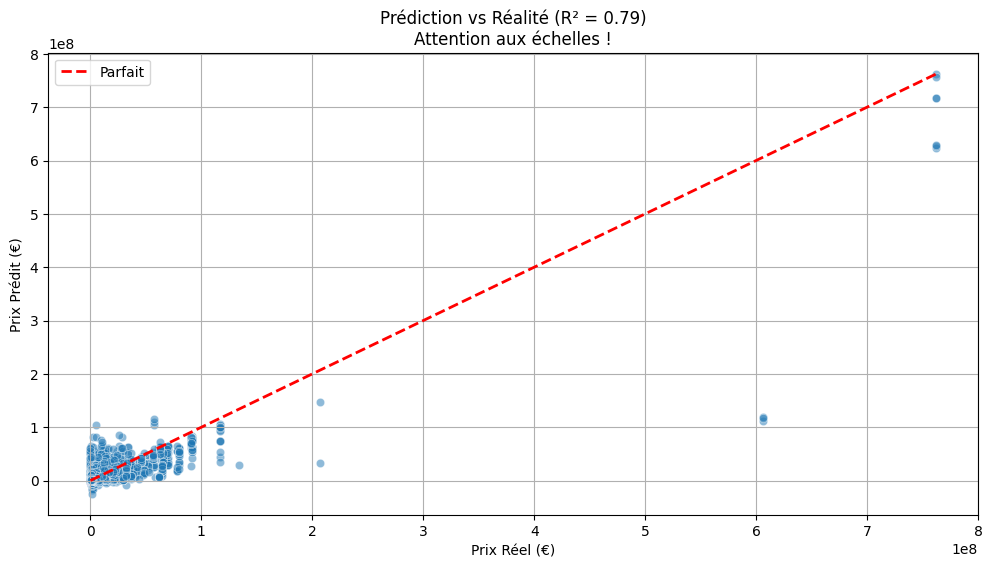

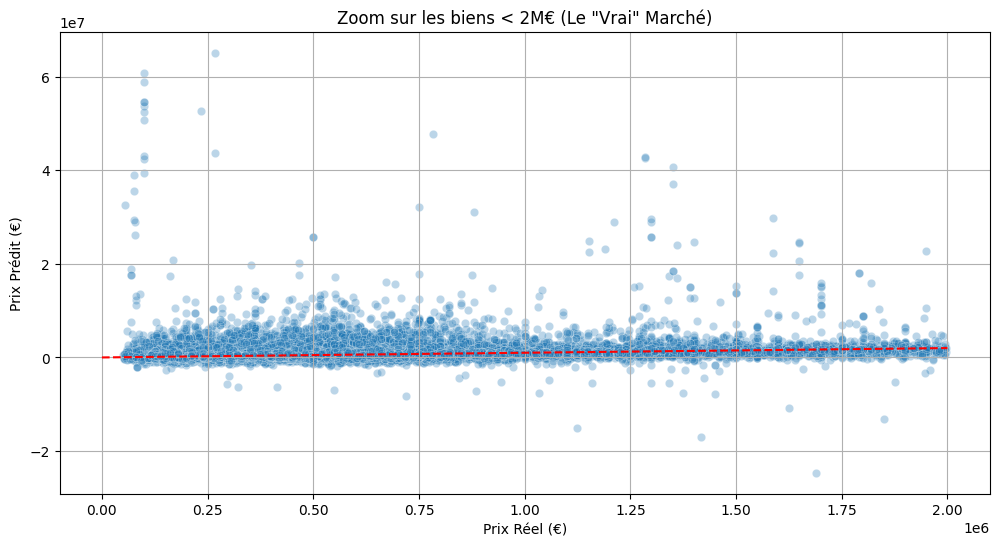

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# (On suppose que y_test et y_pred_final sont en mémoire après l'exécution précédente)

print("--- 📊 ANALYSE VISUELLE DES ERREURS (PARIS) ---")

# Création du DataFrame de résultats
df_results = pd.DataFrame({
    'Réel': y_test,
    'Prédit': y_pred_final
})

# Calcul de l'erreur absolue
df_results['Erreur Absolue'] = abs(df_results['Réel'] - df_results['Prédit'])

# 1. Identifier les Pires Erreurs (Les "Coupables")
print("\n--- TOP 10 DES PLUS GROSSES ERREURS ---")
print(df_results.sort_values(by='Erreur Absolue', ascending=False).head(10))

# 2. Graphique : Prédiction vs Réalité
plt.figure(figsize=(12, 6))

# On trace tout le monde
sns.scatterplot(data=df_results, x='Réel', y='Prédit', alpha=0.5)

# Ligne parfaite
plt.plot([df_results['Réel'].min(), df_results['Réel'].max()], 
         [df_results['Réel'].min(), df_results['Réel'].max()], 
         color='red', linestyle='--', linewidth=2, label='Parfait')

plt.title(f'Prédiction vs Réalité (R² = 0.79)\nAttention aux échelles !')
plt.xlabel('Prix Réel (€)')
plt.ylabel('Prix Prédit (€)')
plt.legend()
plt.grid(True)
plt.show()

# 3. Graphique "Zoomé" (Pour voir la réalité du marché "normal")
# On filtre les biens < 2 Millions d'euros pour voir comment le modèle se comporte pour le "commun des mortels"
subset = df_results[df_results['Réel'] < 2000000]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=subset, x='Réel', y='Prédit', alpha=0.3)
plt.plot([0, 2000000], [0, 2000000], color='red', linestyle='--')
plt.title('Zoom sur les biens < 2M€ (Le "Vrai" Marché)')
plt.xlabel('Prix Réel (€)')
plt.ylabel('Prix Prédit (€)')
plt.grid(True)
plt.show()

--- 🧹 NETTOYAGE FINAL (Lots Uniques & Standards) ---
Filtre 'Lot Unique' : 84745 ventes supprimées (Parkings, Caves, Immeubles...).
Lignes finales pour l'entraînement : 54697
-> Total supprimé : 89416 lignes.

--- Ré-entraînement sur le dataset 'Pur' ---

--- 🏆 RÉSULTATS FINAUX (LOTS UNIQUES PARIS) 🏆 ---
1. R-squared (R²)     : 0.7940
2. RMSE (Erreur Quad.): 184,824 €
3. MAE (Erreur Moy.)  : 104,106 €
4. MAPE (Erreur %)    : 23.26%


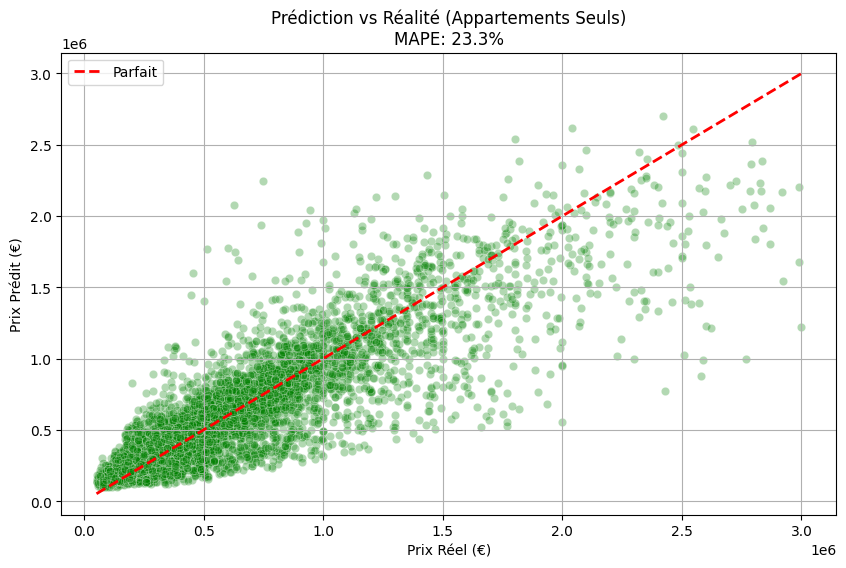

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

print("--- 🧹 NETTOYAGE FINAL (Lots Uniques & Standards) ---")

# 1. Création d'une copie
df_paris_clean = df_paris.copy()
initial_len = len(df_paris_clean)

# --- NOUVEAU FILTRE : LOT UNIQUE SEULEMENT ---
df_paris_clean = df_paris_clean[df_paris_clean['nombre_de_lots'] == 1]
len_after_lots = len(df_paris_clean)
print(f"Filtre 'Lot Unique' : {initial_len - len_after_lots} ventes supprimées (Parkings, Caves, Immeubles...).")

# 2. Autres Filtres (Toujours valides pour éviter les aberrations)
# A. Prix < 3M€
df_paris_clean = df_paris_clean[df_paris_clean['valeur_foncière'] < 3000000]

# B. Surface < 300 m2
df_paris_clean = df_paris_clean[df_paris_clean['surface_m2'] < 300]

# C. Cohérence Prix/m² (4k€ à 35k€)
df_paris_clean['prix_m2'] = df_paris_clean['valeur_foncière'] / df_paris_clean['surface_m2']
df_paris_clean = df_paris_clean[(df_paris_clean['prix_m2'] > 4000) & (df_paris_clean['prix_m2'] < 35000)]
df_paris_clean = df_paris_clean.drop(columns=['prix_m2'])

final_len = len(df_paris_clean)
print(f"Lignes finales pour l'entraînement : {final_len}")
print(f"-> Total supprimé : {initial_len - final_len} lignes.")

# --- 3. Préparation ---
target_col = 'valeur_foncière'
features_paris = ['surface_m2', 'nombre_pieces_principales', 'annee', 'mois', 
                  'nombre_de_lots', 'code_postal', 'type_local']

X_clean = df_paris_clean[features_paris]
y_clean = df_paris_clean[target_col]

# Nouveau Split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# --- 4. Ré-entraînement du Champion (XGBoost) ---
print("\n--- Ré-entraînement sur le dataset 'Pur' ---")

# On réutilise le pipeline défini précédemment
final_model_clean = Pipeline(steps=[
        ('preprocessor', preprocessor_paris),
        ('model', XGBRegressor(random_state=42, n_jobs=-1, enable_categorical=True, **best_params))
    ])

final_model_clean.fit(X_train_c, y_train_c)
y_pred_clean = final_model_clean.predict(X_test_c)

# --- 5. Résultats ---
rmse_c = np.sqrt(mean_squared_error(y_test_c, y_pred_clean))
r2_c = r2_score(y_test_c, y_pred_clean)
mae_c = mean_absolute_error(y_test_c, y_pred_clean)
mape_c = mean_absolute_percentage_error(y_test_c, y_pred_clean)

print("\n--- 🏆 RÉSULTATS FINAUX (LOTS UNIQUES PARIS) 🏆 ---")
print(f"1. R-squared (R²)     : {r2_c:.4f}")
print(f"2. RMSE (Erreur Quad.): {rmse_c:,.0f} €")
print(f"3. MAE (Erreur Moy.)  : {mae_c:,.0f} €")
print(f"4. MAPE (Erreur %)    : {mape_c:.2%}")

# --- 6. Visualisation ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_c, y=y_pred_clean, alpha=0.3, color='green')
plt.plot([y_test_c.min(), y_test_c.max()], [y_test_c.min(), y_test_c.max()], 
         color='red', linestyle='--', linewidth=2, label='Parfait')
plt.title(f'Prédiction vs Réalité (Appartements Seuls)\nMAPE: {mape_c:.1%}')
plt.xlabel('Prix Réel (€)')
plt.ylabel('Prix Prédit (€)')
plt.legend()
plt.grid(True)
plt.show()

In [126]:
import optuna
import numpy as np
import pandas as pd
import joblib
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

print("--- 🚀 3. OPTIMISATION SUR DONNÉES NETTOYÉES (PARIS) ---")

# --- 1. Préparation des Données ---
# On repart de df_paris_clean (créé à l'étape précédente)
features_paris = ['surface_m2', 'nombre_pieces_principales', 'annee', 'mois', 
                  'nombre_de_lots', 'code_postal', 'type_local']
target_col = 'valeur_foncière'

X = df_paris_clean[features_paris]
y = df_paris_clean[target_col]

# Split Final (80% Train / 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Échantillon pour aller vite (50k lignes max)
if len(X_train) > 50000:
    X_sample = X_train.sample(50000, random_state=42)
    y_sample = y_train.loc[X_sample.index]
else:
    X_sample = X_train
    y_sample = y_train

print(f"Optimisation lancée sur {len(X_sample)} lignes (Clean).")

# --- 2. Préparateur (Pipeline) ---
numeric_features = ['surface_m2', 'nombre_pieces_principales', 'annee', 'mois', 'nombre_de_lots']
categorical_features = ['code_postal', 'type_local']

preprocessor_paris = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features)
])

# --- 3. Fonction Objective Optuna ---
def objective_xgb_clean(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 2000), # On peut aller plus haut
        'max_depth': trial.suggest_int('max_depth', 4, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.1),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 2.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 2.0),
    }
    
    model = XGBRegressor(random_state=42, n_jobs=-1, enable_categorical=True, **params)
    
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor_paris),
        ('model', model)
    ])
    
    # Validation croisée simple sur l'échantillon
    X_tr, X_val, y_tr, y_val = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)
    
    pipeline.fit(X_tr, y_tr)
    y_pred = pipeline.predict(X_val)
    
    return np.sqrt(mean_squared_error(y_val, y_pred))

# --- 4. Lancement de l'Optimisation ---
print("Recherche des meilleurs hyperparamètres (50 essais)...")
study_paris_clean = optuna.create_study(direction='minimize')
study_paris_clean.optimize(objective_xgb_clean, n_trials=50, show_progress_bar=True)

print("✅ Meilleurs paramètres trouvés :")
print(study_paris_clean.best_params)

# --- 5. Entraînement Final du Champion ---
print("\n--- ENTRAÎNEMENT DU MODÈLE FINAL (XGBoost Clean) ---")

best_params = study_paris_clean.best_params
final_model_paris_clean = Pipeline(steps=[
        ('preprocessor', preprocessor_paris),
        ('model', XGBRegressor(random_state=42, n_jobs=-1, enable_categorical=True, **best_params))
    ])

final_model_paris_clean.fit(X_train, y_train)
y_pred_final = final_model_paris_clean.predict(X_test)

# --- 6. Rapport de Performance Final ---
rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
r2 = r2_score(y_test, y_pred_final)
mae = mean_absolute_error(y_test, y_pred_final)
mape = mean_absolute_percentage_error(y_test, y_pred_final)

print("\n--- 🏆 RÉSULTATS DÉFINITIFS (Paris Résidentiel) 🏆 ---")
print(f"1. R-squared (R²)     : {r2:.4f}")
print(f"2. RMSE (Erreur Quad.): {rmse:,.0f} €")
print(f"3. MAE (Erreur Moy.)  : {mae:,.0f} €")
print(f"4. MAPE (Erreur %)    : {mape:.2%}")

# --- 7. Sauvegarde ---
filename = 'champion_model_paris_clean.joblib'
joblib.dump(final_model_paris_clean, filename)
print(f"\n💾 Modèle sauvegardé sous : {filename}")

[I 2025-11-17 16:55:34,682] A new study created in memory with name: no-name-f1758894-21a5-47bf-8c66-a114ed3030dd


--- 🚀 3. OPTIMISATION SUR DONNÉES NETTOYÉES (PARIS) ---
Optimisation lancée sur 43757 lignes (Clean).
Recherche des meilleurs hyperparamètres (50 essais)...


Best trial: 0. Best value: 187700:   2%|▏         | 1/50 [00:02<01:56,  2.38s/it]

[I 2025-11-17 16:55:37,067] Trial 0 finished with value: 187699.5618820023 and parameters: {'n_estimators': 601, 'max_depth': 11, 'learning_rate': 0.024891140484867826, 'subsample': 0.6369301500065291, 'colsample_bytree': 0.8653088141464579, 'min_child_weight': 7, 'reg_alpha': 1.3723962325861412, 'reg_lambda': 0.19543511257118595}. Best is trial 0 with value: 187699.5618820023.


Best trial: 0. Best value: 187700:   4%|▍         | 2/50 [00:05<02:10,  2.72s/it]

[I 2025-11-17 16:55:40,022] Trial 1 finished with value: 204042.2610946409 and parameters: {'n_estimators': 943, 'max_depth': 10, 'learning_rate': 0.06366794519215402, 'subsample': 0.7745170279559764, 'colsample_bytree': 0.7411077636247442, 'min_child_weight': 4, 'reg_alpha': 0.5917405320366329, 'reg_lambda': 0.543439879375984}. Best is trial 0 with value: 187699.5618820023.


Best trial: 2. Best value: 177946:   6%|▌         | 3/50 [00:06<01:23,  1.78s/it]

[I 2025-11-17 16:55:40,688] Trial 2 finished with value: 177946.13624043608 and parameters: {'n_estimators': 731, 'max_depth': 4, 'learning_rate': 0.00983189957725656, 'subsample': 0.7408893082043114, 'colsample_bytree': 0.922479637777895, 'min_child_weight': 5, 'reg_alpha': 0.37089007329937207, 'reg_lambda': 0.9332332820904612}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:   8%|▊         | 4/50 [00:08<01:39,  2.16s/it]

[I 2025-11-17 16:55:43,439] Trial 3 finished with value: 200837.31913142512 and parameters: {'n_estimators': 1336, 'max_depth': 9, 'learning_rate': 0.0597375620172093, 'subsample': 0.8927728522890914, 'colsample_bytree': 0.7917442172976028, 'min_child_weight': 8, 'reg_alpha': 0.4520277812243356, 'reg_lambda': 0.008867318182206096}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  10%|█         | 5/50 [00:10<01:30,  2.01s/it]

[I 2025-11-17 16:55:45,186] Trial 4 finished with value: 194845.30335391365 and parameters: {'n_estimators': 1082, 'max_depth': 7, 'learning_rate': 0.0681093724980929, 'subsample': 0.7310511699155281, 'colsample_bytree': 0.89650855811599, 'min_child_weight': 4, 'reg_alpha': 1.9588371137313416, 'reg_lambda': 0.4171018827937689}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  12%|█▏        | 6/50 [00:25<04:41,  6.40s/it]

[I 2025-11-17 16:56:00,103] Trial 5 finished with value: 213407.9638802978 and parameters: {'n_estimators': 1759, 'max_depth': 12, 'learning_rate': 0.04646163293814201, 'subsample': 0.6497909342411018, 'colsample_bytree': 0.9503318667441182, 'min_child_weight': 1, 'reg_alpha': 1.628471907097624, 'reg_lambda': 0.4150496091799978}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  14%|█▍        | 7/50 [00:26<03:22,  4.71s/it]

[I 2025-11-17 16:56:01,324] Trial 6 finished with value: 180342.85744893362 and parameters: {'n_estimators': 709, 'max_depth': 7, 'learning_rate': 0.024245086987672606, 'subsample': 0.8436371662985226, 'colsample_bytree': 0.7096579497252721, 'min_child_weight': 5, 'reg_alpha': 1.97836451573185, 'reg_lambda': 1.6853446049683263}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  16%|█▌        | 8/50 [00:31<03:13,  4.61s/it]

[I 2025-11-17 16:56:05,728] Trial 7 finished with value: 212815.74690270706 and parameters: {'n_estimators': 953, 'max_depth': 12, 'learning_rate': 0.07651040784417255, 'subsample': 0.6132270220113314, 'colsample_bytree': 0.7650850495177304, 'min_child_weight': 5, 'reg_alpha': 1.3623834376764807, 'reg_lambda': 0.17279240610624513}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  18%|█▊        | 9/50 [00:32<02:33,  3.74s/it]

[I 2025-11-17 16:56:07,559] Trial 8 finished with value: 189241.8834518647 and parameters: {'n_estimators': 975, 'max_depth': 9, 'learning_rate': 0.045542980228827516, 'subsample': 0.6018577629474928, 'colsample_bytree': 0.6828525073465106, 'min_child_weight': 7, 'reg_alpha': 0.7048794842674508, 'reg_lambda': 0.42006014973933414}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  20%|██        | 10/50 [00:35<02:16,  3.42s/it]

[I 2025-11-17 16:56:10,267] Trial 9 finished with value: 188481.15050825896 and parameters: {'n_estimators': 1639, 'max_depth': 8, 'learning_rate': 0.024335246030070114, 'subsample': 0.7091280663986339, 'colsample_bytree': 0.845835708481228, 'min_child_weight': 5, 'reg_alpha': 0.9700656310670044, 'reg_lambda': 1.8630866877128438}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  22%|██▏       | 11/50 [00:36<01:38,  2.53s/it]

[I 2025-11-17 16:56:10,767] Trial 10 finished with value: 178715.38793655296 and parameters: {'n_estimators': 526, 'max_depth': 4, 'learning_rate': 0.010085095789445834, 'subsample': 0.9927793034624186, 'colsample_bytree': 0.9926655956850541, 'min_child_weight': 10, 'reg_alpha': 0.21919558995259467, 'reg_lambda': 1.1736777010939496}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  24%|██▍       | 12/50 [00:36<01:13,  1.92s/it]

[I 2025-11-17 16:56:11,310] Trial 11 finished with value: 185051.56817523902 and parameters: {'n_estimators': 505, 'max_depth': 4, 'learning_rate': 0.00519058753080293, 'subsample': 0.9875763104286666, 'colsample_bytree': 0.9967569939860136, 'min_child_weight': 10, 'reg_alpha': 0.009593653758101228, 'reg_lambda': 1.1952247973417094}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  26%|██▌       | 13/50 [00:37<00:57,  1.55s/it]

[I 2025-11-17 16:56:11,990] Trial 12 finished with value: 183348.57545120464 and parameters: {'n_estimators': 787, 'max_depth': 4, 'learning_rate': 0.09804348537767288, 'subsample': 0.9958298649215014, 'colsample_bytree': 0.9974238936254681, 'min_child_weight': 2, 'reg_alpha': 0.09439256258630233, 'reg_lambda': 1.1116964433586756}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  28%|██▊       | 14/50 [00:38<00:54,  1.52s/it]

[I 2025-11-17 16:56:13,430] Trial 13 finished with value: 178443.64844355025 and parameters: {'n_estimators': 1320, 'max_depth': 5, 'learning_rate': 0.005094221563760184, 'subsample': 0.899643287703061, 'colsample_bytree': 0.6135251907841925, 'min_child_weight': 10, 'reg_alpha': 0.3186521386302855, 'reg_lambda': 0.843143211131139}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  30%|███       | 15/50 [00:40<00:53,  1.52s/it]

[I 2025-11-17 16:56:14,951] Trial 14 finished with value: 180217.69073386808 and parameters: {'n_estimators': 1386, 'max_depth': 6, 'learning_rate': 0.016981269600563467, 'subsample': 0.9152767845658573, 'colsample_bytree': 0.6160434019184493, 'min_child_weight': 8, 'reg_alpha': 0.36777214354712545, 'reg_lambda': 0.8233733720757628}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  32%|███▏      | 16/50 [00:41<00:52,  1.54s/it]

[I 2025-11-17 16:56:16,548] Trial 15 finished with value: 183049.87165264582 and parameters: {'n_estimators': 1523, 'max_depth': 5, 'learning_rate': 0.03561032003694862, 'subsample': 0.8317518260163743, 'colsample_bytree': 0.6046712243849862, 'min_child_weight': 3, 'reg_alpha': 0.8149736298997164, 'reg_lambda': 0.8130908443838281}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  34%|███▍      | 17/50 [00:43<00:49,  1.50s/it]

[I 2025-11-17 16:56:17,957] Trial 16 finished with value: 184224.0916948628 and parameters: {'n_estimators': 1221, 'max_depth': 6, 'learning_rate': 0.036894345269881314, 'subsample': 0.9094282020879634, 'colsample_bytree': 0.9157868108586917, 'min_child_weight': 7, 'reg_alpha': 0.34160366287666644, 'reg_lambda': 1.4436494928545764}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  36%|███▌      | 18/50 [00:45<00:51,  1.60s/it]

[I 2025-11-17 16:56:19,793] Trial 17 finished with value: 180311.85972371118 and parameters: {'n_estimators': 1933, 'max_depth': 5, 'learning_rate': 0.014954940138558609, 'subsample': 0.7598840020530179, 'colsample_bytree': 0.8298236023337962, 'min_child_weight': 9, 'reg_alpha': 1.1422614640146955, 'reg_lambda': 0.8544881182024083}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  38%|███▊      | 19/50 [00:46<00:45,  1.47s/it]

[I 2025-11-17 16:56:20,950] Trial 18 finished with value: 178229.07600916302 and parameters: {'n_estimators': 1174, 'max_depth': 5, 'learning_rate': 0.0065603789002386306, 'subsample': 0.6888448718771661, 'colsample_bytree': 0.6495242906480632, 'min_child_weight': 6, 'reg_alpha': 0.5676976817925988, 'reg_lambda': 1.3957295932178566}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  40%|████      | 20/50 [00:47<00:42,  1.40s/it]

[I 2025-11-17 16:56:22,206] Trial 19 finished with value: 183664.68319389314 and parameters: {'n_estimators': 1134, 'max_depth': 6, 'learning_rate': 0.03382927729976941, 'subsample': 0.6822793039490976, 'colsample_bytree': 0.8024790259862775, 'min_child_weight': 6, 'reg_alpha': 0.5628277033964468, 'reg_lambda': 1.419987324993015}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  42%|████▏     | 21/50 [00:48<00:38,  1.33s/it]

[I 2025-11-17 16:56:23,355] Trial 20 finished with value: 190520.292611499 and parameters: {'n_estimators': 798, 'max_depth': 7, 'learning_rate': 0.0876605970866148, 'subsample': 0.6826945443491484, 'colsample_bytree': 0.6625484660358806, 'min_child_weight': 3, 'reg_alpha': 0.9061759656536348, 'reg_lambda': 1.5045521871417142}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  44%|████▍     | 22/50 [00:50<00:38,  1.37s/it]

[I 2025-11-17 16:56:24,822] Trial 21 finished with value: 178304.1102804848 and parameters: {'n_estimators': 1459, 'max_depth': 5, 'learning_rate': 0.005412890252668263, 'subsample': 0.807785117981961, 'colsample_bytree': 0.6478525040924811, 'min_child_weight': 6, 'reg_alpha': 0.22319042268446324, 'reg_lambda': 0.9866322214005314}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  46%|████▌     | 23/50 [00:51<00:37,  1.39s/it]

[I 2025-11-17 16:56:26,266] Trial 22 finished with value: 179535.53592273066 and parameters: {'n_estimators': 1519, 'max_depth': 5, 'learning_rate': 0.01421407911049493, 'subsample': 0.8001692298287513, 'colsample_bytree': 0.6586664958037748, 'min_child_weight': 6, 'reg_alpha': 0.20903362991717855, 'reg_lambda': 1.2898685866662427}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  48%|████▊     | 24/50 [00:52<00:34,  1.33s/it]

[I 2025-11-17 16:56:27,442] Trial 23 finished with value: 179986.36883621538 and parameters: {'n_estimators': 1473, 'max_depth': 4, 'learning_rate': 0.023399349499286567, 'subsample': 0.7399437277555031, 'colsample_bytree': 0.7185256048121978, 'min_child_weight': 6, 'reg_alpha': 0.5504829624487522, 'reg_lambda': 1.016145047186226}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  50%|█████     | 25/50 [00:54<00:38,  1.55s/it]

[I 2025-11-17 16:56:29,499] Trial 24 finished with value: 178611.03842104276 and parameters: {'n_estimators': 1717, 'max_depth': 6, 'learning_rate': 0.005481890225829358, 'subsample': 0.8087766490270473, 'colsample_bytree': 0.640132449639344, 'min_child_weight': 4, 'reg_alpha': 0.7311348747851686, 'reg_lambda': 0.6697851988689552}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  52%|█████▏    | 26/50 [00:55<00:34,  1.43s/it]

[I 2025-11-17 16:56:30,648] Trial 25 finished with value: 179475.76565412263 and parameters: {'n_estimators': 1219, 'max_depth': 5, 'learning_rate': 0.017480886492327014, 'subsample': 0.6981899864265255, 'colsample_bytree': 0.6792994895809028, 'min_child_weight': 8, 'reg_alpha': 0.1337834283156944, 'reg_lambda': 1.6832703751268578}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  54%|█████▍    | 27/50 [00:56<00:28,  1.26s/it]

[I 2025-11-17 16:56:31,506] Trial 26 finished with value: 179854.21659942743 and parameters: {'n_estimators': 1083, 'max_depth': 4, 'learning_rate': 0.030093200664910145, 'subsample': 0.7748695572572707, 'colsample_bytree': 0.7510880019059165, 'min_child_weight': 6, 'reg_alpha': 0.4833991057000079, 'reg_lambda': 0.9982282968634746}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  56%|█████▌    | 28/50 [00:58<00:29,  1.36s/it]

[I 2025-11-17 16:56:33,119] Trial 27 finished with value: 179849.24708749307 and parameters: {'n_estimators': 856, 'max_depth': 8, 'learning_rate': 0.01119972172492033, 'subsample': 0.8589958425194629, 'colsample_bytree': 0.7123724774185365, 'min_child_weight': 7, 'reg_alpha': 1.1590136523425452, 'reg_lambda': 1.5759175337548812}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  58%|█████▊    | 29/50 [00:59<00:24,  1.15s/it]

[I 2025-11-17 16:56:33,768] Trial 28 finished with value: 181566.37788251307 and parameters: {'n_estimators': 660, 'max_depth': 5, 'learning_rate': 0.04629835292819263, 'subsample': 0.6593472942230099, 'colsample_bytree': 0.928833698021674, 'min_child_weight': 5, 'reg_alpha': 0.7250285626791085, 'reg_lambda': 1.311113453746553}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  60%|██████    | 30/50 [01:01<00:30,  1.53s/it]

[I 2025-11-17 16:56:36,195] Trial 29 finished with value: 185126.77096196928 and parameters: {'n_estimators': 1988, 'max_depth': 6, 'learning_rate': 0.021804332035400827, 'subsample': 0.7404186568314128, 'colsample_bytree': 0.8740456847603643, 'min_child_weight': 3, 'reg_alpha': 0.2690098377653532, 'reg_lambda': 1.9582733914582304}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  62%|██████▏   | 31/50 [01:03<00:29,  1.55s/it]

[I 2025-11-17 16:56:37,779] Trial 30 finished with value: 180750.82076797658 and parameters: {'n_estimators': 1838, 'max_depth': 4, 'learning_rate': 0.028963818506149007, 'subsample': 0.7189566413580774, 'colsample_bytree': 0.6400182354561744, 'min_child_weight': 7, 'reg_alpha': 0.41342532963621037, 'reg_lambda': 0.9926212986540819}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  64%|██████▍   | 32/50 [01:04<00:26,  1.47s/it]

[I 2025-11-17 16:56:39,056] Trial 31 finished with value: 178231.64862899843 and parameters: {'n_estimators': 1340, 'max_depth': 5, 'learning_rate': 0.006354288075138467, 'subsample': 0.9542884191616493, 'colsample_bytree': 0.6257044145895854, 'min_child_weight': 8, 'reg_alpha': 0.004693876527223639, 'reg_lambda': 0.66129742159788}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  66%|██████▌   | 33/50 [01:05<00:24,  1.42s/it]

[I 2025-11-17 16:56:40,364] Trial 32 finished with value: 178776.0399352406 and parameters: {'n_estimators': 1394, 'max_depth': 5, 'learning_rate': 0.011430540315845384, 'subsample': 0.962798983076637, 'colsample_bytree': 0.6400070891480579, 'min_child_weight': 9, 'reg_alpha': 0.12031478852683317, 'reg_lambda': 0.6396153814587564}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  68%|██████▊   | 34/50 [01:06<00:21,  1.31s/it]

[I 2025-11-17 16:56:41,431] Trial 33 finished with value: 178937.42985674195 and parameters: {'n_estimators': 1270, 'max_depth': 4, 'learning_rate': 0.01810697799583552, 'subsample': 0.7770091082743326, 'colsample_bytree': 0.6936925736198178, 'min_child_weight': 8, 'reg_alpha': 0.017679675897108286, 'reg_lambda': 0.6942368210032767}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  70%|███████   | 35/50 [01:08<00:23,  1.59s/it]

[I 2025-11-17 16:56:43,679] Trial 34 finished with value: 181272.9777558256 and parameters: {'n_estimators': 1596, 'max_depth': 7, 'learning_rate': 0.010401476616022871, 'subsample': 0.8737309469325836, 'colsample_bytree': 0.7781650010334226, 'min_child_weight': 4, 'reg_alpha': 0.6134286867027984, 'reg_lambda': 0.9469669553529789}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  72%|███████▏  | 36/50 [01:10<00:21,  1.51s/it]

[I 2025-11-17 16:56:45,006] Trial 35 finished with value: 179076.41321149564 and parameters: {'n_estimators': 1172, 'max_depth': 6, 'learning_rate': 0.008804130499486956, 'subsample': 0.9406311193672856, 'colsample_bytree': 0.8161412912085012, 'min_child_weight': 6, 'reg_alpha': 0.22523623330964218, 'reg_lambda': 0.5420603405796537}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  74%|███████▍  | 37/50 [01:13<00:27,  2.14s/it]

[I 2025-11-17 16:56:48,622] Trial 36 finished with value: 189670.32001253625 and parameters: {'n_estimators': 1409, 'max_depth': 11, 'learning_rate': 0.019452063438471667, 'subsample': 0.6361510124812016, 'colsample_bytree': 0.7319984728809745, 'min_child_weight': 9, 'reg_alpha': 0.4534803373083326, 'reg_lambda': 1.0939679957041526}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  76%|███████▌  | 38/50 [01:15<00:23,  2.00s/it]

[I 2025-11-17 16:56:50,283] Trial 37 finished with value: 190160.8940121524 and parameters: {'n_estimators': 1037, 'max_depth': 7, 'learning_rate': 0.05347807054603189, 'subsample': 0.7559086901756374, 'colsample_bytree': 0.9629400830369536, 'min_child_weight': 7, 'reg_alpha': 1.7153135578453766, 'reg_lambda': 0.5321010599635092}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  78%|███████▊  | 39/50 [01:19<00:28,  2.56s/it]

[I 2025-11-17 16:56:54,155] Trial 38 finished with value: 210956.6000576423 and parameters: {'n_estimators': 1627, 'max_depth': 9, 'learning_rate': 0.07404521173443615, 'subsample': 0.8275705037661152, 'colsample_bytree': 0.8779933068845643, 'min_child_weight': 5, 'reg_alpha': 0.12368994280355816, 'reg_lambda': 0.27636705847328347}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  80%|████████  | 40/50 [01:20<00:22,  2.23s/it]

[I 2025-11-17 16:56:55,604] Trial 39 finished with value: 181191.73427420852 and parameters: {'n_estimators': 1311, 'max_depth': 5, 'learning_rate': 0.028166916538437444, 'subsample': 0.6824228326827487, 'colsample_bytree': 0.6284603888793392, 'min_child_weight': 4, 'reg_alpha': 0.6325489504871914, 'reg_lambda': 0.7681114453278014}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  82%|████████▏ | 41/50 [01:21<00:16,  1.79s/it]

[I 2025-11-17 16:56:56,387] Trial 40 finished with value: 178279.93054067885 and parameters: {'n_estimators': 885, 'max_depth': 4, 'learning_rate': 0.01407505833457091, 'subsample': 0.6355295606033455, 'colsample_bytree': 0.6732824142696656, 'min_child_weight': 8, 'reg_alpha': 0.4899762437323014, 'reg_lambda': 1.3070705146630508}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  84%|████████▍ | 42/50 [01:22<00:11,  1.49s/it]

[I 2025-11-17 16:56:57,164] Trial 41 finished with value: 178471.79201562505 and parameters: {'n_estimators': 876, 'max_depth': 4, 'learning_rate': 0.014887671140405513, 'subsample': 0.6292308984465115, 'colsample_bytree': 0.6599144855901725, 'min_child_weight': 8, 'reg_alpha': 0.4898398185264435, 'reg_lambda': 1.2957743755240891}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  86%|████████▌ | 43/50 [01:23<00:08,  1.24s/it]

[I 2025-11-17 16:56:57,825] Trial 42 finished with value: 185593.73664746407 and parameters: {'n_estimators': 603, 'max_depth': 4, 'learning_rate': 0.005229151408275701, 'subsample': 0.6184369718003163, 'colsample_bytree': 0.6835373044219626, 'min_child_weight': 9, 'reg_alpha': 0.30327439991768945, 'reg_lambda': 1.2165796240276956}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  88%|████████▊ | 44/50 [01:23<00:06,  1.12s/it]

[I 2025-11-17 16:56:58,675] Trial 43 finished with value: 178323.23170634682 and parameters: {'n_estimators': 746, 'max_depth': 5, 'learning_rate': 0.009920203569050934, 'subsample': 0.6613168917219387, 'colsample_bytree': 0.6624954243531326, 'min_child_weight': 5, 'reg_alpha': 0.1915610222648851, 'reg_lambda': 0.9153053162457246}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  90%|█████████ | 45/50 [01:26<00:07,  1.46s/it]

[I 2025-11-17 16:57:00,916] Trial 44 finished with value: 185464.01466490037 and parameters: {'n_estimators': 995, 'max_depth': 10, 'learning_rate': 0.021335069754887775, 'subsample': 0.6483566503552111, 'colsample_bytree': 0.6025452383702351, 'min_child_weight': 6, 'reg_alpha': 0.00515277191637481, 'reg_lambda': 1.1041019856301835}. Best is trial 2 with value: 177946.13624043608.


Best trial: 2. Best value: 177946:  92%|█████████▏| 46/50 [01:26<00:04,  1.24s/it]

[I 2025-11-17 16:57:01,643] Trial 45 finished with value: 180931.77955032024 and parameters: {'n_estimators': 870, 'max_depth': 4, 'learning_rate': 0.06099782091651895, 'subsample': 0.7118440869423869, 'colsample_bytree': 0.6309995817237887, 'min_child_weight': 8, 'reg_alpha': 0.37538377239805737, 'reg_lambda': 1.6775120590643124}. Best is trial 2 with value: 177946.13624043608.


Best trial: 46. Best value: 177911:  94%|█████████▍| 47/50 [01:27<00:03,  1.08s/it]

[I 2025-11-17 16:57:02,349] Trial 46 finished with value: 177910.7325070344 and parameters: {'n_estimators': 678, 'max_depth': 5, 'learning_rate': 0.01227061523727396, 'subsample': 0.929872785751625, 'colsample_bytree': 0.8536009537062544, 'min_child_weight': 7, 'reg_alpha': 0.8246276078689556, 'reg_lambda': 1.3524338487578544}. Best is trial 46 with value: 177910.7325070344.


Best trial: 46. Best value: 177911:  96%|█████████▌| 48/50 [01:28<00:01,  1.01it/s]

[I 2025-11-17 16:57:03,132] Trial 47 finished with value: 179718.2459610175 and parameters: {'n_estimators': 665, 'max_depth': 6, 'learning_rate': 0.026242133628279558, 'subsample': 0.9701683344757146, 'colsample_bytree': 0.8515118167877967, 'min_child_weight': 7, 'reg_alpha': 0.8003683353867848, 'reg_lambda': 1.3810175419916464}. Best is trial 46 with value: 177910.7325070344.


Best trial: 46. Best value: 177911:  98%|█████████▊| 49/50 [01:28<00:00,  1.18it/s]

[I 2025-11-17 16:57:03,639] Trial 48 finished with value: 178884.21870143877 and parameters: {'n_estimators': 576, 'max_depth': 4, 'learning_rate': 0.04049681695860372, 'subsample': 0.9326563628533697, 'colsample_bytree': 0.9082620947413524, 'min_child_weight': 7, 'reg_alpha': 0.9070388465337824, 'reg_lambda': 1.5533851349794539}. Best is trial 46 with value: 177910.7325070344.


Best trial: 46. Best value: 177911: 100%|██████████| 50/50 [01:29<00:00,  1.80s/it]


[I 2025-11-17 16:57:04,532] Trial 49 finished with value: 178435.8634529021 and parameters: {'n_estimators': 923, 'max_depth': 5, 'learning_rate': 0.013626337295260731, 'subsample': 0.8856233792523339, 'colsample_bytree': 0.9617460233495057, 'min_child_weight': 8, 'reg_alpha': 0.6536379454150398, 'reg_lambda': 1.2395061416718172}. Best is trial 46 with value: 177910.7325070344.
✅ Meilleurs paramètres trouvés :
{'n_estimators': 678, 'max_depth': 5, 'learning_rate': 0.01227061523727396, 'subsample': 0.929872785751625, 'colsample_bytree': 0.8536009537062544, 'min_child_weight': 7, 'reg_alpha': 0.8246276078689556, 'reg_lambda': 1.3524338487578544}

--- ENTRAÎNEMENT DU MODÈLE FINAL (XGBoost Clean) ---

--- 🏆 RÉSULTATS DÉFINITIFS (Paris Résidentiel) 🏆 ---
1. R-squared (R²)     : 0.7995
2. RMSE (Erreur Quad.): 182,369 €
3. MAE (Erreur Moy.)  : 103,553 €
4. MAPE (Erreur %)    : 23.43%

💾 Modèle sauvegardé sous : champion_model_paris_clean.joblib


[I 2025-11-17 16:59:56,033] A new study created in memory with name: no-name-f55ed61f-7caf-468e-900d-d6d216690a4d


--- 🚀 3. OPTIMISATION SUR DONNÉES NETTOYÉES (PARIS) ---
Optimisation lancée sur 43757 lignes (Clean).
Recherche des meilleurs hyperparamètres (50 essais)...


Best trial: 0. Best value: 178794:   2%|▏         | 1/50 [00:01<01:16,  1.56s/it]

[I 2025-11-17 16:59:57,594] Trial 0 finished with value: 178794.48658846144 and parameters: {'n_estimators': 1556, 'max_depth': 4, 'learning_rate': 0.014025277850362571, 'subsample': 0.8277403422883841, 'colsample_bytree': 0.9959880878249856, 'min_child_weight': 10, 'reg_alpha': 0.2619090178844523, 'reg_lambda': 1.5611622185762322}. Best is trial 0 with value: 178794.48658846144.


Best trial: 0. Best value: 178794:   4%|▍         | 2/50 [00:03<01:29,  1.87s/it]

[I 2025-11-17 16:59:59,689] Trial 1 finished with value: 186990.00325329634 and parameters: {'n_estimators': 1643, 'max_depth': 6, 'learning_rate': 0.0371201049278631, 'subsample': 0.828761596229061, 'colsample_bytree': 0.7151674799056809, 'min_child_weight': 2, 'reg_alpha': 1.6419408349294995, 'reg_lambda': 1.2007589599449107}. Best is trial 0 with value: 178794.48658846144.


Best trial: 0. Best value: 178794:   6%|▌         | 3/50 [00:05<01:37,  2.08s/it]

[I 2025-11-17 17:00:02,012] Trial 2 finished with value: 179622.78452742964 and parameters: {'n_estimators': 875, 'max_depth': 9, 'learning_rate': 0.007852628570228361, 'subsample': 0.735459247682963, 'colsample_bytree': 0.6464497858545617, 'min_child_weight': 9, 'reg_alpha': 1.7121881269439518, 'reg_lambda': 0.7800501731734477}. Best is trial 0 with value: 178794.48658846144.


Best trial: 0. Best value: 178794:   8%|▊         | 4/50 [00:07<01:19,  1.73s/it]

[I 2025-11-17 17:00:03,200] Trial 3 finished with value: 183104.8312147055 and parameters: {'n_estimators': 645, 'max_depth': 8, 'learning_rate': 0.02155667879893647, 'subsample': 0.6449925080905844, 'colsample_bytree': 0.7985654079316018, 'min_child_weight': 3, 'reg_alpha': 1.671069332687139, 'reg_lambda': 0.5611274902184014}. Best is trial 0 with value: 178794.48658846144.


Best trial: 0. Best value: 178794:  10%|█         | 5/50 [00:10<01:36,  2.15s/it]

[I 2025-11-17 17:00:06,091] Trial 4 finished with value: 188833.32559287376 and parameters: {'n_estimators': 1542, 'max_depth': 9, 'learning_rate': 0.018629673841370018, 'subsample': 0.9711503836618713, 'colsample_bytree': 0.98038647751756, 'min_child_weight': 5, 'reg_alpha': 1.5157968187945297, 'reg_lambda': 1.101065107733909}. Best is trial 0 with value: 178794.48658846144.


Best trial: 0. Best value: 178794:  12%|█▏        | 6/50 [00:14<02:05,  2.86s/it]

[I 2025-11-17 17:00:10,339] Trial 5 finished with value: 194899.984248489 and parameters: {'n_estimators': 1003, 'max_depth': 12, 'learning_rate': 0.018904842930350736, 'subsample': 0.6594632325358399, 'colsample_bytree': 0.8735658701609532, 'min_child_weight': 3, 'reg_alpha': 0.33900208340751115, 'reg_lambda': 1.3285648185617418}. Best is trial 0 with value: 178794.48658846144.


Best trial: 0. Best value: 178794:  14%|█▍        | 7/50 [00:16<01:48,  2.52s/it]

[I 2025-11-17 17:00:12,158] Trial 6 finished with value: 182178.2049106145 and parameters: {'n_estimators': 1863, 'max_depth': 5, 'learning_rate': 0.026397718963489244, 'subsample': 0.8504754977396041, 'colsample_bytree': 0.6581733875187442, 'min_child_weight': 4, 'reg_alpha': 1.3819773515717015, 'reg_lambda': 1.8755352851679916}. Best is trial 0 with value: 178794.48658846144.


Best trial: 0. Best value: 178794:  16%|█▌        | 8/50 [00:18<01:42,  2.43s/it]

[I 2025-11-17 17:00:14,397] Trial 7 finished with value: 192816.24874395924 and parameters: {'n_estimators': 1938, 'max_depth': 6, 'learning_rate': 0.06194509680421797, 'subsample': 0.8677020024590731, 'colsample_bytree': 0.8690425085264024, 'min_child_weight': 8, 'reg_alpha': 1.0885245821438967, 'reg_lambda': 0.6723823881968585}. Best is trial 0 with value: 178794.48658846144.


Best trial: 0. Best value: 178794:  18%|█▊        | 9/50 [00:20<01:35,  2.34s/it]

[I 2025-11-17 17:00:16,540] Trial 8 finished with value: 195964.43487867503 and parameters: {'n_estimators': 1525, 'max_depth': 7, 'learning_rate': 0.09801604600958834, 'subsample': 0.6540303549786813, 'colsample_bytree': 0.6821294966996736, 'min_child_weight': 10, 'reg_alpha': 0.3035361362251814, 'reg_lambda': 0.14201802775384254}. Best is trial 0 with value: 178794.48658846144.


Best trial: 9. Best value: 178396:  20%|██        | 10/50 [00:22<01:26,  2.15s/it]

[I 2025-11-17 17:00:18,267] Trial 9 finished with value: 178395.96502650925 and parameters: {'n_estimators': 1929, 'max_depth': 4, 'learning_rate': 0.005595105203803042, 'subsample': 0.8946243362662128, 'colsample_bytree': 0.6195350752639645, 'min_child_weight': 7, 'reg_alpha': 0.1863914281714667, 'reg_lambda': 0.633196742337647}. Best is trial 9 with value: 178395.96502650925.


Best trial: 9. Best value: 178396:  22%|██▏       | 11/50 [00:25<01:42,  2.62s/it]

[I 2025-11-17 17:00:21,959] Trial 10 finished with value: 207066.65371186438 and parameters: {'n_estimators': 1165, 'max_depth': 12, 'learning_rate': 0.0618103365205683, 'subsample': 0.9842548444840236, 'colsample_bytree': 0.7461983605415556, 'min_child_weight': 7, 'reg_alpha': 0.7135461513609462, 'reg_lambda': 0.09263548666627996}. Best is trial 9 with value: 178395.96502650925.


Best trial: 11. Best value: 177836:  24%|██▍       | 12/50 [00:27<01:25,  2.25s/it]

[I 2025-11-17 17:00:23,353] Trial 11 finished with value: 177835.933333115 and parameters: {'n_estimators': 1713, 'max_depth': 4, 'learning_rate': 0.005588149745060858, 'subsample': 0.928544410552357, 'colsample_bytree': 0.9853820063173196, 'min_child_weight': 7, 'reg_alpha': 0.036871255506916084, 'reg_lambda': 1.7100230177018272}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836:  26%|██▌       | 13/50 [00:28<01:15,  2.04s/it]

[I 2025-11-17 17:00:24,907] Trial 12 finished with value: 182732.84181867837 and parameters: {'n_estimators': 1970, 'max_depth': 4, 'learning_rate': 0.042702507231571124, 'subsample': 0.9241652803688345, 'colsample_bytree': 0.890912532790544, 'min_child_weight': 6, 'reg_alpha': 0.057294434488446976, 'reg_lambda': 1.9442110336022644}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836:  28%|██▊       | 14/50 [00:30<01:06,  1.85s/it]

[I 2025-11-17 17:00:26,336] Trial 13 finished with value: 178375.0608730867 and parameters: {'n_estimators': 1739, 'max_depth': 4, 'learning_rate': 0.006833725557344515, 'subsample': 0.8862631577294329, 'colsample_bytree': 0.6116064998737134, 'min_child_weight': 7, 'reg_alpha': 0.6486164547988454, 'reg_lambda': 0.4310939992171663}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836:  30%|███       | 15/50 [00:31<01:03,  1.81s/it]

[I 2025-11-17 17:00:28,035] Trial 14 finished with value: 194175.87950188777 and parameters: {'n_estimators': 1343, 'max_depth': 6, 'learning_rate': 0.0953939815759067, 'subsample': 0.7807193081634415, 'colsample_bytree': 0.9218893362718171, 'min_child_weight': 6, 'reg_alpha': 0.6620766011237492, 'reg_lambda': 0.3765333172056533}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836:  32%|███▏      | 16/50 [00:33<00:58,  1.73s/it]

[I 2025-11-17 17:00:29,601] Trial 15 finished with value: 187855.15184464783 and parameters: {'n_estimators': 1729, 'max_depth': 5, 'learning_rate': 0.07806764493938835, 'subsample': 0.9325972511392053, 'colsample_bytree': 0.7842581758637299, 'min_child_weight': 8, 'reg_alpha': 0.6360808944252787, 'reg_lambda': 1.5829618110924328}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836:  34%|███▍      | 17/50 [00:37<01:17,  2.34s/it]

[I 2025-11-17 17:00:33,344] Trial 16 finished with value: 202172.29058354368 and parameters: {'n_estimators': 1351, 'max_depth': 10, 'learning_rate': 0.03802741655137782, 'subsample': 0.7767744912055101, 'colsample_bytree': 0.9446745472853889, 'min_child_weight': 5, 'reg_alpha': 0.9758176281917761, 'reg_lambda': 0.9614845719927461}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836:  36%|███▌      | 18/50 [00:39<01:10,  2.19s/it]

[I 2025-11-17 17:00:35,189] Trial 17 finished with value: 182361.32516439678 and parameters: {'n_estimators': 1784, 'max_depth': 5, 'learning_rate': 0.02683854353359383, 'subsample': 0.9298326592260966, 'colsample_bytree': 0.8259132454498698, 'min_child_weight': 1, 'reg_alpha': 0.5105843559819883, 'reg_lambda': 1.502659694078026}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836:  38%|███▊      | 19/50 [00:41<01:04,  2.09s/it]

[I 2025-11-17 17:00:37,057] Trial 18 finished with value: 187777.45458224497 and parameters: {'n_estimators': 1201, 'max_depth': 7, 'learning_rate': 0.053444985725933224, 'subsample': 0.8955195480924432, 'colsample_bytree': 0.608009153973702, 'min_child_weight': 8, 'reg_alpha': 0.004943303047158898, 'reg_lambda': 0.3507517894787644}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836:  40%|████      | 20/50 [00:42<00:56,  1.90s/it]

[I 2025-11-17 17:00:38,493] Trial 19 finished with value: 181324.74794974815 and parameters: {'n_estimators': 1712, 'max_depth': 4, 'learning_rate': 0.03291163716720075, 'subsample': 0.7235101952744369, 'colsample_bytree': 0.7443225654238319, 'min_child_weight': 7, 'reg_alpha': 0.9525422253203235, 'reg_lambda': 0.8905525641890152}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836:  42%|████▏     | 21/50 [00:44<00:58,  2.02s/it]

[I 2025-11-17 17:00:40,816] Trial 20 finished with value: 178634.85325967227 and parameters: {'n_estimators': 1473, 'max_depth': 7, 'learning_rate': 0.005216814220085169, 'subsample': 0.6025440003598747, 'colsample_bytree': 0.7012876328023046, 'min_child_weight': 9, 'reg_alpha': 1.2090231528976414, 'reg_lambda': 1.7963291444425975}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836:  44%|████▍     | 22/50 [00:46<00:52,  1.88s/it]

[I 2025-11-17 17:00:42,354] Trial 21 finished with value: 178507.46139253114 and parameters: {'n_estimators': 1837, 'max_depth': 4, 'learning_rate': 0.00966689623885279, 'subsample': 0.885176819607336, 'colsample_bytree': 0.6140221353105133, 'min_child_weight': 7, 'reg_alpha': 1.9266181298781717, 'reg_lambda': 0.4890668791359598}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836:  46%|████▌     | 23/50 [00:48<00:53,  1.96s/it]

[I 2025-11-17 17:00:44,517] Trial 22 finished with value: 178276.94628667764 and parameters: {'n_estimators': 1997, 'max_depth': 5, 'learning_rate': 0.005790544118513462, 'subsample': 0.9992820421878729, 'colsample_bytree': 0.6376742088129033, 'min_child_weight': 6, 'reg_alpha': 0.18174102963547467, 'reg_lambda': 0.24876252483290667}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836:  48%|████▊     | 24/50 [00:50<00:49,  1.90s/it]

[I 2025-11-17 17:00:46,279] Trial 23 finished with value: 179358.8700046206 and parameters: {'n_estimators': 1662, 'max_depth': 5, 'learning_rate': 0.01530112652111117, 'subsample': 0.9993633003990573, 'colsample_bytree': 0.8387519302049866, 'min_child_weight': 6, 'reg_alpha': 0.41929307563789053, 'reg_lambda': 0.28917650843631443}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836:  50%|█████     | 25/50 [00:52<00:48,  1.94s/it]

[I 2025-11-17 17:00:48,289] Trial 24 finished with value: 182818.71917609865 and parameters: {'n_estimators': 1983, 'max_depth': 5, 'learning_rate': 0.027836136136060105, 'subsample': 0.9579169343698124, 'colsample_bytree': 0.6514953999371297, 'min_child_weight': 5, 'reg_alpha': 0.16356740537169762, 'reg_lambda': 0.20085760975397168}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836:  52%|█████▏    | 26/50 [00:54<00:50,  2.11s/it]

[I 2025-11-17 17:00:50,789] Trial 25 finished with value: 190326.86448761768 and parameters: {'n_estimators': 1814, 'max_depth': 6, 'learning_rate': 0.04734946793969749, 'subsample': 0.9451220456573871, 'colsample_bytree': 0.7683611851170296, 'min_child_weight': 4, 'reg_alpha': 0.7835020780554531, 'reg_lambda': 0.004384602406762139}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836:  54%|█████▍    | 27/50 [00:55<00:41,  1.79s/it]

[I 2025-11-17 17:00:51,852] Trial 26 finished with value: 178769.72392486298 and parameters: {'n_estimators': 1396, 'max_depth': 4, 'learning_rate': 0.014888330990198742, 'subsample': 0.9990624123129036, 'colsample_bytree': 0.6857837508667981, 'min_child_weight': 9, 'reg_alpha': 0.49657382220373647, 'reg_lambda': 0.44242267977799615}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836:  56%|█████▌    | 28/50 [00:57<00:37,  1.69s/it]

[I 2025-11-17 17:00:53,288] Trial 27 finished with value: 190260.55812072186 and parameters: {'n_estimators': 1644, 'max_depth': 5, 'learning_rate': 0.0799666610520904, 'subsample': 0.908849584985831, 'colsample_bytree': 0.9554464637916493, 'min_child_weight': 6, 'reg_alpha': 0.13145106551305263, 'reg_lambda': 0.8045793179388114}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836:  58%|█████▊    | 29/50 [00:57<00:29,  1.39s/it]

[I 2025-11-17 17:00:53,997] Trial 28 finished with value: 178199.64417164613 and parameters: {'n_estimators': 606, 'max_depth': 6, 'learning_rate': 0.01119265566341529, 'subsample': 0.9523119990587775, 'colsample_bytree': 0.7256689422612441, 'min_child_weight': 8, 'reg_alpha': 0.8153205719061966, 'reg_lambda': 1.7225841670870197}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836:  60%|██████    | 30/50 [00:58<00:24,  1.23s/it]

[I 2025-11-17 17:00:54,864] Trial 29 finished with value: 179714.742551431 and parameters: {'n_estimators': 516, 'max_depth': 8, 'learning_rate': 0.014408064089926505, 'subsample': 0.9674390761143044, 'colsample_bytree': 0.740713890671927, 'min_child_weight': 8, 'reg_alpha': 0.8141775765349393, 'reg_lambda': 1.7174829386404822}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836:  62%|██████▏   | 31/50 [00:59<00:21,  1.15s/it]

[I 2025-11-17 17:00:55,827] Trial 30 finished with value: 180551.25167749295 and parameters: {'n_estimators': 877, 'max_depth': 6, 'learning_rate': 0.023783075726771703, 'subsample': 0.8359060021812179, 'colsample_bytree': 0.9969354972604203, 'min_child_weight': 10, 'reg_alpha': 0.24628695784019736, 'reg_lambda': 1.3442188321353603}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836:  64%|██████▍   | 32/50 [01:00<00:18,  1.01s/it]

[I 2025-11-17 17:00:56,494] Trial 31 finished with value: 178740.74375128167 and parameters: {'n_estimators': 707, 'max_depth': 4, 'learning_rate': 0.0110723150143524, 'subsample': 0.951995802614962, 'colsample_bytree': 0.6439754244212396, 'min_child_weight': 7, 'reg_alpha': 0.5577697345009052, 'reg_lambda': 1.6384408691787318}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836:  66%|██████▌   | 33/50 [01:02<00:21,  1.26s/it]

[I 2025-11-17 17:00:58,348] Trial 32 finished with value: 179194.1517604802 and parameters: {'n_estimators': 1602, 'max_depth': 5, 'learning_rate': 0.01219446609515964, 'subsample': 0.8662122545417767, 'colsample_bytree': 0.7225747840947088, 'min_child_weight': 8, 'reg_alpha': 1.1019353866037438, 'reg_lambda': 1.46999267304992}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836:  68%|██████▊   | 34/50 [01:03<00:20,  1.28s/it]

[I 2025-11-17 17:00:59,641] Trial 33 finished with value: 178913.37088737666 and parameters: {'n_estimators': 1054, 'max_depth': 4, 'learning_rate': 0.006544768675419236, 'subsample': 0.8066738884391931, 'colsample_bytree': 0.6764657589349207, 'min_child_weight': 9, 'reg_alpha': 0.8491370942737861, 'reg_lambda': 1.261459623085979}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836:  70%|███████   | 35/50 [01:06<00:25,  1.72s/it]

[I 2025-11-17 17:01:02,405] Trial 34 finished with value: 182051.39302622867 and parameters: {'n_estimators': 1866, 'max_depth': 6, 'learning_rate': 0.019745057823337818, 'subsample': 0.9125313424856057, 'colsample_bytree': 0.6344356852385771, 'min_child_weight': 7, 'reg_alpha': 0.4188823476649094, 'reg_lambda': 1.103399257459536}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836:  72%|███████▏  | 36/50 [01:07<00:20,  1.49s/it]

[I 2025-11-17 17:01:03,371] Trial 35 finished with value: 178212.36760143246 and parameters: {'n_estimators': 746, 'max_depth': 5, 'learning_rate': 0.011253994918405851, 'subsample': 0.9687789510303768, 'colsample_bytree': 0.6042576529240822, 'min_child_weight': 6, 'reg_alpha': 0.3537367844812661, 'reg_lambda': 1.7466589616989299}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836:  74%|███████▍  | 37/50 [01:08<00:18,  1.43s/it]

[I 2025-11-17 17:01:04,666] Trial 36 finished with value: 181581.13911281907 and parameters: {'n_estimators': 728, 'max_depth': 7, 'learning_rate': 0.03271517221607611, 'subsample': 0.9795936392415657, 'colsample_bytree': 0.7067669821345419, 'min_child_weight': 4, 'reg_alpha': 0.08825935999009576, 'reg_lambda': 1.7510983928300363}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836:  76%|███████▌  | 38/50 [01:09<00:14,  1.22s/it]

[I 2025-11-17 17:01:05,376] Trial 37 finished with value: 178287.3642702597 and parameters: {'n_estimators': 537, 'max_depth': 5, 'learning_rate': 0.018959908775518647, 'subsample': 0.9470588394979985, 'colsample_bytree': 0.6642193649966212, 'min_child_weight': 5, 'reg_alpha': 0.3456813880773224, 'reg_lambda': 1.9471161739129443}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836:  78%|███████▊  | 39/50 [01:10<00:13,  1.23s/it]

[I 2025-11-17 17:01:06,657] Trial 38 finished with value: 178849.9084789593 and parameters: {'n_estimators': 894, 'max_depth': 6, 'learning_rate': 0.014584140824854722, 'subsample': 0.979632320523401, 'colsample_bytree': 0.600117514722621, 'min_child_weight': 6, 'reg_alpha': 0.25939277842162844, 'reg_lambda': 1.3877296451672287}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836:  80%|████████  | 40/50 [01:11<00:12,  1.23s/it]

[I 2025-11-17 17:01:07,878] Trial 39 finished with value: 183006.26165789453 and parameters: {'n_estimators': 616, 'max_depth': 8, 'learning_rate': 0.03119380505851367, 'subsample': 0.9684978966093181, 'colsample_bytree': 0.7701553338999636, 'min_child_weight': 3, 'reg_alpha': 0.4030891772517162, 'reg_lambda': 1.6385138695468202}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836:  82%|████████▏ | 41/50 [01:14<00:14,  1.60s/it]

[I 2025-11-17 17:01:10,348] Trial 40 finished with value: 185765.99150295564 and parameters: {'n_estimators': 753, 'max_depth': 11, 'learning_rate': 0.02269068761301548, 'subsample': 0.9389042138100946, 'colsample_bytree': 0.6339863807230874, 'min_child_weight': 5, 'reg_alpha': 0.17700240013776813, 'reg_lambda': 1.8432333598434183}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836:  84%|████████▍ | 42/50 [01:14<00:10,  1.31s/it]

[I 2025-11-17 17:01:10,967] Trial 41 finished with value: 178292.5324423103 and parameters: {'n_estimators': 545, 'max_depth': 5, 'learning_rate': 0.018633169898301327, 'subsample': 0.9529718356670648, 'colsample_bytree': 0.6696389848215887, 'min_child_weight': 5, 'reg_alpha': 0.2980558275798217, 'reg_lambda': 1.9137336373048197}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836:  86%|████████▌ | 43/50 [01:16<00:09,  1.41s/it]

[I 2025-11-17 17:01:12,608] Trial 42 finished with value: 180060.40160558073 and parameters: {'n_estimators': 607, 'max_depth': 9, 'learning_rate': 0.010079781614586782, 'subsample': 0.9975845517513111, 'colsample_bytree': 0.6593359474581033, 'min_child_weight': 4, 'reg_alpha': 0.015914903527487145, 'reg_lambda': 1.9961158573091977}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836:  88%|████████▊ | 44/50 [01:17<00:07,  1.19s/it]

[I 2025-11-17 17:01:13,303] Trial 43 finished with value: 178338.4871090924 and parameters: {'n_estimators': 562, 'max_depth': 5, 'learning_rate': 0.019929933630551188, 'subsample': 0.9106139067192013, 'colsample_bytree': 0.6297061987539986, 'min_child_weight': 6, 'reg_alpha': 0.35506249125613776, 'reg_lambda': 1.6918834638962488}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836:  90%|█████████ | 45/50 [01:18<00:06,  1.26s/it]

[I 2025-11-17 17:01:14,703] Trial 44 finished with value: 179874.0308230668 and parameters: {'n_estimators': 804, 'max_depth': 6, 'learning_rate': 0.005024398162463453, 'subsample': 0.970770817010977, 'colsample_bytree': 0.6947019031620949, 'min_child_weight': 5, 'reg_alpha': 0.22199226009462522, 'reg_lambda': 1.8192342339667928}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836:  92%|█████████▏| 46/50 [01:19<00:04,  1.13s/it]

[I 2025-11-17 17:01:15,525] Trial 45 finished with value: 178424.53173159127 and parameters: {'n_estimators': 666, 'max_depth': 5, 'learning_rate': 0.01638413553793059, 'subsample': 0.9216098129686854, 'colsample_bytree': 0.7300583705716961, 'min_child_weight': 6, 'reg_alpha': 0.5619453030117576, 'reg_lambda': 1.4758980734364613}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836:  94%|█████████▍| 47/50 [01:20<00:03,  1.06s/it]

[I 2025-11-17 17:01:16,424] Trial 46 finished with value: 178499.3197742982 and parameters: {'n_estimators': 956, 'max_depth': 4, 'learning_rate': 0.01047469137822592, 'subsample': 0.7305977995862842, 'colsample_bytree': 0.6640009637983969, 'min_child_weight': 3, 'reg_alpha': 1.352489196162388, 'reg_lambda': 1.1256554499993139}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836:  96%|█████████▌| 48/50 [01:21<00:02,  1.14s/it]

[I 2025-11-17 17:01:17,755] Trial 47 finished with value: 181295.83834288243 and parameters: {'n_estimators': 1084, 'max_depth': 6, 'learning_rate': 0.02330943756953827, 'subsample': 0.863952022139227, 'colsample_bytree': 0.8212933461314526, 'min_child_weight': 8, 'reg_alpha': 0.46840195874389057, 'reg_lambda': 1.907161418850792}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836:  98%|█████████▊| 49/50 [01:22<00:01,  1.04s/it]

[I 2025-11-17 17:01:18,576] Trial 48 finished with value: 179212.8744403092 and parameters: {'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.009439960967062674, 'subsample': 0.9420446015761247, 'colsample_bytree': 0.6246183733267693, 'min_child_weight': 7, 'reg_alpha': 0.08352353935713183, 'reg_lambda': 1.5784588075412873}. Best is trial 11 with value: 177835.933333115.


Best trial: 11. Best value: 177836: 100%|██████████| 50/50 [01:23<00:00,  1.67s/it]


[I 2025-11-17 17:01:19,342] Trial 49 finished with value: 178592.54887764782 and parameters: {'n_estimators': 767, 'max_depth': 5, 'learning_rate': 0.017031506105546143, 'subsample': 0.9851734893416905, 'colsample_bytree': 0.8996113472137915, 'min_child_weight': 6, 'reg_alpha': 0.3291568127632693, 'reg_lambda': 1.9925725975349065}. Best is trial 11 with value: 177835.933333115.
✅ Meilleurs paramètres trouvés :
{'n_estimators': 1713, 'max_depth': 4, 'learning_rate': 0.005588149745060858, 'subsample': 0.928544410552357, 'colsample_bytree': 0.9853820063173196, 'min_child_weight': 7, 'reg_alpha': 0.036871255506916084, 'reg_lambda': 1.7100230177018272}

--- ENTRAÎNEMENT DU MODÈLE FINAL (XGBoost Clean) ---

--- 🏆 RÉSULTATS DÉFINITIFS (Paris Résidentiel) 🏆 ---
1. R-squared (R²)     : 0.7996
2. RMSE (Erreur Quad.): 182,306 €
3. MAE (Erreur Moy.)  : 103,542 €
4. MAPE (Erreur %)    : 23.46%


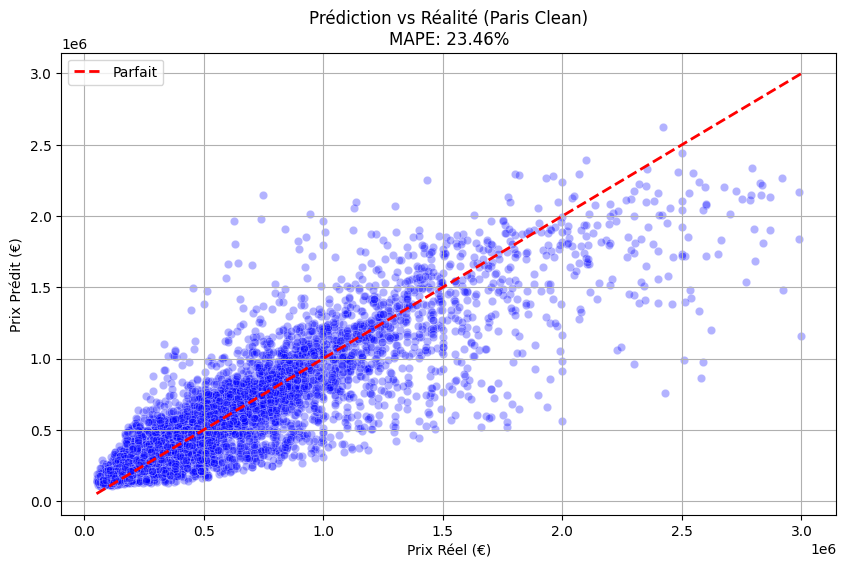


💾 Modèle sauvegardé sous : champion_model_paris_clean.joblib


In [127]:
import optuna
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

print("--- 🚀 3. OPTIMISATION SUR DONNÉES NETTOYÉES (PARIS) ---")

# --- 1. Préparation des Données ---
# On repart de df_paris_clean (créé à l'étape précédente)
features_paris = ['surface_m2', 'nombre_pieces_principales', 'annee', 'mois', 
                  'nombre_de_lots', 'code_postal', 'type_local']
target_col = 'valeur_foncière'

X = df_paris_clean[features_paris]
y = df_paris_clean[target_col]

# Split Final (80% Train / 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Échantillon pour aller vite (50k lignes max)
if len(X_train) > 50000:
    X_sample = X_train.sample(50000, random_state=42)
    y_sample = y_train.loc[X_sample.index]
else:
    X_sample = X_train
    y_sample = y_train

print(f"Optimisation lancée sur {len(X_sample)} lignes (Clean).")

# --- 2. Préparateur (Pipeline) ---
numeric_features = ['surface_m2', 'nombre_pieces_principales', 'annee', 'mois', 'nombre_de_lots']
categorical_features = ['code_postal', 'type_local']

preprocessor_paris = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features)
])

# --- 3. Fonction Objective Optuna ---
def objective_xgb_clean(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 2000), # On peut aller plus haut
        'max_depth': trial.suggest_int('max_depth', 4, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.1),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 2.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 2.0),
    }
    
    model = XGBRegressor(random_state=42, n_jobs=-1, enable_categorical=True, **params)
    
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor_paris),
        ('model', model)
    ])
    
    # Validation croisée simple sur l'échantillon
    X_tr, X_val, y_tr, y_val = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)
    
    pipeline.fit(X_tr, y_tr)
    y_pred = pipeline.predict(X_val)
    
    return np.sqrt(mean_squared_error(y_val, y_pred))

# --- 4. Lancement de l'Optimisation ---
print("Recherche des meilleurs hyperparamètres (50 essais)...")
study_paris_clean = optuna.create_study(direction='minimize')
study_paris_clean.optimize(objective_xgb_clean, n_trials=50, show_progress_bar=True)

print("✅ Meilleurs paramètres trouvés :")
print(study_paris_clean.best_params)

# --- 5. Entraînement Final du Champion ---
print("\n--- ENTRAÎNEMENT DU MODÈLE FINAL (XGBoost Clean) ---")

best_params = study_paris_clean.best_params
final_model_paris_clean = Pipeline(steps=[
        ('preprocessor', preprocessor_paris),
        ('model', XGBRegressor(random_state=42, n_jobs=-1, enable_categorical=True, **best_params))
    ])

final_model_paris_clean.fit(X_train, y_train)
y_pred_final = final_model_paris_clean.predict(X_test)

# --- 6. Rapport de Performance Final ---
rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
r2 = r2_score(y_test, y_pred_final)
mae = mean_absolute_error(y_test, y_pred_final)
mape = mean_absolute_percentage_error(y_test, y_pred_final)

print("\n--- 🏆 RÉSULTATS DÉFINITIFS (Paris Résidentiel) 🏆 ---")
print(f"1. R-squared (R²)     : {r2:.4f}")
print(f"2. RMSE (Erreur Quad.): {rmse:,.0f} €")
print(f"3. MAE (Erreur Moy.)  : {mae:,.0f} €")
print(f"4. MAPE (Erreur %)    : {mape:.2%}")

# --- 7. Visualisation ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_final, alpha=0.3, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color='red', linestyle='--', linewidth=2, label='Parfait')
plt.title(f'Prédiction vs Réalité (Paris Clean)\nMAPE: {mape:.2%}')
plt.xlabel('Prix Réel (€)')
plt.ylabel('Prix Prédit (€)')
plt.legend()
plt.grid(True)
plt.show()

# --- 8. Sauvegarde ---
filename = 'champion_model_paris_clean.joblib'
joblib.dump(final_model_paris_clean, filename)
print(f"\n💾 Modèle sauvegardé sous : {filename}")

## graphique paname


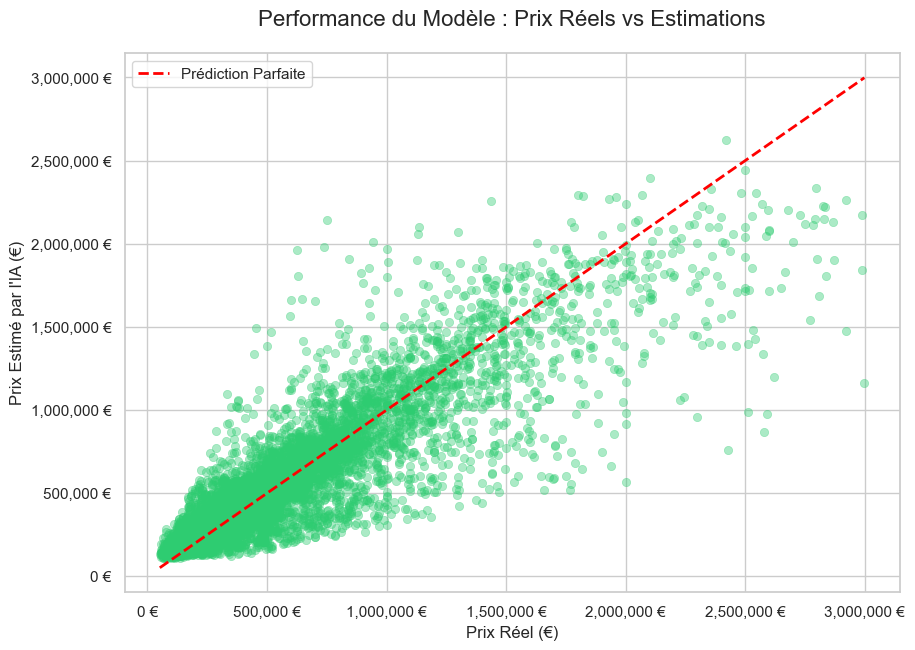

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuration du style "Présentation"
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 7))

# Nuage de points
sns.scatterplot(x=y_test, y=y_pred_final, alpha=0.4, edgecolor=None, color="#2ecc71")

# Ligne de perfection (y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color='red', linestyle='--', linewidth=2, label='Prédiction Parfaite')

plt.title("Performance du Modèle : Prix Réels vs Estimations", fontsize=16, pad=20)
plt.xlabel("Prix Réel (€)", fontsize=12)
plt.ylabel("Prix Estimé par l'IA (€)", fontsize=12)
plt.legend()

# Formater les axes en millions/k€ pour la lisibilité
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f} €'.format(x) for x in current_values])
current_values_y = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f} €'.format(y) for y in current_values_y])

plt.show()

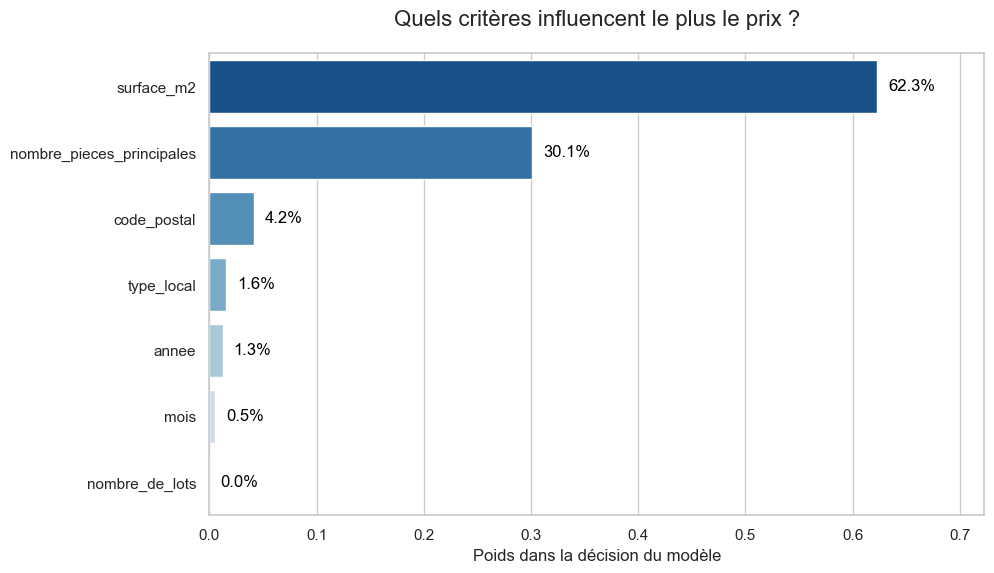

In [129]:
# 1. Extraction des importances
xgboost_step = final_model_paris_clean.named_steps['model']
importances = xgboost_step.feature_importances_
feature_names = numeric_features + categorical_features
df_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# 2. Graphique
plt.figure(figsize=(10, 6))
palette = sns.color_palette("Blues_r", len(df_imp))
ax = sns.barplot(x=df_imp.values, y=df_imp.index, palette=palette)

plt.title("Quels critères influencent le plus le prix ?", fontsize=16, pad=20)
plt.xlabel("Poids dans la décision du modèle", fontsize=12)
plt.ylabel("")

# Ajouter les valeurs au bout des barres
for i, v in enumerate(df_imp.values):
    ax.text(v + 0.01, i, f"{v:.1%}", color='black', va='center')

plt.xlim(0, df_imp.max() + 0.1) # Marge à droite
plt.show()

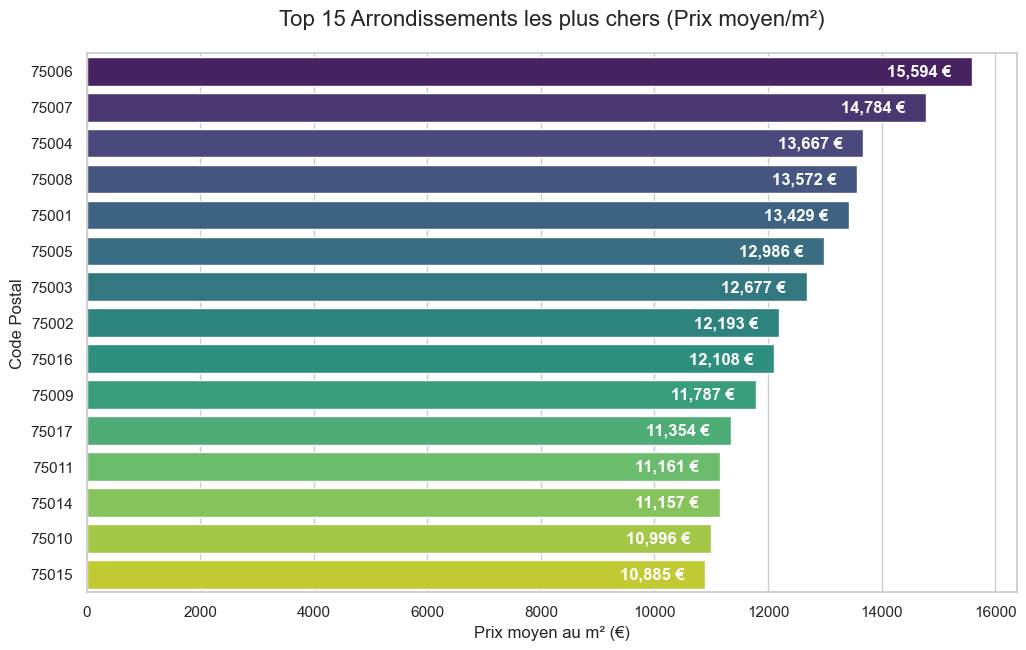

In [130]:
# On repart du dataframe nettoyé
# Calcul du prix au m2 moyen par code postal
prix_m2_arr = df_paris_clean.groupby('code_postal').apply(
    lambda x: (x['valeur_foncière'] / x['surface_m2']).mean()
).sort_values(ascending=False).head(15) # Top 15 les plus chers

plt.figure(figsize=(12, 7))
ax = sns.barplot(x=prix_m2_arr.values, y=prix_m2_arr.index, palette="viridis")

plt.title("Top 15 Arrondissements les plus chers (Prix moyen/m²)", fontsize=16, pad=20)
plt.xlabel("Prix moyen au m² (€)", fontsize=12)
plt.ylabel("Code Postal", fontsize=12)

# Annotations
for i, v in enumerate(prix_m2_arr.values):
    ax.text(v - 1500, i, f"{v:,.0f} €", color='white', va='center', fontweight='bold')

plt.show()

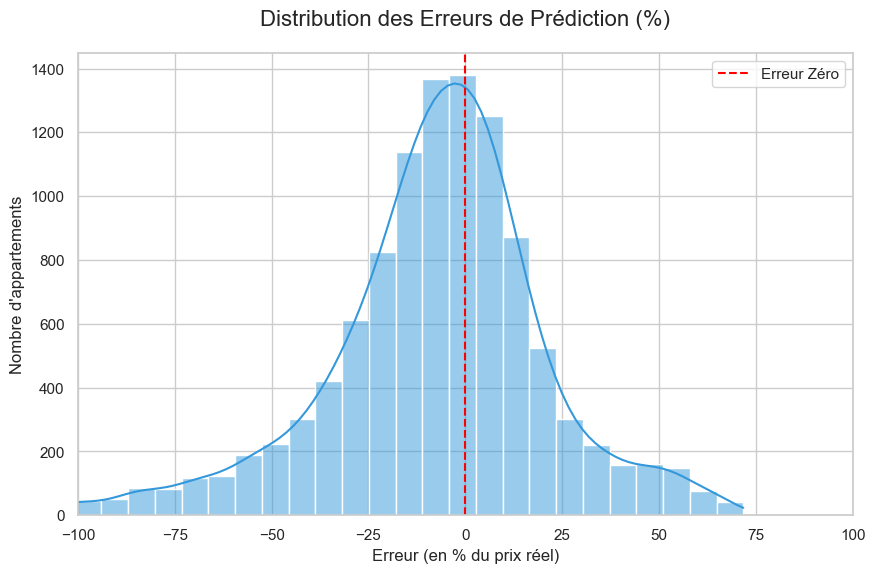

In [131]:
# Calcul des résidus (Erreur en pourcentage)
residuals = (y_test - y_pred_final) / y_test * 100

plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True, color="#3498db")

plt.axvline(x=0, color='red', linestyle='--', label='Erreur Zéro')
plt.title("Distribution des Erreurs de Prédiction (%)", fontsize=16, pad=20)
plt.xlabel("Erreur (en % du prix réel)", fontsize=12)
plt.ylabel("Nombre d'appartements", fontsize=12)
plt.legend()

plt.xlim(-100, 100) # On zoome sur les erreurs "normales"
plt.show()

## Visualisation générale


Génération des 4 graphiques de validation...


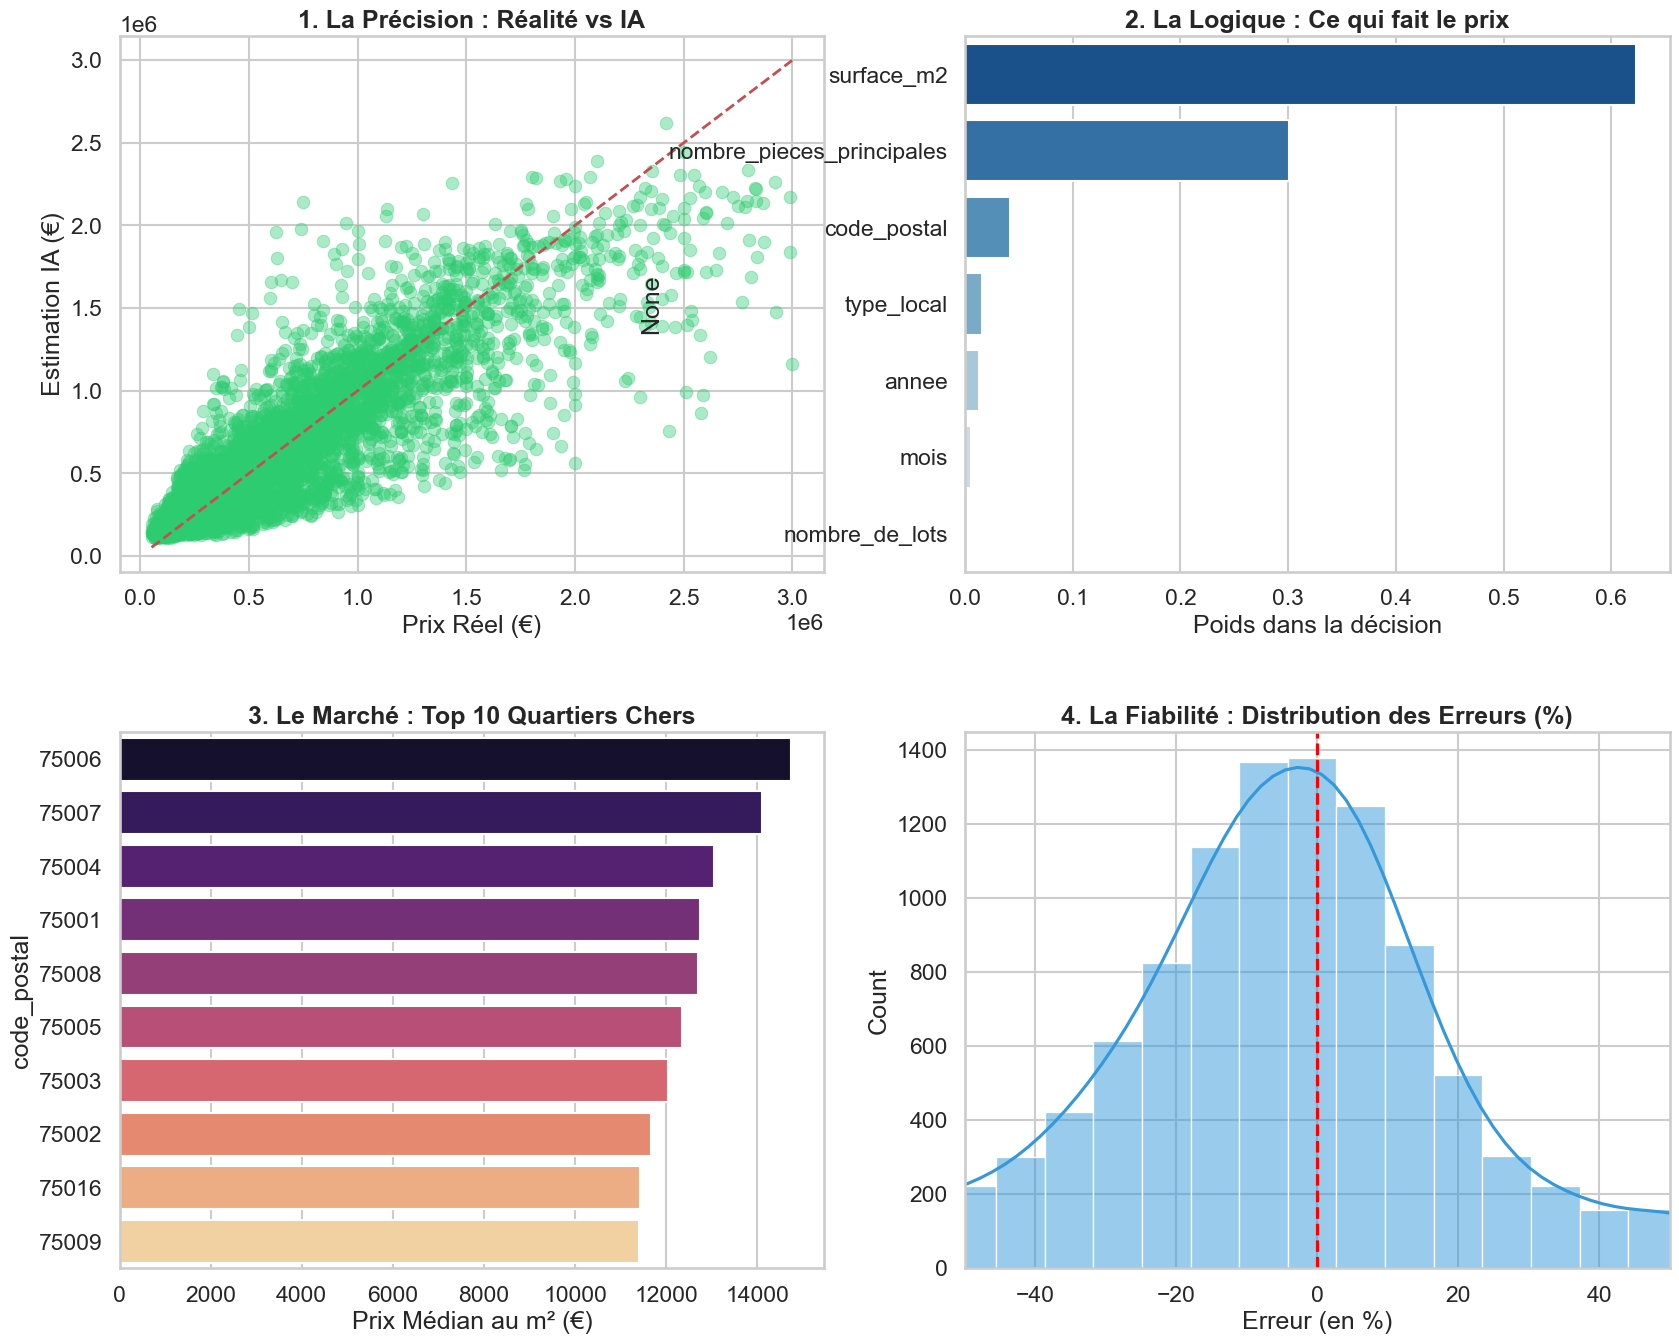

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Configuration Esthétique "Présentation"
sns.set_theme(style="whitegrid", context="talk") # 'talk' grossit les polices pour PPT

# Création d'une figure géante avec 4 sous-graphiques (2x2)
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
plt.subplots_adjust(hspace=0.3, wspace=0.2) # Espacement

# --- GRAPHIQUE 1 : Prédiction vs Réalité ---
sns.scatterplot(ax=axes[0, 0], x=y_test, y=y_pred_final, alpha=0.4, color="#2ecc71", edgecolor=None)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
axes[0, 0].set_title("1. La Précision : Réalité vs IA", fontweight='bold')
axes[0, 0].set_xlabel("Prix Réel (€)")
axes[0, 0].set_ylabel("Estimation IA (€)")

# --- GRAPHIQUE 2 : Feature Importance ---
# Extraction
xgboost_step = final_model_paris_clean.named_steps['model']
importances = xgboost_step.feature_importances_
feature_names = numeric_features + categorical_features
df_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

sns.barplot(ax=axes[0, 1], x=df_imp.values, y=df_imp.index, palette="Blues_r")
axes[0, 1].set_title("2. La Logique : Ce qui fait le prix", fontweight='bold')
axes[0, 1].set_xlabel("Poids dans la décision")

# --- GRAPHIQUE 3 : Prix au m² par Arrondissement (Top 10) ---
# On calcule le vrai prix au m2 moyen
df_viz = df_paris_clean.copy()
df_viz['prix_m2'] = df_viz['valeur_foncière'] / df_viz['surface_m2']
top_arr = df_viz.groupby('code_postal')['prix_m2'].median().sort_values(ascending=False).head(10)

sns.barplot(ax=axes[1, 0], x=top_arr.values, y=top_arr.index, palette="magma")
axes[1, 0].set_title("3. Le Marché : Top 10 Quartiers Chers", fontweight='bold')
axes[1, 0].set_xlabel("Prix Médian au m² (€)")

# --- GRAPHIQUE 4 : Distribution des Erreurs ---
residuals = (y_test - y_pred_final) / y_test * 100
sns.histplot(ax=axes[1, 1], x=residuals, bins=50, kde=True, color="#3498db")
axes[1, 1].axvline(x=0, color='red', linestyle='--')
axes[1, 1].set_title("4. La Fiabilité : Distribution des Erreurs (%)", fontweight='bold')
axes[1, 1].set_xlabel("Erreur (en %)")
axes[1, 1].set_xlim(-50, 50) # Zoom sur le coeur

print("Génération des 4 graphiques de validation...")
plt.show()

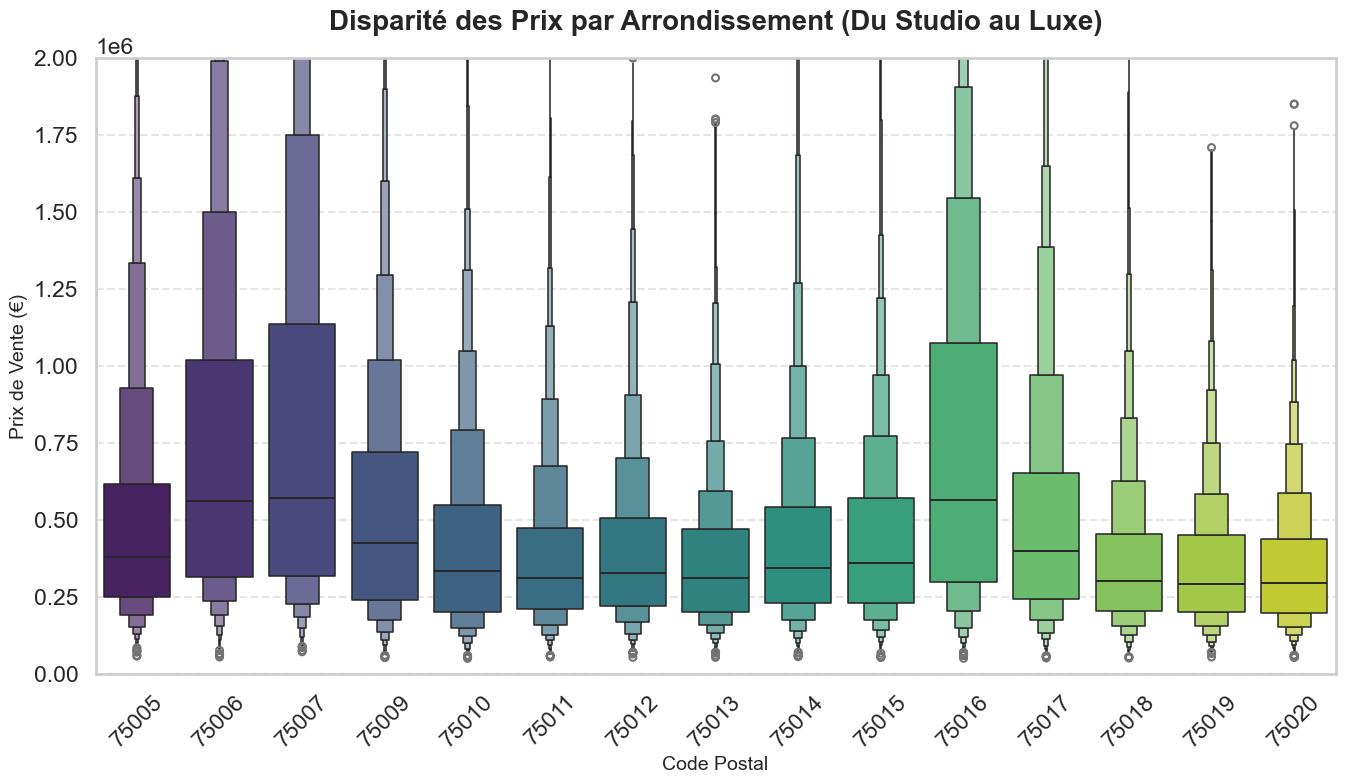

In [133]:
# --- VISUALISATION CRÉATIVE 2 : DISPERSION PAR ARRONDISSEMENT ---
plt.figure(figsize=(16, 8))

# On prend le Top 15 des arrondissements par volume pour que ce soit lisible
top_15_zips = df_paris_clean['code_postal'].value_counts().head(15).index
subset_zip = df_paris_clean[df_paris_clean['code_postal'].isin(top_15_zips)]

# Boxenplot : Mieux qu'un boxplot pour les gros volumes de données
sns.boxenplot(data=subset_zip, x='code_postal', y='valeur_foncière', 
              order=sorted(top_15_zips), palette="viridis")

plt.title("Disparité des Prix par Arrondissement (Du Studio au Luxe)", fontsize=20, fontweight='bold', pad=20)
plt.xlabel("Code Postal", fontsize=14)
plt.ylabel("Prix de Vente (€)", fontsize=14)
plt.xticks(rotation=45)
# On coupe l'axe Y à 2M€ pour bien voir la distribution principale
plt.ylim(0, 2000000) 
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

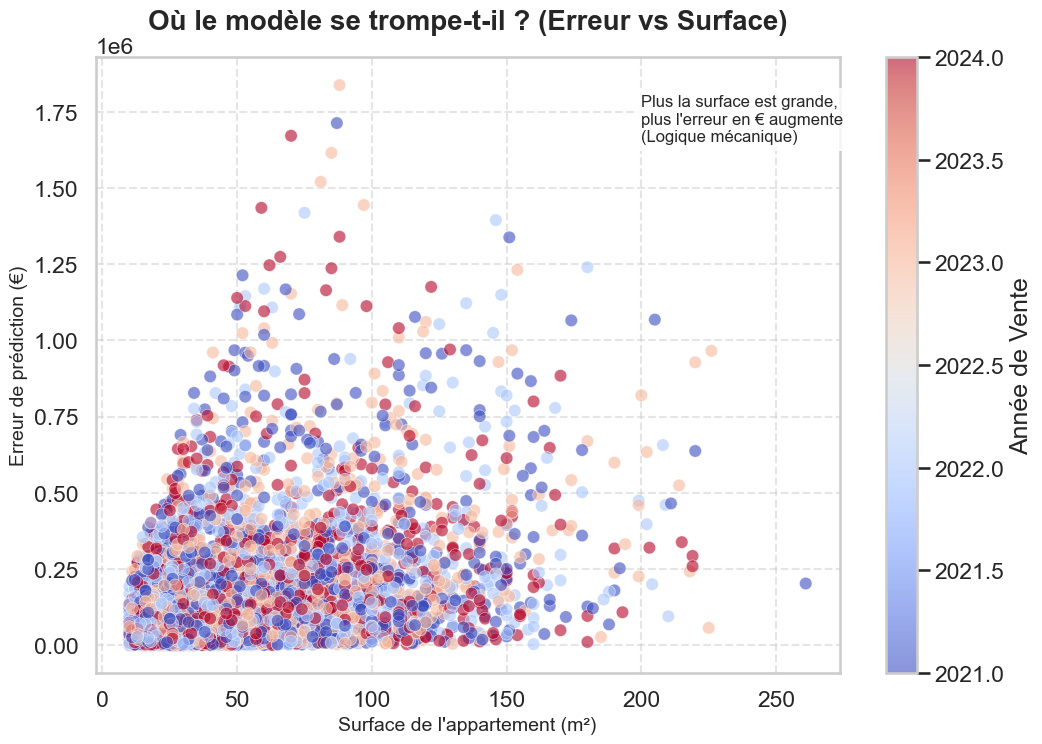

In [134]:
# --- VISUALISATION CRÉATIVE 3 : DIAGNOSTIC DES ERREURS ---
plt.figure(figsize=(12, 8))

# Calcul des résidus absolus (en euros)
abs_errors = abs(y_test - y_pred_final)

# Scatter plot : Surface vs Erreur, coloré par Année
scatter = plt.scatter(x=X_test['surface_m2'], 
                      y=abs_errors, 
                      c=X_test['annee'], 
                      cmap='coolwarm', 
                      alpha=0.6, 
                      edgecolors='w', linewidth=0.5)

cbar = plt.colorbar(scatter)
cbar.set_label('Année de Vente')

plt.title("Où le modèle se trompe-t-il ? (Erreur vs Surface)", fontsize=20, fontweight='bold', pad=20)
plt.xlabel("Surface de l'appartement (m²)", fontsize=14)
plt.ylabel("Erreur de prédiction (€)", fontsize=14)

# Annotations pour expliquer
plt.text(200, abs_errors.max()*0.9, "Plus la surface est grande,\nplus l'erreur en € augmente\n(Logique mécanique)", 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

--- 🗺️ GÉNÉRATION DE LA CARTE DE PARIS ---
Téléchargement de la carte depuis : https://opendata.paris.fr/explore/dataset/arrondissements/download/?format=geojson ...


Skipping field geom_x_y: unsupported OGR type: 3


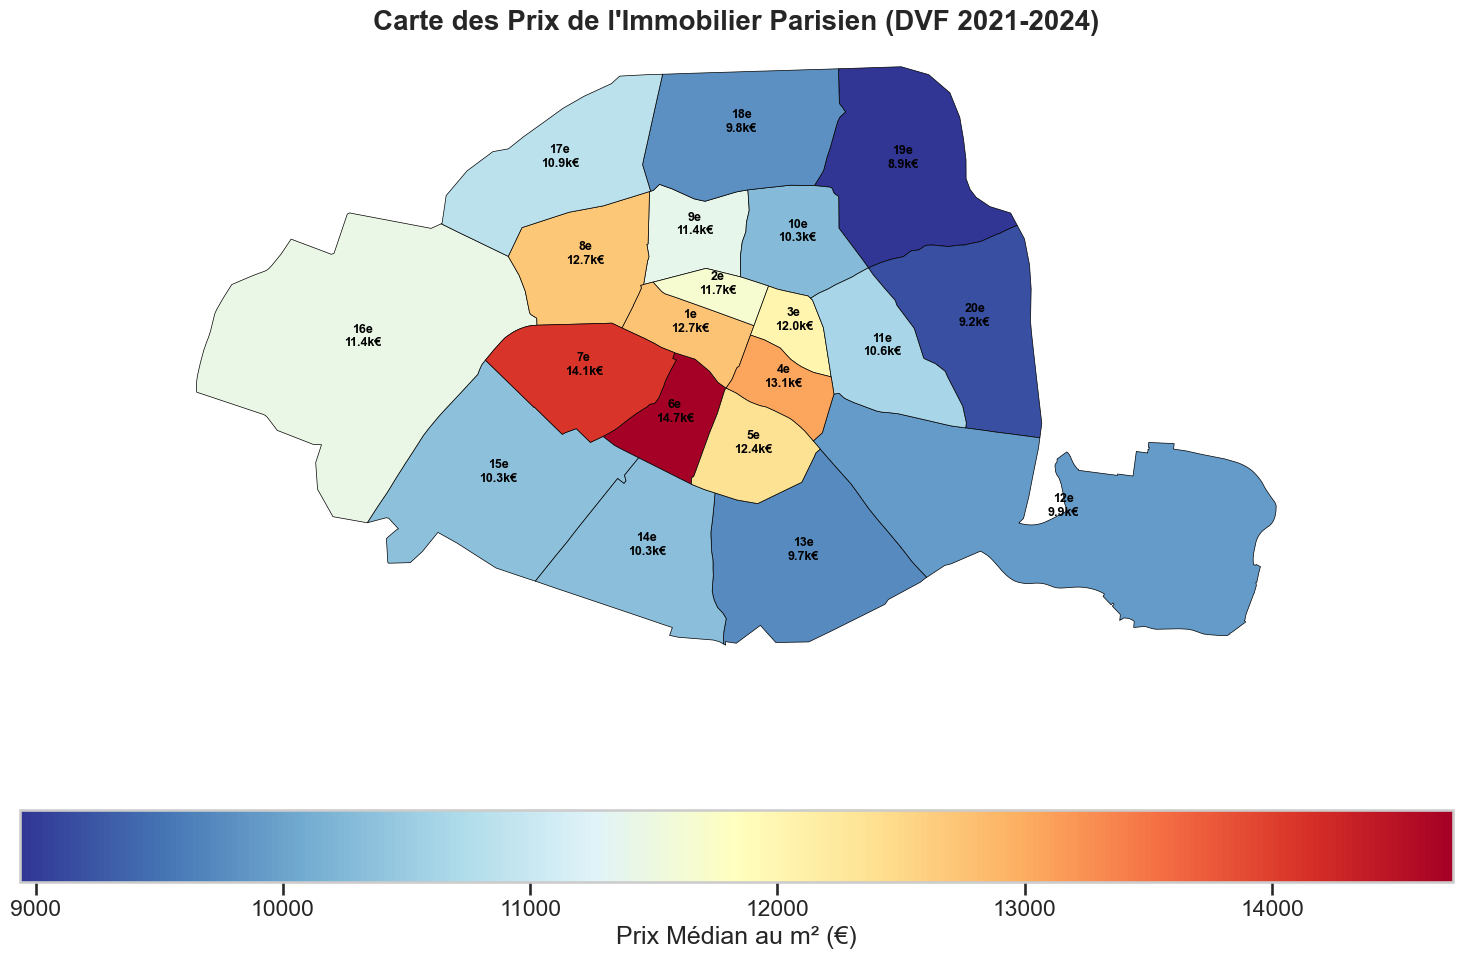

In [135]:
# 1. Installation des librairies géographiques (si nécessaire)
try:
    import geopandas as gpd
except ImportError:
    print("Installation de Geopandas...")
    !pip install geopandas mapclassify contextily
    import geopandas as gpd

import matplotlib.pyplot as plt
import pandas as pd

print("--- 🗺️ GÉNÉRATION DE LA CARTE DE PARIS ---")

# --- ÉTAPE 1 : PRÉPARER VOS DONNÉES ---
# On calcule le PRIX MÉDIAN au m² par arrondissement sur vos données nettoyées
# (C'est plus robuste que la moyenne)
df_map_data = df_paris_clean.copy()
df_map_data['prix_m2'] = df_map_data['valeur_foncière'] / df_map_data['surface_m2']

# GroupBy par Code Postal
prix_par_arrondissement = df_map_data.groupby('code_postal')['prix_m2'].median().reset_index()
prix_par_arrondissement.columns = ['c_ar', 'prix_m2_median'] # 'c_ar' pour matcher le GeoJSON

# --- ÉTAPE 2 : RÉCUPÉRER LA GÉOGRAPHIE (SHAPEFILE) ---
# URL directe du GeoJSON des arrondissements (Open Data Paris)
url_geojson = "https://opendata.paris.fr/explore/dataset/arrondissements/download/?format=geojson"

print(f"Téléchargement de la carte depuis : {url_geojson} ...")
paris_map = gpd.read_file(url_geojson)

# --- ÉTAPE 3 : FUSIONNER DONNÉES + CARTE ---
# Le GeoJSON a une colonne 'c_ar' (Code Arrondissement) qui vaut 1, 2... 20
# Vos données ont '75001', '75002'...
# On doit nettoyer pour faire la jointure.

# On transforme '75001' en '1', '75012' en '12' pour matcher le GeoJSON
prix_par_arrondissement['c_ar'] = prix_par_arrondissement['c_ar'].astype(str).str[-2:].astype(int)

# Jointure
paris_final = paris_map.merge(prix_par_arrondissement, on='c_ar', how='left')

# --- ÉTAPE 4 : VISUALISATION ---
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Tracer la carte
paris_final.plot(column='prix_m2_median', 
                 ax=ax, 
                 legend=True,
                 legend_kwds={'label': "Prix Médian au m² (€)", 'orientation': "horizontal"},
                 cmap='RdYlBu_r', # Rouge = Cher, Bleu = Moins cher (Inversé)
                 edgecolor='black',
                 linewidth=0.5)

# Ajouter les étiquettes (Numéro arr. + Prix)
for idx, row in paris_final.iterrows():
    # On place le texte au centre de l'arrondissement (centroid)
    # On ne met le texte que si on a un prix
    if not pd.isna(row['prix_m2_median']):
        label = f"{row['c_ar']}e\n{row['prix_m2_median']/1000:.1f}k€"
        plt.annotate(text=label, 
                     xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                     horizontalalignment='center',
                     fontsize=9,
                     color='black',
                     fontweight='bold')

plt.title('Carte des Prix de l\'Immobilier Parisien (DVF 2021-2024)', fontsize=20, fontweight='bold')
plt.axis('off') # On enlève les axes latitude/longitude moches
plt.tight_layout()
plt.show()